# Imports

In [2]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
import numpy as np
from numpy.linalg import norm
import os
from tqdm import tqdm
import pickle

2025-03-10 21:56:14.950195: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-10 21:56:14.982905: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741623075.019916  198485 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741623075.030681  198485 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-10 21:56:15.066290: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# Load Images

In [5]:
# Define the images directory
images_path = "/var/home/ramrshrcg/Desktop/Python/lab_python/frs-renet50/dataset/images"

# Collect full paths for image files
filenames = [os.path.join(images_path, file) for file in os.listdir(images_path)
             if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

In [6]:
filenames[:10]

['/var/home/ramrshrcg/Desktop/Python/lab_python/frs-renet50/dataset/images/10000.jpg',
 '/var/home/ramrshrcg/Desktop/Python/lab_python/frs-renet50/dataset/images/10001.jpg',
 '/var/home/ramrshrcg/Desktop/Python/lab_python/frs-renet50/dataset/images/10002.jpg',
 '/var/home/ramrshrcg/Desktop/Python/lab_python/frs-renet50/dataset/images/10003.jpg',
 '/var/home/ramrshrcg/Desktop/Python/lab_python/frs-renet50/dataset/images/10004.jpg',
 '/var/home/ramrshrcg/Desktop/Python/lab_python/frs-renet50/dataset/images/10005.jpg',
 '/var/home/ramrshrcg/Desktop/Python/lab_python/frs-renet50/dataset/images/10006.jpg',
 '/var/home/ramrshrcg/Desktop/Python/lab_python/frs-renet50/dataset/images/10007.jpg',
 '/var/home/ramrshrcg/Desktop/Python/lab_python/frs-renet50/dataset/images/10008.jpg',
 '/var/home/ramrshrcg/Desktop/Python/lab_python/frs-renet50/dataset/images/10009.jpg']

# Load Model

In [7]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

2025-03-10 22:01:07.380459: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 72s 1us/step


# Feature Extraction (Embeddings)

In [8]:
def extract_features(img_path,model):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)

    return normalized_result

In [6]:
feature_list = []

for file in tqdm(filenames):
    feature_list.append(extract_features(file,model))

  0%|          | 0/44441 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  0%|          | 1/44441 [00:03<40:06:20,  3.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  0%|          | 2/44441 [00:03<18:24:56,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  0%|          | 3/44441 [00:03<11:19:10,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  0%|          | 4/44441 [00:04<8:11:49,  1.51it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  0%|          | 5/44441 [00:04<6:20:32,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  0%|          | 6/44441 [00:04<5:20:18,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  0%|          | 7/44441 [00:04<4:38:02,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


  0%|          | 8/44441 [00:05<4:14:57,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  0%|          | 9/44441 [00:05<3:51:45,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  0%|          | 10/44441 [00:05<3:39:38,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


  0%|          | 11/44441 [00:05<3:32:35,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  0%|          | 12/44441 [00:06<3:28:57,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  0%|          | 13/44441 [00:06<3:22:35,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  0%|          | 14/44441 [00:06<3:20:07,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  0%|          | 15/44441 [00:06<3:18:44,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


  0%|          | 16/44441 [00:07<3:16:20,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  0%|          | 17/44441 [00:07<3:10:59,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  0%|          | 18/44441 [00:07<3:11:32,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  0%|          | 19/44441 [00:07<3:09:33,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


  0%|          | 20/44441 [00:08<3:10:37,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


  0%|          | 21/44441 [00:08<3:09:21,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


  0%|          | 22/44441 [00:08<3:11:23,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  0%|          | 23/44441 [00:08<3:07:51,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  0%|          | 24/44441 [00:09<3:05:57,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  0%|          | 25/44441 [00:09<3:14:15,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  0%|          | 26/44441 [00:09<3:13:06,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  0%|          | 27/44441 [00:10<3:20:34,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  0%|          | 28/44441 [00:10<3:23:14,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  0%|          | 29/44441 [00:10<3:29:54,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


  0%|          | 30/44441 [00:10<3:26:31,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  0%|          | 31/44441 [00:11<3:27:09,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


  0%|          | 32/44441 [00:11<3:25:24,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  0%|          | 33/44441 [00:11<3:22:38,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  0%|          | 34/44441 [00:11<3:13:45,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  0%|          | 35/44441 [00:12<3:09:54,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


  0%|          | 36/44441 [00:12<3:11:57,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  0%|          | 37/44441 [00:12<3:16:15,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  0%|          | 38/44441 [00:12<3:13:07,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  0%|          | 39/44441 [00:13<3:05:37,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  0%|          | 40/44441 [00:13<3:05:19,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


  0%|          | 41/44441 [00:13<3:10:22,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  0%|          | 42/44441 [00:13<3:14:07,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  0%|          | 43/44441 [00:14<3:22:13,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


  0%|          | 44/44441 [00:14<3:26:20,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  0%|          | 45/44441 [00:14<3:21:09,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  0%|          | 46/44441 [00:15<3:17:12,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  0%|          | 47/44441 [00:15<3:24:01,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


  0%|          | 48/44441 [00:15<3:36:11,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  0%|          | 49/44441 [00:15<3:27:10,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  0%|          | 50/44441 [00:16<3:18:57,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  0%|          | 51/44441 [00:16<3:09:45,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  0%|          | 52/44441 [00:16<3:03:24,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  0%|          | 53/44441 [00:16<2:59:38,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  0%|          | 54/44441 [00:17<2:59:17,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  0%|          | 55/44441 [00:17<2:56:37,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  0%|          | 56/44441 [00:17<2:53:08,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  0%|          | 57/44441 [00:17<2:53:44,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  0%|          | 58/44441 [00:18<2:51:58,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  0%|          | 59/44441 [00:18<2:53:17,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  0%|          | 60/44441 [00:18<2:55:08,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  0%|          | 61/44441 [00:18<2:56:07,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  0%|          | 62/44441 [00:19<2:57:59,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  0%|          | 63/44441 [00:19<2:55:21,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  0%|          | 64/44441 [00:19<3:00:34,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  0%|          | 65/44441 [00:19<3:17:01,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  0%|          | 66/44441 [00:20<3:08:47,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  0%|          | 67/44441 [00:20<3:07:14,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  0%|          | 68/44441 [00:20<3:01:52,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  0%|          | 69/44441 [00:20<3:00:45,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  0%|          | 70/44441 [00:21<2:58:25,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  0%|          | 71/44441 [00:21<2:57:03,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  0%|          | 72/44441 [00:21<2:58:22,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  0%|          | 73/44441 [00:21<2:59:31,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  0%|          | 74/44441 [00:21<3:01:09,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  0%|          | 75/44441 [00:22<3:01:01,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  0%|          | 76/44441 [00:22<3:00:07,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  0%|          | 77/44441 [00:22<3:00:05,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  0%|          | 78/44441 [00:22<3:00:11,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  0%|          | 79/44441 [00:23<2:59:03,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  0%|          | 80/44441 [00:23<2:59:43,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  0%|          | 81/44441 [00:23<2:57:42,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  0%|          | 82/44441 [00:23<3:00:55,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  0%|          | 83/44441 [00:24<3:14:53,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  0%|          | 84/44441 [00:24<3:11:40,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  0%|          | 85/44441 [00:24<3:07:08,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  0%|          | 86/44441 [00:24<3:03:50,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  0%|          | 87/44441 [00:25<3:02:03,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  0%|          | 88/44441 [00:25<3:01:06,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  0%|          | 89/44441 [00:25<3:12:31,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  0%|          | 90/44441 [00:25<3:05:31,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  0%|          | 91/44441 [00:26<3:02:25,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  0%|          | 92/44441 [00:26<3:11:14,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  0%|          | 93/44441 [00:26<3:04:48,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  0%|          | 94/44441 [00:26<2:59:50,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  0%|          | 95/44441 [00:27<2:58:03,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  0%|          | 96/44441 [00:27<3:01:30,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  0%|          | 97/44441 [00:27<2:59:22,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  0%|          | 98/44441 [00:27<2:58:47,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  0%|          | 99/44441 [00:28<2:57:26,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


  0%|          | 100/44441 [00:28<3:19:07,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  0%|          | 101/44441 [00:28<3:10:37,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  0%|          | 102/44441 [00:28<3:06:30,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  0%|          | 103/44441 [00:29<3:06:24,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  0%|          | 104/44441 [00:29<3:03:52,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  0%|          | 105/44441 [00:29<3:03:36,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  0%|          | 106/44441 [00:29<2:58:28,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  0%|          | 107/44441 [00:30<2:58:56,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  0%|          | 108/44441 [00:30<2:59:24,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  0%|          | 109/44441 [00:30<2:57:05,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  0%|          | 110/44441 [00:30<2:58:55,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  0%|          | 111/44441 [00:31<2:59:38,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  0%|          | 112/44441 [00:31<3:00:25,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  0%|          | 113/44441 [00:31<2:58:51,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  0%|          | 114/44441 [00:31<3:00:28,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  0%|          | 115/44441 [00:32<3:00:45,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


  0%|          | 116/44441 [00:32<3:25:38,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  0%|          | 117/44441 [00:32<3:21:30,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  0%|          | 118/44441 [00:32<3:12:58,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  0%|          | 119/44441 [00:33<3:06:39,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  0%|          | 120/44441 [00:33<3:05:06,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  0%|          | 121/44441 [00:33<3:03:35,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  0%|          | 122/44441 [00:33<3:03:53,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  0%|          | 123/44441 [00:34<3:00:50,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  0%|          | 124/44441 [00:34<3:01:10,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  0%|          | 125/44441 [00:34<3:01:14,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  0%|          | 126/44441 [00:34<2:57:44,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  0%|          | 127/44441 [00:35<2:59:21,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  0%|          | 128/44441 [00:35<2:58:02,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  0%|          | 129/44441 [00:35<2:56:46,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  0%|          | 130/44441 [00:35<2:55:50,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  0%|          | 131/44441 [00:36<2:56:03,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


  0%|          | 132/44441 [00:36<3:20:10,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  0%|          | 133/44441 [00:36<3:13:04,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  0%|          | 134/44441 [00:36<3:08:33,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  0%|          | 135/44441 [00:37<3:04:28,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  0%|          | 136/44441 [00:37<3:05:00,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  0%|          | 137/44441 [00:37<3:03:38,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  0%|          | 138/44441 [00:37<3:03:00,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  0%|          | 139/44441 [00:38<3:02:40,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  0%|          | 140/44441 [00:38<3:03:41,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  0%|          | 141/44441 [00:38<3:00:22,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  0%|          | 142/44441 [00:38<2:58:20,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  0%|          | 143/44441 [00:39<3:00:24,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  0%|          | 144/44441 [00:39<3:05:28,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  0%|          | 145/44441 [00:39<3:01:04,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  0%|          | 146/44441 [00:39<2:59:41,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  0%|          | 147/44441 [00:40<3:01:30,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  0%|          | 148/44441 [00:40<3:20:18,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  0%|          | 149/44441 [00:40<3:14:43,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  0%|          | 150/44441 [00:40<3:12:17,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  0%|          | 151/44441 [00:41<3:10:29,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  0%|          | 152/44441 [00:41<3:09:44,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  0%|          | 153/44441 [00:41<3:11:15,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  0%|          | 154/44441 [00:41<3:06:18,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  0%|          | 155/44441 [00:42<3:01:22,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  0%|          | 156/44441 [00:42<3:05:29,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  0%|          | 157/44441 [00:42<3:05:22,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  0%|          | 158/44441 [00:42<3:12:30,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


  0%|          | 159/44441 [00:43<3:18:44,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  0%|          | 160/44441 [00:43<3:28:15,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  0%|          | 161/44441 [00:43<3:19:53,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  0%|          | 162/44441 [00:44<3:12:43,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


  0%|          | 163/44441 [00:44<3:34:02,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  0%|          | 164/44441 [00:44<3:24:46,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  0%|          | 165/44441 [00:44<3:16:02,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  0%|          | 166/44441 [00:45<3:12:27,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


  0%|          | 167/44441 [00:45<3:11:10,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  0%|          | 168/44441 [00:45<3:11:07,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  0%|          | 169/44441 [00:45<3:07:47,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  0%|          | 170/44441 [00:46<3:04:33,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  0%|          | 171/44441 [00:46<3:04:21,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  0%|          | 172/44441 [00:46<3:02:54,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  0%|          | 173/44441 [00:46<3:07:07,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


  0%|          | 174/44441 [00:47<3:07:43,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  0%|          | 175/44441 [00:47<3:02:32,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  0%|          | 176/44441 [00:47<2:59:55,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  0%|          | 177/44441 [00:47<2:59:46,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  0%|          | 178/44441 [00:48<2:59:04,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  0%|          | 179/44441 [00:48<3:18:45,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  0%|          | 180/44441 [00:48<3:13:24,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


  0%|          | 181/44441 [00:48<3:13:18,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  0%|          | 182/44441 [00:49<3:10:17,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  0%|          | 183/44441 [00:49<3:09:21,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  0%|          | 184/44441 [00:49<3:07:57,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  0%|          | 185/44441 [00:49<3:08:57,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  0%|          | 186/44441 [00:50<3:06:55,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


  0%|          | 187/44441 [00:50<3:08:44,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  0%|          | 188/44441 [00:50<3:08:26,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  0%|          | 189/44441 [00:50<3:05:40,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  0%|          | 190/44441 [00:51<3:02:06,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  0%|          | 191/44441 [00:51<3:01:08,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  0%|          | 192/44441 [00:51<3:04:15,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  0%|          | 193/44441 [00:51<3:07:00,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  0%|          | 194/44441 [00:52<3:04:33,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


  0%|          | 195/44441 [00:52<3:26:04,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  0%|          | 196/44441 [00:52<3:22:21,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  0%|          | 197/44441 [00:53<3:17:59,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  0%|          | 198/44441 [00:53<3:12:23,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


  0%|          | 199/44441 [00:53<3:11:32,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  0%|          | 200/44441 [00:53<3:11:09,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  0%|          | 201/44441 [00:54<3:08:08,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  0%|          | 202/44441 [00:54<3:12:54,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  0%|          | 203/44441 [00:54<3:11:35,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  0%|          | 204/44441 [00:54<3:11:50,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  0%|          | 205/44441 [00:55<3:12:17,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  0%|          | 206/44441 [00:55<3:10:43,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  0%|          | 207/44441 [00:55<3:07:46,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  0%|          | 208/44441 [00:55<3:09:25,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  0%|          | 209/44441 [00:56<3:08:35,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  0%|          | 210/44441 [00:56<3:09:37,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


  0%|          | 211/44441 [00:56<3:30:16,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  0%|          | 212/44441 [00:57<3:20:36,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  0%|          | 213/44441 [00:57<3:12:35,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  0%|          | 214/44441 [00:57<3:11:56,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  0%|          | 215/44441 [00:57<3:05:57,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  0%|          | 216/44441 [00:57<3:06:14,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  0%|          | 217/44441 [00:58<3:07:07,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  0%|          | 218/44441 [00:58<3:03:54,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  0%|          | 219/44441 [00:58<3:03:12,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  0%|          | 220/44441 [00:58<3:00:36,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  0%|          | 221/44441 [00:59<2:59:19,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


  0%|          | 222/44441 [00:59<3:09:22,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  1%|          | 223/44441 [00:59<3:09:08,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  1%|          | 224/44441 [01:00<3:05:24,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  1%|          | 225/44441 [01:00<3:03:23,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


  1%|          | 226/44441 [01:00<3:26:55,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  1%|          | 227/44441 [01:00<3:19:29,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  1%|          | 228/44441 [01:01<3:15:48,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  1%|          | 229/44441 [01:01<3:12:08,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


  1%|          | 230/44441 [01:01<3:11:44,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  1%|          | 231/44441 [01:01<3:14:45,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  1%|          | 232/44441 [01:02<3:13:38,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  1%|          | 233/44441 [01:02<3:12:44,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  1%|          | 234/44441 [01:02<3:10:18,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  1%|          | 235/44441 [01:02<3:09:27,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  1%|          | 236/44441 [01:03<3:09:35,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  1%|          | 237/44441 [01:03<3:12:32,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


  1%|          | 238/44441 [01:03<3:18:32,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  1%|          | 239/44441 [01:03<3:11:52,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  1%|          | 240/44441 [01:04<3:12:22,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


  1%|          | 241/44441 [01:04<3:36:33,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  1%|          | 242/44441 [01:04<3:26:21,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


  1%|          | 243/44441 [01:05<3:22:15,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  1%|          | 244/44441 [01:05<3:17:43,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  1%|          | 245/44441 [01:05<3:16:30,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  1%|          | 246/44441 [01:05<3:10:58,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  1%|          | 247/44441 [01:06<3:10:24,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


  1%|          | 248/44441 [01:06<3:10:56,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  1%|          | 249/44441 [01:06<3:07:29,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  1%|          | 250/44441 [01:06<3:06:52,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 251/44441 [01:07<3:00:02,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  1%|          | 252/44441 [01:07<2:58:18,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 253/44441 [01:07<2:54:28,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  1%|          | 254/44441 [01:07<2:52:51,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 255/44441 [01:08<2:49:07,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  1%|          | 256/44441 [01:08<2:50:09,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|          | 257/44441 [01:08<2:48:53,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|          | 258/44441 [01:08<2:47:40,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


  1%|          | 259/44441 [01:09<3:10:14,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|          | 260/44441 [01:09<3:03:07,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 261/44441 [01:09<2:58:48,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|          | 262/44441 [01:09<2:54:40,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 263/44441 [01:09<2:51:14,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  1%|          | 264/44441 [01:10<2:49:18,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  1%|          | 265/44441 [01:10<2:48:33,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|          | 266/44441 [01:10<2:48:17,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|          | 267/44441 [01:10<2:47:18,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 268/44441 [01:11<2:45:46,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 269/44441 [01:11<2:46:42,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 270/44441 [01:11<2:45:28,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|          | 271/44441 [01:11<2:44:55,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 272/44441 [01:11<2:45:42,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|          | 273/44441 [01:12<2:47:05,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  1%|          | 274/44441 [01:12<2:50:59,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 275/44441 [01:12<2:49:14,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  1%|          | 276/44441 [01:12<2:50:22,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  1%|          | 277/44441 [01:13<2:50:19,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  1%|          | 278/44441 [01:13<2:50:01,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 279/44441 [01:13<2:47:13,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 280/44441 [01:13<2:47:29,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


  1%|          | 281/44441 [01:14<3:05:17,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  1%|          | 282/44441 [01:14<3:03:28,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 283/44441 [01:14<2:57:21,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|          | 284/44441 [01:14<2:53:04,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  1%|          | 285/44441 [01:15<2:51:42,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|          | 286/44441 [01:15<2:49:22,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 287/44441 [01:15<2:49:14,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  1%|          | 288/44441 [01:15<2:52:00,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  1%|          | 289/44441 [01:15<2:54:06,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 290/44441 [01:16<2:51:04,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|          | 291/44441 [01:16<2:50:16,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 292/44441 [01:16<2:48:43,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 293/44441 [01:16<2:48:00,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|          | 294/44441 [01:17<2:48:30,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|          | 295/44441 [01:17<2:45:25,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|          | 296/44441 [01:17<2:44:34,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  1%|          | 297/44441 [01:17<2:47:22,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 298/44441 [01:17<2:45:08,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  1%|          | 299/44441 [01:18<2:41:28,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|          | 300/44441 [01:18<2:45:43,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


  1%|          | 301/44441 [01:18<2:50:48,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|          | 302/44441 [01:18<2:52:41,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  1%|          | 303/44441 [01:19<3:05:53,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 304/44441 [01:19<2:58:21,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 305/44441 [01:19<2:55:55,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 306/44441 [01:19<2:52:22,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  1%|          | 307/44441 [01:20<2:49:08,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 308/44441 [01:20<2:46:48,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 309/44441 [01:20<2:44:10,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  1%|          | 310/44441 [01:20<2:48:36,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|          | 311/44441 [01:21<2:50:39,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|          | 312/44441 [01:21<2:52:03,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|          | 313/44441 [01:21<2:53:24,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 314/44441 [01:21<2:49:20,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 315/44441 [01:21<2:48:28,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|          | 316/44441 [01:22<2:48:27,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 317/44441 [01:22<2:45:29,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|          | 318/44441 [01:22<2:46:26,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 319/44441 [01:22<2:44:49,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  1%|          | 320/44441 [01:23<2:47:55,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  1%|          | 321/44441 [01:23<2:51:18,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 322/44441 [01:23<2:48:32,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


  1%|          | 323/44441 [01:23<3:07:04,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 324/44441 [01:24<3:04:18,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  1%|          | 325/44441 [01:24<3:00:18,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  1%|          | 326/44441 [01:24<2:56:21,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 327/44441 [01:24<2:51:55,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  1%|          | 328/44441 [01:25<2:52:24,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  1%|          | 329/44441 [01:25<2:49:45,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|          | 330/44441 [01:25<2:49:21,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 331/44441 [01:25<2:48:52,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 332/44441 [01:25<2:47:33,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  1%|          | 333/44441 [01:26<2:44:36,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 334/44441 [01:26<2:42:35,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 335/44441 [01:26<2:41:39,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  1%|          | 336/44441 [01:26<2:48:07,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  1%|          | 337/44441 [01:27<2:51:01,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 338/44441 [01:27<2:49:03,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|          | 339/44441 [01:27<2:46:53,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|          | 340/44441 [01:27<2:47:07,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 341/44441 [01:27<2:47:06,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 342/44441 [01:28<2:46:29,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  1%|          | 343/44441 [01:28<3:02:52,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  1%|          | 344/44441 [01:28<2:56:05,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  1%|          | 345/44441 [01:28<2:51:07,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|          | 346/44441 [01:29<2:49:06,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  1%|          | 347/44441 [01:29<2:47:34,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|          | 348/44441 [01:29<2:48:40,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 349/44441 [01:29<2:46:30,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 350/44441 [01:30<2:44:26,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|          | 351/44441 [01:30<2:46:17,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  1%|          | 352/44441 [01:30<2:49:13,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 353/44441 [01:30<2:46:24,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 354/44441 [01:30<2:45:18,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|          | 355/44441 [01:31<2:43:59,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 356/44441 [01:31<2:42:43,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 357/44441 [01:31<2:43:43,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 358/44441 [01:31<2:41:57,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 359/44441 [01:32<2:43:12,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|          | 360/44441 [01:32<2:45:54,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 361/44441 [01:32<2:45:17,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


  1%|          | 362/44441 [01:32<3:14:15,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 363/44441 [01:33<3:05:34,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 364/44441 [01:33<2:57:54,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|          | 365/44441 [01:33<2:54:19,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|          | 366/44441 [01:33<2:50:42,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  1%|          | 367/44441 [01:33<2:51:40,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 368/44441 [01:34<2:49:30,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 369/44441 [01:34<2:46:40,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  1%|          | 370/44441 [01:34<2:45:24,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  1%|          | 371/44441 [01:34<2:44:46,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 372/44441 [01:35<2:47:39,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|          | 373/44441 [01:35<2:46:21,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 374/44441 [01:35<2:46:29,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  1%|          | 375/44441 [01:35<2:49:44,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  1%|          | 376/44441 [01:36<2:51:11,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|          | 377/44441 [01:36<2:48:10,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|          | 378/44441 [01:36<2:48:00,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|          | 379/44441 [01:36<2:46:24,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 380/44441 [01:36<2:47:56,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  1%|          | 381/44441 [01:37<3:04:06,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|          | 382/44441 [01:37<2:59:47,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  1%|          | 383/44441 [01:37<2:53:14,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|          | 384/44441 [01:37<2:53:11,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|          | 385/44441 [01:38<2:52:52,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  1%|          | 386/44441 [01:38<2:51:44,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  1%|          | 387/44441 [01:38<2:51:01,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|          | 388/44441 [01:38<2:50:08,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  1%|          | 389/44441 [01:39<2:50:17,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|          | 390/44441 [01:39<2:48:51,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 391/44441 [01:39<2:47:51,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|          | 392/44441 [01:39<2:47:23,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  1%|          | 393/44441 [01:39<2:46:22,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|          | 394/44441 [01:40<2:47:02,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


  1%|          | 395/44441 [01:40<3:24:59,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|          | 396/44441 [01:40<3:18:29,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  1%|          | 397/44441 [01:41<3:10:34,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 398/44441 [01:41<3:03:23,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  1%|          | 399/44441 [01:41<2:58:12,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 400/44441 [01:41<2:54:23,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 401/44441 [01:41<2:50:02,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  1%|          | 402/44441 [01:42<2:46:28,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 403/44441 [01:42<2:46:12,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  1%|          | 404/44441 [01:42<2:43:12,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  1%|          | 405/44441 [01:42<2:41:01,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  1%|          | 406/44441 [01:43<2:43:32,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 407/44441 [01:43<2:45:03,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  1%|          | 408/44441 [01:43<2:47:46,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


  1%|          | 409/44441 [01:43<3:09:06,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  1%|          | 410/44441 [01:44<3:04:43,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|          | 411/44441 [01:44<3:00:02,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|          | 412/44441 [01:44<2:55:55,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  1%|          | 413/44441 [01:44<2:55:17,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  1%|          | 414/44441 [01:45<2:53:08,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|          | 415/44441 [01:45<2:54:13,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  1%|          | 416/44441 [01:45<2:53:43,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 417/44441 [01:45<2:50:17,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 418/44441 [01:45<2:47:56,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 419/44441 [01:46<2:47:52,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|          | 420/44441 [01:46<2:49:40,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  1%|          | 421/44441 [01:46<2:54:50,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  1%|          | 422/44441 [01:46<3:13:35,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 423/44441 [01:47<3:04:16,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 424/44441 [01:47<2:57:41,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  1%|          | 425/44441 [01:47<2:54:05,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 426/44441 [01:47<2:52:06,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 427/44441 [01:48<2:48:46,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|          | 428/44441 [01:48<2:47:23,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 429/44441 [01:48<2:47:21,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  1%|          | 430/44441 [01:48<2:45:10,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  1%|          | 431/44441 [01:49<2:44:01,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|          | 432/44441 [01:49<2:46:12,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  1%|          | 433/44441 [01:49<2:52:24,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|          | 434/44441 [01:49<2:52:47,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


  1%|          | 435/44441 [01:50<3:12:00,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  1%|          | 436/44441 [01:50<3:04:51,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|          | 437/44441 [01:50<2:58:03,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 438/44441 [01:50<2:53:59,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 439/44441 [01:50<2:52:03,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  1%|          | 440/44441 [01:51<2:48:09,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 441/44441 [01:51<2:46:01,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|          | 442/44441 [01:51<2:46:09,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 443/44441 [01:51<2:43:36,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  1%|          | 444/44441 [01:52<2:49:12,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|          | 445/44441 [01:52<2:48:10,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  1%|          | 446/44441 [01:52<2:49:22,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|          | 447/44441 [01:52<2:50:08,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


  1%|          | 448/44441 [01:53<3:07:07,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  1%|          | 449/44441 [01:53<3:05:01,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  1%|          | 450/44441 [01:53<3:02:33,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  1%|          | 451/44441 [01:53<2:57:28,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  1%|          | 452/44441 [01:54<2:52:15,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 453/44441 [01:54<2:47:27,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 454/44441 [01:54<2:45:20,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|          | 455/44441 [01:54<2:45:27,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 456/44441 [01:54<2:45:26,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 457/44441 [01:55<2:45:41,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 458/44441 [01:55<2:46:09,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  1%|          | 459/44441 [01:55<2:47:59,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


  1%|          | 460/44441 [01:55<3:09:14,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  1%|          | 461/44441 [01:56<3:02:01,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  1%|          | 462/44441 [01:56<2:54:21,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 463/44441 [01:56<2:52:35,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 464/44441 [01:56<2:52:49,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  1%|          | 465/44441 [01:57<2:48:18,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 466/44441 [01:57<2:46:18,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 467/44441 [01:57<2:48:07,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|          | 468/44441 [01:57<2:48:03,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  1%|          | 469/44441 [01:57<2:49:50,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 470/44441 [01:58<2:49:37,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  1%|          | 471/44441 [01:58<2:52:00,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


  1%|          | 472/44441 [01:58<3:19:31,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 473/44441 [01:59<3:09:45,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|          | 474/44441 [01:59<3:04:44,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  1%|          | 475/44441 [01:59<2:57:54,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  1%|          | 476/44441 [01:59<2:53:22,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  1%|          | 477/44441 [01:59<2:48:14,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 478/44441 [02:00<2:45:23,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 479/44441 [02:00<2:44:43,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  1%|          | 480/44441 [02:00<2:50:25,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|          | 481/44441 [02:00<2:50:04,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|          | 482/44441 [02:01<2:51:05,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 483/44441 [02:01<2:50:22,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


  1%|          | 484/44441 [02:01<3:20:39,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  1%|          | 485/44441 [02:01<3:12:43,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|          | 486/44441 [02:02<3:04:49,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|          | 487/44441 [02:02<2:59:17,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  1%|          | 488/44441 [02:02<2:55:09,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|          | 489/44441 [02:02<2:52:41,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|          | 490/44441 [02:03<2:49:38,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  1%|          | 491/44441 [02:03<2:48:46,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  1%|          | 492/44441 [02:03<2:53:18,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  1%|          | 493/44441 [02:03<2:53:35,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 494/44441 [02:03<2:51:05,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 495/44441 [02:04<2:48:10,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


  1%|          | 496/44441 [02:04<3:10:35,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  1%|          | 497/44441 [02:04<3:02:57,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 498/44441 [02:04<2:57:07,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 499/44441 [02:05<2:52:59,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|          | 500/44441 [02:05<2:50:18,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|          | 501/44441 [02:05<2:49:33,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|          | 502/44441 [02:05<2:48:01,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  1%|          | 503/44441 [02:06<2:46:50,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  1%|          | 504/44441 [02:06<2:50:21,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  1%|          | 505/44441 [02:06<2:52:05,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  1%|          | 506/44441 [02:06<2:54:35,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|          | 507/44441 [02:07<2:53:07,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  1%|          | 508/44441 [02:07<3:11:14,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 509/44441 [02:07<3:05:14,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  1%|          | 510/44441 [02:07<2:58:17,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|          | 511/44441 [02:08<2:53:18,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|          | 512/44441 [02:08<2:50:50,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  1%|          | 513/44441 [02:08<2:48:25,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


  1%|          | 514/44441 [02:08<3:11:41,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


  1%|          | 515/44441 [02:09<3:56:21,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  1%|          | 516/44441 [02:09<3:38:52,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|          | 517/44441 [02:09<3:22:35,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  1%|          | 518/44441 [02:10<3:11:44,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 519/44441 [02:10<3:02:52,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  1%|          | 520/44441 [02:10<3:18:18,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|          | 521/44441 [02:10<3:08:30,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  1%|          | 522/44441 [02:11<3:02:09,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  1%|          | 523/44441 [02:11<2:54:34,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 524/44441 [02:11<2:49:42,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  1%|          | 525/44441 [02:11<2:45:59,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|          | 526/44441 [02:11<2:45:06,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  1%|          | 527/44441 [02:12<2:43:21,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|          | 528/44441 [02:12<2:46:54,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  1%|          | 529/44441 [02:12<2:48:42,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  1%|          | 530/44441 [02:12<2:49:43,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|          | 531/44441 [02:13<2:50:37,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


  1%|          | 532/44441 [02:13<3:05:59,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  1%|          | 533/44441 [02:13<3:01:10,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 534/44441 [02:13<2:57:12,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  1%|          | 535/44441 [02:14<2:50:24,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  1%|          | 536/44441 [02:14<2:46:09,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|          | 537/44441 [02:14<2:45:31,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  1%|          | 538/44441 [02:14<2:43:05,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  1%|          | 539/44441 [02:14<2:40:59,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  1%|          | 540/44441 [02:15<2:46:47,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  1%|          | 541/44441 [02:15<2:47:28,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  1%|          | 542/44441 [02:15<2:47:40,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


  1%|          | 543/44441 [02:15<3:07:17,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  1%|          | 544/44441 [02:16<3:03:27,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 545/44441 [02:16<2:57:13,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  1%|          | 546/44441 [02:16<2:54:58,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|          | 547/44441 [02:16<2:52:30,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 548/44441 [02:17<2:49:52,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|          | 549/44441 [02:17<2:48:09,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  1%|          | 550/44441 [02:17<2:44:44,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  1%|          | 551/44441 [02:17<2:41:37,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 552/44441 [02:17<2:43:14,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 553/44441 [02:18<2:42:15,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|          | 554/44441 [02:18<2:42:14,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  1%|          | 555/44441 [02:18<3:00:47,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  1%|▏         | 556/44441 [02:18<2:57:06,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  1%|▏         | 557/44441 [02:19<2:54:18,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|▏         | 558/44441 [02:19<2:53:20,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|▏         | 559/44441 [02:19<2:49:10,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|▏         | 560/44441 [02:19<2:46:48,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  1%|▏         | 561/44441 [02:20<2:43:50,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  1%|▏         | 562/44441 [02:20<2:45:28,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|▏         | 563/44441 [02:20<2:43:49,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  1%|▏         | 564/44441 [02:20<2:49:03,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|▏         | 565/44441 [02:20<2:50:51,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


  1%|▏         | 566/44441 [02:21<3:14:37,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  1%|▏         | 567/44441 [02:21<3:07:48,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|▏         | 568/44441 [02:21<3:03:06,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  1%|▏         | 569/44441 [02:22<2:59:40,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|▏         | 570/44441 [02:22<2:53:39,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  1%|▏         | 571/44441 [02:22<2:49:19,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|▏         | 572/44441 [02:22<2:46:21,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  1%|▏         | 573/44441 [02:22<2:43:53,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  1%|▏         | 574/44441 [02:23<2:44:32,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  1%|▏         | 575/44441 [02:23<2:44:51,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|▏         | 576/44441 [02:23<2:45:03,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


  1%|▏         | 577/44441 [02:23<3:10:39,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  1%|▏         | 578/44441 [02:24<3:03:17,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  1%|▏         | 579/44441 [02:24<3:02:24,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|▏         | 580/44441 [02:24<2:55:45,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|▏         | 581/44441 [02:24<2:51:13,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  1%|▏         | 582/44441 [02:25<2:48:56,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  1%|▏         | 583/44441 [02:25<2:46:45,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|▏         | 584/44441 [02:25<2:44:50,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|▏         | 585/44441 [02:25<2:43:12,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  1%|▏         | 586/44441 [02:25<2:43:41,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  1%|▏         | 587/44441 [02:26<2:44:38,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


  1%|▏         | 588/44441 [02:26<3:13:03,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|▏         | 589/44441 [02:26<3:04:46,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|▏         | 590/44441 [02:26<2:58:17,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|▏         | 591/44441 [02:27<2:53:26,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|▏         | 592/44441 [02:27<2:50:15,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|▏         | 593/44441 [02:27<2:50:06,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|▏         | 594/44441 [02:27<2:48:19,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  1%|▏         | 595/44441 [02:28<2:50:05,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  1%|▏         | 596/44441 [02:28<2:48:43,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|▏         | 597/44441 [02:28<2:48:41,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


  1%|▏         | 598/44441 [02:28<3:14:11,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  1%|▏         | 599/44441 [02:29<3:04:14,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  1%|▏         | 600/44441 [02:29<2:58:34,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|▏         | 601/44441 [02:29<2:55:51,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  1%|▏         | 602/44441 [02:29<2:57:09,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|▏         | 603/44441 [02:30<2:52:48,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  1%|▏         | 604/44441 [02:30<2:52:06,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  1%|▏         | 605/44441 [02:30<2:48:12,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|▏         | 606/44441 [02:30<2:45:02,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  1%|▏         | 607/44441 [02:30<2:42:18,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|▏         | 608/44441 [02:31<2:41:28,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  1%|▏         | 609/44441 [02:31<3:02:40,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  1%|▏         | 610/44441 [02:31<3:01:33,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  1%|▏         | 611/44441 [02:31<2:57:18,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|▏         | 612/44441 [02:32<2:57:19,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|▏         | 613/44441 [02:32<2:54:36,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|▏         | 614/44441 [02:32<2:53:50,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  1%|▏         | 615/44441 [02:32<2:54:07,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|▏         | 616/44441 [02:33<2:50:53,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  1%|▏         | 617/44441 [02:33<2:48:56,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|▏         | 618/44441 [02:33<2:48:49,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|▏         | 619/44441 [02:33<2:47:14,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  1%|▏         | 620/44441 [02:34<3:08:11,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  1%|▏         | 621/44441 [02:34<3:00:04,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  1%|▏         | 622/44441 [02:34<2:55:00,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|▏         | 623/44441 [02:34<2:53:36,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  1%|▏         | 624/44441 [02:35<2:55:06,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  1%|▏         | 625/44441 [02:35<2:53:14,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|▏         | 626/44441 [02:35<2:49:31,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  1%|▏         | 627/44441 [02:35<2:49:21,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|▏         | 628/44441 [02:35<2:48:21,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|▏         | 629/44441 [02:36<2:46:18,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


  1%|▏         | 630/44441 [02:36<3:08:46,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  1%|▏         | 631/44441 [02:36<3:02:05,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  1%|▏         | 632/44441 [02:36<2:59:37,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|▏         | 633/44441 [02:37<2:53:33,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|▏         | 634/44441 [02:37<2:49:53,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|▏         | 635/44441 [02:37<2:51:09,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  1%|▏         | 636/44441 [02:37<2:55:12,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|▏         | 637/44441 [02:38<2:54:25,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  1%|▏         | 638/44441 [02:38<2:55:16,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|▏         | 639/44441 [02:38<2:51:46,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


  1%|▏         | 640/44441 [02:38<3:18:07,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  1%|▏         | 641/44441 [02:39<3:09:37,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|▏         | 642/44441 [02:39<3:02:52,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|▏         | 643/44441 [02:39<3:00:07,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|▏         | 644/44441 [02:39<2:54:11,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  1%|▏         | 645/44441 [02:40<2:51:54,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  1%|▏         | 646/44441 [02:40<2:51:10,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|▏         | 647/44441 [02:40<2:47:55,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|▏         | 648/44441 [02:40<2:50:48,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|▏         | 649/44441 [02:41<2:48:56,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  1%|▏         | 650/44441 [02:41<3:07:11,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|▏         | 651/44441 [02:41<2:58:34,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|▏         | 652/44441 [02:41<2:56:14,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|▏         | 653/44441 [02:42<2:51:00,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  1%|▏         | 654/44441 [02:42<2:47:30,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  1%|▏         | 655/44441 [02:42<2:50:12,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  1%|▏         | 656/44441 [02:42<2:45:59,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  1%|▏         | 657/44441 [02:42<2:45:18,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  1%|▏         | 658/44441 [02:43<2:41:47,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  1%|▏         | 659/44441 [02:43<2:42:34,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


  1%|▏         | 660/44441 [02:43<3:14:51,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  1%|▏         | 661/44441 [02:43<3:09:28,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  1%|▏         | 662/44441 [02:44<3:06:23,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  1%|▏         | 663/44441 [02:44<3:03:40,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  1%|▏         | 664/44441 [02:44<2:57:42,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|▏         | 665/44441 [02:44<2:54:50,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  1%|▏         | 666/44441 [02:45<2:52:27,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  2%|▏         | 667/44441 [02:45<2:49:50,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  2%|▏         | 668/44441 [02:45<2:45:49,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 669/44441 [02:45<2:43:59,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


  2%|▏         | 670/44441 [02:46<3:10:03,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  2%|▏         | 671/44441 [02:46<3:04:11,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 672/44441 [02:46<2:59:14,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  2%|▏         | 673/44441 [02:46<2:58:28,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 674/44441 [02:47<2:54:47,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 675/44441 [02:47<2:53:49,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  2%|▏         | 676/44441 [02:47<2:52:28,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 677/44441 [02:47<2:49:14,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  2%|▏         | 678/44441 [02:47<2:50:34,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  2%|▏         | 679/44441 [02:48<2:48:37,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


  2%|▏         | 680/44441 [02:48<3:13:51,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  2%|▏         | 681/44441 [02:48<3:02:22,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  2%|▏         | 682/44441 [02:48<2:54:35,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 683/44441 [02:49<2:50:09,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  2%|▏         | 684/44441 [02:49<2:48:43,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  2%|▏         | 685/44441 [02:49<2:48:44,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  2%|▏         | 686/44441 [02:49<2:49:23,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  2%|▏         | 687/44441 [02:50<2:49:39,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 688/44441 [02:50<2:48:27,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 689/44441 [02:50<2:46:21,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


  2%|▏         | 690/44441 [02:50<3:10:34,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 691/44441 [02:51<3:03:54,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  2%|▏         | 692/44441 [02:51<2:56:40,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  2%|▏         | 693/44441 [02:51<2:50:18,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  2%|▏         | 694/44441 [02:51<2:51:51,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  2%|▏         | 695/44441 [02:52<2:48:07,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  2%|▏         | 696/44441 [02:52<2:48:16,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  2%|▏         | 697/44441 [02:52<2:48:38,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 698/44441 [02:52<2:48:53,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


  2%|▏         | 699/44441 [02:53<3:12:54,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 700/44441 [02:53<3:07:47,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  2%|▏         | 701/44441 [02:53<2:59:36,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  2%|▏         | 702/44441 [02:53<2:54:03,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  2%|▏         | 703/44441 [02:53<2:49:17,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 704/44441 [02:54<2:49:17,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  2%|▏         | 705/44441 [02:54<2:49:04,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  2%|▏         | 706/44441 [02:54<2:46:49,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  2%|▏         | 707/44441 [02:54<2:45:28,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  2%|▏         | 708/44441 [02:55<3:02:59,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  2%|▏         | 709/44441 [02:55<3:05:23,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 710/44441 [02:55<3:02:20,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  2%|▏         | 711/44441 [02:55<2:56:11,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  2%|▏         | 712/44441 [02:56<2:52:43,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  2%|▏         | 713/44441 [02:56<2:48:41,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  2%|▏         | 714/44441 [02:56<2:45:44,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 715/44441 [02:56<2:46:19,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  2%|▏         | 716/44441 [02:57<2:44:29,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  2%|▏         | 717/44441 [02:57<2:45:20,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


  2%|▏         | 718/44441 [02:57<3:10:49,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  2%|▏         | 719/44441 [02:57<3:02:03,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 720/44441 [02:58<2:57:48,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 721/44441 [02:58<2:53:21,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 722/44441 [02:58<2:51:30,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 723/44441 [02:58<2:49:56,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  2%|▏         | 724/44441 [02:58<2:47:03,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  2%|▏         | 725/44441 [02:59<2:47:51,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  2%|▏         | 726/44441 [02:59<2:48:47,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


  2%|▏         | 727/44441 [02:59<3:11:06,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  2%|▏         | 728/44441 [02:59<3:01:22,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 729/44441 [03:00<2:55:35,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 730/44441 [03:00<2:54:31,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  2%|▏         | 731/44441 [03:00<2:50:33,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 732/44441 [03:00<2:49:05,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  2%|▏         | 733/44441 [03:01<2:47:01,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 734/44441 [03:01<2:48:24,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 735/44441 [03:01<2:47:11,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


  2%|▏         | 736/44441 [03:01<3:15:29,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 737/44441 [03:02<3:05:29,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 738/44441 [03:02<3:01:22,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  2%|▏         | 739/44441 [03:02<2:55:04,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  2%|▏         | 740/44441 [03:02<2:51:02,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  2%|▏         | 741/44441 [03:03<2:49:13,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  2%|▏         | 742/44441 [03:03<2:46:13,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  2%|▏         | 743/44441 [03:03<2:46:37,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 744/44441 [03:03<2:45:55,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


  2%|▏         | 745/44441 [03:04<3:15:44,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 746/44441 [03:04<3:07:40,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 747/44441 [03:04<3:01:25,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  2%|▏         | 748/44441 [03:04<2:55:17,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 749/44441 [03:05<2:55:27,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  2%|▏         | 750/44441 [03:05<2:51:59,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  2%|▏         | 751/44441 [03:05<2:47:29,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  2%|▏         | 752/44441 [03:05<2:44:58,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 753/44441 [03:05<2:44:14,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


  2%|▏         | 754/44441 [03:06<3:21:55,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  2%|▏         | 755/44441 [03:06<3:08:54,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 756/44441 [03:06<3:06:41,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 757/44441 [03:06<3:01:04,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 758/44441 [03:07<2:58:56,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 759/44441 [03:07<2:55:55,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  2%|▏         | 760/44441 [03:07<2:54:09,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 761/44441 [03:07<2:51:47,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  2%|▏         | 762/44441 [03:08<2:48:53,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


  2%|▏         | 763/44441 [03:08<3:10:24,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 764/44441 [03:08<3:04:24,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  2%|▏         | 765/44441 [03:08<2:55:31,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 766/44441 [03:09<2:52:14,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 767/44441 [03:09<2:51:03,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 768/44441 [03:09<2:51:13,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 769/44441 [03:09<2:48:54,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  2%|▏         | 770/44441 [03:10<2:48:56,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 771/44441 [03:10<2:47:20,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  2%|▏         | 772/44441 [03:10<3:06:19,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  2%|▏         | 773/44441 [03:10<3:02:51,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 774/44441 [03:11<3:01:17,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 775/44441 [03:11<2:57:05,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 776/44441 [03:11<2:53:57,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 777/44441 [03:11<2:50:24,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  2%|▏         | 778/44441 [03:11<2:45:20,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  2%|▏         | 779/44441 [03:12<2:41:47,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 780/44441 [03:12<2:42:55,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


  2%|▏         | 781/44441 [03:12<3:07:56,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  2%|▏         | 782/44441 [03:13<3:04:24,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 783/44441 [03:13<2:57:57,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 784/44441 [03:13<2:55:56,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 785/44441 [03:13<2:55:01,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  2%|▏         | 786/44441 [03:13<2:53:02,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  2%|▏         | 787/44441 [03:14<2:52:21,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  2%|▏         | 788/44441 [03:14<2:48:38,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  2%|▏         | 789/44441 [03:14<2:50:27,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  2%|▏         | 790/44441 [03:14<3:04:12,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  2%|▏         | 791/44441 [03:15<2:55:01,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 792/44441 [03:15<2:54:51,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 793/44441 [03:15<2:55:10,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 794/44441 [03:15<2:56:47,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 795/44441 [03:16<2:56:06,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 796/44441 [03:16<2:52:36,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 797/44441 [03:16<2:54:25,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  2%|▏         | 798/44441 [03:16<2:54:52,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


  2%|▏         | 799/44441 [03:17<3:16:12,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 800/44441 [03:17<3:06:59,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 801/44441 [03:17<2:59:01,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  2%|▏         | 802/44441 [03:17<2:54:46,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 803/44441 [03:18<2:50:58,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  2%|▏         | 804/44441 [03:18<2:51:22,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 805/44441 [03:18<2:50:18,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 806/44441 [03:18<2:48:29,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


  2%|▏         | 807/44441 [03:19<3:10:44,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 808/44441 [03:19<3:08:02,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 809/44441 [03:19<3:02:54,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  2%|▏         | 810/44441 [03:19<2:56:55,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 811/44441 [03:20<2:54:26,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 812/44441 [03:20<2:51:08,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  2%|▏         | 813/44441 [03:20<2:52:01,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  2%|▏         | 814/44441 [03:20<2:52:34,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  2%|▏         | 815/44441 [03:20<2:47:11,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


  2%|▏         | 816/44441 [03:21<3:13:08,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  2%|▏         | 817/44441 [03:21<3:10:15,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 818/44441 [03:21<3:01:33,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 819/44441 [03:22<2:58:01,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  2%|▏         | 820/44441 [03:22<2:56:19,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 821/44441 [03:22<2:53:15,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  2%|▏         | 822/44441 [03:22<2:52:46,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  2%|▏         | 823/44441 [03:22<2:54:42,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  2%|▏         | 824/44441 [03:23<3:01:35,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 825/44441 [03:23<3:05:59,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 826/44441 [03:23<3:00:17,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  2%|▏         | 827/44441 [03:23<2:58:24,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 828/44441 [03:24<2:59:34,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  2%|▏         | 829/44441 [03:24<3:01:05,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 830/44441 [03:24<2:56:57,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  2%|▏         | 831/44441 [03:24<2:52:17,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 832/44441 [03:25<2:53:06,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


  2%|▏         | 833/44441 [03:25<3:17:17,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  2%|▏         | 834/44441 [03:25<3:11:34,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 835/44441 [03:25<3:05:11,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  2%|▏         | 836/44441 [03:26<2:57:19,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  2%|▏         | 837/44441 [03:26<2:51:25,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 838/44441 [03:26<2:53:10,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 839/44441 [03:26<2:50:36,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 840/44441 [03:27<2:53:17,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  2%|▏         | 841/44441 [03:27<3:02:16,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 842/44441 [03:27<3:07:12,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 843/44441 [03:27<2:59:07,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  2%|▏         | 844/44441 [03:28<2:56:39,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  2%|▏         | 845/44441 [03:28<2:51:35,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 846/44441 [03:28<2:51:28,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 847/44441 [03:28<2:47:53,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 848/44441 [03:29<2:46:28,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  2%|▏         | 849/44441 [03:29<2:44:15,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  2%|▏         | 850/44441 [03:29<2:50:33,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  2%|▏         | 851/44441 [03:29<3:00:41,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 852/44441 [03:30<2:58:23,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 853/44441 [03:30<2:57:35,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 854/44441 [03:30<2:52:30,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  2%|▏         | 855/44441 [03:30<2:48:26,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 856/44441 [03:30<2:46:51,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  2%|▏         | 857/44441 [03:31<2:49:00,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  2%|▏         | 858/44441 [03:31<2:45:51,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


  2%|▏         | 859/44441 [03:31<3:12:59,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  2%|▏         | 860/44441 [03:31<3:01:49,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  2%|▏         | 861/44441 [03:32<2:54:54,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  2%|▏         | 862/44441 [03:32<2:50:02,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  2%|▏         | 863/44441 [03:32<2:45:00,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 864/44441 [03:32<2:45:25,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  2%|▏         | 865/44441 [03:33<2:50:53,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 866/44441 [03:33<2:50:17,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


  2%|▏         | 867/44441 [03:33<3:14:42,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 868/44441 [03:33<3:05:08,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 869/44441 [03:34<2:59:23,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 870/44441 [03:34<2:53:41,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  2%|▏         | 871/44441 [03:34<2:51:25,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 872/44441 [03:34<2:50:25,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  2%|▏         | 873/44441 [03:35<2:49:34,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 874/44441 [03:35<2:47:32,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 875/44441 [03:35<2:47:13,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  2%|▏         | 876/44441 [03:35<3:10:19,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  2%|▏         | 877/44441 [03:36<3:07:26,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 878/44441 [03:36<3:03:38,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  2%|▏         | 879/44441 [03:36<2:59:17,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 880/44441 [03:36<2:57:11,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 881/44441 [03:37<2:53:32,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 882/44441 [03:37<2:55:10,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  2%|▏         | 883/44441 [03:37<2:53:57,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  2%|▏         | 884/44441 [03:37<3:11:48,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 885/44441 [03:38<3:07:11,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 886/44441 [03:38<3:01:28,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 887/44441 [03:38<2:55:37,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 888/44441 [03:38<2:52:23,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 889/44441 [03:38<2:51:02,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 890/44441 [03:39<2:49:38,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  2%|▏         | 891/44441 [03:39<2:51:50,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


  2%|▏         | 892/44441 [03:39<3:11:48,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  2%|▏         | 893/44441 [03:40<3:03:45,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  2%|▏         | 894/44441 [03:40<2:58:22,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  2%|▏         | 895/44441 [03:40<2:52:39,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  2%|▏         | 896/44441 [03:40<2:53:59,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 897/44441 [03:40<2:53:52,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 898/44441 [03:41<2:51:01,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  2%|▏         | 899/44441 [03:41<2:46:40,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


  2%|▏         | 900/44441 [03:41<3:13:51,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  2%|▏         | 901/44441 [03:42<3:10:35,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 902/44441 [03:42<3:03:32,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  2%|▏         | 903/44441 [03:42<2:58:02,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  2%|▏         | 904/44441 [03:42<2:56:35,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 905/44441 [03:42<2:55:19,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  2%|▏         | 906/44441 [03:43<2:50:59,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  2%|▏         | 907/44441 [03:43<2:46:41,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  2%|▏         | 908/44441 [03:43<2:50:26,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  2%|▏         | 909/44441 [03:43<3:02:58,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  2%|▏         | 910/44441 [03:44<2:53:43,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 911/44441 [03:44<2:50:38,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  2%|▏         | 912/44441 [03:44<2:50:18,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 913/44441 [03:44<2:48:21,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  2%|▏         | 914/44441 [03:45<2:50:40,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 915/44441 [03:45<2:52:10,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 916/44441 [03:45<2:48:30,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


  2%|▏         | 917/44441 [03:45<3:16:36,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 918/44441 [03:46<3:09:28,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 919/44441 [03:46<3:01:30,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  2%|▏         | 920/44441 [03:46<3:00:29,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 921/44441 [03:46<2:54:44,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  2%|▏         | 922/44441 [03:47<2:49:17,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  2%|▏         | 923/44441 [03:47<2:47:36,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


  2%|▏         | 924/44441 [03:47<3:27:17,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  2%|▏         | 925/44441 [03:47<3:13:17,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  2%|▏         | 926/44441 [03:48<3:10:29,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  2%|▏         | 927/44441 [03:48<3:01:27,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 928/44441 [03:48<2:55:58,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 929/44441 [03:48<2:52:03,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 930/44441 [03:49<2:48:49,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  2%|▏         | 931/44441 [03:49<2:53:09,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


  2%|▏         | 932/44441 [03:49<3:14:24,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  2%|▏         | 933/44441 [03:49<3:05:45,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  2%|▏         | 934/44441 [03:50<2:57:59,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  2%|▏         | 935/44441 [03:50<3:02:29,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 936/44441 [03:50<3:01:50,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  2%|▏         | 937/44441 [03:50<2:59:14,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  2%|▏         | 938/44441 [03:51<2:58:49,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  2%|▏         | 939/44441 [03:51<2:54:28,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  2%|▏         | 940/44441 [03:51<3:13:15,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 941/44441 [03:51<3:06:17,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  2%|▏         | 942/44441 [03:52<3:03:54,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  2%|▏         | 943/44441 [03:52<2:59:09,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  2%|▏         | 944/44441 [03:52<2:54:13,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  2%|▏         | 945/44441 [03:52<2:48:25,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


  2%|▏         | 946/44441 [03:53<2:52:23,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


  2%|▏         | 947/44441 [03:53<3:19:36,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  2%|▏         | 948/44441 [03:53<3:12:12,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 949/44441 [03:53<3:03:34,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 950/44441 [03:54<2:59:32,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 951/44441 [03:54<2:57:30,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  2%|▏         | 952/44441 [03:54<2:53:39,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  2%|▏         | 953/44441 [03:54<2:53:56,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  2%|▏         | 954/44441 [03:55<2:48:55,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  2%|▏         | 955/44441 [03:55<3:09:02,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 956/44441 [03:55<3:00:40,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 957/44441 [03:55<2:57:30,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  2%|▏         | 958/44441 [03:56<2:52:58,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  2%|▏         | 959/44441 [03:56<2:46:28,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  2%|▏         | 960/44441 [03:56<2:51:20,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 961/44441 [03:56<2:49:21,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


  2%|▏         | 962/44441 [03:57<3:13:33,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  2%|▏         | 963/44441 [03:57<3:04:54,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  2%|▏         | 964/44441 [03:57<2:56:58,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  2%|▏         | 965/44441 [03:57<2:59:37,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  2%|▏         | 966/44441 [03:57<2:57:27,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  2%|▏         | 967/44441 [03:58<2:57:18,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 968/44441 [03:58<2:53:00,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


  2%|▏         | 969/44441 [03:58<3:14:07,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  2%|▏         | 970/44441 [03:59<3:02:25,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  2%|▏         | 971/44441 [03:59<2:54:29,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 972/44441 [03:59<2:52:59,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  2%|▏         | 973/44441 [03:59<2:55:57,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  2%|▏         | 974/44441 [03:59<2:53:34,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  2%|▏         | 975/44441 [04:00<2:55:59,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


  2%|▏         | 976/44441 [04:00<3:23:33,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 977/44441 [04:00<3:13:21,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 978/44441 [04:01<3:07:56,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 979/44441 [04:01<3:04:04,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  2%|▏         | 980/44441 [04:01<2:56:04,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 981/44441 [04:01<2:52:28,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  2%|▏         | 982/44441 [04:01<2:50:51,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


  2%|▏         | 983/44441 [04:02<3:14:26,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 984/44441 [04:02<3:08:25,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 985/44441 [04:02<3:00:10,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 986/44441 [04:02<2:56:04,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 987/44441 [04:03<2:56:19,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  2%|▏         | 988/44441 [04:03<2:57:12,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  2%|▏         | 989/44441 [04:03<2:54:09,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  2%|▏         | 990/44441 [04:03<2:48:53,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


  2%|▏         | 991/44441 [04:04<3:11:40,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  2%|▏         | 992/44441 [04:04<3:01:20,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  2%|▏         | 993/44441 [04:04<2:54:20,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  2%|▏         | 994/44441 [04:04<2:48:32,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  2%|▏         | 995/44441 [04:05<2:46:35,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 996/44441 [04:05<2:46:09,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


  2%|▏         | 997/44441 [04:05<2:50:53,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


  2%|▏         | 998/44441 [04:05<3:18:52,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 999/44441 [04:06<3:07:10,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 1000/44441 [04:06<2:59:24,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  2%|▏         | 1001/44441 [04:06<2:59:03,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  2%|▏         | 1002/44441 [04:06<2:55:50,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 1003/44441 [04:07<2:51:51,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  2%|▏         | 1004/44441 [04:07<2:51:19,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  2%|▏         | 1005/44441 [04:07<2:54:09,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


  2%|▏         | 1006/44441 [04:07<3:21:29,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 1007/44441 [04:08<3:09:07,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  2%|▏         | 1008/44441 [04:08<3:06:05,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 1009/44441 [04:08<3:02:39,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  2%|▏         | 1010/44441 [04:08<2:56:08,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  2%|▏         | 1011/44441 [04:09<2:58:44,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 1012/44441 [04:09<2:55:41,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  2%|▏         | 1013/44441 [04:09<2:55:13,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


  2%|▏         | 1014/44441 [04:09<3:17:03,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  2%|▏         | 1015/44441 [04:10<3:06:04,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  2%|▏         | 1016/44441 [04:10<2:59:46,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  2%|▏         | 1017/44441 [04:10<2:53:02,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 1018/44441 [04:10<2:49:48,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  2%|▏         | 1019/44441 [04:11<2:49:51,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 1020/44441 [04:11<2:49:28,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


  2%|▏         | 1021/44441 [04:11<3:12:17,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  2%|▏         | 1022/44441 [04:11<3:07:21,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 1023/44441 [04:12<3:00:17,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 1024/44441 [04:12<2:58:14,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  2%|▏         | 1025/44441 [04:12<2:59:13,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  2%|▏         | 1026/44441 [04:12<2:58:18,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 1027/44441 [04:13<2:53:28,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


  2%|▏         | 1028/44441 [04:13<3:27:37,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 1029/44441 [04:13<3:17:53,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  2%|▏         | 1030/44441 [04:13<3:11:13,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  2%|▏         | 1031/44441 [04:14<3:06:24,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  2%|▏         | 1032/44441 [04:14<3:07:25,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 1033/44441 [04:14<3:06:47,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  2%|▏         | 1034/44441 [04:15<3:03:55,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


  2%|▏         | 1035/44441 [04:15<3:24:45,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 1036/44441 [04:15<3:14:50,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 1037/44441 [04:15<3:04:49,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  2%|▏         | 1038/44441 [04:16<3:03:15,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  2%|▏         | 1039/44441 [04:16<2:59:10,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 1040/44441 [04:16<2:54:28,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  2%|▏         | 1041/44441 [04:16<2:55:16,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


  2%|▏         | 1042/44441 [04:17<3:18:19,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 1043/44441 [04:17<3:06:43,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  2%|▏         | 1044/44441 [04:17<3:01:54,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 1045/44441 [04:17<2:55:32,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  2%|▏         | 1046/44441 [04:18<2:52:27,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


  2%|▏         | 1047/44441 [04:18<2:54:00,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  2%|▏         | 1048/44441 [04:18<2:53:58,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


  2%|▏         | 1049/44441 [04:18<3:23:35,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 1050/44441 [04:19<3:10:34,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  2%|▏         | 1051/44441 [04:19<3:03:38,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  2%|▏         | 1052/44441 [04:19<2:56:13,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 1053/44441 [04:19<2:54:01,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  2%|▏         | 1054/44441 [04:20<2:53:37,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  2%|▏         | 1055/44441 [04:20<2:47:48,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


  2%|▏         | 1056/44441 [04:20<3:21:22,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 1057/44441 [04:21<4:12:35,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  2%|▏         | 1058/44441 [04:21<3:51:56,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  2%|▏         | 1059/44441 [04:21<3:32:40,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  2%|▏         | 1060/44441 [04:21<3:22:44,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  2%|▏         | 1061/44441 [04:22<3:11:21,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 1062/44441 [04:22<3:03:00,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


  2%|▏         | 1063/44441 [04:22<3:33:09,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  2%|▏         | 1064/44441 [04:22<3:17:29,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  2%|▏         | 1065/44441 [04:23<3:12:53,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 1066/44441 [04:23<3:04:49,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  2%|▏         | 1067/44441 [04:23<3:00:17,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  2%|▏         | 1068/44441 [04:23<2:57:59,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 1069/44441 [04:24<2:54:23,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


  2%|▏         | 1070/44441 [04:24<3:27:40,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  2%|▏         | 1071/44441 [04:24<3:15:07,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  2%|▏         | 1072/44441 [04:24<3:08:15,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  2%|▏         | 1073/44441 [04:25<3:07:22,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  2%|▏         | 1074/44441 [04:25<3:03:25,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  2%|▏         | 1075/44441 [04:25<2:57:55,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 1076/44441 [04:25<2:53:04,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


  2%|▏         | 1077/44441 [04:26<3:17:02,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 1078/44441 [04:26<3:09:27,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 1079/44441 [04:26<3:04:33,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  2%|▏         | 1080/44441 [04:26<2:57:26,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  2%|▏         | 1081/44441 [04:27<2:56:34,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  2%|▏         | 1082/44441 [04:27<2:54:31,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 1083/44441 [04:27<2:53:48,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  2%|▏         | 1084/44441 [04:27<2:50:44,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


  2%|▏         | 1085/44441 [04:28<3:16:19,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  2%|▏         | 1086/44441 [04:28<3:09:24,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 1087/44441 [04:28<3:03:37,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


  2%|▏         | 1088/44441 [04:29<3:04:31,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  2%|▏         | 1089/44441 [04:29<2:58:36,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 1090/44441 [04:29<2:52:20,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  2%|▏         | 1091/44441 [04:29<2:54:09,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  2%|▏         | 1092/44441 [04:29<2:57:56,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  2%|▏         | 1093/44441 [04:30<3:09:40,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  2%|▏         | 1094/44441 [04:30<3:05:08,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  2%|▏         | 1095/44441 [04:30<3:05:21,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


  2%|▏         | 1096/44441 [04:31<3:04:07,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  2%|▏         | 1097/44441 [04:31<3:00:58,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 1098/44441 [04:31<2:55:42,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  2%|▏         | 1099/44441 [04:31<2:57:11,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  2%|▏         | 1100/44441 [04:32<3:02:37,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  2%|▏         | 1101/44441 [04:32<3:14:17,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  2%|▏         | 1102/44441 [04:32<3:08:38,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  2%|▏         | 1103/44441 [04:32<3:01:13,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  2%|▏         | 1104/44441 [04:33<2:53:56,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  2%|▏         | 1105/44441 [04:33<2:56:11,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  2%|▏         | 1106/44441 [04:33<2:53:37,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  2%|▏         | 1107/44441 [04:33<2:56:24,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  2%|▏         | 1108/44441 [04:33<2:57:22,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  2%|▏         | 1109/44441 [04:34<3:06:30,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  2%|▏         | 1110/44441 [04:34<3:02:42,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 1111/44441 [04:34<2:55:35,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  3%|▎         | 1112/44441 [04:34<2:52:42,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  3%|▎         | 1113/44441 [04:35<2:50:25,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  3%|▎         | 1114/44441 [04:35<2:50:15,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  3%|▎         | 1115/44441 [04:35<2:47:37,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


  3%|▎         | 1116/44441 [04:36<3:17:47,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  3%|▎         | 1117/44441 [04:36<3:12:51,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  3%|▎         | 1118/44441 [04:36<3:02:42,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  3%|▎         | 1119/44441 [04:36<2:58:30,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  3%|▎         | 1120/44441 [04:36<2:54:27,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  3%|▎         | 1121/44441 [04:37<2:50:13,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  3%|▎         | 1122/44441 [04:37<2:49:03,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


  3%|▎         | 1123/44441 [04:37<3:10:58,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  3%|▎         | 1124/44441 [04:37<3:06:19,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  3%|▎         | 1125/44441 [04:38<3:04:51,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  3%|▎         | 1126/44441 [04:38<2:59:10,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  3%|▎         | 1127/44441 [04:38<2:56:47,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  3%|▎         | 1128/44441 [04:38<2:51:58,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  3%|▎         | 1129/44441 [04:39<2:48:56,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


  3%|▎         | 1130/44441 [04:39<3:11:36,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


  3%|▎         | 1131/44441 [04:39<3:11:04,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  3%|▎         | 1132/44441 [04:40<3:08:56,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  3%|▎         | 1133/44441 [04:40<3:02:00,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  3%|▎         | 1134/44441 [04:40<2:57:49,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  3%|▎         | 1135/44441 [04:40<2:54:32,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


  3%|▎         | 1136/44441 [04:41<3:23:34,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 1137/44441 [04:41<3:15:29,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  3%|▎         | 1138/44441 [04:41<3:09:15,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  3%|▎         | 1139/44441 [04:41<3:01:56,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  3%|▎         | 1140/44441 [04:42<2:56:49,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  3%|▎         | 1141/44441 [04:42<2:59:13,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


  3%|▎         | 1142/44441 [04:42<3:25:16,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  3%|▎         | 1143/44441 [04:42<3:12:44,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  3%|▎         | 1144/44441 [04:43<3:04:24,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 1145/44441 [04:43<3:01:50,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  3%|▎         | 1146/44441 [04:43<3:00:13,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  3%|▎         | 1147/44441 [04:43<2:54:57,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  3%|▎         | 1148/44441 [04:44<2:52:41,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


  3%|▎         | 1149/44441 [04:44<3:14:59,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  3%|▎         | 1150/44441 [04:44<3:23:55,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  3%|▎         | 1151/44441 [04:44<3:15:13,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  3%|▎         | 1152/44441 [04:45<3:07:16,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  3%|▎         | 1153/44441 [04:45<3:03:41,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  3%|▎         | 1154/44441 [04:45<3:00:26,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  3%|▎         | 1155/44441 [04:45<2:58:04,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


  3%|▎         | 1156/44441 [04:46<3:26:03,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  3%|▎         | 1157/44441 [04:46<3:14:18,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  3%|▎         | 1158/44441 [04:46<3:05:24,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  3%|▎         | 1159/44441 [04:46<3:00:15,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  3%|▎         | 1160/44441 [04:47<2:56:37,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  3%|▎         | 1161/44441 [04:47<2:54:29,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  3%|▎         | 1162/44441 [04:47<2:50:52,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


  3%|▎         | 1163/44441 [04:48<3:14:09,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  3%|▎         | 1164/44441 [04:48<3:06:32,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  3%|▎         | 1165/44441 [04:48<3:02:37,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  3%|▎         | 1166/44441 [04:48<2:57:43,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  3%|▎         | 1167/44441 [04:48<2:58:26,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  3%|▎         | 1168/44441 [04:49<2:54:34,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


  3%|▎         | 1169/44441 [04:49<3:17:02,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  3%|▎         | 1170/44441 [04:49<3:09:54,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  3%|▎         | 1171/44441 [04:50<3:03:18,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  3%|▎         | 1172/44441 [04:50<2:57:40,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  3%|▎         | 1173/44441 [04:50<2:55:58,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  3%|▎         | 1174/44441 [04:50<2:57:18,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  3%|▎         | 1175/44441 [04:50<3:00:01,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


  3%|▎         | 1176/44441 [04:51<3:23:29,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  3%|▎         | 1177/44441 [04:51<3:13:42,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  3%|▎         | 1178/44441 [04:51<3:07:02,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


  3%|▎         | 1179/44441 [04:52<3:05:51,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 1180/44441 [04:52<3:05:45,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


  3%|▎         | 1181/44441 [04:52<3:03:12,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  3%|▎         | 1182/44441 [04:52<2:56:44,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


  3%|▎         | 1183/44441 [04:53<3:21:45,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  3%|▎         | 1184/44441 [04:53<3:16:44,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 1185/44441 [04:53<3:08:53,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  3%|▎         | 1186/44441 [04:53<3:00:21,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  3%|▎         | 1187/44441 [04:54<2:55:01,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  3%|▎         | 1188/44441 [04:54<2:53:03,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  3%|▎         | 1189/44441 [04:54<2:55:38,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


  3%|▎         | 1190/44441 [04:54<3:21:47,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  3%|▎         | 1191/44441 [04:55<3:17:07,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  3%|▎         | 1192/44441 [04:55<3:07:56,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  3%|▎         | 1193/44441 [04:55<3:03:09,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  3%|▎         | 1194/44441 [04:55<2:59:49,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  3%|▎         | 1195/44441 [04:56<2:59:07,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


  3%|▎         | 1196/44441 [04:56<3:21:56,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  3%|▎         | 1197/44441 [04:56<3:13:02,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  3%|▎         | 1198/44441 [04:57<3:09:23,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  3%|▎         | 1199/44441 [04:57<2:59:54,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  3%|▎         | 1200/44441 [04:57<2:57:34,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  3%|▎         | 1201/44441 [04:57<2:58:03,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


  3%|▎         | 1202/44441 [04:58<3:24:44,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  3%|▎         | 1203/44441 [04:58<3:16:19,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  3%|▎         | 1204/44441 [04:58<3:06:39,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  3%|▎         | 1205/44441 [04:58<3:00:27,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  3%|▎         | 1206/44441 [04:59<2:56:54,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  3%|▎         | 1207/44441 [04:59<2:54:16,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  3%|▎         | 1208/44441 [04:59<2:52:39,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


  3%|▎         | 1209/44441 [04:59<3:19:49,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  3%|▎         | 1210/44441 [05:00<3:08:39,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  3%|▎         | 1211/44441 [05:00<3:04:16,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  3%|▎         | 1212/44441 [05:00<2:57:20,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  3%|▎         | 1213/44441 [05:00<2:59:09,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  3%|▎         | 1214/44441 [05:01<3:01:22,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  3%|▎         | 1215/44441 [05:01<2:58:21,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


  3%|▎         | 1216/44441 [05:01<3:21:47,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  3%|▎         | 1217/44441 [05:01<3:12:34,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  3%|▎         | 1218/44441 [05:02<3:06:06,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  3%|▎         | 1219/44441 [05:02<3:03:56,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  3%|▎         | 1220/44441 [05:02<3:03:30,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  3%|▎         | 1221/44441 [05:02<2:59:17,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


  3%|▎         | 1222/44441 [05:03<3:20:49,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  3%|▎         | 1223/44441 [05:03<3:10:13,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  3%|▎         | 1224/44441 [05:03<3:01:17,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


  3%|▎         | 1225/44441 [05:03<3:01:26,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 1226/44441 [05:04<3:02:57,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  3%|▎         | 1227/44441 [05:04<3:00:38,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  3%|▎         | 1228/44441 [05:04<2:59:12,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  3%|▎         | 1229/44441 [05:04<2:56:43,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


  3%|▎         | 1230/44441 [05:05<3:00:33,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  3%|▎         | 1231/44441 [05:05<2:58:02,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


  3%|▎         | 1232/44441 [05:05<3:13:47,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  3%|▎         | 1233/44441 [05:06<3:28:28,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  3%|▎         | 1234/44441 [05:06<3:22:04,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  3%|▎         | 1235/44441 [05:06<3:11:46,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  3%|▎         | 1236/44441 [05:06<3:05:05,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  3%|▎         | 1237/44441 [05:07<3:03:05,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


  3%|▎         | 1238/44441 [05:07<3:03:27,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


  3%|▎         | 1239/44441 [05:07<3:05:24,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


  3%|▎         | 1240/44441 [05:07<3:28:54,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  3%|▎         | 1241/44441 [05:08<3:17:34,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  3%|▎         | 1242/44441 [05:08<3:09:05,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  3%|▎         | 1243/44441 [05:08<3:03:33,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


  3%|▎         | 1244/44441 [05:08<3:07:41,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  3%|▎         | 1245/44441 [05:09<3:02:58,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


  3%|▎         | 1246/44441 [05:09<3:27:40,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  3%|▎         | 1247/44441 [05:09<3:20:30,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  3%|▎         | 1248/44441 [05:10<3:16:19,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  3%|▎         | 1249/44441 [05:10<3:14:41,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


  3%|▎         | 1250/44441 [05:10<3:14:12,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  3%|▎         | 1251/44441 [05:10<3:09:56,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


  3%|▎         | 1252/44441 [05:11<3:41:31,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  3%|▎         | 1253/44441 [05:11<3:27:23,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  3%|▎         | 1254/44441 [05:11<3:16:26,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  3%|▎         | 1255/44441 [05:11<3:09:25,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  3%|▎         | 1256/44441 [05:12<3:04:44,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  3%|▎         | 1257/44441 [05:12<3:05:44,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


  3%|▎         | 1258/44441 [05:12<3:25:15,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  3%|▎         | 1259/44441 [05:13<3:14:41,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  3%|▎         | 1260/44441 [05:13<3:03:48,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  3%|▎         | 1261/44441 [05:13<2:59:55,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  3%|▎         | 1262/44441 [05:13<2:55:35,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  3%|▎         | 1263/44441 [05:13<2:56:24,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


  3%|▎         | 1264/44441 [05:14<3:38:19,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  3%|▎         | 1265/44441 [05:14<3:23:03,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  3%|▎         | 1266/44441 [05:14<3:12:04,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  3%|▎         | 1267/44441 [05:15<3:08:10,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


  3%|▎         | 1268/44441 [05:15<4:12:58,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  3%|▎         | 1269/44441 [05:16<4:06:58,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  3%|▎         | 1270/44441 [05:16<3:41:45,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


  3%|▎         | 1271/44441 [05:16<3:52:32,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  3%|▎         | 1272/44441 [05:16<3:37:10,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  3%|▎         | 1273/44441 [05:17<3:24:26,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


  3%|▎         | 1274/44441 [05:17<3:16:49,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  3%|▎         | 1275/44441 [05:17<3:09:21,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  3%|▎         | 1276/44441 [05:17<3:03:10,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


  3%|▎         | 1277/44441 [05:18<3:02:45,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


  3%|▎         | 1278/44441 [05:18<3:25:08,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  3%|▎         | 1279/44441 [05:18<3:15:38,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  3%|▎         | 1280/44441 [05:18<3:08:09,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  3%|▎         | 1281/44441 [05:19<3:07:34,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  3%|▎         | 1282/44441 [05:19<2:59:07,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  3%|▎         | 1283/44441 [05:19<2:58:00,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


  3%|▎         | 1284/44441 [05:19<3:20:58,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  3%|▎         | 1285/44441 [05:20<3:18:46,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  3%|▎         | 1286/44441 [05:20<3:12:16,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  3%|▎         | 1287/44441 [05:20<3:08:02,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  3%|▎         | 1288/44441 [05:21<3:05:56,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 1289/44441 [05:21<3:01:45,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


  3%|▎         | 1290/44441 [05:21<3:22:33,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 1291/44441 [05:21<3:16:45,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 1292/44441 [05:22<3:08:54,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 1293/44441 [05:22<3:03:27,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  3%|▎         | 1294/44441 [05:22<2:57:09,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  3%|▎         | 1295/44441 [05:22<2:52:55,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  3%|▎         | 1296/44441 [05:22<2:48:53,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


  3%|▎         | 1297/44441 [05:23<3:18:51,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  3%|▎         | 1298/44441 [05:23<3:10:05,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  3%|▎         | 1299/44441 [05:23<3:05:00,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  3%|▎         | 1300/44441 [05:24<2:59:25,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  3%|▎         | 1301/44441 [05:24<2:58:34,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  3%|▎         | 1302/44441 [05:24<2:55:12,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


  3%|▎         | 1303/44441 [05:24<3:13:48,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  3%|▎         | 1304/44441 [05:25<3:12:03,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  3%|▎         | 1305/44441 [05:25<3:10:25,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  3%|▎         | 1306/44441 [05:25<3:05:58,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  3%|▎         | 1307/44441 [05:25<3:00:17,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  3%|▎         | 1308/44441 [05:26<2:55:24,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  3%|▎         | 1309/44441 [05:26<3:00:38,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  3%|▎         | 1310/44441 [05:26<2:58:20,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


  3%|▎         | 1311/44441 [05:26<3:03:18,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  3%|▎         | 1312/44441 [05:27<3:03:18,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 1313/44441 [05:27<3:00:38,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  3%|▎         | 1314/44441 [05:27<2:55:31,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  3%|▎         | 1315/44441 [05:27<2:56:57,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  3%|▎         | 1316/44441 [05:28<2:57:55,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


  3%|▎         | 1317/44441 [05:28<3:19:20,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  3%|▎         | 1318/44441 [05:28<3:16:20,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  3%|▎         | 1319/44441 [05:28<3:14:06,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 1320/44441 [05:29<3:05:55,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  3%|▎         | 1321/44441 [05:29<3:00:27,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


  3%|▎         | 1322/44441 [05:29<3:03:24,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


  3%|▎         | 1323/44441 [05:30<3:33:49,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  3%|▎         | 1324/44441 [05:30<3:22:16,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


  3%|▎         | 1325/44441 [05:30<3:16:58,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  3%|▎         | 1326/44441 [05:30<3:12:44,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  3%|▎         | 1327/44441 [05:31<3:05:21,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  3%|▎         | 1328/44441 [05:31<3:01:02,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


  3%|▎         | 1329/44441 [05:31<3:33:17,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  3%|▎         | 1330/44441 [05:31<3:18:25,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  3%|▎         | 1331/44441 [05:32<3:08:29,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  3%|▎         | 1332/44441 [05:32<3:04:06,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  3%|▎         | 1333/44441 [05:32<3:00:46,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


  3%|▎         | 1334/44441 [05:32<3:02:36,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


  3%|▎         | 1335/44441 [05:33<3:31:28,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  3%|▎         | 1336/44441 [05:33<3:20:09,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  3%|▎         | 1337/44441 [05:33<3:10:56,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


  3%|▎         | 1338/44441 [05:34<3:09:00,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  3%|▎         | 1339/44441 [05:34<3:08:24,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  3%|▎         | 1340/44441 [05:34<3:04:04,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


  3%|▎         | 1341/44441 [05:34<3:21:55,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 1342/44441 [05:35<3:14:24,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  3%|▎         | 1343/44441 [05:35<3:06:05,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  3%|▎         | 1344/44441 [05:35<3:01:07,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  3%|▎         | 1345/44441 [05:35<2:59:07,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


  3%|▎         | 1346/44441 [05:36<3:03:26,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


  3%|▎         | 1347/44441 [05:36<3:31:16,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


  3%|▎         | 1348/44441 [05:36<3:22:23,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  3%|▎         | 1349/44441 [05:37<3:17:22,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


  3%|▎         | 1350/44441 [05:37<3:14:15,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


  3%|▎         | 1351/44441 [05:37<3:13:54,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  3%|▎         | 1352/44441 [05:37<3:09:39,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


  3%|▎         | 1353/44441 [05:38<3:32:30,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  3%|▎         | 1354/44441 [05:38<3:21:07,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  3%|▎         | 1355/44441 [05:38<3:11:33,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  3%|▎         | 1356/44441 [05:38<3:03:20,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  3%|▎         | 1357/44441 [05:39<3:02:16,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  3%|▎         | 1358/44441 [05:39<3:02:52,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


  3%|▎         | 1359/44441 [05:39<3:27:07,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  3%|▎         | 1360/44441 [05:40<3:17:54,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  3%|▎         | 1361/44441 [05:40<3:13:07,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  3%|▎         | 1362/44441 [05:40<3:11:21,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  3%|▎         | 1363/44441 [05:40<3:03:45,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  3%|▎         | 1364/44441 [05:40<2:59:05,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  3%|▎         | 1365/44441 [05:41<2:58:56,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


  3%|▎         | 1366/44441 [05:41<3:22:49,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  3%|▎         | 1367/44441 [05:41<3:14:18,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  3%|▎         | 1368/44441 [05:42<3:07:08,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  3%|▎         | 1369/44441 [05:42<3:01:29,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  3%|▎         | 1370/44441 [05:42<3:00:31,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  3%|▎         | 1371/44441 [05:42<2:59:24,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


  3%|▎         | 1372/44441 [05:43<3:28:37,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


  3%|▎         | 1373/44441 [05:43<3:19:50,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  3%|▎         | 1374/44441 [05:43<3:13:05,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  3%|▎         | 1375/44441 [05:43<3:08:02,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  3%|▎         | 1376/44441 [05:44<3:01:19,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  3%|▎         | 1377/44441 [05:44<2:59:56,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


  3%|▎         | 1378/44441 [05:44<3:35:14,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  3%|▎         | 1379/44441 [05:45<3:24:08,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 1380/44441 [05:45<3:16:14,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


  3%|▎         | 1381/44441 [05:45<3:10:49,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  3%|▎         | 1382/44441 [05:45<3:06:39,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  3%|▎         | 1383/44441 [05:46<3:05:55,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


  3%|▎         | 1384/44441 [05:46<3:32:04,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 1385/44441 [05:46<3:25:04,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  3%|▎         | 1386/44441 [05:46<3:17:55,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  3%|▎         | 1387/44441 [05:47<3:08:48,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  3%|▎         | 1388/44441 [05:47<3:02:20,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  3%|▎         | 1389/44441 [05:47<3:00:46,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


  3%|▎         | 1390/44441 [05:48<3:24:41,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  3%|▎         | 1391/44441 [05:48<3:13:48,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  3%|▎         | 1392/44441 [05:48<3:05:50,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  3%|▎         | 1393/44441 [05:48<3:08:21,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 1394/44441 [05:49<3:03:36,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


  3%|▎         | 1395/44441 [05:49<3:28:12,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  3%|▎         | 1396/44441 [05:49<3:18:22,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


  3%|▎         | 1397/44441 [05:49<3:15:53,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  3%|▎         | 1398/44441 [05:50<3:07:06,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  3%|▎         | 1399/44441 [05:50<3:02:42,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  3%|▎         | 1400/44441 [05:50<3:03:36,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


  3%|▎         | 1401/44441 [05:50<3:22:25,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


  3%|▎         | 1402/44441 [05:51<3:18:08,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  3%|▎         | 1403/44441 [05:51<3:09:41,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  3%|▎         | 1404/44441 [05:51<3:01:45,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  3%|▎         | 1405/44441 [05:51<3:00:12,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  3%|▎         | 1406/44441 [05:52<3:03:53,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


  3%|▎         | 1407/44441 [05:52<3:32:07,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  3%|▎         | 1408/44441 [05:52<3:22:10,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  3%|▎         | 1409/44441 [05:53<3:11:03,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


  3%|▎         | 1410/44441 [05:53<3:06:46,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  3%|▎         | 1411/44441 [05:53<2:59:33,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  3%|▎         | 1412/44441 [05:53<2:58:45,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


  3%|▎         | 1413/44441 [05:54<3:25:51,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  3%|▎         | 1414/44441 [05:54<3:14:10,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  3%|▎         | 1415/44441 [05:54<3:14:59,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  3%|▎         | 1416/44441 [05:54<3:09:09,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


  3%|▎         | 1417/44441 [05:55<3:05:19,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


  3%|▎         | 1418/44441 [05:55<3:26:31,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  3%|▎         | 1419/44441 [05:55<3:18:43,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


  3%|▎         | 1420/44441 [05:56<3:17:56,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 1421/44441 [05:56<3:12:18,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  3%|▎         | 1422/44441 [05:56<3:08:53,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


  3%|▎         | 1423/44441 [05:56<3:34:26,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  3%|▎         | 1424/44441 [05:57<3:21:14,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  3%|▎         | 1425/44441 [05:57<3:11:23,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  3%|▎         | 1426/44441 [05:57<3:09:41,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  3%|▎         | 1427/44441 [05:57<3:05:28,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


  3%|▎         | 1428/44441 [05:58<3:32:55,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  3%|▎         | 1429/44441 [05:58<3:20:51,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  3%|▎         | 1430/44441 [05:58<3:12:53,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  3%|▎         | 1431/44441 [05:59<3:05:55,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


  3%|▎         | 1432/44441 [05:59<3:06:57,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


  3%|▎         | 1433/44441 [05:59<3:37:40,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  3%|▎         | 1434/44441 [05:59<3:22:53,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  3%|▎         | 1435/44441 [06:00<3:13:49,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  3%|▎         | 1436/44441 [06:00<3:07:54,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  3%|▎         | 1437/44441 [06:00<3:03:12,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


  3%|▎         | 1438/44441 [06:01<3:30:06,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  3%|▎         | 1439/44441 [06:01<3:17:55,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  3%|▎         | 1440/44441 [06:01<3:12:00,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 1441/44441 [06:01<3:06:38,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  3%|▎         | 1442/44441 [06:02<3:03:17,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  3%|▎         | 1443/44441 [06:02<2:59:18,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


  3%|▎         | 1444/44441 [06:02<3:23:48,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  3%|▎         | 1445/44441 [06:02<3:20:22,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  3%|▎         | 1446/44441 [06:03<3:11:16,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  3%|▎         | 1447/44441 [06:03<3:04:51,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  3%|▎         | 1448/44441 [06:03<3:01:52,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


  3%|▎         | 1449/44441 [06:03<3:09:32,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  3%|▎         | 1450/44441 [06:04<3:12:46,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  3%|▎         | 1451/44441 [06:04<3:09:52,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  3%|▎         | 1452/44441 [06:04<3:03:17,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


  3%|▎         | 1453/44441 [06:04<3:12:49,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


  3%|▎         | 1454/44441 [06:05<3:13:49,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


  3%|▎         | 1455/44441 [06:05<3:35:41,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  3%|▎         | 1456/44441 [06:05<3:27:25,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 1457/44441 [06:06<3:18:06,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  3%|▎         | 1458/44441 [06:06<3:10:41,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  3%|▎         | 1459/44441 [06:06<3:06:04,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


  3%|▎         | 1460/44441 [06:06<3:32:05,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


  3%|▎         | 1461/44441 [06:07<3:21:56,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  3%|▎         | 1462/44441 [06:07<3:13:46,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  3%|▎         | 1463/44441 [06:07<3:08:43,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  3%|▎         | 1464/44441 [06:07<3:03:55,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  3%|▎         | 1465/44441 [06:08<3:02:57,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


  3%|▎         | 1466/44441 [06:08<3:27:45,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  3%|▎         | 1467/44441 [06:08<3:20:10,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


  3%|▎         | 1468/44441 [06:09<3:14:22,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  3%|▎         | 1469/44441 [06:09<3:06:55,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


  3%|▎         | 1470/44441 [06:09<3:07:59,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  3%|▎         | 1471/44441 [06:09<3:04:15,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


  3%|▎         | 1472/44441 [06:10<3:31:59,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  3%|▎         | 1473/44441 [06:10<3:20:25,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  3%|▎         | 1474/44441 [06:10<3:13:18,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  3%|▎         | 1475/44441 [06:10<3:06:51,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  3%|▎         | 1476/44441 [06:11<3:05:25,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


  3%|▎         | 1477/44441 [06:11<3:27:40,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  3%|▎         | 1478/44441 [06:11<3:20:15,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  3%|▎         | 1479/44441 [06:12<3:17:40,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


  3%|▎         | 1480/44441 [06:12<3:11:30,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  3%|▎         | 1481/44441 [06:12<3:06:00,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 1482/44441 [06:12<3:03:02,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


  3%|▎         | 1483/44441 [06:13<3:25:56,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  3%|▎         | 1484/44441 [06:13<3:16:34,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  3%|▎         | 1485/44441 [06:13<3:08:04,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  3%|▎         | 1486/44441 [06:13<3:02:58,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  3%|▎         | 1487/44441 [06:14<2:59:23,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  3%|▎         | 1488/44441 [06:14<3:04:49,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


  3%|▎         | 1489/44441 [06:14<3:20:18,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  3%|▎         | 1490/44441 [06:15<3:12:14,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  3%|▎         | 1491/44441 [06:15<3:06:40,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


  3%|▎         | 1492/44441 [06:15<3:06:27,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 1493/44441 [06:15<3:03:45,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  3%|▎         | 1494/44441 [06:16<3:09:04,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  3%|▎         | 1495/44441 [06:16<3:20:14,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


  3%|▎         | 1496/44441 [06:16<3:14:51,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  3%|▎         | 1497/44441 [06:16<3:09:00,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  3%|▎         | 1498/44441 [06:17<3:01:46,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


  3%|▎         | 1499/44441 [06:17<2:59:31,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


  3%|▎         | 1500/44441 [06:17<3:15:36,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


  3%|▎         | 1501/44441 [06:17<3:18:14,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


  3%|▎         | 1502/44441 [06:18<3:12:29,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


  3%|▎         | 1503/44441 [06:18<3:08:08,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  3%|▎         | 1504/44441 [06:18<3:15:40,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  3%|▎         | 1505/44441 [06:18<3:08:48,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


  3%|▎         | 1506/44441 [06:19<3:40:29,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  3%|▎         | 1507/44441 [06:19<3:29:18,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  3%|▎         | 1508/44441 [06:19<3:23:50,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  3%|▎         | 1509/44441 [06:20<3:12:27,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


  3%|▎         | 1510/44441 [06:20<3:24:39,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  3%|▎         | 1511/44441 [06:20<3:18:20,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


  3%|▎         | 1512/44441 [06:21<3:49:51,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


  3%|▎         | 1513/44441 [06:21<3:35:25,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  3%|▎         | 1514/44441 [06:21<3:27:59,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  3%|▎         | 1515/44441 [06:21<3:21:58,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  3%|▎         | 1516/44441 [06:22<3:16:22,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


  3%|▎         | 1517/44441 [06:22<3:44:51,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  3%|▎         | 1518/44441 [06:22<3:28:38,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  3%|▎         | 1519/44441 [06:23<3:19:34,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


  3%|▎         | 1520/44441 [06:23<3:18:36,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  3%|▎         | 1521/44441 [06:23<3:11:01,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  3%|▎         | 1522/44441 [06:23<3:09:38,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  3%|▎         | 1523/44441 [06:24<3:04:05,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  3%|▎         | 1524/44441 [06:24<2:57:33,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


  3%|▎         | 1525/44441 [06:24<2:59:03,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  3%|▎         | 1526/44441 [06:24<2:57:22,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  3%|▎         | 1527/44441 [06:25<2:58:26,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  3%|▎         | 1528/44441 [06:25<2:57:14,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


  3%|▎         | 1529/44441 [06:25<3:21:04,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


  3%|▎         | 1530/44441 [06:25<3:16:25,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  3%|▎         | 1531/44441 [06:26<3:11:59,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  3%|▎         | 1532/44441 [06:26<3:06:30,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  3%|▎         | 1533/44441 [06:26<3:03:15,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


  3%|▎         | 1534/44441 [06:26<3:01:59,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  3%|▎         | 1535/44441 [06:27<3:05:06,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  3%|▎         | 1536/44441 [06:27<3:03:21,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


  3%|▎         | 1537/44441 [06:27<3:07:23,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  3%|▎         | 1538/44441 [06:28<3:09:31,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  3%|▎         | 1539/44441 [06:28<3:07:52,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


  3%|▎         | 1540/44441 [06:28<3:05:21,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  3%|▎         | 1541/44441 [06:28<3:08:04,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


  3%|▎         | 1542/44441 [06:29<3:06:45,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


  3%|▎         | 1543/44441 [06:29<3:09:06,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  3%|▎         | 1544/44441 [06:29<3:10:07,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


  3%|▎         | 1545/44441 [06:29<3:06:50,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  3%|▎         | 1546/44441 [06:30<3:10:37,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  3%|▎         | 1547/44441 [06:30<3:23:27,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  3%|▎         | 1548/44441 [06:30<3:18:45,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  3%|▎         | 1549/44441 [06:30<3:19:15,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


  3%|▎         | 1550/44441 [06:31<3:18:11,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


  3%|▎         | 1551/44441 [06:31<3:12:19,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


  3%|▎         | 1552/44441 [06:31<3:44:50,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  3%|▎         | 1553/44441 [06:32<3:18:32,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  3%|▎         | 1554/44441 [06:32<3:00:21,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  3%|▎         | 1555/44441 [06:32<2:37:14,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|▎         | 1556/44441 [06:32<2:14:08,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|▎         | 1557/44441 [06:32<1:58:23,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▎         | 1558/44441 [06:32<1:50:02,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|▎         | 1559/44441 [06:32<1:41:16,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  4%|▎         | 1560/44441 [06:33<1:35:36,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  4%|▎         | 1561/44441 [06:33<1:33:48,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▎         | 1562/44441 [06:33<1:32:31,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  4%|▎         | 1563/44441 [06:33<1:29:09,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▎         | 1564/44441 [06:33<1:31:47,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  4%|▎         | 1565/44441 [06:33<1:38:34,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  4%|▎         | 1566/44441 [06:33<1:36:26,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  4%|▎         | 1567/44441 [06:33<1:35:39,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  4%|▎         | 1568/44441 [06:34<1:39:40,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▎         | 1569/44441 [06:34<1:42:05,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▎         | 1570/44441 [06:34<1:39:07,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▎         | 1571/44441 [06:34<1:38:40,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  4%|▎         | 1572/44441 [06:34<1:48:12,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  4%|▎         | 1573/44441 [06:34<1:56:11,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  4%|▎         | 1574/44441 [06:35<1:53:00,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  4%|▎         | 1575/44441 [06:35<1:50:48,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  4%|▎         | 1576/44441 [06:35<1:47:15,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  4%|▎         | 1577/44441 [06:35<1:44:53,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  4%|▎         | 1578/44441 [06:35<1:44:15,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  4%|▎         | 1579/44441 [06:35<1:40:31,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▎         | 1580/44441 [06:35<1:42:09,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  4%|▎         | 1581/44441 [06:36<1:39:41,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  4%|▎         | 1582/44441 [06:36<1:46:11,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  4%|▎         | 1583/44441 [06:36<1:38:55,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  4%|▎         | 1584/44441 [06:36<1:52:51,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  4%|▎         | 1585/44441 [06:36<1:47:12,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|▎         | 1586/44441 [06:36<1:40:45,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|▎         | 1587/44441 [06:36<1:38:53,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▎         | 1588/44441 [06:37<1:36:16,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  4%|▎         | 1589/44441 [06:37<1:33:41,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  4%|▎         | 1590/44441 [06:37<1:30:32,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|▎         | 1591/44441 [06:37<1:29:31,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  4%|▎         | 1592/44441 [06:37<1:28:33,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|▎         | 1593/44441 [06:37<1:29:16,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  4%|▎         | 1594/44441 [06:37<1:31:45,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  4%|▎         | 1595/44441 [06:37<1:38:02,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  4%|▎         | 1596/44441 [06:38<1:33:08,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  4%|▎         | 1597/44441 [06:38<1:32:02,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  4%|▎         | 1598/44441 [06:38<1:31:53,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|▎         | 1599/44441 [06:38<1:29:51,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|▎         | 1600/44441 [06:38<1:28:40,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|▎         | 1601/44441 [06:38<1:27:54,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  4%|▎         | 1602/44441 [06:38<1:27:55,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  4%|▎         | 1603/44441 [06:38<1:28:11,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  4%|▎         | 1604/44441 [06:39<1:28:43,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|▎         | 1605/44441 [06:39<1:30:36,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  4%|▎         | 1606/44441 [06:39<1:31:35,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  4%|▎         | 1607/44441 [06:39<1:38:19,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  4%|▎         | 1608/44441 [06:39<1:39:00,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  4%|▎         | 1609/44441 [06:39<1:37:34,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  4%|▎         | 1610/44441 [06:39<1:34:51,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  4%|▎         | 1611/44441 [06:39<1:35:01,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  4%|▎         | 1612/44441 [06:40<1:33:53,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  4%|▎         | 1613/44441 [06:40<1:31:33,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  4%|▎         | 1614/44441 [06:40<1:29:40,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  4%|▎         | 1615/44441 [06:40<1:31:19,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  4%|▎         | 1616/44441 [06:40<1:31:49,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  4%|▎         | 1617/44441 [06:40<1:37:05,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  4%|▎         | 1618/44441 [06:40<1:38:32,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|▎         | 1619/44441 [06:41<1:34:17,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  4%|▎         | 1620/44441 [06:41<1:31:30,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  4%|▎         | 1621/44441 [06:41<1:37:44,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  4%|▎         | 1622/44441 [06:41<1:36:52,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  4%|▎         | 1623/44441 [06:41<1:34:38,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  4%|▎         | 1624/44441 [06:41<1:34:46,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▎         | 1625/44441 [06:41<1:36:55,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|▎         | 1626/44441 [06:41<1:35:50,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  4%|▎         | 1627/44441 [06:42<1:32:18,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  4%|▎         | 1628/44441 [06:42<1:31:00,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  4%|▎         | 1629/44441 [06:42<1:42:37,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  4%|▎         | 1630/44441 [06:42<1:44:50,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▎         | 1631/44441 [06:42<1:43:36,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  4%|▎         | 1632/44441 [06:42<1:38:37,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  4%|▎         | 1633/44441 [06:42<1:39:25,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  4%|▎         | 1634/44441 [06:43<1:43:28,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  4%|▎         | 1635/44441 [06:43<1:43:30,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  4%|▎         | 1636/44441 [06:43<1:44:58,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  4%|▎         | 1637/44441 [06:43<1:46:41,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▎         | 1638/44441 [06:43<1:45:17,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  4%|▎         | 1639/44441 [06:43<1:41:10,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  4%|▎         | 1640/44441 [06:44<1:59:38,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  4%|▎         | 1641/44441 [06:44<2:06:20,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▎         | 1642/44441 [06:44<1:59:03,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  4%|▎         | 1643/44441 [06:44<1:54:38,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  4%|▎         | 1644/44441 [06:44<1:50:36,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  4%|▎         | 1645/44441 [06:44<2:12:08,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  4%|▎         | 1646/44441 [06:45<2:06:58,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  4%|▎         | 1647/44441 [06:45<2:02:41,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  4%|▎         | 1648/44441 [06:45<2:00:37,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▎         | 1649/44441 [06:45<1:55:53,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  4%|▎         | 1650/44441 [06:45<1:53:46,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  4%|▎         | 1651/44441 [06:45<1:48:49,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  4%|▎         | 1652/44441 [06:46<1:45:05,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  4%|▎         | 1653/44441 [06:46<1:45:57,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  4%|▎         | 1654/44441 [06:46<1:42:22,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  4%|▎         | 1655/44441 [06:46<1:56:22,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  4%|▎         | 1656/44441 [06:46<1:57:52,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  4%|▎         | 1657/44441 [06:46<1:53:27,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  4%|▎         | 1658/44441 [06:46<1:52:12,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  4%|▎         | 1659/44441 [06:47<1:47:33,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  4%|▎         | 1660/44441 [06:47<1:46:07,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▎         | 1661/44441 [06:47<1:45:38,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  4%|▎         | 1662/44441 [06:47<1:44:53,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  4%|▎         | 1663/44441 [06:47<1:43:12,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


  4%|▎         | 1664/44441 [06:47<1:59:21,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▎         | 1665/44441 [06:48<1:53:51,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  4%|▎         | 1666/44441 [06:48<1:50:01,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  4%|▍         | 1667/44441 [06:48<1:48:26,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  4%|▍         | 1668/44441 [06:48<1:46:48,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  4%|▍         | 1669/44441 [06:48<1:49:14,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  4%|▍         | 1670/44441 [06:48<1:45:37,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  4%|▍         | 1671/44441 [06:48<1:44:10,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


  4%|▍         | 1672/44441 [06:49<2:03:14,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  4%|▍         | 1673/44441 [06:49<1:59:13,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  4%|▍         | 1674/44441 [06:49<1:55:26,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  4%|▍         | 1675/44441 [06:49<1:53:26,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  4%|▍         | 1676/44441 [06:49<1:52:57,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  4%|▍         | 1677/44441 [06:49<2:01:39,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  4%|▍         | 1678/44441 [06:50<2:06:14,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  4%|▍         | 1679/44441 [06:50<2:06:00,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  4%|▍         | 1680/44441 [06:50<2:04:20,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  4%|▍         | 1681/44441 [06:50<2:01:25,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  4%|▍         | 1682/44441 [06:50<1:58:21,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  4%|▍         | 1683/44441 [06:51<2:17:50,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  4%|▍         | 1684/44441 [06:51<2:08:32,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  4%|▍         | 1685/44441 [06:51<2:04:15,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  4%|▍         | 1686/44441 [06:51<1:58:11,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  4%|▍         | 1687/44441 [06:51<1:59:51,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  4%|▍         | 1688/44441 [06:51<2:10:31,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  4%|▍         | 1689/44441 [06:52<2:11:37,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  4%|▍         | 1690/44441 [06:52<2:02:02,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  4%|▍         | 1691/44441 [06:52<1:59:09,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  4%|▍         | 1692/44441 [06:52<1:59:04,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  4%|▍         | 1693/44441 [06:52<1:54:26,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  4%|▍         | 1694/44441 [06:52<1:57:43,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  4%|▍         | 1695/44441 [06:53<1:56:53,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  4%|▍         | 1696/44441 [06:53<2:14:40,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▍         | 1697/44441 [06:53<2:01:12,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▍         | 1698/44441 [06:53<1:53:37,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▍         | 1699/44441 [06:53<1:46:15,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  4%|▍         | 1700/44441 [06:53<1:42:51,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  4%|▍         | 1701/44441 [06:53<1:38:06,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  4%|▍         | 1702/44441 [06:54<1:40:02,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  4%|▍         | 1703/44441 [06:54<1:49:05,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  4%|▍         | 1704/44441 [06:54<1:47:59,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  4%|▍         | 1705/44441 [06:54<1:47:47,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  4%|▍         | 1706/44441 [06:54<1:47:39,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▍         | 1707/44441 [06:54<1:42:32,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  4%|▍         | 1708/44441 [06:54<1:37:54,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  4%|▍         | 1709/44441 [06:55<1:41:55,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  4%|▍         | 1710/44441 [06:55<1:40:54,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  4%|▍         | 1711/44441 [06:55<1:46:37,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  4%|▍         | 1712/44441 [06:55<1:47:09,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  4%|▍         | 1713/44441 [06:55<1:51:05,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  4%|▍         | 1714/44441 [06:55<1:49:11,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  4%|▍         | 1715/44441 [06:56<1:49:31,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▍         | 1716/44441 [06:56<1:44:42,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  4%|▍         | 1717/44441 [06:56<1:42:40,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  4%|▍         | 1718/44441 [06:56<1:40:49,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▍         | 1719/44441 [06:56<1:38:31,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  4%|▍         | 1720/44441 [06:56<1:41:09,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▍         | 1721/44441 [06:56<1:39:57,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  4%|▍         | 1722/44441 [06:57<1:52:32,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  4%|▍         | 1723/44441 [06:57<1:48:31,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  4%|▍         | 1724/44441 [06:57<1:42:49,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  4%|▍         | 1725/44441 [06:57<1:43:46,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▍         | 1726/44441 [06:57<1:40:09,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  4%|▍         | 1727/44441 [06:57<1:35:57,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|▍         | 1728/44441 [06:57<1:32:46,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  4%|▍         | 1729/44441 [06:57<1:34:52,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▍         | 1730/44441 [06:58<1:37:44,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  4%|▍         | 1731/44441 [06:58<1:38:21,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  4%|▍         | 1732/44441 [06:58<1:39:29,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  4%|▍         | 1733/44441 [06:58<1:39:35,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  4%|▍         | 1734/44441 [06:58<1:36:53,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▍         | 1735/44441 [06:58<1:36:43,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  4%|▍         | 1736/44441 [06:58<1:38:19,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  4%|▍         | 1737/44441 [06:59<1:34:37,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  4%|▍         | 1738/44441 [06:59<1:34:43,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  4%|▍         | 1739/44441 [06:59<1:45:58,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  4%|▍         | 1740/44441 [06:59<1:58:14,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  4%|▍         | 1741/44441 [06:59<1:57:46,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▍         | 1742/44441 [06:59<1:54:32,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  4%|▍         | 1743/44441 [07:00<1:52:27,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  4%|▍         | 1744/44441 [07:00<1:55:05,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  4%|▍         | 1745/44441 [07:00<1:54:33,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  4%|▍         | 1746/44441 [07:00<1:48:03,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  4%|▍         | 1747/44441 [07:00<1:44:11,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▍         | 1748/44441 [07:00<1:41:34,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  4%|▍         | 1749/44441 [07:00<1:45:39,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  4%|▍         | 1750/44441 [07:01<2:08:14,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▍         | 1751/44441 [07:01<2:00:46,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  4%|▍         | 1752/44441 [07:01<1:55:24,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  4%|▍         | 1753/44441 [07:01<1:56:55,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▍         | 1754/44441 [07:01<1:52:01,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▍         | 1755/44441 [07:01<1:46:40,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|▍         | 1756/44441 [07:02<1:40:09,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  4%|▍         | 1757/44441 [07:02<1:38:30,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  4%|▍         | 1758/44441 [07:02<1:39:49,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  4%|▍         | 1759/44441 [07:02<1:47:52,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  4%|▍         | 1760/44441 [07:02<1:43:52,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  4%|▍         | 1761/44441 [07:02<1:40:40,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  4%|▍         | 1762/44441 [07:02<1:44:29,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  4%|▍         | 1763/44441 [07:03<1:44:16,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▍         | 1764/44441 [07:03<1:42:32,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  4%|▍         | 1765/44441 [07:03<1:46:30,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  4%|▍         | 1766/44441 [07:03<1:47:12,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  4%|▍         | 1767/44441 [07:03<1:45:45,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  4%|▍         | 1768/44441 [07:03<2:04:25,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  4%|▍         | 1769/44441 [07:04<1:53:32,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|▍         | 1770/44441 [07:04<1:46:58,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  4%|▍         | 1771/44441 [07:04<1:41:21,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|▍         | 1772/44441 [07:04<1:36:11,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  4%|▍         | 1773/44441 [07:04<1:32:55,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▍         | 1774/44441 [07:04<1:32:09,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  4%|▍         | 1775/44441 [07:04<1:34:20,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  4%|▍         | 1776/44441 [07:04<1:32:43,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▍         | 1777/44441 [07:05<1:33:37,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▍         | 1778/44441 [07:05<1:32:41,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  4%|▍         | 1779/44441 [07:05<1:46:25,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|▍         | 1780/44441 [07:05<1:43:58,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▍         | 1781/44441 [07:05<1:42:04,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  4%|▍         | 1782/44441 [07:05<1:41:12,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▍         | 1783/44441 [07:05<1:37:29,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  4%|▍         | 1784/44441 [07:06<1:34:49,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  4%|▍         | 1785/44441 [07:06<1:32:12,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▍         | 1786/44441 [07:06<1:32:33,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  4%|▍         | 1787/44441 [07:06<1:34:11,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  4%|▍         | 1788/44441 [07:06<1:33:50,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▍         | 1789/44441 [07:06<1:34:18,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  4%|▍         | 1790/44441 [07:06<1:37:58,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  4%|▍         | 1791/44441 [07:07<1:42:24,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  4%|▍         | 1792/44441 [07:07<1:37:27,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  4%|▍         | 1793/44441 [07:07<1:35:21,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  4%|▍         | 1794/44441 [07:07<1:33:08,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▍         | 1795/44441 [07:07<1:32:50,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▍         | 1796/44441 [07:07<1:34:13,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▍         | 1797/44441 [07:07<1:34:51,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  4%|▍         | 1798/44441 [07:07<1:32:57,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  4%|▍         | 1799/44441 [07:08<1:49:23,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  4%|▍         | 1800/44441 [07:08<1:42:38,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  4%|▍         | 1801/44441 [07:08<1:40:14,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▍         | 1802/44441 [07:08<1:39:49,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▍         | 1803/44441 [07:08<1:39:23,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  4%|▍         | 1804/44441 [07:08<1:35:54,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  4%|▍         | 1805/44441 [07:08<1:32:49,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  4%|▍         | 1806/44441 [07:09<1:32:22,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  4%|▍         | 1807/44441 [07:09<1:31:27,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  4%|▍         | 1808/44441 [07:09<1:34:51,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  4%|▍         | 1809/44441 [07:09<1:43:17,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▍         | 1810/44441 [07:09<1:38:28,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  4%|▍         | 1811/44441 [07:09<1:34:37,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  4%|▍         | 1812/44441 [07:09<1:31:32,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▍         | 1813/44441 [07:09<1:32:27,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▍         | 1814/44441 [07:10<1:31:46,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  4%|▍         | 1815/44441 [07:10<1:32:22,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▍         | 1816/44441 [07:10<1:33:24,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  4%|▍         | 1817/44441 [07:10<1:30:55,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  4%|▍         | 1818/44441 [07:10<1:28:53,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  4%|▍         | 1819/44441 [07:10<1:28:46,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  4%|▍         | 1820/44441 [07:10<1:28:05,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  4%|▍         | 1821/44441 [07:10<1:26:13,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  4%|▍         | 1822/44441 [07:11<1:31:38,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▍         | 1823/44441 [07:11<1:32:06,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  4%|▍         | 1824/44441 [07:11<1:40:48,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  4%|▍         | 1825/44441 [07:11<1:41:23,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  4%|▍         | 1826/44441 [07:11<1:37:42,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  4%|▍         | 1827/44441 [07:11<1:35:55,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  4%|▍         | 1828/44441 [07:11<1:33:00,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  4%|▍         | 1829/44441 [07:12<1:46:00,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  4%|▍         | 1830/44441 [07:12<1:42:01,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|▍         | 1831/44441 [07:12<1:36:13,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▍         | 1832/44441 [07:12<1:34:23,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  4%|▍         | 1833/44441 [07:12<1:29:47,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  4%|▍         | 1834/44441 [07:12<1:26:52,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  4%|▍         | 1835/44441 [07:12<1:34:44,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  4%|▍         | 1836/44441 [07:13<1:31:34,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▍         | 1837/44441 [07:13<1:33:43,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  4%|▍         | 1838/44441 [07:13<1:31:58,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▍         | 1839/44441 [07:13<1:35:29,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  4%|▍         | 1840/44441 [07:13<1:44:11,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|▍         | 1841/44441 [07:13<1:40:29,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  4%|▍         | 1842/44441 [07:13<1:37:34,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▍         | 1843/44441 [07:13<1:34:04,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  4%|▍         | 1844/44441 [07:14<1:32:18,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|▍         | 1845/44441 [07:14<1:29:25,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  4%|▍         | 1846/44441 [07:14<1:28:26,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▍         | 1847/44441 [07:14<1:28:26,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|▍         | 1848/44441 [07:14<1:26:24,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  4%|▍         | 1849/44441 [07:14<1:27:03,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▍         | 1850/44441 [07:14<1:30:51,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  4%|▍         | 1851/44441 [07:15<1:41:57,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▍         | 1852/44441 [07:15<1:40:27,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|▍         | 1853/44441 [07:15<1:35:40,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▍         | 1854/44441 [07:15<1:34:06,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  4%|▍         | 1855/44441 [07:15<1:39:36,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▍         | 1856/44441 [07:15<1:39:50,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  4%|▍         | 1857/44441 [07:15<1:39:45,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▍         | 1858/44441 [07:15<1:36:30,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  4%|▍         | 1859/44441 [07:16<1:34:04,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▍         | 1860/44441 [07:16<1:31:50,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  4%|▍         | 1861/44441 [07:16<1:32:47,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  4%|▍         | 1862/44441 [07:16<1:33:12,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  4%|▍         | 1863/44441 [07:16<1:43:20,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  4%|▍         | 1864/44441 [07:16<1:43:42,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  4%|▍         | 1865/44441 [07:16<1:38:16,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▍         | 1866/44441 [07:17<1:38:22,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  4%|▍         | 1867/44441 [07:17<1:34:01,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  4%|▍         | 1868/44441 [07:17<1:48:57,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|▍         | 1869/44441 [07:17<1:43:41,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▍         | 1870/44441 [07:17<1:41:49,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  4%|▍         | 1871/44441 [07:17<1:36:18,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  4%|▍         | 1872/44441 [07:17<1:34:30,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  4%|▍         | 1873/44441 [07:18<1:47:17,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▍         | 1874/44441 [07:18<1:44:32,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  4%|▍         | 1875/44441 [07:18<1:40:35,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  4%|▍         | 1876/44441 [07:18<1:39:58,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  4%|▍         | 1877/44441 [07:18<1:40:37,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|▍         | 1878/44441 [07:18<1:36:01,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▍         | 1879/44441 [07:18<1:34:05,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  4%|▍         | 1880/44441 [07:19<1:31:36,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  4%|▍         | 1881/44441 [07:19<1:31:04,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  4%|▍         | 1882/44441 [07:19<1:45:46,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  4%|▍         | 1883/44441 [07:19<1:43:20,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▍         | 1884/44441 [07:19<1:37:47,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|▍         | 1885/44441 [07:19<1:34:38,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|▍         | 1886/44441 [07:19<1:31:55,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  4%|▍         | 1887/44441 [07:19<1:27:36,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  4%|▍         | 1888/44441 [07:20<1:26:09,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  4%|▍         | 1889/44441 [07:20<1:28:15,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▍         | 1890/44441 [07:20<1:31:43,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▍         | 1891/44441 [07:20<1:31:07,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  4%|▍         | 1892/44441 [07:20<1:41:56,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  4%|▍         | 1893/44441 [07:20<1:39:30,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  4%|▍         | 1894/44441 [07:20<1:36:38,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|▍         | 1895/44441 [07:21<1:32:46,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▍         | 1896/44441 [07:21<1:35:32,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  4%|▍         | 1897/44441 [07:21<1:45:00,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  4%|▍         | 1898/44441 [07:21<1:39:03,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  4%|▍         | 1899/44441 [07:21<1:35:42,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  4%|▍         | 1900/44441 [07:21<1:35:06,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  4%|▍         | 1901/44441 [07:21<1:32:07,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▍         | 1902/44441 [07:21<1:30:12,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  4%|▍         | 1903/44441 [07:22<1:29:00,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|▍         | 1904/44441 [07:22<1:28:11,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  4%|▍         | 1905/44441 [07:22<1:29:36,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  4%|▍         | 1906/44441 [07:22<1:27:46,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  4%|▍         | 1907/44441 [07:22<1:29:45,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  4%|▍         | 1908/44441 [07:22<1:28:26,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|▍         | 1909/44441 [07:22<1:29:54,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  4%|▍         | 1910/44441 [07:22<1:30:48,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  4%|▍         | 1911/44441 [07:23<1:38:34,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  4%|▍         | 1912/44441 [07:23<1:44:07,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▍         | 1913/44441 [07:23<1:39:28,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▍         | 1914/44441 [07:23<1:35:59,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▍         | 1915/44441 [07:23<1:36:09,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▍         | 1916/44441 [07:23<1:32:51,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  4%|▍         | 1917/44441 [07:23<1:31:07,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|▍         | 1918/44441 [07:24<1:28:43,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  4%|▍         | 1919/44441 [07:24<1:28:07,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  4%|▍         | 1920/44441 [07:24<1:25:06,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  4%|▍         | 1921/44441 [07:24<1:37:25,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  4%|▍         | 1922/44441 [07:24<1:39:57,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  4%|▍         | 1923/44441 [07:24<1:35:53,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▍         | 1924/44441 [07:24<1:34:26,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  4%|▍         | 1925/44441 [07:24<1:31:32,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  4%|▍         | 1926/44441 [07:25<1:28:57,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  4%|▍         | 1927/44441 [07:25<1:29:52,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▍         | 1928/44441 [07:25<1:28:22,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  4%|▍         | 1929/44441 [07:25<1:26:25,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  4%|▍         | 1930/44441 [07:25<1:24:11,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  4%|▍         | 1931/44441 [07:25<1:22:54,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  4%|▍         | 1932/44441 [07:25<1:27:36,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▍         | 1933/44441 [07:25<1:29:35,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  4%|▍         | 1934/44441 [07:26<1:34:07,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  4%|▍         | 1935/44441 [07:26<1:31:44,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  4%|▍         | 1936/44441 [07:26<1:32:48,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|▍         | 1937/44441 [07:26<1:29:41,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  4%|▍         | 1938/44441 [07:26<1:30:18,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  4%|▍         | 1939/44441 [07:26<1:37:18,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  4%|▍         | 1940/44441 [07:26<1:41:21,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▍         | 1941/44441 [07:27<1:37:42,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|▍         | 1942/44441 [07:27<1:33:10,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  4%|▍         | 1943/44441 [07:27<1:30:38,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  4%|▍         | 1944/44441 [07:27<1:27:02,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  4%|▍         | 1945/44441 [07:27<2:15:55,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  4%|▍         | 1946/44441 [07:27<1:59:37,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▍         | 1947/44441 [07:28<1:53:30,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  4%|▍         | 1948/44441 [07:28<1:50:20,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  4%|▍         | 1949/44441 [07:28<2:05:04,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  4%|▍         | 1950/44441 [07:28<1:59:12,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  4%|▍         | 1951/44441 [07:28<1:55:37,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  4%|▍         | 1952/44441 [07:28<1:49:12,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  4%|▍         | 1953/44441 [07:28<1:44:30,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  4%|▍         | 1954/44441 [07:29<2:02:46,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  4%|▍         | 1955/44441 [07:29<1:54:37,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  4%|▍         | 1956/44441 [07:29<1:51:26,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  4%|▍         | 1957/44441 [07:29<1:47:10,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  4%|▍         | 1958/44441 [07:29<1:47:18,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  4%|▍         | 1959/44441 [07:29<1:45:17,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  4%|▍         | 1960/44441 [07:30<1:42:09,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  4%|▍         | 1961/44441 [07:30<1:44:03,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  4%|▍         | 1962/44441 [07:30<1:54:55,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  4%|▍         | 1963/44441 [07:30<1:53:04,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  4%|▍         | 1964/44441 [07:30<1:49:04,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  4%|▍         | 1965/44441 [07:30<1:47:21,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▍         | 1966/44441 [07:30<1:43:18,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  4%|▍         | 1967/44441 [07:31<1:40:54,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  4%|▍         | 1968/44441 [07:31<1:39:16,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  4%|▍         | 1969/44441 [07:31<1:59:09,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  4%|▍         | 1970/44441 [07:31<2:05:45,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▍         | 1971/44441 [07:31<1:57:54,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  4%|▍         | 1972/44441 [07:31<1:52:23,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  4%|▍         | 1973/44441 [07:32<1:51:10,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  4%|▍         | 1974/44441 [07:32<1:53:52,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  4%|▍         | 1975/44441 [07:32<1:48:16,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  4%|▍         | 1976/44441 [07:32<1:46:13,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▍         | 1977/44441 [07:32<1:44:59,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  4%|▍         | 1978/44441 [07:32<1:43:37,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  4%|▍         | 1979/44441 [07:32<1:50:24,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  4%|▍         | 1980/44441 [07:33<1:53:37,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  4%|▍         | 1981/44441 [07:33<1:52:53,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  4%|▍         | 1982/44441 [07:33<1:50:06,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  4%|▍         | 1983/44441 [07:33<1:48:57,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  4%|▍         | 1984/44441 [07:33<1:59:39,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  4%|▍         | 1985/44441 [07:34<2:02:02,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  4%|▍         | 1986/44441 [07:34<2:00:57,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  4%|▍         | 1987/44441 [07:34<1:55:14,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  4%|▍         | 1988/44441 [07:34<1:51:02,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  4%|▍         | 1989/44441 [07:34<1:46:58,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  4%|▍         | 1990/44441 [07:34<1:46:45,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  4%|▍         | 1991/44441 [07:34<1:43:30,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  4%|▍         | 1992/44441 [07:35<1:42:00,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  4%|▍         | 1993/44441 [07:35<2:02:19,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  4%|▍         | 1994/44441 [07:35<1:56:03,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▍         | 1995/44441 [07:35<1:50:54,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  4%|▍         | 1996/44441 [07:35<1:48:29,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  4%|▍         | 1997/44441 [07:35<1:49:28,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


  4%|▍         | 1998/44441 [07:36<2:04:26,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  4%|▍         | 1999/44441 [07:36<1:58:40,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  5%|▍         | 2000/44441 [07:36<1:51:11,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  5%|▍         | 2001/44441 [07:36<1:58:15,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  5%|▍         | 2002/44441 [07:36<1:57:53,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|▍         | 2003/44441 [07:36<1:58:46,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  5%|▍         | 2004/44441 [07:37<1:52:04,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  5%|▍         | 2005/44441 [07:37<2:00:46,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  5%|▍         | 2006/44441 [07:37<1:55:58,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  5%|▍         | 2007/44441 [07:37<1:50:30,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  5%|▍         | 2008/44441 [07:37<1:47:54,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  5%|▍         | 2009/44441 [07:37<1:46:09,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  5%|▍         | 2010/44441 [07:37<1:42:56,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  5%|▍         | 2011/44441 [07:38<1:43:45,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  5%|▍         | 2012/44441 [07:38<1:43:52,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  5%|▍         | 2013/44441 [07:38<1:48:44,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  5%|▍         | 2014/44441 [07:38<1:48:03,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  5%|▍         | 2015/44441 [07:38<1:44:58,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  5%|▍         | 2016/44441 [07:38<1:42:50,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  5%|▍         | 2017/44441 [07:38<1:45:13,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  5%|▍         | 2018/44441 [07:39<1:44:58,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  5%|▍         | 2019/44441 [07:39<1:45:42,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  5%|▍         | 2020/44441 [07:39<1:46:41,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  5%|▍         | 2021/44441 [07:39<1:45:54,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  5%|▍         | 2022/44441 [07:39<2:00:19,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|▍         | 2023/44441 [07:39<1:51:50,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|▍         | 2024/44441 [07:40<1:45:58,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  5%|▍         | 2025/44441 [07:40<1:40:53,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  5%|▍         | 2026/44441 [07:40<1:38:31,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|▍         | 2027/44441 [07:40<1:36:21,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▍         | 2028/44441 [07:40<1:34:28,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  5%|▍         | 2029/44441 [07:40<1:35:16,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  5%|▍         | 2030/44441 [07:40<1:36:02,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  5%|▍         | 2031/44441 [07:40<1:38:32,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  5%|▍         | 2032/44441 [07:41<1:56:55,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▍         | 2033/44441 [07:41<1:49:19,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  5%|▍         | 2034/44441 [07:41<1:51:19,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▍         | 2035/44441 [07:41<1:46:27,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  5%|▍         | 2036/44441 [07:41<1:43:15,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  5%|▍         | 2037/44441 [07:41<1:41:33,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▍         | 2038/44441 [07:42<1:39:00,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  5%|▍         | 2039/44441 [07:42<1:37:52,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  5%|▍         | 2040/44441 [07:42<1:34:08,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  5%|▍         | 2041/44441 [07:42<1:39:15,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


  5%|▍         | 2042/44441 [07:42<1:58:13,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  5%|▍         | 2043/44441 [07:42<2:00:52,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▍         | 2044/44441 [07:43<1:51:37,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  5%|▍         | 2045/44441 [07:43<1:43:14,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  5%|▍         | 2046/44441 [07:43<1:43:52,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  5%|▍         | 2047/44441 [07:43<1:42:42,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  5%|▍         | 2048/44441 [07:43<1:41:30,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  5%|▍         | 2049/44441 [07:43<1:47:14,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▍         | 2050/44441 [07:43<1:45:47,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▍         | 2051/44441 [07:44<1:43:29,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  5%|▍         | 2052/44441 [07:44<1:37:51,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▍         | 2053/44441 [07:44<1:39:06,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  5%|▍         | 2054/44441 [07:44<1:42:33,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|▍         | 2055/44441 [07:44<1:42:43,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  5%|▍         | 2056/44441 [07:44<1:39:46,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  5%|▍         | 2057/44441 [07:44<1:36:25,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|▍         | 2058/44441 [07:44<1:37:02,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▍         | 2059/44441 [07:45<1:34:46,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▍         | 2060/44441 [07:45<1:36:11,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  5%|▍         | 2061/44441 [07:45<1:32:50,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|▍         | 2062/44441 [07:45<1:33:57,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  5%|▍         | 2063/44441 [07:45<1:36:22,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  5%|▍         | 2064/44441 [07:45<1:34:24,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  5%|▍         | 2065/44441 [07:45<1:38:09,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  5%|▍         | 2066/44441 [07:46<1:38:52,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▍         | 2067/44441 [07:46<1:37:10,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  5%|▍         | 2068/44441 [07:46<1:33:31,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  5%|▍         | 2069/44441 [07:46<1:34:58,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  5%|▍         | 2070/44441 [07:46<1:37:18,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  5%|▍         | 2071/44441 [07:46<1:39:50,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  5%|▍         | 2072/44441 [07:46<1:46:57,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  5%|▍         | 2073/44441 [07:47<1:55:51,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  5%|▍         | 2074/44441 [07:47<1:52:50,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  5%|▍         | 2075/44441 [07:47<1:48:44,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  5%|▍         | 2076/44441 [07:47<1:41:23,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|▍         | 2077/44441 [07:47<1:39:52,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  5%|▍         | 2078/44441 [07:47<1:47:18,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  5%|▍         | 2079/44441 [07:48<1:49:48,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|▍         | 2080/44441 [07:48<1:45:22,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  5%|▍         | 2081/44441 [07:48<2:29:30,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  5%|▍         | 2082/44441 [07:48<2:10:53,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  5%|▍         | 2083/44441 [07:48<2:02:56,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  5%|▍         | 2084/44441 [07:48<1:55:34,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  5%|▍         | 2085/44441 [07:49<1:52:22,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  5%|▍         | 2086/44441 [07:49<1:50:36,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  5%|▍         | 2087/44441 [07:49<1:48:14,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  5%|▍         | 2088/44441 [07:49<1:44:17,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  5%|▍         | 2089/44441 [07:49<1:43:33,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  5%|▍         | 2090/44441 [07:49<1:46:56,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  5%|▍         | 2091/44441 [07:49<1:54:01,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  5%|▍         | 2092/44441 [07:50<1:51:35,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  5%|▍         | 2093/44441 [07:50<1:46:46,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|▍         | 2094/44441 [07:50<1:42:58,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  5%|▍         | 2095/44441 [07:50<1:37:14,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  5%|▍         | 2096/44441 [07:50<1:36:20,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  5%|▍         | 2097/44441 [07:50<1:32:37,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  5%|▍         | 2098/44441 [07:50<1:34:29,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  5%|▍         | 2099/44441 [07:51<1:37:51,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  5%|▍         | 2100/44441 [07:51<1:35:54,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  5%|▍         | 2101/44441 [07:51<1:38:01,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


  5%|▍         | 2102/44441 [07:51<2:24:31,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  5%|▍         | 2103/44441 [07:51<2:19:26,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  5%|▍         | 2104/44441 [07:52<2:52:31,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|▍         | 2105/44441 [07:52<2:27:31,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  5%|▍         | 2106/44441 [07:52<2:14:51,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|▍         | 2107/44441 [07:52<2:02:44,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|▍         | 2108/44441 [07:52<1:53:54,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|▍         | 2109/44441 [07:52<1:48:27,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  5%|▍         | 2110/44441 [07:53<1:44:07,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  5%|▍         | 2111/44441 [07:53<1:38:28,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  5%|▍         | 2112/44441 [07:53<1:58:38,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  5%|▍         | 2113/44441 [07:53<1:52:54,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  5%|▍         | 2114/44441 [07:53<1:48:43,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  5%|▍         | 2115/44441 [07:53<1:45:12,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  5%|▍         | 2116/44441 [07:53<1:41:23,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  5%|▍         | 2117/44441 [07:54<1:55:44,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  5%|▍         | 2118/44441 [07:54<1:49:56,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▍         | 2119/44441 [07:54<1:44:05,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  5%|▍         | 2120/44441 [07:54<1:39:58,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  5%|▍         | 2121/44441 [07:54<1:35:42,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  5%|▍         | 2122/44441 [07:54<1:40:01,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  5%|▍         | 2123/44441 [07:54<1:38:41,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  5%|▍         | 2124/44441 [07:55<1:41:37,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  5%|▍         | 2125/44441 [07:55<1:50:15,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  5%|▍         | 2126/44441 [07:55<1:56:43,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  5%|▍         | 2127/44441 [07:55<1:53:27,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  5%|▍         | 2128/44441 [07:55<1:50:51,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  5%|▍         | 2129/44441 [07:55<1:48:17,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  5%|▍         | 2130/44441 [07:56<1:52:57,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  5%|▍         | 2131/44441 [07:56<1:58:13,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  5%|▍         | 2132/44441 [07:56<1:51:40,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  5%|▍         | 2133/44441 [07:56<1:53:22,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  5%|▍         | 2134/44441 [07:56<1:49:52,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  5%|▍         | 2135/44441 [07:56<1:41:01,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  5%|▍         | 2136/44441 [07:56<1:32:40,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  5%|▍         | 2137/44441 [07:57<1:30:34,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  5%|▍         | 2138/44441 [07:57<1:31:44,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  5%|▍         | 2139/44441 [07:57<1:33:33,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  5%|▍         | 2140/44441 [07:57<1:33:34,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  5%|▍         | 2141/44441 [07:57<1:36:51,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  5%|▍         | 2142/44441 [07:57<1:35:22,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  5%|▍         | 2143/44441 [07:57<1:35:11,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  5%|▍         | 2144/44441 [07:58<1:29:43,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  5%|▍         | 2145/44441 [07:58<1:25:28,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  5%|▍         | 2146/44441 [07:58<1:24:26,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▍         | 2147/44441 [07:58<1:27:49,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  5%|▍         | 2148/44441 [07:58<1:29:25,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  5%|▍         | 2149/44441 [07:58<1:29:53,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  5%|▍         | 2150/44441 [07:58<1:34:14,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  5%|▍         | 2151/44441 [07:58<1:32:23,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  5%|▍         | 2152/44441 [07:59<1:28:04,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  5%|▍         | 2153/44441 [07:59<1:26:03,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|▍         | 2154/44441 [07:59<1:28:42,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  5%|▍         | 2155/44441 [07:59<1:37:37,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  5%|▍         | 2156/44441 [07:59<1:43:18,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  5%|▍         | 2157/44441 [07:59<1:36:56,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  5%|▍         | 2158/44441 [07:59<1:31:00,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  5%|▍         | 2159/44441 [07:59<1:27:37,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  5%|▍         | 2160/44441 [08:00<1:24:22,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  5%|▍         | 2161/44441 [08:00<1:29:43,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▍         | 2162/44441 [08:00<1:32:44,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▍         | 2163/44441 [08:00<1:31:46,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  5%|▍         | 2164/44441 [08:00<1:30:04,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  5%|▍         | 2165/44441 [08:00<1:30:23,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  5%|▍         | 2166/44441 [08:00<1:26:16,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  5%|▍         | 2167/44441 [08:00<1:24:22,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  5%|▍         | 2168/44441 [08:01<1:25:14,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  5%|▍         | 2169/44441 [08:01<1:23:56,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▍         | 2170/44441 [08:01<1:25:44,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  5%|▍         | 2171/44441 [08:01<1:30:34,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  5%|▍         | 2172/44441 [08:01<1:28:26,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  5%|▍         | 2173/44441 [08:01<1:29:55,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  5%|▍         | 2174/44441 [08:01<1:28:43,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  5%|▍         | 2175/44441 [08:01<1:28:57,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  5%|▍         | 2176/44441 [08:02<1:26:25,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  5%|▍         | 2177/44441 [08:02<1:28:32,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  5%|▍         | 2178/44441 [08:02<1:32:22,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▍         | 2179/44441 [08:02<1:30:58,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  5%|▍         | 2180/44441 [08:02<1:28:03,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  5%|▍         | 2181/44441 [08:02<1:26:20,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  5%|▍         | 2182/44441 [08:02<1:33:11,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  5%|▍         | 2183/44441 [08:02<1:28:54,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▍         | 2184/44441 [08:03<1:28:39,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  5%|▍         | 2185/44441 [08:03<1:30:56,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▍         | 2186/44441 [08:03<1:33:34,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  5%|▍         | 2187/44441 [08:03<1:38:04,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  5%|▍         | 2188/44441 [08:03<1:38:31,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  5%|▍         | 2189/44441 [08:03<1:38:07,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  5%|▍         | 2190/44441 [08:03<1:45:50,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  5%|▍         | 2191/44441 [08:04<1:44:55,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  5%|▍         | 2192/44441 [08:04<1:37:26,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  5%|▍         | 2193/44441 [08:04<1:36:02,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|▍         | 2194/44441 [08:04<1:35:02,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  5%|▍         | 2195/44441 [08:04<1:31:52,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  5%|▍         | 2196/44441 [08:04<1:29:19,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  5%|▍         | 2197/44441 [08:04<1:30:24,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|▍         | 2198/44441 [08:04<1:31:38,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  5%|▍         | 2199/44441 [08:05<1:49:46,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  5%|▍         | 2200/44441 [08:05<1:42:10,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  5%|▍         | 2201/44441 [08:05<1:38:43,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  5%|▍         | 2202/44441 [08:05<1:33:07,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▍         | 2203/44441 [08:05<1:31:31,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  5%|▍         | 2204/44441 [08:05<1:29:46,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|▍         | 2205/44441 [08:05<1:30:07,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  5%|▍         | 2206/44441 [08:06<1:29:24,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  5%|▍         | 2207/44441 [08:06<1:27:16,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|▍         | 2208/44441 [08:06<1:28:12,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  5%|▍         | 2209/44441 [08:06<1:28:33,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  5%|▍         | 2210/44441 [08:06<1:27:11,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  5%|▍         | 2211/44441 [08:06<1:31:11,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  5%|▍         | 2212/44441 [08:06<1:38:53,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  5%|▍         | 2213/44441 [08:07<1:35:50,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  5%|▍         | 2214/44441 [08:07<1:33:43,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  5%|▍         | 2215/44441 [08:07<1:32:17,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  5%|▍         | 2216/44441 [08:07<1:42:00,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  5%|▍         | 2217/44441 [08:07<1:36:09,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|▍         | 2218/44441 [08:07<1:37:14,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  5%|▍         | 2219/44441 [08:07<1:36:50,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  5%|▍         | 2220/44441 [08:07<1:42:15,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▍         | 2221/44441 [08:08<1:41:56,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  5%|▍         | 2222/44441 [08:08<1:37:29,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|▌         | 2223/44441 [08:08<1:36:02,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  5%|▌         | 2224/44441 [08:08<1:35:10,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▌         | 2225/44441 [08:08<1:35:53,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  5%|▌         | 2226/44441 [08:08<1:31:31,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  5%|▌         | 2227/44441 [08:08<1:31:36,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▌         | 2228/44441 [08:09<1:31:17,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  5%|▌         | 2229/44441 [08:09<1:31:14,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  5%|▌         | 2230/44441 [08:09<1:39:45,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  5%|▌         | 2231/44441 [08:09<1:41:26,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  5%|▌         | 2232/44441 [08:09<1:36:41,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  5%|▌         | 2233/44441 [08:09<1:33:25,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  5%|▌         | 2234/44441 [08:09<1:37:26,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▌         | 2235/44441 [08:10<1:34:37,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  5%|▌         | 2236/44441 [08:10<1:44:53,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  5%|▌         | 2237/44441 [08:10<1:45:27,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  5%|▌         | 2238/44441 [08:10<1:38:26,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  5%|▌         | 2239/44441 [08:10<1:32:38,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  5%|▌         | 2240/44441 [08:10<1:27:54,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  5%|▌         | 2241/44441 [08:10<1:29:11,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  5%|▌         | 2242/44441 [08:10<1:27:02,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  5%|▌         | 2243/44441 [08:11<1:24:16,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  5%|▌         | 2244/44441 [08:11<1:28:01,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  5%|▌         | 2245/44441 [08:11<1:43:12,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  5%|▌         | 2246/44441 [08:11<1:51:00,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▌         | 2247/44441 [08:11<1:45:11,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  5%|▌         | 2248/44441 [08:11<1:36:21,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  5%|▌         | 2249/44441 [08:11<1:38:36,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  5%|▌         | 2250/44441 [08:12<1:35:14,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  5%|▌         | 2251/44441 [08:12<1:30:05,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  5%|▌         | 2252/44441 [08:12<1:27:16,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  5%|▌         | 2253/44441 [08:12<1:26:49,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▌         | 2254/44441 [08:12<1:27:22,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  5%|▌         | 2255/44441 [08:12<1:26:06,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  5%|▌         | 2256/44441 [08:12<1:23:22,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  5%|▌         | 2257/44441 [08:12<1:27:26,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▌         | 2258/44441 [08:13<1:28:27,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  5%|▌         | 2259/44441 [08:13<1:26:01,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  5%|▌         | 2260/44441 [08:13<1:30:05,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▌         | 2261/44441 [08:13<1:29:55,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▌         | 2262/44441 [08:13<1:29:06,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  5%|▌         | 2263/44441 [08:13<1:26:37,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  5%|▌         | 2264/44441 [08:13<1:23:47,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|▌         | 2265/44441 [08:13<1:26:22,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  5%|▌         | 2266/44441 [08:14<1:24:42,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  5%|▌         | 2267/44441 [08:14<1:23:31,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  5%|▌         | 2268/44441 [08:14<1:26:43,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  5%|▌         | 2269/44441 [08:14<1:49:12,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▌         | 2270/44441 [08:14<1:44:06,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  5%|▌         | 2271/44441 [08:14<1:39:59,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▌         | 2272/44441 [08:14<1:38:46,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  5%|▌         | 2273/44441 [08:15<1:35:32,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  5%|▌         | 2274/44441 [08:15<1:39:28,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  5%|▌         | 2275/44441 [08:15<1:32:35,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▌         | 2276/44441 [08:15<1:31:04,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  5%|▌         | 2277/44441 [08:15<1:29:03,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  5%|▌         | 2278/44441 [08:15<1:27:45,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  5%|▌         | 2279/44441 [08:15<1:42:58,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  5%|▌         | 2280/44441 [08:15<1:39:10,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▌         | 2281/44441 [08:16<1:36:33,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▌         | 2282/44441 [08:16<1:33:44,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  5%|▌         | 2283/44441 [08:16<1:30:22,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  5%|▌         | 2284/44441 [08:16<1:29:20,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▌         | 2285/44441 [08:16<1:29:41,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  5%|▌         | 2286/44441 [08:16<1:30:13,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  5%|▌         | 2287/44441 [08:16<1:29:45,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  5%|▌         | 2288/44441 [08:17<1:39:08,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  5%|▌         | 2289/44441 [08:17<1:36:18,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▌         | 2290/44441 [08:17<1:33:11,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  5%|▌         | 2291/44441 [08:17<1:31:00,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  5%|▌         | 2292/44441 [08:17<1:31:03,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  5%|▌         | 2293/44441 [08:17<1:29:53,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|▌         | 2294/44441 [08:17<1:30:55,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  5%|▌         | 2295/44441 [08:17<1:29:34,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  5%|▌         | 2296/44441 [08:18<1:27:47,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  5%|▌         | 2297/44441 [08:18<1:30:27,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  5%|▌         | 2298/44441 [08:18<1:39:58,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  5%|▌         | 2299/44441 [08:18<1:37:50,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  5%|▌         | 2300/44441 [08:18<1:34:20,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  5%|▌         | 2301/44441 [08:18<1:38:22,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  5%|▌         | 2302/44441 [08:18<1:34:46,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  5%|▌         | 2303/44441 [08:18<1:32:12,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  5%|▌         | 2304/44441 [08:19<1:40:30,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  5%|▌         | 2305/44441 [08:19<1:41:41,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▌         | 2306/44441 [08:19<1:41:03,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  5%|▌         | 2307/44441 [08:19<1:49:13,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▌         | 2308/44441 [08:19<1:44:06,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  5%|▌         | 2309/44441 [08:19<1:41:24,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  5%|▌         | 2310/44441 [08:20<1:40:04,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  5%|▌         | 2311/44441 [08:20<1:38:08,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  5%|▌         | 2312/44441 [08:20<1:41:42,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  5%|▌         | 2313/44441 [08:20<1:39:09,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  5%|▌         | 2314/44441 [08:20<1:33:51,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  5%|▌         | 2315/44441 [08:20<1:29:20,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  5%|▌         | 2316/44441 [08:20<1:29:38,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  5%|▌         | 2317/44441 [08:20<1:35:35,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  5%|▌         | 2318/44441 [08:21<1:34:43,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  5%|▌         | 2319/44441 [08:21<1:37:51,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  5%|▌         | 2320/44441 [08:21<1:34:11,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▌         | 2321/44441 [08:21<1:32:11,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▌         | 2322/44441 [08:21<1:30:52,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  5%|▌         | 2323/44441 [08:21<1:29:17,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  5%|▌         | 2324/44441 [08:21<1:27:47,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  5%|▌         | 2325/44441 [08:21<1:25:43,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  5%|▌         | 2326/44441 [08:22<1:27:53,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|▌         | 2327/44441 [08:22<1:30:17,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  5%|▌         | 2328/44441 [08:22<1:28:33,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  5%|▌         | 2329/44441 [08:22<1:29:05,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  5%|▌         | 2330/44441 [08:22<1:28:45,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▌         | 2331/44441 [08:22<1:30:07,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


  5%|▌         | 2332/44441 [08:22<1:53:22,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  5%|▌         | 2333/44441 [08:23<1:48:40,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  5%|▌         | 2334/44441 [08:23<1:45:52,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  5%|▌         | 2335/44441 [08:23<1:41:09,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  5%|▌         | 2336/44441 [08:23<1:38:25,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  5%|▌         | 2337/44441 [08:23<1:37:30,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▌         | 2338/44441 [08:23<1:35:15,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  5%|▌         | 2339/44441 [08:23<1:33:40,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  5%|▌         | 2340/44441 [08:24<1:30:41,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  5%|▌         | 2341/44441 [08:24<1:33:47,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  5%|▌         | 2342/44441 [08:24<1:50:05,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  5%|▌         | 2343/44441 [08:24<1:46:16,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  5%|▌         | 2344/44441 [08:24<1:46:38,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  5%|▌         | 2345/44441 [08:24<1:39:28,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  5%|▌         | 2346/44441 [08:24<1:46:04,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  5%|▌         | 2347/44441 [08:25<1:53:17,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  5%|▌         | 2348/44441 [08:25<1:44:26,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  5%|▌         | 2349/44441 [08:25<1:39:30,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▌         | 2350/44441 [08:25<1:36:38,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  5%|▌         | 2351/44441 [08:25<1:47:28,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  5%|▌         | 2352/44441 [08:25<1:42:25,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|▌         | 2353/44441 [08:26<1:41:16,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▌         | 2354/44441 [08:26<1:40:17,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  5%|▌         | 2355/44441 [08:26<1:36:55,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▌         | 2356/44441 [08:26<1:34:55,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|▌         | 2357/44441 [08:26<1:34:56,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  5%|▌         | 2358/44441 [08:26<1:39:12,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▌         | 2359/44441 [08:26<1:38:29,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  5%|▌         | 2360/44441 [08:27<1:45:12,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▌         | 2361/44441 [08:27<1:42:07,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  5%|▌         | 2362/44441 [08:27<1:51:12,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  5%|▌         | 2363/44441 [08:27<1:46:33,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  5%|▌         | 2364/44441 [08:27<1:38:28,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  5%|▌         | 2365/44441 [08:27<1:40:41,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▌         | 2366/44441 [08:27<1:40:21,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  5%|▌         | 2367/44441 [08:28<1:48:21,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|▌         | 2368/44441 [08:28<1:46:40,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  5%|▌         | 2369/44441 [08:28<1:44:04,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  5%|▌         | 2370/44441 [08:28<1:40:35,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  5%|▌         | 2371/44441 [08:28<1:40:26,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  5%|▌         | 2372/44441 [08:28<1:36:12,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▌         | 2373/44441 [08:28<1:34:08,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  5%|▌         | 2374/44441 [08:29<1:35:35,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  5%|▌         | 2375/44441 [08:29<1:40:20,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|▌         | 2376/44441 [08:29<1:40:06,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  5%|▌         | 2377/44441 [08:29<1:43:05,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|▌         | 2378/44441 [08:29<1:41:16,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  5%|▌         | 2379/44441 [08:29<1:35:49,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  5%|▌         | 2380/44441 [08:29<1:32:31,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  5%|▌         | 2381/44441 [08:29<1:34:27,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▌         | 2382/44441 [08:30<1:35:02,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  5%|▌         | 2383/44441 [08:30<1:31:28,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▌         | 2384/44441 [08:30<1:31:20,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  5%|▌         | 2385/44441 [08:30<1:28:53,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  5%|▌         | 2386/44441 [08:30<1:26:40,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  5%|▌         | 2387/44441 [08:30<1:25:24,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  5%|▌         | 2388/44441 [08:30<1:24:05,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  5%|▌         | 2389/44441 [08:30<1:31:02,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  5%|▌         | 2390/44441 [08:31<1:34:37,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  5%|▌         | 2391/44441 [08:31<1:52:56,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  5%|▌         | 2392/44441 [08:31<1:49:10,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  5%|▌         | 2393/44441 [08:31<1:48:04,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  5%|▌         | 2394/44441 [08:31<1:49:53,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▌         | 2395/44441 [08:31<1:45:12,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  5%|▌         | 2396/44441 [08:32<1:43:45,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  5%|▌         | 2397/44441 [08:32<1:38:30,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|▌         | 2398/44441 [08:32<1:40:28,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  5%|▌         | 2399/44441 [08:32<1:41:39,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  5%|▌         | 2400/44441 [08:32<1:41:13,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  5%|▌         | 2401/44441 [08:32<1:39:55,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  5%|▌         | 2402/44441 [08:32<1:36:02,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  5%|▌         | 2403/44441 [08:33<1:41:30,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  5%|▌         | 2404/44441 [08:33<1:38:28,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  5%|▌         | 2405/44441 [08:33<1:37:04,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▌         | 2406/44441 [08:33<1:37:57,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▌         | 2407/44441 [08:33<1:36:25,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  5%|▌         | 2408/44441 [08:33<1:42:37,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  5%|▌         | 2409/44441 [08:33<1:37:41,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  5%|▌         | 2410/44441 [08:34<1:37:47,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|▌         | 2411/44441 [08:34<1:37:05,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  5%|▌         | 2412/44441 [08:34<1:33:12,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  5%|▌         | 2413/44441 [08:34<1:30:14,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  5%|▌         | 2414/44441 [08:34<1:33:27,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  5%|▌         | 2415/44441 [08:34<1:31:54,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  5%|▌         | 2416/44441 [08:34<1:31:44,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▌         | 2417/44441 [08:34<1:31:56,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  5%|▌         | 2418/44441 [08:35<1:31:23,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  5%|▌         | 2419/44441 [08:35<1:29:09,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  5%|▌         | 2420/44441 [08:35<1:35:34,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▌         | 2421/44441 [08:35<1:33:23,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▌         | 2422/44441 [08:35<1:32:31,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  5%|▌         | 2423/44441 [08:35<1:32:57,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  5%|▌         | 2424/44441 [08:35<1:29:07,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  5%|▌         | 2425/44441 [08:36<1:39:36,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  5%|▌         | 2426/44441 [08:36<1:54:15,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  5%|▌         | 2427/44441 [08:36<1:46:24,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|▌         | 2428/44441 [08:36<1:44:51,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▌         | 2429/44441 [08:36<1:42:01,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▌         | 2430/44441 [08:36<1:42:24,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  5%|▌         | 2431/44441 [08:36<1:37:58,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  5%|▌         | 2432/44441 [08:37<1:37:24,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  5%|▌         | 2433/44441 [08:37<1:34:06,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  5%|▌         | 2434/44441 [08:37<1:34:08,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  5%|▌         | 2435/44441 [08:37<1:34:09,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  5%|▌         | 2436/44441 [08:37<1:32:27,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  5%|▌         | 2437/44441 [08:37<1:32:21,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  5%|▌         | 2438/44441 [08:37<1:33:50,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  5%|▌         | 2439/44441 [08:37<1:32:47,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  5%|▌         | 2440/44441 [08:38<1:34:42,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  5%|▌         | 2441/44441 [08:38<1:38:30,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▌         | 2442/44441 [08:38<1:36:53,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  5%|▌         | 2443/44441 [08:38<1:32:56,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  5%|▌         | 2444/44441 [08:38<1:36:46,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  6%|▌         | 2445/44441 [08:38<1:37:13,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 2446/44441 [08:38<1:38:15,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  6%|▌         | 2447/44441 [08:39<1:35:09,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  6%|▌         | 2448/44441 [08:39<1:39:01,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  6%|▌         | 2449/44441 [08:39<1:43:46,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  6%|▌         | 2450/44441 [08:39<1:55:27,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  6%|▌         | 2451/44441 [08:39<1:47:47,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  6%|▌         | 2452/44441 [08:39<1:45:25,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  6%|▌         | 2453/44441 [08:40<1:46:49,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  6%|▌         | 2454/44441 [08:40<1:53:43,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  6%|▌         | 2455/44441 [08:40<1:52:42,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▌         | 2456/44441 [08:40<1:49:05,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  6%|▌         | 2457/44441 [08:40<1:46:10,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  6%|▌         | 2458/44441 [08:40<1:38:52,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  6%|▌         | 2459/44441 [08:40<1:36:06,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  6%|▌         | 2460/44441 [08:41<1:40:32,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  6%|▌         | 2461/44441 [08:41<1:42:38,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  6%|▌         | 2462/44441 [08:41<1:37:59,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  6%|▌         | 2463/44441 [08:41<1:49:15,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  6%|▌         | 2464/44441 [08:41<1:46:31,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▌         | 2465/44441 [08:41<1:42:31,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▌         | 2466/44441 [08:41<1:41:04,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▌         | 2467/44441 [08:42<1:39:03,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▌         | 2468/44441 [08:42<1:38:01,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  6%|▌         | 2469/44441 [08:42<1:37:02,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▌         | 2470/44441 [08:42<1:38:32,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  6%|▌         | 2471/44441 [08:42<1:46:36,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▌         | 2472/44441 [08:42<1:42:52,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  6%|▌         | 2473/44441 [08:42<1:41:51,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  6%|▌         | 2474/44441 [08:43<1:41:31,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  6%|▌         | 2475/44441 [08:43<1:48:44,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  6%|▌         | 2476/44441 [08:43<1:47:28,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  6%|▌         | 2477/44441 [08:43<1:51:55,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  6%|▌         | 2478/44441 [08:43<1:46:13,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 2479/44441 [08:43<1:43:25,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  6%|▌         | 2480/44441 [08:44<1:41:49,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  6%|▌         | 2481/44441 [08:44<1:45:09,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  6%|▌         | 2482/44441 [08:44<1:57:16,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  6%|▌         | 2483/44441 [08:44<1:48:27,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  6%|▌         | 2484/44441 [08:44<1:44:36,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  6%|▌         | 2485/44441 [08:44<1:40:46,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  6%|▌         | 2486/44441 [08:44<1:37:44,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▌         | 2487/44441 [08:45<1:36:56,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  6%|▌         | 2488/44441 [08:45<1:34:36,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▌         | 2489/44441 [08:45<1:34:48,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▌         | 2490/44441 [08:45<1:35:28,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 2491/44441 [08:45<1:34:54,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  6%|▌         | 2492/44441 [08:45<1:45:43,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▌         | 2493/44441 [08:45<1:44:06,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▌         | 2494/44441 [08:46<1:40:40,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  6%|▌         | 2495/44441 [08:46<1:36:08,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▌         | 2496/44441 [08:46<1:37:46,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  6%|▌         | 2497/44441 [08:46<1:38:21,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  6%|▌         | 2498/44441 [08:46<1:36:17,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  6%|▌         | 2499/44441 [08:46<1:37:32,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  6%|▌         | 2500/44441 [08:46<1:35:55,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▌         | 2501/44441 [08:47<1:35:21,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▌         | 2502/44441 [08:47<1:37:04,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  6%|▌         | 2503/44441 [08:47<1:51:05,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  6%|▌         | 2504/44441 [08:47<1:49:12,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▌         | 2505/44441 [08:47<1:48:11,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  6%|▌         | 2506/44441 [08:47<1:42:20,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  6%|▌         | 2507/44441 [08:47<1:36:47,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▌         | 2508/44441 [08:48<1:38:04,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  6%|▌         | 2509/44441 [08:48<1:36:38,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  6%|▌         | 2510/44441 [08:48<1:39:38,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▌         | 2511/44441 [08:48<1:41:15,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 2512/44441 [08:48<1:40:03,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  6%|▌         | 2513/44441 [08:48<1:41:23,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▌         | 2514/44441 [08:48<1:39:12,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▌         | 2515/44441 [08:49<1:37:40,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▌         | 2516/44441 [08:49<1:38:57,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  6%|▌         | 2517/44441 [08:49<1:49:19,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  6%|▌         | 2518/44441 [08:49<1:46:28,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  6%|▌         | 2519/44441 [08:49<1:42:39,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  6%|▌         | 2520/44441 [08:49<1:37:57,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▌         | 2521/44441 [08:49<1:38:55,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  6%|▌         | 2522/44441 [08:50<1:43:53,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  6%|▌         | 2523/44441 [08:50<1:56:54,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  6%|▌         | 2524/44441 [08:50<1:47:51,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  6%|▌         | 2525/44441 [08:50<1:41:37,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  6%|▌         | 2526/44441 [08:50<1:40:37,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  6%|▌         | 2527/44441 [08:50<1:34:49,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  6%|▌         | 2528/44441 [08:50<1:35:45,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  6%|▌         | 2529/44441 [08:51<1:34:46,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  6%|▌         | 2530/44441 [08:51<1:53:24,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 2531/44441 [08:51<1:46:46,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  6%|▌         | 2532/44441 [08:51<1:40:07,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  6%|▌         | 2533/44441 [08:51<1:43:52,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  6%|▌         | 2534/44441 [08:51<1:46:48,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  6%|▌         | 2535/44441 [08:52<1:53:50,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  6%|▌         | 2536/44441 [08:52<1:46:49,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▌         | 2537/44441 [08:52<1:43:57,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  6%|▌         | 2538/44441 [08:52<1:40:50,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  6%|▌         | 2539/44441 [08:52<1:43:13,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  6%|▌         | 2540/44441 [08:52<1:38:20,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▌         | 2541/44441 [08:52<1:41:13,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  6%|▌         | 2542/44441 [08:53<1:49:43,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  6%|▌         | 2543/44441 [08:53<1:42:09,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  6%|▌         | 2544/44441 [08:53<1:36:26,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  6%|▌         | 2545/44441 [08:53<1:38:43,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  6%|▌         | 2546/44441 [08:53<1:36:04,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▌         | 2547/44441 [08:53<1:37:40,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  6%|▌         | 2548/44441 [08:53<1:38:28,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  6%|▌         | 2549/44441 [08:54<1:36:13,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  6%|▌         | 2550/44441 [08:54<1:34:35,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  6%|▌         | 2551/44441 [08:54<1:33:25,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  6%|▌         | 2552/44441 [08:54<1:30:30,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  6%|▌         | 2553/44441 [08:54<1:27:26,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  6%|▌         | 2554/44441 [08:54<1:28:24,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  6%|▌         | 2555/44441 [08:54<1:27:09,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  6%|▌         | 2556/44441 [08:54<1:26:05,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  6%|▌         | 2557/44441 [08:55<1:31:25,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▌         | 2558/44441 [08:55<1:36:55,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  6%|▌         | 2559/44441 [08:55<1:34:19,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  6%|▌         | 2560/44441 [08:55<1:36:51,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  6%|▌         | 2561/44441 [08:55<1:34:57,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  6%|▌         | 2562/44441 [08:55<1:44:08,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  6%|▌         | 2563/44441 [08:55<1:39:34,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▌         | 2564/44441 [08:56<1:37:59,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  6%|▌         | 2565/44441 [08:56<1:35:21,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▌         | 2566/44441 [08:56<1:34:16,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  6%|▌         | 2567/44441 [08:56<1:40:59,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  6%|▌         | 2568/44441 [08:56<1:45:37,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  6%|▌         | 2569/44441 [08:56<1:47:00,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▌         | 2570/44441 [08:56<1:43:38,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  6%|▌         | 2571/44441 [08:57<1:43:39,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▌         | 2572/44441 [08:57<1:41:59,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  6%|▌         | 2573/44441 [08:57<1:36:27,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▌         | 2574/44441 [08:57<1:35:58,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  6%|▌         | 2575/44441 [08:57<1:32:01,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  6%|▌         | 2576/44441 [08:57<1:36:12,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  6%|▌         | 2577/44441 [08:57<1:33:11,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  6%|▌         | 2578/44441 [08:58<1:31:17,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  6%|▌         | 2579/44441 [08:58<1:51:32,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  6%|▌         | 2580/44441 [08:58<1:45:57,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 2581/44441 [08:58<1:45:18,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  6%|▌         | 2582/44441 [08:58<1:39:50,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  6%|▌         | 2583/44441 [08:58<1:38:18,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▌         | 2584/44441 [08:58<1:37:08,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▌         | 2585/44441 [08:59<1:36:30,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  6%|▌         | 2586/44441 [08:59<1:32:14,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  6%|▌         | 2587/44441 [08:59<1:33:02,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▌         | 2588/44441 [08:59<1:34:02,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  6%|▌         | 2589/44441 [08:59<1:35:09,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  6%|▌         | 2590/44441 [08:59<1:37:47,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 2591/44441 [08:59<1:35:36,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


  6%|▌         | 2592/44441 [09:00<1:51:50,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  6%|▌         | 2593/44441 [09:00<1:46:17,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  6%|▌         | 2594/44441 [09:00<1:44:55,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  6%|▌         | 2595/44441 [09:00<1:38:40,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▌         | 2596/44441 [09:00<1:36:47,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  6%|▌         | 2597/44441 [09:00<1:34:30,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 2598/44441 [09:00<1:36:49,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▌         | 2599/44441 [09:01<1:36:23,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  6%|▌         | 2600/44441 [09:01<1:36:25,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  6%|▌         | 2601/44441 [09:01<1:35:26,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  6%|▌         | 2602/44441 [09:01<1:32:11,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  6%|▌         | 2603/44441 [09:01<1:31:00,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  6%|▌         | 2604/44441 [09:01<1:45:58,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  6%|▌         | 2605/44441 [09:01<1:46:30,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▌         | 2606/44441 [09:02<1:43:39,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  6%|▌         | 2607/44441 [09:02<1:37:56,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  6%|▌         | 2608/44441 [09:02<1:33:22,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  6%|▌         | 2609/44441 [09:02<1:36:39,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  6%|▌         | 2610/44441 [09:02<1:53:39,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  6%|▌         | 2611/44441 [09:02<1:47:51,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  6%|▌         | 2612/44441 [09:02<1:40:04,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  6%|▌         | 2613/44441 [09:03<1:34:28,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  6%|▌         | 2614/44441 [09:03<1:35:47,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  6%|▌         | 2615/44441 [09:03<1:33:38,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 2616/44441 [09:03<1:32:37,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  6%|▌         | 2617/44441 [09:03<1:49:16,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  6%|▌         | 2618/44441 [09:03<1:45:54,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  6%|▌         | 2619/44441 [09:03<1:53:46,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  6%|▌         | 2620/44441 [09:04<1:43:46,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  6%|▌         | 2621/44441 [09:04<1:43:45,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▌         | 2622/44441 [09:04<1:41:47,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  6%|▌         | 2623/44441 [09:04<1:54:30,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  6%|▌         | 2624/44441 [09:04<1:46:55,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▌         | 2625/44441 [09:04<1:44:22,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  6%|▌         | 2626/44441 [09:04<1:42:08,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  6%|▌         | 2627/44441 [09:05<1:42:58,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 2628/44441 [09:05<1:39:33,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  6%|▌         | 2629/44441 [09:05<1:47:34,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  6%|▌         | 2630/44441 [09:05<1:48:02,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  6%|▌         | 2631/44441 [09:05<1:41:14,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▌         | 2632/44441 [09:05<1:41:45,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  6%|▌         | 2633/44441 [09:06<1:38:42,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  6%|▌         | 2634/44441 [09:06<1:33:34,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  6%|▌         | 2635/44441 [09:06<1:34:32,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▌         | 2636/44441 [09:06<1:34:36,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  6%|▌         | 2637/44441 [09:06<1:32:12,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  6%|▌         | 2638/44441 [09:06<1:32:54,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  6%|▌         | 2639/44441 [09:06<1:30:55,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▌         | 2640/44441 [09:06<1:32:09,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  6%|▌         | 2641/44441 [09:07<1:35:05,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  6%|▌         | 2642/44441 [09:07<1:32:45,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  6%|▌         | 2643/44441 [09:07<1:30:21,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  6%|▌         | 2644/44441 [09:07<1:46:57,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  6%|▌         | 2645/44441 [09:07<1:43:34,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  6%|▌         | 2646/44441 [09:07<1:37:11,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  6%|▌         | 2647/44441 [09:07<1:46:59,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  6%|▌         | 2648/44441 [09:08<1:40:05,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  6%|▌         | 2649/44441 [09:08<1:39:05,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▌         | 2650/44441 [09:08<1:39:01,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  6%|▌         | 2651/44441 [09:08<1:35:49,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 2652/44441 [09:08<1:34:05,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  6%|▌         | 2653/44441 [09:08<1:37:31,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▌         | 2654/44441 [09:08<1:37:16,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 2655/44441 [09:09<1:35:28,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  6%|▌         | 2656/44441 [09:09<1:33:57,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  6%|▌         | 2657/44441 [09:09<1:31:07,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▌         | 2658/44441 [09:09<1:34:37,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  6%|▌         | 2659/44441 [09:09<1:32:35,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▌         | 2660/44441 [09:09<1:33:22,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  6%|▌         | 2661/44441 [09:09<1:52:07,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  6%|▌         | 2662/44441 [09:10<1:44:55,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▌         | 2663/44441 [09:10<1:41:23,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  6%|▌         | 2664/44441 [09:10<1:34:52,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  6%|▌         | 2665/44441 [09:10<1:33:18,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  6%|▌         | 2666/44441 [09:10<1:35:26,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▌         | 2667/44441 [09:10<1:35:25,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  6%|▌         | 2668/44441 [09:10<1:38:30,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  6%|▌         | 2669/44441 [09:11<1:52:06,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  6%|▌         | 2670/44441 [09:11<1:52:06,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 2671/44441 [09:11<1:45:49,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  6%|▌         | 2672/44441 [09:11<1:40:40,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  6%|▌         | 2673/44441 [09:11<1:51:02,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  6%|▌         | 2674/44441 [09:11<1:44:45,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  6%|▌         | 2675/44441 [09:11<1:38:51,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  6%|▌         | 2676/44441 [09:12<1:32:09,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  6%|▌         | 2677/44441 [09:12<1:36:56,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  6%|▌         | 2678/44441 [09:12<1:39:30,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  6%|▌         | 2679/44441 [09:12<1:53:01,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 2680/44441 [09:12<1:47:38,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  6%|▌         | 2681/44441 [09:12<1:40:22,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▌         | 2682/44441 [09:12<1:38:27,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▌         | 2683/44441 [09:13<1:37:57,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▌         | 2684/44441 [09:13<1:39:08,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▌         | 2685/44441 [09:13<1:37:06,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  6%|▌         | 2686/44441 [09:13<1:35:07,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▌         | 2687/44441 [09:13<1:33:34,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  6%|▌         | 2688/44441 [09:13<1:31:36,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▌         | 2689/44441 [09:13<1:32:51,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▌         | 2690/44441 [09:14<1:34:19,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▌         | 2691/44441 [09:14<1:34:50,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  6%|▌         | 2692/44441 [09:14<1:39:16,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  6%|▌         | 2693/44441 [09:14<1:41:03,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  6%|▌         | 2694/44441 [09:14<1:43:49,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  6%|▌         | 2695/44441 [09:14<1:36:19,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  6%|▌         | 2696/44441 [09:14<1:35:27,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  6%|▌         | 2697/44441 [09:15<1:50:36,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  6%|▌         | 2698/44441 [09:15<1:45:14,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  6%|▌         | 2699/44441 [09:15<1:41:42,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  6%|▌         | 2700/44441 [09:15<1:41:04,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  6%|▌         | 2701/44441 [09:15<1:45:07,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  6%|▌         | 2702/44441 [09:15<1:39:05,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▌         | 2703/44441 [09:15<1:38:56,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  6%|▌         | 2704/44441 [09:16<1:43:08,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  6%|▌         | 2705/44441 [09:16<1:59:45,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  6%|▌         | 2706/44441 [09:16<1:50:53,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  6%|▌         | 2707/44441 [09:16<1:47:12,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  6%|▌         | 2708/44441 [09:16<1:42:36,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  6%|▌         | 2709/44441 [09:16<1:37:56,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  6%|▌         | 2710/44441 [09:16<1:37:17,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▌         | 2711/44441 [09:17<1:38:56,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  6%|▌         | 2712/44441 [09:17<1:41:50,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  6%|▌         | 2713/44441 [09:17<1:39:48,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  6%|▌         | 2714/44441 [09:17<1:39:23,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▌         | 2715/44441 [09:17<1:38:31,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▌         | 2716/44441 [09:17<1:37:39,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▌         | 2717/44441 [09:17<1:36:40,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  6%|▌         | 2718/44441 [09:18<1:41:47,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  6%|▌         | 2719/44441 [09:18<1:51:40,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 2720/44441 [09:18<1:49:26,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  6%|▌         | 2721/44441 [09:18<1:44:24,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  6%|▌         | 2722/44441 [09:18<1:45:22,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  6%|▌         | 2723/44441 [09:18<1:41:46,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▌         | 2724/44441 [09:19<1:42:47,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 2725/44441 [09:19<1:39:44,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  6%|▌         | 2726/44441 [09:19<1:37:42,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  6%|▌         | 2727/44441 [09:19<1:46:41,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▌         | 2728/44441 [09:19<1:44:55,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  6%|▌         | 2729/44441 [09:19<1:54:21,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  6%|▌         | 2730/44441 [09:19<1:49:07,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  6%|▌         | 2731/44441 [09:20<1:45:22,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  6%|▌         | 2732/44441 [09:20<1:41:32,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  6%|▌         | 2733/44441 [09:20<1:35:53,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▌         | 2734/44441 [09:20<1:38:20,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▌         | 2735/44441 [09:20<1:37:14,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  6%|▌         | 2736/44441 [09:20<1:36:19,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  6%|▌         | 2737/44441 [09:20<1:40:12,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  6%|▌         | 2738/44441 [09:21<1:41:18,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  6%|▌         | 2739/44441 [09:21<1:38:25,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  6%|▌         | 2740/44441 [09:21<1:47:29,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  6%|▌         | 2741/44441 [09:21<1:45:52,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▌         | 2742/44441 [09:21<1:45:48,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  6%|▌         | 2743/44441 [09:21<1:40:41,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▌         | 2744/44441 [09:22<1:39:26,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▌         | 2745/44441 [09:22<1:41:19,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 2746/44441 [09:22<1:41:32,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  6%|▌         | 2747/44441 [09:22<1:36:31,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▌         | 2748/44441 [09:22<1:38:59,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  6%|▌         | 2749/44441 [09:22<1:40:22,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  6%|▌         | 2750/44441 [09:22<1:36:27,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  6%|▌         | 2751/44441 [09:22<1:34:18,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  6%|▌         | 2752/44441 [09:23<1:37:16,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  6%|▌         | 2753/44441 [09:23<1:54:57,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▌         | 2754/44441 [09:23<1:50:47,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  6%|▌         | 2755/44441 [09:23<1:43:18,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 2756/44441 [09:23<1:40:03,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  6%|▌         | 2757/44441 [09:23<1:35:58,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 2758/44441 [09:24<1:34:08,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  6%|▌         | 2759/44441 [09:24<1:30:00,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  6%|▌         | 2760/44441 [09:24<1:33:51,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  6%|▌         | 2761/44441 [09:24<1:34:21,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  6%|▌         | 2762/44441 [09:24<1:42:59,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  6%|▌         | 2763/44441 [09:24<1:44:08,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  6%|▌         | 2764/44441 [09:24<1:42:30,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  6%|▌         | 2765/44441 [09:25<1:45:45,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  6%|▌         | 2766/44441 [09:25<1:43:50,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  6%|▌         | 2767/44441 [09:25<1:40:02,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  6%|▌         | 2768/44441 [09:25<1:54:11,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  6%|▌         | 2769/44441 [09:25<1:51:47,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▌         | 2770/44441 [09:25<1:45:54,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  6%|▌         | 2771/44441 [09:25<1:42:31,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  6%|▌         | 2772/44441 [09:26<1:43:07,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  6%|▌         | 2773/44441 [09:26<1:52:36,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  6%|▌         | 2774/44441 [09:26<1:45:54,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▌         | 2775/44441 [09:26<1:43:23,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▌         | 2776/44441 [09:26<1:42:13,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  6%|▌         | 2777/44441 [09:26<1:37:26,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  6%|▋         | 2778/44441 [09:26<1:41:54,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▋         | 2779/44441 [09:27<1:40:06,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  6%|▋         | 2780/44441 [09:27<1:54:06,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▋         | 2781/44441 [09:27<1:51:27,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▋         | 2782/44441 [09:27<1:46:14,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  6%|▋         | 2783/44441 [09:27<1:42:55,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  6%|▋         | 2784/44441 [09:27<1:35:57,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  6%|▋         | 2785/44441 [09:28<1:36:29,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  6%|▋         | 2786/44441 [09:28<1:33:01,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  6%|▋         | 2787/44441 [09:28<1:36:06,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  6%|▋         | 2788/44441 [09:28<1:35:38,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  6%|▋         | 2789/44441 [09:28<1:47:37,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  6%|▋         | 2790/44441 [09:28<1:49:13,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▋         | 2791/44441 [09:28<1:44:13,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  6%|▋         | 2792/44441 [09:29<1:41:18,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  6%|▋         | 2793/44441 [09:29<1:34:49,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▋         | 2794/44441 [09:29<1:33:25,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▋         | 2795/44441 [09:29<1:33:24,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  6%|▋         | 2796/44441 [09:29<1:29:28,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  6%|▋         | 2797/44441 [09:29<1:35:22,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▋         | 2798/44441 [09:29<1:36:24,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  6%|▋         | 2799/44441 [09:30<1:43:14,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  6%|▋         | 2800/44441 [09:30<1:45:05,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  6%|▋         | 2801/44441 [09:30<1:40:46,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  6%|▋         | 2802/44441 [09:30<1:42:04,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▋         | 2803/44441 [09:30<1:41:06,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▋         | 2804/44441 [09:30<1:40:53,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  6%|▋         | 2805/44441 [09:30<1:36:53,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  6%|▋         | 2806/44441 [09:31<1:41:55,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  6%|▋         | 2807/44441 [09:31<1:36:30,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  6%|▋         | 2808/44441 [09:31<1:32:32,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  6%|▋         | 2809/44441 [09:31<1:47:57,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  6%|▋         | 2810/44441 [09:31<2:29:46,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  6%|▋         | 2811/44441 [09:32<2:19:54,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  6%|▋         | 2812/44441 [09:32<2:05:53,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  6%|▋         | 2813/44441 [09:32<1:53:52,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  6%|▋         | 2814/44441 [09:32<1:47:52,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  6%|▋         | 2815/44441 [09:32<1:45:30,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  6%|▋         | 2816/44441 [09:32<2:03:30,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  6%|▋         | 2817/44441 [09:32<1:54:37,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  6%|▋         | 2818/44441 [09:33<1:44:43,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  6%|▋         | 2819/44441 [09:33<1:38:03,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▋         | 2820/44441 [09:33<1:36:56,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  6%|▋         | 2821/44441 [09:33<1:32:13,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  6%|▋         | 2822/44441 [09:33<1:31:51,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▋         | 2823/44441 [09:33<1:33:05,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  6%|▋         | 2824/44441 [09:33<1:34:50,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  6%|▋         | 2825/44441 [09:33<1:32:18,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  6%|▋         | 2826/44441 [09:34<1:45:06,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  6%|▋         | 2827/44441 [09:34<1:47:10,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  6%|▋         | 2828/44441 [09:34<1:41:17,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  6%|▋         | 2829/44441 [09:34<1:38:49,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▋         | 2830/44441 [09:34<1:40:39,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  6%|▋         | 2831/44441 [09:34<1:37:15,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  6%|▋         | 2832/44441 [09:34<1:31:45,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


  6%|▋         | 2833/44441 [09:35<1:47:45,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  6%|▋         | 2834/44441 [09:35<1:55:15,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  6%|▋         | 2835/44441 [09:35<1:46:45,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  6%|▋         | 2836/44441 [09:35<1:51:01,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  6%|▋         | 2837/44441 [09:35<1:47:29,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  6%|▋         | 2838/44441 [09:35<1:48:12,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  6%|▋         | 2839/44441 [09:36<1:45:41,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  6%|▋         | 2840/44441 [09:36<1:48:27,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  6%|▋         | 2841/44441 [09:36<1:56:56,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  6%|▋         | 2842/44441 [09:36<1:54:15,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▋         | 2843/44441 [09:36<1:52:22,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▋         | 2844/44441 [09:36<1:48:08,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  6%|▋         | 2845/44441 [09:37<1:41:23,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  6%|▋         | 2846/44441 [09:37<1:41:47,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  6%|▋         | 2847/44441 [09:37<1:41:31,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  6%|▋         | 2848/44441 [09:37<1:40:58,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  6%|▋         | 2849/44441 [09:37<1:39:05,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  6%|▋         | 2850/44441 [09:37<1:50:07,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  6%|▋         | 2851/44441 [09:37<1:45:38,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  6%|▋         | 2852/44441 [09:38<1:40:32,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▋         | 2853/44441 [09:38<1:38:49,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  6%|▋         | 2854/44441 [09:38<1:35:15,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  6%|▋         | 2855/44441 [09:38<1:33:18,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  6%|▋         | 2856/44441 [09:38<1:31:28,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  6%|▋         | 2857/44441 [09:38<1:35:11,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  6%|▋         | 2858/44441 [09:38<1:51:03,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  6%|▋         | 2859/44441 [09:39<1:47:23,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  6%|▋         | 2860/44441 [09:39<1:55:47,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  6%|▋         | 2861/44441 [09:39<1:54:29,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  6%|▋         | 2862/44441 [09:39<1:48:55,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  6%|▋         | 2863/44441 [09:39<1:42:37,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  6%|▋         | 2864/44441 [09:39<1:39:35,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▋         | 2865/44441 [09:40<1:42:14,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


  6%|▋         | 2866/44441 [09:40<1:56:33,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▋         | 2867/44441 [09:40<1:49:52,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  6%|▋         | 2868/44441 [09:40<1:45:35,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▋         | 2869/44441 [09:40<1:41:47,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▋         | 2870/44441 [09:40<1:42:01,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▋         | 2871/44441 [09:40<1:42:34,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▋         | 2872/44441 [09:41<1:39:09,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  6%|▋         | 2873/44441 [09:41<1:37:48,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  6%|▋         | 2874/44441 [09:41<1:34:41,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  6%|▋         | 2875/44441 [09:41<1:35:12,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▋         | 2876/44441 [09:41<1:35:09,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  6%|▋         | 2877/44441 [09:41<1:39:33,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  6%|▋         | 2878/44441 [09:41<1:50:40,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  6%|▋         | 2879/44441 [09:42<1:46:09,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  6%|▋         | 2880/44441 [09:42<1:43:48,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|▋         | 2881/44441 [09:42<1:40:52,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▋         | 2882/44441 [09:42<1:38:25,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▋         | 2883/44441 [09:42<1:37:46,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  6%|▋         | 2884/44441 [09:42<1:38:14,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  6%|▋         | 2885/44441 [09:42<1:42:32,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  6%|▋         | 2886/44441 [09:43<1:59:11,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  6%|▋         | 2887/44441 [09:43<1:49:39,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  6%|▋         | 2888/44441 [09:43<1:46:19,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 2889/44441 [09:43<1:42:31,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 2890/44441 [09:43<1:42:06,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  7%|▋         | 2891/44441 [09:43<1:37:10,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  7%|▋         | 2892/44441 [09:43<1:34:59,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  7%|▋         | 2893/44441 [09:44<1:32:37,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 2894/44441 [09:44<1:34:13,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  7%|▋         | 2895/44441 [09:44<1:33:17,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  7%|▋         | 2896/44441 [09:44<1:38:12,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 2897/44441 [09:44<1:36:17,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  7%|▋         | 2898/44441 [09:44<1:46:42,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  7%|▋         | 2899/44441 [09:45<1:45:49,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  7%|▋         | 2900/44441 [09:45<1:43:57,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  7%|▋         | 2901/44441 [09:45<1:39:08,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 2902/44441 [09:45<1:38:00,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  7%|▋         | 2903/44441 [09:45<1:39:54,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 2904/44441 [09:45<1:38:08,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 2905/44441 [09:45<1:39:52,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  7%|▋         | 2906/44441 [09:45<1:35:38,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  7%|▋         | 2907/44441 [09:46<1:37:52,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  7%|▋         | 2908/44441 [09:46<1:41:18,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  7%|▋         | 2909/44441 [09:46<1:42:44,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  7%|▋         | 2910/44441 [09:46<1:40:28,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  7%|▋         | 2911/44441 [09:46<1:38:35,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  7%|▋         | 2912/44441 [09:46<1:39:03,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  7%|▋         | 2913/44441 [09:47<1:43:02,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  7%|▋         | 2914/44441 [09:47<1:47:59,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  7%|▋         | 2915/44441 [09:47<1:44:01,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  7%|▋         | 2916/44441 [09:47<1:40:31,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  7%|▋         | 2917/44441 [09:47<1:58:26,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 2918/44441 [09:47<1:51:36,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  7%|▋         | 2919/44441 [09:47<1:49:10,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  7%|▋         | 2920/44441 [09:48<1:45:48,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  7%|▋         | 2921/44441 [09:48<1:43:23,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 2922/44441 [09:48<1:40:39,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  7%|▋         | 2923/44441 [09:48<1:43:00,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  7%|▋         | 2924/44441 [09:48<1:42:52,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  7%|▋         | 2925/44441 [09:48<1:42:26,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  7%|▋         | 2926/44441 [09:49<1:40:08,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 2927/44441 [09:49<1:38:28,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 2928/44441 [09:49<1:36:28,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  7%|▋         | 2929/44441 [09:49<1:36:01,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  7%|▋         | 2930/44441 [09:49<1:34:10,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  7%|▋         | 2931/44441 [09:49<1:32:16,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  7%|▋         | 2932/44441 [09:49<1:33:40,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  7%|▋         | 2933/44441 [09:49<1:35:01,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 2934/44441 [09:50<1:38:49,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  7%|▋         | 2935/44441 [09:50<1:40:42,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  7%|▋         | 2936/44441 [09:50<1:42:56,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 2937/44441 [09:50<1:44:17,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 2938/44441 [09:50<1:40:27,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  7%|▋         | 2939/44441 [09:50<1:48:40,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  7%|▋         | 2940/44441 [09:51<1:47:17,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|▋         | 2941/44441 [09:51<1:45:39,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  7%|▋         | 2942/44441 [09:51<1:45:05,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  7%|▋         | 2943/44441 [09:51<1:46:54,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 2944/44441 [09:51<1:42:32,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 2945/44441 [09:51<1:40:18,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 2946/44441 [09:51<1:37:51,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  7%|▋         | 2947/44441 [09:52<1:37:41,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|▋         | 2948/44441 [09:52<1:39:37,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  7%|▋         | 2949/44441 [09:52<1:37:56,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 2950/44441 [09:52<1:39:19,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  7%|▋         | 2951/44441 [09:52<1:43:26,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  7%|▋         | 2952/44441 [09:52<1:43:18,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  7%|▋         | 2953/44441 [09:52<1:38:37,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|▋         | 2954/44441 [09:53<1:38:00,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  7%|▋         | 2955/44441 [09:53<1:41:34,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  7%|▋         | 2956/44441 [09:53<1:36:23,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 2957/44441 [09:53<1:35:35,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  7%|▋         | 2958/44441 [09:53<1:36:18,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  7%|▋         | 2959/44441 [09:53<1:34:34,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 2960/44441 [09:53<1:34:33,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  7%|▋         | 2961/44441 [09:54<1:35:29,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  7%|▋         | 2962/44441 [09:54<1:34:47,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  7%|▋         | 2963/44441 [09:54<1:48:38,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  7%|▋         | 2964/44441 [09:54<1:44:27,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  7%|▋         | 2965/44441 [09:54<1:48:38,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  7%|▋         | 2966/44441 [09:54<1:51:14,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  7%|▋         | 2967/44441 [09:54<1:50:41,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|▋         | 2968/44441 [09:55<1:45:52,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 2969/44441 [09:55<1:45:32,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 2970/44441 [09:55<1:42:05,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  7%|▋         | 2971/44441 [09:55<1:54:08,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  7%|▋         | 2972/44441 [09:55<1:48:24,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 2973/44441 [09:55<1:42:50,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 2974/44441 [09:56<1:42:19,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 2975/44441 [09:56<1:40:20,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  7%|▋         | 2976/44441 [09:56<1:38:53,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  7%|▋         | 2977/44441 [09:56<1:37:17,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  7%|▋         | 2978/44441 [09:56<1:53:59,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  7%|▋         | 2979/44441 [09:56<1:48:53,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 2980/44441 [09:56<1:44:59,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 2981/44441 [09:57<1:42:18,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  7%|▋         | 2982/44441 [09:57<1:40:58,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  7%|▋         | 2983/44441 [09:57<1:41:31,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 2984/44441 [09:57<1:40:01,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 2985/44441 [09:57<1:38:18,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  7%|▋         | 2986/44441 [09:57<1:49:25,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  7%|▋         | 2987/44441 [09:58<1:54:00,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  7%|▋         | 2988/44441 [09:58<1:46:38,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  7%|▋         | 2989/44441 [09:58<1:40:53,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  7%|▋         | 2990/44441 [09:58<1:39:28,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  7%|▋         | 2991/44441 [09:58<1:41:37,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 2992/44441 [09:58<1:38:56,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  7%|▋         | 2993/44441 [09:58<1:36:58,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  7%|▋         | 2994/44441 [09:59<1:49:22,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  7%|▋         | 2995/44441 [09:59<1:53:09,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 2996/44441 [09:59<1:50:08,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|▋         | 2997/44441 [09:59<1:45:23,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  7%|▋         | 2998/44441 [09:59<1:43:59,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  7%|▋         | 2999/44441 [09:59<1:44:53,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 3000/44441 [09:59<1:41:01,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  7%|▋         | 3001/44441 [10:00<1:41:12,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  7%|▋         | 3002/44441 [10:00<1:52:59,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


  7%|▋         | 3003/44441 [10:00<2:52:06,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  7%|▋         | 3004/44441 [10:00<2:27:48,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  7%|▋         | 3005/44441 [10:01<2:09:12,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|▋         | 3006/44441 [10:01<1:59:59,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  7%|▋         | 3007/44441 [10:01<2:06:43,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  7%|▋         | 3008/44441 [10:01<2:04:34,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  7%|▋         | 3009/44441 [10:01<2:03:17,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  7%|▋         | 3010/44441 [10:01<1:59:13,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  7%|▋         | 3011/44441 [10:01<1:49:45,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  7%|▋         | 3012/44441 [10:02<1:48:01,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  7%|▋         | 3013/44441 [10:02<1:43:16,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  7%|▋         | 3014/44441 [10:02<1:37:46,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  7%|▋         | 3015/44441 [10:02<1:40:27,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  7%|▋         | 3016/44441 [10:02<1:46:01,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  7%|▋         | 3017/44441 [10:02<1:51:18,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  7%|▋         | 3018/44441 [10:03<1:50:16,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  7%|▋         | 3019/44441 [10:03<1:49:37,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 3020/44441 [10:03<1:45:10,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  7%|▋         | 3021/44441 [10:03<1:43:33,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  7%|▋         | 3022/44441 [10:03<1:38:46,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


  7%|▋         | 3023/44441 [10:03<1:55:34,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|▋         | 3024/44441 [10:03<1:49:30,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|▋         | 3025/44441 [10:04<1:43:42,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  7%|▋         | 3026/44441 [10:04<1:45:37,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  7%|▋         | 3027/44441 [10:04<1:47:47,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  7%|▋         | 3028/44441 [10:04<1:46:37,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  7%|▋         | 3029/44441 [10:04<1:44:49,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


  7%|▋         | 3030/44441 [10:04<2:01:14,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  7%|▋         | 3031/44441 [10:05<1:56:08,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  7%|▋         | 3032/44441 [10:05<1:48:25,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 3033/44441 [10:05<1:45:41,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  7%|▋         | 3034/44441 [10:05<1:44:17,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  7%|▋         | 3035/44441 [10:05<1:50:38,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 3036/44441 [10:05<1:45:20,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 3037/44441 [10:05<1:41:09,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  7%|▋         | 3038/44441 [10:06<1:41:19,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  7%|▋         | 3039/44441 [10:06<2:32:14,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  7%|▋         | 3040/44441 [10:06<2:13:41,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  7%|▋         | 3041/44441 [10:06<1:59:07,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  7%|▋         | 3042/44441 [10:06<1:49:42,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  7%|▋         | 3043/44441 [10:07<1:43:44,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  7%|▋         | 3044/44441 [10:07<1:42:50,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  7%|▋         | 3045/44441 [10:07<1:39:25,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 3046/44441 [10:07<1:38:08,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  7%|▋         | 3047/44441 [10:07<1:50:26,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|▋         | 3048/44441 [10:07<1:44:32,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  7%|▋         | 3049/44441 [10:07<1:41:30,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 3050/44441 [10:08<1:42:03,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  7%|▋         | 3051/44441 [10:08<1:43:04,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  7%|▋         | 3052/44441 [10:08<1:41:56,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 3053/44441 [10:08<1:38:59,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  7%|▋         | 3054/44441 [10:08<1:52:58,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  7%|▋         | 3055/44441 [10:08<1:48:58,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 3056/44441 [10:08<1:43:50,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  7%|▋         | 3057/44441 [10:09<1:38:48,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  7%|▋         | 3058/44441 [10:09<1:38:13,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  7%|▋         | 3059/44441 [10:09<1:47:40,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  7%|▋         | 3060/44441 [10:09<1:45:19,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 3061/44441 [10:09<1:41:27,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  7%|▋         | 3062/44441 [10:09<1:51:29,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  7%|▋         | 3063/44441 [10:10<1:54:03,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  7%|▋         | 3064/44441 [10:10<1:49:06,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 3065/44441 [10:10<1:46:01,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  7%|▋         | 3066/44441 [10:10<1:42:26,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  7%|▋         | 3067/44441 [10:10<1:46:05,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  7%|▋         | 3068/44441 [10:10<1:45:36,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 3069/44441 [10:10<1:41:39,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 3070/44441 [10:11<1:41:53,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  7%|▋         | 3071/44441 [10:11<1:38:04,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  7%|▋         | 3072/44441 [10:11<1:55:19,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 3073/44441 [10:11<1:49:45,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  7%|▋         | 3074/44441 [10:11<1:48:43,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  7%|▋         | 3075/44441 [10:11<1:46:04,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 3076/44441 [10:12<1:41:56,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 3077/44441 [10:12<1:42:18,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  7%|▋         | 3078/44441 [10:12<1:41:32,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  7%|▋         | 3079/44441 [10:12<1:55:05,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  7%|▋         | 3080/44441 [10:12<1:53:49,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  7%|▋         | 3081/44441 [10:12<1:47:07,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  7%|▋         | 3082/44441 [10:13<1:47:52,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  7%|▋         | 3083/44441 [10:13<1:54:20,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 3084/44441 [10:13<1:48:12,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|▋         | 3085/44441 [10:13<1:43:34,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 3086/44441 [10:13<1:44:23,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  7%|▋         | 3087/44441 [10:13<1:46:51,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  7%|▋         | 3088/44441 [10:13<1:48:10,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  7%|▋         | 3089/44441 [10:14<1:45:14,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  7%|▋         | 3090/44441 [10:14<1:42:49,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 3091/44441 [10:14<1:39:45,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  7%|▋         | 3092/44441 [10:14<1:39:30,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  7%|▋         | 3093/44441 [10:14<1:41:01,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  7%|▋         | 3094/44441 [10:14<1:39:51,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  7%|▋         | 3095/44441 [10:15<1:53:40,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  7%|▋         | 3096/44441 [10:15<1:48:15,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  7%|▋         | 3097/44441 [10:15<1:44:26,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 3098/44441 [10:15<1:41:58,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  7%|▋         | 3099/44441 [10:15<1:41:05,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  7%|▋         | 3100/44441 [10:15<1:40:10,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  7%|▋         | 3101/44441 [10:15<1:36:18,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  7%|▋         | 3102/44441 [10:16<1:43:15,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  7%|▋         | 3103/44441 [10:16<1:48:09,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 3104/44441 [10:16<1:43:30,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  7%|▋         | 3105/44441 [10:16<1:39:38,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  7%|▋         | 3106/44441 [10:16<1:44:32,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|▋         | 3107/44441 [10:16<1:41:29,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  7%|▋         | 3108/44441 [10:16<1:37:35,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 3109/44441 [10:17<1:36:00,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  7%|▋         | 3110/44441 [10:17<1:32:32,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  7%|▋         | 3111/44441 [10:17<1:32:59,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 3112/44441 [10:17<1:33:14,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  7%|▋         | 3113/44441 [10:17<1:49:09,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  7%|▋         | 3114/44441 [10:17<1:44:27,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 3115/44441 [10:17<1:40:11,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 3116/44441 [10:18<1:37:35,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 3117/44441 [10:18<1:39:19,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|▋         | 3118/44441 [10:18<1:39:33,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  7%|▋         | 3119/44441 [10:18<1:35:15,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  7%|▋         | 3120/44441 [10:18<1:38:52,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  7%|▋         | 3121/44441 [10:18<1:36:00,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  7%|▋         | 3122/44441 [10:18<1:46:06,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  7%|▋         | 3123/44441 [10:19<1:51:26,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  7%|▋         | 3124/44441 [10:19<1:49:19,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 3125/44441 [10:19<1:43:49,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 3126/44441 [10:19<1:40:13,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  7%|▋         | 3127/44441 [10:19<1:37:43,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  7%|▋         | 3128/44441 [10:19<1:36:18,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  7%|▋         | 3129/44441 [10:19<1:42:08,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  7%|▋         | 3130/44441 [10:20<1:47:10,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  7%|▋         | 3131/44441 [10:20<1:44:34,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  7%|▋         | 3132/44441 [10:20<1:53:24,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 3133/44441 [10:20<1:49:16,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  7%|▋         | 3134/44441 [10:20<1:46:14,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  7%|▋         | 3135/44441 [10:20<1:40:05,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  7%|▋         | 3136/44441 [10:21<1:38:54,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  7%|▋         | 3137/44441 [10:21<1:41:09,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 3138/44441 [10:21<1:38:41,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  7%|▋         | 3139/44441 [10:21<1:35:02,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 3140/44441 [10:21<1:35:28,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  7%|▋         | 3141/44441 [10:21<1:32:48,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  7%|▋         | 3142/44441 [10:21<1:31:53,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  7%|▋         | 3143/44441 [10:21<1:37:12,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 3144/44441 [10:22<1:35:16,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  7%|▋         | 3145/44441 [10:22<1:35:44,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  7%|▋         | 3146/44441 [10:22<1:38:46,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 3147/44441 [10:22<1:36:53,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  7%|▋         | 3148/44441 [10:22<1:41:54,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 3149/44441 [10:22<1:39:37,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  7%|▋         | 3150/44441 [10:23<1:53:46,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  7%|▋         | 3151/44441 [10:23<1:49:24,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  7%|▋         | 3152/44441 [10:23<1:43:01,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 3153/44441 [10:23<1:42:20,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  7%|▋         | 3154/44441 [10:23<1:43:59,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 3155/44441 [10:23<1:41:34,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  7%|▋         | 3156/44441 [10:23<1:50:31,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 3157/44441 [10:24<1:46:52,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  7%|▋         | 3158/44441 [10:24<2:01:00,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  7%|▋         | 3159/44441 [10:24<1:56:53,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  7%|▋         | 3160/44441 [10:24<1:55:19,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  7%|▋         | 3161/44441 [10:24<1:51:57,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  7%|▋         | 3162/44441 [10:24<1:50:34,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  7%|▋         | 3163/44441 [10:25<1:45:10,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 3164/44441 [10:25<1:41:27,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  7%|▋         | 3165/44441 [10:25<1:41:20,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  7%|▋         | 3166/44441 [10:25<1:44:44,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  7%|▋         | 3167/44441 [10:25<1:50:29,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|▋         | 3168/44441 [10:25<1:46:36,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  7%|▋         | 3169/44441 [10:26<1:44:26,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 3170/44441 [10:26<1:40:45,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  7%|▋         | 3171/44441 [10:26<1:41:03,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  7%|▋         | 3172/44441 [10:26<1:40:12,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 3173/44441 [10:26<1:41:11,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


  7%|▋         | 3174/44441 [10:26<1:56:04,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  7%|▋         | 3175/44441 [10:26<1:50:27,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  7%|▋         | 3176/44441 [10:27<1:46:02,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 3177/44441 [10:27<1:44:16,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  7%|▋         | 3178/44441 [10:27<1:41:51,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  7%|▋         | 3179/44441 [10:27<1:47:51,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  7%|▋         | 3180/44441 [10:27<1:47:31,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  7%|▋         | 3181/44441 [10:27<1:45:23,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  7%|▋         | 3182/44441 [10:28<1:47:01,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  7%|▋         | 3183/44441 [10:28<1:47:03,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  7%|▋         | 3184/44441 [10:28<1:46:41,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  7%|▋         | 3185/44441 [10:28<1:40:06,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  7%|▋         | 3186/44441 [10:28<1:46:51,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  7%|▋         | 3187/44441 [10:28<1:51:57,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  7%|▋         | 3188/44441 [10:28<1:45:30,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  7%|▋         | 3189/44441 [10:29<1:43:16,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  7%|▋         | 3190/44441 [10:29<1:37:32,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  7%|▋         | 3191/44441 [10:29<1:34:34,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 3192/44441 [10:29<1:34:05,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  7%|▋         | 3193/44441 [10:29<1:31:04,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 3194/44441 [10:29<1:35:11,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  7%|▋         | 3195/44441 [10:29<1:54:39,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 3196/44441 [10:30<1:49:00,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  7%|▋         | 3197/44441 [10:30<1:45:53,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  7%|▋         | 3198/44441 [10:30<1:46:52,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  7%|▋         | 3199/44441 [10:30<1:43:36,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  7%|▋         | 3200/44441 [10:30<1:44:19,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  7%|▋         | 3201/44441 [10:30<1:55:00,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  7%|▋         | 3202/44441 [10:31<2:00:17,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|▋         | 3203/44441 [10:31<1:51:33,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 3204/44441 [10:31<1:47:41,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  7%|▋         | 3205/44441 [10:31<1:44:50,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 3206/44441 [10:31<1:42:09,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  7%|▋         | 3207/44441 [10:31<1:39:27,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 3208/44441 [10:31<1:37:46,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  7%|▋         | 3209/44441 [10:32<1:41:05,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  7%|▋         | 3210/44441 [10:32<1:51:41,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  7%|▋         | 3211/44441 [10:32<1:46:21,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  7%|▋         | 3212/44441 [10:32<1:45:05,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  7%|▋         | 3213/44441 [10:32<1:39:48,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 3214/44441 [10:32<1:37:29,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 3215/44441 [10:32<1:34:40,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  7%|▋         | 3216/44441 [10:33<1:32:31,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  7%|▋         | 3217/44441 [10:33<1:31:18,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  7%|▋         | 3218/44441 [10:33<1:30:47,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  7%|▋         | 3219/44441 [10:33<1:45:14,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  7%|▋         | 3220/44441 [10:33<1:46:34,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  7%|▋         | 3221/44441 [10:33<1:48:36,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 3222/44441 [10:34<1:42:40,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  7%|▋         | 3223/44441 [10:34<1:38:44,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  7%|▋         | 3224/44441 [10:34<1:34:30,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 3225/44441 [10:34<1:33:48,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  7%|▋         | 3226/44441 [10:34<1:30:33,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  7%|▋         | 3227/44441 [10:34<1:38:36,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 3228/44441 [10:34<1:41:00,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 3229/44441 [10:35<1:45:09,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  7%|▋         | 3230/44441 [10:35<1:47:45,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  7%|▋         | 3231/44441 [10:35<1:45:01,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  7%|▋         | 3232/44441 [10:35<1:44:26,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 3233/44441 [10:35<1:43:10,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  7%|▋         | 3234/44441 [10:35<1:42:14,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 3235/44441 [10:35<1:39:17,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 3236/44441 [10:36<1:37:18,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  7%|▋         | 3237/44441 [10:36<1:55:18,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 3238/44441 [10:36<1:49:14,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 3239/44441 [10:36<1:43:42,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 3240/44441 [10:36<1:42:11,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  7%|▋         | 3241/44441 [10:36<1:40:20,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  7%|▋         | 3242/44441 [10:37<1:54:21,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 3243/44441 [10:37<1:51:13,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|▋         | 3244/44441 [10:37<1:45:09,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  7%|▋         | 3245/44441 [10:37<1:45:40,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 3246/44441 [10:37<1:44:22,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  7%|▋         | 3247/44441 [10:37<1:42:16,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  7%|▋         | 3248/44441 [10:37<1:37:02,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  7%|▋         | 3249/44441 [10:38<1:34:03,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  7%|▋         | 3250/44441 [10:38<1:35:07,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 3251/44441 [10:38<1:33:33,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  7%|▋         | 3252/44441 [10:38<1:38:56,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  7%|▋         | 3253/44441 [10:38<1:34:46,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  7%|▋         | 3254/44441 [10:38<1:37:57,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  7%|▋         | 3255/44441 [10:38<1:35:31,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|▋         | 3256/44441 [10:38<1:34:10,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  7%|▋         | 3257/44441 [10:39<1:34:15,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  7%|▋         | 3258/44441 [10:39<1:38:33,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 3259/44441 [10:39<1:36:44,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  7%|▋         | 3260/44441 [10:39<1:33:58,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 3261/44441 [10:39<1:34:29,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 3262/44441 [10:39<1:33:39,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  7%|▋         | 3263/44441 [10:39<1:35:39,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  7%|▋         | 3264/44441 [10:40<1:36:30,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  7%|▋         | 3265/44441 [10:40<1:47:50,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  7%|▋         | 3266/44441 [10:40<1:47:37,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  7%|▋         | 3267/44441 [10:40<1:44:40,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|▋         | 3268/44441 [10:40<1:42:19,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 3269/44441 [10:40<1:43:07,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 3270/44441 [10:41<1:41:34,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 3271/44441 [10:41<1:39:30,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 3272/44441 [10:41<1:44:15,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  7%|▋         | 3273/44441 [10:41<1:59:21,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  7%|▋         | 3274/44441 [10:41<1:59:42,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  7%|▋         | 3275/44441 [10:41<1:52:54,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  7%|▋         | 3276/44441 [10:42<1:43:55,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  7%|▋         | 3277/44441 [10:42<1:41:12,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  7%|▋         | 3278/44441 [10:42<1:43:43,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 3279/44441 [10:42<1:39:30,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  7%|▋         | 3280/44441 [10:42<1:39:17,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  7%|▋         | 3281/44441 [10:42<1:38:10,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


  7%|▋         | 3282/44441 [10:42<1:54:47,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  7%|▋         | 3283/44441 [10:43<1:54:55,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  7%|▋         | 3284/44441 [10:43<1:52:51,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  7%|▋         | 3285/44441 [10:43<1:45:28,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  7%|▋         | 3286/44441 [10:43<1:46:21,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  7%|▋         | 3287/44441 [10:43<1:40:14,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  7%|▋         | 3288/44441 [10:43<1:38:01,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  7%|▋         | 3289/44441 [10:43<1:45:53,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  7%|▋         | 3290/44441 [10:44<1:46:33,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  7%|▋         | 3291/44441 [10:44<1:43:22,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  7%|▋         | 3292/44441 [10:44<1:39:44,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  7%|▋         | 3293/44441 [10:44<1:38:22,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  7%|▋         | 3294/44441 [10:44<1:41:17,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  7%|▋         | 3295/44441 [10:44<1:44:19,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 3296/44441 [10:45<1:41:15,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 3297/44441 [10:45<1:41:29,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


  7%|▋         | 3298/44441 [10:45<2:04:37,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 3299/44441 [10:45<1:58:25,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  7%|▋         | 3300/44441 [10:45<1:55:14,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  7%|▋         | 3301/44441 [10:45<1:46:39,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  7%|▋         | 3302/44441 [10:45<1:41:14,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  7%|▋         | 3303/44441 [10:46<1:40:18,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  7%|▋         | 3304/44441 [10:46<1:45:19,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  7%|▋         | 3305/44441 [10:46<1:51:31,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  7%|▋         | 3306/44441 [10:46<1:48:35,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  7%|▋         | 3307/44441 [10:46<1:44:05,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|▋         | 3308/44441 [10:46<1:40:43,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  7%|▋         | 3309/44441 [10:47<1:38:31,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|▋         | 3310/44441 [10:47<1:39:16,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  7%|▋         | 3311/44441 [10:47<1:49:55,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  7%|▋         | 3312/44441 [10:47<1:48:34,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  7%|▋         | 3313/44441 [10:47<1:48:40,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  7%|▋         | 3314/44441 [10:47<1:56:33,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  7%|▋         | 3315/44441 [10:48<1:53:42,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  7%|▋         | 3316/44441 [10:48<1:49:46,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  7%|▋         | 3317/44441 [10:48<1:48:05,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  7%|▋         | 3318/44441 [10:48<1:52:16,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  7%|▋         | 3319/44441 [10:48<1:50:13,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 3320/44441 [10:48<1:45:31,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  7%|▋         | 3321/44441 [10:48<1:39:33,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  7%|▋         | 3322/44441 [10:49<1:36:31,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|▋         | 3323/44441 [10:49<1:34:17,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 3324/44441 [10:49<1:34:43,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 3325/44441 [10:49<1:33:49,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 3326/44441 [10:49<1:34:43,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  7%|▋         | 3327/44441 [10:49<1:37:15,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  7%|▋         | 3328/44441 [10:49<1:41:16,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  7%|▋         | 3329/44441 [10:50<1:39:26,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  7%|▋         | 3330/44441 [10:50<1:38:40,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  7%|▋         | 3331/44441 [10:50<1:41:06,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  7%|▋         | 3332/44441 [10:50<1:38:31,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  7%|▋         | 3333/44441 [10:50<1:40:30,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  8%|▊         | 3334/44441 [10:50<1:36:25,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  8%|▊         | 3335/44441 [10:50<1:34:02,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  8%|▊         | 3336/44441 [10:51<1:34:57,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  8%|▊         | 3337/44441 [10:51<1:43:15,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  8%|▊         | 3338/44441 [10:51<1:42:57,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3339/44441 [10:51<1:42:05,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|▊         | 3340/44441 [10:51<1:43:06,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  8%|▊         | 3341/44441 [10:51<1:47:07,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  8%|▊         | 3342/44441 [10:52<1:51:35,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  8%|▊         | 3343/44441 [10:52<1:44:05,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  8%|▊         | 3344/44441 [10:52<1:43:51,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  8%|▊         | 3345/44441 [10:52<1:43:47,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  8%|▊         | 3346/44441 [10:52<1:52:14,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|▊         | 3347/44441 [10:52<1:49:58,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|▊         | 3348/44441 [10:52<1:45:19,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  8%|▊         | 3349/44441 [10:53<1:39:18,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  8%|▊         | 3350/44441 [10:53<1:44:21,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  8%|▊         | 3351/44441 [10:53<1:46:07,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3352/44441 [10:53<1:43:04,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  8%|▊         | 3353/44441 [10:53<1:42:50,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|▊         | 3354/44441 [10:53<1:41:00,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  8%|▊         | 3355/44441 [10:54<1:44:45,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|▊         | 3356/44441 [10:54<1:50:20,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  8%|▊         | 3357/44441 [10:54<1:47:23,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  8%|▊         | 3358/44441 [10:54<1:42:12,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  8%|▊         | 3359/44441 [10:54<1:38:48,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3360/44441 [10:54<1:37:20,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  8%|▊         | 3361/44441 [10:54<1:36:07,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  8%|▊         | 3362/44441 [10:55<1:50:00,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3363/44441 [10:55<1:49:24,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  8%|▊         | 3364/44441 [10:55<1:43:45,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  8%|▊         | 3365/44441 [10:55<1:42:47,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  8%|▊         | 3366/44441 [10:55<1:43:44,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  8%|▊         | 3367/44441 [10:55<1:53:44,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  8%|▊         | 3368/44441 [10:56<1:50:23,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  8%|▊         | 3369/44441 [10:56<1:42:35,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  8%|▊         | 3370/44441 [10:56<1:36:53,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  8%|▊         | 3371/44441 [10:56<1:34:28,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  8%|▊         | 3372/44441 [10:56<1:34:55,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  8%|▊         | 3373/44441 [10:56<1:37:09,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|▊         | 3374/44441 [10:56<1:36:36,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  8%|▊         | 3375/44441 [10:56<1:36:00,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  8%|▊         | 3376/44441 [10:57<1:36:09,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  8%|▊         | 3377/44441 [10:57<1:39:05,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  8%|▊         | 3378/44441 [10:57<1:39:53,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  8%|▊         | 3379/44441 [10:57<1:40:04,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 3380/44441 [10:57<1:36:22,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  8%|▊         | 3381/44441 [10:57<1:38:14,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  8%|▊         | 3382/44441 [10:57<1:37:29,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  8%|▊         | 3383/44441 [10:58<1:33:58,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  8%|▊         | 3384/44441 [10:58<1:41:35,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  8%|▊         | 3385/44441 [10:58<1:43:18,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  8%|▊         | 3386/44441 [10:58<1:46:50,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  8%|▊         | 3387/44441 [10:58<1:44:15,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  8%|▊         | 3388/44441 [10:58<1:44:40,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  8%|▊         | 3389/44441 [10:59<1:52:41,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  8%|▊         | 3390/44441 [10:59<1:48:02,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  8%|▊         | 3391/44441 [10:59<1:45:11,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  8%|▊         | 3392/44441 [10:59<1:53:50,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  8%|▊         | 3393/44441 [10:59<1:54:41,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|▊         | 3394/44441 [10:59<1:51:56,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|▊         | 3395/44441 [11:00<1:45:05,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 3396/44441 [11:00<1:42:12,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 3397/44441 [11:00<1:38:14,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|▊         | 3398/44441 [11:00<1:39:35,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


  8%|▊         | 3399/44441 [11:00<1:53:18,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  8%|▊         | 3400/44441 [11:00<1:53:38,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3401/44441 [11:00<1:47:44,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  8%|▊         | 3402/44441 [11:01<1:43:25,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|▊         | 3403/44441 [11:01<1:42:02,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  8%|▊         | 3404/44441 [11:01<1:42:20,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  8%|▊         | 3405/44441 [11:01<1:39:13,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|▊         | 3406/44441 [11:01<1:38:04,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


  8%|▊         | 3407/44441 [11:01<1:56:50,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  8%|▊         | 3408/44441 [11:02<1:54:46,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  8%|▊         | 3409/44441 [11:02<1:47:36,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  8%|▊         | 3410/44441 [11:02<1:47:47,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  8%|▊         | 3411/44441 [11:02<2:09:04,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|▊         | 3412/44441 [11:02<2:02:19,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3413/44441 [11:02<1:55:37,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  8%|▊         | 3414/44441 [11:03<1:52:25,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  8%|▊         | 3415/44441 [11:03<1:52:39,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|▊         | 3416/44441 [11:03<1:50:56,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  8%|▊         | 3417/44441 [11:03<1:47:26,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  8%|▊         | 3418/44441 [11:03<1:44:57,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  8%|▊         | 3419/44441 [11:03<1:42:51,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  8%|▊         | 3420/44441 [11:03<1:40:58,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  8%|▊         | 3421/44441 [11:04<1:39:24,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  8%|▊         | 3422/44441 [11:04<1:38:02,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  8%|▊         | 3423/44441 [11:04<1:34:10,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  8%|▊         | 3424/44441 [11:04<1:37:10,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 3425/44441 [11:04<1:34:14,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  8%|▊         | 3426/44441 [11:04<1:33:52,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  8%|▊         | 3427/44441 [11:04<1:32:55,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  8%|▊         | 3428/44441 [11:05<1:47:26,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  8%|▊         | 3429/44441 [11:05<1:47:36,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  8%|▊         | 3430/44441 [11:05<1:45:02,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  8%|▊         | 3431/44441 [11:05<1:49:09,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3432/44441 [11:05<1:44:30,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 3433/44441 [11:05<1:41:33,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  8%|▊         | 3434/44441 [11:06<1:41:16,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  8%|▊         | 3435/44441 [11:06<1:43:11,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  8%|▊         | 3436/44441 [11:06<1:42:35,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  8%|▊         | 3437/44441 [11:06<1:43:55,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|▊         | 3438/44441 [11:06<1:45:00,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  8%|▊         | 3439/44441 [11:06<1:45:03,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  8%|▊         | 3440/44441 [11:06<1:39:04,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 3441/44441 [11:07<1:37:09,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  8%|▊         | 3442/44441 [11:07<1:35:37,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  8%|▊         | 3443/44441 [11:07<1:37:23,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  8%|▊         | 3444/44441 [11:07<1:40:18,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  8%|▊         | 3445/44441 [11:07<1:40:59,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  8%|▊         | 3446/44441 [11:07<1:36:13,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  8%|▊         | 3447/44441 [11:07<1:32:02,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  8%|▊         | 3448/44441 [11:08<1:35:14,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|▊         | 3449/44441 [11:08<1:35:21,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|▊         | 3450/44441 [11:08<1:38:09,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  8%|▊         | 3451/44441 [11:08<1:40:55,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3452/44441 [11:08<1:44:36,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  8%|▊         | 3453/44441 [11:08<1:53:19,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  8%|▊         | 3454/44441 [11:08<1:46:04,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  8%|▊         | 3455/44441 [11:09<1:56:57,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3456/44441 [11:09<1:50:29,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  8%|▊         | 3457/44441 [11:09<1:49:13,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  8%|▊         | 3458/44441 [11:09<1:48:24,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  8%|▊         | 3459/44441 [11:09<1:40:55,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  8%|▊         | 3460/44441 [11:09<1:37:41,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  8%|▊         | 3461/44441 [11:10<1:35:54,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  8%|▊         | 3462/44441 [11:10<1:51:24,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  8%|▊         | 3463/44441 [11:10<1:50:54,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  8%|▊         | 3464/44441 [11:10<1:50:49,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  8%|▊         | 3465/44441 [11:10<1:45:25,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  8%|▊         | 3466/44441 [11:10<1:41:43,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|▊         | 3467/44441 [11:10<1:41:57,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3468/44441 [11:11<1:37:37,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|▊         | 3469/44441 [11:11<1:34:43,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  8%|▊         | 3470/44441 [11:11<1:37:32,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  8%|▊         | 3471/44441 [11:11<1:37:21,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  8%|▊         | 3472/44441 [11:11<1:56:54,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  8%|▊         | 3473/44441 [11:11<1:51:52,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3474/44441 [11:12<1:45:30,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3475/44441 [11:12<1:42:14,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 3476/44441 [11:12<1:39:17,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  8%|▊         | 3477/44441 [11:12<1:38:22,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  8%|▊         | 3478/44441 [11:12<1:36:43,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  8%|▊         | 3479/44441 [11:12<1:32:58,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  8%|▊         | 3480/44441 [11:12<1:34:59,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  8%|▊         | 3481/44441 [11:13<1:59:53,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  8%|▊         | 3482/44441 [11:13<1:58:20,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  8%|▊         | 3483/44441 [11:13<1:51:23,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  8%|▊         | 3484/44441 [11:13<1:50:30,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3485/44441 [11:13<1:46:27,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  8%|▊         | 3486/44441 [11:13<1:48:35,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  8%|▊         | 3487/44441 [11:14<2:01:25,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3488/44441 [11:14<1:54:32,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  8%|▊         | 3489/44441 [11:14<1:49:05,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  8%|▊         | 3490/44441 [11:14<1:44:31,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|▊         | 3491/44441 [11:14<1:43:47,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  8%|▊         | 3492/44441 [11:14<1:44:36,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  8%|▊         | 3493/44441 [11:15<1:40:11,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  8%|▊         | 3494/44441 [11:15<1:41:48,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  8%|▊         | 3495/44441 [11:15<1:53:06,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  8%|▊         | 3496/44441 [11:15<1:45:55,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|▊         | 3497/44441 [11:15<1:45:35,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  8%|▊         | 3498/44441 [11:15<1:42:19,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|▊         | 3499/44441 [11:15<1:38:19,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3500/44441 [11:16<1:37:38,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  8%|▊         | 3501/44441 [11:16<1:36:27,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  8%|▊         | 3502/44441 [11:16<1:43:38,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  8%|▊         | 3503/44441 [11:16<1:53:24,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  8%|▊         | 3504/44441 [11:16<1:48:45,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|▊         | 3505/44441 [11:16<1:42:27,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  8%|▊         | 3506/44441 [11:17<1:45:06,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  8%|▊         | 3507/44441 [11:17<1:40:01,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  8%|▊         | 3508/44441 [11:17<1:36:02,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  8%|▊         | 3509/44441 [11:17<1:35:32,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  8%|▊         | 3510/44441 [11:17<1:36:54,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  8%|▊         | 3511/44441 [11:17<1:47:49,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3512/44441 [11:17<1:47:29,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3513/44441 [11:18<1:41:42,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  8%|▊         | 3514/44441 [11:18<1:42:08,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  8%|▊         | 3515/44441 [11:18<1:57:51,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  8%|▊         | 3516/44441 [11:18<1:51:31,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  8%|▊         | 3517/44441 [11:18<1:53:23,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  8%|▊         | 3518/44441 [11:18<1:50:30,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  8%|▊         | 3519/44441 [11:19<1:48:05,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  8%|▊         | 3520/44441 [11:19<1:46:35,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  8%|▊         | 3521/44441 [11:19<1:39:02,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3522/44441 [11:19<1:37:49,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  8%|▊         | 3523/44441 [11:19<1:39:02,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  8%|▊         | 3524/44441 [11:19<1:58:34,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  8%|▊         | 3525/44441 [11:20<1:58:45,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  8%|▊         | 3526/44441 [11:20<1:50:14,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 3527/44441 [11:20<1:42:49,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  8%|▊         | 3528/44441 [11:20<1:38:57,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 3529/44441 [11:20<1:36:15,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|▊         | 3530/44441 [11:20<1:36:59,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  8%|▊         | 3531/44441 [11:20<1:46:01,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  8%|▊         | 3532/44441 [11:21<2:32:33,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 3533/44441 [11:21<2:14:20,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 3534/44441 [11:21<2:00:49,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  8%|▊         | 3535/44441 [11:21<1:52:18,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3536/44441 [11:21<1:47:15,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  8%|▊         | 3537/44441 [11:21<1:43:18,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  8%|▊         | 3538/44441 [11:22<1:39:43,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  8%|▊         | 3539/44441 [11:22<1:40:27,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  8%|▊         | 3540/44441 [11:22<1:36:56,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 3541/44441 [11:22<1:35:40,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  8%|▊         | 3542/44441 [11:22<1:35:01,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  8%|▊         | 3543/44441 [11:22<1:41:37,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|▊         | 3544/44441 [11:22<1:38:06,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  8%|▊         | 3545/44441 [11:23<1:32:48,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|▊         | 3546/44441 [11:23<1:33:52,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  8%|▊         | 3547/44441 [11:23<1:42:19,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  8%|▊         | 3548/44441 [11:23<1:40:36,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  8%|▊         | 3549/44441 [11:23<1:36:44,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  8%|▊         | 3550/44441 [11:23<1:39:31,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  8%|▊         | 3551/44441 [11:23<1:47:16,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  8%|▊         | 3552/44441 [11:24<1:40:27,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  8%|▊         | 3553/44441 [11:24<1:38:55,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  8%|▊         | 3554/44441 [11:24<1:37:51,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  8%|▊         | 3555/44441 [11:24<1:40:21,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  8%|▊         | 3556/44441 [11:24<1:42:20,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  8%|▊         | 3557/44441 [11:24<1:57:05,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  8%|▊         | 3558/44441 [11:25<1:47:27,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|▊         | 3559/44441 [11:25<1:45:11,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  8%|▊         | 3560/44441 [11:25<1:40:26,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3561/44441 [11:25<1:39:05,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  8%|▊         | 3562/44441 [11:25<1:36:29,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  8%|▊         | 3563/44441 [11:25<1:36:40,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  8%|▊         | 3564/44441 [11:25<1:46:35,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  8%|▊         | 3565/44441 [11:26<1:41:53,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


  8%|▊         | 3566/44441 [11:26<2:02:29,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  8%|▊         | 3567/44441 [11:26<1:51:51,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  8%|▊         | 3568/44441 [11:26<1:46:21,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3569/44441 [11:26<1:42:43,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  8%|▊         | 3570/44441 [11:26<1:39:44,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  8%|▊         | 3571/44441 [11:26<1:36:43,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  8%|▊         | 3572/44441 [11:27<1:53:14,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  8%|▊         | 3573/44441 [11:27<2:01:30,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  8%|▊         | 3574/44441 [11:27<1:51:22,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  8%|▊         | 3575/44441 [11:27<1:43:23,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  8%|▊         | 3576/44441 [11:27<1:42:14,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3577/44441 [11:27<1:38:10,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  8%|▊         | 3578/44441 [11:28<1:36:10,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  8%|▊         | 3579/44441 [11:28<1:51:51,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  8%|▊         | 3580/44441 [11:28<1:52:42,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  8%|▊         | 3581/44441 [11:28<1:51:38,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  8%|▊         | 3582/44441 [11:28<1:45:08,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  8%|▊         | 3583/44441 [11:28<1:41:24,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  8%|▊         | 3584/44441 [11:29<1:43:19,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  8%|▊         | 3585/44441 [11:29<1:41:15,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


  8%|▊         | 3586/44441 [11:29<1:59:23,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  8%|▊         | 3587/44441 [11:29<1:50:57,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  8%|▊         | 3588/44441 [11:29<1:44:47,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|▊         | 3589/44441 [11:29<1:42:03,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  8%|▊         | 3590/44441 [11:29<1:42:08,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  8%|▊         | 3591/44441 [11:30<1:44:06,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  8%|▊         | 3592/44441 [11:30<2:25:16,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3593/44441 [11:30<2:10:54,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  8%|▊         | 3594/44441 [11:30<2:08:13,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  8%|▊         | 3595/44441 [11:30<1:57:44,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  8%|▊         | 3596/44441 [11:31<1:50:16,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  8%|▊         | 3597/44441 [11:31<1:44:40,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3598/44441 [11:31<1:41:11,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3599/44441 [11:31<1:39:06,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  8%|▊         | 3600/44441 [11:31<1:35:37,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  8%|▊         | 3601/44441 [11:31<1:33:19,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  8%|▊         | 3602/44441 [11:31<1:34:33,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3603/44441 [11:32<1:47:07,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  8%|▊         | 3604/44441 [11:32<1:46:08,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3605/44441 [11:32<1:42:52,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|▊         | 3606/44441 [11:32<1:41:31,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  8%|▊         | 3607/44441 [11:32<1:40:35,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  8%|▊         | 3608/44441 [11:32<1:38:57,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  8%|▊         | 3609/44441 [11:32<1:36:37,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  8%|▊         | 3610/44441 [11:33<1:35:27,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  8%|▊         | 3611/44441 [11:33<1:38:50,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  8%|▊         | 3612/44441 [11:33<1:49:44,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  8%|▊         | 3613/44441 [11:33<1:45:06,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  8%|▊         | 3614/44441 [11:33<1:45:29,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  8%|▊         | 3615/44441 [11:33<1:42:41,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  8%|▊         | 3616/44441 [11:34<1:49:45,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  8%|▊         | 3617/44441 [11:34<1:50:43,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|▊         | 3618/44441 [11:34<1:50:22,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|▊         | 3619/44441 [11:34<1:46:43,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  8%|▊         | 3620/44441 [11:34<1:44:05,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3621/44441 [11:34<1:40:50,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  8%|▊         | 3622/44441 [11:34<1:37:34,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|▊         | 3623/44441 [11:35<1:36:53,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  8%|▊         | 3624/44441 [11:35<1:38:46,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  8%|▊         | 3625/44441 [11:35<1:39:46,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  8%|▊         | 3626/44441 [11:35<1:40:58,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  8%|▊         | 3627/44441 [11:35<1:42:14,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  8%|▊         | 3628/44441 [11:35<1:43:16,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  8%|▊         | 3629/44441 [11:36<1:53:48,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  8%|▊         | 3630/44441 [11:36<1:49:02,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|▊         | 3631/44441 [11:36<1:45:47,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  8%|▊         | 3632/44441 [11:36<1:44:14,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  8%|▊         | 3633/44441 [11:36<1:43:56,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3634/44441 [11:36<1:39:39,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  8%|▊         | 3635/44441 [11:36<1:39:42,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  8%|▊         | 3636/44441 [11:37<1:42:42,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  8%|▊         | 3637/44441 [11:37<1:37:47,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  8%|▊         | 3638/44441 [11:37<1:37:08,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  8%|▊         | 3639/44441 [11:37<1:38:01,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3640/44441 [11:37<1:37:36,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  8%|▊         | 3641/44441 [11:37<1:33:31,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  8%|▊         | 3642/44441 [11:37<1:33:37,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  8%|▊         | 3643/44441 [11:38<1:32:17,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  8%|▊         | 3644/44441 [11:38<1:34:11,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  8%|▊         | 3645/44441 [11:38<1:33:58,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 3646/44441 [11:38<1:32:01,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3647/44441 [11:38<1:34:45,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


  8%|▊         | 3648/44441 [11:38<2:22:00,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  8%|▊         | 3649/44441 [11:39<2:03:29,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|▊         | 3650/44441 [11:39<1:57:27,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  8%|▊         | 3651/44441 [11:39<1:52:29,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  8%|▊         | 3652/44441 [11:39<1:46:34,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  8%|▊         | 3653/44441 [11:39<1:45:18,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  8%|▊         | 3654/44441 [11:39<1:45:21,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|▊         | 3655/44441 [11:39<1:43:57,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  8%|▊         | 3656/44441 [11:40<1:56:37,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  8%|▊         | 3657/44441 [11:40<1:46:57,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  8%|▊         | 3658/44441 [11:40<1:43:18,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  8%|▊         | 3659/44441 [11:40<1:44:58,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  8%|▊         | 3660/44441 [11:40<1:36:51,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  8%|▊         | 3661/44441 [11:40<1:35:21,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  8%|▊         | 3662/44441 [11:41<1:38:25,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  8%|▊         | 3663/44441 [11:41<1:40:08,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  8%|▊         | 3664/44441 [11:41<1:56:34,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|▊         | 3665/44441 [11:41<1:50:43,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  8%|▊         | 3666/44441 [11:41<1:44:07,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|▊         | 3667/44441 [11:41<1:41:43,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|▊         | 3668/44441 [11:41<1:40:43,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  8%|▊         | 3669/44441 [11:42<1:37:13,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3670/44441 [11:42<1:35:53,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  8%|▊         | 3671/44441 [11:42<1:37:56,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3672/44441 [11:42<1:36:19,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  8%|▊         | 3673/44441 [11:42<1:54:12,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  8%|▊         | 3674/44441 [11:42<1:50:17,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  8%|▊         | 3675/44441 [11:43<1:46:13,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  8%|▊         | 3676/44441 [11:43<1:56:01,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  8%|▊         | 3677/44441 [11:43<1:55:30,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  8%|▊         | 3678/44441 [11:43<1:51:08,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|▊         | 3679/44441 [11:43<1:46:37,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  8%|▊         | 3680/44441 [11:43<1:46:39,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  8%|▊         | 3681/44441 [11:43<1:40:22,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  8%|▊         | 3682/44441 [11:44<1:47:17,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3683/44441 [11:44<1:42:37,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  8%|▊         | 3684/44441 [11:44<1:41:01,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  8%|▊         | 3685/44441 [11:44<1:38:53,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  8%|▊         | 3686/44441 [11:44<1:40:35,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  8%|▊         | 3687/44441 [11:44<1:54:38,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  8%|▊         | 3688/44441 [11:45<1:52:10,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|▊         | 3689/44441 [11:45<1:47:03,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  8%|▊         | 3690/44441 [11:45<1:40:39,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  8%|▊         | 3691/44441 [11:45<1:37:30,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  8%|▊         | 3692/44441 [11:45<1:38:08,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  8%|▊         | 3693/44441 [11:45<1:39:14,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  8%|▊         | 3694/44441 [11:45<1:36:13,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3695/44441 [11:46<1:38:05,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  8%|▊         | 3696/44441 [11:46<1:39:15,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 3697/44441 [11:46<1:35:32,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  8%|▊         | 3698/44441 [11:46<1:31:59,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  8%|▊         | 3699/44441 [11:46<1:33:16,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  8%|▊         | 3700/44441 [11:46<1:40:28,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3701/44441 [11:46<1:40:47,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  8%|▊         | 3702/44441 [11:47<1:37:36,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  8%|▊         | 3703/44441 [11:47<1:47:38,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  8%|▊         | 3704/44441 [11:47<1:42:39,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  8%|▊         | 3705/44441 [11:47<1:49:48,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  8%|▊         | 3706/44441 [11:47<1:55:56,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3707/44441 [11:47<1:47:15,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 3708/44441 [11:48<1:43:33,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|▊         | 3709/44441 [11:48<1:40:54,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  8%|▊         | 3710/44441 [11:48<1:46:04,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  8%|▊         | 3711/44441 [11:48<1:43:13,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|▊         | 3712/44441 [11:48<1:40:12,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3713/44441 [11:48<1:37:32,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  8%|▊         | 3714/44441 [11:48<1:37:05,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  8%|▊         | 3715/44441 [11:49<1:37:54,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  8%|▊         | 3716/44441 [11:49<1:42:44,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  8%|▊         | 3717/44441 [11:49<1:43:10,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  8%|▊         | 3718/44441 [11:49<1:39:35,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3719/44441 [11:49<1:37:20,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 3720/44441 [11:49<1:33:28,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|▊         | 3721/44441 [11:49<1:31:04,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  8%|▊         | 3722/44441 [11:50<1:34:23,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  8%|▊         | 3723/44441 [11:50<1:36:26,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  8%|▊         | 3724/44441 [11:50<1:40:32,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  8%|▊         | 3725/44441 [11:50<1:48:40,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  8%|▊         | 3726/44441 [11:50<1:57:25,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3727/44441 [11:50<1:48:51,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  8%|▊         | 3728/44441 [11:51<1:43:25,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  8%|▊         | 3729/44441 [11:51<1:40:44,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3730/44441 [11:51<1:37:34,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|▊         | 3731/44441 [11:51<1:34:39,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


  8%|▊         | 3732/44441 [11:51<1:51:39,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  8%|▊         | 3733/44441 [11:51<1:45:25,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3734/44441 [11:51<1:40:51,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|▊         | 3735/44441 [11:52<1:38:40,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  8%|▊         | 3736/44441 [11:52<1:39:33,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  8%|▊         | 3737/44441 [11:52<1:38:29,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


  8%|▊         | 3738/44441 [11:52<1:54:08,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  8%|▊         | 3739/44441 [11:52<1:46:39,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  8%|▊         | 3740/44441 [11:52<1:45:07,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  8%|▊         | 3741/44441 [11:52<1:43:04,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  8%|▊         | 3742/44441 [11:53<1:38:25,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  8%|▊         | 3743/44441 [11:53<1:35:45,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  8%|▊         | 3744/44441 [11:53<1:32:53,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 3745/44441 [11:53<1:31:21,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 3746/44441 [11:53<1:33:00,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  8%|▊         | 3747/44441 [11:53<1:43:43,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  8%|▊         | 3748/44441 [11:54<1:50:01,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  8%|▊         | 3749/44441 [11:54<1:49:43,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  8%|▊         | 3750/44441 [11:54<1:46:40,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  8%|▊         | 3751/44441 [11:54<1:42:08,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  8%|▊         | 3752/44441 [11:54<1:37:06,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  8%|▊         | 3753/44441 [11:54<1:35:31,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  8%|▊         | 3754/44441 [11:54<1:34:56,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  8%|▊         | 3755/44441 [11:55<1:36:00,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  8%|▊         | 3756/44441 [11:55<1:33:07,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  8%|▊         | 3757/44441 [11:55<1:31:55,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  8%|▊         | 3758/44441 [11:55<1:36:58,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  8%|▊         | 3759/44441 [11:55<1:48:46,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  8%|▊         | 3760/44441 [11:55<1:43:13,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 3761/44441 [11:55<1:38:59,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|▊         | 3762/44441 [11:56<1:35:28,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  8%|▊         | 3763/44441 [11:56<1:34:50,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|▊         | 3764/44441 [11:56<1:35:05,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  8%|▊         | 3765/44441 [11:56<1:31:42,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  8%|▊         | 3766/44441 [11:56<1:32:30,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  8%|▊         | 3767/44441 [11:56<1:32:07,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  8%|▊         | 3768/44441 [11:56<1:40:17,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  8%|▊         | 3769/44441 [11:57<1:39:25,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|▊         | 3770/44441 [11:57<1:38:57,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  8%|▊         | 3771/44441 [11:57<1:39:42,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3772/44441 [11:57<1:36:47,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|▊         | 3773/44441 [11:57<1:33:43,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  8%|▊         | 3774/44441 [11:57<1:38:30,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  8%|▊         | 3775/44441 [11:57<1:39:04,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 3776/44441 [11:58<1:35:58,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  8%|▊         | 3777/44441 [11:58<1:35:03,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  9%|▊         | 3778/44441 [11:58<1:37:42,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  9%|▊         | 3779/44441 [11:58<1:48:24,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  9%|▊         | 3780/44441 [11:58<1:45:52,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|▊         | 3781/44441 [11:58<1:43:17,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  9%|▊         | 3782/44441 [11:58<1:44:07,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  9%|▊         | 3783/44441 [11:59<1:39:17,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  9%|▊         | 3784/44441 [11:59<1:36:22,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|▊         | 3785/44441 [11:59<1:34:26,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  9%|▊         | 3786/44441 [11:59<1:54:06,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  9%|▊         | 3787/44441 [11:59<1:50:03,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  9%|▊         | 3788/44441 [11:59<1:42:57,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  9%|▊         | 3789/44441 [12:00<1:47:55,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|▊         | 3790/44441 [12:00<1:46:37,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  9%|▊         | 3791/44441 [12:00<1:43:10,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  9%|▊         | 3792/44441 [12:00<1:36:35,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


  9%|▊         | 3793/44441 [12:00<1:50:59,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  9%|▊         | 3794/44441 [12:00<1:49:45,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  9%|▊         | 3795/44441 [12:00<1:49:08,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▊         | 3796/44441 [12:01<1:43:55,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  9%|▊         | 3797/44441 [12:01<1:43:19,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  9%|▊         | 3798/44441 [12:01<1:38:11,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  9%|▊         | 3799/44441 [12:01<1:40:09,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  9%|▊         | 3800/44441 [12:01<1:38:40,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  9%|▊         | 3801/44441 [12:01<1:52:25,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  9%|▊         | 3802/44441 [12:02<1:46:57,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  9%|▊         | 3803/44441 [12:02<1:47:07,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  9%|▊         | 3804/44441 [12:02<1:46:27,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|▊         | 3805/44441 [12:02<1:42:09,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  9%|▊         | 3806/44441 [12:02<1:40:59,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|▊         | 3807/44441 [12:02<1:39:18,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  9%|▊         | 3808/44441 [12:02<1:36:06,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  9%|▊         | 3809/44441 [12:03<1:33:54,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  9%|▊         | 3810/44441 [12:03<1:33:34,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  9%|▊         | 3811/44441 [12:03<1:34:02,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  9%|▊         | 3812/44441 [12:03<1:33:13,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  9%|▊         | 3813/44441 [12:03<1:41:28,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  9%|▊         | 3814/44441 [12:03<1:38:42,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▊         | 3815/44441 [12:03<1:35:20,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▊         | 3816/44441 [12:04<1:33:28,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  9%|▊         | 3817/44441 [12:04<1:30:37,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  9%|▊         | 3818/44441 [12:04<1:45:52,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  9%|▊         | 3819/44441 [12:04<1:39:39,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|▊         | 3820/44441 [12:04<1:38:34,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  9%|▊         | 3821/44441 [12:04<1:35:27,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|▊         | 3822/44441 [12:04<1:33:54,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  9%|▊         | 3823/44441 [12:05<1:31:45,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  9%|▊         | 3824/44441 [12:05<1:30:22,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|▊         | 3825/44441 [12:05<1:32:02,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|▊         | 3826/44441 [12:05<1:33:23,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  9%|▊         | 3827/44441 [12:05<1:32:00,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  9%|▊         | 3828/44441 [12:05<1:30:28,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  9%|▊         | 3829/44441 [12:05<1:28:08,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  9%|▊         | 3830/44441 [12:05<1:29:25,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  9%|▊         | 3831/44441 [12:06<1:30:12,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  9%|▊         | 3832/44441 [12:06<1:33:40,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  9%|▊         | 3833/44441 [12:06<1:32:07,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  9%|▊         | 3834/44441 [12:06<1:30:07,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  9%|▊         | 3835/44441 [12:06<1:36:17,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  9%|▊         | 3836/44441 [12:06<1:50:16,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  9%|▊         | 3837/44441 [12:07<1:46:58,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  9%|▊         | 3838/44441 [12:07<1:38:17,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  9%|▊         | 3839/44441 [12:07<1:40:31,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▊         | 3840/44441 [12:07<1:38:19,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  9%|▊         | 3841/44441 [12:07<1:34:21,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▊         | 3842/44441 [12:07<1:33:19,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  9%|▊         | 3843/44441 [12:07<1:37:14,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  9%|▊         | 3844/44441 [12:07<1:38:44,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|▊         | 3845/44441 [12:08<1:38:02,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  9%|▊         | 3846/44441 [12:08<1:36:36,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  9%|▊         | 3847/44441 [12:08<1:36:36,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  9%|▊         | 3848/44441 [12:08<1:39:45,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  9%|▊         | 3849/44441 [12:08<1:41:28,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|▊         | 3850/44441 [12:08<1:39:30,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  9%|▊         | 3851/44441 [12:08<1:35:37,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  9%|▊         | 3852/44441 [12:09<1:36:01,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  9%|▊         | 3853/44441 [12:09<1:45:14,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  9%|▊         | 3854/44441 [12:09<1:44:13,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  9%|▊         | 3855/44441 [12:09<2:29:10,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  9%|▊         | 3856/44441 [12:09<2:11:52,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  9%|▊         | 3857/44441 [12:10<2:00:26,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  9%|▊         | 3858/44441 [12:10<2:03:13,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  9%|▊         | 3859/44441 [12:10<2:10:35,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  9%|▊         | 3860/44441 [12:10<2:02:28,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  9%|▊         | 3861/44441 [12:10<1:54:02,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|▊         | 3862/44441 [12:10<1:46:28,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  9%|▊         | 3863/44441 [12:11<1:43:11,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  9%|▊         | 3864/44441 [12:11<1:39:11,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|▊         | 3865/44441 [12:11<1:38:22,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|▊         | 3866/44441 [12:11<1:40:18,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  9%|▊         | 3867/44441 [12:11<1:41:26,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  9%|▊         | 3868/44441 [12:11<1:42:48,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  9%|▊         | 3869/44441 [12:12<1:44:18,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  9%|▊         | 3870/44441 [12:12<1:41:55,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▊         | 3871/44441 [12:12<1:38:53,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  9%|▊         | 3872/44441 [12:12<1:39:59,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  9%|▊         | 3873/44441 [12:12<1:37:45,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  9%|▊         | 3874/44441 [12:12<1:34:13,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


  9%|▊         | 3875/44441 [12:13<2:19:08,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  9%|▊         | 3876/44441 [12:13<2:12:02,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  9%|▊         | 3877/44441 [12:13<2:03:54,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  9%|▊         | 3878/44441 [12:13<1:59:48,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  9%|▊         | 3879/44441 [12:13<2:04:05,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  9%|▊         | 3880/44441 [12:13<1:54:41,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


  9%|▊         | 3881/44441 [12:14<2:04:39,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  9%|▊         | 3882/44441 [12:14<2:00:23,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|▊         | 3883/44441 [12:14<1:53:09,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  9%|▊         | 3884/44441 [12:14<1:45:49,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  9%|▊         | 3885/44441 [12:14<1:38:58,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  9%|▊         | 3886/44441 [12:14<1:37:27,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|▊         | 3887/44441 [12:14<1:38:50,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


  9%|▊         | 3888/44441 [12:15<1:55:33,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  9%|▉         | 3889/44441 [12:15<1:48:01,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|▉         | 3890/44441 [12:15<1:43:19,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  9%|▉         | 3891/44441 [12:15<1:40:24,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  9%|▉         | 3892/44441 [12:15<1:42:55,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|▉         | 3893/44441 [12:15<1:40:20,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  9%|▉         | 3894/44441 [12:16<1:37:11,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  9%|▉         | 3895/44441 [12:16<1:35:26,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  9%|▉         | 3896/44441 [12:16<1:32:44,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|▉         | 3897/44441 [12:16<1:35:17,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  9%|▉         | 3898/44441 [12:16<1:31:41,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|▉         | 3899/44441 [12:16<1:33:30,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  9%|▉         | 3900/44441 [12:16<1:33:43,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  9%|▉         | 3901/44441 [12:17<1:40:11,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  9%|▉         | 3902/44441 [12:17<1:39:03,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  9%|▉         | 3903/44441 [12:17<1:35:03,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  9%|▉         | 3904/44441 [12:17<1:33:59,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  9%|▉         | 3905/44441 [12:17<1:35:46,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  9%|▉         | 3906/44441 [12:17<1:34:00,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  9%|▉         | 3907/44441 [12:17<1:33:36,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  9%|▉         | 3908/44441 [12:17<1:33:51,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


  9%|▉         | 3909/44441 [12:18<1:48:12,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|▉         | 3910/44441 [12:18<1:41:29,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  9%|▉         | 3911/44441 [12:18<1:40:41,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|▉         | 3912/44441 [12:18<1:36:03,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  9%|▉         | 3913/44441 [12:18<1:38:48,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  9%|▉         | 3914/44441 [12:18<1:36:00,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  9%|▉         | 3915/44441 [12:19<1:34:32,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  9%|▉         | 3916/44441 [12:19<1:46:29,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|▉         | 3917/44441 [12:19<1:42:28,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  9%|▉         | 3918/44441 [12:19<1:37:37,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▉         | 3919/44441 [12:19<1:37:35,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  9%|▉         | 3920/44441 [12:19<1:48:04,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  9%|▉         | 3921/44441 [12:19<1:47:52,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|▉         | 3922/44441 [12:20<1:43:33,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  9%|▉         | 3923/44441 [12:20<1:52:12,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|▉         | 3924/44441 [12:20<1:48:54,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  9%|▉         | 3925/44441 [12:20<1:38:56,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  9%|▉         | 3926/44441 [12:20<1:37:19,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  9%|▉         | 3927/44441 [12:20<1:41:42,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  9%|▉         | 3928/44441 [12:21<1:38:23,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  9%|▉         | 3929/44441 [12:21<1:34:34,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  9%|▉         | 3930/44441 [12:21<1:34:15,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  9%|▉         | 3931/44441 [12:21<1:32:55,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  9%|▉         | 3932/44441 [12:21<1:29:20,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  9%|▉         | 3933/44441 [12:21<1:29:33,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  9%|▉         | 3934/44441 [12:21<1:33:36,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▉         | 3935/44441 [12:21<1:31:28,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  9%|▉         | 3936/44441 [12:22<1:29:00,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▉         | 3937/44441 [12:22<1:29:34,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  9%|▉         | 3938/44441 [12:22<1:33:11,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  9%|▉         | 3939/44441 [12:22<1:36:51,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|▉         | 3940/44441 [12:22<1:35:19,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  9%|▉         | 3941/44441 [12:22<2:00:25,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  9%|▉         | 3942/44441 [12:23<1:54:45,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  9%|▉         | 3943/44441 [12:23<1:53:42,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  9%|▉         | 3944/44441 [12:23<1:46:11,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  9%|▉         | 3945/44441 [12:23<1:41:25,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  9%|▉         | 3946/44441 [12:23<1:41:23,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  9%|▉         | 3947/44441 [12:23<1:40:19,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  9%|▉         | 3948/44441 [12:23<1:34:49,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  9%|▉         | 3949/44441 [12:24<1:31:25,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  9%|▉         | 3950/44441 [12:24<1:38:40,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  9%|▉         | 3951/44441 [12:24<1:37:40,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  9%|▉         | 3952/44441 [12:24<1:35:10,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  9%|▉         | 3953/44441 [12:24<1:32:30,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▉         | 3954/44441 [12:24<1:32:10,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  9%|▉         | 3955/44441 [12:24<1:30:09,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  9%|▉         | 3956/44441 [12:24<1:29:13,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|▉         | 3957/44441 [12:25<1:28:56,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  9%|▉         | 3958/44441 [12:25<1:31:20,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  9%|▉         | 3959/44441 [12:25<1:44:24,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▉         | 3960/44441 [12:25<1:42:07,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  9%|▉         | 3961/44441 [12:25<1:39:21,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  9%|▉         | 3962/44441 [12:25<1:37:30,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  9%|▉         | 3963/44441 [12:26<1:35:06,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  9%|▉         | 3964/44441 [12:26<1:39:00,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  9%|▉         | 3965/44441 [12:26<1:40:03,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  9%|▉         | 3966/44441 [12:26<1:37:34,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  9%|▉         | 3967/44441 [12:26<1:35:22,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  9%|▉         | 3968/44441 [12:26<1:38:01,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  9%|▉         | 3969/44441 [12:26<1:43:07,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  9%|▉         | 3970/44441 [12:27<1:45:01,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  9%|▉         | 3971/44441 [12:27<1:39:18,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  9%|▉         | 3972/44441 [12:27<1:33:17,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  9%|▉         | 3973/44441 [12:27<1:30:35,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  9%|▉         | 3974/44441 [12:27<1:37:00,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  9%|▉         | 3975/44441 [12:27<1:34:13,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  9%|▉         | 3976/44441 [12:27<1:32:03,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  9%|▉         | 3977/44441 [12:28<1:34:03,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


  9%|▉         | 3978/44441 [12:28<1:51:54,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  9%|▉         | 3979/44441 [12:28<1:44:18,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  9%|▉         | 3980/44441 [12:28<1:39:10,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  9%|▉         | 3981/44441 [12:28<1:38:46,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  9%|▉         | 3982/44441 [12:28<1:36:04,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|▉         | 3983/44441 [12:28<1:33:20,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  9%|▉         | 3984/44441 [12:29<1:37:14,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  9%|▉         | 3985/44441 [12:29<1:46:52,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  9%|▉         | 3986/44441 [12:29<1:44:51,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  9%|▉         | 3987/44441 [12:29<1:41:49,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▉         | 3988/44441 [12:29<1:38:45,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  9%|▉         | 3989/44441 [12:29<1:36:33,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  9%|▉         | 3990/44441 [12:29<1:33:10,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▉         | 3991/44441 [12:30<1:35:31,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  9%|▉         | 3992/44441 [12:30<1:55:11,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  9%|▉         | 3993/44441 [12:30<1:49:11,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  9%|▉         | 3994/44441 [12:30<1:43:17,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  9%|▉         | 3995/44441 [12:30<1:37:47,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  9%|▉         | 3996/44441 [12:30<1:39:56,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  9%|▉         | 3997/44441 [12:31<1:42:42,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  9%|▉         | 3998/44441 [12:31<1:48:50,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  9%|▉         | 3999/44441 [12:31<1:58:09,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  9%|▉         | 4000/44441 [12:31<1:53:12,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▉         | 4001/44441 [12:31<1:45:52,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  9%|▉         | 4002/44441 [12:31<1:41:41,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  9%|▉         | 4003/44441 [12:32<1:40:55,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|▉         | 4004/44441 [12:32<1:39:48,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▉         | 4005/44441 [12:32<1:37:43,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  9%|▉         | 4006/44441 [12:32<1:57:48,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|▉         | 4007/44441 [12:32<1:53:41,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  9%|▉         | 4008/44441 [12:32<1:51:29,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▉         | 4009/44441 [12:32<1:45:46,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  9%|▉         | 4010/44441 [12:33<1:47:05,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  9%|▉         | 4011/44441 [12:33<1:48:50,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  9%|▉         | 4012/44441 [12:33<1:46:38,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  9%|▉         | 4013/44441 [12:33<1:43:51,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  9%|▉         | 4014/44441 [12:33<1:55:11,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  9%|▉         | 4015/44441 [12:33<1:45:01,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|▉         | 4016/44441 [12:34<1:41:42,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


  9%|▉         | 4017/44441 [12:34<1:57:09,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  9%|▉         | 4018/44441 [12:34<1:53:42,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  9%|▉         | 4019/44441 [12:34<1:46:47,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  9%|▉         | 4020/44441 [12:34<1:39:39,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|▉         | 4021/44441 [12:34<1:36:53,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  9%|▉         | 4022/44441 [12:35<1:45:37,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  9%|▉         | 4023/44441 [12:35<1:43:10,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  9%|▉         | 4024/44441 [12:35<1:45:30,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  9%|▉         | 4025/44441 [12:35<1:42:23,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  9%|▉         | 4026/44441 [12:35<2:03:56,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  9%|▉         | 4027/44441 [12:35<1:54:23,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  9%|▉         | 4028/44441 [12:36<1:53:35,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  9%|▉         | 4029/44441 [12:36<1:50:15,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  9%|▉         | 4030/44441 [12:36<1:54:01,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  9%|▉         | 4031/44441 [12:36<1:51:21,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  9%|▉         | 4032/44441 [12:36<1:44:28,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|▉         | 4033/44441 [12:36<1:43:00,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  9%|▉         | 4034/44441 [12:37<1:47:02,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  9%|▉         | 4035/44441 [12:37<2:32:10,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|▉         | 4036/44441 [12:37<2:19:22,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|▉         | 4037/44441 [12:37<2:06:13,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  9%|▉         | 4038/44441 [12:37<2:04:09,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|▉         | 4039/44441 [12:38<1:57:10,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  9%|▉         | 4040/44441 [12:38<1:49:12,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  9%|▉         | 4041/44441 [12:38<1:47:59,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  9%|▉         | 4042/44441 [12:38<1:46:58,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  9%|▉         | 4043/44441 [12:38<1:46:11,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|▉         | 4044/44441 [12:38<1:42:20,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  9%|▉         | 4045/44441 [12:38<1:43:08,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  9%|▉         | 4046/44441 [12:39<1:47:05,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  9%|▉         | 4047/44441 [12:39<1:46:43,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  9%|▉         | 4048/44441 [12:39<1:50:55,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▉         | 4049/44441 [12:39<1:47:28,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  9%|▉         | 4050/44441 [12:39<1:47:24,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  9%|▉         | 4051/44441 [12:39<1:49:49,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  9%|▉         | 4052/44441 [12:40<1:53:19,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|▉         | 4053/44441 [12:40<1:48:16,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  9%|▉         | 4054/44441 [12:40<1:44:05,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  9%|▉         | 4055/44441 [12:40<1:41:12,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  9%|▉         | 4056/44441 [12:40<2:23:33,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  9%|▉         | 4057/44441 [12:41<2:20:22,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|▉         | 4058/44441 [12:41<2:05:23,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  9%|▉         | 4059/44441 [12:41<1:58:39,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  9%|▉         | 4060/44441 [12:41<1:54:55,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  9%|▉         | 4061/44441 [12:41<1:47:46,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  9%|▉         | 4062/44441 [12:41<1:48:37,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  9%|▉         | 4063/44441 [12:42<2:04:52,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  9%|▉         | 4064/44441 [12:42<1:56:09,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  9%|▉         | 4065/44441 [12:42<1:50:52,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  9%|▉         | 4066/44441 [12:42<1:48:38,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|▉         | 4067/44441 [12:42<1:43:05,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  9%|▉         | 4068/44441 [12:42<1:37:39,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  9%|▉         | 4069/44441 [12:42<1:41:10,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


  9%|▉         | 4070/44441 [12:43<2:20:13,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  9%|▉         | 4071/44441 [12:43<2:20:26,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  9%|▉         | 4072/44441 [12:43<2:08:56,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  9%|▉         | 4073/44441 [12:43<1:55:15,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  9%|▉         | 4074/44441 [12:43<1:45:00,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  9%|▉         | 4075/44441 [12:44<1:44:07,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  9%|▉         | 4076/44441 [12:44<1:48:34,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|▉         | 4077/44441 [12:44<1:47:28,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|▉         | 4078/44441 [12:44<1:41:33,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  9%|▉         | 4079/44441 [12:44<1:38:48,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  9%|▉         | 4080/44441 [12:44<1:46:05,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  9%|▉         | 4081/44441 [12:44<1:44:28,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  9%|▉         | 4082/44441 [12:45<1:44:48,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  9%|▉         | 4083/44441 [12:45<1:38:59,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  9%|▉         | 4084/44441 [12:45<1:40:18,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▉         | 4085/44441 [12:45<1:36:42,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  9%|▉         | 4086/44441 [12:45<1:39:18,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  9%|▉         | 4087/44441 [12:45<1:43:09,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  9%|▉         | 4088/44441 [12:46<1:44:24,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  9%|▉         | 4089/44441 [12:46<1:43:05,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  9%|▉         | 4090/44441 [12:46<1:39:49,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  9%|▉         | 4091/44441 [12:46<1:40:39,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|▉         | 4092/44441 [12:46<1:37:54,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


  9%|▉         | 4093/44441 [12:46<2:23:44,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  9%|▉         | 4094/44441 [12:47<2:15:26,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  9%|▉         | 4095/44441 [12:47<2:04:12,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  9%|▉         | 4096/44441 [12:47<1:52:34,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▉         | 4097/44441 [12:47<1:45:02,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  9%|▉         | 4098/44441 [12:47<1:39:13,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  9%|▉         | 4099/44441 [12:47<1:38:44,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  9%|▉         | 4100/44441 [12:47<1:35:17,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  9%|▉         | 4101/44441 [12:48<1:38:23,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  9%|▉         | 4102/44441 [12:48<1:37:27,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  9%|▉         | 4103/44441 [12:48<1:49:11,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  9%|▉         | 4104/44441 [12:48<1:47:21,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▉         | 4105/44441 [12:48<1:41:38,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  9%|▉         | 4106/44441 [12:48<1:40:02,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  9%|▉         | 4107/44441 [12:49<1:44:23,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  9%|▉         | 4108/44441 [12:49<1:44:31,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  9%|▉         | 4109/44441 [12:49<1:43:55,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|▉         | 4110/44441 [12:49<1:43:29,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  9%|▉         | 4111/44441 [12:49<1:41:46,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  9%|▉         | 4112/44441 [12:49<1:39:34,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  9%|▉         | 4113/44441 [12:49<1:39:05,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  9%|▉         | 4114/44441 [12:50<1:35:35,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  9%|▉         | 4115/44441 [12:50<1:36:58,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  9%|▉         | 4116/44441 [12:50<1:35:56,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  9%|▉         | 4117/44441 [12:50<1:36:24,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  9%|▉         | 4118/44441 [12:50<1:38:09,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  9%|▉         | 4119/44441 [12:50<1:39:28,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  9%|▉         | 4120/44441 [12:50<1:36:41,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|▉         | 4121/44441 [12:51<1:35:30,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  9%|▉         | 4122/44441 [12:51<1:37:38,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  9%|▉         | 4123/44441 [12:51<1:39:00,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  9%|▉         | 4124/44441 [12:51<1:40:37,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  9%|▉         | 4125/44441 [12:51<1:45:14,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  9%|▉         | 4126/44441 [12:51<1:50:15,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  9%|▉         | 4127/44441 [12:52<1:57:42,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  9%|▉         | 4128/44441 [12:52<1:47:03,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  9%|▉         | 4129/44441 [12:52<1:45:29,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  9%|▉         | 4130/44441 [12:52<1:48:25,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  9%|▉         | 4131/44441 [12:52<1:50:39,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|▉         | 4132/44441 [12:52<1:46:21,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  9%|▉         | 4133/44441 [12:53<1:45:16,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  9%|▉         | 4134/44441 [12:53<1:59:25,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  9%|▉         | 4135/44441 [12:53<1:55:43,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  9%|▉         | 4136/44441 [12:53<1:53:46,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▉         | 4137/44441 [12:53<1:45:55,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  9%|▉         | 4138/44441 [12:53<1:44:10,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  9%|▉         | 4139/44441 [12:54<1:54:04,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  9%|▉         | 4140/44441 [12:54<1:48:10,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  9%|▉         | 4141/44441 [12:54<1:45:20,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▉         | 4142/44441 [12:54<1:42:07,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  9%|▉         | 4143/44441 [12:54<2:06:35,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  9%|▉         | 4144/44441 [12:54<2:02:00,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  9%|▉         | 4145/44441 [12:55<1:58:03,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  9%|▉         | 4146/44441 [12:55<1:54:10,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  9%|▉         | 4147/44441 [12:55<1:50:51,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


  9%|▉         | 4148/44441 [12:55<2:10:27,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  9%|▉         | 4149/44441 [12:55<2:05:58,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  9%|▉         | 4150/44441 [12:55<1:59:33,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  9%|▉         | 4151/44441 [12:56<1:48:58,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|▉         | 4152/44441 [12:56<1:43:36,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|▉         | 4153/44441 [12:56<1:41:21,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  9%|▉         | 4154/44441 [12:56<1:50:04,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  9%|▉         | 4155/44441 [12:56<1:48:30,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  9%|▉         | 4156/44441 [12:56<1:46:36,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  9%|▉         | 4157/44441 [12:57<1:51:15,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  9%|▉         | 4158/44441 [12:57<1:48:37,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  9%|▉         | 4159/44441 [12:57<1:52:30,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  9%|▉         | 4160/44441 [12:57<1:52:51,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  9%|▉         | 4161/44441 [12:57<1:52:03,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|▉         | 4162/44441 [12:57<1:49:57,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  9%|▉         | 4163/44441 [12:58<1:50:22,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  9%|▉         | 4164/44441 [12:58<1:56:12,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  9%|▉         | 4165/44441 [12:58<2:06:14,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  9%|▉         | 4166/44441 [12:58<2:13:59,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  9%|▉         | 4167/44441 [12:58<2:17:47,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  9%|▉         | 4168/44441 [12:59<2:17:51,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  9%|▉         | 4169/44441 [12:59<2:13:47,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  9%|▉         | 4170/44441 [12:59<2:08:00,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  9%|▉         | 4171/44441 [12:59<2:13:06,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  9%|▉         | 4172/44441 [12:59<2:09:30,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


  9%|▉         | 4173/44441 [13:00<2:21:27,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  9%|▉         | 4174/44441 [13:00<2:19:22,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  9%|▉         | 4175/44441 [13:00<2:32:35,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  9%|▉         | 4176/44441 [13:00<2:22:03,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  9%|▉         | 4177/44441 [13:00<2:15:57,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  9%|▉         | 4178/44441 [13:01<2:09:03,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  9%|▉         | 4179/44441 [13:01<2:07:29,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  9%|▉         | 4180/44441 [13:01<1:59:01,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  9%|▉         | 4181/44441 [13:01<2:01:50,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  9%|▉         | 4182/44441 [13:01<2:06:38,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  9%|▉         | 4183/44441 [13:02<2:01:26,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  9%|▉         | 4184/44441 [13:02<2:05:28,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  9%|▉         | 4185/44441 [13:02<2:06:00,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  9%|▉         | 4186/44441 [13:02<2:04:09,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  9%|▉         | 4187/44441 [13:02<1:57:57,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  9%|▉         | 4188/44441 [13:02<1:52:50,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  9%|▉         | 4189/44441 [13:03<1:57:16,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  9%|▉         | 4190/44441 [13:03<2:02:58,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  9%|▉         | 4191/44441 [13:03<2:04:05,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  9%|▉         | 4192/44441 [13:03<2:03:49,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  9%|▉         | 4193/44441 [13:03<2:07:29,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  9%|▉         | 4194/44441 [13:04<2:27:51,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  9%|▉         | 4195/44441 [13:04<2:21:59,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  9%|▉         | 4196/44441 [13:04<2:17:58,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  9%|▉         | 4197/44441 [13:04<2:09:57,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  9%|▉         | 4198/44441 [13:04<1:58:34,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  9%|▉         | 4199/44441 [13:05<2:08:08,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  9%|▉         | 4200/44441 [13:05<2:05:42,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  9%|▉         | 4201/44441 [13:05<1:53:08,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  9%|▉         | 4202/44441 [13:05<1:44:31,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|▉         | 4203/44441 [13:05<1:40:54,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  9%|▉         | 4204/44441 [13:05<1:54:19,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  9%|▉         | 4205/44441 [13:06<2:04:25,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|▉         | 4206/44441 [13:06<1:54:37,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  9%|▉         | 4207/44441 [13:06<1:51:32,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  9%|▉         | 4208/44441 [13:06<1:51:20,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  9%|▉         | 4209/44441 [13:06<1:47:59,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|▉         | 4210/44441 [13:06<1:48:17,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  9%|▉         | 4211/44441 [13:07<1:58:28,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|▉         | 4212/44441 [13:07<1:51:06,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▉         | 4213/44441 [13:07<1:44:10,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  9%|▉         | 4214/44441 [13:07<1:41:08,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|▉         | 4215/44441 [13:07<1:45:09,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  9%|▉         | 4216/44441 [13:07<1:57:09,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  9%|▉         | 4217/44441 [13:07<1:47:10,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  9%|▉         | 4218/44441 [13:08<1:40:29,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  9%|▉         | 4219/44441 [13:08<1:37:20,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  9%|▉         | 4220/44441 [13:08<1:37:42,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  9%|▉         | 4221/44441 [13:08<1:40:59,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 10%|▉         | 4222/44441 [13:08<1:35:30,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 10%|▉         | 4223/44441 [13:08<1:31:28,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 10%|▉         | 4224/44441 [13:08<1:30:20,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 10%|▉         | 4225/44441 [13:09<1:46:03,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 10%|▉         | 4226/44441 [13:09<1:42:20,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 10%|▉         | 4227/44441 [13:09<1:34:11,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 10%|▉         | 4228/44441 [13:09<1:34:05,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 10%|▉         | 4229/44441 [13:09<1:30:47,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 10%|▉         | 4230/44441 [13:09<1:39:24,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 10%|▉         | 4231/44441 [13:09<1:35:25,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|▉         | 4232/44441 [13:10<1:32:40,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 10%|▉         | 4233/44441 [13:10<1:33:10,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 10%|▉         | 4234/44441 [13:10<1:36:12,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 10%|▉         | 4235/44441 [13:10<1:52:01,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|▉         | 4236/44441 [13:10<1:41:38,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 10%|▉         | 4237/44441 [13:10<1:44:07,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 10%|▉         | 4238/44441 [13:11<1:42:11,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 10%|▉         | 4239/44441 [13:11<1:41:38,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|▉         | 4240/44441 [13:11<1:39:11,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 10%|▉         | 4241/44441 [13:11<1:35:26,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 10%|▉         | 4242/44441 [13:11<1:40:04,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 10%|▉         | 4243/44441 [13:11<1:40:25,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|▉         | 4244/44441 [13:11<1:36:43,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 10%|▉         | 4245/44441 [13:12<1:34:48,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 10%|▉         | 4246/44441 [13:12<1:36:33,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 10%|▉         | 4247/44441 [13:12<1:33:51,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|▉         | 4248/44441 [13:12<1:31:38,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 10%|▉         | 4249/44441 [13:12<1:47:42,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 10%|▉         | 4250/44441 [13:12<1:45:02,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 10%|▉         | 4251/44441 [13:12<1:42:05,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 10%|▉         | 4252/44441 [13:13<1:40:17,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 10%|▉         | 4253/44441 [13:13<1:37:57,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 10%|▉         | 4254/44441 [13:13<1:54:41,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 10%|▉         | 4255/44441 [13:13<1:46:10,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|▉         | 4256/44441 [13:13<1:44:08,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 10%|▉         | 4257/44441 [13:13<1:59:39,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|▉         | 4258/44441 [13:14<1:52:44,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 10%|▉         | 4259/44441 [13:14<1:43:43,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 10%|▉         | 4260/44441 [13:14<1:41:59,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 10%|▉         | 4261/44441 [13:14<1:44:52,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 10%|▉         | 4262/44441 [13:14<1:41:53,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 10%|▉         | 4263/44441 [13:14<1:42:59,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 10%|▉         | 4264/44441 [13:14<1:40:16,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 10%|▉         | 4265/44441 [13:15<1:39:53,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 10%|▉         | 4266/44441 [13:15<1:38:03,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 10%|▉         | 4267/44441 [13:15<1:35:27,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|▉         | 4268/44441 [13:15<1:31:47,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 10%|▉         | 4269/44441 [13:15<1:35:00,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|▉         | 4270/44441 [13:15<1:33:30,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|▉         | 4271/44441 [13:15<1:31:04,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 10%|▉         | 4272/44441 [13:16<1:34:33,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 10%|▉         | 4273/44441 [13:16<1:41:26,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|▉         | 4274/44441 [13:16<1:34:38,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 10%|▉         | 4275/44441 [13:16<1:32:09,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 10%|▉         | 4276/44441 [13:16<1:53:11,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 10%|▉         | 4277/44441 [13:16<1:47:11,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 10%|▉         | 4278/44441 [13:17<1:41:10,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 10%|▉         | 4279/44441 [13:17<1:33:54,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|▉         | 4280/44441 [13:17<1:31:49,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 10%|▉         | 4281/44441 [13:17<1:30:30,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 10%|▉         | 4282/44441 [13:17<1:31:31,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|▉         | 4283/44441 [13:17<1:32:09,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 10%|▉         | 4284/44441 [13:17<1:26:46,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 10%|▉         | 4285/44441 [13:17<1:27:24,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 10%|▉         | 4286/44441 [13:18<1:37:17,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 10%|▉         | 4287/44441 [13:18<1:37:41,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|▉         | 4288/44441 [13:18<1:33:41,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|▉         | 4289/44441 [13:18<1:32:14,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 10%|▉         | 4290/44441 [13:18<1:31:33,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 10%|▉         | 4291/44441 [13:18<1:34:03,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|▉         | 4292/44441 [13:18<1:31:11,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|▉         | 4293/44441 [13:19<1:26:32,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 10%|▉         | 4294/44441 [13:19<1:29:04,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 10%|▉         | 4295/44441 [13:19<1:25:18,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 10%|▉         | 4296/44441 [13:19<1:46:35,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 10%|▉         | 4297/44441 [13:19<1:57:22,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 10%|▉         | 4298/44441 [13:19<1:48:48,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 10%|▉         | 4299/44441 [13:19<1:40:34,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|▉         | 4300/44441 [13:20<1:37:51,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 10%|▉         | 4301/44441 [13:20<1:35:59,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|▉         | 4302/44441 [13:20<1:35:18,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|▉         | 4303/44441 [13:20<1:33:32,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 10%|▉         | 4304/44441 [13:20<1:29:30,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 10%|▉         | 4305/44441 [13:20<1:31:49,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 10%|▉         | 4306/44441 [13:20<1:29:38,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|▉         | 4307/44441 [13:21<1:29:38,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|▉         | 4308/44441 [13:21<1:28:19,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 10%|▉         | 4309/44441 [13:21<1:37:29,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 10%|▉         | 4310/44441 [13:21<1:35:13,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 10%|▉         | 4311/44441 [13:21<1:33:33,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 10%|▉         | 4312/44441 [13:21<1:37:51,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 10%|▉         | 4313/44441 [13:21<1:37:42,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 10%|▉         | 4314/44441 [13:22<1:35:46,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 10%|▉         | 4315/44441 [13:22<1:35:20,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 10%|▉         | 4316/44441 [13:22<1:30:23,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|▉         | 4317/44441 [13:22<1:28:47,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 10%|▉         | 4318/44441 [13:22<1:49:01,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 10%|▉         | 4319/44441 [13:22<1:58:01,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 10%|▉         | 4320/44441 [13:23<1:47:03,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 10%|▉         | 4321/44441 [13:23<1:41:19,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 10%|▉         | 4322/44441 [13:23<1:44:49,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|▉         | 4323/44441 [13:23<1:39:06,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 10%|▉         | 4324/44441 [13:23<1:38:27,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 10%|▉         | 4325/44441 [13:23<1:36:46,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 10%|▉         | 4326/44441 [13:23<1:37:09,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 10%|▉         | 4327/44441 [13:24<1:31:10,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|▉         | 4328/44441 [13:24<1:28:48,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 10%|▉         | 4329/44441 [13:24<1:24:53,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 10%|▉         | 4330/44441 [13:24<1:27:24,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 10%|▉         | 4331/44441 [13:24<1:50:15,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 10%|▉         | 4332/44441 [13:24<1:52:53,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 10%|▉         | 4333/44441 [13:24<1:52:07,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 10%|▉         | 4334/44441 [13:25<1:49:28,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|▉         | 4335/44441 [13:25<1:44:27,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 10%|▉         | 4336/44441 [13:25<1:39:13,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 10%|▉         | 4337/44441 [13:25<1:38:49,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 10%|▉         | 4338/44441 [13:25<1:38:03,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 10%|▉         | 4339/44441 [13:25<1:41:10,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 10%|▉         | 4340/44441 [13:25<1:39:12,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 10%|▉         | 4341/44441 [13:26<1:45:56,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 10%|▉         | 4342/44441 [13:26<1:39:14,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 10%|▉         | 4343/44441 [13:26<1:35:41,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 10%|▉         | 4344/44441 [13:26<1:49:48,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 10%|▉         | 4345/44441 [13:26<1:53:33,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 10%|▉         | 4346/44441 [13:27<1:58:51,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 10%|▉         | 4347/44441 [13:27<1:59:43,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 10%|▉         | 4348/44441 [13:27<1:52:06,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 10%|▉         | 4349/44441 [13:27<1:53:02,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 10%|▉         | 4350/44441 [13:27<2:08:47,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 10%|▉         | 4351/44441 [13:27<2:03:50,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 10%|▉         | 4352/44441 [13:28<1:57:24,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 10%|▉         | 4353/44441 [13:28<1:56:53,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 10%|▉         | 4354/44441 [13:28<1:51:47,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|▉         | 4355/44441 [13:28<1:44:14,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 10%|▉         | 4356/44441 [13:28<1:38:31,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|▉         | 4357/44441 [13:28<1:36:40,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 10%|▉         | 4358/44441 [13:28<1:36:51,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 10%|▉         | 4359/44441 [13:29<2:01:50,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 10%|▉         | 4360/44441 [13:29<2:05:48,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 10%|▉         | 4361/44441 [13:29<1:53:01,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 10%|▉         | 4362/44441 [13:29<1:45:10,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 10%|▉         | 4363/44441 [13:29<1:54:34,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 10%|▉         | 4364/44441 [13:30<1:50:04,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 10%|▉         | 4365/44441 [13:30<1:48:12,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 10%|▉         | 4366/44441 [13:30<1:53:21,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 10%|▉         | 4367/44441 [13:30<1:55:00,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 10%|▉         | 4368/44441 [13:30<1:46:05,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|▉         | 4369/44441 [13:30<1:39:31,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 10%|▉         | 4370/44441 [13:30<1:33:15,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 10%|▉         | 4371/44441 [13:31<1:29:06,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 10%|▉         | 4372/44441 [13:31<1:29:10,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 10%|▉         | 4373/44441 [13:31<1:30:13,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 10%|▉         | 4374/44441 [13:31<1:30:27,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 10%|▉         | 4375/44441 [13:31<1:27:51,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 10%|▉         | 4376/44441 [13:31<1:26:52,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 10%|▉         | 4377/44441 [13:31<1:27:48,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 10%|▉         | 4378/44441 [13:31<1:30:56,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|▉         | 4379/44441 [13:32<1:29:45,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 10%|▉         | 4380/44441 [13:32<1:27:57,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|▉         | 4381/44441 [13:32<1:27:19,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 10%|▉         | 4382/44441 [13:32<1:32:48,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 10%|▉         | 4383/44441 [13:32<1:32:28,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 10%|▉         | 4384/44441 [13:32<1:34:46,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 10%|▉         | 4385/44441 [13:32<1:34:05,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 10%|▉         | 4386/44441 [13:33<1:28:22,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 10%|▉         | 4387/44441 [13:33<1:26:33,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 10%|▉         | 4388/44441 [13:33<1:41:18,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 10%|▉         | 4389/44441 [13:33<1:47:40,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|▉         | 4390/44441 [13:33<1:41:22,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 10%|▉         | 4391/44441 [13:33<1:32:49,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 10%|▉         | 4392/44441 [13:33<1:26:40,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 10%|▉         | 4393/44441 [13:34<1:22:31,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 10%|▉         | 4394/44441 [13:34<1:24:55,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|▉         | 4395/44441 [13:34<1:25:58,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 10%|▉         | 4396/44441 [13:34<1:23:04,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|▉         | 4397/44441 [13:34<1:22:57,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 10%|▉         | 4398/44441 [13:34<1:24:26,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 10%|▉         | 4399/44441 [13:34<1:26:54,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 10%|▉         | 4400/44441 [13:34<1:29:51,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 10%|▉         | 4401/44441 [13:35<2:16:03,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 10%|▉         | 4402/44441 [13:35<2:03:39,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|▉         | 4403/44441 [13:35<1:52:31,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 10%|▉         | 4404/44441 [13:35<1:48:57,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|▉         | 4405/44441 [13:35<1:39:20,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 10%|▉         | 4406/44441 [13:36<1:54:06,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 10%|▉         | 4407/44441 [13:36<1:45:20,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 10%|▉         | 4408/44441 [13:36<1:43:32,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 10%|▉         | 4409/44441 [13:36<1:38:03,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|▉         | 4410/44441 [13:36<1:36:26,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 10%|▉         | 4411/44441 [13:36<1:31:31,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 10%|▉         | 4412/44441 [13:36<1:27:28,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 10%|▉         | 4413/44441 [13:37<1:34:53,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 10%|▉         | 4414/44441 [13:37<1:33:29,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|▉         | 4415/44441 [13:37<1:31:56,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|▉         | 4416/44441 [13:37<1:32:18,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 10%|▉         | 4417/44441 [13:37<1:44:12,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 10%|▉         | 4418/44441 [13:37<1:39:23,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 10%|▉         | 4419/44441 [13:37<1:33:58,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 10%|▉         | 4420/44441 [13:38<1:32:30,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 10%|▉         | 4421/44441 [13:38<1:31:10,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 10%|▉         | 4422/44441 [13:38<1:29:05,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|▉         | 4423/44441 [13:38<1:27:03,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|▉         | 4424/44441 [13:38<1:26:01,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 10%|▉         | 4425/44441 [13:38<1:27:09,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 10%|▉         | 4426/44441 [13:38<1:25:43,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|▉         | 4427/44441 [13:38<1:24:12,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 10%|▉         | 4428/44441 [13:39<1:24:28,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 10%|▉         | 4429/44441 [13:39<1:25:20,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 10%|▉         | 4430/44441 [13:39<1:26:04,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|▉         | 4431/44441 [13:39<1:25:47,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|▉         | 4432/44441 [13:39<1:24:47,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 10%|▉         | 4433/44441 [13:39<1:27:06,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|▉         | 4434/44441 [13:39<1:25:58,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 10%|▉         | 4435/44441 [13:39<1:24:17,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 10%|▉         | 4436/44441 [13:40<1:35:55,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 10%|▉         | 4437/44441 [13:40<2:20:08,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 10%|▉         | 4438/44441 [13:40<2:08:40,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 10%|▉         | 4439/44441 [13:40<1:53:06,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 10%|▉         | 4440/44441 [13:40<1:40:38,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 10%|▉         | 4441/44441 [13:40<1:33:38,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 10%|▉         | 4442/44441 [13:41<1:49:13,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 10%|▉         | 4443/44441 [13:41<1:45:04,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 10%|▉         | 4444/44441 [13:41<1:39:29,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|█         | 4445/44441 [13:41<1:36:54,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|█         | 4446/44441 [13:41<1:35:59,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 10%|█         | 4447/44441 [13:41<1:30:06,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 10%|█         | 4448/44441 [13:41<1:28:02,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 10%|█         | 4449/44441 [13:42<1:43:30,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 10%|█         | 4450/44441 [13:42<1:40:45,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|█         | 4451/44441 [13:42<1:37:23,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 10%|█         | 4452/44441 [13:42<1:30:34,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|█         | 4453/44441 [13:42<1:29:19,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 10%|█         | 4454/44441 [13:42<1:33:11,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 10%|█         | 4455/44441 [13:43<1:46:56,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 10%|█         | 4456/44441 [13:43<1:42:57,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 10%|█         | 4457/44441 [13:43<1:43:46,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 10%|█         | 4458/44441 [13:43<1:35:38,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|█         | 4459/44441 [13:43<1:32:36,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 10%|█         | 4460/44441 [13:43<1:28:17,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|█         | 4461/44441 [13:43<1:28:01,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 10%|█         | 4462/44441 [13:44<1:46:20,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 10%|█         | 4463/44441 [13:44<1:36:52,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|█         | 4464/44441 [13:44<1:30:40,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 10%|█         | 4465/44441 [13:44<1:28:05,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 10%|█         | 4466/44441 [13:44<1:32:14,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 10%|█         | 4467/44441 [13:44<1:31:24,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 10%|█         | 4468/44441 [13:44<1:29:00,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 10%|█         | 4469/44441 [13:44<1:25:01,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 10%|█         | 4470/44441 [13:45<1:24:32,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 10%|█         | 4471/44441 [13:45<1:39:30,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|█         | 4472/44441 [13:45<1:39:35,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 10%|█         | 4473/44441 [13:45<1:38:30,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 10%|█         | 4474/44441 [13:45<1:31:28,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|█         | 4475/44441 [13:45<1:28:42,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 10%|█         | 4476/44441 [13:45<1:28:15,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 10%|█         | 4477/44441 [13:46<1:43:05,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 10%|█         | 4478/44441 [13:46<1:37:36,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 10%|█         | 4479/44441 [13:46<1:32:49,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|█         | 4480/44441 [13:46<1:30:30,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 10%|█         | 4481/44441 [13:46<1:38:24,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|█         | 4482/44441 [13:46<1:35:55,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 10%|█         | 4483/44441 [13:46<1:32:46,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 10%|█         | 4484/44441 [13:47<1:42:57,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 10%|█         | 4485/44441 [13:47<1:39:46,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 10%|█         | 4486/44441 [13:47<1:32:39,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 10%|█         | 4487/44441 [13:47<1:27:32,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 10%|█         | 4488/44441 [13:47<1:26:16,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 10%|█         | 4489/44441 [13:47<1:24:52,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 10%|█         | 4490/44441 [13:47<1:33:03,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 10%|█         | 4491/44441 [13:48<1:38:40,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 10%|█         | 4492/44441 [13:48<1:35:14,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|█         | 4493/44441 [13:48<1:32:48,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 10%|█         | 4494/44441 [13:48<1:34:19,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 10%|█         | 4495/44441 [13:48<1:30:19,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 10%|█         | 4496/44441 [13:48<1:28:05,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|█         | 4497/44441 [13:48<1:29:36,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|█         | 4498/44441 [13:49<1:28:13,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 10%|█         | 4499/44441 [13:49<1:26:34,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 10%|█         | 4500/44441 [13:49<1:24:56,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 10%|█         | 4501/44441 [13:49<1:24:44,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 10%|█         | 4502/44441 [13:49<1:25:26,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 10%|█         | 4503/44441 [13:49<1:23:28,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|█         | 4504/44441 [13:49<1:22:34,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 10%|█         | 4505/44441 [13:49<1:30:17,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 10%|█         | 4506/44441 [13:50<1:53:35,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 10%|█         | 4507/44441 [13:50<1:43:34,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|█         | 4508/44441 [13:50<1:39:28,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 10%|█         | 4509/44441 [13:50<1:34:10,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|█         | 4510/44441 [13:50<1:30:49,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 10%|█         | 4511/44441 [13:50<1:30:00,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 10%|█         | 4512/44441 [13:51<1:47:22,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 10%|█         | 4513/44441 [13:51<1:39:41,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 10%|█         | 4514/44441 [13:51<1:35:15,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 10%|█         | 4515/44441 [13:51<1:37:12,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 10%|█         | 4516/44441 [13:51<1:33:50,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 10%|█         | 4517/44441 [13:51<1:36:21,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 10%|█         | 4518/44441 [13:51<1:33:28,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 10%|█         | 4519/44441 [13:52<1:35:32,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|█         | 4520/44441 [13:52<1:33:59,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 10%|█         | 4521/44441 [13:52<1:33:31,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 10%|█         | 4522/44441 [13:52<1:29:38,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 10%|█         | 4523/44441 [13:52<1:42:17,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 10%|█         | 4524/44441 [13:52<1:36:41,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 10%|█         | 4525/44441 [13:52<1:32:11,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 10%|█         | 4526/44441 [13:53<1:34:31,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 10%|█         | 4527/44441 [13:53<1:31:39,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 10%|█         | 4528/44441 [13:53<1:36:18,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 10%|█         | 4529/44441 [13:53<1:50:08,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|█         | 4530/44441 [13:53<1:42:18,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 10%|█         | 4531/44441 [13:53<1:34:25,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|█         | 4532/44441 [13:53<1:30:59,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 10%|█         | 4533/44441 [13:54<1:31:12,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 10%|█         | 4534/44441 [13:54<1:39:03,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 10%|█         | 4535/44441 [13:54<1:32:19,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 10%|█         | 4536/44441 [13:54<1:31:39,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 10%|█         | 4537/44441 [13:54<1:26:54,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 10%|█         | 4538/44441 [13:54<1:27:28,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 10%|█         | 4539/44441 [13:54<1:31:05,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 10%|█         | 4540/44441 [13:55<1:46:55,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 10%|█         | 4541/44441 [13:55<1:41:24,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 10%|█         | 4542/44441 [13:55<1:36:09,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|█         | 4543/44441 [13:55<1:31:59,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|█         | 4544/44441 [13:55<1:31:21,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|█         | 4545/44441 [13:55<1:32:00,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|█         | 4546/44441 [13:55<1:33:03,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|█         | 4547/44441 [13:55<1:31:32,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 10%|█         | 4548/44441 [13:56<1:31:35,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 10%|█         | 4549/44441 [13:56<1:33:01,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 10%|█         | 4550/44441 [13:56<1:38:46,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 10%|█         | 4551/44441 [13:56<1:36:43,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 10%|█         | 4552/44441 [13:56<1:31:44,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 10%|█         | 4553/44441 [13:56<1:33:38,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 10%|█         | 4554/44441 [13:56<1:31:29,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 10%|█         | 4555/44441 [13:57<1:30:58,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|█         | 4556/44441 [13:57<1:30:28,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 10%|█         | 4557/44441 [13:57<1:27:40,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 10%|█         | 4558/44441 [13:57<1:23:48,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 10%|█         | 4559/44441 [13:57<1:19:27,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 10%|█         | 4560/44441 [13:57<1:19:07,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 10%|█         | 4561/44441 [13:57<1:34:12,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 10%|█         | 4562/44441 [13:58<1:37:38,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 10%|█         | 4563/44441 [13:58<2:11:16,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 10%|█         | 4564/44441 [13:58<1:56:24,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|█         | 4565/44441 [13:58<1:46:33,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 10%|█         | 4566/44441 [13:58<1:57:45,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 10%|█         | 4567/44441 [13:58<1:48:58,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 10%|█         | 4568/44441 [13:59<1:45:32,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 10%|█         | 4569/44441 [13:59<1:40:30,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 10%|█         | 4570/44441 [13:59<1:57:33,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 10%|█         | 4571/44441 [13:59<1:58:08,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 10%|█         | 4572/44441 [13:59<1:46:47,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 10%|█         | 4573/44441 [13:59<1:44:29,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 10%|█         | 4574/44441 [14:00<1:37:04,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 10%|█         | 4575/44441 [14:00<1:39:39,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 10%|█         | 4576/44441 [14:00<1:36:02,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 10%|█         | 4577/44441 [14:00<1:32:56,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 10%|█         | 4578/44441 [14:00<1:30:42,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 10%|█         | 4579/44441 [14:00<1:33:47,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 10%|█         | 4580/44441 [14:00<1:32:58,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 10%|█         | 4581/44441 [14:01<1:30:52,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|█         | 4582/44441 [14:01<1:32:20,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 10%|█         | 4583/44441 [14:01<1:29:42,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 10%|█         | 4584/44441 [14:01<1:49:35,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 10%|█         | 4585/44441 [14:01<1:48:18,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 10%|█         | 4586/44441 [14:01<1:40:52,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|█         | 4587/44441 [14:01<1:39:32,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 10%|█         | 4588/44441 [14:02<1:38:54,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 10%|█         | 4589/44441 [14:02<1:35:22,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 10%|█         | 4590/44441 [14:02<1:34:12,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|█         | 4591/44441 [14:02<1:32:07,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 10%|█         | 4592/44441 [14:02<1:27:49,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 10%|█         | 4593/44441 [14:02<1:34:36,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 10%|█         | 4594/44441 [14:03<1:50:35,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|█         | 4595/44441 [14:03<1:46:00,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 10%|█         | 4596/44441 [14:03<1:38:56,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 10%|█         | 4597/44441 [14:03<1:32:58,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 10%|█         | 4598/44441 [14:03<1:28:01,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 10%|█         | 4599/44441 [14:03<1:26:57,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 10%|█         | 4600/44441 [14:03<1:26:40,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 10%|█         | 4601/44441 [14:03<1:30:39,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 10%|█         | 4602/44441 [14:04<1:33:32,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|█         | 4603/44441 [14:04<1:34:10,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 10%|█         | 4604/44441 [14:04<1:29:16,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 10%|█         | 4605/44441 [14:04<1:32:40,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 10%|█         | 4606/44441 [14:04<1:28:31,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 10%|█         | 4607/44441 [14:04<1:30:51,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 10%|█         | 4608/44441 [14:04<1:33:27,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 10%|█         | 4609/44441 [14:05<1:32:12,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 10%|█         | 4610/44441 [14:05<1:27:24,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|█         | 4611/44441 [14:05<1:26:49,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 10%|█         | 4612/44441 [14:05<1:46:21,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 10%|█         | 4613/44441 [14:05<1:52:39,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|█         | 4614/44441 [14:05<1:45:58,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 10%|█         | 4615/44441 [14:05<1:37:25,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 10%|█         | 4616/44441 [14:06<1:30:44,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|█         | 4617/44441 [14:06<1:29:38,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 10%|█         | 4618/44441 [14:06<1:28:06,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 10%|█         | 4619/44441 [14:06<1:28:43,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 10%|█         | 4620/44441 [14:06<1:30:57,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|█         | 4621/44441 [14:06<1:28:05,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 10%|█         | 4622/44441 [14:06<1:25:50,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 10%|█         | 4623/44441 [14:06<1:25:23,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 10%|█         | 4624/44441 [14:07<1:22:46,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 10%|█         | 4625/44441 [14:07<1:20:32,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 10%|█         | 4626/44441 [14:07<1:23:27,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 10%|█         | 4627/44441 [14:07<1:45:37,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 10%|█         | 4628/44441 [14:07<1:47:10,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 10%|█         | 4629/44441 [14:07<1:43:08,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 10%|█         | 4630/44441 [14:08<1:39:06,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 10%|█         | 4631/44441 [14:08<1:37:42,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 10%|█         | 4632/44441 [14:08<1:35:25,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|█         | 4633/44441 [14:08<1:33:53,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 10%|█         | 4634/44441 [14:08<1:36:34,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 10%|█         | 4635/44441 [14:08<1:39:58,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 10%|█         | 4636/44441 [14:08<1:36:17,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 10%|█         | 4637/44441 [14:08<1:29:42,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|█         | 4638/44441 [14:09<1:28:53,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 10%|█         | 4639/44441 [14:09<1:33:43,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 10%|█         | 4640/44441 [14:09<1:29:56,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 10%|█         | 4641/44441 [14:09<1:26:42,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|█         | 4642/44441 [14:09<1:27:56,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 10%|█         | 4643/44441 [14:09<1:29:52,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 10%|█         | 4644/44441 [14:09<1:27:58,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 10%|█         | 4645/44441 [14:10<1:24:55,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 10%|█         | 4646/44441 [14:10<1:24:58,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 10%|█         | 4647/44441 [14:10<1:45:22,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|█         | 4648/44441 [14:10<1:41:44,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|█         | 4649/44441 [14:10<1:37:28,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 10%|█         | 4650/44441 [14:10<1:34:40,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|█         | 4651/44441 [14:10<1:32:27,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 10%|█         | 4652/44441 [14:11<1:29:34,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|█         | 4653/44441 [14:11<1:27:42,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 10%|█         | 4654/44441 [14:11<1:28:39,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 10%|█         | 4655/44441 [14:11<1:27:00,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 10%|█         | 4656/44441 [14:11<1:25:45,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 10%|█         | 4657/44441 [14:11<1:23:07,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|█         | 4658/44441 [14:11<1:23:30,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 10%|█         | 4659/44441 [14:11<1:25:45,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 10%|█         | 4660/44441 [14:12<1:27:19,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 10%|█         | 4661/44441 [14:12<1:31:25,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 10%|█         | 4662/44441 [14:12<1:34:08,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 10%|█         | 4663/44441 [14:12<1:35:26,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 10%|█         | 4664/44441 [14:12<1:29:46,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|█         | 4665/44441 [14:12<1:26:21,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 10%|█         | 4666/44441 [14:12<1:25:34,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 11%|█         | 4667/44441 [14:13<1:32:17,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 11%|█         | 4668/44441 [14:13<1:39:25,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 11%|█         | 4669/44441 [14:13<1:37:46,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 11%|█         | 4670/44441 [14:13<1:33:23,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 11%|█         | 4671/44441 [14:13<1:34:40,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 11%|█         | 4672/44441 [14:13<1:29:24,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 11%|█         | 4673/44441 [14:13<1:31:31,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 11%|█         | 4674/44441 [14:14<1:28:38,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 11%|█         | 4675/44441 [14:14<1:28:45,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 11%|█         | 4676/44441 [14:14<1:29:09,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 11%|█         | 4677/44441 [14:14<1:27:36,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 11%|█         | 4678/44441 [14:14<1:28:37,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 11%|█         | 4679/44441 [14:14<1:26:27,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 11%|█         | 4680/44441 [14:14<1:28:06,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|█         | 4681/44441 [14:14<1:28:14,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 11%|█         | 4682/44441 [14:15<1:25:46,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 11%|█         | 4683/44441 [14:15<1:29:03,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 11%|█         | 4684/44441 [14:15<1:27:48,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 11%|█         | 4685/44441 [14:15<1:39:02,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 11%|█         | 4686/44441 [14:15<1:32:18,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 11%|█         | 4687/44441 [14:15<1:33:42,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 11%|█         | 4688/44441 [14:15<1:37:25,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 11%|█         | 4689/44441 [14:16<1:49:00,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 11%|█         | 4690/44441 [14:16<1:43:49,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 11%|█         | 4691/44441 [14:16<1:38:31,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 11%|█         | 4692/44441 [14:16<1:51:07,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█         | 4693/44441 [14:16<1:40:53,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 11%|█         | 4694/44441 [14:16<1:37:11,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|█         | 4695/44441 [14:17<1:47:22,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|█         | 4696/44441 [14:17<1:42:15,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 11%|█         | 4697/44441 [14:17<1:39:58,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 11%|█         | 4698/44441 [14:17<1:36:53,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 11%|█         | 4699/44441 [14:17<1:29:58,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 11%|█         | 4700/44441 [14:17<1:28:06,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 11%|█         | 4701/44441 [14:17<1:33:12,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 11%|█         | 4702/44441 [14:18<1:41:16,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 11%|█         | 4703/44441 [14:18<1:40:18,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 11%|█         | 4704/44441 [14:18<1:34:33,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 11%|█         | 4705/44441 [14:18<1:28:25,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 11%|█         | 4706/44441 [14:18<1:26:03,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 11%|█         | 4707/44441 [14:18<1:30:49,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 11%|█         | 4708/44441 [14:19<1:50:31,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 11%|█         | 4709/44441 [14:19<1:49:08,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█         | 4710/44441 [14:19<1:43:20,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█         | 4711/44441 [14:19<1:36:00,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 11%|█         | 4712/44441 [14:19<1:31:47,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 11%|█         | 4713/44441 [14:19<1:28:12,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 11%|█         | 4714/44441 [14:19<1:26:05,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 11%|█         | 4715/44441 [14:19<1:33:39,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 11%|█         | 4716/44441 [14:20<1:30:39,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 11%|█         | 4717/44441 [14:20<1:26:44,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 11%|█         | 4718/44441 [14:20<1:23:38,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|█         | 4719/44441 [14:20<1:23:41,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 11%|█         | 4720/44441 [14:20<1:24:57,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 11%|█         | 4721/44441 [14:20<1:38:46,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 11%|█         | 4722/44441 [14:20<1:39:09,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 11%|█         | 4723/44441 [14:21<1:34:30,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 11%|█         | 4724/44441 [14:21<1:31:36,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█         | 4725/44441 [14:21<1:26:59,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 11%|█         | 4726/44441 [14:21<1:23:39,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|█         | 4727/44441 [14:21<1:23:04,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█         | 4728/44441 [14:21<1:21:15,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 11%|█         | 4729/44441 [14:21<1:20:13,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 11%|█         | 4730/44441 [14:21<1:19:47,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 11%|█         | 4731/44441 [14:22<1:24:46,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 11%|█         | 4732/44441 [14:22<1:25:19,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 11%|█         | 4733/44441 [14:22<1:25:40,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 11%|█         | 4734/44441 [14:22<1:33:53,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 11%|█         | 4735/44441 [14:22<1:33:06,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 11%|█         | 4736/44441 [14:22<1:45:05,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 11%|█         | 4737/44441 [14:22<1:37:29,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 11%|█         | 4738/44441 [14:23<1:35:00,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 11%|█         | 4739/44441 [14:23<1:31:42,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 11%|█         | 4740/44441 [14:23<1:30:07,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 11%|█         | 4741/44441 [14:23<1:25:59,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 11%|█         | 4742/44441 [14:23<1:22:56,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 11%|█         | 4743/44441 [14:23<1:25:34,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█         | 4744/44441 [14:23<1:26:30,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 11%|█         | 4745/44441 [14:23<1:25:31,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 11%|█         | 4746/44441 [14:24<1:22:53,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 11%|█         | 4747/44441 [14:24<1:23:40,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 11%|█         | 4748/44441 [14:24<1:40:42,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 11%|█         | 4749/44441 [14:24<1:37:17,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 11%|█         | 4750/44441 [14:24<1:33:12,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 11%|█         | 4751/44441 [14:24<1:31:57,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|█         | 4752/44441 [14:24<1:30:32,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 11%|█         | 4753/44441 [14:25<1:26:35,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 11%|█         | 4754/44441 [14:25<1:25:35,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 11%|█         | 4755/44441 [14:25<1:31:25,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 11%|█         | 4756/44441 [14:25<1:45:42,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 11%|█         | 4757/44441 [14:25<1:45:04,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█         | 4758/44441 [14:25<1:42:13,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 11%|█         | 4759/44441 [14:25<1:40:26,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█         | 4760/44441 [14:26<1:33:47,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 11%|█         | 4761/44441 [14:26<1:26:53,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 11%|█         | 4762/44441 [14:26<1:25:36,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 11%|█         | 4763/44441 [14:26<1:27:12,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 11%|█         | 4764/44441 [14:26<1:42:14,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 11%|█         | 4765/44441 [14:26<1:42:43,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|█         | 4766/44441 [14:26<1:38:37,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 11%|█         | 4767/44441 [14:27<1:34:53,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█         | 4768/44441 [14:27<1:31:36,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 11%|█         | 4769/44441 [14:27<1:27:31,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 11%|█         | 4770/44441 [14:27<1:29:34,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 11%|█         | 4771/44441 [14:27<1:28:56,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 11%|█         | 4772/44441 [14:27<1:28:05,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 11%|█         | 4773/44441 [14:27<1:29:28,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|█         | 4774/44441 [14:28<1:29:46,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 11%|█         | 4775/44441 [14:28<1:31:43,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█         | 4776/44441 [14:28<1:25:02,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 11%|█         | 4777/44441 [14:28<1:24:49,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 11%|█         | 4778/44441 [14:28<1:24:03,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 11%|█         | 4779/44441 [14:28<1:22:21,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 11%|█         | 4780/44441 [14:28<1:28:03,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 11%|█         | 4781/44441 [14:28<1:33:33,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 11%|█         | 4782/44441 [14:29<1:32:00,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 11%|█         | 4783/44441 [14:29<1:27:28,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█         | 4784/44441 [14:29<1:22:02,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 11%|█         | 4785/44441 [14:29<1:22:03,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|█         | 4786/44441 [14:29<1:22:46,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 11%|█         | 4787/44441 [14:29<1:39:31,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 11%|█         | 4788/44441 [14:29<1:39:50,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 11%|█         | 4789/44441 [14:30<1:37:12,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 11%|█         | 4790/44441 [14:30<1:33:33,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█         | 4791/44441 [14:30<1:29:33,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 11%|█         | 4792/44441 [14:30<1:25:52,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█         | 4793/44441 [14:30<1:26:40,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 11%|█         | 4794/44441 [14:30<1:26:23,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 11%|█         | 4795/44441 [14:30<1:26:55,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 11%|█         | 4796/44441 [14:30<1:29:49,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 11%|█         | 4797/44441 [14:31<1:29:38,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 11%|█         | 4798/44441 [14:31<1:41:59,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█         | 4799/44441 [14:31<1:33:37,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 11%|█         | 4800/44441 [14:31<1:28:28,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█         | 4801/44441 [14:31<1:26:53,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 11%|█         | 4802/44441 [14:31<1:25:08,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 11%|█         | 4803/44441 [14:31<1:24:35,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 11%|█         | 4804/44441 [14:32<1:28:28,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 11%|█         | 4805/44441 [14:32<1:37:12,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 11%|█         | 4806/44441 [14:32<1:36:09,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 11%|█         | 4807/44441 [14:32<1:29:12,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█         | 4808/44441 [14:32<1:24:09,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 11%|█         | 4809/44441 [14:32<1:20:02,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█         | 4810/44441 [14:32<1:22:06,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 11%|█         | 4811/44441 [14:32<1:26:34,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 11%|█         | 4812/44441 [14:33<1:41:35,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 11%|█         | 4813/44441 [14:33<1:39:40,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 11%|█         | 4814/44441 [14:33<1:37:33,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 11%|█         | 4815/44441 [14:33<1:35:50,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 11%|█         | 4816/44441 [14:33<1:33:43,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█         | 4817/44441 [14:33<1:26:37,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█         | 4818/44441 [14:33<1:22:35,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█         | 4819/44441 [14:34<1:24:34,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 11%|█         | 4820/44441 [14:34<1:24:40,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 11%|█         | 4821/44441 [14:34<1:36:03,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█         | 4822/44441 [14:34<1:36:40,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 11%|█         | 4823/44441 [14:34<1:35:16,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|█         | 4824/44441 [14:34<1:32:28,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 11%|█         | 4825/44441 [14:34<1:28:47,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 11%|█         | 4826/44441 [14:35<1:23:33,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 11%|█         | 4827/44441 [14:35<1:20:39,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 11%|█         | 4828/44441 [14:35<1:23:40,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 11%|█         | 4829/44441 [14:35<1:27:05,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 11%|█         | 4830/44441 [14:35<1:43:52,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 11%|█         | 4831/44441 [14:35<1:52:49,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 11%|█         | 4832/44441 [14:36<1:47:12,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 11%|█         | 4833/44441 [14:36<1:44:21,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 11%|█         | 4834/44441 [14:36<1:34:43,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 11%|█         | 4835/44441 [14:36<1:26:47,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█         | 4836/44441 [14:36<1:21:50,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 11%|█         | 4837/44441 [14:36<1:20:13,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 11%|█         | 4838/44441 [14:36<1:22:35,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 11%|█         | 4839/44441 [14:36<1:23:56,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 11%|█         | 4840/44441 [14:37<1:35:30,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 11%|█         | 4841/44441 [14:37<1:41:09,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 11%|█         | 4842/44441 [14:37<1:39:29,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 11%|█         | 4843/44441 [14:37<1:34:19,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█         | 4844/44441 [14:37<1:28:45,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█         | 4845/44441 [14:37<1:22:54,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 11%|█         | 4846/44441 [14:37<1:20:09,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 11%|█         | 4847/44441 [14:37<1:23:51,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 11%|█         | 4848/44441 [14:38<1:24:36,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 11%|█         | 4849/44441 [14:38<1:38:10,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█         | 4850/44441 [14:38<1:36:30,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 11%|█         | 4851/44441 [14:38<1:37:39,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 11%|█         | 4852/44441 [14:38<1:36:08,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 11%|█         | 4853/44441 [14:38<1:34:01,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 11%|█         | 4854/44441 [14:38<1:28:41,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█         | 4855/44441 [14:39<1:23:34,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█         | 4856/44441 [14:39<1:22:39,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 11%|█         | 4857/44441 [14:39<1:27:11,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 11%|█         | 4858/44441 [14:39<1:26:36,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 11%|█         | 4859/44441 [14:39<1:42:44,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 11%|█         | 4860/44441 [14:39<1:41:19,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 11%|█         | 4861/44441 [14:39<1:36:23,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 11%|█         | 4862/44441 [14:40<1:31:21,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█         | 4863/44441 [14:40<1:28:03,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█         | 4864/44441 [14:40<1:23:32,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█         | 4865/44441 [14:40<1:20:28,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█         | 4866/44441 [14:40<1:25:12,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 11%|█         | 4867/44441 [14:40<1:23:46,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 11%|█         | 4868/44441 [14:40<1:36:39,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 11%|█         | 4869/44441 [14:41<1:37:21,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 11%|█         | 4870/44441 [14:41<1:35:25,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 11%|█         | 4871/44441 [14:41<1:35:28,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 11%|█         | 4872/44441 [14:41<1:30:08,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 11%|█         | 4873/44441 [14:41<1:24:31,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█         | 4874/44441 [14:41<1:19:54,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 11%|█         | 4875/44441 [14:41<1:21:47,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 11%|█         | 4876/44441 [14:41<1:22:42,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 11%|█         | 4877/44441 [14:42<1:24:04,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 11%|█         | 4878/44441 [14:42<1:36:01,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 11%|█         | 4879/44441 [14:42<1:42:49,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|█         | 4880/44441 [14:42<1:36:27,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 11%|█         | 4881/44441 [14:42<1:34:48,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 11%|█         | 4882/44441 [14:42<1:29:19,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 11%|█         | 4883/44441 [14:42<1:23:02,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█         | 4884/44441 [14:43<1:19:59,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|█         | 4885/44441 [14:43<1:20:04,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 11%|█         | 4886/44441 [14:43<1:20:52,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 11%|█         | 4887/44441 [14:43<1:21:52,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 11%|█         | 4888/44441 [14:43<1:23:41,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 11%|█         | 4889/44441 [14:43<1:46:47,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 11%|█         | 4890/44441 [14:43<1:43:22,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 11%|█         | 4891/44441 [14:44<1:35:55,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 11%|█         | 4892/44441 [14:44<1:30:33,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 11%|█         | 4893/44441 [14:44<1:26:01,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 11%|█         | 4894/44441 [14:44<1:22:38,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 11%|█         | 4895/44441 [14:44<1:24:09,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 11%|█         | 4896/44441 [14:44<1:28:54,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 11%|█         | 4897/44441 [14:44<1:32:40,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 11%|█         | 4898/44441 [14:44<1:36:57,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 11%|█         | 4899/44441 [14:45<1:36:44,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 11%|█         | 4900/44441 [14:45<1:33:43,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█         | 4901/44441 [14:45<1:32:51,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|█         | 4902/44441 [14:45<1:32:19,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 11%|█         | 4903/44441 [14:45<1:27:02,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█         | 4904/44441 [14:45<1:21:46,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 11%|█         | 4905/44441 [14:45<1:20:09,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 11%|█         | 4906/44441 [14:46<1:30:28,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 11%|█         | 4907/44441 [14:46<1:32:05,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 11%|█         | 4908/44441 [14:46<1:32:46,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 11%|█         | 4909/44441 [14:46<1:44:59,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 11%|█         | 4910/44441 [14:46<1:39:02,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 11%|█         | 4911/44441 [14:46<1:39:46,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 11%|█         | 4912/44441 [14:46<1:38:58,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 11%|█         | 4913/44441 [14:47<1:40:06,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█         | 4914/44441 [14:47<1:33:00,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█         | 4915/44441 [14:47<1:26:56,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 11%|█         | 4916/44441 [14:47<1:22:50,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 11%|█         | 4917/44441 [14:47<1:23:33,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█         | 4918/44441 [14:47<1:24:15,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 11%|█         | 4919/44441 [14:47<1:23:31,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 11%|█         | 4920/44441 [14:48<1:38:02,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 11%|█         | 4921/44441 [14:48<1:36:51,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 11%|█         | 4922/44441 [14:48<1:37:40,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█         | 4923/44441 [14:48<1:35:32,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 11%|█         | 4924/44441 [14:48<1:32:47,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 11%|█         | 4925/44441 [14:48<1:28:00,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 11%|█         | 4926/44441 [14:48<1:25:05,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 11%|█         | 4927/44441 [14:48<1:21:14,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 11%|█         | 4928/44441 [14:49<1:25:45,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 11%|█         | 4929/44441 [14:49<1:30:11,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 11%|█         | 4930/44441 [14:49<1:28:46,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 11%|█         | 4931/44441 [14:49<1:30:59,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 11%|█         | 4932/44441 [14:49<1:36:01,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 11%|█         | 4933/44441 [14:49<1:30:53,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 11%|█         | 4934/44441 [14:49<1:28:27,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 11%|█         | 4935/44441 [14:50<1:31:00,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█         | 4936/44441 [14:50<1:31:16,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 11%|█         | 4937/44441 [14:50<1:43:08,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 11%|█         | 4938/44441 [14:50<1:38:29,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 11%|█         | 4939/44441 [14:50<1:33:46,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 11%|█         | 4940/44441 [14:50<1:31:03,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 11%|█         | 4941/44441 [14:50<1:32:02,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 11%|█         | 4942/44441 [14:51<1:27:43,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 11%|█         | 4943/44441 [14:51<1:25:39,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 11%|█         | 4944/44441 [14:51<1:21:37,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 11%|█         | 4945/44441 [14:51<1:21:31,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 11%|█         | 4946/44441 [14:51<1:20:08,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 11%|█         | 4947/44441 [14:51<1:20:47,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 11%|█         | 4948/44441 [14:51<1:21:02,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 11%|█         | 4949/44441 [14:51<1:21:24,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 11%|█         | 4950/44441 [14:52<1:22:02,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 11%|█         | 4951/44441 [14:52<1:29:58,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 11%|█         | 4952/44441 [14:52<1:41:33,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 11%|█         | 4953/44441 [14:52<1:39:16,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 11%|█         | 4954/44441 [14:52<1:31:16,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█         | 4955/44441 [14:52<1:25:37,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 11%|█         | 4956/44441 [14:52<1:20:02,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 11%|█         | 4957/44441 [14:52<1:18:12,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 11%|█         | 4958/44441 [14:53<1:19:16,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 11%|█         | 4959/44441 [14:53<1:20:56,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 11%|█         | 4960/44441 [14:53<1:19:04,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 11%|█         | 4961/44441 [14:53<1:18:03,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 11%|█         | 4962/44441 [14:53<1:35:59,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 11%|█         | 4963/44441 [14:53<1:35:38,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|█         | 4964/44441 [14:53<1:31:30,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█         | 4965/44441 [14:54<1:29:34,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 11%|█         | 4966/44441 [14:54<1:29:17,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 11%|█         | 4967/44441 [14:54<1:23:08,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 11%|█         | 4968/44441 [14:54<1:18:38,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 11%|█         | 4969/44441 [14:54<1:15:29,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 11%|█         | 4970/44441 [14:54<1:14:19,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█         | 4971/44441 [14:54<1:18:03,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 11%|█         | 4972/44441 [14:54<1:18:54,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 11%|█         | 4973/44441 [14:55<1:17:45,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 11%|█         | 4974/44441 [14:55<1:32:30,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 11%|█         | 4975/44441 [14:55<1:34:23,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 11%|█         | 4976/44441 [14:55<1:38:37,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 11%|█         | 4977/44441 [14:55<1:34:50,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|█         | 4978/44441 [14:55<1:30:59,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 11%|█         | 4979/44441 [14:55<1:29:11,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 11%|█         | 4980/44441 [14:56<1:23:48,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 11%|█         | 4981/44441 [14:56<1:18:44,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 11%|█         | 4982/44441 [14:56<1:15:09,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█         | 4983/44441 [14:56<1:14:14,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 11%|█         | 4984/44441 [14:56<1:14:19,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 11%|█         | 4985/44441 [14:56<1:19:53,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█         | 4986/44441 [14:56<1:24:36,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 11%|█         | 4987/44441 [14:56<1:23:23,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 11%|█         | 4988/44441 [14:56<1:20:48,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 11%|█         | 4989/44441 [14:57<1:33:05,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 11%|█         | 4990/44441 [14:57<1:34:12,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 11%|█         | 4991/44441 [14:57<1:32:55,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 11%|█         | 4992/44441 [14:57<1:32:56,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 11%|█         | 4993/44441 [14:57<1:28:43,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 11%|█         | 4994/44441 [14:57<1:24:08,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█         | 4995/44441 [14:57<1:20:49,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█         | 4996/44441 [14:58<1:17:51,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 11%|█         | 4997/44441 [14:58<1:17:13,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 11%|█         | 4998/44441 [14:58<1:16:47,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 11%|█         | 4999/44441 [14:58<1:18:23,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█▏        | 5000/44441 [14:58<1:17:20,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 11%|█▏        | 5001/44441 [14:58<1:17:45,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 11%|█▏        | 5002/44441 [14:58<1:32:32,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 11%|█▏        | 5003/44441 [14:58<1:43:30,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 11%|█▏        | 5004/44441 [14:59<1:41:19,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|█▏        | 5005/44441 [14:59<1:35:50,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|█▏        | 5006/44441 [14:59<1:31:51,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 11%|█▏        | 5007/44441 [14:59<1:29:47,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█▏        | 5008/44441 [14:59<1:25:01,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█▏        | 5009/44441 [14:59<1:20:29,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█▏        | 5010/44441 [14:59<1:18:42,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█▏        | 5011/44441 [14:59<1:16:39,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 11%|█▏        | 5012/44441 [15:00<1:18:56,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|█▏        | 5013/44441 [15:00<1:20:31,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 11%|█▏        | 5014/44441 [15:00<1:22:24,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 11%|█▏        | 5015/44441 [15:00<1:19:40,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 11%|█▏        | 5016/44441 [15:00<1:20:27,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 11%|█▏        | 5017/44441 [15:00<1:23:25,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 11%|█▏        | 5018/44441 [15:00<1:29:42,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 11%|█▏        | 5019/44441 [15:01<1:35:24,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 11%|█▏        | 5020/44441 [15:01<1:36:29,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 11%|█▏        | 5021/44441 [15:01<1:35:04,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 11%|█▏        | 5022/44441 [15:01<1:32:35,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 11%|█▏        | 5023/44441 [15:01<1:32:36,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 11%|█▏        | 5024/44441 [15:01<1:28:26,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 11%|█▏        | 5025/44441 [15:01<1:29:18,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 11%|█▏        | 5026/44441 [15:01<1:23:45,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 11%|█▏        | 5027/44441 [15:02<1:19:56,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█▏        | 5028/44441 [15:02<1:17:50,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 11%|█▏        | 5029/44441 [15:02<1:19:44,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█▏        | 5030/44441 [15:02<1:18:04,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 11%|█▏        | 5031/44441 [15:02<1:20:04,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 11%|█▏        | 5032/44441 [15:02<1:34:17,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 11%|█▏        | 5033/44441 [15:02<1:38:16,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 11%|█▏        | 5034/44441 [15:03<1:44:45,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 11%|█▏        | 5035/44441 [15:03<1:40:26,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 11%|█▏        | 5036/44441 [15:03<1:35:13,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 11%|█▏        | 5037/44441 [15:03<1:30:45,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 11%|█▏        | 5038/44441 [15:03<1:27:53,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 11%|█▏        | 5039/44441 [15:03<1:22:58,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█▏        | 5040/44441 [15:03<1:18:49,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 11%|█▏        | 5041/44441 [15:03<1:15:28,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 11%|█▏        | 5042/44441 [15:04<1:13:13,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 11%|█▏        | 5043/44441 [15:04<1:13:25,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 11%|█▏        | 5044/44441 [15:04<1:16:07,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 11%|█▏        | 5045/44441 [15:04<1:19:06,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 11%|█▏        | 5046/44441 [15:04<1:20:12,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 11%|█▏        | 5047/44441 [15:04<1:19:18,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 11%|█▏        | 5048/44441 [15:04<1:18:49,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 11%|█▏        | 5049/44441 [15:04<1:31:02,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 11%|█▏        | 5050/44441 [15:05<1:28:29,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█▏        | 5051/44441 [15:05<1:30:14,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 11%|█▏        | 5052/44441 [15:05<1:31:21,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 11%|█▏        | 5053/44441 [15:05<1:29:51,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 11%|█▏        | 5054/44441 [15:05<1:40:08,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 11%|█▏        | 5055/44441 [15:05<1:41:05,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 11%|█▏        | 5056/44441 [15:05<1:33:29,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█▏        | 5057/44441 [15:06<1:27:13,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 11%|█▏        | 5058/44441 [15:06<1:22:13,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█▏        | 5059/44441 [15:06<1:19:11,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 11%|█▏        | 5060/44441 [15:06<1:15:56,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 11%|█▏        | 5061/44441 [15:06<1:15:46,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█▏        | 5062/44441 [15:06<1:16:48,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 11%|█▏        | 5063/44441 [15:06<1:23:09,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 11%|█▏        | 5064/44441 [15:06<1:25:07,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 11%|█▏        | 5065/44441 [15:07<1:23:24,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 11%|█▏        | 5066/44441 [15:07<1:25:26,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 11%|█▏        | 5067/44441 [15:07<1:29:11,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 11%|█▏        | 5068/44441 [15:07<1:39:52,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 11%|█▏        | 5069/44441 [15:07<1:36:04,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 11%|█▏        | 5070/44441 [15:07<1:37:58,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█▏        | 5071/44441 [15:07<1:36:45,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 11%|█▏        | 5072/44441 [15:08<1:32:48,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 11%|█▏        | 5073/44441 [15:08<1:30:36,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 11%|█▏        | 5074/44441 [15:08<1:27:01,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 11%|█▏        | 5075/44441 [15:08<1:23:49,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 11%|█▏        | 5076/44441 [15:08<1:23:33,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 11%|█▏        | 5077/44441 [15:08<1:23:34,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 11%|█▏        | 5078/44441 [15:08<1:20:44,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 11%|█▏        | 5079/44441 [15:08<1:18:13,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█▏        | 5080/44441 [15:09<1:16:13,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█▏        | 5081/44441 [15:09<1:14:31,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 11%|█▏        | 5082/44441 [15:09<1:14:50,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 11%|█▏        | 5083/44441 [15:09<1:14:39,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 11%|█▏        | 5084/44441 [15:09<1:20:13,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 11%|█▏        | 5085/44441 [15:09<1:23:10,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 11%|█▏        | 5086/44441 [15:09<1:21:32,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 11%|█▏        | 5087/44441 [15:09<1:20:28,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 11%|█▏        | 5088/44441 [15:10<1:35:50,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█▏        | 5089/44441 [15:10<1:30:46,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 11%|█▏        | 5090/44441 [15:10<1:31:32,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 11%|█▏        | 5091/44441 [15:10<1:37:13,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 11%|█▏        | 5092/44441 [15:10<1:33:45,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 11%|█▏        | 5093/44441 [15:10<1:32:51,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█▏        | 5094/44441 [15:10<1:30:05,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█▏        | 5095/44441 [15:11<1:27:50,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 11%|█▏        | 5096/44441 [15:11<1:26:14,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 11%|█▏        | 5097/44441 [15:11<1:24:48,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 11%|█▏        | 5098/44441 [15:11<1:25:14,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 11%|█▏        | 5099/44441 [15:11<1:20:09,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 11%|█▏        | 5100/44441 [15:11<1:17:02,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 11%|█▏        | 5101/44441 [15:11<1:13:58,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 11%|█▏        | 5102/44441 [15:11<1:12:57,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█▏        | 5103/44441 [15:11<1:12:27,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 11%|█▏        | 5104/44441 [15:12<1:14:36,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 11%|█▏        | 5105/44441 [15:12<1:14:58,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 11%|█▏        | 5106/44441 [15:12<1:19:03,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 11%|█▏        | 5107/44441 [15:12<1:19:46,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 11%|█▏        | 5108/44441 [15:12<1:18:38,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 11%|█▏        | 5109/44441 [15:12<1:18:18,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 11%|█▏        | 5110/44441 [15:12<1:33:29,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 12%|█▏        | 5111/44441 [15:12<1:27:19,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 12%|█▏        | 5112/44441 [15:13<1:27:34,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 12%|█▏        | 5113/44441 [15:13<1:25:25,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 12%|█▏        | 5114/44441 [15:13<1:29:12,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 12%|█▏        | 5115/44441 [15:13<1:29:28,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 5116/44441 [15:13<1:26:56,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 12%|█▏        | 5117/44441 [15:13<1:27:20,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 12%|█▏        | 5118/44441 [15:13<1:27:20,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 12%|█▏        | 5119/44441 [15:14<1:39:18,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 12%|█▏        | 5120/44441 [15:14<1:34:47,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 5121/44441 [15:14<1:28:24,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 12%|█▏        | 5122/44441 [15:14<1:24:48,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 5123/44441 [15:14<1:20:04,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 5124/44441 [15:14<1:18:44,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 12%|█▏        | 5125/44441 [15:14<1:17:08,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 12%|█▏        | 5126/44441 [15:14<1:15:29,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 12%|█▏        | 5127/44441 [15:15<1:16:28,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█▏        | 5128/44441 [15:15<1:21:23,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 12%|█▏        | 5129/44441 [15:15<1:28:24,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 12%|█▏        | 5130/44441 [15:15<1:27:33,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 12%|█▏        | 5131/44441 [15:15<1:24:37,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 12%|█▏        | 5132/44441 [15:15<1:26:11,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 12%|█▏        | 5133/44441 [15:15<1:33:00,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█▏        | 5134/44441 [15:16<1:36:10,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 12%|█▏        | 5135/44441 [15:16<1:34:31,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█▏        | 5136/44441 [15:16<1:32:18,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 12%|█▏        | 5137/44441 [15:16<1:28:15,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 12%|█▏        | 5138/44441 [15:16<1:23:42,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 12%|█▏        | 5139/44441 [15:16<1:21:51,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 5140/44441 [15:16<1:19:18,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 12%|█▏        | 5141/44441 [15:16<1:22:49,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 12%|█▏        | 5142/44441 [15:17<1:24:02,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 12%|█▏        | 5143/44441 [15:17<1:26:17,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 12%|█▏        | 5144/44441 [15:17<1:27:40,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 12%|█▏        | 5145/44441 [15:17<1:38:36,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 12%|█▏        | 5146/44441 [15:17<1:35:03,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 12%|█▏        | 5147/44441 [15:17<1:29:06,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 12%|█▏        | 5148/44441 [15:17<1:26:40,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 5149/44441 [15:17<1:21:59,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 12%|█▏        | 5150/44441 [15:18<1:17:50,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 5151/44441 [15:18<1:18:06,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 5152/44441 [15:18<1:16:51,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 12%|█▏        | 5153/44441 [15:18<1:20:27,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 12%|█▏        | 5154/44441 [15:18<1:29:47,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 12%|█▏        | 5155/44441 [15:18<1:27:55,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 5156/44441 [15:18<1:25:18,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 12%|█▏        | 5157/44441 [15:19<1:24:59,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 12%|█▏        | 5158/44441 [15:19<1:33:19,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 12%|█▏        | 5159/44441 [15:19<1:39:26,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 12%|█▏        | 5160/44441 [15:19<1:31:09,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 12%|█▏        | 5161/44441 [15:19<1:28:49,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 12%|█▏        | 5162/44441 [15:19<1:22:42,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 12%|█▏        | 5163/44441 [15:19<1:20:44,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 12%|█▏        | 5164/44441 [15:19<1:17:28,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 5165/44441 [15:20<1:15:54,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 12%|█▏        | 5166/44441 [15:20<1:15:31,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 5167/44441 [15:20<1:15:48,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 12%|█▏        | 5168/44441 [15:20<1:16:42,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 12%|█▏        | 5169/44441 [15:20<1:21:18,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 12%|█▏        | 5170/44441 [15:20<1:19:49,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 12%|█▏        | 5171/44441 [15:20<1:18:36,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 12%|█▏        | 5172/44441 [15:20<1:20:07,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 12%|█▏        | 5173/44441 [15:21<1:33:44,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 12%|█▏        | 5174/44441 [15:21<1:30:25,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 12%|█▏        | 5175/44441 [15:21<1:31:50,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 12%|█▏        | 5176/44441 [15:21<1:27:51,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 5177/44441 [15:21<1:25:24,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 12%|█▏        | 5178/44441 [15:21<1:25:55,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 12%|█▏        | 5179/44441 [15:21<1:23:15,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 12%|█▏        | 5180/44441 [15:21<1:22:49,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 5181/44441 [15:22<1:24:13,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 12%|█▏        | 5182/44441 [15:22<1:30:32,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 12%|█▏        | 5183/44441 [15:22<1:30:21,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 12%|█▏        | 5184/44441 [15:22<1:26:31,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 12%|█▏        | 5185/44441 [15:22<1:26:22,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 12%|█▏        | 5186/44441 [15:22<1:39:10,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 12%|█▏        | 5187/44441 [15:23<1:39:49,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 12%|█▏        | 5188/44441 [15:23<1:41:50,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█▏        | 5189/44441 [15:23<1:36:04,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 12%|█▏        | 5190/44441 [15:23<1:30:39,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 12%|█▏        | 5191/44441 [15:23<1:26:40,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 12%|█▏        | 5192/44441 [15:23<1:22:16,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 12%|█▏        | 5193/44441 [15:23<2:02:10,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 12%|█▏        | 5194/44441 [15:24<1:54:40,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 5195/44441 [15:24<1:44:24,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 12%|█▏        | 5196/44441 [15:24<1:36:41,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 12%|█▏        | 5197/44441 [15:24<1:33:56,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 12%|█▏        | 5198/44441 [15:24<1:34:33,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 12%|█▏        | 5199/44441 [15:24<1:31:23,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█▏        | 5200/44441 [15:24<1:28:44,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 12%|█▏        | 5201/44441 [15:25<1:30:27,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 12%|█▏        | 5202/44441 [15:25<1:41:54,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 12%|█▏        | 5203/44441 [15:25<1:33:12,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 12%|█▏        | 5204/44441 [15:25<1:32:48,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█▏        | 5205/44441 [15:25<1:29:43,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 12%|█▏        | 5206/44441 [15:25<1:26:48,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 12%|█▏        | 5207/44441 [15:25<1:23:09,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 12%|█▏        | 5208/44441 [15:25<1:18:57,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 12%|█▏        | 5209/44441 [15:26<1:16:17,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 12%|█▏        | 5210/44441 [15:26<1:14:56,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 12%|█▏        | 5211/44441 [15:26<1:16:43,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 12%|█▏        | 5212/44441 [15:26<1:18:08,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 12%|█▏        | 5213/44441 [15:26<1:35:02,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 12%|█▏        | 5214/44441 [15:26<1:30:45,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 5215/44441 [15:26<1:28:57,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 12%|█▏        | 5216/44441 [15:27<1:29:19,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 12%|█▏        | 5217/44441 [15:27<1:40:39,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 12%|█▏        | 5218/44441 [15:27<1:38:21,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 12%|█▏        | 5219/44441 [15:27<1:39:51,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 12%|█▏        | 5220/44441 [15:27<1:33:54,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 12%|█▏        | 5221/44441 [15:27<1:31:51,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 5222/44441 [15:27<1:25:49,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 12%|█▏        | 5223/44441 [15:27<1:22:17,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 5224/44441 [15:28<1:20:25,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 12%|█▏        | 5225/44441 [15:28<1:21:02,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 5226/44441 [15:28<1:19:31,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 12%|█▏        | 5227/44441 [15:28<1:21:40,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 5228/44441 [15:28<1:21:56,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 12%|█▏        | 5229/44441 [15:28<1:20:39,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 12%|█▏        | 5230/44441 [15:28<1:23:16,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 12%|█▏        | 5231/44441 [15:29<1:28:25,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 12%|█▏        | 5232/44441 [15:29<1:27:59,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 12%|█▏        | 5233/44441 [15:29<1:30:13,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 12%|█▏        | 5234/44441 [15:29<1:34:28,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 12%|█▏        | 5235/44441 [15:29<1:36:24,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 12%|█▏        | 5236/44441 [15:29<1:51:38,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 12%|█▏        | 5237/44441 [15:29<1:43:12,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 12%|█▏        | 5238/44441 [15:30<1:37:48,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 12%|█▏        | 5239/44441 [15:30<1:34:27,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 12%|█▏        | 5240/44441 [15:30<1:37:37,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 12%|█▏        | 5241/44441 [15:30<1:36:59,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 12%|█▏        | 5242/44441 [15:30<1:31:02,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 12%|█▏        | 5243/44441 [15:30<1:26:06,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 12%|█▏        | 5244/44441 [15:30<1:31:55,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 12%|█▏        | 5245/44441 [15:31<1:35:59,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 12%|█▏        | 5246/44441 [15:31<1:31:34,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 12%|█▏        | 5247/44441 [15:31<1:31:53,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 12%|█▏        | 5248/44441 [15:31<1:48:42,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 12%|█▏        | 5249/44441 [15:31<1:49:37,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 12%|█▏        | 5250/44441 [15:31<1:51:53,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 12%|█▏        | 5251/44441 [15:32<1:47:23,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 12%|█▏        | 5252/44441 [15:32<1:42:02,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 12%|█▏        | 5253/44441 [15:32<1:34:54,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 12%|█▏        | 5254/44441 [15:32<1:28:52,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 12%|█▏        | 5255/44441 [15:32<1:23:41,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 12%|█▏        | 5256/44441 [15:32<1:21:20,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 12%|█▏        | 5257/44441 [15:32<1:17:36,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 12%|█▏        | 5258/44441 [15:32<1:21:34,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 5259/44441 [15:33<1:20:36,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 5260/44441 [15:33<1:19:40,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 12%|█▏        | 5261/44441 [15:33<1:25:48,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 12%|█▏        | 5262/44441 [15:33<1:24:59,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 12%|█▏        | 5263/44441 [15:33<1:32:02,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 12%|█▏        | 5264/44441 [15:33<1:42:16,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 12%|█▏        | 5265/44441 [15:33<1:41:09,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 12%|█▏        | 5266/44441 [15:34<1:40:47,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 12%|█▏        | 5267/44441 [15:34<1:36:18,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 12%|█▏        | 5268/44441 [15:34<1:47:25,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 12%|█▏        | 5269/44441 [15:34<1:39:44,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 12%|█▏        | 5270/44441 [15:34<1:37:42,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 12%|█▏        | 5271/44441 [15:34<1:35:39,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 5272/44441 [15:34<1:33:23,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 12%|█▏        | 5273/44441 [15:35<1:34:41,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█▏        | 5274/44441 [15:35<1:33:34,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 12%|█▏        | 5275/44441 [15:35<1:31:50,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█▏        | 5276/44441 [15:35<1:31:56,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 12%|█▏        | 5277/44441 [15:35<1:42:10,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 12%|█▏        | 5278/44441 [15:35<1:44:37,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 12%|█▏        | 5279/44441 [15:36<1:41:00,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 12%|█▏        | 5280/44441 [15:36<1:43:35,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 12%|█▏        | 5281/44441 [15:36<1:51:15,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 12%|█▏        | 5282/44441 [15:36<1:46:32,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 12%|█▏        | 5283/44441 [15:36<1:51:48,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 12%|█▏        | 5284/44441 [15:36<1:50:50,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 12%|█▏        | 5285/44441 [15:37<1:45:18,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 5286/44441 [15:37<1:39:36,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 12%|█▏        | 5287/44441 [15:37<1:32:56,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 12%|█▏        | 5288/44441 [15:37<1:34:14,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 12%|█▏        | 5289/44441 [15:37<1:30:20,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 12%|█▏        | 5290/44441 [15:37<1:48:27,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 5291/44441 [15:37<1:39:52,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█▏        | 5292/44441 [15:38<1:33:29,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 12%|█▏        | 5293/44441 [15:38<1:29:58,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 12%|█▏        | 5294/44441 [15:38<1:30:49,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 12%|█▏        | 5295/44441 [15:38<1:31:14,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 12%|█▏        | 5296/44441 [15:38<1:29:16,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 12%|█▏        | 5297/44441 [15:38<1:36:23,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 12%|█▏        | 5298/44441 [15:38<1:42:41,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 12%|█▏        | 5299/44441 [15:39<1:39:10,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 12%|█▏        | 5300/44441 [15:39<1:37:56,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 5301/44441 [15:39<1:35:04,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 5302/44441 [15:39<1:32:30,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 12%|█▏        | 5303/44441 [15:39<1:41:39,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 12%|█▏        | 5304/44441 [15:39<1:34:46,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 12%|█▏        | 5305/44441 [15:39<1:31:35,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 12%|█▏        | 5306/44441 [15:40<1:43:56,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 12%|█▏        | 5307/44441 [15:40<1:45:07,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 12%|█▏        | 5308/44441 [15:40<1:46:11,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 12%|█▏        | 5309/44441 [15:40<1:39:28,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 12%|█▏        | 5310/44441 [15:40<1:35:59,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 12%|█▏        | 5311/44441 [15:40<1:35:55,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 12%|█▏        | 5312/44441 [15:41<1:43:18,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 12%|█▏        | 5313/44441 [15:41<1:39:08,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 12%|█▏        | 5314/44441 [15:41<1:37:04,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 12%|█▏        | 5315/44441 [15:41<1:46:35,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 12%|█▏        | 5316/44441 [15:41<1:45:53,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 12%|█▏        | 5317/44441 [15:41<1:52:14,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 12%|█▏        | 5318/44441 [15:42<1:48:55,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 12%|█▏        | 5319/44441 [15:42<1:47:47,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 5320/44441 [15:42<1:38:51,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 12%|█▏        | 5321/44441 [15:42<1:33:15,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 12%|█▏        | 5322/44441 [15:42<1:27:38,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 12%|█▏        | 5323/44441 [15:42<1:26:01,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 12%|█▏        | 5324/44441 [15:42<1:25:11,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 12%|█▏        | 5325/44441 [15:42<1:24:35,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 5326/44441 [15:43<1:21:46,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 5327/44441 [15:43<1:20:28,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 12%|█▏        | 5328/44441 [15:43<2:00:23,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 12%|█▏        | 5329/44441 [15:43<1:48:36,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 5330/44441 [15:43<1:40:30,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 5331/44441 [15:43<1:36:10,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 12%|█▏        | 5332/44441 [15:44<1:39:10,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 12%|█▏        | 5333/44441 [15:44<1:40:47,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 12%|█▏        | 5334/44441 [15:44<1:37:15,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 12%|█▏        | 5335/44441 [15:44<1:41:48,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 12%|█▏        | 5336/44441 [15:44<1:38:50,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 5337/44441 [15:44<1:34:21,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 12%|█▏        | 5338/44441 [15:44<1:33:47,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 12%|█▏        | 5339/44441 [15:45<1:40:50,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█▏        | 5340/44441 [15:45<1:37:37,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 12%|█▏        | 5341/44441 [15:45<1:33:00,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 12%|█▏        | 5342/44441 [15:45<1:33:39,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 12%|█▏        | 5343/44441 [15:45<1:33:09,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 12%|█▏        | 5344/44441 [15:45<1:34:12,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 12%|█▏        | 5345/44441 [15:45<1:34:54,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 12%|█▏        | 5346/44441 [15:46<1:30:42,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 12%|█▏        | 5347/44441 [15:46<1:45:23,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 12%|█▏        | 5348/44441 [15:46<1:44:29,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█▏        | 5349/44441 [15:46<1:41:24,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 12%|█▏        | 5350/44441 [15:46<1:42:31,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 12%|█▏        | 5351/44441 [15:46<1:47:27,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 12%|█▏        | 5352/44441 [15:47<1:42:19,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 12%|█▏        | 5353/44441 [15:47<1:43:14,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 12%|█▏        | 5354/44441 [15:47<1:47:02,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 12%|█▏        | 5355/44441 [15:47<1:40:48,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 12%|█▏        | 5356/44441 [15:47<1:32:22,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 12%|█▏        | 5357/44441 [15:47<1:26:49,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 5358/44441 [15:47<1:25:15,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 12%|█▏        | 5359/44441 [15:48<1:24:32,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 12%|█▏        | 5360/44441 [15:48<1:22:16,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 12%|█▏        | 5361/44441 [15:48<1:18:53,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 12%|█▏        | 5362/44441 [15:48<1:19:24,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█▏        | 5363/44441 [15:48<1:21:32,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 12%|█▏        | 5364/44441 [15:48<1:20:07,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 12%|█▏        | 5365/44441 [15:48<1:22:25,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 12%|█▏        | 5366/44441 [15:48<1:26:57,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 12%|█▏        | 5367/44441 [15:49<1:28:28,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 12%|█▏        | 5368/44441 [15:49<1:31:45,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 12%|█▏        | 5369/44441 [15:49<1:37:21,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 12%|█▏        | 5370/44441 [15:49<1:36:24,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 12%|█▏        | 5371/44441 [15:49<1:36:57,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 12%|█▏        | 5372/44441 [15:49<1:34:36,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 12%|█▏        | 5373/44441 [15:49<1:35:54,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 12%|█▏        | 5374/44441 [15:50<1:37:48,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 12%|█▏        | 5375/44441 [15:50<1:52:23,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 12%|█▏        | 5376/44441 [15:50<1:45:32,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█▏        | 5377/44441 [15:50<1:37:50,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 12%|█▏        | 5378/44441 [15:50<1:36:27,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 12%|█▏        | 5379/44441 [15:50<1:41:28,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 12%|█▏        | 5380/44441 [15:51<1:40:26,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 12%|█▏        | 5381/44441 [15:51<1:47:21,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 12%|█▏        | 5382/44441 [15:51<1:41:27,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 12%|█▏        | 5383/44441 [15:51<1:34:47,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 12%|█▏        | 5384/44441 [15:51<1:43:13,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 12%|█▏        | 5385/44441 [15:51<1:39:20,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 12%|█▏        | 5386/44441 [15:52<1:38:59,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 12%|█▏        | 5387/44441 [15:52<1:36:05,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 12%|█▏        | 5388/44441 [15:52<1:53:43,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 12%|█▏        | 5389/44441 [15:52<1:46:08,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 12%|█▏        | 5390/44441 [15:52<1:41:01,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 12%|█▏        | 5391/44441 [15:52<1:42:58,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 12%|█▏        | 5392/44441 [15:53<1:45:11,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 12%|█▏        | 5393/44441 [15:53<1:51:08,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 12%|█▏        | 5394/44441 [15:53<1:39:00,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 12%|█▏        | 5395/44441 [15:53<1:30:33,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 12%|█▏        | 5396/44441 [15:53<1:27:20,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 5397/44441 [15:53<1:23:09,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 5398/44441 [15:53<1:18:44,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 5399/44441 [15:53<1:15:43,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 12%|█▏        | 5400/44441 [15:53<1:13:30,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 5401/44441 [15:54<1:11:44,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 12%|█▏        | 5402/44441 [15:54<1:12:15,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 5403/44441 [15:54<1:12:40,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 12%|█▏        | 5404/44441 [15:54<1:14:17,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 12%|█▏        | 5405/44441 [15:54<1:13:55,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 12%|█▏        | 5406/44441 [15:54<1:15:45,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 5407/44441 [15:54<1:18:37,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 12%|█▏        | 5408/44441 [15:54<1:16:55,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 12%|█▏        | 5409/44441 [15:55<1:22:58,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 12%|█▏        | 5410/44441 [15:55<1:25:52,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 12%|█▏        | 5411/44441 [15:55<1:25:33,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 12%|█▏        | 5412/44441 [15:55<1:26:27,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 12%|█▏        | 5413/44441 [15:55<1:23:10,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 5414/44441 [15:55<1:20:44,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 12%|█▏        | 5415/44441 [15:55<1:20:28,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 12%|█▏        | 5416/44441 [15:55<1:23:04,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 5417/44441 [15:56<1:27:51,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 5418/44441 [15:56<1:26:45,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 12%|█▏        | 5419/44441 [15:56<1:24:08,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 12%|█▏        | 5420/44441 [15:56<1:21:03,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 12%|█▏        | 5421/44441 [15:56<1:21:43,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 12%|█▏        | 5422/44441 [15:56<1:20:19,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 12%|█▏        | 5423/44441 [15:56<1:19:34,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 12%|█▏        | 5424/44441 [15:56<1:21:16,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 12%|█▏        | 5425/44441 [15:57<1:19:13,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 5426/44441 [15:57<1:19:27,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 12%|█▏        | 5427/44441 [15:57<1:23:11,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 12%|█▏        | 5428/44441 [15:57<1:28:08,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 12%|█▏        | 5429/44441 [15:57<1:27:26,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 12%|█▏        | 5430/44441 [15:57<1:23:47,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█▏        | 5431/44441 [15:57<1:24:15,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 5432/44441 [15:58<1:24:29,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 12%|█▏        | 5433/44441 [15:58<1:39:33,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 5434/44441 [15:58<1:35:03,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 12%|█▏        | 5435/44441 [15:58<1:30:26,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 12%|█▏        | 5436/44441 [15:58<1:28:00,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 12%|█▏        | 5437/44441 [15:58<1:24:55,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 5438/44441 [15:58<1:26:11,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 12%|█▏        | 5439/44441 [15:58<1:23:57,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 5440/44441 [15:59<1:20:23,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 12%|█▏        | 5441/44441 [15:59<1:17:08,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 12%|█▏        | 5442/44441 [15:59<1:18:41,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 5443/44441 [15:59<1:17:12,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 12%|█▏        | 5444/44441 [15:59<1:15:56,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 5445/44441 [15:59<1:17:10,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 12%|█▏        | 5446/44441 [15:59<1:13:58,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 12%|█▏        | 5447/44441 [15:59<1:11:43,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 12%|█▏        | 5448/44441 [15:59<1:11:44,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 12%|█▏        | 5449/44441 [16:00<1:12:12,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 12%|█▏        | 5450/44441 [16:00<1:13:00,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 5451/44441 [16:00<1:13:55,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 5452/44441 [16:00<1:14:28,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 12%|█▏        | 5453/44441 [16:00<1:14:30,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 12%|█▏        | 5454/44441 [16:00<1:18:56,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 5455/44441 [16:00<1:21:40,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 12%|█▏        | 5456/44441 [16:00<1:26:40,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 12%|█▏        | 5457/44441 [16:01<1:26:11,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 12%|█▏        | 5458/44441 [16:01<1:28:19,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 5459/44441 [16:01<1:26:00,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 12%|█▏        | 5460/44441 [16:01<1:23:05,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 12%|█▏        | 5461/44441 [16:01<1:20:05,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 12%|█▏        | 5462/44441 [16:01<1:31:57,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 12%|█▏        | 5463/44441 [16:01<1:32:24,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 12%|█▏        | 5464/44441 [16:02<1:30:58,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 5465/44441 [16:02<1:26:48,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 12%|█▏        | 5466/44441 [16:02<1:25:30,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 12%|█▏        | 5467/44441 [16:02<1:23:21,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 12%|█▏        | 5468/44441 [16:02<1:22:33,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 12%|█▏        | 5469/44441 [16:02<1:22:10,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 12%|█▏        | 5470/44441 [16:02<1:21:48,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 12%|█▏        | 5471/44441 [16:02<1:19:01,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 5472/44441 [16:03<1:17:33,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 12%|█▏        | 5473/44441 [16:03<1:23:06,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 12%|█▏        | 5474/44441 [16:03<1:24:49,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 12%|█▏        | 5475/44441 [16:03<1:32:14,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 12%|█▏        | 5476/44441 [16:03<1:33:11,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 12%|█▏        | 5477/44441 [16:03<1:31:21,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 5478/44441 [16:03<1:27:26,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 12%|█▏        | 5479/44441 [16:04<1:28:45,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█▏        | 5480/44441 [16:04<1:27:38,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 12%|█▏        | 5481/44441 [16:04<1:40:44,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 5482/44441 [16:04<1:34:06,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 5483/44441 [16:04<1:29:54,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 5484/44441 [16:04<1:27:17,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 12%|█▏        | 5485/44441 [16:04<1:26:09,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 12%|█▏        | 5486/44441 [16:04<1:23:24,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 12%|█▏        | 5487/44441 [16:05<1:20:24,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 12%|█▏        | 5488/44441 [16:05<1:18:38,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 5489/44441 [16:05<1:16:03,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 12%|█▏        | 5490/44441 [16:05<1:14:18,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 12%|█▏        | 5491/44441 [16:05<1:13:34,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 12%|█▏        | 5492/44441 [16:05<1:13:00,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 12%|█▏        | 5493/44441 [16:05<1:11:17,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 12%|█▏        | 5494/44441 [16:05<1:10:45,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 12%|█▏        | 5495/44441 [16:05<1:09:40,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 12%|█▏        | 5496/44441 [16:06<1:10:53,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 12%|█▏        | 5497/44441 [16:06<1:10:55,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 12%|█▏        | 5498/44441 [16:06<1:10:22,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 12%|█▏        | 5499/44441 [16:06<1:13:04,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 12%|█▏        | 5500/44441 [16:06<1:13:22,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 12%|█▏        | 5501/44441 [16:06<1:12:43,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 12%|█▏        | 5502/44441 [16:06<1:18:28,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 5503/44441 [16:06<1:22:56,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 12%|█▏        | 5504/44441 [16:07<1:21:26,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 12%|█▏        | 5505/44441 [16:07<1:23:07,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 12%|█▏        | 5506/44441 [16:07<1:20:43,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 5507/44441 [16:07<1:20:26,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 12%|█▏        | 5508/44441 [16:07<1:27:54,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 12%|█▏        | 5509/44441 [16:07<1:28:59,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 12%|█▏        | 5510/44441 [16:07<1:41:17,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 12%|█▏        | 5511/44441 [16:08<1:43:29,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 12%|█▏        | 5512/44441 [16:08<1:44:51,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 12%|█▏        | 5513/44441 [16:08<1:40:09,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 12%|█▏        | 5514/44441 [16:08<1:33:46,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 5515/44441 [16:08<1:31:30,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 12%|█▏        | 5516/44441 [16:08<1:27:47,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 12%|█▏        | 5517/44441 [16:08<1:24:56,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 5518/44441 [16:09<1:22:32,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 12%|█▏        | 5519/44441 [16:09<1:23:06,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 12%|█▏        | 5520/44441 [16:09<1:18:58,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 12%|█▏        | 5521/44441 [16:09<1:14:54,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 12%|█▏        | 5522/44441 [16:09<1:12:54,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 5523/44441 [16:09<1:15:17,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 5524/44441 [16:09<1:15:48,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 12%|█▏        | 5525/44441 [16:09<1:15:35,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 12%|█▏        | 5526/44441 [16:09<1:18:02,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 12%|█▏        | 5527/44441 [16:10<1:29:52,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 5528/44441 [16:10<1:28:32,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 5529/44441 [16:10<1:26:02,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 12%|█▏        | 5530/44441 [16:10<1:25:33,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 5531/44441 [16:10<1:23:19,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 12%|█▏        | 5532/44441 [16:10<1:23:18,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█▏        | 5533/44441 [16:10<1:22:49,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 12%|█▏        | 5534/44441 [16:11<1:33:39,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 12%|█▏        | 5535/44441 [16:11<1:33:14,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 12%|█▏        | 5536/44441 [16:11<1:33:32,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 12%|█▏        | 5537/44441 [16:11<1:27:27,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 5538/44441 [16:11<1:26:28,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 12%|█▏        | 5539/44441 [16:11<1:24:16,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 12%|█▏        | 5540/44441 [16:11<1:21:49,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 5541/44441 [16:11<1:20:20,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 5542/44441 [16:12<1:19:48,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 5543/44441 [16:12<1:20:06,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 12%|█▏        | 5544/44441 [16:12<1:16:34,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 5545/44441 [16:12<1:13:55,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 5546/44441 [16:12<1:11:48,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 12%|█▏        | 5547/44441 [16:12<1:11:53,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 12%|█▏        | 5548/44441 [16:12<1:11:00,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 12%|█▏        | 5549/44441 [16:12<1:11:33,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 12%|█▏        | 5550/44441 [16:12<1:11:12,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 12%|█▏        | 5551/44441 [16:13<1:11:58,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 12%|█▏        | 5552/44441 [16:13<1:13:32,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 5553/44441 [16:13<1:13:10,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 5554/44441 [16:13<1:14:30,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 12%|█▏        | 5555/44441 [16:13<1:17:26,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5556/44441 [16:13<1:16:16,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 5557/44441 [16:13<1:15:53,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 13%|█▎        | 5558/44441 [16:13<1:23:15,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 13%|█▎        | 5559/44441 [16:14<1:30:39,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 13%|█▎        | 5560/44441 [16:14<1:30:45,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 13%|█▎        | 5561/44441 [16:14<1:28:14,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 13%|█▎        | 5562/44441 [16:14<1:28:51,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 13%|█▎        | 5563/44441 [16:14<1:28:35,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 13%|█▎        | 5564/44441 [16:14<1:26:37,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 13%|█▎        | 5565/44441 [16:14<1:24:40,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 13%|█▎        | 5566/44441 [16:15<1:21:48,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 13%|█▎        | 5567/44441 [16:15<1:35:56,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 5568/44441 [16:15<1:29:07,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|█▎        | 5569/44441 [16:15<1:26:36,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 13%|█▎        | 5570/44441 [16:15<1:23:35,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 5571/44441 [16:15<1:24:10,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 13%|█▎        | 5572/44441 [16:15<1:23:10,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 13%|█▎        | 5573/44441 [16:15<1:21:43,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5574/44441 [16:16<1:20:36,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 5575/44441 [16:16<1:19:32,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 13%|█▎        | 5576/44441 [16:16<1:21:03,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5577/44441 [16:16<1:18:23,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 13%|█▎        | 5578/44441 [16:16<1:16:36,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5579/44441 [16:16<1:15:50,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5580/44441 [16:16<1:14:04,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5581/44441 [16:16<1:12:37,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 5582/44441 [16:16<1:11:11,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 13%|█▎        | 5583/44441 [16:17<1:15:32,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 13%|█▎        | 5584/44441 [16:17<1:19:22,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 13%|█▎        | 5585/44441 [16:17<1:23:11,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 13%|█▎        | 5586/44441 [16:17<1:24:31,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 5587/44441 [16:17<1:23:15,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 5588/44441 [16:17<1:21:24,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 13%|█▎        | 5589/44441 [16:17<1:21:26,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 13%|█▎        | 5590/44441 [16:17<1:20:47,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 5591/44441 [16:18<1:19:57,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 13%|█▎        | 5592/44441 [16:18<1:20:37,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5593/44441 [16:18<1:18:01,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 13%|█▎        | 5594/44441 [16:18<1:15:12,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5595/44441 [16:18<1:13:59,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 5596/44441 [16:18<1:16:02,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 5597/44441 [16:18<1:13:38,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5598/44441 [16:18<1:12:58,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 13%|█▎        | 5599/44441 [16:19<1:12:42,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5600/44441 [16:19<1:12:27,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 13%|█▎        | 5601/44441 [16:19<1:10:48,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 13%|█▎        | 5602/44441 [16:19<1:09:42,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 5603/44441 [16:19<1:09:05,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 13%|█▎        | 5604/44441 [16:19<1:08:33,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 13%|█▎        | 5605/44441 [16:19<1:08:38,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 13%|█▎        | 5606/44441 [16:19<1:07:47,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 13%|█▎        | 5607/44441 [16:19<1:08:26,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5608/44441 [16:19<1:08:44,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5609/44441 [16:20<1:09:00,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 13%|█▎        | 5610/44441 [16:20<1:09:51,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 5611/44441 [16:20<1:12:09,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 5612/44441 [16:20<1:12:40,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 13%|█▎        | 5613/44441 [16:20<1:13:45,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 13%|█▎        | 5614/44441 [16:20<1:16:06,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 13%|█▎        | 5615/44441 [16:20<1:19:46,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5616/44441 [16:20<1:16:11,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 13%|█▎        | 5617/44441 [16:21<1:28:12,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 13%|█▎        | 5618/44441 [16:21<1:32:02,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5619/44441 [16:21<1:27:34,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 13%|█▎        | 5620/44441 [16:21<1:23:26,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5621/44441 [16:21<1:19:25,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 13%|█▎        | 5622/44441 [16:21<1:17:39,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5623/44441 [16:21<1:15:07,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 13%|█▎        | 5624/44441 [16:21<1:15:36,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 5625/44441 [16:22<1:15:32,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 13%|█▎        | 5626/44441 [16:22<1:27:01,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 13%|█▎        | 5627/44441 [16:22<1:25:29,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 13%|█▎        | 5628/44441 [16:22<1:33:39,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 13%|█▎        | 5629/44441 [16:22<1:28:47,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 13%|█▎        | 5630/44441 [16:22<1:32:27,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 13%|█▎        | 5631/44441 [16:22<1:41:56,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 13%|█▎        | 5632/44441 [16:23<1:45:35,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 13%|█▎        | 5633/44441 [16:23<1:44:52,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 13%|█▎        | 5634/44441 [16:23<1:41:34,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 13%|█▎        | 5635/44441 [16:23<1:34:25,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5636/44441 [16:23<1:28:02,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 13%|█▎        | 5637/44441 [16:23<1:23:07,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 5638/44441 [16:23<1:22:11,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 13%|█▎        | 5639/44441 [16:24<1:20:57,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 13%|█▎        | 5640/44441 [16:24<1:19:46,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 13%|█▎        | 5641/44441 [16:24<1:33:28,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 5642/44441 [16:24<1:28:00,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 13%|█▎        | 5643/44441 [16:24<1:28:06,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 13%|█▎        | 5644/44441 [16:24<1:25:06,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 5645/44441 [16:24<1:21:47,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 13%|█▎        | 5646/44441 [16:24<1:20:55,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 13%|█▎        | 5647/44441 [16:25<1:24:54,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 13%|█▎        | 5648/44441 [16:25<1:25:37,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 13%|█▎        | 5649/44441 [16:25<1:33:31,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 13%|█▎        | 5650/44441 [16:25<1:32:29,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 13%|█▎        | 5651/44441 [16:25<1:35:47,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 13%|█▎        | 5652/44441 [16:25<1:46:24,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 13%|█▎        | 5653/44441 [16:26<1:46:29,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 13%|█▎        | 5654/44441 [16:26<1:43:41,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 13%|█▎        | 5655/44441 [16:26<1:44:01,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 13%|█▎        | 5656/44441 [16:26<1:45:02,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 13%|█▎        | 5657/44441 [16:26<1:46:37,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 13%|█▎        | 5658/44441 [16:26<1:43:20,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 13%|█▎        | 5659/44441 [16:27<1:42:05,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 13%|█▎        | 5660/44441 [16:27<1:40:52,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 13%|█▎        | 5661/44441 [16:27<1:41:47,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 13%|█▎        | 5662/44441 [16:27<1:37:20,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 13%|█▎        | 5663/44441 [16:27<1:35:44,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 13%|█▎        | 5664/44441 [16:27<1:36:34,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 13%|█▎        | 5665/44441 [16:27<1:38:22,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 13%|█▎        | 5666/44441 [16:28<1:48:22,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 5667/44441 [16:28<1:38:44,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 13%|█▎        | 5668/44441 [16:28<1:32:32,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5669/44441 [16:28<1:27:16,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 5670/44441 [16:28<1:22:39,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 13%|█▎        | 5671/44441 [16:28<1:20:01,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 13%|█▎        | 5672/44441 [16:28<1:21:25,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 13%|█▎        | 5673/44441 [16:29<1:27:16,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 13%|█▎        | 5674/44441 [16:29<1:23:58,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 5675/44441 [16:29<1:20:58,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5676/44441 [16:29<1:19:00,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5677/44441 [16:29<1:18:48,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 13%|█▎        | 5678/44441 [16:29<1:19:23,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|█▎        | 5679/44441 [16:29<1:21:05,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 13%|█▎        | 5680/44441 [16:29<1:24:50,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 5681/44441 [16:30<1:21:44,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 13%|█▎        | 5682/44441 [16:30<1:21:05,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 13%|█▎        | 5683/44441 [16:30<1:19:00,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5684/44441 [16:30<1:17:28,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5685/44441 [16:30<1:15:00,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 5686/44441 [16:30<1:13:17,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 5687/44441 [16:30<1:11:41,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5688/44441 [16:30<1:11:36,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 13%|█▎        | 5689/44441 [16:30<1:14:30,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 13%|█▎        | 5690/44441 [16:31<1:14:00,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|█▎        | 5691/44441 [16:31<1:15:44,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 13%|█▎        | 5692/44441 [16:31<1:16:46,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 13%|█▎        | 5693/44441 [16:31<1:21:36,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 13%|█▎        | 5694/44441 [16:31<1:25:40,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 13%|█▎        | 5695/44441 [16:31<1:28:48,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 13%|█▎        | 5696/44441 [16:31<1:31:10,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 13%|█▎        | 5697/44441 [16:32<1:34:11,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 13%|█▎        | 5698/44441 [16:32<1:33:19,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 13%|█▎        | 5699/44441 [16:32<1:29:55,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|█▎        | 5700/44441 [16:32<1:29:34,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 13%|█▎        | 5701/44441 [16:32<1:25:27,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 13%|█▎        | 5702/44441 [16:32<1:25:22,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 13%|█▎        | 5703/44441 [16:32<1:39:33,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 13%|█▎        | 5704/44441 [16:33<1:48:26,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 13%|█▎        | 5705/44441 [16:33<1:43:27,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 13%|█▎        | 5706/44441 [16:33<1:42:37,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 13%|█▎        | 5707/44441 [16:33<1:38:13,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 13%|█▎        | 5708/44441 [16:33<1:49:02,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 5709/44441 [16:33<1:40:03,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5710/44441 [16:33<1:31:08,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 5711/44441 [16:34<1:29:05,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 13%|█▎        | 5712/44441 [16:34<1:23:18,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 5713/44441 [16:34<1:20:24,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5714/44441 [16:34<1:19:04,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5715/44441 [16:34<1:17:13,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5716/44441 [16:34<1:15:59,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5717/44441 [16:34<1:14:23,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5718/44441 [16:34<1:12:41,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 13%|█▎        | 5719/44441 [16:34<1:10:49,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5720/44441 [16:35<1:11:53,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 13%|█▎        | 5721/44441 [16:35<1:10:45,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 13%|█▎        | 5722/44441 [16:35<1:10:43,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5723/44441 [16:35<1:10:27,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 13%|█▎        | 5724/44441 [16:35<1:10:31,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5725/44441 [16:35<1:10:49,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 13%|█▎        | 5726/44441 [16:35<1:11:44,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 13%|█▎        | 5727/44441 [16:35<1:13:39,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 13%|█▎        | 5728/44441 [16:35<1:15:39,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 13%|█▎        | 5729/44441 [16:36<1:23:03,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 13%|█▎        | 5730/44441 [16:36<1:24:31,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|█▎        | 5731/44441 [16:36<1:24:13,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 13%|█▎        | 5732/44441 [16:36<1:22:51,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 5733/44441 [16:36<1:21:13,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 13%|█▎        | 5734/44441 [16:36<1:18:53,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 13%|█▎        | 5735/44441 [16:36<1:17:03,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 13%|█▎        | 5736/44441 [16:37<1:27:28,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 13%|█▎        | 5737/44441 [16:37<1:23:28,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5738/44441 [16:37<1:20:38,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|█▎        | 5739/44441 [16:37<1:20:36,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 13%|█▎        | 5740/44441 [16:37<1:27:13,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 13%|█▎        | 5741/44441 [16:37<1:29:31,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 13%|█▎        | 5742/44441 [16:37<1:30:24,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 13%|█▎        | 5743/44441 [16:38<1:30:53,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 13%|█▎        | 5744/44441 [16:38<1:30:22,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 13%|█▎        | 5745/44441 [16:38<1:38:53,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 13%|█▎        | 5746/44441 [16:38<1:44:24,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|█▎        | 5747/44441 [16:38<1:40:24,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 13%|█▎        | 5748/44441 [16:38<1:33:28,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 13%|█▎        | 5749/44441 [16:38<1:33:23,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 13%|█▎        | 5750/44441 [16:39<1:33:29,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 13%|█▎        | 5751/44441 [16:39<1:32:39,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5752/44441 [16:39<1:27:21,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5753/44441 [16:39<1:21:47,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5754/44441 [16:39<1:18:26,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5755/44441 [16:39<1:15:44,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 13%|█▎        | 5756/44441 [16:39<1:13:11,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5757/44441 [16:39<1:11:38,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 13%|█▎        | 5758/44441 [16:39<1:10:01,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 13%|█▎        | 5759/44441 [16:40<1:10:51,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 5760/44441 [16:40<1:09:48,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5761/44441 [16:40<1:12:07,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 5762/44441 [16:40<1:11:35,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 5763/44441 [16:40<1:11:03,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5764/44441 [16:40<1:11:25,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|█▎        | 5765/44441 [16:40<1:13:10,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 13%|█▎        | 5766/44441 [16:40<1:13:31,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 13%|█▎        | 5767/44441 [16:40<1:13:09,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 5768/44441 [16:41<1:13:13,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 13%|█▎        | 5769/44441 [16:41<1:24:23,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 13%|█▎        | 5770/44441 [16:41<1:28:24,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 5771/44441 [16:41<1:26:13,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 13%|█▎        | 5772/44441 [16:41<1:25:02,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 13%|█▎        | 5773/44441 [16:41<1:36:13,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 13%|█▎        | 5774/44441 [16:41<1:31:16,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 13%|█▎        | 5775/44441 [16:42<1:33:02,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 13%|█▎        | 5776/44441 [16:42<1:46:56,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 13%|█▎        | 5777/44441 [16:42<1:44:00,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|█▎        | 5778/44441 [16:42<1:35:41,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 13%|█▎        | 5779/44441 [16:42<1:29:51,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 5780/44441 [16:42<1:23:36,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5781/44441 [16:42<1:21:42,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 13%|█▎        | 5782/44441 [16:43<1:22:26,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 5783/44441 [16:43<1:18:59,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5784/44441 [16:43<1:17:18,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 13%|█▎        | 5785/44441 [16:43<1:29:03,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 13%|█▎        | 5786/44441 [16:43<1:25:49,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 13%|█▎        | 5787/44441 [16:43<1:25:03,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 13%|█▎        | 5788/44441 [16:43<1:24:00,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 13%|█▎        | 5789/44441 [16:44<1:24:14,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 13%|█▎        | 5790/44441 [16:44<1:27:50,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 13%|█▎        | 5791/44441 [16:44<1:29:57,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 13%|█▎        | 5792/44441 [16:44<1:28:25,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 13%|█▎        | 5793/44441 [16:44<1:26:33,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 13%|█▎        | 5794/44441 [16:44<1:25:28,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 13%|█▎        | 5795/44441 [16:44<1:23:34,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 13%|█▎        | 5796/44441 [16:44<1:23:08,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5797/44441 [16:45<1:19:58,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5798/44441 [16:45<1:16:35,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5799/44441 [16:45<1:14:57,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5800/44441 [16:45<1:13:06,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5801/44441 [16:45<1:11:45,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5802/44441 [16:45<1:10:51,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 13%|█▎        | 5803/44441 [16:45<1:09:44,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 13%|█▎        | 5804/44441 [16:45<1:09:05,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 5805/44441 [16:45<1:08:44,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 13%|█▎        | 5806/44441 [16:46<1:08:11,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 13%|█▎        | 5807/44441 [16:46<1:07:41,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 13%|█▎        | 5808/44441 [16:46<1:09:07,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 13%|█▎        | 5809/44441 [16:46<1:11:14,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5810/44441 [16:46<1:11:09,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5811/44441 [16:46<1:12:09,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 13%|█▎        | 5812/44441 [16:46<1:15:22,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 13%|█▎        | 5813/44441 [16:46<1:21:10,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 13%|█▎        | 5814/44441 [16:46<1:25:25,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 13%|█▎        | 5815/44441 [16:47<1:32:36,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 13%|█▎        | 5816/44441 [16:47<1:30:36,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 13%|█▎        | 5817/44441 [16:47<1:28:05,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 13%|█▎        | 5818/44441 [16:47<1:27:56,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 13%|█▎        | 5819/44441 [16:47<1:27:36,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 13%|█▎        | 5820/44441 [16:47<1:30:09,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 13%|█▎        | 5821/44441 [16:48<1:40:06,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 13%|█▎        | 5822/44441 [16:48<1:40:43,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 13%|█▎        | 5823/44441 [16:48<1:35:31,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 13%|█▎        | 5824/44441 [16:48<1:35:05,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 13%|█▎        | 5825/44441 [16:48<1:30:45,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 13%|█▎        | 5826/44441 [16:48<1:27:41,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 13%|█▎        | 5827/44441 [16:48<1:25:46,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 13%|█▎        | 5828/44441 [16:49<1:32:40,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 13%|█▎        | 5829/44441 [16:49<1:31:16,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 13%|█▎        | 5830/44441 [16:49<1:28:53,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 13%|█▎        | 5831/44441 [16:49<1:28:52,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 13%|█▎        | 5832/44441 [16:49<1:42:41,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|█▎        | 5833/44441 [16:49<1:36:14,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 13%|█▎        | 5834/44441 [16:49<1:33:31,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 13%|█▎        | 5835/44441 [16:50<1:32:53,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 13%|█▎        | 5836/44441 [16:50<1:31:49,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 5837/44441 [16:50<1:27:20,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 13%|█▎        | 5838/44441 [16:50<1:28:02,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 13%|█▎        | 5839/44441 [16:50<1:24:40,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 5840/44441 [16:50<1:22:23,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|█▎        | 5841/44441 [16:50<1:21:58,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 13%|█▎        | 5842/44441 [16:50<1:25:11,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 13%|█▎        | 5843/44441 [16:51<1:22:37,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5844/44441 [16:51<1:19:39,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 13%|█▎        | 5845/44441 [16:51<1:15:43,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 5846/44441 [16:51<1:13:11,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 13%|█▎        | 5847/44441 [16:51<1:13:34,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5848/44441 [16:51<1:13:42,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5849/44441 [16:51<1:12:32,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 13%|█▎        | 5850/44441 [16:51<1:12:04,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5851/44441 [16:51<1:12:11,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 13%|█▎        | 5852/44441 [16:52<1:13:33,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 5853/44441 [16:52<1:14:24,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 13%|█▎        | 5854/44441 [16:52<1:14:45,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5855/44441 [16:52<1:14:21,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 13%|█▎        | 5856/44441 [16:52<1:17:37,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 13%|█▎        | 5857/44441 [16:52<1:22:07,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 13%|█▎        | 5858/44441 [16:52<1:22:13,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 5859/44441 [16:52<1:20:51,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 13%|█▎        | 5860/44441 [16:53<1:20:27,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 13%|█▎        | 5861/44441 [16:53<1:37:53,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 13%|█▎        | 5862/44441 [16:53<1:32:52,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 13%|█▎        | 5863/44441 [16:53<1:28:35,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 5864/44441 [16:53<1:24:16,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5865/44441 [16:53<1:20:26,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 13%|█▎        | 5866/44441 [16:53<1:22:20,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 13%|█▎        | 5867/44441 [16:54<1:28:07,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 13%|█▎        | 5868/44441 [16:54<1:26:45,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 13%|█▎        | 5869/44441 [16:54<1:27:19,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 13%|█▎        | 5870/44441 [16:54<1:39:29,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 13%|█▎        | 5871/44441 [16:54<1:37:49,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 13%|█▎        | 5872/44441 [16:54<1:34:05,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 13%|█▎        | 5873/44441 [16:54<1:29:23,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|█▎        | 5874/44441 [16:55<1:26:48,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 13%|█▎        | 5875/44441 [16:55<1:28:07,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 13%|█▎        | 5876/44441 [16:55<1:30:50,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 13%|█▎        | 5877/44441 [16:55<1:29:48,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 13%|█▎        | 5878/44441 [16:55<1:25:18,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 13%|█▎        | 5879/44441 [16:55<1:22:52,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 5880/44441 [16:55<1:20:16,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5881/44441 [16:55<1:17:22,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5882/44441 [16:56<1:15:38,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 13%|█▎        | 5883/44441 [16:56<1:16:54,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 5884/44441 [16:56<1:18:01,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 13%|█▎        | 5885/44441 [16:56<1:16:09,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5886/44441 [16:56<1:14:45,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 5887/44441 [16:56<1:12:46,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 13%|█▎        | 5888/44441 [16:56<1:10:56,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 5889/44441 [16:56<1:12:04,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 13%|█▎        | 5890/44441 [16:56<1:17:25,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 13%|█▎        | 5891/44441 [16:57<1:18:08,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 5892/44441 [16:57<1:17:49,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 13%|█▎        | 5893/44441 [16:57<1:15:38,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 13%|█▎        | 5894/44441 [16:57<1:12:29,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 5895/44441 [16:57<1:11:38,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 5896/44441 [16:57<1:10:39,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5897/44441 [16:57<1:10:21,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 13%|█▎        | 5898/44441 [16:57<1:11:41,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 5899/44441 [16:57<1:13:37,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5900/44441 [16:58<1:14:05,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5901/44441 [16:58<1:14:10,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5902/44441 [16:58<1:13:57,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5903/44441 [16:58<1:13:09,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 13%|█▎        | 5904/44441 [16:58<1:12:17,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 13%|█▎        | 5905/44441 [16:58<1:14:21,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 13%|█▎        | 5906/44441 [16:58<1:23:20,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 13%|█▎        | 5907/44441 [16:59<1:30:59,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 13%|█▎        | 5908/44441 [16:59<1:30:01,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 13%|█▎        | 5909/44441 [16:59<1:43:03,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 13%|█▎        | 5910/44441 [16:59<1:40:01,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 13%|█▎        | 5911/44441 [16:59<1:46:45,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 13%|█▎        | 5912/44441 [16:59<1:55:47,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 13%|█▎        | 5913/44441 [17:00<1:49:59,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 13%|█▎        | 5914/44441 [17:00<1:43:06,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|█▎        | 5915/44441 [17:00<1:36:42,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 13%|█▎        | 5916/44441 [17:00<1:32:05,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 13%|█▎        | 5917/44441 [17:00<1:33:25,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5918/44441 [17:00<1:29:03,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 13%|█▎        | 5919/44441 [17:00<1:26:24,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 13%|█▎        | 5920/44441 [17:00<1:25:19,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 13%|█▎        | 5921/44441 [17:01<1:24:29,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 13%|█▎        | 5922/44441 [17:01<1:44:19,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 13%|█▎        | 5923/44441 [17:01<1:42:23,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 13%|█▎        | 5924/44441 [17:01<1:41:19,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 5925/44441 [17:01<1:34:00,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 13%|█▎        | 5926/44441 [17:01<1:29:51,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 13%|█▎        | 5927/44441 [17:02<1:29:27,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 13%|█▎        | 5928/44441 [17:02<1:30:24,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 13%|█▎        | 5929/44441 [17:02<1:27:18,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 13%|█▎        | 5930/44441 [17:02<1:26:05,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 13%|█▎        | 5931/44441 [17:02<1:29:10,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 13%|█▎        | 5932/44441 [17:02<1:25:50,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5933/44441 [17:02<1:22:33,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5934/44441 [17:02<1:19:10,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 5935/44441 [17:03<1:15:52,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 13%|█▎        | 5936/44441 [17:03<1:13:36,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 13%|█▎        | 5937/44441 [17:03<1:13:42,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 5938/44441 [17:03<1:16:35,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 13%|█▎        | 5939/44441 [17:03<1:17:52,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|█▎        | 5940/44441 [17:03<1:19:37,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 13%|█▎        | 5941/44441 [17:03<1:20:59,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 13%|█▎        | 5942/44441 [17:03<1:19:35,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 13%|█▎        | 5943/44441 [17:04<1:21:23,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 13%|█▎        | 5944/44441 [17:04<1:24:22,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 13%|█▎        | 5945/44441 [17:04<1:22:53,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 13%|█▎        | 5946/44441 [17:04<1:22:01,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|█▎        | 5947/44441 [17:04<1:21:01,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 13%|█▎        | 5948/44441 [17:04<1:25:40,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 13%|█▎        | 5949/44441 [17:04<1:49:29,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 13%|█▎        | 5950/44441 [17:05<1:45:52,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 13%|█▎        | 5951/44441 [17:05<1:42:29,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 13%|█▎        | 5952/44441 [17:05<1:36:54,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 13%|█▎        | 5953/44441 [17:05<1:31:41,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 13%|█▎        | 5954/44441 [17:05<1:28:33,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 13%|█▎        | 5955/44441 [17:05<1:29:02,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 13%|█▎        | 5956/44441 [17:05<1:26:04,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 13%|█▎        | 5957/44441 [17:06<1:30:54,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 13%|█▎        | 5958/44441 [17:06<1:29:01,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 13%|█▎        | 5959/44441 [17:06<1:32:35,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 13%|█▎        | 5960/44441 [17:06<1:41:56,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 13%|█▎        | 5961/44441 [17:06<1:44:31,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 13%|█▎        | 5962/44441 [17:06<1:40:46,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 13%|█▎        | 5963/44441 [17:07<1:45:43,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 13%|█▎        | 5964/44441 [17:07<1:47:13,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 13%|█▎        | 5965/44441 [17:07<2:05:57,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 13%|█▎        | 5966/44441 [17:07<1:53:40,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 13%|█▎        | 5967/44441 [17:07<1:46:54,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 13%|█▎        | 5968/44441 [17:07<1:59:55,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 13%|█▎        | 5969/44441 [17:08<2:06:49,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 13%|█▎        | 5970/44441 [17:08<2:00:54,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 13%|█▎        | 5971/44441 [17:08<1:50:54,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 13%|█▎        | 5972/44441 [17:08<1:45:49,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 13%|█▎        | 5973/44441 [17:08<1:41:09,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 13%|█▎        | 5974/44441 [17:08<1:35:09,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 13%|█▎        | 5975/44441 [17:09<1:31:08,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 13%|█▎        | 5976/44441 [17:09<1:28:29,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 13%|█▎        | 5977/44441 [17:09<1:26:14,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5978/44441 [17:09<1:23:42,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 13%|█▎        | 5979/44441 [17:09<1:22:56,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 13%|█▎        | 5980/44441 [17:09<1:21:32,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 5981/44441 [17:09<1:22:02,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 5982/44441 [17:09<1:18:58,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 13%|█▎        | 5983/44441 [17:10<1:18:12,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 5984/44441 [17:10<1:20:16,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 13%|█▎        | 5985/44441 [17:10<1:23:10,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 5986/44441 [17:10<1:22:04,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 5987/44441 [17:10<1:18:30,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 5988/44441 [17:10<1:15:13,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 5989/44441 [17:10<1:12:42,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 5990/44441 [17:10<1:11:09,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 5991/44441 [17:10<1:13:43,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 13%|█▎        | 5992/44441 [17:11<1:15:46,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 5993/44441 [17:11<1:15:30,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 13%|█▎        | 5994/44441 [17:11<1:15:38,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 13%|█▎        | 5995/44441 [17:11<1:18:02,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 13%|█▎        | 5996/44441 [17:11<1:24:06,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 13%|█▎        | 5997/44441 [17:11<1:23:26,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 13%|█▎        | 5998/44441 [17:11<1:26:59,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 13%|█▎        | 5999/44441 [17:12<1:25:51,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|█▎        | 6000/44441 [17:12<1:24:00,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 14%|█▎        | 6001/44441 [17:12<1:27:02,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 14%|█▎        | 6002/44441 [17:12<1:38:35,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 14%|█▎        | 6003/44441 [17:12<1:39:56,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 14%|█▎        | 6004/44441 [17:12<1:40:15,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 14%|█▎        | 6005/44441 [17:12<1:40:17,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 14%|█▎        | 6006/44441 [17:13<1:37:27,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 14%|█▎        | 6007/44441 [17:13<1:40:01,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 14%|█▎        | 6008/44441 [17:13<2:19:13,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 14%|█▎        | 6009/44441 [17:13<2:04:43,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 14%|█▎        | 6010/44441 [17:13<1:52:04,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 14%|█▎        | 6011/44441 [17:14<1:47:21,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 14%|█▎        | 6012/44441 [17:14<1:52:06,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 14%|█▎        | 6013/44441 [17:14<1:50:06,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 14%|█▎        | 6014/44441 [17:14<1:48:50,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 14%|█▎        | 6015/44441 [17:14<2:00:58,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 14%|█▎        | 6016/44441 [17:14<1:48:43,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 14%|█▎        | 6017/44441 [17:15<1:42:19,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 14%|█▎        | 6018/44441 [17:15<1:34:21,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 14%|█▎        | 6019/44441 [17:15<1:38:33,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 14%|█▎        | 6020/44441 [17:15<1:39:56,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|█▎        | 6021/44441 [17:15<1:34:02,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|█▎        | 6022/44441 [17:15<1:33:11,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 14%|█▎        | 6023/44441 [17:15<1:32:33,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 14%|█▎        | 6024/44441 [17:16<1:33:53,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|█▎        | 6025/44441 [17:16<1:33:05,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 14%|█▎        | 6026/44441 [17:16<1:34:20,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 14%|█▎        | 6027/44441 [17:16<1:34:07,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 14%|█▎        | 6028/44441 [17:16<1:32:22,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 14%|█▎        | 6029/44441 [17:16<1:25:58,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 14%|█▎        | 6030/44441 [17:16<1:21:56,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 14%|█▎        | 6031/44441 [17:17<1:19:56,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 14%|█▎        | 6032/44441 [17:17<1:19:18,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|█▎        | 6033/44441 [17:17<1:19:42,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 14%|█▎        | 6034/44441 [17:17<1:19:46,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 14%|█▎        | 6035/44441 [17:17<1:17:50,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 14%|█▎        | 6036/44441 [17:17<1:15:15,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 14%|█▎        | 6037/44441 [17:17<1:14:06,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 14%|█▎        | 6038/44441 [17:17<1:14:47,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 14%|█▎        | 6039/44441 [17:17<1:16:27,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 14%|█▎        | 6040/44441 [17:18<1:18:44,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 14%|█▎        | 6041/44441 [17:18<1:20:45,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 14%|█▎        | 6042/44441 [17:18<1:20:03,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 14%|█▎        | 6043/44441 [17:18<1:20:28,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|█▎        | 6044/44441 [17:18<1:21:13,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 14%|█▎        | 6045/44441 [17:18<1:23:29,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 14%|█▎        | 6046/44441 [17:18<1:26:08,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 14%|█▎        | 6047/44441 [17:19<1:34:56,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 14%|█▎        | 6048/44441 [17:19<1:35:50,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 14%|█▎        | 6049/44441 [17:19<1:34:30,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 14%|█▎        | 6050/44441 [17:19<1:31:42,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 14%|█▎        | 6051/44441 [17:19<1:53:03,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 14%|█▎        | 6052/44441 [17:19<1:48:09,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 14%|█▎        | 6053/44441 [17:20<1:44:21,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 14%|█▎        | 6054/44441 [17:20<1:56:07,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 14%|█▎        | 6055/44441 [17:20<1:51:49,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 14%|█▎        | 6056/44441 [17:20<1:50:32,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 14%|█▎        | 6057/44441 [17:20<1:48:29,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 14%|█▎        | 6058/44441 [17:20<1:40:35,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 14%|█▎        | 6059/44441 [17:21<1:34:52,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 14%|█▎        | 6060/44441 [17:21<1:32:16,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 14%|█▎        | 6061/44441 [17:21<1:31:42,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 14%|█▎        | 6062/44441 [17:21<1:30:36,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 14%|█▎        | 6063/44441 [17:21<1:32:52,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 14%|█▎        | 6064/44441 [17:21<1:56:17,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|█▎        | 6065/44441 [17:22<1:48:26,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 14%|█▎        | 6066/44441 [17:22<1:46:29,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 14%|█▎        | 6067/44441 [17:22<1:43:05,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 14%|█▎        | 6068/44441 [17:22<1:43:27,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 14%|█▎        | 6069/44441 [17:22<1:46:36,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 14%|█▎        | 6070/44441 [17:22<1:45:27,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 14%|█▎        | 6071/44441 [17:22<1:42:32,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 14%|█▎        | 6072/44441 [17:23<1:42:06,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 14%|█▎        | 6073/44441 [17:23<1:51:17,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 14%|█▎        | 6074/44441 [17:23<1:43:47,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 14%|█▎        | 6075/44441 [17:23<1:38:19,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 14%|█▎        | 6076/44441 [17:23<2:23:15,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 14%|█▎        | 6077/44441 [17:24<2:06:57,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 14%|█▎        | 6078/44441 [17:24<1:53:42,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 14%|█▎        | 6079/44441 [17:24<1:42:45,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 14%|█▎        | 6080/44441 [17:24<1:43:12,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 14%|█▎        | 6081/44441 [17:24<1:41:49,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 14%|█▎        | 6082/44441 [17:24<1:33:12,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▎        | 6083/44441 [17:24<1:26:46,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 14%|█▎        | 6084/44441 [17:25<1:23:59,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 14%|█▎        | 6085/44441 [17:25<1:20:43,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 14%|█▎        | 6086/44441 [17:25<1:20:28,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 14%|█▎        | 6087/44441 [17:25<1:17:32,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 14%|█▎        | 6088/44441 [17:25<1:14:51,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 14%|█▎        | 6089/44441 [17:25<1:12:41,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 14%|█▎        | 6090/44441 [17:25<1:11:32,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 14%|█▎        | 6091/44441 [17:25<1:10:38,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 14%|█▎        | 6092/44441 [17:25<1:10:15,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 14%|█▎        | 6093/44441 [17:26<1:10:23,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 14%|█▎        | 6094/44441 [17:26<1:13:56,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 14%|█▎        | 6095/44441 [17:26<1:13:20,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|█▎        | 6096/44441 [17:26<1:14:46,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 14%|█▎        | 6097/44441 [17:26<1:14:01,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 14%|█▎        | 6098/44441 [17:26<1:13:06,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 14%|█▎        | 6099/44441 [17:26<1:14:17,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 14%|█▎        | 6100/44441 [17:26<1:16:26,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▎        | 6101/44441 [17:27<1:18:36,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 14%|█▎        | 6102/44441 [17:27<1:21:36,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 14%|█▎        | 6103/44441 [17:27<1:27:50,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 14%|█▎        | 6104/44441 [17:27<1:27:10,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 14%|█▎        | 6105/44441 [17:27<1:23:28,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 14%|█▎        | 6106/44441 [17:27<1:25:29,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 14%|█▎        | 6107/44441 [17:27<1:25:21,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 14%|█▎        | 6108/44441 [17:27<1:20:24,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▎        | 6109/44441 [17:28<1:17:45,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▎        | 6110/44441 [17:28<1:15:33,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 14%|█▍        | 6111/44441 [17:28<1:34:01,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 14%|█▍        | 6112/44441 [17:28<1:30:59,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 14%|█▍        | 6113/44441 [17:28<1:26:27,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|█▍        | 6114/44441 [17:28<1:25:07,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 14%|█▍        | 6115/44441 [17:28<1:33:01,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 14%|█▍        | 6116/44441 [17:29<1:42:03,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 14%|█▍        | 6117/44441 [17:29<1:51:35,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 14%|█▍        | 6118/44441 [17:29<1:45:37,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 14%|█▍        | 6119/44441 [17:29<1:44:10,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|█▍        | 6120/44441 [17:29<1:40:13,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|█▍        | 6121/44441 [17:29<1:35:03,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 14%|█▍        | 6122/44441 [17:30<1:30:53,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 14%|█▍        | 6123/44441 [17:30<1:29:08,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 14%|█▍        | 6124/44441 [17:30<1:43:10,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 14%|█▍        | 6125/44441 [17:30<1:39:08,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 14%|█▍        | 6126/44441 [17:30<1:33:17,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 14%|█▍        | 6127/44441 [17:30<1:28:46,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 14%|█▍        | 6128/44441 [17:30<1:24:43,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 14%|█▍        | 6129/44441 [17:31<1:27:05,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 14%|█▍        | 6130/44441 [17:31<1:23:41,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 14%|█▍        | 6131/44441 [17:31<1:21:46,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|█▍        | 6132/44441 [17:31<1:22:23,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 14%|█▍        | 6133/44441 [17:31<1:23:20,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 14%|█▍        | 6134/44441 [17:31<1:23:59,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 14%|█▍        | 6135/44441 [17:31<1:20:56,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 14%|█▍        | 6136/44441 [17:31<1:17:10,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 14%|█▍        | 6137/44441 [17:31<1:14:13,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 14%|█▍        | 6138/44441 [17:32<1:13:29,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 14%|█▍        | 6139/44441 [17:32<1:12:25,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 14%|█▍        | 6140/44441 [17:32<1:11:38,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 14%|█▍        | 6141/44441 [17:32<1:11:22,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▍        | 6142/44441 [17:32<1:10:05,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 14%|█▍        | 6143/44441 [17:32<1:10:02,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 14%|█▍        | 6144/44441 [17:32<1:10:09,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 14%|█▍        | 6145/44441 [17:32<1:10:06,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 14%|█▍        | 6146/44441 [17:32<1:09:49,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 14%|█▍        | 6147/44441 [17:33<1:11:36,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 14%|█▍        | 6148/44441 [17:33<1:15:53,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 14%|█▍        | 6149/44441 [17:33<1:16:18,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 14%|█▍        | 6150/44441 [17:33<1:16:52,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 14%|█▍        | 6151/44441 [17:33<1:29:56,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 14%|█▍        | 6152/44441 [17:33<1:28:57,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|█▍        | 6153/44441 [17:33<1:26:48,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 14%|█▍        | 6154/44441 [17:34<1:30:40,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 14%|█▍        | 6155/44441 [17:34<1:37:31,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 14%|█▍        | 6156/44441 [17:34<1:37:07,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 14%|█▍        | 6157/44441 [17:34<1:37:25,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 14%|█▍        | 6158/44441 [17:34<1:41:16,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 14%|█▍        | 6159/44441 [17:34<1:37:49,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|█▍        | 6160/44441 [17:35<1:34:37,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 14%|█▍        | 6161/44441 [17:35<1:29:20,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▍        | 6162/44441 [17:35<1:25:12,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 14%|█▍        | 6163/44441 [17:35<1:22:32,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 14%|█▍        | 6164/44441 [17:35<1:19:44,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 14%|█▍        | 6165/44441 [17:35<1:18:38,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 14%|█▍        | 6166/44441 [17:35<1:17:49,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 14%|█▍        | 6167/44441 [17:35<1:16:56,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 14%|█▍        | 6168/44441 [17:35<1:16:44,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 14%|█▍        | 6169/44441 [17:36<1:20:07,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 14%|█▍        | 6170/44441 [17:36<1:26:08,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 14%|█▍        | 6171/44441 [17:36<1:24:23,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 14%|█▍        | 6172/44441 [17:36<1:24:11,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 14%|█▍        | 6173/44441 [17:36<1:21:54,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|█▍        | 6174/44441 [17:36<1:22:17,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 14%|█▍        | 6175/44441 [17:36<1:21:16,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 14%|█▍        | 6176/44441 [17:37<1:25:16,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 14%|█▍        | 6177/44441 [17:37<1:24:06,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|█▍        | 6178/44441 [17:37<1:23:34,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 14%|█▍        | 6179/44441 [17:37<1:36:54,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 14%|█▍        | 6180/44441 [17:37<1:36:47,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 14%|█▍        | 6181/44441 [17:37<1:33:12,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 14%|█▍        | 6182/44441 [17:37<1:28:51,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 14%|█▍        | 6183/44441 [17:38<1:26:45,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 14%|█▍        | 6184/44441 [17:38<1:24:47,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 14%|█▍        | 6185/44441 [17:38<1:25:15,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 14%|█▍        | 6186/44441 [17:38<1:23:36,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▍        | 6187/44441 [17:38<1:20:17,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 14%|█▍        | 6188/44441 [17:38<1:18:20,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 14%|█▍        | 6189/44441 [17:38<1:18:12,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 14%|█▍        | 6190/44441 [17:38<1:16:59,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 14%|█▍        | 6191/44441 [17:38<1:14:46,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 14%|█▍        | 6192/44441 [17:39<1:13:15,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 14%|█▍        | 6193/44441 [17:39<1:14:06,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 14%|█▍        | 6194/44441 [17:39<1:12:29,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▍        | 6195/44441 [17:39<1:13:48,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 14%|█▍        | 6196/44441 [17:39<1:13:10,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 14%|█▍        | 6197/44441 [17:39<1:13:43,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 14%|█▍        | 6198/44441 [17:39<1:15:01,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▍        | 6199/44441 [17:39<1:14:55,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 14%|█▍        | 6200/44441 [17:40<1:17:07,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 14%|█▍        | 6201/44441 [17:40<1:19:35,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 14%|█▍        | 6202/44441 [17:40<1:19:11,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 14%|█▍        | 6203/44441 [17:40<1:17:09,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 14%|█▍        | 6204/44441 [17:40<1:14:29,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 14%|█▍        | 6205/44441 [17:40<1:13:16,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 14%|█▍        | 6206/44441 [17:40<1:14:40,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 14%|█▍        | 6207/44441 [17:40<1:17:57,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 14%|█▍        | 6208/44441 [17:41<1:18:07,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 14%|█▍        | 6209/44441 [17:41<1:17:34,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▍        | 6210/44441 [17:41<1:17:03,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|█▍        | 6211/44441 [17:41<1:19:17,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 14%|█▍        | 6212/44441 [17:41<1:21:44,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|█▍        | 6213/44441 [17:41<1:21:39,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 14%|█▍        | 6214/44441 [17:41<1:24:56,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 14%|█▍        | 6215/44441 [17:41<1:24:40,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 14%|█▍        | 6216/44441 [17:42<1:36:45,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 14%|█▍        | 6217/44441 [17:42<1:34:34,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 14%|█▍        | 6218/44441 [17:42<1:35:51,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 14%|█▍        | 6219/44441 [17:42<1:41:53,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 14%|█▍        | 6220/44441 [17:42<1:40:59,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 14%|█▍        | 6221/44441 [17:42<1:33:02,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 14%|█▍        | 6222/44441 [17:43<1:28:14,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 14%|█▍        | 6223/44441 [17:43<1:26:17,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 14%|█▍        | 6224/44441 [17:43<1:23:10,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|█▍        | 6225/44441 [17:43<1:21:40,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 14%|█▍        | 6226/44441 [17:43<1:30:14,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 14%|█▍        | 6227/44441 [17:43<1:30:46,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 14%|█▍        | 6228/44441 [17:43<1:26:41,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 14%|█▍        | 6229/44441 [17:43<1:23:34,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 14%|█▍        | 6230/44441 [17:44<1:21:39,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 14%|█▍        | 6231/44441 [17:44<1:23:50,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 14%|█▍        | 6232/44441 [17:44<1:25:02,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 14%|█▍        | 6233/44441 [17:44<1:44:47,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 14%|█▍        | 6234/44441 [17:44<1:39:06,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 14%|█▍        | 6235/44441 [17:44<1:36:32,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 14%|█▍        | 6236/44441 [17:45<1:37:48,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 14%|█▍        | 6237/44441 [17:45<1:38:14,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 14%|█▍        | 6238/44441 [17:45<1:34:10,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 14%|█▍        | 6239/44441 [17:45<1:28:40,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▍        | 6240/44441 [17:45<1:24:33,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 14%|█▍        | 6241/44441 [17:45<1:26:40,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▍        | 6242/44441 [17:45<1:22:53,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|█▍        | 6243/44441 [17:45<1:23:26,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 14%|█▍        | 6244/44441 [17:46<1:25:40,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 14%|█▍        | 6245/44441 [17:46<1:26:13,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 14%|█▍        | 6246/44441 [17:46<1:28:24,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 14%|█▍        | 6247/44441 [17:46<1:25:37,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 14%|█▍        | 6248/44441 [17:46<1:24:51,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 14%|█▍        | 6249/44441 [17:46<1:24:08,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 14%|█▍        | 6250/44441 [17:46<1:19:46,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 14%|█▍        | 6251/44441 [17:46<1:17:53,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 14%|█▍        | 6252/44441 [17:47<1:15:41,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▍        | 6253/44441 [17:47<1:13:55,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 14%|█▍        | 6254/44441 [17:47<1:12:26,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 14%|█▍        | 6255/44441 [17:47<1:12:04,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 14%|█▍        | 6256/44441 [17:47<1:12:40,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 14%|█▍        | 6257/44441 [17:47<1:13:22,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 14%|█▍        | 6258/44441 [17:47<1:19:35,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 14%|█▍        | 6259/44441 [17:47<1:19:43,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 14%|█▍        | 6260/44441 [17:48<1:18:32,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 14%|█▍        | 6261/44441 [17:48<1:18:24,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▍        | 6262/44441 [17:48<1:17:08,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 14%|█▍        | 6263/44441 [17:48<1:16:51,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 14%|█▍        | 6264/44441 [17:48<1:19:41,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 14%|█▍        | 6265/44441 [17:48<1:25:12,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 14%|█▍        | 6266/44441 [17:48<1:25:53,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 14%|█▍        | 6267/44441 [17:48<1:26:55,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 14%|█▍        | 6268/44441 [17:49<1:25:30,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 14%|█▍        | 6269/44441 [17:49<1:25:53,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 14%|█▍        | 6270/44441 [17:49<1:24:09,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 14%|█▍        | 6271/44441 [17:49<1:22:23,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 14%|█▍        | 6272/44441 [17:49<1:20:18,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 14%|█▍        | 6273/44441 [17:49<1:30:03,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 14%|█▍        | 6274/44441 [17:49<1:25:56,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 14%|█▍        | 6275/44441 [17:49<1:22:06,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 14%|█▍        | 6276/44441 [17:50<1:22:02,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 14%|█▍        | 6277/44441 [17:50<1:28:25,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 14%|█▍        | 6278/44441 [17:50<1:37:47,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 14%|█▍        | 6279/44441 [17:50<1:51:11,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 14%|█▍        | 6280/44441 [17:50<1:47:14,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 14%|█▍        | 6281/44441 [17:50<1:41:10,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 14%|█▍        | 6282/44441 [17:51<1:34:32,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|█▍        | 6283/44441 [17:51<1:31:44,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|█▍        | 6284/44441 [17:51<1:28:15,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 14%|█▍        | 6285/44441 [17:51<1:26:19,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 14%|█▍        | 6286/44441 [17:51<1:24:28,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 14%|█▍        | 6287/44441 [17:51<1:36:17,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 14%|█▍        | 6288/44441 [17:51<1:34:46,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 14%|█▍        | 6289/44441 [17:52<1:30:04,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▍        | 6290/44441 [17:52<1:25:35,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 14%|█▍        | 6291/44441 [17:52<1:31:18,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 14%|█▍        | 6292/44441 [17:52<1:35:18,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|█▍        | 6293/44441 [17:52<1:31:21,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 14%|█▍        | 6294/44441 [17:52<1:27:47,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 14%|█▍        | 6295/44441 [17:52<1:25:48,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|█▍        | 6296/44441 [17:53<1:24:57,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 14%|█▍        | 6297/44441 [17:53<1:25:46,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 14%|█▍        | 6298/44441 [17:53<1:20:49,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 14%|█▍        | 6299/44441 [17:53<1:17:09,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▍        | 6300/44441 [17:53<1:13:39,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▍        | 6301/44441 [17:53<1:11:59,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 14%|█▍        | 6303/44441 [17:53<1:09:08,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 14%|█▍        | 6304/44441 [17:53<1:08:40,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 14%|█▍        | 6305/44441 [17:54<1:08:09,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 14%|█▍        | 6306/44441 [17:54<1:07:41,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 14%|█▍        | 6307/44441 [17:54<1:08:09,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 14%|█▍        | 6308/44441 [17:54<1:07:56,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 14%|█▍        | 6309/44441 [17:54<1:09:03,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 14%|█▍        | 6310/44441 [17:54<1:09:02,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 14%|█▍        | 6311/44441 [17:54<1:07:59,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 14%|█▍        | 6312/44441 [17:54<1:07:12,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▍        | 6313/44441 [17:54<1:06:25,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▍        | 6314/44441 [17:54<1:05:48,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 14%|█▍        | 6315/44441 [17:55<1:06:54,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 14%|█▍        | 6316/44441 [17:55<1:43:03,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 14%|█▍        | 6317/44441 [17:55<1:33:22,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 14%|█▍        | 6318/44441 [17:55<1:27:32,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 14%|█▍        | 6319/44441 [17:55<1:23:04,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▍        | 6320/44441 [17:55<1:21:05,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 14%|█▍        | 6321/44441 [17:55<1:19:12,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 14%|█▍        | 6322/44441 [17:56<1:17:12,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 14%|█▍        | 6323/44441 [17:56<1:18:18,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 14%|█▍        | 6324/44441 [17:56<1:17:46,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|█▍        | 6325/44441 [17:56<1:18:35,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 14%|█▍        | 6326/44441 [17:56<1:17:02,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▍        | 6327/44441 [17:56<1:16:19,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 14%|█▍        | 6328/44441 [17:56<1:17:50,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 14%|█▍        | 6329/44441 [17:56<1:17:11,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▍        | 6330/44441 [17:57<1:16:11,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 14%|█▍        | 6331/44441 [17:57<1:20:10,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 14%|█▍        | 6332/44441 [17:57<1:29:58,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|█▍        | 6333/44441 [17:57<1:29:15,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 14%|█▍        | 6334/44441 [17:57<1:26:41,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|█▍        | 6335/44441 [17:57<1:27:45,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 14%|█▍        | 6336/44441 [17:57<1:26:49,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 14%|█▍        | 6337/44441 [17:58<1:39:54,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 14%|█▍        | 6338/44441 [17:58<1:36:29,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|█▍        | 6339/44441 [17:58<1:33:29,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 14%|█▍        | 6340/44441 [17:58<1:33:00,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 14%|█▍        | 6341/44441 [17:58<1:34:13,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 14%|█▍        | 6342/44441 [17:58<1:39:28,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 14%|█▍        | 6343/44441 [17:58<1:33:52,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 14%|█▍        | 6344/44441 [17:59<1:28:55,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 14%|█▍        | 6345/44441 [17:59<1:26:33,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 14%|█▍        | 6346/44441 [17:59<1:24:10,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 14%|█▍        | 6347/44441 [17:59<1:23:08,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 14%|█▍        | 6348/44441 [17:59<1:23:13,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|█▍        | 6349/44441 [17:59<1:23:26,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▍        | 6350/44441 [17:59<1:20:33,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 14%|█▍        | 6351/44441 [17:59<1:19:21,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 14%|█▍        | 6352/44441 [18:00<1:23:37,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 14%|█▍        | 6353/44441 [18:00<1:24:06,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 14%|█▍        | 6354/44441 [18:00<1:25:34,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 14%|█▍        | 6355/44441 [18:00<1:26:57,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 14%|█▍        | 6356/44441 [18:00<1:48:08,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 14%|█▍        | 6357/44441 [18:00<1:42:16,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 14%|█▍        | 6358/44441 [18:01<1:38:51,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 14%|█▍        | 6359/44441 [18:01<1:37:21,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 14%|█▍        | 6360/44441 [18:01<1:35:02,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 14%|█▍        | 6361/44441 [18:01<1:36:46,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 14%|█▍        | 6362/44441 [18:01<1:35:06,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 14%|█▍        | 6363/44441 [18:01<1:36:40,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 14%|█▍        | 6364/44441 [18:01<1:35:24,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 14%|█▍        | 6365/44441 [18:02<1:35:36,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 14%|█▍        | 6366/44441 [18:02<1:38:25,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 14%|█▍        | 6367/44441 [18:02<1:34:23,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 14%|█▍        | 6368/44441 [18:02<1:30:48,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 14%|█▍        | 6369/44441 [18:02<1:29:52,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 14%|█▍        | 6370/44441 [18:02<1:25:28,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▍        | 6371/44441 [18:02<1:21:38,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▍        | 6372/44441 [18:03<1:19:18,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 14%|█▍        | 6373/44441 [18:03<1:17:45,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▍        | 6374/44441 [18:03<1:16:23,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 14%|█▍        | 6375/44441 [18:03<1:15:09,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 14%|█▍        | 6376/44441 [18:03<1:15:11,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 14%|█▍        | 6377/44441 [18:03<1:14:15,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 14%|█▍        | 6378/44441 [18:03<1:12:52,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 14%|█▍        | 6379/44441 [18:03<1:12:23,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 14%|█▍        | 6380/44441 [18:03<1:12:36,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 14%|█▍        | 6381/44441 [18:04<1:11:40,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 14%|█▍        | 6382/44441 [18:04<1:11:58,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 14%|█▍        | 6383/44441 [18:04<1:12:50,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 14%|█▍        | 6384/44441 [18:04<1:14:37,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 14%|█▍        | 6385/44441 [18:04<1:20:36,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 14%|█▍        | 6386/44441 [18:04<1:21:35,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 14%|█▍        | 6387/44441 [18:04<1:20:07,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 14%|█▍        | 6388/44441 [18:04<1:19:16,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 14%|█▍        | 6389/44441 [18:05<1:18:22,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 14%|█▍        | 6390/44441 [18:05<1:32:44,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 14%|█▍        | 6391/44441 [18:05<1:39:43,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 14%|█▍        | 6392/44441 [18:05<1:36:27,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 14%|█▍        | 6393/44441 [18:05<1:34:03,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 14%|█▍        | 6394/44441 [18:05<1:34:53,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 14%|█▍        | 6395/44441 [18:06<1:34:50,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 14%|█▍        | 6396/44441 [18:06<1:34:21,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 14%|█▍        | 6397/44441 [18:06<1:33:58,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 14%|█▍        | 6398/44441 [18:06<1:49:54,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|█▍        | 6399/44441 [18:06<1:41:13,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 14%|█▍        | 6400/44441 [18:06<1:41:28,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|█▍        | 6401/44441 [18:06<1:35:25,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 14%|█▍        | 6402/44441 [18:07<1:39:06,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 14%|█▍        | 6403/44441 [18:07<1:47:36,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 14%|█▍        | 6404/44441 [18:07<1:44:19,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 14%|█▍        | 6405/44441 [18:07<1:44:52,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 14%|█▍        | 6406/44441 [18:07<1:50:31,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|█▍        | 6407/44441 [18:08<1:42:24,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 14%|█▍        | 6408/44441 [18:08<1:34:29,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 14%|█▍        | 6409/44441 [18:08<1:31:41,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 14%|█▍        | 6410/44441 [18:08<1:32:57,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 14%|█▍        | 6411/44441 [18:08<1:34:06,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 14%|█▍        | 6412/44441 [18:08<2:15:17,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 14%|█▍        | 6413/44441 [18:09<2:52:54,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 14%|█▍        | 6414/44441 [18:09<2:32:18,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 14%|█▍        | 6415/44441 [18:09<2:13:40,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 14%|█▍        | 6416/44441 [18:09<2:16:30,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 14%|█▍        | 6417/44441 [18:10<2:02:54,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 14%|█▍        | 6418/44441 [18:10<1:51:05,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 14%|█▍        | 6419/44441 [18:10<1:49:36,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 14%|█▍        | 6420/44441 [18:10<1:46:25,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 14%|█▍        | 6421/44441 [18:10<1:40:46,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 14%|█▍        | 6422/44441 [18:10<1:37:30,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 14%|█▍        | 6423/44441 [18:10<1:32:53,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 14%|█▍        | 6424/44441 [18:11<1:30:39,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 14%|█▍        | 6425/44441 [18:11<1:28:21,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 14%|█▍        | 6426/44441 [18:11<1:25:33,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 14%|█▍        | 6427/44441 [18:11<1:23:22,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 14%|█▍        | 6428/44441 [18:11<1:20:21,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 14%|█▍        | 6429/44441 [18:11<1:18:32,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 14%|█▍        | 6430/44441 [18:11<1:18:35,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 14%|█▍        | 6431/44441 [18:11<1:17:16,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 14%|█▍        | 6432/44441 [18:11<1:15:31,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 14%|█▍        | 6433/44441 [18:12<1:13:52,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 14%|█▍        | 6434/44441 [18:12<1:13:06,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|█▍        | 6435/44441 [18:12<1:14:04,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 14%|█▍        | 6436/44441 [18:12<1:24:08,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 14%|█▍        | 6437/44441 [18:12<1:30:19,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 14%|█▍        | 6438/44441 [18:12<1:26:30,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 14%|█▍        | 6439/44441 [18:12<1:23:40,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 14%|█▍        | 6440/44441 [18:13<1:21:22,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 14%|█▍        | 6441/44441 [18:13<1:23:29,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 14%|█▍        | 6442/44441 [18:13<1:22:14,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 14%|█▍        | 6443/44441 [18:13<1:22:05,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 15%|█▍        | 6444/44441 [18:13<1:23:14,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 15%|█▍        | 6445/44441 [18:13<1:22:22,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 15%|█▍        | 6446/44441 [18:13<1:26:31,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 15%|█▍        | 6447/44441 [18:13<1:25:18,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 15%|█▍        | 6448/44441 [18:14<1:51:23,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 15%|█▍        | 6449/44441 [18:14<1:42:40,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 15%|█▍        | 6450/44441 [18:14<1:34:34,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 15%|█▍        | 6451/44441 [18:14<2:14:14,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 15%|█▍        | 6452/44441 [18:14<2:00:20,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 15%|█▍        | 6453/44441 [18:15<1:50:45,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 15%|█▍        | 6454/44441 [18:15<1:41:48,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 15%|█▍        | 6455/44441 [18:15<1:37:29,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 15%|█▍        | 6456/44441 [18:15<1:30:49,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 15%|█▍        | 6457/44441 [18:15<1:27:31,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 15%|█▍        | 6458/44441 [18:15<1:25:35,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 15%|█▍        | 6459/44441 [18:15<1:23:48,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 15%|█▍        | 6460/44441 [18:16<1:22:51,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▍        | 6461/44441 [18:16<1:21:17,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 15%|█▍        | 6462/44441 [18:16<1:36:31,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 15%|█▍        | 6463/44441 [18:16<1:39:39,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 15%|█▍        | 6464/44441 [18:16<1:42:14,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 15%|█▍        | 6465/44441 [18:16<1:45:19,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 15%|█▍        | 6466/44441 [18:17<1:43:01,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 15%|█▍        | 6467/44441 [18:17<1:38:37,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 15%|█▍        | 6468/44441 [18:17<1:48:35,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 15%|█▍        | 6469/44441 [18:17<1:53:08,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 15%|█▍        | 6470/44441 [18:17<1:46:10,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 15%|█▍        | 6471/44441 [18:17<1:37:09,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 15%|█▍        | 6472/44441 [18:17<1:33:52,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 15%|█▍        | 6473/44441 [18:18<1:29:49,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 15%|█▍        | 6474/44441 [18:18<1:27:40,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 15%|█▍        | 6475/44441 [18:18<1:32:07,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 15%|█▍        | 6476/44441 [18:18<1:39:27,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 15%|█▍        | 6477/44441 [18:18<1:33:47,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 15%|█▍        | 6478/44441 [18:18<1:34:22,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 15%|█▍        | 6479/44441 [18:18<1:33:58,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 15%|█▍        | 6480/44441 [18:19<1:39:15,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 15%|█▍        | 6481/44441 [18:19<1:45:12,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 15%|█▍        | 6482/44441 [18:19<2:09:54,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 15%|█▍        | 6483/44441 [18:19<1:55:58,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 15%|█▍        | 6484/44441 [18:19<1:49:57,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 15%|█▍        | 6485/44441 [18:20<1:45:01,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 15%|█▍        | 6486/44441 [18:20<1:39:33,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 15%|█▍        | 6487/44441 [18:20<1:36:19,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 15%|█▍        | 6488/44441 [18:20<1:32:02,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 15%|█▍        | 6489/44441 [18:20<1:41:08,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 15%|█▍        | 6490/44441 [18:20<1:40:05,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 15%|█▍        | 6491/44441 [18:20<1:38:53,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 15%|█▍        | 6492/44441 [18:21<1:50:52,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 15%|█▍        | 6493/44441 [18:21<1:43:20,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 15%|█▍        | 6494/44441 [18:21<1:39:39,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 15%|█▍        | 6495/44441 [18:21<1:36:11,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 15%|█▍        | 6496/44441 [18:21<1:34:13,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 15%|█▍        | 6497/44441 [18:21<1:34:18,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 15%|█▍        | 6498/44441 [18:22<1:38:54,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 15%|█▍        | 6499/44441 [18:22<1:36:28,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 15%|█▍        | 6500/44441 [18:22<1:32:14,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 15%|█▍        | 6501/44441 [18:22<1:33:44,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 15%|█▍        | 6502/44441 [18:22<1:32:12,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 15%|█▍        | 6503/44441 [18:22<1:30:24,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 15%|█▍        | 6504/44441 [18:22<1:27:08,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 15%|█▍        | 6505/44441 [18:23<1:24:54,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 15%|█▍        | 6506/44441 [18:23<1:19:53,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 15%|█▍        | 6507/44441 [18:23<1:18:50,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 15%|█▍        | 6508/44441 [18:23<1:19:23,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 15%|█▍        | 6509/44441 [18:23<1:16:33,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 15%|█▍        | 6510/44441 [18:23<1:15:00,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 15%|█▍        | 6511/44441 [18:23<1:14:24,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 15%|█▍        | 6512/44441 [18:23<1:14:36,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 15%|█▍        | 6513/44441 [18:23<1:13:14,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 15%|█▍        | 6514/44441 [18:24<1:12:07,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 15%|█▍        | 6515/44441 [18:24<1:14:18,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 15%|█▍        | 6516/44441 [18:24<1:13:09,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 15%|█▍        | 6517/44441 [18:24<1:13:01,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 15%|█▍        | 6518/44441 [18:24<1:11:49,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 15%|█▍        | 6519/44441 [18:24<1:15:56,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 15%|█▍        | 6520/44441 [18:24<1:17:35,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 15%|█▍        | 6521/44441 [18:24<1:17:59,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 15%|█▍        | 6522/44441 [18:25<1:18:43,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 15%|█▍        | 6523/44441 [18:25<1:18:13,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 15%|█▍        | 6524/44441 [18:25<1:19:12,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 15%|█▍        | 6525/44441 [18:25<1:18:53,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▍        | 6526/44441 [18:25<1:18:45,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 15%|█▍        | 6527/44441 [18:25<1:24:16,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 15%|█▍        | 6528/44441 [18:25<1:24:48,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 15%|█▍        | 6529/44441 [18:25<1:24:32,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 15%|█▍        | 6530/44441 [18:26<1:27:42,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 15%|█▍        | 6531/44441 [18:26<1:27:28,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 15%|█▍        | 6532/44441 [18:26<1:28:16,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 15%|█▍        | 6533/44441 [18:26<1:27:02,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 15%|█▍        | 6534/44441 [18:26<1:38:03,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 15%|█▍        | 6535/44441 [18:26<1:37:39,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 15%|█▍        | 6536/44441 [18:27<1:36:14,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 15%|█▍        | 6537/44441 [18:27<1:41:05,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 15%|█▍        | 6538/44441 [18:27<1:53:27,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 15%|█▍        | 6539/44441 [18:27<1:50:13,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 15%|█▍        | 6540/44441 [18:27<1:48:34,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 15%|█▍        | 6541/44441 [18:27<1:47:11,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 15%|█▍        | 6542/44441 [18:28<1:40:27,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 15%|█▍        | 6543/44441 [18:28<1:36:33,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 15%|█▍        | 6544/44441 [18:28<1:34:45,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 15%|█▍        | 6545/44441 [18:28<1:31:35,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 15%|█▍        | 6546/44441 [18:28<1:30:01,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 15%|█▍        | 6547/44441 [18:28<1:27:53,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 15%|█▍        | 6548/44441 [18:28<1:29:21,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▍        | 6549/44441 [18:29<1:27:39,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 15%|█▍        | 6550/44441 [18:29<2:01:40,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 15%|█▍        | 6551/44441 [18:29<1:51:47,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 15%|█▍        | 6552/44441 [18:29<1:57:19,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 15%|█▍        | 6553/44441 [18:29<1:51:05,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 15%|█▍        | 6554/44441 [18:29<1:44:01,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 15%|█▍        | 6555/44441 [18:30<1:37:17,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 15%|█▍        | 6556/44441 [18:30<1:35:02,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 15%|█▍        | 6557/44441 [18:30<1:30:12,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 15%|█▍        | 6558/44441 [18:30<1:31:10,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 15%|█▍        | 6559/44441 [18:30<1:34:13,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 15%|█▍        | 6560/44441 [18:30<1:33:04,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 15%|█▍        | 6561/44441 [18:30<1:32:36,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 15%|█▍        | 6562/44441 [18:31<1:35:33,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 15%|█▍        | 6563/44441 [18:31<1:36:31,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 15%|█▍        | 6564/44441 [18:31<1:51:13,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 15%|█▍        | 6565/44441 [18:31<1:58:27,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 15%|█▍        | 6566/44441 [18:31<1:51:47,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 15%|█▍        | 6567/44441 [18:32<1:45:29,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▍        | 6568/44441 [18:32<1:38:44,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▍        | 6569/44441 [18:32<1:34:26,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 15%|█▍        | 6570/44441 [18:32<1:31:05,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 15%|█▍        | 6571/44441 [18:32<1:26:32,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 15%|█▍        | 6572/44441 [18:32<1:23:18,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 15%|█▍        | 6573/44441 [18:32<1:22:53,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 15%|█▍        | 6574/44441 [18:32<1:21:23,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 15%|█▍        | 6575/44441 [18:33<1:19:46,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 15%|█▍        | 6576/44441 [18:33<1:17:41,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▍        | 6577/44441 [18:33<1:18:00,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▍        | 6578/44441 [18:33<1:20:06,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 15%|█▍        | 6579/44441 [18:33<1:17:26,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 15%|█▍        | 6580/44441 [18:33<1:15:35,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 15%|█▍        | 6581/44441 [18:33<1:14:41,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 15%|█▍        | 6582/44441 [18:33<1:13:52,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 15%|█▍        | 6583/44441 [18:34<1:12:48,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 15%|█▍        | 6584/44441 [18:34<1:11:30,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 15%|█▍        | 6585/44441 [18:34<1:11:03,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 15%|█▍        | 6586/44441 [18:34<1:10:47,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 15%|█▍        | 6587/44441 [18:34<1:10:36,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 15%|█▍        | 6588/44441 [18:34<1:13:00,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 15%|█▍        | 6589/44441 [18:34<1:13:55,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 15%|█▍        | 6590/44441 [18:34<1:48:58,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 15%|█▍        | 6591/44441 [18:35<1:43:35,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 15%|█▍        | 6592/44441 [18:35<1:35:52,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 15%|█▍        | 6593/44441 [18:35<1:30:47,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 15%|█▍        | 6594/44441 [18:35<1:26:42,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 15%|█▍        | 6595/44441 [18:35<1:21:48,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 15%|█▍        | 6596/44441 [18:35<1:19:06,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 15%|█▍        | 6597/44441 [18:35<1:18:17,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 15%|█▍        | 6598/44441 [18:35<1:15:45,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 15%|█▍        | 6599/44441 [18:36<1:13:49,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 15%|█▍        | 6600/44441 [18:36<1:15:54,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 15%|█▍        | 6601/44441 [18:36<1:16:07,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▍        | 6602/44441 [18:36<1:16:54,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 15%|█▍        | 6603/44441 [18:36<1:16:49,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 15%|█▍        | 6604/44441 [18:36<1:18:40,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▍        | 6605/44441 [18:36<1:18:37,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 15%|█▍        | 6606/44441 [18:36<1:21:44,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 15%|█▍        | 6607/44441 [18:37<1:22:02,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 15%|█▍        | 6608/44441 [18:37<1:23:01,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 15%|█▍        | 6609/44441 [18:37<1:27:07,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 15%|█▍        | 6610/44441 [18:37<1:32:00,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 15%|█▍        | 6611/44441 [18:37<1:49:47,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 15%|█▍        | 6612/44441 [18:37<1:44:15,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 15%|█▍        | 6613/44441 [18:38<1:37:51,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 15%|█▍        | 6614/44441 [18:38<1:37:29,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 15%|█▍        | 6615/44441 [18:38<1:42:31,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 15%|█▍        | 6616/44441 [18:38<1:43:14,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 15%|█▍        | 6617/44441 [18:38<1:49:29,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 15%|█▍        | 6618/44441 [18:38<1:41:32,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 15%|█▍        | 6619/44441 [18:39<1:38:38,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▍        | 6620/44441 [18:39<1:32:30,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 15%|█▍        | 6621/44441 [18:39<1:44:05,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 15%|█▍        | 6622/44441 [18:39<1:39:03,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 15%|█▍        | 6623/44441 [18:39<1:35:04,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 15%|█▍        | 6624/44441 [18:39<1:41:59,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 15%|█▍        | 6625/44441 [18:40<1:47:30,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 15%|█▍        | 6626/44441 [18:40<1:44:32,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 15%|█▍        | 6627/44441 [18:40<1:38:05,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 15%|█▍        | 6628/44441 [18:40<2:23:53,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 15%|█▍        | 6629/44441 [18:40<2:07:36,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 15%|█▍        | 6630/44441 [18:41<1:59:01,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 15%|█▍        | 6631/44441 [18:41<1:50:36,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 15%|█▍        | 6632/44441 [18:41<1:44:47,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 15%|█▍        | 6633/44441 [18:41<1:42:34,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 15%|█▍        | 6634/44441 [18:41<1:40:57,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 15%|█▍        | 6635/44441 [18:41<1:37:27,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 15%|█▍        | 6636/44441 [18:41<1:35:39,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 15%|█▍        | 6637/44441 [18:42<1:34:02,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 15%|█▍        | 6638/44441 [18:42<1:34:31,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 15%|█▍        | 6639/44441 [18:42<1:36:53,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 15%|█▍        | 6640/44441 [18:42<1:35:36,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 15%|█▍        | 6641/44441 [18:42<1:37:45,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 15%|█▍        | 6642/44441 [18:42<1:48:20,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 15%|█▍        | 6643/44441 [18:43<1:41:22,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 15%|█▍        | 6644/44441 [18:43<1:40:55,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 15%|█▍        | 6645/44441 [18:43<1:37:33,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 15%|█▍        | 6646/44441 [18:43<1:33:07,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 15%|█▍        | 6647/44441 [18:43<1:39:24,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 15%|█▍        | 6648/44441 [18:43<1:39:44,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 15%|█▍        | 6649/44441 [18:43<1:35:25,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 15%|█▍        | 6650/44441 [18:44<1:36:10,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 15%|█▍        | 6651/44441 [18:44<1:33:29,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 15%|█▍        | 6652/44441 [18:44<1:32:49,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 15%|█▍        | 6653/44441 [18:44<1:30:07,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 15%|█▍        | 6654/44441 [18:44<1:28:49,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 15%|█▍        | 6655/44441 [18:44<1:31:10,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 15%|█▍        | 6656/44441 [18:44<1:31:32,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 15%|█▍        | 6657/44441 [18:45<1:31:09,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 15%|█▍        | 6658/44441 [18:45<1:28:48,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 15%|█▍        | 6659/44441 [18:45<1:25:10,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 15%|█▍        | 6660/44441 [18:45<1:22:05,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 15%|█▍        | 6661/44441 [18:45<1:18:35,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 15%|█▍        | 6662/44441 [18:45<1:15:19,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 15%|█▍        | 6663/44441 [18:45<1:14:33,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 15%|█▍        | 6664/44441 [18:45<1:15:55,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 15%|█▍        | 6665/44441 [18:46<1:14:48,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 15%|█▍        | 6666/44441 [18:46<1:13:09,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 15%|█▌        | 6667/44441 [18:46<1:13:41,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 15%|█▌        | 6668/44441 [18:46<1:13:36,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 15%|█▌        | 6669/44441 [18:46<1:13:22,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 15%|█▌        | 6670/44441 [18:46<1:15:39,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▌        | 6671/44441 [18:46<1:17:06,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 15%|█▌        | 6672/44441 [18:46<1:16:54,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 15%|█▌        | 6673/44441 [18:46<1:16:17,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 15%|█▌        | 6674/44441 [18:47<1:15:59,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 15%|█▌        | 6675/44441 [18:47<1:16:55,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▌        | 6676/44441 [18:47<1:18:50,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 15%|█▌        | 6677/44441 [18:47<1:19:21,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 15%|█▌        | 6678/44441 [18:47<1:22:50,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 15%|█▌        | 6679/44441 [18:47<1:20:45,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 15%|█▌        | 6680/44441 [18:47<1:28:10,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 15%|█▌        | 6681/44441 [18:48<1:26:49,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 15%|█▌        | 6682/44441 [18:48<1:29:15,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 15%|█▌        | 6683/44441 [18:48<1:27:49,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 15%|█▌        | 6684/44441 [18:48<1:43:37,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 15%|█▌        | 6685/44441 [18:48<1:37:00,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 15%|█▌        | 6686/44441 [18:48<1:32:30,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 15%|█▌        | 6687/44441 [18:49<1:40:22,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 15%|█▌        | 6688/44441 [18:49<1:39:51,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 15%|█▌        | 6689/44441 [18:49<1:34:52,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 15%|█▌        | 6690/44441 [18:49<1:32:12,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 15%|█▌        | 6691/44441 [18:49<1:29:30,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 15%|█▌        | 6692/44441 [18:49<1:30:39,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 15%|█▌        | 6693/44441 [18:49<1:32:49,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 15%|█▌        | 6694/44441 [18:50<1:39:04,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 15%|█▌        | 6695/44441 [18:50<1:49:07,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 15%|█▌        | 6696/44441 [18:50<1:43:50,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 15%|█▌        | 6697/44441 [18:50<1:43:24,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 15%|█▌        | 6698/44441 [18:50<1:40:08,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 15%|█▌        | 6699/44441 [18:50<1:45:10,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 15%|█▌        | 6700/44441 [18:51<1:52:24,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 15%|█▌        | 6701/44441 [18:51<1:48:45,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 15%|█▌        | 6702/44441 [18:51<1:42:56,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 15%|█▌        | 6703/44441 [18:51<1:35:40,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 15%|█▌        | 6704/44441 [18:51<1:29:47,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 15%|█▌        | 6705/44441 [18:51<1:27:52,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 15%|█▌        | 6706/44441 [18:51<1:24:43,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 15%|█▌        | 6707/44441 [18:52<1:24:09,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 15%|█▌        | 6708/44441 [18:52<1:28:31,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 15%|█▌        | 6709/44441 [18:52<1:29:17,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 15%|█▌        | 6710/44441 [18:52<1:26:16,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▌        | 6711/44441 [18:52<1:24:43,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 15%|█▌        | 6712/44441 [18:52<1:54:38,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 15%|█▌        | 6713/44441 [18:53<1:51:51,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 15%|█▌        | 6714/44441 [18:53<1:49:04,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 15%|█▌        | 6715/44441 [18:53<1:45:06,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 15%|█▌        | 6716/44441 [18:53<1:40:37,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 15%|█▌        | 6717/44441 [18:53<1:42:08,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 15%|█▌        | 6718/44441 [18:53<1:41:12,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 15%|█▌        | 6719/44441 [18:54<1:40:39,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 15%|█▌        | 6720/44441 [18:54<1:39:06,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 15%|█▌        | 6721/44441 [18:54<1:39:13,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 15%|█▌        | 6722/44441 [18:54<1:35:05,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 15%|█▌        | 6723/44441 [18:54<1:31:32,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 15%|█▌        | 6724/44441 [18:54<1:30:12,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 15%|█▌        | 6725/44441 [18:54<1:32:45,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 15%|█▌        | 6726/44441 [18:55<1:35:36,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 15%|█▌        | 6727/44441 [18:55<1:32:42,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 15%|█▌        | 6728/44441 [18:55<1:31:02,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 15%|█▌        | 6729/44441 [18:55<1:27:54,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 15%|█▌        | 6730/44441 [18:55<1:24:01,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 15%|█▌        | 6731/44441 [18:55<1:21:25,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 15%|█▌        | 6732/44441 [18:55<1:19:28,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 15%|█▌        | 6733/44441 [18:55<1:17:03,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 15%|█▌        | 6734/44441 [18:56<1:15:11,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 15%|█▌        | 6735/44441 [18:56<1:15:31,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 15%|█▌        | 6736/44441 [18:56<1:15:48,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 15%|█▌        | 6737/44441 [18:56<1:17:08,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 15%|█▌        | 6738/44441 [18:56<1:15:47,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 15%|█▌        | 6739/44441 [18:56<1:15:23,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▌        | 6740/44441 [18:56<1:15:32,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 15%|█▌        | 6741/44441 [18:56<1:19:42,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 15%|█▌        | 6742/44441 [18:57<1:21:16,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 15%|█▌        | 6743/44441 [18:57<1:18:05,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 15%|█▌        | 6744/44441 [18:57<1:15:48,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 15%|█▌        | 6745/44441 [18:57<1:16:34,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 15%|█▌        | 6746/44441 [18:57<1:14:21,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 15%|█▌        | 6747/44441 [18:57<1:14:00,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 15%|█▌        | 6748/44441 [18:57<1:15:47,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 15%|█▌        | 6749/44441 [18:57<1:14:55,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 15%|█▌        | 6750/44441 [18:57<1:13:33,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 15%|█▌        | 6751/44441 [18:58<1:12:51,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 15%|█▌        | 6752/44441 [18:58<1:11:29,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 15%|█▌        | 6753/44441 [18:58<1:10:29,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 15%|█▌        | 6754/44441 [18:58<1:10:28,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 15%|█▌        | 6755/44441 [18:58<1:09:47,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 15%|█▌        | 6756/44441 [18:58<1:08:56,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 15%|█▌        | 6757/44441 [18:58<1:09:44,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 15%|█▌        | 6758/44441 [18:58<1:08:55,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 15%|█▌        | 6759/44441 [18:58<1:09:45,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 15%|█▌        | 6760/44441 [18:59<1:12:58,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 15%|█▌        | 6761/44441 [18:59<1:19:12,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 15%|█▌        | 6762/44441 [18:59<1:20:27,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 15%|█▌        | 6763/44441 [18:59<1:18:48,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 15%|█▌        | 6764/44441 [18:59<1:17:34,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 15%|█▌        | 6765/44441 [18:59<1:17:14,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▌        | 6766/44441 [18:59<1:18:22,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 15%|█▌        | 6767/44441 [18:59<1:17:55,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 15%|█▌        | 6768/44441 [19:00<1:17:11,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 15%|█▌        | 6769/44441 [19:00<1:15:22,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 15%|█▌        | 6770/44441 [19:00<1:16:37,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 15%|█▌        | 6771/44441 [19:00<1:17:25,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 15%|█▌        | 6772/44441 [19:00<1:26:09,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 15%|█▌        | 6773/44441 [19:00<1:29:35,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 15%|█▌        | 6774/44441 [19:01<1:45:24,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 15%|█▌        | 6775/44441 [19:01<1:46:00,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 15%|█▌        | 6776/44441 [19:01<1:40:39,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 15%|█▌        | 6777/44441 [19:01<1:33:48,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 15%|█▌        | 6778/44441 [19:01<1:40:19,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 15%|█▌        | 6779/44441 [19:01<1:39:18,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 15%|█▌        | 6780/44441 [19:01<1:36:42,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 15%|█▌        | 6781/44441 [19:02<1:30:21,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 15%|█▌        | 6782/44441 [19:02<1:27:13,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▌        | 6783/44441 [19:02<1:27:26,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 15%|█▌        | 6784/44441 [19:02<1:51:56,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 15%|█▌        | 6785/44441 [19:02<1:52:07,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 15%|█▌        | 6786/44441 [19:02<1:45:33,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 15%|█▌        | 6787/44441 [19:03<1:53:10,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 15%|█▌        | 6788/44441 [19:03<1:51:44,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 15%|█▌        | 6789/44441 [19:03<1:58:24,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 15%|█▌        | 6790/44441 [19:03<1:54:47,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 15%|█▌        | 6791/44441 [19:03<1:46:53,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 15%|█▌        | 6792/44441 [19:03<1:42:33,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 15%|█▌        | 6793/44441 [19:04<1:37:29,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 15%|█▌        | 6794/44441 [19:04<1:32:06,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 15%|█▌        | 6795/44441 [19:04<1:26:56,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 15%|█▌        | 6796/44441 [19:04<1:28:47,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 15%|█▌        | 6797/44441 [19:04<1:29:15,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 15%|█▌        | 6798/44441 [19:04<1:28:12,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 15%|█▌        | 6799/44441 [19:04<1:27:01,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 15%|█▌        | 6800/44441 [19:05<1:22:13,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 15%|█▌        | 6801/44441 [19:05<1:24:35,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 15%|█▌        | 6802/44441 [19:05<1:21:59,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▌        | 6803/44441 [19:05<1:20:43,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 15%|█▌        | 6804/44441 [19:05<1:19:59,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 15%|█▌        | 6805/44441 [19:05<1:21:37,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 15%|█▌        | 6806/44441 [19:05<1:23:16,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 15%|█▌        | 6807/44441 [19:05<1:21:55,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 15%|█▌        | 6808/44441 [19:06<1:22:54,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 15%|█▌        | 6809/44441 [19:06<1:35:34,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 15%|█▌        | 6810/44441 [19:06<1:49:54,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 15%|█▌        | 6811/44441 [19:06<1:48:54,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 15%|█▌        | 6812/44441 [19:06<1:46:56,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 15%|█▌        | 6813/44441 [19:06<1:40:51,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 15%|█▌        | 6814/44441 [19:07<1:39:19,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 15%|█▌        | 6815/44441 [19:07<1:40:14,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 15%|█▌        | 6816/44441 [19:07<1:35:58,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 15%|█▌        | 6817/44441 [19:07<1:39:35,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 15%|█▌        | 6818/44441 [19:07<1:39:37,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 15%|█▌        | 6819/44441 [19:07<1:41:30,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 15%|█▌        | 6820/44441 [19:08<1:42:37,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 15%|█▌        | 6821/44441 [19:08<1:37:35,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 15%|█▌        | 6822/44441 [19:08<1:35:56,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 15%|█▌        | 6823/44441 [19:08<1:32:26,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 15%|█▌        | 6824/44441 [19:08<1:31:16,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▌        | 6825/44441 [19:08<1:27:20,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 15%|█▌        | 6826/44441 [19:08<1:29:01,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 15%|█▌        | 6827/44441 [19:09<1:25:14,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 15%|█▌        | 6828/44441 [19:09<1:24:00,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 15%|█▌        | 6829/44441 [19:09<1:22:45,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 15%|█▌        | 6830/44441 [19:09<1:22:00,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 15%|█▌        | 6831/44441 [19:09<1:19:19,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▌        | 6832/44441 [19:09<1:20:37,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 15%|█▌        | 6833/44441 [19:09<1:19:40,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 15%|█▌        | 6834/44441 [19:09<1:18:04,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 15%|█▌        | 6835/44441 [19:10<1:15:33,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 15%|█▌        | 6836/44441 [19:10<1:15:35,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 15%|█▌        | 6837/44441 [19:10<1:15:24,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 15%|█▌        | 6838/44441 [19:10<1:13:56,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 15%|█▌        | 6839/44441 [19:10<1:15:12,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 15%|█▌        | 6840/44441 [19:10<1:15:31,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 15%|█▌        | 6841/44441 [19:10<1:13:12,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 15%|█▌        | 6842/44441 [19:10<1:13:35,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 15%|█▌        | 6843/44441 [19:11<1:17:42,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 15%|█▌        | 6844/44441 [19:11<1:16:57,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 15%|█▌        | 6845/44441 [19:11<1:16:16,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 15%|█▌        | 6846/44441 [19:11<1:15:32,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 15%|█▌        | 6847/44441 [19:11<1:15:06,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 15%|█▌        | 6848/44441 [19:11<1:18:01,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 15%|█▌        | 6849/44441 [19:11<1:21:52,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 15%|█▌        | 6850/44441 [19:11<1:22:24,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 15%|█▌        | 6851/44441 [19:12<1:20:14,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 15%|█▌        | 6852/44441 [19:12<1:20:48,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 15%|█▌        | 6853/44441 [19:12<1:20:16,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 15%|█▌        | 6854/44441 [19:12<1:20:17,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 15%|█▌        | 6855/44441 [19:12<1:19:22,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 15%|█▌        | 6856/44441 [19:12<1:24:16,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 15%|█▌        | 6857/44441 [19:12<1:41:54,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 15%|█▌        | 6858/44441 [19:13<1:43:07,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 15%|█▌        | 6859/44441 [19:13<1:43:03,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 15%|█▌        | 6860/44441 [19:13<1:59:26,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 15%|█▌        | 6861/44441 [19:13<1:48:26,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 15%|█▌        | 6862/44441 [19:13<1:40:33,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 15%|█▌        | 6863/44441 [19:13<1:40:49,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 15%|█▌        | 6864/44441 [19:14<1:42:48,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 15%|█▌        | 6865/44441 [19:14<1:40:24,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 15%|█▌        | 6866/44441 [19:14<1:34:18,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 15%|█▌        | 6867/44441 [19:14<1:28:26,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 15%|█▌        | 6868/44441 [19:14<1:30:47,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 15%|█▌        | 6869/44441 [19:14<1:33:35,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 15%|█▌        | 6870/44441 [19:15<1:46:24,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 15%|█▌        | 6871/44441 [19:15<1:50:38,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 15%|█▌        | 6872/44441 [19:15<1:45:20,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 15%|█▌        | 6873/44441 [19:15<1:49:56,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 15%|█▌        | 6874/44441 [19:15<1:53:12,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 15%|█▌        | 6875/44441 [19:16<2:06:51,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 15%|█▌        | 6876/44441 [19:16<1:57:55,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▌        | 6877/44441 [19:16<1:48:41,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 15%|█▌        | 6878/44441 [19:16<1:41:07,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 15%|█▌        | 6879/44441 [19:16<1:38:13,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 15%|█▌        | 6880/44441 [19:16<1:35:54,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▌        | 6881/44441 [19:16<1:33:42,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 15%|█▌        | 6882/44441 [19:16<1:28:53,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 15%|█▌        | 6883/44441 [19:17<1:26:36,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 15%|█▌        | 6884/44441 [19:17<1:26:04,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 15%|█▌        | 6885/44441 [19:17<1:26:14,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 15%|█▌        | 6886/44441 [19:17<1:27:24,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 15%|█▌        | 6887/44441 [19:17<1:28:06,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 15%|█▌        | 6888/44441 [19:17<1:27:00,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 16%|█▌        | 6889/44441 [19:17<1:24:54,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 16%|█▌        | 6890/44441 [19:18<1:28:06,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 16%|█▌        | 6891/44441 [19:18<1:28:00,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 16%|█▌        | 6892/44441 [19:18<1:31:20,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 16%|█▌        | 6893/44441 [19:18<1:45:28,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 16%|█▌        | 6894/44441 [19:18<1:43:33,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 16%|█▌        | 6895/44441 [19:19<1:55:45,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 16%|█▌        | 6896/44441 [19:19<1:46:30,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 16%|█▌        | 6897/44441 [19:19<1:40:50,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 16%|█▌        | 6898/44441 [19:19<1:36:23,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 16%|█▌        | 6899/44441 [19:19<1:31:07,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 16%|█▌        | 6900/44441 [19:19<1:28:23,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 16%|█▌        | 6901/44441 [19:19<1:27:45,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 16%|█▌        | 6902/44441 [19:20<1:39:37,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 16%|█▌        | 6903/44441 [19:20<1:36:58,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 16%|█▌        | 6904/44441 [19:20<1:34:54,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 16%|█▌        | 6905/44441 [19:20<1:33:49,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 16%|█▌        | 6906/44441 [19:20<1:33:53,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 16%|█▌        | 6907/44441 [19:20<1:32:33,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 16%|█▌        | 6908/44441 [19:20<1:32:56,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 16%|█▌        | 6909/44441 [19:21<1:32:36,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 16%|█▌        | 6910/44441 [19:21<1:30:26,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 16%|█▌        | 6911/44441 [19:21<1:27:57,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 16%|█▌        | 6912/44441 [19:21<1:29:09,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 16%|█▌        | 6913/44441 [19:21<1:23:37,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 16%|█▌        | 6914/44441 [19:21<1:20:30,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 6915/44441 [19:21<1:17:09,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 6916/44441 [19:21<1:16:05,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 6917/44441 [19:22<1:15:53,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 16%|█▌        | 6918/44441 [19:22<1:15:38,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 16%|█▌        | 6919/44441 [19:22<1:19:54,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 6920/44441 [19:22<1:18:02,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 16%|█▌        | 6921/44441 [19:22<1:19:06,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 6922/44441 [19:22<1:17:24,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 6923/44441 [19:22<1:17:26,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 16%|█▌        | 6924/44441 [19:22<1:19:26,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 16%|█▌        | 6925/44441 [19:23<1:21:32,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 16%|█▌        | 6926/44441 [19:23<1:26:45,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▌        | 6927/44441 [19:23<1:20:37,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 16%|█▌        | 6928/44441 [19:23<1:18:59,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 6929/44441 [19:23<1:17:46,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▌        | 6930/44441 [19:23<1:17:21,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 16%|█▌        | 6931/44441 [19:23<1:15:58,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▌        | 6932/44441 [19:23<1:17:09,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 16%|█▌        | 6933/44441 [19:24<1:18:01,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▌        | 6934/44441 [19:24<1:16:58,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 16%|█▌        | 6935/44441 [19:24<1:18:50,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▌        | 6936/44441 [19:24<1:18:54,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 6937/44441 [19:24<1:16:45,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▌        | 6938/44441 [19:24<1:17:17,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 6939/44441 [19:24<1:14:37,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 16%|█▌        | 6940/44441 [19:24<1:15:28,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 16%|█▌        | 6941/44441 [19:25<1:15:07,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 6942/44441 [19:25<1:13:56,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 16%|█▌        | 6943/44441 [19:25<1:14:56,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 16%|█▌        | 6944/44441 [19:25<1:15:32,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 6945/44441 [19:25<1:15:53,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▌        | 6946/44441 [19:25<1:14:45,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 6947/44441 [19:25<1:13:28,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 16%|█▌        | 6948/44441 [19:25<1:11:21,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 16%|█▌        | 6949/44441 [19:25<1:12:12,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 16%|█▌        | 6950/44441 [19:26<1:12:33,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 16%|█▌        | 6951/44441 [19:26<1:10:22,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 6952/44441 [19:26<1:11:28,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▌        | 6953/44441 [19:26<1:12:48,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 6954/44441 [19:26<1:13:02,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 6955/44441 [19:26<1:13:38,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 16%|█▌        | 6956/44441 [19:26<1:13:21,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 16%|█▌        | 6957/44441 [19:26<1:13:31,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 6958/44441 [19:27<1:15:14,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 6959/44441 [19:27<1:13:39,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 16%|█▌        | 6960/44441 [19:27<1:12:21,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 6961/44441 [19:27<1:14:07,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 6962/44441 [19:27<1:16:22,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 16%|█▌        | 6963/44441 [19:27<1:16:52,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 16%|█▌        | 6964/44441 [19:27<1:16:03,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 16%|█▌        | 6965/44441 [19:27<1:16:41,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 16%|█▌        | 6966/44441 [19:28<1:21:05,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 16%|█▌        | 6967/44441 [19:28<1:26:25,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 16%|█▌        | 6968/44441 [19:28<1:39:15,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 16%|█▌        | 6969/44441 [19:28<1:35:13,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 16%|█▌        | 6970/44441 [19:28<1:46:50,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 16%|█▌        | 6971/44441 [19:28<1:36:53,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 16%|█▌        | 6972/44441 [19:28<1:33:41,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 16%|█▌        | 6973/44441 [19:29<1:36:48,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 16%|█▌        | 6974/44441 [19:29<1:32:38,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 16%|█▌        | 6975/44441 [19:29<1:29:40,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 6976/44441 [19:29<1:27:00,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 16%|█▌        | 6977/44441 [19:29<1:38:59,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 16%|█▌        | 6978/44441 [19:29<1:34:46,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 16%|█▌        | 6979/44441 [19:30<1:36:11,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 16%|█▌        | 6980/44441 [19:30<1:44:03,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 16%|█▌        | 6981/44441 [19:30<1:40:31,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 16%|█▌        | 6982/44441 [19:30<1:35:35,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 16%|█▌        | 6983/44441 [19:30<1:28:55,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 6984/44441 [19:30<1:23:37,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 16%|█▌        | 6985/44441 [19:30<1:24:24,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▌        | 6986/44441 [19:31<1:20:44,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 16%|█▌        | 6987/44441 [19:31<1:22:17,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 16%|█▌        | 6988/44441 [19:31<1:20:55,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 16%|█▌        | 6989/44441 [19:31<1:19:45,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 6990/44441 [19:31<1:16:48,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 16%|█▌        | 6991/44441 [19:31<1:24:03,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 16%|█▌        | 6992/44441 [19:31<1:26:38,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 16%|█▌        | 6993/44441 [19:31<1:26:18,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 6994/44441 [19:32<1:23:21,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 6995/44441 [19:32<1:19:22,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 6996/44441 [19:32<1:16:26,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 16%|█▌        | 6997/44441 [19:32<1:19:42,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 16%|█▌        | 6998/44441 [19:32<1:24:54,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 16%|█▌        | 6999/44441 [19:32<1:28:06,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 16%|█▌        | 7000/44441 [19:32<1:33:42,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 16%|█▌        | 7001/44441 [19:33<1:37:40,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 16%|█▌        | 7002/44441 [19:33<1:36:06,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 16%|█▌        | 7003/44441 [19:33<1:36:12,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 16%|█▌        | 7004/44441 [19:33<1:34:16,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 16%|█▌        | 7005/44441 [19:33<1:32:48,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 16%|█▌        | 7006/44441 [19:33<1:28:28,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▌        | 7007/44441 [19:33<1:27:35,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▌        | 7008/44441 [19:34<1:26:38,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 16%|█▌        | 7009/44441 [19:34<1:24:02,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 16%|█▌        | 7010/44441 [19:34<1:22:16,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 16%|█▌        | 7011/44441 [19:34<1:20:45,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 16%|█▌        | 7012/44441 [19:34<1:24:05,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 16%|█▌        | 7013/44441 [19:34<1:24:34,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 16%|█▌        | 7014/44441 [19:34<1:24:48,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|█▌        | 7015/44441 [19:35<1:26:19,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|█▌        | 7016/44441 [19:35<1:26:46,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 16%|█▌        | 7017/44441 [19:35<1:40:03,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 16%|█▌        | 7018/44441 [19:35<1:37:04,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|█▌        | 7019/44441 [19:35<1:33:42,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 16%|█▌        | 7020/44441 [19:35<1:32:20,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 16%|█▌        | 7021/44441 [19:35<1:32:20,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 16%|█▌        | 7022/44441 [19:36<1:25:42,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 16%|█▌        | 7023/44441 [19:36<1:22:25,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▌        | 7024/44441 [19:36<1:21:26,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 16%|█▌        | 7025/44441 [19:36<1:19:11,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▌        | 7026/44441 [19:36<1:18:59,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 7027/44441 [19:36<1:18:20,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 16%|█▌        | 7028/44441 [19:36<1:20:41,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 16%|█▌        | 7029/44441 [19:36<1:23:40,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▌        | 7030/44441 [19:37<1:22:19,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 7031/44441 [19:37<1:19:36,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 7032/44441 [19:37<1:17:37,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 7033/44441 [19:37<1:15:23,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 7034/44441 [19:37<1:14:57,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 7035/44441 [19:37<1:14:55,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 16%|█▌        | 7036/44441 [19:37<1:17:01,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▌        | 7037/44441 [19:37<1:16:01,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 16%|█▌        | 7038/44441 [19:38<1:16:48,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 16%|█▌        | 7039/44441 [19:38<1:16:21,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 16%|█▌        | 7040/44441 [19:38<1:15:10,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 7041/44441 [19:38<1:13:41,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 16%|█▌        | 7042/44441 [19:38<1:13:38,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 16%|█▌        | 7043/44441 [19:38<1:13:30,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 16%|█▌        | 7044/44441 [19:38<1:13:43,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 7045/44441 [19:38<1:17:14,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 16%|█▌        | 7046/44441 [19:38<1:13:47,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▌        | 7047/44441 [19:39<1:13:43,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 16%|█▌        | 7048/44441 [19:39<1:13:34,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 16%|█▌        | 7049/44441 [19:39<1:11:51,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 16%|█▌        | 7050/44441 [19:39<1:10:33,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 16%|█▌        | 7051/44441 [19:39<1:10:04,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 16%|█▌        | 7052/44441 [19:39<1:09:05,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 16%|█▌        | 7053/44441 [19:39<1:09:45,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▌        | 7054/44441 [19:39<1:09:28,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 7055/44441 [19:40<1:09:59,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 16%|█▌        | 7056/44441 [19:40<1:09:56,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 16%|█▌        | 7057/44441 [19:40<1:09:26,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 16%|█▌        | 7058/44441 [19:40<1:09:45,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 7059/44441 [19:40<1:10:09,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 7060/44441 [19:40<1:12:33,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 7061/44441 [19:40<1:12:41,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 7062/44441 [19:40<1:12:05,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 7063/44441 [19:40<1:11:35,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 16%|█▌        | 7064/44441 [19:41<1:12:24,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 16%|█▌        | 7065/44441 [19:41<1:11:33,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 16%|█▌        | 7066/44441 [19:41<1:13:11,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 16%|█▌        | 7067/44441 [19:41<1:32:21,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|█▌        | 7068/44441 [19:41<1:30:37,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 16%|█▌        | 7069/44441 [19:41<1:25:41,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|█▌        | 7070/44441 [19:41<1:25:25,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▌        | 7071/44441 [19:42<1:21:33,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▌        | 7072/44441 [19:42<1:20:56,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 16%|█▌        | 7073/44441 [19:42<1:19:21,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 16%|█▌        | 7074/44441 [19:42<1:24:51,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 16%|█▌        | 7075/44441 [19:42<1:30:08,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 16%|█▌        | 7076/44441 [19:42<1:26:37,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 7077/44441 [19:42<1:22:01,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 16%|█▌        | 7078/44441 [19:42<1:21:20,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 16%|█▌        | 7079/44441 [19:43<1:39:20,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 16%|█▌        | 7080/44441 [19:43<1:35:20,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 16%|█▌        | 7081/44441 [19:43<1:36:21,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 16%|█▌        | 7082/44441 [19:43<1:37:08,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|█▌        | 7083/44441 [19:43<1:30:22,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 16%|█▌        | 7084/44441 [19:43<1:31:07,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 16%|█▌        | 7085/44441 [19:44<1:26:49,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 16%|█▌        | 7086/44441 [19:44<1:25:18,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▌        | 7087/44441 [19:44<1:22:12,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 16%|█▌        | 7088/44441 [19:44<1:33:55,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 16%|█▌        | 7089/44441 [19:44<1:31:25,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 7090/44441 [19:44<1:27:16,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 7091/44441 [19:44<1:22:19,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▌        | 7092/44441 [19:44<1:19:08,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 16%|█▌        | 7093/44441 [19:45<1:25:53,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 16%|█▌        | 7094/44441 [19:45<1:30:54,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 16%|█▌        | 7095/44441 [19:45<1:41:46,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 16%|█▌        | 7096/44441 [19:45<1:46:40,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 16%|█▌        | 7097/44441 [19:45<1:43:50,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 16%|█▌        | 7098/44441 [19:45<1:37:29,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 16%|█▌        | 7099/44441 [19:46<1:30:37,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 16%|█▌        | 7100/44441 [19:46<1:27:28,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 16%|█▌        | 7101/44441 [19:46<1:28:00,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 16%|█▌        | 7102/44441 [19:46<1:25:49,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 16%|█▌        | 7103/44441 [19:46<1:23:30,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▌        | 7104/44441 [19:46<1:22:40,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 7105/44441 [19:46<1:19:59,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 16%|█▌        | 7106/44441 [19:46<1:15:32,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 16%|█▌        | 7107/44441 [19:47<1:12:05,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▌        | 7108/44441 [19:47<1:14:04,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 7109/44441 [19:47<1:12:53,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 7110/44441 [19:47<1:12:16,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 16%|█▌        | 7111/44441 [19:47<1:12:54,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▌        | 7112/44441 [19:47<1:14:48,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 16%|█▌        | 7113/44441 [19:47<1:12:49,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 16%|█▌        | 7114/44441 [19:47<1:26:29,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 7115/44441 [19:48<1:23:28,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 16%|█▌        | 7116/44441 [19:48<1:21:16,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▌        | 7117/44441 [19:48<1:19:00,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 16%|█▌        | 7118/44441 [19:48<1:23:41,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 16%|█▌        | 7119/44441 [19:48<1:18:48,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 16%|█▌        | 7120/44441 [19:48<1:18:00,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 7121/44441 [19:48<1:16:14,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 16%|█▌        | 7122/44441 [19:48<1:16:58,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▌        | 7123/44441 [19:49<1:17:18,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 16%|█▌        | 7124/44441 [19:49<1:18:10,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 16%|█▌        | 7125/44441 [19:49<1:23:04,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 16%|█▌        | 7126/44441 [19:49<1:26:50,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 16%|█▌        | 7127/44441 [19:49<1:25:27,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 16%|█▌        | 7128/44441 [19:49<1:25:35,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 16%|█▌        | 7129/44441 [19:49<1:26:48,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|█▌        | 7130/44441 [19:50<1:26:22,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 16%|█▌        | 7131/44441 [19:50<1:25:38,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 16%|█▌        | 7132/44441 [19:50<1:25:38,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 16%|█▌        | 7133/44441 [19:50<1:25:11,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 16%|█▌        | 7134/44441 [19:50<1:24:53,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 16%|█▌        | 7135/44441 [19:50<1:24:47,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 16%|█▌        | 7136/44441 [19:50<1:21:39,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 16%|█▌        | 7137/44441 [19:50<1:18:56,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 16%|█▌        | 7138/44441 [19:51<1:19:07,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 7139/44441 [19:51<1:19:17,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 16%|█▌        | 7140/44441 [19:51<1:16:31,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 16%|█▌        | 7141/44441 [19:51<1:20:21,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 16%|█▌        | 7142/44441 [19:51<1:18:57,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 16%|█▌        | 7143/44441 [19:51<1:18:25,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▌        | 7144/44441 [19:51<1:17:08,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 16%|█▌        | 7145/44441 [19:52<1:18:00,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▌        | 7146/44441 [19:52<1:17:08,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▌        | 7147/44441 [19:52<1:17:05,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 7148/44441 [19:52<1:15:11,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 16%|█▌        | 7149/44441 [19:52<1:17:26,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 7150/44441 [19:52<1:16:15,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 7151/44441 [19:52<1:16:09,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 16%|█▌        | 7152/44441 [19:52<1:12:54,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 7153/44441 [19:52<1:13:13,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 16%|█▌        | 7154/44441 [19:53<1:12:53,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 16%|█▌        | 7155/44441 [19:53<1:11:46,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 16%|█▌        | 7156/44441 [19:53<1:13:08,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 16%|█▌        | 7157/44441 [19:53<1:11:50,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▌        | 7158/44441 [19:53<1:10:57,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▌        | 7159/44441 [19:53<1:09:55,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 7160/44441 [19:53<1:12:01,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▌        | 7161/44441 [19:53<1:12:19,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 16%|█▌        | 7162/44441 [19:53<1:11:57,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 16%|█▌        | 7163/44441 [19:54<1:12:45,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 16%|█▌        | 7164/44441 [19:54<1:12:23,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 16%|█▌        | 7165/44441 [19:54<1:14:42,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 16%|█▌        | 7166/44441 [19:54<1:14:36,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 16%|█▌        | 7167/44441 [19:54<1:12:44,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 16%|█▌        | 7168/44441 [19:54<1:13:01,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▌        | 7169/44441 [19:54<1:13:07,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▌        | 7170/44441 [19:54<1:14:15,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▌        | 7171/44441 [19:55<1:12:47,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 16%|█▌        | 7172/44441 [19:55<1:11:25,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 16%|█▌        | 7173/44441 [19:55<1:09:34,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 16%|█▌        | 7174/44441 [19:55<1:08:51,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 16%|█▌        | 7175/44441 [19:55<1:07:33,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 16%|█▌        | 7176/44441 [19:55<1:09:32,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 16%|█▌        | 7177/44441 [19:55<1:08:58,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 16%|█▌        | 7178/44441 [19:55<1:08:36,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 16%|█▌        | 7179/44441 [19:55<1:08:40,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▌        | 7180/44441 [19:56<1:09:23,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 16%|█▌        | 7181/44441 [19:56<1:11:04,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 16%|█▌        | 7182/44441 [19:56<1:09:33,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 16%|█▌        | 7183/44441 [19:56<1:08:24,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 16%|█▌        | 7184/44441 [19:56<1:10:12,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 16%|█▌        | 7185/44441 [19:56<1:13:15,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 16%|█▌        | 7186/44441 [19:56<1:13:32,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 16%|█▌        | 7187/44441 [19:56<1:18:53,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 16%|█▌        | 7188/44441 [19:57<1:28:35,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▌        | 7189/44441 [19:57<1:23:40,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 16%|█▌        | 7190/44441 [19:57<1:20:43,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 16%|█▌        | 7191/44441 [19:57<1:17:34,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 7192/44441 [19:57<1:18:33,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 16%|█▌        | 7193/44441 [19:57<1:18:12,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 7194/44441 [19:57<1:17:31,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 16%|█▌        | 7195/44441 [19:57<1:16:39,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 16%|█▌        | 7196/44441 [19:58<1:20:59,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 16%|█▌        | 7197/44441 [19:58<1:43:00,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 16%|█▌        | 7198/44441 [19:58<1:38:35,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 16%|█▌        | 7199/44441 [19:58<1:36:24,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▌        | 7200/44441 [19:58<1:31:13,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|█▌        | 7201/44441 [19:58<1:28:15,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|█▌        | 7202/44441 [19:59<1:28:52,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 16%|█▌        | 7203/44441 [19:59<1:30:07,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 16%|█▌        | 7204/44441 [19:59<1:36:06,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 7205/44441 [19:59<1:30:37,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 7206/44441 [19:59<1:26:29,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 16%|█▌        | 7207/44441 [19:59<1:29:35,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 16%|█▌        | 7208/44441 [19:59<1:33:03,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 16%|█▌        | 7209/44441 [20:00<1:32:30,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 16%|█▌        | 7210/44441 [20:00<1:30:57,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 16%|█▌        | 7211/44441 [20:00<1:30:59,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▌        | 7212/44441 [20:00<1:27:10,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▌        | 7213/44441 [20:00<1:21:55,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▌        | 7214/44441 [20:00<1:17:31,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 16%|█▌        | 7215/44441 [20:00<1:22:29,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 16%|█▌        | 7216/44441 [20:00<1:24:42,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 16%|█▌        | 7217/44441 [20:01<1:27:40,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 16%|█▌        | 7218/44441 [20:01<1:38:52,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 16%|█▌        | 7219/44441 [20:01<1:37:23,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 16%|█▌        | 7220/44441 [20:01<1:35:02,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 16%|█▌        | 7221/44441 [20:01<1:31:23,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 16%|█▋        | 7222/44441 [20:01<1:28:47,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 16%|█▋        | 7223/44441 [20:02<1:34:39,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 16%|█▋        | 7224/44441 [20:02<1:37:01,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 16%|█▋        | 7225/44441 [20:02<1:44:19,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 16%|█▋        | 7226/44441 [20:02<1:44:00,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 16%|█▋        | 7227/44441 [20:02<1:46:41,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▋        | 7228/44441 [20:02<1:38:59,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▋        | 7229/44441 [20:03<1:32:07,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▋        | 7230/44441 [20:03<1:26:52,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▋        | 7231/44441 [20:03<1:25:20,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▋        | 7232/44441 [20:03<1:23:19,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▋        | 7233/44441 [20:03<1:21:58,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 16%|█▋        | 7234/44441 [20:03<1:21:35,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▋        | 7235/44441 [20:03<1:17:59,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 16%|█▋        | 7236/44441 [20:03<1:16:56,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▋        | 7237/44441 [20:04<1:17:14,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▋        | 7238/44441 [20:04<1:15:52,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 16%|█▋        | 7239/44441 [20:04<1:14:03,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▋        | 7240/44441 [20:04<1:15:23,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▋        | 7241/44441 [20:04<1:15:46,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 16%|█▋        | 7242/44441 [20:04<1:14:34,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▋        | 7243/44441 [20:04<1:16:05,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 16%|█▋        | 7244/44441 [20:04<1:17:09,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▋        | 7245/44441 [20:05<1:16:11,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 16%|█▋        | 7246/44441 [20:05<1:18:38,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 16%|█▋        | 7247/44441 [20:05<1:20:03,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▋        | 7248/44441 [20:05<1:21:43,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 16%|█▋        | 7249/44441 [20:05<1:25:09,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 16%|█▋        | 7250/44441 [20:05<1:27:01,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 16%|█▋        | 7251/44441 [20:05<1:26:29,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 16%|█▋        | 7252/44441 [20:06<1:30:09,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|█▋        | 7253/44441 [20:06<1:26:57,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 16%|█▋        | 7254/44441 [20:06<1:42:50,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 16%|█▋        | 7255/44441 [20:06<1:38:17,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 16%|█▋        | 7256/44441 [20:06<1:33:49,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 16%|█▋        | 7257/44441 [20:06<1:30:49,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 16%|█▋        | 7258/44441 [20:06<1:27:31,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 16%|█▋        | 7259/44441 [20:07<1:24:19,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 16%|█▋        | 7260/44441 [20:07<1:24:09,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 16%|█▋        | 7261/44441 [20:07<1:23:39,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 16%|█▋        | 7262/44441 [20:07<1:24:26,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|█▋        | 7263/44441 [20:07<1:22:29,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 16%|█▋        | 7264/44441 [20:07<1:26:44,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 16%|█▋        | 7265/44441 [20:07<1:25:04,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 16%|█▋        | 7266/44441 [20:07<1:24:09,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 16%|█▋        | 7267/44441 [20:08<1:22:13,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▋        | 7268/44441 [20:08<1:21:23,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 16%|█▋        | 7269/44441 [20:08<1:20:04,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 16%|█▋        | 7270/44441 [20:08<1:25:20,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 16%|█▋        | 7271/44441 [20:08<1:26:03,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 16%|█▋        | 7272/44441 [20:08<1:20:44,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▋        | 7273/44441 [20:08<1:19:44,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 16%|█▋        | 7274/44441 [20:09<1:17:45,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▋        | 7275/44441 [20:09<1:18:58,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▋        | 7276/44441 [20:09<1:19:21,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 16%|█▋        | 7277/44441 [20:09<1:21:02,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 16%|█▋        | 7278/44441 [20:09<1:21:45,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 16%|█▋        | 7279/44441 [20:09<1:21:21,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|█▋        | 7280/44441 [20:09<1:22:05,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 16%|█▋        | 7281/44441 [20:09<1:21:42,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▋        | 7282/44441 [20:10<1:20:12,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 16%|█▋        | 7283/44441 [20:10<1:17:57,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 16%|█▋        | 7284/44441 [20:10<1:18:31,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 16%|█▋        | 7285/44441 [20:10<1:20:49,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 16%|█▋        | 7286/44441 [20:10<1:18:39,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 16%|█▋        | 7287/44441 [20:10<1:15:07,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 16%|█▋        | 7288/44441 [20:10<1:14:01,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▋        | 7289/44441 [20:10<1:12:17,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 16%|█▋        | 7290/44441 [20:11<1:10:35,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 16%|█▋        | 7291/44441 [20:11<1:09:49,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 16%|█▋        | 7292/44441 [20:11<1:09:57,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 16%|█▋        | 7293/44441 [20:11<1:09:07,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▋        | 7294/44441 [20:11<1:09:06,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 16%|█▋        | 7295/44441 [20:11<1:08:22,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 16%|█▋        | 7296/44441 [20:11<1:09:36,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 16%|█▋        | 7297/44441 [20:11<1:08:42,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 16%|█▋        | 7298/44441 [20:11<1:08:27,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 16%|█▋        | 7299/44441 [20:12<1:08:24,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 16%|█▋        | 7300/44441 [20:12<1:09:38,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 16%|█▋        | 7301/44441 [20:12<1:09:34,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▋        | 7302/44441 [20:12<1:11:24,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▋        | 7303/44441 [20:12<1:14:06,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▋        | 7304/44441 [20:12<1:15:05,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▋        | 7305/44441 [20:12<1:13:10,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▋        | 7306/44441 [20:12<1:13:00,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▋        | 7307/44441 [20:12<1:11:25,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▋        | 7308/44441 [20:13<1:12:15,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▋        | 7309/44441 [20:13<1:12:04,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▋        | 7310/44441 [20:13<1:12:31,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▋        | 7311/44441 [20:13<1:10:48,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▋        | 7312/44441 [20:13<1:13:57,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▋        | 7313/44441 [20:13<1:15:39,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|█▋        | 7314/44441 [20:13<1:17:27,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 16%|█▋        | 7315/44441 [20:13<1:25:13,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 16%|█▋        | 7316/44441 [20:14<1:27:37,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 16%|█▋        | 7317/44441 [20:14<1:29:06,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 16%|█▋        | 7318/44441 [20:14<1:39:34,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|█▋        | 7319/44441 [20:14<1:37:32,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|█▋        | 7320/44441 [20:14<1:35:47,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 16%|█▋        | 7321/44441 [20:14<1:39:54,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 16%|█▋        | 7322/44441 [20:15<1:36:29,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 16%|█▋        | 7323/44441 [20:15<1:33:54,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 16%|█▋        | 7324/44441 [20:15<1:33:06,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▋        | 7325/44441 [20:15<1:28:09,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▋        | 7326/44441 [20:15<1:22:48,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 16%|█▋        | 7327/44441 [20:15<1:34:58,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 16%|█▋        | 7328/44441 [20:15<1:29:35,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▋        | 7329/44441 [20:16<1:26:59,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 16%|█▋        | 7330/44441 [20:16<1:33:16,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▋        | 7331/44441 [20:16<1:27:39,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 16%|█▋        | 7332/44441 [20:16<1:29:51,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 17%|█▋        | 7333/44441 [20:16<1:26:34,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 17%|█▋        | 7334/44441 [20:16<1:23:01,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 17%|█▋        | 7335/44441 [20:16<1:37:13,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 17%|█▋        | 7336/44441 [20:17<1:33:08,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 17%|█▋        | 7337/44441 [20:17<1:32:10,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 17%|█▋        | 7338/44441 [20:17<1:45:23,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 17%|█▋        | 7339/44441 [20:17<1:46:49,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 17%|█▋        | 7340/44441 [20:17<1:45:59,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 17%|█▋        | 7341/44441 [20:17<1:43:25,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 17%|█▋        | 7342/44441 [20:18<1:38:16,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 17%|█▋        | 7343/44441 [20:18<1:34:04,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 7344/44441 [20:18<1:29:06,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 17%|█▋        | 7345/44441 [20:18<1:24:27,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7346/44441 [20:18<1:21:32,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 17%|█▋        | 7347/44441 [20:18<1:21:23,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 7348/44441 [20:18<1:21:42,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 17%|█▋        | 7349/44441 [20:19<1:17:42,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 17%|█▋        | 7350/44441 [20:19<1:16:38,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 7351/44441 [20:19<1:15:32,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7352/44441 [20:19<1:14:42,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7353/44441 [20:19<1:14:22,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 17%|█▋        | 7354/44441 [20:19<1:14:46,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 17%|█▋        | 7355/44441 [20:19<1:15:35,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 17%|█▋        | 7356/44441 [20:19<1:13:56,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7357/44441 [20:19<1:16:02,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7358/44441 [20:20<1:13:18,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7359/44441 [20:20<1:12:12,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 17%|█▋        | 7360/44441 [20:20<1:13:37,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7361/44441 [20:20<1:13:46,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7362/44441 [20:20<1:13:38,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 17%|█▋        | 7363/44441 [20:20<1:14:07,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 17%|█▋        | 7364/44441 [20:20<1:16:31,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 7365/44441 [20:20<1:15:34,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 17%|█▋        | 7366/44441 [20:21<1:15:26,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 17%|█▋        | 7367/44441 [20:21<1:16:39,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 17%|█▋        | 7368/44441 [20:21<1:32:45,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 17%|█▋        | 7369/44441 [20:21<1:28:38,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 17%|█▋        | 7370/44441 [20:21<1:26:09,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 17%|█▋        | 7371/44441 [20:21<1:26:19,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 17%|█▋        | 7372/44441 [20:21<1:29:52,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 17%|█▋        | 7373/44441 [20:22<1:29:13,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 17%|█▋        | 7374/44441 [20:22<1:30:35,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 17%|█▋        | 7375/44441 [20:22<1:31:10,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 17%|█▋        | 7376/44441 [20:22<1:33:53,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 17%|█▋        | 7377/44441 [20:22<1:35:28,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 7378/44441 [20:22<1:30:17,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 17%|█▋        | 7379/44441 [20:22<1:28:41,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 17%|█▋        | 7380/44441 [20:23<1:28:29,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7381/44441 [20:23<1:22:57,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 17%|█▋        | 7382/44441 [20:23<1:29:00,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 17%|█▋        | 7383/44441 [20:23<1:26:35,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 17%|█▋        | 7384/44441 [20:23<1:25:21,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 17%|█▋        | 7385/44441 [20:23<1:23:09,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 17%|█▋        | 7386/44441 [20:23<1:23:45,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 17%|█▋        | 7387/44441 [20:24<1:25:14,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 17%|█▋        | 7388/44441 [20:24<1:25:25,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 17%|█▋        | 7389/44441 [20:24<1:25:23,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 17%|█▋        | 7390/44441 [20:24<1:26:13,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 17%|█▋        | 7391/44441 [20:24<1:24:06,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 17%|█▋        | 7392/44441 [20:24<1:21:29,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 17%|█▋        | 7393/44441 [20:24<1:20:10,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 17%|█▋        | 7394/44441 [20:25<1:22:03,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 17%|█▋        | 7395/44441 [20:25<1:21:25,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 17%|█▋        | 7396/44441 [20:25<1:24:28,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7397/44441 [20:25<1:22:12,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 7398/44441 [20:25<1:19:50,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 17%|█▋        | 7399/44441 [20:25<1:17:09,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7400/44441 [20:25<1:17:56,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7401/44441 [20:25<1:16:02,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7402/44441 [20:26<1:14:40,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7403/44441 [20:26<1:13:35,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7404/44441 [20:26<1:13:32,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 17%|█▋        | 7405/44441 [20:26<1:10:53,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 17%|█▋        | 7406/44441 [20:26<1:09:58,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 17%|█▋        | 7407/44441 [20:26<1:10:44,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7408/44441 [20:26<1:09:36,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7409/44441 [20:26<1:09:41,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7410/44441 [20:26<1:09:29,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 7411/44441 [20:27<1:09:23,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7412/44441 [20:27<1:08:29,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7413/44441 [20:27<1:08:03,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 17%|█▋        | 7414/44441 [20:27<1:07:56,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 17%|█▋        | 7415/44441 [20:27<1:07:52,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 17%|█▋        | 7416/44441 [20:27<1:06:25,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 17%|█▋        | 7417/44441 [20:27<1:06:41,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 17%|█▋        | 7418/44441 [20:27<1:07:30,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 17%|█▋        | 7419/44441 [20:27<1:07:27,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 17%|█▋        | 7420/44441 [20:28<1:09:18,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 7421/44441 [20:28<1:10:07,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 17%|█▋        | 7422/44441 [20:28<1:09:37,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 17%|█▋        | 7423/44441 [20:28<1:09:09,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 17%|█▋        | 7424/44441 [20:28<1:08:06,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7425/44441 [20:28<1:08:21,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 17%|█▋        | 7426/44441 [20:28<1:08:17,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 17%|█▋        | 7427/44441 [20:28<1:08:25,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 17%|█▋        | 7428/44441 [20:28<1:08:43,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7429/44441 [20:29<1:08:48,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7430/44441 [20:29<1:08:53,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 17%|█▋        | 7431/44441 [20:29<1:08:20,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 7432/44441 [20:29<1:08:19,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7433/44441 [20:29<1:07:15,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 7434/44441 [20:29<1:06:56,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7435/44441 [20:29<1:07:24,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 17%|█▋        | 7436/44441 [20:29<1:06:55,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 7437/44441 [20:29<1:07:46,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 17%|█▋        | 7438/44441 [20:29<1:07:00,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7439/44441 [20:30<1:07:24,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 17%|█▋        | 7440/44441 [20:30<1:06:22,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 17%|█▋        | 7441/44441 [20:30<1:09:23,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 17%|█▋        | 7442/44441 [20:30<1:07:15,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 17%|█▋        | 7443/44441 [20:30<1:08:19,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7444/44441 [20:30<1:07:44,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7445/44441 [20:30<1:09:07,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7446/44441 [20:30<1:09:01,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7447/44441 [20:30<1:08:12,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 7448/44441 [20:31<1:10:45,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 7449/44441 [20:31<1:10:45,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 17%|█▋        | 7450/44441 [20:31<1:10:28,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 17%|█▋        | 7451/44441 [20:31<1:08:56,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7452/44441 [20:31<1:09:56,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 17%|█▋        | 7453/44441 [20:31<1:09:06,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 17%|█▋        | 7454/44441 [20:31<1:08:37,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7455/44441 [20:31<1:09:06,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7456/44441 [20:32<1:11:46,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7457/44441 [20:32<1:11:27,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 17%|█▋        | 7458/44441 [20:32<1:12:55,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 17%|█▋        | 7459/44441 [20:32<1:12:27,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 7460/44441 [20:32<1:12:39,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 17%|█▋        | 7461/44441 [20:32<1:12:58,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 17%|█▋        | 7462/44441 [20:32<1:11:42,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 7463/44441 [20:32<1:12:27,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 7464/44441 [20:32<1:11:56,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7465/44441 [20:33<1:11:28,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 7466/44441 [20:33<1:10:05,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7467/44441 [20:33<1:10:03,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 17%|█▋        | 7468/44441 [20:33<1:10:21,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7469/44441 [20:33<1:10:37,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 17%|█▋        | 7470/44441 [20:33<1:11:31,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 17%|█▋        | 7471/44441 [20:33<1:11:47,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 17%|█▋        | 7472/44441 [20:33<1:12:48,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7473/44441 [20:34<1:15:09,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 17%|█▋        | 7474/44441 [20:34<1:15:05,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 17%|█▋        | 7475/44441 [20:34<1:16:15,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 17%|█▋        | 7476/44441 [20:34<1:39:42,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 17%|█▋        | 7477/44441 [20:34<1:33:47,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 17%|█▋        | 7478/44441 [20:34<1:27:55,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 17%|█▋        | 7479/44441 [20:34<1:27:43,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 17%|█▋        | 7480/44441 [20:35<1:27:54,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 17%|█▋        | 7481/44441 [20:35<1:24:56,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 17%|█▋        | 7482/44441 [20:35<1:23:11,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 17%|█▋        | 7483/44441 [20:35<1:31:38,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 17%|█▋        | 7484/44441 [20:35<1:31:44,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 17%|█▋        | 7485/44441 [20:35<1:26:21,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 17%|█▋        | 7486/44441 [20:35<1:22:57,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 17%|█▋        | 7487/44441 [20:36<1:27:27,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 17%|█▋        | 7488/44441 [20:36<1:29:30,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 17%|█▋        | 7489/44441 [20:36<1:27:06,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 17%|█▋        | 7490/44441 [20:36<1:30:05,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 17%|█▋        | 7491/44441 [20:36<1:34:12,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 17%|█▋        | 7492/44441 [20:36<1:31:53,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 17%|█▋        | 7493/44441 [20:36<1:28:35,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 17%|█▋        | 7494/44441 [20:37<1:29:33,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 17%|█▋        | 7495/44441 [20:37<1:38:03,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 17%|█▋        | 7496/44441 [20:37<1:32:36,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 17%|█▋        | 7497/44441 [20:37<1:29:17,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 7498/44441 [20:37<1:24:29,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 17%|█▋        | 7499/44441 [20:37<1:29:15,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 17%|█▋        | 7500/44441 [20:37<1:32:26,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 17%|█▋        | 7501/44441 [20:38<1:31:44,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 17%|█▋        | 7502/44441 [20:38<1:29:57,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 7503/44441 [20:38<1:28:43,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 17%|█▋        | 7504/44441 [20:38<1:27:27,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7505/44441 [20:38<1:24:15,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 17%|█▋        | 7506/44441 [20:38<1:22:52,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 17%|█▋        | 7507/44441 [20:38<1:22:29,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 17%|█▋        | 7508/44441 [20:39<1:20:25,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 17%|█▋        | 7509/44441 [20:39<1:19:10,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 17%|█▋        | 7510/44441 [20:39<1:20:18,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 17%|█▋        | 7511/44441 [20:39<1:17:51,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 17%|█▋        | 7512/44441 [20:39<1:16:26,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 17%|█▋        | 7513/44441 [20:39<1:15:12,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 17%|█▋        | 7514/44441 [20:39<1:28:42,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 17%|█▋        | 7515/44441 [20:39<1:26:32,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 17%|█▋        | 7516/44441 [20:40<1:24:46,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 17%|█▋        | 7517/44441 [20:40<1:23:00,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 17%|█▋        | 7518/44441 [20:40<1:20:51,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7519/44441 [20:40<1:17:38,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7520/44441 [20:40<1:16:30,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 17%|█▋        | 7521/44441 [20:40<1:16:52,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 17%|█▋        | 7522/44441 [20:40<1:32:08,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 17%|█▋        | 7523/44441 [20:41<1:37:49,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 17%|█▋        | 7524/44441 [20:41<1:52:47,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 17%|█▋        | 7525/44441 [20:41<1:54:32,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 17%|█▋        | 7526/44441 [20:41<1:50:11,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 17%|█▋        | 7527/44441 [20:41<1:43:24,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 17%|█▋        | 7528/44441 [20:41<1:38:17,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 17%|█▋        | 7529/44441 [20:42<1:36:29,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 17%|█▋        | 7530/44441 [20:42<1:31:23,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 17%|█▋        | 7531/44441 [20:42<1:27:59,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 17%|█▋        | 7532/44441 [20:42<1:25:15,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 17%|█▋        | 7533/44441 [20:42<1:24:40,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 17%|█▋        | 7534/44441 [20:42<1:22:59,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 17%|█▋        | 7535/44441 [20:42<1:21:39,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7536/44441 [20:43<1:21:23,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 17%|█▋        | 7537/44441 [20:43<1:21:48,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 17%|█▋        | 7538/44441 [20:43<1:20:36,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7539/44441 [20:43<1:19:25,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 17%|█▋        | 7540/44441 [20:43<1:25:21,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 17%|█▋        | 7541/44441 [20:43<1:30:14,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 17%|█▋        | 7542/44441 [20:43<1:27:02,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 17%|█▋        | 7543/44441 [20:44<1:25:02,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 17%|█▋        | 7544/44441 [20:44<1:22:50,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 17%|█▋        | 7545/44441 [20:44<1:21:54,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 17%|█▋        | 7546/44441 [20:44<1:24:42,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 17%|█▋        | 7547/44441 [20:44<1:23:14,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 17%|█▋        | 7548/44441 [20:44<1:25:24,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 17%|█▋        | 7549/44441 [20:44<1:24:46,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 17%|█▋        | 7550/44441 [20:44<1:24:34,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 17%|█▋        | 7551/44441 [20:45<1:23:13,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 17%|█▋        | 7552/44441 [20:45<1:24:55,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 17%|█▋        | 7553/44441 [20:45<1:23:58,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 17%|█▋        | 7554/44441 [20:45<1:21:42,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 17%|█▋        | 7555/44441 [20:45<1:35:02,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7556/44441 [20:45<1:30:06,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 17%|█▋        | 7557/44441 [20:45<1:30:39,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 17%|█▋        | 7558/44441 [20:46<1:29:05,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 17%|█▋        | 7559/44441 [20:46<1:25:33,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 7560/44441 [20:46<1:21:30,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7561/44441 [20:46<1:18:54,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 17%|█▋        | 7562/44441 [20:46<1:17:13,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7563/44441 [20:46<1:16:31,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 17%|█▋        | 7564/44441 [20:46<1:18:24,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 17%|█▋        | 7565/44441 [20:46<1:17:58,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 17%|█▋        | 7566/44441 [20:47<1:18:03,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 17%|█▋        | 7567/44441 [20:47<1:18:31,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7568/44441 [20:47<1:18:17,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 17%|█▋        | 7569/44441 [20:47<1:17:15,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7570/44441 [20:47<1:18:30,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 17%|█▋        | 7571/44441 [20:47<1:17:32,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 17%|█▋        | 7572/44441 [20:47<1:20:01,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 17%|█▋        | 7573/44441 [20:48<1:18:19,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 17%|█▋        | 7574/44441 [20:48<1:16:15,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 7575/44441 [20:48<1:15:23,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7576/44441 [20:48<1:16:49,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 17%|█▋        | 7577/44441 [20:48<1:18:00,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7578/44441 [20:48<1:18:58,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 17%|█▋        | 7579/44441 [20:48<1:19:31,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7580/44441 [20:48<1:19:31,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 17%|█▋        | 7581/44441 [20:49<1:17:36,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7582/44441 [20:49<1:17:19,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 17%|█▋        | 7583/44441 [20:49<1:18:32,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 17%|█▋        | 7584/44441 [20:49<1:16:42,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 17%|█▋        | 7585/44441 [20:49<1:17:29,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 17%|█▋        | 7586/44441 [20:49<1:17:36,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7587/44441 [20:49<1:15:43,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 17%|█▋        | 7588/44441 [20:49<1:17:58,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 17%|█▋        | 7589/44441 [20:50<1:17:30,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 7590/44441 [20:50<1:14:58,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7591/44441 [20:50<1:13:46,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7592/44441 [20:50<1:13:46,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7593/44441 [20:50<1:14:05,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7594/44441 [20:50<1:11:49,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7595/44441 [20:50<1:10:25,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 17%|█▋        | 7596/44441 [20:50<1:10:41,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 7597/44441 [20:50<1:11:52,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 17%|█▋        | 7598/44441 [20:51<1:10:04,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 17%|█▋        | 7599/44441 [20:51<1:09:39,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 17%|█▋        | 7600/44441 [20:51<1:11:58,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7601/44441 [20:51<1:13:42,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 7602/44441 [20:51<1:14:43,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 17%|█▋        | 7603/44441 [20:51<1:16:52,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 17%|█▋        | 7604/44441 [20:51<1:17:54,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 17%|█▋        | 7605/44441 [20:51<1:17:25,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7606/44441 [20:52<1:18:16,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 17%|█▋        | 7607/44441 [20:52<1:16:54,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 17%|█▋        | 7608/44441 [20:52<1:15:46,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7609/44441 [20:52<1:16:01,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 7610/44441 [20:52<1:15:25,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 17%|█▋        | 7611/44441 [20:52<1:14:12,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 17%|█▋        | 7612/44441 [20:52<1:13:38,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 17%|█▋        | 7613/44441 [20:52<1:15:25,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7614/44441 [20:53<1:16:07,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 17%|█▋        | 7615/44441 [20:53<1:18:42,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7616/44441 [20:53<1:18:10,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 17%|█▋        | 7617/44441 [20:53<1:16:13,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 17%|█▋        | 7618/44441 [20:53<1:31:49,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 17%|█▋        | 7619/44441 [20:53<1:44:30,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7620/44441 [20:54<1:39:45,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 17%|█▋        | 7621/44441 [20:54<1:32:09,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 17%|█▋        | 7622/44441 [20:54<1:30:45,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7623/44441 [20:54<1:24:38,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 17%|█▋        | 7624/44441 [20:54<1:22:35,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 17%|█▋        | 7625/44441 [20:54<1:24:16,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 17%|█▋        | 7626/44441 [20:54<1:34:13,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 17%|█▋        | 7627/44441 [20:54<1:29:11,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 17%|█▋        | 7628/44441 [20:55<1:25:16,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 7629/44441 [20:55<1:20:01,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 17%|█▋        | 7630/44441 [20:55<1:25:54,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 17%|█▋        | 7631/44441 [20:55<1:29:50,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 17%|█▋        | 7632/44441 [20:55<1:28:26,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 17%|█▋        | 7633/44441 [20:55<1:29:34,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 17%|█▋        | 7634/44441 [20:55<1:26:35,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 17%|█▋        | 7635/44441 [20:56<1:21:12,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 17%|█▋        | 7636/44441 [20:56<1:20:21,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 17%|█▋        | 7637/44441 [20:56<1:34:42,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 17%|█▋        | 7638/44441 [20:56<1:31:19,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 17%|█▋        | 7639/44441 [20:56<1:29:56,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 17%|█▋        | 7640/44441 [20:56<1:26:32,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 17%|█▋        | 7641/44441 [20:56<1:32:49,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 17%|█▋        | 7642/44441 [20:57<1:47:14,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 17%|█▋        | 7643/44441 [20:57<1:45:54,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 17%|█▋        | 7644/44441 [20:57<1:42:33,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 17%|█▋        | 7645/44441 [20:57<1:41:29,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 17%|█▋        | 7646/44441 [20:57<1:40:57,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 17%|█▋        | 7647/44441 [20:57<1:37:16,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 17%|█▋        | 7648/44441 [20:58<1:34:34,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7649/44441 [20:58<1:28:43,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 17%|█▋        | 7650/44441 [20:58<1:23:03,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7651/44441 [20:58<1:18:52,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 17%|█▋        | 7652/44441 [20:58<1:16:08,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 17%|█▋        | 7653/44441 [20:58<1:13:52,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7654/44441 [20:58<1:12:47,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 17%|█▋        | 7655/44441 [20:58<1:12:10,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 7656/44441 [20:59<1:10:08,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 17%|█▋        | 7657/44441 [20:59<1:10:08,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 17%|█▋        | 7658/44441 [20:59<1:09:14,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7659/44441 [20:59<1:08:44,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 17%|█▋        | 7660/44441 [20:59<1:12:09,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 17%|█▋        | 7661/44441 [20:59<1:14:00,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 17%|█▋        | 7662/44441 [20:59<1:18:22,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 17%|█▋        | 7663/44441 [20:59<1:20:24,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7664/44441 [21:00<1:19:37,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 17%|█▋        | 7665/44441 [21:00<1:21:25,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 17%|█▋        | 7666/44441 [21:00<1:23:06,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 17%|█▋        | 7667/44441 [21:00<1:21:49,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7668/44441 [21:00<1:20:43,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 17%|█▋        | 7669/44441 [21:00<1:18:48,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 17%|█▋        | 7670/44441 [21:00<1:23:05,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 17%|█▋        | 7671/44441 [21:00<1:21:05,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 17%|█▋        | 7672/44441 [21:01<1:26:50,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 17%|█▋        | 7673/44441 [21:01<1:25:05,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 17%|█▋        | 7674/44441 [21:01<1:24:57,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 17%|█▋        | 7675/44441 [21:01<1:24:47,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 17%|█▋        | 7676/44441 [21:01<1:22:47,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 17%|█▋        | 7677/44441 [21:01<1:24:47,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 17%|█▋        | 7678/44441 [21:01<1:26:01,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7679/44441 [21:02<1:22:56,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 17%|█▋        | 7680/44441 [21:02<1:21:19,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 17%|█▋        | 7681/44441 [21:02<1:20:04,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7682/44441 [21:02<1:21:05,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 17%|█▋        | 7683/44441 [21:02<1:34:23,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 7684/44441 [21:02<1:30:06,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 17%|█▋        | 7685/44441 [21:02<1:25:29,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 7686/44441 [21:03<1:21:47,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 17%|█▋        | 7687/44441 [21:03<1:18:52,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 7688/44441 [21:03<1:17:10,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 17%|█▋        | 7689/44441 [21:03<1:16:20,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 17%|█▋        | 7690/44441 [21:03<1:14:12,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 17%|█▋        | 7691/44441 [21:03<1:15:04,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 17%|█▋        | 7692/44441 [21:03<1:15:10,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 17%|█▋        | 7693/44441 [21:03<1:13:16,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7694/44441 [21:04<1:12:23,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7695/44441 [21:04<1:11:18,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 7696/44441 [21:04<1:13:16,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7697/44441 [21:04<1:12:46,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7698/44441 [21:04<1:13:37,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 17%|█▋        | 7699/44441 [21:04<1:12:15,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 17%|█▋        | 7700/44441 [21:04<1:10:46,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 17%|█▋        | 7701/44441 [21:04<1:11:33,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 17%|█▋        | 7702/44441 [21:04<1:12:24,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 17%|█▋        | 7703/44441 [21:05<1:14:25,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7704/44441 [21:05<1:14:05,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 17%|█▋        | 7705/44441 [21:05<1:20:28,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 17%|█▋        | 7706/44441 [21:05<1:20:18,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 17%|█▋        | 7707/44441 [21:05<1:20:31,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 17%|█▋        | 7708/44441 [21:05<1:21:28,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 17%|█▋        | 7709/44441 [21:05<1:24:42,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 17%|█▋        | 7710/44441 [21:06<1:24:00,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 17%|█▋        | 7711/44441 [21:06<1:30:08,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 17%|█▋        | 7712/44441 [21:06<1:31:18,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 17%|█▋        | 7713/44441 [21:06<1:27:02,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 17%|█▋        | 7714/44441 [21:06<1:27:11,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 17%|█▋        | 7715/44441 [21:06<1:25:30,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 17%|█▋        | 7716/44441 [21:06<1:27:21,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 17%|█▋        | 7717/44441 [21:07<1:27:07,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 17%|█▋        | 7718/44441 [21:07<1:28:09,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 17%|█▋        | 7719/44441 [21:07<1:25:07,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 17%|█▋        | 7720/44441 [21:07<1:24:33,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 17%|█▋        | 7721/44441 [21:07<1:25:38,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 17%|█▋        | 7722/44441 [21:07<1:28:43,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 17%|█▋        | 7723/44441 [21:07<1:30:26,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 17%|█▋        | 7724/44441 [21:08<1:25:57,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 7725/44441 [21:08<1:23:34,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 7726/44441 [21:08<1:20:52,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 7727/44441 [21:08<1:18:27,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 17%|█▋        | 7728/44441 [21:08<1:16:49,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 17%|█▋        | 7729/44441 [21:08<1:15:51,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 17%|█▋        | 7730/44441 [21:08<1:14:48,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 7731/44441 [21:08<1:13:24,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 17%|█▋        | 7732/44441 [21:09<1:15:32,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 17%|█▋        | 7733/44441 [21:09<1:15:17,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 17%|█▋        | 7734/44441 [21:09<1:14:08,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 17%|█▋        | 7735/44441 [21:09<1:16:52,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 17%|█▋        | 7736/44441 [21:09<1:15:43,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7737/44441 [21:09<1:16:44,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 17%|█▋        | 7738/44441 [21:09<1:15:44,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 17%|█▋        | 7739/44441 [21:09<1:15:08,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 17%|█▋        | 7740/44441 [21:10<1:13:19,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 17%|█▋        | 7741/44441 [21:10<1:11:39,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 7742/44441 [21:10<1:10:12,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 17%|█▋        | 7743/44441 [21:10<1:11:57,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 17%|█▋        | 7744/44441 [21:10<2:02:42,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 7745/44441 [21:10<1:46:37,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 7746/44441 [21:10<1:36:05,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7747/44441 [21:11<1:29:09,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7748/44441 [21:11<1:24:41,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7749/44441 [21:11<1:22:21,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 17%|█▋        | 7750/44441 [21:11<1:16:39,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 7751/44441 [21:11<1:14:20,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7752/44441 [21:11<1:15:11,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7753/44441 [21:11<1:11:48,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 7754/44441 [21:11<1:11:00,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 17%|█▋        | 7755/44441 [21:12<1:08:46,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7756/44441 [21:12<1:08:02,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 17%|█▋        | 7757/44441 [21:12<1:09:14,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7758/44441 [21:12<1:11:35,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 7759/44441 [21:12<1:09:47,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7760/44441 [21:12<1:08:32,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 17%|█▋        | 7761/44441 [21:12<1:07:47,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 7762/44441 [21:12<1:10:52,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 17%|█▋        | 7763/44441 [21:12<1:08:22,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 17%|█▋        | 7764/44441 [21:13<1:06:37,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 17%|█▋        | 7765/44441 [21:13<1:07:08,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 17%|█▋        | 7766/44441 [21:13<1:05:41,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 17%|█▋        | 7767/44441 [21:13<1:04:41,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7768/44441 [21:13<1:06:24,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 17%|█▋        | 7769/44441 [21:13<1:06:03,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 17%|█▋        | 7770/44441 [21:13<1:09:33,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 17%|█▋        | 7771/44441 [21:13<1:10:08,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 17%|█▋        | 7772/44441 [21:13<1:09:09,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 17%|█▋        | 7773/44441 [21:14<1:07:32,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 17%|█▋        | 7774/44441 [21:14<1:06:16,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 17%|█▋        | 7775/44441 [21:14<1:05:43,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 17%|█▋        | 7776/44441 [21:14<1:07:22,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 17%|█▋        | 7777/44441 [21:14<1:06:44,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 18%|█▊        | 7778/44441 [21:14<1:06:54,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 18%|█▊        | 7779/44441 [21:14<1:05:35,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 18%|█▊        | 7780/44441 [21:14<1:07:39,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 18%|█▊        | 7781/44441 [21:14<1:07:11,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 18%|█▊        | 7782/44441 [21:14<1:06:46,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 18%|█▊        | 7783/44441 [21:15<1:07:36,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 18%|█▊        | 7784/44441 [21:15<1:07:29,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 18%|█▊        | 7785/44441 [21:15<1:07:55,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 18%|█▊        | 7786/44441 [21:15<1:07:48,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 18%|█▊        | 7787/44441 [21:15<1:09:03,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 18%|█▊        | 7788/44441 [21:15<1:07:43,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 18%|█▊        | 7789/44441 [21:15<1:07:25,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 18%|█▊        | 7790/44441 [21:15<1:07:23,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 18%|█▊        | 7791/44441 [21:15<1:07:14,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 18%|█▊        | 7792/44441 [21:16<1:08:15,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 18%|█▊        | 7793/44441 [21:16<1:07:45,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 18%|█▊        | 7794/44441 [21:16<1:07:40,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 18%|█▊        | 7795/44441 [21:16<1:08:07,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 18%|█▊        | 7796/44441 [21:16<1:08:42,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 18%|█▊        | 7797/44441 [21:16<1:08:16,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 18%|█▊        | 7798/44441 [21:16<1:09:17,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 18%|█▊        | 7799/44441 [21:16<1:07:47,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 18%|█▊        | 7800/44441 [21:17<1:07:53,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 18%|█▊        | 7801/44441 [21:17<1:08:19,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 18%|█▊        | 7802/44441 [21:17<1:10:36,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 18%|█▊        | 7803/44441 [21:17<1:10:59,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 18%|█▊        | 7804/44441 [21:17<1:11:06,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 18%|█▊        | 7805/44441 [21:17<1:13:23,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 18%|█▊        | 7806/44441 [21:17<1:13:53,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 18%|█▊        | 7807/44441 [21:17<1:13:54,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 18%|█▊        | 7808/44441 [21:17<1:15:17,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 18%|█▊        | 7809/44441 [21:18<1:13:39,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 18%|█▊        | 7810/44441 [21:18<1:18:51,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 18%|█▊        | 7811/44441 [21:18<1:20:21,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 18%|█▊        | 7812/44441 [21:18<1:18:01,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 18%|█▊        | 7813/44441 [21:18<1:21:02,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 18%|█▊        | 7814/44441 [21:18<1:18:31,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 18%|█▊        | 7815/44441 [21:18<1:15:39,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 18%|█▊        | 7816/44441 [21:18<1:14:59,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 18%|█▊        | 7817/44441 [21:19<1:14:28,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 18%|█▊        | 7818/44441 [21:19<1:16:46,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 18%|█▊        | 7819/44441 [21:19<1:14:50,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 18%|█▊        | 7820/44441 [21:19<1:15:57,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 18%|█▊        | 7821/44441 [21:19<1:21:14,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 18%|█▊        | 7822/44441 [21:19<1:45:38,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 18%|█▊        | 7823/44441 [21:20<1:40:50,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 7824/44441 [21:20<1:35:40,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 18%|█▊        | 7825/44441 [21:20<1:28:09,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 18%|█▊        | 7826/44441 [21:20<1:24:41,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 18%|█▊        | 7827/44441 [21:20<1:24:17,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 18%|█▊        | 7828/44441 [21:20<1:25:50,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 18%|█▊        | 7829/44441 [21:20<1:44:49,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 18%|█▊        | 7830/44441 [21:21<1:37:04,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 18%|█▊        | 7831/44441 [21:21<1:36:42,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 18%|█▊        | 7832/44441 [21:21<1:35:16,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 18%|█▊        | 7833/44441 [21:21<1:33:38,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 18%|█▊        | 7834/44441 [21:21<1:39:20,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 18%|█▊        | 7835/44441 [21:21<1:39:12,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 18%|█▊        | 7836/44441 [21:22<1:37:15,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 18%|█▊        | 7837/44441 [21:22<1:38:13,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 18%|█▊        | 7838/44441 [21:22<1:38:27,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 18%|█▊        | 7839/44441 [21:22<1:43:55,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 18%|█▊        | 7840/44441 [21:22<2:07:57,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 18%|█▊        | 7841/44441 [21:23<2:18:56,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 18%|█▊        | 7842/44441 [21:23<2:05:24,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 18%|█▊        | 7843/44441 [21:23<1:53:35,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 18%|█▊        | 7844/44441 [21:23<1:58:18,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 18%|█▊        | 7845/44441 [21:23<2:13:45,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 18%|█▊        | 7846/44441 [21:24<2:12:28,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 18%|█▊        | 7847/44441 [21:24<2:01:55,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 18%|█▊        | 7848/44441 [21:24<1:52:24,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 18%|█▊        | 7849/44441 [21:24<1:42:05,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 18%|█▊        | 7850/44441 [21:24<1:36:05,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 18%|█▊        | 7851/44441 [21:24<1:30:37,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 18%|█▊        | 7852/44441 [21:24<1:30:37,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 18%|█▊        | 7853/44441 [21:25<1:29:48,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 18%|█▊        | 7854/44441 [21:25<1:45:15,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 18%|█▊        | 7855/44441 [21:25<1:50:23,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 18%|█▊        | 7856/44441 [21:25<2:03:45,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 18%|█▊        | 7857/44441 [21:26<2:23:13,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 18%|█▊        | 7858/44441 [21:26<2:10:07,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 18%|█▊        | 7859/44441 [21:26<1:53:33,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 18%|█▊        | 7860/44441 [21:26<1:43:35,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 18%|█▊        | 7861/44441 [21:26<1:34:46,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 18%|█▊        | 7862/44441 [21:26<1:38:08,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 18%|█▊        | 7863/44441 [21:27<1:40:09,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 18%|█▊        | 7864/44441 [21:27<1:45:54,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 18%|█▊        | 7865/44441 [21:27<1:47:06,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 18%|█▊        | 7866/44441 [21:27<1:50:28,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 18%|█▊        | 7867/44441 [21:27<2:00:58,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 18%|█▊        | 7868/44441 [21:27<1:57:53,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 18%|█▊        | 7869/44441 [21:28<1:49:37,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 18%|█▊        | 7870/44441 [21:28<1:44:57,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 18%|█▊        | 7871/44441 [21:28<1:43:40,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 18%|█▊        | 7872/44441 [21:28<1:40:43,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 18%|█▊        | 7873/44441 [21:28<1:35:23,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 18%|█▊        | 7874/44441 [21:28<1:32:10,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 18%|█▊        | 7875/44441 [21:29<1:33:14,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 18%|█▊        | 7876/44441 [21:29<1:38:03,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 18%|█▊        | 7877/44441 [21:29<1:45:55,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 18%|█▊        | 7878/44441 [21:29<1:38:42,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 18%|█▊        | 7879/44441 [21:29<1:34:01,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 18%|█▊        | 7880/44441 [21:29<1:30:09,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 18%|█▊        | 7881/44441 [21:29<1:29:38,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 18%|█▊        | 7882/44441 [21:30<1:27:07,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 18%|█▊        | 7883/44441 [21:30<1:29:20,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 18%|█▊        | 7884/44441 [21:30<1:30:22,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 18%|█▊        | 7885/44441 [21:30<1:28:20,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 18%|█▊        | 7886/44441 [21:30<1:26:58,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 18%|█▊        | 7887/44441 [21:30<1:29:11,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 18%|█▊        | 7888/44441 [21:31<1:30:55,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 18%|█▊        | 7889/44441 [21:31<1:28:14,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 18%|█▊        | 7890/44441 [21:31<1:27:31,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 18%|█▊        | 7891/44441 [21:31<1:25:36,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 18%|█▊        | 7892/44441 [21:31<1:26:21,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 18%|█▊        | 7893/44441 [21:31<1:57:31,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 18%|█▊        | 7894/44441 [21:32<1:46:01,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 18%|█▊        | 7895/44441 [21:32<1:40:21,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 18%|█▊        | 7896/44441 [21:32<1:36:23,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 18%|█▊        | 7897/44441 [21:32<1:31:47,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 18%|█▊        | 7898/44441 [21:32<1:32:30,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 18%|█▊        | 7899/44441 [21:32<1:34:29,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 18%|█▊        | 7900/44441 [21:32<1:53:10,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 18%|█▊        | 7901/44441 [21:33<1:53:09,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 18%|█▊        | 7902/44441 [21:33<1:45:04,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 18%|█▊        | 7903/44441 [21:33<1:37:36,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 18%|█▊        | 7904/44441 [21:33<1:35:07,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 18%|█▊        | 7905/44441 [21:33<1:34:55,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 18%|█▊        | 7906/44441 [21:33<1:37:48,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 18%|█▊        | 7907/44441 [21:34<1:58:17,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 18%|█▊        | 7908/44441 [21:34<1:47:43,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 7909/44441 [21:34<1:38:00,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 18%|█▊        | 7910/44441 [21:34<1:31:49,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 7911/44441 [21:34<1:26:16,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 18%|█▊        | 7912/44441 [21:34<1:29:29,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 18%|█▊        | 7913/44441 [21:35<1:31:14,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 18%|█▊        | 7914/44441 [21:35<1:26:44,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 18%|█▊        | 7915/44441 [21:35<1:27:02,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 18%|█▊        | 7916/44441 [21:35<1:27:32,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 18%|█▊        | 7917/44441 [21:35<1:24:09,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 18%|█▊        | 7918/44441 [21:35<1:21:39,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 7919/44441 [21:35<1:21:00,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 18%|█▊        | 7920/44441 [21:35<1:20:15,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 7921/44441 [21:36<1:17:44,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 18%|█▊        | 7922/44441 [21:36<1:16:39,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 7923/44441 [21:36<1:15:31,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 18%|█▊        | 7924/44441 [21:36<1:18:07,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 18%|█▊        | 7925/44441 [21:36<1:18:50,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 7926/44441 [21:36<1:17:53,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 18%|█▊        | 7927/44441 [21:36<1:18:10,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 18%|█▊        | 7928/44441 [21:37<1:25:22,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 18%|█▊        | 7929/44441 [21:37<1:49:14,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 18%|█▊        | 7930/44441 [21:37<1:43:31,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 18%|█▊        | 7931/44441 [21:37<1:41:07,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 18%|█▊        | 7932/44441 [21:37<1:35:28,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 18%|█▊        | 7933/44441 [21:37<1:35:05,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 18%|█▊        | 7934/44441 [21:38<1:32:34,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 18%|█▊        | 7935/44441 [21:38<1:33:14,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 18%|█▊        | 7936/44441 [21:38<1:30:46,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 18%|█▊        | 7937/44441 [21:38<1:30:05,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 18%|█▊        | 7938/44441 [21:38<1:30:52,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 18%|█▊        | 7939/44441 [21:38<2:09:54,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 18%|█▊        | 7940/44441 [21:39<2:01:01,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 18%|█▊        | 7941/44441 [21:39<1:49:17,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 18%|█▊        | 7942/44441 [21:39<1:43:55,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 18%|█▊        | 7943/44441 [21:39<1:42:55,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 18%|█▊        | 7944/44441 [21:39<1:35:57,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 18%|█▊        | 7945/44441 [21:39<1:30:27,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 18%|█▊        | 7946/44441 [21:39<1:28:50,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 18%|█▊        | 7947/44441 [21:40<1:28:18,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 18%|█▊        | 7948/44441 [21:40<1:28:26,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 18%|█▊        | 7949/44441 [21:40<1:27:29,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 18%|█▊        | 7950/44441 [21:40<1:25:27,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 18%|█▊        | 7951/44441 [21:40<1:25:11,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 18%|█▊        | 7952/44441 [21:40<1:27:13,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 18%|█▊        | 7953/44441 [21:40<1:24:50,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 18%|█▊        | 7954/44441 [21:41<1:22:38,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 18%|█▊        | 7955/44441 [21:41<1:23:56,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 18%|█▊        | 7956/44441 [21:41<1:20:11,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 18%|█▊        | 7957/44441 [21:41<1:17:54,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 18%|█▊        | 7958/44441 [21:41<1:14:03,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 18%|█▊        | 7959/44441 [21:41<1:13:11,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 18%|█▊        | 7960/44441 [21:41<1:16:12,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 18%|█▊        | 7961/44441 [21:41<1:17:12,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 18%|█▊        | 7962/44441 [21:42<1:14:27,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 18%|█▊        | 7963/44441 [21:42<1:12:51,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 18%|█▊        | 7964/44441 [21:42<1:11:39,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 18%|█▊        | 7965/44441 [21:42<1:10:41,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 18%|█▊        | 7966/44441 [21:42<1:09:53,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 18%|█▊        | 7967/44441 [21:42<1:12:33,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 18%|█▊        | 7968/44441 [21:42<1:12:44,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 18%|█▊        | 7969/44441 [21:42<1:11:10,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 18%|█▊        | 7970/44441 [21:42<1:09:25,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 18%|█▊        | 7971/44441 [21:43<1:08:27,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 18%|█▊        | 7972/44441 [21:43<1:10:20,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 18%|█▊        | 7973/44441 [21:43<1:10:05,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 18%|█▊        | 7974/44441 [21:43<1:10:12,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 18%|█▊        | 7975/44441 [21:43<1:09:53,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 7976/44441 [21:43<1:10:47,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 18%|█▊        | 7977/44441 [21:43<1:10:54,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 18%|█▊        | 7978/44441 [21:43<1:10:56,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 18%|█▊        | 7979/44441 [21:44<1:11:05,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 18%|█▊        | 7980/44441 [21:44<1:10:55,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 18%|█▊        | 7981/44441 [21:44<1:10:34,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 18%|█▊        | 7982/44441 [21:44<1:11:21,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 18%|█▊        | 7983/44441 [21:44<1:11:42,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 18%|█▊        | 7984/44441 [21:44<1:12:48,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 7985/44441 [21:44<1:13:44,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 18%|█▊        | 7986/44441 [21:44<1:14:56,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 7987/44441 [21:45<1:14:54,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 18%|█▊        | 7988/44441 [21:45<1:15:17,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 18%|█▊        | 7989/44441 [21:45<1:14:58,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 18%|█▊        | 7990/44441 [21:45<1:14:42,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 7991/44441 [21:45<1:14:16,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 18%|█▊        | 7992/44441 [21:45<1:14:16,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 18%|█▊        | 7993/44441 [21:45<1:17:42,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 18%|█▊        | 7994/44441 [21:45<1:16:51,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 18%|█▊        | 7995/44441 [21:46<1:15:38,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 18%|█▊        | 7996/44441 [21:46<1:17:19,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 18%|█▊        | 7997/44441 [21:46<1:16:50,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 18%|█▊        | 7998/44441 [21:46<1:18:19,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 18%|█▊        | 7999/44441 [21:46<1:17:42,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 18%|█▊        | 8000/44441 [21:46<1:16:12,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 18%|█▊        | 8001/44441 [21:46<1:16:50,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 18%|█▊        | 8002/44441 [21:46<1:17:20,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 18%|█▊        | 8003/44441 [21:47<1:15:32,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 18%|█▊        | 8004/44441 [21:47<1:19:03,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 18%|█▊        | 8005/44441 [21:47<2:05:40,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 18%|█▊        | 8006/44441 [21:47<1:55:51,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 18%|█▊        | 8007/44441 [21:47<1:44:57,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 18%|█▊        | 8008/44441 [21:47<1:39:21,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 18%|█▊        | 8009/44441 [21:48<1:34:09,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 18%|█▊        | 8010/44441 [21:48<1:33:12,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 18%|█▊        | 8011/44441 [21:48<1:31:00,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 18%|█▊        | 8012/44441 [21:48<1:36:30,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 18%|█▊        | 8013/44441 [21:48<1:41:17,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 18%|█▊        | 8014/44441 [21:48<1:34:46,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 18%|█▊        | 8015/44441 [21:49<1:32:41,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 18%|█▊        | 8016/44441 [21:49<1:29:26,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 18%|█▊        | 8017/44441 [21:49<1:32:07,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 18%|█▊        | 8018/44441 [21:49<1:32:42,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 18%|█▊        | 8019/44441 [21:49<1:39:20,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 18%|█▊        | 8020/44441 [21:49<1:48:31,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 18%|█▊        | 8021/44441 [21:50<1:41:29,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 18%|█▊        | 8022/44441 [21:50<1:53:39,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 18%|█▊        | 8023/44441 [21:50<1:44:45,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 18%|█▊        | 8024/44441 [21:50<1:37:03,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 18%|█▊        | 8025/44441 [21:50<1:40:53,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 18%|█▊        | 8026/44441 [21:50<1:39:44,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 18%|█▊        | 8027/44441 [21:51<1:37:04,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 18%|█▊        | 8028/44441 [21:51<1:36:26,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 18%|█▊        | 8029/44441 [21:51<1:32:19,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 18%|█▊        | 8030/44441 [21:51<1:45:24,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 18%|█▊        | 8031/44441 [21:51<1:42:33,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 18%|█▊        | 8032/44441 [21:51<1:40:02,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 18%|█▊        | 8033/44441 [21:52<1:36:35,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 18%|█▊        | 8034/44441 [21:52<1:31:22,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 18%|█▊        | 8035/44441 [21:52<1:29:04,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 18%|█▊        | 8036/44441 [21:52<1:28:52,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 18%|█▊        | 8037/44441 [21:52<1:27:19,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 8038/44441 [21:52<1:23:11,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 18%|█▊        | 8039/44441 [21:52<1:23:46,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 18%|█▊        | 8040/44441 [21:52<1:25:13,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 18%|█▊        | 8041/44441 [21:53<1:37:10,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 18%|█▊        | 8042/44441 [21:53<1:31:02,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 8043/44441 [21:53<1:28:19,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 18%|█▊        | 8044/44441 [21:53<1:29:30,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 18%|█▊        | 8045/44441 [21:53<1:25:31,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 18%|█▊        | 8046/44441 [21:53<1:31:34,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 18%|█▊        | 8047/44441 [21:54<1:36:52,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 18%|█▊        | 8048/44441 [21:54<1:38:31,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 18%|█▊        | 8049/44441 [21:54<1:40:16,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 18%|█▊        | 8050/44441 [21:54<1:44:53,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 18%|█▊        | 8051/44441 [21:54<1:47:47,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 18%|█▊        | 8052/44441 [21:54<1:46:19,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 18%|█▊        | 8053/44441 [21:55<1:49:55,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 18%|█▊        | 8054/44441 [21:55<1:44:12,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 18%|█▊        | 8055/44441 [21:55<1:36:15,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 18%|█▊        | 8056/44441 [21:55<1:33:51,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 18%|█▊        | 8057/44441 [21:55<1:32:23,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 18%|█▊        | 8058/44441 [21:55<1:32:07,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 18%|█▊        | 8059/44441 [21:56<1:30:46,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 18%|█▊        | 8060/44441 [21:56<1:27:58,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 18%|█▊        | 8061/44441 [21:56<1:26:09,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 18%|█▊        | 8062/44441 [21:56<1:23:15,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 18%|█▊        | 8063/44441 [21:56<1:26:46,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 18%|█▊        | 8064/44441 [21:56<1:27:15,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 18%|█▊        | 8065/44441 [21:56<1:30:37,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 18%|█▊        | 8066/44441 [21:57<1:43:09,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 18%|█▊        | 8067/44441 [21:57<1:36:10,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 8068/44441 [21:57<1:32:11,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 18%|█▊        | 8069/44441 [21:57<2:04:52,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 18%|█▊        | 8070/44441 [21:57<1:53:09,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 18%|█▊        | 8071/44441 [21:57<1:43:07,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 18%|█▊        | 8072/44441 [21:58<1:35:35,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 18%|█▊        | 8073/44441 [21:58<1:30:17,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 18%|█▊        | 8074/44441 [21:58<1:25:12,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 18%|█▊        | 8075/44441 [21:58<1:23:37,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 18%|█▊        | 8076/44441 [21:58<1:25:56,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 18%|█▊        | 8077/44441 [21:58<1:28:06,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 18%|█▊        | 8078/44441 [21:58<1:33:57,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 18%|█▊        | 8079/44441 [21:59<1:34:33,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 18%|█▊        | 8080/44441 [21:59<1:42:48,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 18%|█▊        | 8081/44441 [21:59<1:46:53,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 18%|█▊        | 8082/44441 [21:59<1:46:53,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 18%|█▊        | 8083/44441 [21:59<1:44:37,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 18%|█▊        | 8084/44441 [22:00<1:51:52,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 18%|█▊        | 8085/44441 [22:00<1:46:47,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 18%|█▊        | 8086/44441 [22:00<1:42:03,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 18%|█▊        | 8087/44441 [22:00<1:42:18,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 18%|█▊        | 8088/44441 [22:00<1:40:20,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 18%|█▊        | 8089/44441 [22:00<1:57:30,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 18%|█▊        | 8090/44441 [22:01<1:51:44,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 18%|█▊        | 8091/44441 [22:01<1:48:34,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 18%|█▊        | 8092/44441 [22:01<1:51:38,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 18%|█▊        | 8093/44441 [22:01<1:52:12,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 18%|█▊        | 8094/44441 [22:01<1:50:26,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 18%|█▊        | 8095/44441 [22:02<1:49:18,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 18%|█▊        | 8096/44441 [22:02<2:13:32,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 18%|█▊        | 8097/44441 [22:02<2:11:14,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 18%|█▊        | 8098/44441 [22:02<2:00:43,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 18%|█▊        | 8099/44441 [22:02<1:49:47,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 18%|█▊        | 8100/44441 [22:03<1:45:57,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 18%|█▊        | 8101/44441 [22:03<1:39:52,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 18%|█▊        | 8102/44441 [22:03<1:44:48,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 18%|█▊        | 8103/44441 [22:03<1:42:27,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 18%|█▊        | 8104/44441 [22:03<1:37:55,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 18%|█▊        | 8105/44441 [22:03<1:37:59,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 18%|█▊        | 8106/44441 [22:04<1:48:08,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 18%|█▊        | 8107/44441 [22:04<1:50:00,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 18%|█▊        | 8108/44441 [22:04<1:43:41,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 18%|█▊        | 8109/44441 [22:04<1:40:07,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 18%|█▊        | 8110/44441 [22:04<1:48:38,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 18%|█▊        | 8111/44441 [22:04<1:47:32,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 18%|█▊        | 8112/44441 [22:05<1:47:03,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 18%|█▊        | 8113/44441 [22:05<2:29:44,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 18%|█▊        | 8114/44441 [22:05<2:12:41,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 18%|█▊        | 8115/44441 [22:05<2:01:36,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 18%|█▊        | 8116/44441 [22:05<1:56:08,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 18%|█▊        | 8117/44441 [22:06<1:54:36,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 18%|█▊        | 8118/44441 [22:06<1:51:23,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 18%|█▊        | 8119/44441 [22:06<1:47:40,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 18%|█▊        | 8120/44441 [22:06<1:43:10,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 18%|█▊        | 8121/44441 [22:06<1:37:26,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 18%|█▊        | 8122/44441 [22:06<1:35:28,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 18%|█▊        | 8123/44441 [22:07<1:35:12,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 18%|█▊        | 8124/44441 [22:07<1:34:06,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 18%|█▊        | 8125/44441 [22:07<1:34:05,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 18%|█▊        | 8126/44441 [22:07<1:32:05,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 18%|█▊        | 8127/44441 [22:07<1:34:00,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 18%|█▊        | 8128/44441 [22:07<1:32:27,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 18%|█▊        | 8129/44441 [22:07<1:28:34,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 18%|█▊        | 8130/44441 [22:08<1:25:48,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 18%|█▊        | 8131/44441 [22:08<1:21:18,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 18%|█▊        | 8132/44441 [22:08<1:19:28,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 18%|█▊        | 8133/44441 [22:08<1:20:52,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 18%|█▊        | 8134/44441 [22:08<1:18:00,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 8135/44441 [22:08<1:16:31,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 18%|█▊        | 8136/44441 [22:08<1:15:14,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 18%|█▊        | 8137/44441 [22:08<1:15:10,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 18%|█▊        | 8138/44441 [22:09<1:14:41,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 18%|█▊        | 8139/44441 [22:09<1:13:55,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 18%|█▊        | 8140/44441 [22:09<1:12:19,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 18%|█▊        | 8141/44441 [22:09<1:11:43,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 18%|█▊        | 8142/44441 [22:09<1:13:20,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 18%|█▊        | 8143/44441 [22:09<1:13:00,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 18%|█▊        | 8144/44441 [22:09<1:11:49,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 18%|█▊        | 8145/44441 [22:09<1:12:35,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 18%|█▊        | 8146/44441 [22:10<1:11:58,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 18%|█▊        | 8147/44441 [22:10<1:11:11,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 18%|█▊        | 8148/44441 [22:10<1:10:33,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 18%|█▊        | 8149/44441 [22:10<1:10:35,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 18%|█▊        | 8150/44441 [22:10<1:10:08,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 18%|█▊        | 8151/44441 [22:10<1:09:27,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 18%|█▊        | 8152/44441 [22:10<1:15:40,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 18%|█▊        | 8153/44441 [22:10<1:17:07,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 18%|█▊        | 8154/44441 [22:11<1:18:06,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 18%|█▊        | 8155/44441 [22:11<1:18:36,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 18%|█▊        | 8156/44441 [22:11<1:18:05,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 18%|█▊        | 8157/44441 [22:11<1:19:26,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 18%|█▊        | 8158/44441 [22:11<1:18:58,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 18%|█▊        | 8159/44441 [22:11<1:23:30,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 18%|█▊        | 8160/44441 [22:11<1:24:41,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 18%|█▊        | 8161/44441 [22:12<1:27:13,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 18%|█▊        | 8162/44441 [22:12<1:23:29,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 8163/44441 [22:12<1:19:47,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 18%|█▊        | 8164/44441 [22:12<1:16:36,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 18%|█▊        | 8165/44441 [22:12<1:17:06,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 18%|█▊        | 8166/44441 [22:12<1:18:34,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 18%|█▊        | 8167/44441 [22:12<1:16:15,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 18%|█▊        | 8168/44441 [22:12<1:15:39,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 18%|█▊        | 8169/44441 [22:12<1:14:04,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 18%|█▊        | 8170/44441 [22:13<1:14:05,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 18%|█▊        | 8171/44441 [22:13<1:13:47,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 18%|█▊        | 8172/44441 [22:13<1:12:24,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 18%|█▊        | 8173/44441 [22:13<1:12:25,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 8174/44441 [22:13<1:12:30,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 18%|█▊        | 8175/44441 [22:13<1:13:02,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 18%|█▊        | 8176/44441 [22:13<1:11:44,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 18%|█▊        | 8177/44441 [22:13<1:12:26,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 18%|█▊        | 8178/44441 [22:14<1:11:27,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 18%|█▊        | 8179/44441 [22:14<1:11:39,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 18%|█▊        | 8180/44441 [22:14<1:10:28,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 18%|█▊        | 8181/44441 [22:14<1:11:02,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 18%|█▊        | 8182/44441 [22:14<1:09:30,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 18%|█▊        | 8183/44441 [22:14<1:12:42,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 18%|█▊        | 8184/44441 [22:14<1:10:58,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 18%|█▊        | 8185/44441 [22:14<1:13:15,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 18%|█▊        | 8186/44441 [22:15<1:14:27,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 18%|█▊        | 8187/44441 [22:15<1:12:35,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 18%|█▊        | 8188/44441 [22:15<1:13:36,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 18%|█▊        | 8189/44441 [22:15<1:15:45,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 8190/44441 [22:15<1:16:52,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 18%|█▊        | 8191/44441 [22:15<1:15:01,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 18%|█▊        | 8192/44441 [22:15<1:20:34,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 18%|█▊        | 8193/44441 [22:15<1:20:48,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 18%|█▊        | 8194/44441 [22:16<1:17:09,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 18%|█▊        | 8195/44441 [22:16<1:16:43,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 18%|█▊        | 8196/44441 [22:16<1:17:20,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 18%|█▊        | 8197/44441 [22:16<1:17:13,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 18%|█▊        | 8198/44441 [22:16<1:17:14,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 18%|█▊        | 8199/44441 [22:16<1:15:41,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 18%|█▊        | 8200/44441 [22:16<1:13:46,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 18%|█▊        | 8201/44441 [22:16<1:16:09,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 8202/44441 [22:17<1:17:09,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 18%|█▊        | 8203/44441 [22:17<1:17:03,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 8204/44441 [22:17<1:18:22,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 18%|█▊        | 8205/44441 [22:17<1:17:59,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 18%|█▊        | 8206/44441 [22:17<1:19:39,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 18%|█▊        | 8207/44441 [22:17<1:18:52,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 18%|█▊        | 8208/44441 [22:17<1:20:47,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 18%|█▊        | 8209/44441 [22:17<1:18:55,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 8210/44441 [22:18<1:17:42,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 18%|█▊        | 8211/44441 [22:18<1:16:37,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 18%|█▊        | 8212/44441 [22:18<1:15:40,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 18%|█▊        | 8213/44441 [22:18<1:16:22,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 18%|█▊        | 8214/44441 [22:18<1:17:17,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 18%|█▊        | 8215/44441 [22:18<1:21:42,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 18%|█▊        | 8216/44441 [22:18<1:21:45,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 18%|█▊        | 8217/44441 [22:19<1:21:43,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 18%|█▊        | 8218/44441 [22:19<1:21:02,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 18%|█▊        | 8219/44441 [22:19<1:22:21,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 18%|█▊        | 8220/44441 [22:19<1:25:23,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 18%|█▊        | 8221/44441 [22:19<1:26:32,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 19%|█▊        | 8222/44441 [22:19<1:22:19,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 19%|█▊        | 8223/44441 [22:19<1:20:17,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 19%|█▊        | 8224/44441 [22:19<1:19:59,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 19%|█▊        | 8225/44441 [22:20<1:26:18,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 19%|█▊        | 8226/44441 [22:20<1:23:40,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 19%|█▊        | 8227/44441 [22:20<1:25:25,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 19%|█▊        | 8228/44441 [22:20<1:24:30,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 19%|█▊        | 8229/44441 [22:20<1:21:01,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 19%|█▊        | 8230/44441 [22:20<1:21:51,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 19%|█▊        | 8231/44441 [22:21<1:33:50,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 19%|█▊        | 8232/44441 [22:21<1:29:05,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 19%|█▊        | 8233/44441 [22:21<1:29:31,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 19%|█▊        | 8234/44441 [22:21<1:25:50,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 19%|█▊        | 8235/44441 [22:21<1:20:56,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 19%|█▊        | 8236/44441 [22:21<1:17:10,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|█▊        | 8237/44441 [22:21<1:16:33,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▊        | 8238/44441 [22:21<1:15:12,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 19%|█▊        | 8239/44441 [22:22<1:15:01,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▊        | 8240/44441 [22:22<1:14:16,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 19%|█▊        | 8241/44441 [22:22<1:12:16,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 19%|█▊        | 8242/44441 [22:22<1:10:32,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▊        | 8243/44441 [22:22<1:09:49,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▊        | 8244/44441 [22:22<1:11:59,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▊        | 8245/44441 [22:22<1:11:33,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▊        | 8246/44441 [22:22<1:12:58,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 19%|█▊        | 8247/44441 [22:22<1:15:35,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 19%|█▊        | 8248/44441 [22:23<1:17:48,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▊        | 8249/44441 [22:23<1:17:33,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 19%|█▊        | 8250/44441 [22:23<1:14:57,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▊        | 8251/44441 [22:23<1:14:56,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▊        | 8252/44441 [22:23<1:13:59,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▊        | 8253/44441 [22:23<1:14:53,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▊        | 8254/44441 [22:23<1:15:55,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 19%|█▊        | 8255/44441 [22:23<1:14:42,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 19%|█▊        | 8256/44441 [22:24<1:14:12,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 19%|█▊        | 8257/44441 [22:24<1:17:13,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|█▊        | 8258/44441 [22:24<1:16:30,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 19%|█▊        | 8259/44441 [22:24<1:18:26,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 19%|█▊        | 8260/44441 [22:24<1:34:50,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 19%|█▊        | 8261/44441 [22:24<1:48:01,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 19%|█▊        | 8262/44441 [22:25<1:46:30,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 19%|█▊        | 8263/44441 [22:25<1:44:29,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 19%|█▊        | 8264/44441 [22:25<1:40:14,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 19%|█▊        | 8265/44441 [22:25<1:39:03,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 19%|█▊        | 8266/44441 [22:25<1:52:59,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 19%|█▊        | 8267/44441 [22:26<1:47:33,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 19%|█▊        | 8268/44441 [22:26<1:40:03,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 19%|█▊        | 8269/44441 [22:26<1:36:41,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 19%|█▊        | 8270/44441 [22:26<1:40:46,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 19%|█▊        | 8271/44441 [22:26<1:39:49,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 19%|█▊        | 8272/44441 [22:26<1:35:36,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 19%|█▊        | 8273/44441 [22:26<1:33:46,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 19%|█▊        | 8274/44441 [22:27<1:30:55,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 19%|█▊        | 8275/44441 [22:27<1:26:34,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▊        | 8276/44441 [22:27<1:23:04,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 19%|█▊        | 8277/44441 [22:27<1:21:31,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 19%|█▊        | 8278/44441 [22:27<1:31:43,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 19%|█▊        | 8279/44441 [22:27<1:31:05,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▊        | 8280/44441 [22:27<1:24:44,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 19%|█▊        | 8281/44441 [22:28<1:20:45,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 19%|█▊        | 8282/44441 [22:28<1:20:35,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 19%|█▊        | 8283/44441 [22:28<1:28:53,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 19%|█▊        | 8284/44441 [22:28<1:30:43,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 19%|█▊        | 8285/44441 [22:28<1:29:32,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 19%|█▊        | 8286/44441 [22:28<1:31:36,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▊        | 8287/44441 [22:28<1:27:32,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 19%|█▊        | 8288/44441 [22:29<1:25:59,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 19%|█▊        | 8289/44441 [22:29<1:25:45,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 19%|█▊        | 8290/44441 [22:29<1:22:08,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▊        | 8291/44441 [22:29<1:19:21,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▊        | 8292/44441 [22:29<1:17:52,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▊        | 8293/44441 [22:29<1:14:41,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 19%|█▊        | 8294/44441 [22:29<1:12:37,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 19%|█▊        | 8295/44441 [22:29<1:10:53,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 19%|█▊        | 8296/44441 [22:30<1:25:47,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 19%|█▊        | 8297/44441 [22:30<1:25:40,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 19%|█▊        | 8298/44441 [22:30<1:23:33,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▊        | 8299/44441 [22:30<1:20:27,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 19%|█▊        | 8300/44441 [22:30<1:23:52,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 19%|█▊        | 8301/44441 [22:30<1:21:19,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 19%|█▊        | 8302/44441 [22:30<1:28:24,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 19%|█▊        | 8303/44441 [22:31<1:41:25,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 19%|█▊        | 8304/44441 [22:31<1:39:07,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 19%|█▊        | 8305/44441 [22:31<1:40:06,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 19%|█▊        | 8306/44441 [22:31<1:41:48,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 19%|█▊        | 8307/44441 [22:31<1:42:33,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 19%|█▊        | 8308/44441 [22:32<1:42:01,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 19%|█▊        | 8309/44441 [22:32<1:35:03,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 19%|█▊        | 8310/44441 [22:32<1:31:49,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|█▊        | 8311/44441 [22:32<1:27:41,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 19%|█▊        | 8312/44441 [22:32<1:31:40,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▊        | 8313/44441 [22:32<1:25:55,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 19%|█▊        | 8314/44441 [22:32<1:26:29,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 19%|█▊        | 8315/44441 [22:33<1:27:52,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 19%|█▊        | 8316/44441 [22:33<1:26:48,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|█▊        | 8317/44441 [22:33<1:22:53,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▊        | 8318/44441 [22:33<1:22:31,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▊        | 8319/44441 [22:33<1:19:54,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 19%|█▊        | 8320/44441 [22:33<1:21:41,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 19%|█▊        | 8321/44441 [22:33<1:24:11,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▊        | 8322/44441 [22:33<1:21:01,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 19%|█▊        | 8323/44441 [22:34<1:18:51,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 19%|█▊        | 8324/44441 [22:34<1:17:57,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 19%|█▊        | 8325/44441 [22:34<1:16:43,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 19%|█▊        | 8326/44441 [22:34<1:27:45,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 19%|█▊        | 8327/44441 [22:34<1:24:32,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▊        | 8328/44441 [22:34<1:24:04,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▊        | 8329/44441 [22:34<1:22:46,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|█▊        | 8330/44441 [22:35<1:19:48,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▊        | 8331/44441 [22:35<1:17:28,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▊        | 8332/44441 [22:35<1:16:11,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|█▉        | 8333/44441 [22:35<1:15:32,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 19%|█▉        | 8334/44441 [22:35<1:14:22,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 19%|█▉        | 8335/44441 [22:35<1:18:04,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 8336/44441 [22:35<1:18:07,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 19%|█▉        | 8337/44441 [22:35<1:17:15,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 19%|█▉        | 8338/44441 [22:36<1:17:14,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 19%|█▉        | 8339/44441 [22:36<1:21:34,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 19%|█▉        | 8340/44441 [22:36<1:22:38,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 19%|█▉        | 8341/44441 [22:36<1:23:13,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 19%|█▉        | 8342/44441 [22:36<1:25:11,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 19%|█▉        | 8343/44441 [22:36<1:25:51,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 19%|█▉        | 8344/44441 [22:36<1:24:54,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 19%|█▉        | 8345/44441 [22:37<1:25:56,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 19%|█▉        | 8346/44441 [22:37<1:28:20,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 19%|█▉        | 8347/44441 [22:37<1:31:01,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 19%|█▉        | 8348/44441 [22:37<2:10:05,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 19%|█▉        | 8349/44441 [22:37<2:00:03,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 19%|█▉        | 8350/44441 [22:38<2:00:09,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 19%|█▉        | 8351/44441 [22:38<1:53:08,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 19%|█▉        | 8352/44441 [22:38<1:45:36,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 19%|█▉        | 8353/44441 [22:38<1:39:39,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 19%|█▉        | 8354/44441 [22:38<1:34:23,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 19%|█▉        | 8355/44441 [22:38<1:33:57,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 19%|█▉        | 8356/44441 [22:38<1:30:44,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 19%|█▉        | 8357/44441 [22:39<1:28:29,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 19%|█▉        | 8358/44441 [22:39<1:26:19,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 19%|█▉        | 8359/44441 [22:39<1:26:55,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 19%|█▉        | 8360/44441 [22:39<1:27:26,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 19%|█▉        | 8361/44441 [22:39<1:34:28,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 19%|█▉        | 8362/44441 [22:39<1:31:12,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▉        | 8363/44441 [22:39<1:28:24,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 19%|█▉        | 8364/44441 [22:40<1:34:08,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 19%|█▉        | 8365/44441 [22:40<1:36:50,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 19%|█▉        | 8366/44441 [22:40<1:30:50,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 19%|█▉        | 8367/44441 [22:40<1:32:50,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 19%|█▉        | 8368/44441 [22:40<1:32:56,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 19%|█▉        | 8369/44441 [22:41<1:43:27,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 19%|█▉        | 8370/44441 [22:41<1:48:04,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 19%|█▉        | 8371/44441 [22:41<1:44:30,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 19%|█▉        | 8372/44441 [22:41<1:42:15,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 19%|█▉        | 8373/44441 [22:41<1:44:20,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 19%|█▉        | 8374/44441 [22:41<1:40:21,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 19%|█▉        | 8375/44441 [22:42<1:36:52,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 19%|█▉        | 8376/44441 [22:42<1:37:38,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 19%|█▉        | 8377/44441 [22:42<1:38:35,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 19%|█▉        | 8378/44441 [22:42<1:48:44,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 19%|█▉        | 8379/44441 [22:42<1:48:43,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 19%|█▉        | 8380/44441 [22:42<1:42:52,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 19%|█▉        | 8381/44441 [22:43<1:42:41,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 19%|█▉        | 8382/44441 [22:43<1:46:59,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 19%|█▉        | 8383/44441 [22:43<1:51:25,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 19%|█▉        | 8384/44441 [22:43<1:45:33,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 19%|█▉        | 8385/44441 [22:43<1:43:42,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 19%|█▉        | 8386/44441 [22:43<1:38:15,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 19%|█▉        | 8387/44441 [22:44<1:33:06,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 19%|█▉        | 8388/44441 [22:44<1:32:45,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 19%|█▉        | 8389/44441 [22:44<1:31:45,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 19%|█▉        | 8390/44441 [22:44<1:32:56,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 19%|█▉        | 8391/44441 [22:44<1:30:57,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 19%|█▉        | 8392/44441 [22:44<1:32:14,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 19%|█▉        | 8393/44441 [22:44<1:32:02,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 19%|█▉        | 8394/44441 [22:45<1:29:42,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 19%|█▉        | 8395/44441 [22:45<1:29:33,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▉        | 8396/44441 [22:45<1:23:28,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▉        | 8397/44441 [22:45<1:22:54,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▉        | 8398/44441 [22:45<1:18:33,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 19%|█▉        | 8399/44441 [22:45<1:14:58,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 19%|█▉        | 8400/44441 [22:45<1:14:42,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 19%|█▉        | 8401/44441 [22:45<1:13:22,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▉        | 8402/44441 [22:46<1:13:38,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 19%|█▉        | 8403/44441 [22:46<1:18:24,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▉        | 8404/44441 [22:46<1:16:59,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▉        | 8405/44441 [22:46<1:16:10,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 8406/44441 [22:46<1:16:18,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 19%|█▉        | 8407/44441 [22:46<1:20:40,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 19%|█▉        | 8408/44441 [22:46<1:27:09,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 19%|█▉        | 8409/44441 [22:47<1:25:30,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 19%|█▉        | 8410/44441 [22:47<1:26:03,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 19%|█▉        | 8411/44441 [22:47<1:27:34,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|█▉        | 8412/44441 [22:47<1:23:09,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 19%|█▉        | 8413/44441 [22:47<1:20:20,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 19%|█▉        | 8414/44441 [22:47<1:17:32,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 19%|█▉        | 8415/44441 [22:47<1:15:25,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 19%|█▉        | 8416/44441 [22:47<1:14:01,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 19%|█▉        | 8417/44441 [22:48<1:14:02,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 19%|█▉        | 8418/44441 [22:48<1:17:53,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▉        | 8419/44441 [22:48<1:16:50,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 8420/44441 [22:48<1:14:54,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 19%|█▉        | 8421/44441 [22:48<1:18:56,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 8422/44441 [22:48<1:16:17,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 19%|█▉        | 8423/44441 [22:48<1:15:53,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 19%|█▉        | 8424/44441 [22:48<1:15:49,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▉        | 8425/44441 [22:49<1:15:11,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 19%|█▉        | 8426/44441 [22:49<1:15:30,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▉        | 8427/44441 [22:49<1:13:27,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▉        | 8428/44441 [22:49<1:12:37,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|█▉        | 8429/44441 [22:49<1:14:48,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 19%|█▉        | 8430/44441 [22:49<1:14:47,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 19%|█▉        | 8431/44441 [22:49<1:14:11,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 19%|█▉        | 8432/44441 [22:49<1:17:16,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 19%|█▉        | 8433/44441 [22:50<1:18:54,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|█▉        | 8434/44441 [22:50<1:18:58,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 19%|█▉        | 8435/44441 [22:50<1:16:11,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 19%|█▉        | 8436/44441 [22:50<1:13:50,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 19%|█▉        | 8437/44441 [22:50<1:12:09,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 19%|█▉        | 8438/44441 [22:50<1:11:39,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 19%|█▉        | 8439/44441 [22:50<1:09:42,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 19%|█▉        | 8440/44441 [22:50<1:08:13,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 8441/44441 [22:51<1:10:07,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 8442/44441 [22:51<1:10:55,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▉        | 8443/44441 [22:51<1:10:20,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 19%|█▉        | 8444/44441 [22:51<1:08:54,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 19%|█▉        | 8445/44441 [22:51<1:07:56,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 19%|█▉        | 8446/44441 [22:51<1:06:42,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 19%|█▉        | 8447/44441 [22:51<1:05:54,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 19%|█▉        | 8448/44441 [22:51<1:05:28,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 19%|█▉        | 8449/44441 [22:51<1:04:55,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 19%|█▉        | 8450/44441 [22:52<1:06:14,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 19%|█▉        | 8451/44441 [22:52<1:05:26,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▉        | 8452/44441 [22:52<1:06:15,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 8453/44441 [22:52<1:08:21,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▉        | 8454/44441 [22:52<1:09:19,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▉        | 8455/44441 [22:52<1:09:00,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 19%|█▉        | 8456/44441 [22:52<1:08:46,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 8457/44441 [22:52<1:09:28,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▉        | 8458/44441 [22:52<1:09:58,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 8459/44441 [22:53<1:10:11,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 19%|█▉        | 8460/44441 [22:53<1:10:03,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▉        | 8461/44441 [22:53<1:09:18,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 19%|█▉        | 8462/44441 [22:53<1:08:29,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▉        | 8463/44441 [22:53<1:08:34,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 19%|█▉        | 8464/44441 [22:53<1:09:53,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 8465/44441 [22:53<1:11:09,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 19%|█▉        | 8466/44441 [22:53<1:15:51,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 8467/44441 [22:54<1:15:10,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 19%|█▉        | 8468/44441 [22:54<1:13:19,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▉        | 8469/44441 [22:54<1:11:47,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 19%|█▉        | 8470/44441 [22:54<1:10:59,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 19%|█▉        | 8471/44441 [22:54<1:10:39,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 19%|█▉        | 8472/44441 [22:54<1:10:10,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 19%|█▉        | 8473/44441 [22:54<1:13:17,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 19%|█▉        | 8474/44441 [22:54<1:17:45,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▉        | 8475/44441 [22:55<1:15:24,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▉        | 8476/44441 [22:55<1:16:25,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▉        | 8477/44441 [22:55<1:16:42,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▉        | 8478/44441 [22:55<1:21:02,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 19%|█▉        | 8479/44441 [22:55<1:20:32,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 19%|█▉        | 8480/44441 [22:55<1:18:57,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 8481/44441 [22:55<1:19:12,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 19%|█▉        | 8482/44441 [22:56<1:21:59,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 19%|█▉        | 8483/44441 [22:56<1:25:46,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 8484/44441 [22:56<1:25:47,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 19%|█▉        | 8485/44441 [22:56<1:22:16,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▉        | 8486/44441 [22:56<1:21:56,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 19%|█▉        | 8487/44441 [22:56<1:18:36,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 19%|█▉        | 8488/44441 [22:56<1:18:31,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 8489/44441 [22:56<1:16:38,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 19%|█▉        | 8490/44441 [22:57<1:16:12,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 8491/44441 [22:57<1:15:51,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 19%|█▉        | 8492/44441 [22:57<1:16:44,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 19%|█▉        | 8493/44441 [22:57<1:14:40,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▉        | 8494/44441 [22:57<1:13:26,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 19%|█▉        | 8495/44441 [22:57<1:11:50,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 19%|█▉        | 8496/44441 [22:57<1:09:53,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 19%|█▉        | 8497/44441 [22:57<1:10:50,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▉        | 8498/44441 [22:58<1:11:38,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 19%|█▉        | 8499/44441 [22:58<1:09:49,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 19%|█▉        | 8500/44441 [22:58<1:08:30,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 19%|█▉        | 8501/44441 [22:58<1:09:16,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▉        | 8502/44441 [22:58<1:10:36,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 19%|█▉        | 8503/44441 [22:58<1:10:03,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 19%|█▉        | 8504/44441 [22:58<1:08:56,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 19%|█▉        | 8505/44441 [22:58<1:08:02,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▉        | 8506/44441 [22:58<1:08:43,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▉        | 8507/44441 [22:59<1:12:30,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 19%|█▉        | 8508/44441 [22:59<1:11:51,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 19%|█▉        | 8509/44441 [22:59<1:11:33,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 19%|█▉        | 8510/44441 [22:59<1:09:36,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 19%|█▉        | 8511/44441 [22:59<1:07:28,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 19%|█▉        | 8512/44441 [22:59<1:12:47,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 19%|█▉        | 8513/44441 [22:59<1:40:31,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 19%|█▉        | 8514/44441 [23:00<1:36:10,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 19%|█▉        | 8515/44441 [23:00<1:31:51,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 19%|█▉        | 8516/44441 [23:00<1:31:16,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 19%|█▉        | 8517/44441 [23:00<1:32:33,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 19%|█▉        | 8518/44441 [23:00<1:40:58,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▉        | 8519/44441 [23:00<1:33:49,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▉        | 8520/44441 [23:00<1:31:00,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 19%|█▉        | 8521/44441 [23:01<1:35:18,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 19%|█▉        | 8522/44441 [23:01<1:33:38,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 19%|█▉        | 8523/44441 [23:01<1:31:09,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 19%|█▉        | 8524/44441 [23:01<1:27:12,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 19%|█▉        | 8525/44441 [23:01<1:24:50,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|█▉        | 8526/44441 [23:01<1:23:01,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 19%|█▉        | 8527/44441 [23:02<1:31:39,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▉        | 8528/44441 [23:02<1:26:03,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 19%|█▉        | 8529/44441 [23:02<1:26:43,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 19%|█▉        | 8530/44441 [23:02<1:31:12,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 19%|█▉        | 8531/44441 [23:02<1:30:52,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 19%|█▉        | 8532/44441 [23:02<1:30:05,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▉        | 8533/44441 [23:02<1:24:50,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▉        | 8534/44441 [23:03<1:22:39,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 19%|█▉        | 8535/44441 [23:03<1:21:40,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 19%|█▉        | 8536/44441 [23:03<1:41:45,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 19%|█▉        | 8537/44441 [23:03<1:38:59,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 19%|█▉        | 8538/44441 [23:03<1:38:19,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 19%|█▉        | 8539/44441 [23:03<1:38:27,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 19%|█▉        | 8540/44441 [23:04<1:43:53,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 19%|█▉        | 8541/44441 [23:04<1:39:03,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 19%|█▉        | 8542/44441 [23:04<1:33:46,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 8543/44441 [23:04<1:29:53,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 19%|█▉        | 8544/44441 [23:04<1:22:40,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 19%|█▉        | 8545/44441 [23:04<1:17:15,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 19%|█▉        | 8546/44441 [23:04<1:16:02,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▉        | 8547/44441 [23:04<1:13:10,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 19%|█▉        | 8548/44441 [23:05<1:29:03,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 19%|█▉        | 8549/44441 [23:05<1:26:43,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 19%|█▉        | 8550/44441 [23:05<1:22:35,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▉        | 8551/44441 [23:05<1:20:44,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 19%|█▉        | 8552/44441 [23:05<1:32:29,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 19%|█▉        | 8553/44441 [23:05<1:32:39,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 19%|█▉        | 8554/44441 [23:06<1:31:49,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 19%|█▉        | 8555/44441 [23:06<1:37:26,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 19%|█▉        | 8556/44441 [23:06<1:38:26,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 19%|█▉        | 8557/44441 [23:06<1:33:49,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▉        | 8558/44441 [23:06<1:28:23,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▉        | 8559/44441 [23:06<1:23:36,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 19%|█▉        | 8560/44441 [23:06<1:26:25,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 19%|█▉        | 8561/44441 [23:07<1:25:27,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 19%|█▉        | 8562/44441 [23:07<1:24:31,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 19%|█▉        | 8563/44441 [23:07<1:22:13,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 19%|█▉        | 8564/44441 [23:07<1:20:21,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▉        | 8565/44441 [23:07<1:20:41,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▉        | 8566/44441 [23:07<1:18:16,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 19%|█▉        | 8567/44441 [23:07<1:19:48,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 19%|█▉        | 8568/44441 [23:07<1:16:09,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 19%|█▉        | 8569/44441 [23:08<1:15:15,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|█▉        | 8570/44441 [23:08<1:15:22,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▉        | 8571/44441 [23:08<1:14:37,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▉        | 8572/44441 [23:08<1:13:07,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▉        | 8573/44441 [23:08<1:12:34,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▉        | 8574/44441 [23:08<1:11:37,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▉        | 8575/44441 [23:08<1:11:42,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 19%|█▉        | 8576/44441 [23:08<1:09:57,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 19%|█▉        | 8577/44441 [23:09<1:10:52,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▉        | 8578/44441 [23:09<1:12:07,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 8579/44441 [23:09<1:11:21,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▉        | 8580/44441 [23:09<1:10:00,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▉        | 8581/44441 [23:09<1:11:08,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 19%|█▉        | 8582/44441 [23:09<1:09:29,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 19%|█▉        | 8583/44441 [23:09<1:10:31,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 19%|█▉        | 8584/44441 [23:09<1:09:26,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 19%|█▉        | 8585/44441 [23:10<1:09:04,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|█▉        | 8586/44441 [23:10<1:09:41,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▉        | 8587/44441 [23:10<1:09:50,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 19%|█▉        | 8588/44441 [23:10<1:26:24,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 19%|█▉        | 8589/44441 [23:10<1:22:57,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 19%|█▉        | 8590/44441 [23:10<1:19:26,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▉        | 8591/44441 [23:10<1:17:10,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 8592/44441 [23:10<1:16:10,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▉        | 8593/44441 [23:11<1:16:41,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▉        | 8594/44441 [23:11<1:15:29,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 19%|█▉        | 8595/44441 [23:11<1:15:38,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 19%|█▉        | 8596/44441 [23:11<1:15:55,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 19%|█▉        | 8597/44441 [23:11<1:22:37,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 8598/44441 [23:11<1:21:27,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|█▉        | 8599/44441 [23:11<1:18:52,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▉        | 8600/44441 [23:12<1:24:38,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 19%|█▉        | 8601/44441 [23:12<1:22:27,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 19%|█▉        | 8602/44441 [23:12<1:19:40,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▉        | 8603/44441 [23:12<1:17:14,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 19%|█▉        | 8604/44441 [23:12<1:29:08,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 19%|█▉        | 8605/44441 [23:12<1:32:14,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 19%|█▉        | 8606/44441 [23:12<1:44:10,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 19%|█▉        | 8607/44441 [23:13<1:42:49,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 19%|█▉        | 8608/44441 [23:13<1:42:09,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 19%|█▉        | 8609/44441 [23:13<1:38:03,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 19%|█▉        | 8610/44441 [23:13<1:34:23,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 19%|█▉        | 8611/44441 [23:13<1:30:57,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 19%|█▉        | 8612/44441 [23:13<1:33:15,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 19%|█▉        | 8613/44441 [23:14<1:29:14,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 19%|█▉        | 8614/44441 [23:14<1:28:31,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 19%|█▉        | 8615/44441 [23:14<1:28:40,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 19%|█▉        | 8616/44441 [23:14<1:29:07,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 19%|█▉        | 8617/44441 [23:14<1:31:24,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 19%|█▉        | 8618/44441 [23:14<1:34:15,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 19%|█▉        | 8619/44441 [23:14<1:33:04,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 19%|█▉        | 8620/44441 [23:15<1:28:27,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 19%|█▉        | 8621/44441 [23:15<1:28:42,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 19%|█▉        | 8622/44441 [23:15<1:40:02,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 19%|█▉        | 8623/44441 [23:15<1:39:48,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 19%|█▉        | 8624/44441 [23:15<1:34:15,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 19%|█▉        | 8625/44441 [23:15<1:35:44,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 19%|█▉        | 8626/44441 [23:16<1:35:13,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▉        | 8627/44441 [23:16<1:31:27,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 19%|█▉        | 8628/44441 [23:16<1:32:14,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 19%|█▉        | 8629/44441 [23:16<1:31:12,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▉        | 8630/44441 [23:16<1:25:37,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 19%|█▉        | 8631/44441 [23:16<1:33:40,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 19%|█▉        | 8632/44441 [23:17<1:36:20,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 19%|█▉        | 8633/44441 [23:17<1:39:03,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 19%|█▉        | 8634/44441 [23:17<1:38:24,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 19%|█▉        | 8635/44441 [23:17<1:37:54,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 19%|█▉        | 8636/44441 [23:17<1:44:25,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 19%|█▉        | 8637/44441 [23:17<1:48:39,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 19%|█▉        | 8638/44441 [23:18<1:41:37,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 19%|█▉        | 8639/44441 [23:18<1:47:51,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 19%|█▉        | 8640/44441 [23:18<1:46:24,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 19%|█▉        | 8641/44441 [23:18<1:51:35,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 19%|█▉        | 8642/44441 [23:18<1:49:27,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|█▉        | 8643/44441 [23:18<1:40:05,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 19%|█▉        | 8644/44441 [23:19<1:32:44,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 19%|█▉        | 8645/44441 [23:19<1:34:07,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 19%|█▉        | 8646/44441 [23:19<1:37:17,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 19%|█▉        | 8647/44441 [23:19<1:37:09,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 19%|█▉        | 8648/44441 [23:19<1:38:18,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 19%|█▉        | 8649/44441 [23:19<1:35:09,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 19%|█▉        | 8650/44441 [23:20<1:29:03,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 19%|█▉        | 8651/44441 [23:20<1:40:12,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 19%|█▉        | 8652/44441 [23:20<1:31:03,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 19%|█▉        | 8653/44441 [23:20<1:26:17,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 19%|█▉        | 8654/44441 [23:20<1:22:56,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 19%|█▉        | 8655/44441 [23:20<1:16:53,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 19%|█▉        | 8656/44441 [23:20<1:13:23,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|█▉        | 8657/44441 [23:20<1:13:55,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 8658/44441 [23:21<1:14:59,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 19%|█▉        | 8659/44441 [23:21<1:14:02,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 19%|█▉        | 8660/44441 [23:21<1:14:54,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 19%|█▉        | 8661/44441 [23:21<1:17:27,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▉        | 8662/44441 [23:21<1:16:18,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 19%|█▉        | 8663/44441 [23:21<1:15:27,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▉        | 8664/44441 [23:21<1:17:02,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 19%|█▉        | 8665/44441 [23:22<1:30:12,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 20%|█▉        | 8666/44441 [23:22<1:24:38,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 20%|█▉        | 8667/44441 [23:22<1:22:28,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|█▉        | 8668/44441 [23:22<1:19:26,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 20%|█▉        | 8669/44441 [23:22<1:21:01,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 20%|█▉        | 8670/44441 [23:22<1:23:59,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 20%|█▉        | 8671/44441 [23:22<1:24:31,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 20%|█▉        | 8672/44441 [23:23<1:23:47,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 20%|█▉        | 8673/44441 [23:23<1:23:23,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 20%|█▉        | 8674/44441 [23:23<1:21:02,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|█▉        | 8675/44441 [23:23<1:19:48,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|█▉        | 8676/44441 [23:23<1:18:54,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 20%|█▉        | 8677/44441 [23:23<1:31:11,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 20%|█▉        | 8678/44441 [23:23<1:25:23,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 20%|█▉        | 8679/44441 [23:23<1:21:09,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|█▉        | 8680/44441 [23:24<1:18:59,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 20%|█▉        | 8681/44441 [23:24<1:20:07,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 20%|█▉        | 8682/44441 [23:24<1:19:36,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 20%|█▉        | 8683/44441 [23:24<1:18:28,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 20%|█▉        | 8684/44441 [23:24<1:19:53,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 20%|█▉        | 8685/44441 [23:24<1:16:57,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 20%|█▉        | 8686/44441 [23:24<1:16:17,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|█▉        | 8687/44441 [23:24<1:15:05,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|█▉        | 8688/44441 [23:25<1:14:33,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 20%|█▉        | 8689/44441 [23:25<1:14:36,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 20%|█▉        | 8690/44441 [23:25<1:15:34,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 20%|█▉        | 8691/44441 [23:25<1:12:33,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 20%|█▉        | 8692/44441 [23:25<1:09:50,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 20%|█▉        | 8693/44441 [23:25<1:09:23,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 20%|█▉        | 8694/44441 [23:25<1:09:15,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 20%|█▉        | 8695/44441 [23:25<1:08:09,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 20%|█▉        | 8696/44441 [23:26<1:06:42,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|█▉        | 8697/44441 [23:26<1:07:25,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 20%|█▉        | 8698/44441 [23:26<1:06:08,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 20%|█▉        | 8699/44441 [23:26<1:06:37,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 20%|█▉        | 8700/44441 [23:26<1:05:40,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8701/44441 [23:26<1:04:39,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 20%|█▉        | 8702/44441 [23:26<1:03:31,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 20%|█▉        | 8703/44441 [23:26<1:02:36,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8704/44441 [23:26<1:02:20,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 20%|█▉        | 8705/44441 [23:27<1:03:21,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|█▉        | 8706/44441 [23:27<1:05:54,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 20%|█▉        | 8707/44441 [23:27<1:07:09,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 20%|█▉        | 8708/44441 [23:27<1:06:38,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8709/44441 [23:27<1:05:13,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 20%|█▉        | 8710/44441 [23:27<1:05:36,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8711/44441 [23:27<1:04:33,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 20%|█▉        | 8712/44441 [23:27<1:03:39,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 20%|█▉        | 8713/44441 [23:27<1:05:05,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8714/44441 [23:27<1:05:15,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8715/44441 [23:28<1:05:27,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 20%|█▉        | 8716/44441 [23:28<1:04:32,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 20%|█▉        | 8717/44441 [23:28<1:06:18,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 20%|█▉        | 8718/44441 [23:28<1:07:19,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 20%|█▉        | 8719/44441 [23:28<1:06:08,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 20%|█▉        | 8720/44441 [23:28<1:06:09,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|█▉        | 8721/44441 [23:28<1:07:12,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|█▉        | 8722/44441 [23:28<1:10:09,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8723/44441 [23:29<1:09:19,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|█▉        | 8724/44441 [23:29<1:08:21,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|█▉        | 8725/44441 [23:29<1:07:53,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 20%|█▉        | 8726/44441 [23:29<1:10:00,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|█▉        | 8727/44441 [23:29<1:08:25,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 20%|█▉        | 8728/44441 [23:29<1:07:45,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|█▉        | 8729/44441 [23:29<1:09:12,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|█▉        | 8730/44441 [23:29<1:10:07,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|█▉        | 8731/44441 [23:29<1:10:51,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|█▉        | 8732/44441 [23:30<1:12:52,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|█▉        | 8733/44441 [23:30<1:11:21,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|█▉        | 8734/44441 [23:30<1:12:37,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|█▉        | 8735/44441 [23:30<1:11:11,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 20%|█▉        | 8736/44441 [23:30<1:13:04,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|█▉        | 8737/44441 [23:30<1:15:11,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|█▉        | 8738/44441 [23:30<1:16:40,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|█▉        | 8739/44441 [23:30<1:13:17,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 20%|█▉        | 8740/44441 [23:31<1:10:43,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|█▉        | 8741/44441 [23:31<1:11:12,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|█▉        | 8742/44441 [23:31<1:12:53,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|█▉        | 8743/44441 [23:31<1:12:17,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|█▉        | 8744/44441 [23:31<1:12:54,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|█▉        | 8745/44441 [23:31<1:11:21,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|█▉        | 8746/44441 [23:31<1:09:45,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|█▉        | 8747/44441 [23:31<1:11:19,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|█▉        | 8748/44441 [23:32<1:09:52,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 20%|█▉        | 8749/44441 [23:32<1:08:53,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 20%|█▉        | 8750/44441 [23:32<1:10:40,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 20%|█▉        | 8751/44441 [23:32<1:10:49,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 20%|█▉        | 8752/44441 [23:32<1:14:46,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 20%|█▉        | 8753/44441 [23:32<1:15:40,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|█▉        | 8754/44441 [23:32<1:14:47,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 20%|█▉        | 8755/44441 [23:32<1:13:34,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|█▉        | 8756/44441 [23:33<1:11:33,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|█▉        | 8757/44441 [23:33<1:10:39,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|█▉        | 8758/44441 [23:33<1:10:11,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|█▉        | 8759/44441 [23:33<1:11:47,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|█▉        | 8760/44441 [23:33<1:10:29,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|█▉        | 8761/44441 [23:33<1:09:06,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8762/44441 [23:33<1:07:00,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8763/44441 [23:33<1:06:20,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 20%|█▉        | 8764/44441 [23:33<1:06:12,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 20%|█▉        | 8765/44441 [23:34<1:05:50,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 20%|█▉        | 8766/44441 [23:34<1:05:04,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|█▉        | 8767/44441 [23:34<1:05:43,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 20%|█▉        | 8768/44441 [23:34<1:05:45,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8769/44441 [23:34<1:04:36,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 20%|█▉        | 8770/44441 [23:34<1:03:56,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8771/44441 [23:34<1:03:12,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 20%|█▉        | 8772/44441 [23:34<1:02:45,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 20%|█▉        | 8773/44441 [23:34<1:02:45,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8774/44441 [23:34<1:04:19,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8775/44441 [23:35<1:04:31,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8776/44441 [23:35<1:04:51,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 20%|█▉        | 8777/44441 [23:35<1:05:06,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 20%|█▉        | 8778/44441 [23:35<1:05:35,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 20%|█▉        | 8779/44441 [23:35<1:09:50,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 20%|█▉        | 8780/44441 [23:35<1:09:40,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|█▉        | 8781/44441 [23:35<1:09:25,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|█▉        | 8782/44441 [23:35<1:11:07,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|█▉        | 8783/44441 [23:36<1:10:53,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 20%|█▉        | 8784/44441 [23:36<1:16:42,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|█▉        | 8785/44441 [23:36<1:14:26,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 20%|█▉        | 8786/44441 [23:36<1:15:54,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 20%|█▉        | 8787/44441 [23:36<1:15:42,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 20%|█▉        | 8788/44441 [23:36<1:12:47,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|█▉        | 8789/44441 [23:36<1:12:33,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|█▉        | 8790/44441 [23:36<1:13:35,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|█▉        | 8791/44441 [23:37<1:12:39,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 20%|█▉        | 8792/44441 [23:37<1:15:11,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 20%|█▉        | 8793/44441 [23:37<1:13:28,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|█▉        | 8794/44441 [23:37<1:11:33,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|█▉        | 8795/44441 [23:37<1:10:46,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 20%|█▉        | 8796/44441 [23:37<1:11:24,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 20%|█▉        | 8797/44441 [23:37<1:12:43,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 20%|█▉        | 8798/44441 [23:37<1:14:32,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 20%|█▉        | 8799/44441 [23:38<1:11:34,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 20%|█▉        | 8800/44441 [23:38<1:11:48,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 20%|█▉        | 8801/44441 [23:38<1:13:10,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 20%|█▉        | 8802/44441 [23:38<1:13:03,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|█▉        | 8803/44441 [23:38<1:14:32,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|█▉        | 8804/44441 [23:38<1:13:47,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|█▉        | 8805/44441 [23:38<1:12:26,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|█▉        | 8806/44441 [23:38<1:12:21,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|█▉        | 8807/44441 [23:39<1:11:39,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 20%|█▉        | 8808/44441 [23:39<1:15:08,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 20%|█▉        | 8809/44441 [23:39<1:16:13,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|█▉        | 8810/44441 [23:39<1:17:30,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 20%|█▉        | 8811/44441 [23:39<1:16:16,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 20%|█▉        | 8812/44441 [23:39<1:16:21,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 20%|█▉        | 8813/44441 [23:39<1:24:25,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 20%|█▉        | 8814/44441 [23:39<1:26:40,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 20%|█▉        | 8815/44441 [23:40<1:22:47,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|█▉        | 8816/44441 [23:40<1:17:31,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|█▉        | 8817/44441 [23:40<1:14:34,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 20%|█▉        | 8818/44441 [23:40<1:14:06,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 20%|█▉        | 8819/44441 [23:40<1:12:55,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 20%|█▉        | 8820/44441 [23:40<1:11:42,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 20%|█▉        | 8821/44441 [23:40<1:11:31,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 20%|█▉        | 8822/44441 [23:40<1:11:19,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8823/44441 [23:41<1:11:07,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|█▉        | 8824/44441 [23:41<1:10:59,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 20%|█▉        | 8825/44441 [23:41<1:11:17,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 20%|█▉        | 8826/44441 [23:41<1:10:58,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 20%|█▉        | 8827/44441 [23:41<1:08:56,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8828/44441 [23:41<1:07:04,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 20%|█▉        | 8829/44441 [23:41<1:06:44,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8830/44441 [23:41<1:05:21,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 20%|█▉        | 8831/44441 [23:41<1:07:11,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8832/44441 [23:42<1:05:54,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|█▉        | 8833/44441 [23:42<1:05:14,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 20%|█▉        | 8834/44441 [23:42<1:04:34,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 20%|█▉        | 8835/44441 [23:42<1:05:03,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|█▉        | 8836/44441 [23:42<1:05:41,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 20%|█▉        | 8837/44441 [23:42<1:05:27,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 20%|█▉        | 8838/44441 [23:42<1:05:20,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 20%|█▉        | 8839/44441 [23:42<1:05:34,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 20%|█▉        | 8840/44441 [23:42<1:06:04,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|█▉        | 8841/44441 [23:43<1:05:26,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|█▉        | 8842/44441 [23:43<1:05:40,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 20%|█▉        | 8843/44441 [23:43<1:04:50,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 20%|█▉        | 8844/44441 [23:43<1:05:14,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 20%|█▉        | 8845/44441 [23:43<1:03:48,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 20%|█▉        | 8846/44441 [23:43<1:03:23,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 20%|█▉        | 8847/44441 [23:43<1:02:30,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 20%|█▉        | 8848/44441 [23:43<1:01:48,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|█▉        | 8849/44441 [23:43<1:03:36,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|█▉        | 8850/44441 [23:44<1:04:30,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 20%|█▉        | 8851/44441 [23:44<1:04:50,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|█▉        | 8852/44441 [23:44<1:04:52,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 20%|█▉        | 8853/44441 [23:44<1:04:29,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8854/44441 [23:44<1:03:32,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 20%|█▉        | 8855/44441 [23:44<1:04:01,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 20%|█▉        | 8856/44441 [23:44<1:04:08,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8857/44441 [23:44<1:03:37,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8858/44441 [23:44<1:04:10,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 20%|█▉        | 8859/44441 [23:44<1:03:28,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 20%|█▉        | 8860/44441 [23:45<1:03:13,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 20%|█▉        | 8861/44441 [23:45<1:05:49,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 20%|█▉        | 8862/44441 [23:45<1:07:56,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|█▉        | 8863/44441 [23:45<1:08:23,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|█▉        | 8864/44441 [23:45<1:08:03,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 20%|█▉        | 8865/44441 [23:45<1:08:40,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|█▉        | 8866/44441 [23:45<1:10:48,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|█▉        | 8867/44441 [23:45<1:09:58,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|█▉        | 8868/44441 [23:46<1:10:35,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 20%|█▉        | 8869/44441 [23:46<1:09:40,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|█▉        | 8870/44441 [23:46<1:11:02,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|█▉        | 8871/44441 [23:46<1:09:30,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 20%|█▉        | 8872/44441 [23:46<1:07:49,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|█▉        | 8873/44441 [23:46<1:08:30,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 20%|█▉        | 8874/44441 [23:46<1:10:07,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|█▉        | 8875/44441 [23:46<1:09:38,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|█▉        | 8876/44441 [23:46<1:08:52,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 20%|█▉        | 8877/44441 [23:47<1:08:56,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 20%|█▉        | 8878/44441 [23:47<1:14:51,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 20%|█▉        | 8879/44441 [23:47<2:02:07,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|█▉        | 8880/44441 [23:47<1:48:26,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 20%|█▉        | 8881/44441 [23:47<1:37:47,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 20%|█▉        | 8882/44441 [23:48<1:30:11,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 20%|█▉        | 8883/44441 [23:48<1:27:16,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 20%|█▉        | 8884/44441 [23:48<1:25:16,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 20%|█▉        | 8885/44441 [23:48<1:21:37,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|█▉        | 8886/44441 [23:48<1:17:09,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 20%|█▉        | 8887/44441 [23:48<1:29:00,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 20%|█▉        | 8888/44441 [23:48<1:24:03,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|██        | 8889/44441 [23:48<1:21:29,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|██        | 8890/44441 [23:49<1:18:42,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 20%|██        | 8891/44441 [23:49<1:16:29,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 20%|██        | 8892/44441 [23:49<1:23:31,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 20%|██        | 8893/44441 [23:49<1:24:57,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 20%|██        | 8894/44441 [23:49<1:27:23,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 20%|██        | 8895/44441 [23:49<1:24:17,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 20%|██        | 8896/44441 [23:49<1:21:31,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 20%|██        | 8897/44441 [23:50<1:20:48,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 20%|██        | 8898/44441 [23:50<1:23:57,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 20%|██        | 8899/44441 [23:50<1:26:28,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 20%|██        | 8900/44441 [23:50<1:22:58,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 20%|██        | 8901/44441 [23:50<1:30:43,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 20%|██        | 8902/44441 [23:50<1:26:59,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|██        | 8903/44441 [23:50<1:21:35,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|██        | 8904/44441 [23:51<1:16:54,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|██        | 8905/44441 [23:51<1:13:54,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 20%|██        | 8906/44441 [23:51<2:13:19,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 20%|██        | 8907/44441 [23:51<2:00:20,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 20%|██        | 8908/44441 [23:51<1:47:14,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 20%|██        | 8909/44441 [23:52<1:38:26,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 20%|██        | 8910/44441 [23:52<1:33:48,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|██        | 8911/44441 [23:52<1:25:22,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|██        | 8912/44441 [23:52<1:20:30,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 20%|██        | 8913/44441 [23:52<1:17:44,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|██        | 8914/44441 [23:52<1:15:57,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 20%|██        | 8915/44441 [23:52<1:20:32,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 20%|██        | 8916/44441 [23:52<1:20:00,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 20%|██        | 8917/44441 [23:53<1:20:17,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 20%|██        | 8918/44441 [23:53<1:20:47,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 20%|██        | 8919/44441 [23:53<1:19:44,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 20%|██        | 8920/44441 [23:53<1:17:00,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 20%|██        | 8921/44441 [23:53<1:18:50,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 20%|██        | 8922/44441 [23:53<1:30:40,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 20%|██        | 8923/44441 [23:53<1:29:12,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 20%|██        | 8924/44441 [23:54<1:27:54,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 20%|██        | 8925/44441 [23:54<1:23:32,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|██        | 8926/44441 [23:54<1:18:35,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|██        | 8927/44441 [23:54<1:16:24,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|██        | 8928/44441 [23:54<1:15:28,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|██        | 8929/44441 [23:54<1:12:18,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 20%|██        | 8930/44441 [23:54<1:10:00,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 20%|██        | 8931/44441 [23:54<1:19:34,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 20%|██        | 8932/44441 [23:55<1:23:07,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 20%|██        | 8933/44441 [23:55<1:28:19,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 20%|██        | 8934/44441 [23:55<1:31:27,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 20%|██        | 8935/44441 [23:55<1:40:42,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 20%|██        | 8936/44441 [23:55<1:45:33,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 20%|██        | 8937/44441 [23:56<2:03:07,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 20%|██        | 8938/44441 [23:56<2:01:19,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 20%|██        | 8939/44441 [23:56<1:47:21,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 20%|██        | 8940/44441 [23:56<1:36:58,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 20%|██        | 8941/44441 [23:56<1:28:16,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 20%|██        | 8942/44441 [23:56<1:25:21,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|██        | 8943/44441 [23:56<1:20:44,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|██        | 8944/44441 [23:57<1:17:30,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 20%|██        | 8945/44441 [23:57<1:21:29,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|██        | 8946/44441 [23:57<1:17:17,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 20%|██        | 8947/44441 [23:57<1:13:48,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|██        | 8948/44441 [23:57<1:14:53,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|██        | 8949/44441 [23:57<1:13:26,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 20%|██        | 8950/44441 [23:57<1:10:59,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 20%|██        | 8951/44441 [23:57<1:10:36,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 20%|██        | 8952/44441 [23:58<1:09:18,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 20%|██        | 8953/44441 [23:58<1:11:12,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|██        | 8954/44441 [23:58<1:09:55,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|██        | 8955/44441 [23:58<1:08:56,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|██        | 8956/44441 [23:58<1:09:03,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|██        | 8957/44441 [23:58<1:09:20,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 20%|██        | 8958/44441 [23:58<1:07:52,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|██        | 8959/44441 [23:58<1:09:49,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|██        | 8960/44441 [23:58<1:08:45,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 20%|██        | 8961/44441 [23:59<1:10:00,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 20%|██        | 8962/44441 [23:59<1:11:53,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 20%|██        | 8963/44441 [23:59<1:13:48,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 20%|██        | 8964/44441 [23:59<1:12:17,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|██        | 8965/44441 [23:59<1:11:20,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|██        | 8966/44441 [23:59<1:09:57,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|██        | 8967/44441 [23:59<1:08:53,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 20%|██        | 8968/44441 [23:59<1:17:13,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 20%|██        | 8969/44441 [24:00<1:16:06,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 20%|██        | 8970/44441 [24:00<1:14:58,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 20%|██        | 8971/44441 [24:00<1:19:24,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 20%|██        | 8972/44441 [24:00<1:22:40,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 20%|██        | 8973/44441 [24:00<1:23:50,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 20%|██        | 8974/44441 [24:00<1:24:05,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 20%|██        | 8975/44441 [24:00<1:22:33,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 20%|██        | 8976/44441 [24:01<1:23:21,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 20%|██        | 8977/44441 [24:01<1:22:18,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 20%|██        | 8978/44441 [24:01<1:23:25,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 20%|██        | 8979/44441 [24:01<1:25:51,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 20%|██        | 8980/44441 [24:01<1:29:33,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 20%|██        | 8981/44441 [24:01<1:27:30,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 20%|██        | 8982/44441 [24:01<1:25:20,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 20%|██        | 8983/44441 [24:02<1:25:05,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 20%|██        | 8984/44441 [24:02<1:22:25,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 20%|██        | 8985/44441 [24:02<1:21:59,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 20%|██        | 8986/44441 [24:02<1:23:28,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 20%|██        | 8987/44441 [24:02<1:22:19,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 20%|██        | 8988/44441 [24:02<1:20:04,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 20%|██        | 8989/44441 [24:02<1:25:03,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 20%|██        | 8990/44441 [24:03<1:23:23,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 20%|██        | 8991/44441 [24:03<1:19:31,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 20%|██        | 8992/44441 [24:03<1:19:35,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 20%|██        | 8993/44441 [24:03<1:18:15,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 20%|██        | 8994/44441 [24:03<1:17:38,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 20%|██        | 8995/44441 [24:03<1:16:15,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 20%|██        | 8996/44441 [24:03<1:18:15,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 20%|██        | 8997/44441 [24:04<1:19:55,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 20%|██        | 8998/44441 [24:04<1:17:56,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 20%|██        | 8999/44441 [24:04<1:18:56,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 20%|██        | 9000/44441 [24:04<1:16:21,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 20%|██        | 9001/44441 [24:04<1:17:25,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|██        | 9002/44441 [24:04<1:16:37,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|██        | 9003/44441 [24:04<1:14:30,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 20%|██        | 9004/44441 [24:04<1:20:38,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 20%|██        | 9005/44441 [24:05<1:25:03,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 20%|██        | 9006/44441 [24:05<1:28:12,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 20%|██        | 9007/44441 [24:05<1:26:22,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 20%|██        | 9008/44441 [24:05<1:21:36,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 20%|██        | 9009/44441 [24:05<1:22:48,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 20%|██        | 9010/44441 [24:05<1:28:16,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 20%|██        | 9011/44441 [24:05<1:30:03,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 20%|██        | 9012/44441 [24:06<1:26:27,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 20%|██        | 9013/44441 [24:06<1:24:17,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 20%|██        | 9014/44441 [24:06<1:23:41,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 20%|██        | 9015/44441 [24:06<1:22:36,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 20%|██        | 9016/44441 [24:06<1:23:57,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 20%|██        | 9017/44441 [24:06<1:22:34,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 20%|██        | 9018/44441 [24:06<1:22:38,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 20%|██        | 9019/44441 [24:07<1:24:59,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 20%|██        | 9020/44441 [24:07<1:27:17,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 20%|██        | 9021/44441 [24:07<1:25:02,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 20%|██        | 9022/44441 [24:07<1:39:28,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 20%|██        | 9023/44441 [24:07<1:37:38,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 20%|██        | 9024/44441 [24:07<1:33:43,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 20%|██        | 9025/44441 [24:08<1:32:33,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 20%|██        | 9026/44441 [24:08<1:38:34,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 20%|██        | 9027/44441 [24:08<1:32:59,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 20%|██        | 9028/44441 [24:08<1:32:42,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 20%|██        | 9029/44441 [24:08<1:28:20,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 20%|██        | 9030/44441 [24:08<1:25:53,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 20%|██        | 9031/44441 [24:08<1:23:48,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 20%|██        | 9032/44441 [24:09<1:24:33,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 20%|██        | 9033/44441 [24:09<1:23:55,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|██        | 9034/44441 [24:09<1:22:45,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|██        | 9035/44441 [24:09<1:20:05,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|██        | 9036/44441 [24:09<1:15:47,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|██        | 9037/44441 [24:09<1:13:26,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 20%|██        | 9038/44441 [24:09<1:27:15,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 20%|██        | 9039/44441 [24:10<1:22:17,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|██        | 9040/44441 [24:10<1:18:25,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 20%|██        | 9041/44441 [24:10<1:20:14,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|██        | 9042/44441 [24:10<1:20:18,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|██        | 9043/44441 [24:10<1:17:12,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 20%|██        | 9044/44441 [24:10<1:19:45,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 20%|██        | 9045/44441 [24:10<1:27:17,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 20%|██        | 9046/44441 [24:11<1:26:27,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 20%|██        | 9047/44441 [24:11<1:21:38,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 20%|██        | 9048/44441 [24:11<1:19:04,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 20%|██        | 9049/44441 [24:11<1:23:35,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 20%|██        | 9050/44441 [24:11<1:24:05,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|██        | 9051/44441 [24:11<1:20:10,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 20%|██        | 9052/44441 [24:11<1:17:31,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|██        | 9053/44441 [24:11<1:15:23,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|██        | 9054/44441 [24:12<1:14:59,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 20%|██        | 9055/44441 [24:12<1:29:57,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 20%|██        | 9056/44441 [24:12<1:26:53,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 20%|██        | 9057/44441 [24:12<1:24:15,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 20%|██        | 9058/44441 [24:12<1:20:45,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 20%|██        | 9059/44441 [24:12<1:17:48,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 20%|██        | 9060/44441 [24:12<1:20:20,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 20%|██        | 9061/44441 [24:13<1:29:23,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 20%|██        | 9062/44441 [24:13<1:33:12,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 20%|██        | 9063/44441 [24:13<1:35:45,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 20%|██        | 9064/44441 [24:13<1:38:24,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 20%|██        | 9065/44441 [24:13<1:41:38,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 20%|██        | 9066/44441 [24:13<1:36:39,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 20%|██        | 9067/44441 [24:14<1:30:22,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 20%|██        | 9068/44441 [24:14<1:25:20,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 20%|██        | 9069/44441 [24:14<1:20:13,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 20%|██        | 9070/44441 [24:14<1:18:28,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 20%|██        | 9071/44441 [24:14<1:18:21,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 20%|██        | 9072/44441 [24:14<1:16:59,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 20%|██        | 9073/44441 [24:14<1:15:00,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 20%|██        | 9074/44441 [24:15<1:16:56,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 20%|██        | 9075/44441 [24:15<1:18:31,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 20%|██        | 9076/44441 [24:15<1:34:03,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 20%|██        | 9077/44441 [24:15<1:31:09,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 20%|██        | 9078/44441 [24:15<1:27:26,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 20%|██        | 9079/44441 [24:15<1:24:03,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 20%|██        | 9080/44441 [24:15<1:21:52,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 20%|██        | 9081/44441 [24:16<1:20:09,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|██        | 9082/44441 [24:16<1:20:21,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|██        | 9083/44441 [24:16<1:16:57,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 20%|██        | 9084/44441 [24:16<1:18:31,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 20%|██        | 9085/44441 [24:16<1:18:30,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 20%|██        | 9086/44441 [24:16<1:16:30,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 20%|██        | 9087/44441 [24:16<1:15:13,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 20%|██        | 9088/44441 [24:16<1:14:35,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 20%|██        | 9089/44441 [24:17<1:16:06,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 20%|██        | 9090/44441 [24:17<1:17:49,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 20%|██        | 9091/44441 [24:17<1:19:00,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 20%|██        | 9092/44441 [24:17<1:18:46,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 20%|██        | 9093/44441 [24:17<1:18:07,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 20%|██        | 9094/44441 [24:17<1:21:49,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 20%|██        | 9095/44441 [24:17<1:23:15,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|██        | 9096/44441 [24:18<1:18:55,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 20%|██        | 9097/44441 [24:18<1:18:21,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 20%|██        | 9098/44441 [24:18<1:17:20,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 20%|██        | 9099/44441 [24:18<1:15:59,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 20%|██        | 9100/44441 [24:18<1:31:12,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 20%|██        | 9101/44441 [24:18<1:31:11,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 20%|██        | 9102/44441 [24:18<1:25:15,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|██        | 9103/44441 [24:19<1:21:57,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 20%|██        | 9104/44441 [24:19<1:19:51,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 20%|██        | 9105/44441 [24:19<1:19:17,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 20%|██        | 9106/44441 [24:19<1:16:16,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|██        | 9107/44441 [24:19<1:16:03,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 20%|██        | 9108/44441 [24:19<1:13:23,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 20%|██        | 9109/44441 [24:19<1:14:00,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 20%|██        | 9110/44441 [24:19<1:12:12,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 21%|██        | 9111/44441 [24:20<1:17:10,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 21%|██        | 9112/44441 [24:20<1:16:26,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 21%|██        | 9113/44441 [24:20<1:15:56,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 21%|██        | 9114/44441 [24:20<1:13:45,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|██        | 9115/44441 [24:20<1:13:10,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|██        | 9116/44441 [24:20<1:15:00,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 21%|██        | 9117/44441 [24:20<1:13:17,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 21%|██        | 9118/44441 [24:20<1:13:22,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 21%|██        | 9119/44441 [24:21<1:20:46,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 21%|██        | 9120/44441 [24:21<1:25:36,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 21%|██        | 9121/44441 [24:21<1:20:31,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|██        | 9122/44441 [24:21<1:19:47,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 21%|██        | 9123/44441 [24:21<1:18:41,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 21%|██        | 9124/44441 [24:21<1:15:20,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 21%|██        | 9125/44441 [24:21<1:18:08,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 21%|██        | 9126/44441 [24:22<1:20:57,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 21%|██        | 9127/44441 [24:22<1:19:31,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 21%|██        | 9128/44441 [24:22<1:21:45,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 21%|██        | 9129/44441 [24:22<1:21:56,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 21%|██        | 9130/44441 [24:22<1:19:52,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|██        | 9131/44441 [24:22<1:20:16,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 21%|██        | 9132/44441 [24:22<1:17:52,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██        | 9133/44441 [24:22<1:19:03,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 21%|██        | 9134/44441 [24:23<1:21:24,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██        | 9135/44441 [24:23<1:19:57,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 21%|██        | 9136/44441 [24:23<1:16:39,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 21%|██        | 9137/44441 [24:23<1:16:35,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 21%|██        | 9138/44441 [24:23<1:13:15,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 21%|██        | 9139/44441 [24:23<1:13:25,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 21%|██        | 9140/44441 [24:23<1:13:08,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 21%|██        | 9141/44441 [24:23<1:12:21,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 21%|██        | 9142/44441 [24:24<1:12:14,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 21%|██        | 9143/44441 [24:24<1:11:41,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 21%|██        | 9144/44441 [24:24<1:09:38,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 21%|██        | 9145/44441 [24:24<1:07:40,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 21%|██        | 9146/44441 [24:24<1:06:51,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 21%|██        | 9147/44441 [24:24<1:06:30,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 21%|██        | 9148/44441 [24:24<1:06:20,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 21%|██        | 9149/44441 [24:24<1:08:07,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 21%|██        | 9150/44441 [24:25<1:10:04,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 21%|██        | 9151/44441 [24:25<1:11:37,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 21%|██        | 9152/44441 [24:25<1:12:27,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 21%|██        | 9153/44441 [24:25<1:19:51,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 21%|██        | 9154/44441 [24:25<1:17:02,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 21%|██        | 9155/44441 [24:25<1:14:24,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 21%|██        | 9156/44441 [24:25<1:15:34,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 21%|██        | 9157/44441 [24:25<1:14:14,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 21%|██        | 9158/44441 [24:26<1:14:09,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 21%|██        | 9159/44441 [24:26<1:13:20,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 21%|██        | 9160/44441 [24:26<1:13:16,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██        | 9161/44441 [24:26<1:15:46,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 21%|██        | 9162/44441 [24:26<1:16:48,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|██        | 9163/44441 [24:26<1:16:00,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 21%|██        | 9164/44441 [24:26<1:17:30,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 21%|██        | 9165/44441 [24:26<1:16:52,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 21%|██        | 9166/44441 [24:27<1:15:18,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 21%|██        | 9167/44441 [24:27<1:12:41,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 21%|██        | 9168/44441 [24:27<1:13:18,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 21%|██        | 9169/44441 [24:27<1:14:34,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 21%|██        | 9170/44441 [24:27<1:14:30,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 21%|██        | 9171/44441 [24:27<1:15:18,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 21%|██        | 9172/44441 [24:27<1:17:58,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 21%|██        | 9173/44441 [24:27<1:18:26,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 21%|██        | 9174/44441 [24:28<1:17:03,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|██        | 9175/44441 [24:28<1:17:25,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 21%|██        | 9176/44441 [24:28<1:23:13,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 21%|██        | 9177/44441 [24:28<1:22:14,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 21%|██        | 9178/44441 [24:28<1:19:16,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 21%|██        | 9179/44441 [24:28<1:17:09,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 21%|██        | 9180/44441 [24:28<1:12:42,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 21%|██        | 9181/44441 [24:29<1:11:51,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 21%|██        | 9182/44441 [24:29<1:09:02,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 21%|██        | 9183/44441 [24:29<1:09:06,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 21%|██        | 9184/44441 [24:29<1:10:08,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 21%|██        | 9185/44441 [24:29<1:10:58,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 21%|██        | 9186/44441 [24:29<1:10:04,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 21%|██        | 9187/44441 [24:29<1:07:37,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 21%|██        | 9188/44441 [24:29<1:06:50,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 21%|██        | 9189/44441 [24:29<1:06:51,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 21%|██        | 9190/44441 [24:30<1:07:28,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 21%|██        | 9191/44441 [24:30<1:07:54,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 21%|██        | 9192/44441 [24:30<1:07:19,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 21%|██        | 9193/44441 [24:30<1:06:47,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 21%|██        | 9194/44441 [24:30<1:07:28,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 21%|██        | 9195/44441 [24:30<1:09:10,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 21%|██        | 9196/44441 [24:30<1:07:57,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 21%|██        | 9197/44441 [24:30<1:08:12,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 21%|██        | 9198/44441 [24:30<1:07:33,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 21%|██        | 9199/44441 [24:31<1:08:41,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 21%|██        | 9200/44441 [24:31<1:08:53,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 21%|██        | 9201/44441 [24:31<1:08:55,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 21%|██        | 9202/44441 [24:31<1:09:34,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 21%|██        | 9203/44441 [24:31<1:10:07,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 21%|██        | 9204/44441 [24:31<1:09:06,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 21%|██        | 9205/44441 [24:31<1:07:07,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 21%|██        | 9206/44441 [24:31<1:06:02,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 21%|██        | 9207/44441 [24:32<1:05:11,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 21%|██        | 9208/44441 [24:32<1:05:29,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 21%|██        | 9209/44441 [24:32<1:07:13,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 21%|██        | 9210/44441 [24:32<1:05:52,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 21%|██        | 9211/44441 [24:32<1:05:05,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 21%|██        | 9212/44441 [24:32<1:05:34,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 21%|██        | 9213/44441 [24:32<1:04:45,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 21%|██        | 9214/44441 [24:32<1:03:43,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 21%|██        | 9215/44441 [24:32<1:03:33,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 21%|██        | 9216/44441 [24:33<1:04:47,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 21%|██        | 9217/44441 [24:33<1:04:51,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 21%|██        | 9218/44441 [24:33<1:04:33,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 21%|██        | 9219/44441 [24:33<1:05:12,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 21%|██        | 9220/44441 [24:33<1:04:33,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 21%|██        | 9221/44441 [24:33<1:05:18,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 21%|██        | 9222/44441 [24:33<1:07:36,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 21%|██        | 9223/44441 [24:33<1:09:03,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 21%|██        | 9224/44441 [24:33<1:11:50,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 21%|██        | 9225/44441 [24:34<1:11:24,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 21%|██        | 9226/44441 [24:34<1:11:21,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 21%|██        | 9227/44441 [24:34<1:10:41,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 21%|██        | 9228/44441 [24:34<1:10:23,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 21%|██        | 9229/44441 [24:34<1:08:59,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 21%|██        | 9230/44441 [24:34<1:07:20,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 21%|██        | 9231/44441 [24:34<1:06:36,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 21%|██        | 9232/44441 [24:34<1:06:03,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 21%|██        | 9233/44441 [24:34<1:07:05,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 21%|██        | 9234/44441 [24:35<1:09:00,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 21%|██        | 9235/44441 [24:35<1:10:31,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 21%|██        | 9236/44441 [24:35<1:11:59,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 21%|██        | 9237/44441 [24:35<1:11:35,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 21%|██        | 9238/44441 [24:35<1:15:54,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 21%|██        | 9239/44441 [24:35<1:20:01,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 21%|██        | 9240/44441 [24:36<1:51:19,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 21%|██        | 9241/44441 [24:36<1:46:35,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 21%|██        | 9242/44441 [24:36<1:42:51,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 21%|██        | 9243/44441 [24:36<1:40:16,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 21%|██        | 9244/44441 [24:36<1:35:49,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 21%|██        | 9245/44441 [24:36<1:39:24,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 21%|██        | 9246/44441 [24:37<1:36:18,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 21%|██        | 9247/44441 [24:37<1:44:52,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 21%|██        | 9248/44441 [24:37<1:45:28,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 21%|██        | 9249/44441 [24:37<1:44:10,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 21%|██        | 9250/44441 [24:37<1:39:33,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██        | 9251/44441 [24:37<1:35:56,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 21%|██        | 9252/44441 [24:38<1:38:34,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 21%|██        | 9253/44441 [24:38<1:42:32,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 21%|██        | 9254/44441 [24:38<1:37:23,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 21%|██        | 9255/44441 [24:38<1:39:54,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 21%|██        | 9256/44441 [24:38<1:36:14,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 21%|██        | 9257/44441 [24:38<1:31:41,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██        | 9258/44441 [24:39<1:29:07,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 21%|██        | 9259/44441 [24:39<1:29:25,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 21%|██        | 9260/44441 [24:39<1:38:11,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 21%|██        | 9261/44441 [24:39<1:33:59,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 21%|██        | 9262/44441 [24:39<1:30:31,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 21%|██        | 9263/44441 [24:39<1:30:49,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 21%|██        | 9264/44441 [24:39<1:28:03,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 21%|██        | 9265/44441 [24:40<1:32:17,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 21%|██        | 9266/44441 [24:40<1:39:51,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 21%|██        | 9267/44441 [24:40<1:48:46,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 21%|██        | 9268/44441 [24:40<1:45:24,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 21%|██        | 9269/44441 [24:40<1:45:41,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 21%|██        | 9270/44441 [24:41<1:39:42,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 21%|██        | 9271/44441 [24:41<1:34:53,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 21%|██        | 9272/44441 [24:41<1:32:06,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 21%|██        | 9273/44441 [24:41<1:31:33,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 21%|██        | 9274/44441 [24:41<1:30:13,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 21%|██        | 9275/44441 [24:41<1:26:25,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 21%|██        | 9276/44441 [24:41<1:26:10,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 21%|██        | 9277/44441 [24:42<1:22:12,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 21%|██        | 9278/44441 [24:42<1:21:33,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 21%|██        | 9279/44441 [24:42<1:34:02,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██        | 9280/44441 [24:42<1:27:59,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 21%|██        | 9281/44441 [24:42<1:28:34,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|██        | 9282/44441 [24:42<1:24:59,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 21%|██        | 9283/44441 [24:42<1:21:22,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 21%|██        | 9284/44441 [24:43<1:23:14,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 21%|██        | 9285/44441 [24:43<1:24:34,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 21%|██        | 9286/44441 [24:43<1:32:19,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 21%|██        | 9287/44441 [24:43<1:29:57,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 21%|██        | 9288/44441 [24:43<1:32:20,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 21%|██        | 9289/44441 [24:43<1:33:19,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 21%|██        | 9290/44441 [24:44<1:33:30,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 21%|██        | 9291/44441 [24:44<1:35:35,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 21%|██        | 9292/44441 [24:44<1:48:32,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 21%|██        | 9293/44441 [24:44<1:55:05,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 21%|██        | 9294/44441 [24:44<1:48:36,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 21%|██        | 9295/44441 [24:45<1:54:10,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 21%|██        | 9296/44441 [24:45<1:55:02,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 21%|██        | 9297/44441 [24:45<1:53:52,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 21%|██        | 9298/44441 [24:45<1:51:20,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 21%|██        | 9299/44441 [24:45<1:46:40,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 21%|██        | 9300/44441 [24:46<1:46:46,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 21%|██        | 9301/44441 [24:46<1:41:08,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 21%|██        | 9302/44441 [24:46<1:33:58,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 21%|██        | 9303/44441 [24:46<1:33:48,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 21%|██        | 9304/44441 [24:46<1:30:12,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 21%|██        | 9305/44441 [24:46<1:31:06,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 21%|██        | 9306/44441 [24:46<1:31:14,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 21%|██        | 9307/44441 [24:47<1:28:23,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 21%|██        | 9308/44441 [24:47<1:25:10,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 21%|██        | 9309/44441 [24:47<1:23:30,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 21%|██        | 9310/44441 [24:47<1:21:27,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 21%|██        | 9311/44441 [24:47<1:17:44,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 21%|██        | 9312/44441 [24:47<1:14:42,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 21%|██        | 9313/44441 [24:47<1:13:22,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 21%|██        | 9314/44441 [24:47<1:14:04,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 21%|██        | 9315/44441 [24:48<1:15:02,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 21%|██        | 9316/44441 [24:48<1:16:01,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 21%|██        | 9317/44441 [24:48<1:18:48,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 21%|██        | 9318/44441 [24:48<1:19:17,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|██        | 9319/44441 [24:48<1:19:26,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 21%|██        | 9320/44441 [24:48<1:20:18,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 21%|██        | 9321/44441 [24:48<1:24:33,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██        | 9322/44441 [24:49<1:22:46,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██        | 9323/44441 [24:49<1:22:15,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|██        | 9324/44441 [24:49<1:19:14,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 21%|██        | 9325/44441 [24:49<1:17:26,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 21%|██        | 9326/44441 [24:49<1:21:28,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██        | 9327/44441 [24:49<1:20:41,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 21%|██        | 9328/44441 [24:49<1:24:22,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 21%|██        | 9329/44441 [24:50<1:23:23,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 21%|██        | 9330/44441 [24:50<1:24:29,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 21%|██        | 9331/44441 [24:50<1:27:31,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 21%|██        | 9332/44441 [24:50<1:29:18,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 21%|██        | 9333/44441 [24:50<1:27:50,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 21%|██        | 9334/44441 [24:50<1:27:31,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 21%|██        | 9335/44441 [24:50<1:26:09,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 21%|██        | 9336/44441 [24:51<1:36:27,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 21%|██        | 9337/44441 [24:51<1:37:31,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 21%|██        | 9338/44441 [24:51<1:31:01,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 21%|██        | 9339/44441 [24:51<1:27:56,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 21%|██        | 9340/44441 [24:51<1:24:43,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 21%|██        | 9341/44441 [24:51<1:23:51,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 21%|██        | 9342/44441 [24:51<1:26:02,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 21%|██        | 9343/44441 [24:52<1:29:24,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 21%|██        | 9344/44441 [24:52<1:30:02,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 21%|██        | 9345/44441 [24:52<1:29:22,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 21%|██        | 9346/44441 [24:52<1:26:34,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 21%|██        | 9347/44441 [24:52<1:29:14,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 21%|██        | 9348/44441 [24:52<1:29:33,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 21%|██        | 9349/44441 [24:53<1:28:47,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 21%|██        | 9350/44441 [24:53<1:28:27,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 21%|██        | 9351/44441 [24:53<1:27:56,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 21%|██        | 9352/44441 [24:53<1:26:52,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 21%|██        | 9353/44441 [24:53<1:31:39,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 21%|██        | 9354/44441 [24:53<1:33:07,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 21%|██        | 9355/44441 [24:53<1:30:43,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 21%|██        | 9356/44441 [24:54<1:31:52,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 21%|██        | 9357/44441 [24:54<1:35:10,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 21%|██        | 9358/44441 [24:54<1:42:36,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 21%|██        | 9359/44441 [24:54<1:40:19,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 21%|██        | 9360/44441 [24:54<1:36:31,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 21%|██        | 9361/44441 [24:55<1:35:22,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 21%|██        | 9362/44441 [24:55<1:32:54,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 21%|██        | 9363/44441 [24:55<1:32:55,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 21%|██        | 9364/44441 [24:55<1:31:16,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 21%|██        | 9365/44441 [24:55<1:34:24,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 21%|██        | 9366/44441 [24:55<1:36:27,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 21%|██        | 9367/44441 [24:55<1:34:09,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 21%|██        | 9368/44441 [24:56<1:33:01,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 21%|██        | 9369/44441 [24:56<1:31:32,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 21%|██        | 9370/44441 [24:56<1:36:16,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 21%|██        | 9371/44441 [24:56<1:33:51,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 21%|██        | 9372/44441 [24:56<1:32:26,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 21%|██        | 9373/44441 [24:56<1:31:23,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 21%|██        | 9374/44441 [24:57<1:28:55,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 21%|██        | 9375/44441 [24:57<1:26:37,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 21%|██        | 9376/44441 [24:57<1:29:17,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 21%|██        | 9377/44441 [24:57<1:28:07,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 21%|██        | 9378/44441 [24:57<1:28:35,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 21%|██        | 9379/44441 [24:57<1:26:44,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 21%|██        | 9380/44441 [24:57<1:22:12,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 21%|██        | 9381/44441 [24:58<1:20:02,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 21%|██        | 9382/44441 [24:58<1:23:32,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 21%|██        | 9383/44441 [24:58<1:23:03,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 21%|██        | 9384/44441 [24:58<1:24:16,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██        | 9385/44441 [24:58<1:20:37,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 21%|██        | 9386/44441 [24:58<1:18:02,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 21%|██        | 9387/44441 [24:58<1:17:49,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 21%|██        | 9388/44441 [24:58<1:15:37,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 21%|██        | 9389/44441 [24:59<1:14:53,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|██        | 9390/44441 [24:59<1:17:09,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 21%|██        | 9391/44441 [24:59<1:15:17,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 21%|██        | 9392/44441 [24:59<1:14:51,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 21%|██        | 9393/44441 [24:59<1:14:19,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 21%|██        | 9394/44441 [24:59<1:17:27,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 21%|██        | 9395/44441 [24:59<1:18:18,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 21%|██        | 9396/44441 [25:00<1:15:57,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 21%|██        | 9397/44441 [25:00<1:17:32,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 21%|██        | 9398/44441 [25:00<1:17:58,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 21%|██        | 9399/44441 [25:00<1:17:44,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██        | 9400/44441 [25:00<1:15:58,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 21%|██        | 9401/44441 [25:00<1:22:18,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 21%|██        | 9402/44441 [25:00<1:22:39,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 21%|██        | 9403/44441 [25:01<1:26:43,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 21%|██        | 9404/44441 [25:01<1:26:01,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 21%|██        | 9405/44441 [25:01<1:27:29,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 21%|██        | 9406/44441 [25:01<1:29:11,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 21%|██        | 9407/44441 [25:01<1:29:07,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 21%|██        | 9408/44441 [25:01<1:27:28,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 21%|██        | 9409/44441 [25:01<1:28:18,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 21%|██        | 9410/44441 [25:02<1:27:56,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 21%|██        | 9411/44441 [25:02<1:24:41,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|██        | 9412/44441 [25:02<1:21:55,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 21%|██        | 9413/44441 [25:02<1:26:32,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 21%|██        | 9414/44441 [25:02<1:26:31,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 21%|██        | 9415/44441 [25:02<1:23:01,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|██        | 9416/44441 [25:02<1:21:23,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 21%|██        | 9417/44441 [25:03<1:19:50,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 21%|██        | 9418/44441 [25:03<1:19:21,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 21%|██        | 9419/44441 [25:03<1:19:00,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 21%|██        | 9420/44441 [25:03<1:16:23,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 21%|██        | 9421/44441 [25:03<1:13:11,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██        | 9422/44441 [25:03<1:12:41,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 21%|██        | 9423/44441 [25:03<1:10:35,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 21%|██        | 9424/44441 [25:03<1:09:22,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|██        | 9425/44441 [25:04<1:10:21,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 21%|██        | 9426/44441 [25:04<1:10:35,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 21%|██        | 9427/44441 [25:04<1:12:16,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 21%|██        | 9428/44441 [25:04<1:13:22,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 21%|██        | 9429/44441 [25:04<1:13:33,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 21%|██        | 9430/44441 [25:04<1:13:54,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 21%|██        | 9431/44441 [25:04<1:12:11,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██        | 9432/44441 [25:04<1:16:04,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 21%|██        | 9433/44441 [25:05<1:17:26,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 21%|██        | 9434/44441 [25:05<1:17:37,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 21%|██        | 9435/44441 [25:05<1:16:11,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 21%|██        | 9436/44441 [25:05<1:14:58,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 21%|██        | 9437/44441 [25:05<1:14:51,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 21%|██        | 9438/44441 [25:05<1:15:01,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 21%|██        | 9439/44441 [25:05<1:14:05,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 21%|██        | 9440/44441 [25:05<1:13:55,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|██        | 9441/44441 [25:06<1:13:40,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██        | 9442/44441 [25:06<1:14:58,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|██        | 9443/44441 [25:06<1:16:01,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 21%|██▏       | 9444/44441 [25:06<1:16:03,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 21%|██▏       | 9445/44441 [25:06<1:18:07,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 21%|██▏       | 9446/44441 [25:06<1:20:16,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 21%|██▏       | 9447/44441 [25:06<1:17:06,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 21%|██▏       | 9448/44441 [25:07<1:18:43,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 21%|██▏       | 9449/44441 [25:07<1:17:40,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 21%|██▏       | 9450/44441 [25:07<1:16:11,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 21%|██▏       | 9451/44441 [25:07<1:16:55,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 21%|██▏       | 9452/44441 [25:07<1:16:12,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 21%|██▏       | 9453/44441 [25:07<1:17:47,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 21%|██▏       | 9454/44441 [25:07<1:18:01,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 21%|██▏       | 9455/44441 [25:07<1:20:08,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 21%|██▏       | 9456/44441 [25:08<1:20:31,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 21%|██▏       | 9457/44441 [25:08<1:16:45,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 21%|██▏       | 9458/44441 [25:08<1:18:45,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 21%|██▏       | 9459/44441 [25:08<1:19:37,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|██▏       | 9460/44441 [25:08<1:18:11,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 21%|██▏       | 9461/44441 [25:08<1:20:30,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 21%|██▏       | 9462/44441 [25:08<1:20:06,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 21%|██▏       | 9463/44441 [25:09<1:18:19,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 21%|██▏       | 9464/44441 [25:09<1:18:38,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 21%|██▏       | 9465/44441 [25:09<1:31:15,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██▏       | 9466/44441 [25:09<1:29:24,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 21%|██▏       | 9467/44441 [25:09<1:23:53,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 21%|██▏       | 9468/44441 [25:09<1:22:01,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 21%|██▏       | 9469/44441 [25:09<1:21:36,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|██▏       | 9470/44441 [25:10<1:20:31,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 21%|██▏       | 9471/44441 [25:10<1:21:37,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 21%|██▏       | 9472/44441 [25:10<1:24:04,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 21%|██▏       | 9473/44441 [25:10<1:22:55,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 21%|██▏       | 9474/44441 [25:10<1:25:23,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 21%|██▏       | 9475/44441 [25:10<1:23:03,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 21%|██▏       | 9476/44441 [25:10<1:26:25,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 21%|██▏       | 9477/44441 [25:11<1:26:08,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 21%|██▏       | 9478/44441 [25:11<1:22:00,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██▏       | 9479/44441 [25:11<1:20:47,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██▏       | 9480/44441 [25:11<1:20:30,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 21%|██▏       | 9481/44441 [25:11<1:20:58,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 21%|██▏       | 9482/44441 [25:11<1:23:09,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 21%|██▏       | 9483/44441 [25:11<1:23:07,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 21%|██▏       | 9484/44441 [25:12<1:22:46,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 21%|██▏       | 9485/44441 [25:12<1:24:43,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 21%|██▏       | 9486/44441 [25:12<1:23:00,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 21%|██▏       | 9487/44441 [25:12<1:26:58,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 21%|██▏       | 9488/44441 [25:12<1:24:13,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 21%|██▏       | 9489/44441 [25:12<1:26:52,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 21%|██▏       | 9490/44441 [25:13<1:36:59,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 21%|██▏       | 9491/44441 [25:13<1:31:53,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 21%|██▏       | 9492/44441 [25:13<1:28:10,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 21%|██▏       | 9493/44441 [25:13<1:31:14,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 21%|██▏       | 9494/44441 [25:13<1:29:46,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 21%|██▏       | 9495/44441 [25:13<1:23:35,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 21%|██▏       | 9496/44441 [25:13<1:20:19,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 21%|██▏       | 9497/44441 [25:13<1:17:47,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 21%|██▏       | 9498/44441 [25:14<1:16:09,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██▏       | 9499/44441 [25:14<1:15:17,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 21%|██▏       | 9500/44441 [25:14<1:15:59,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██▏       | 9501/44441 [25:14<1:15:35,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 21%|██▏       | 9502/44441 [25:14<1:16:21,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 21%|██▏       | 9503/44441 [25:14<1:13:31,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 21%|██▏       | 9504/44441 [25:14<1:14:21,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 21%|██▏       | 9505/44441 [25:15<1:14:13,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 21%|██▏       | 9506/44441 [25:15<1:12:00,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 21%|██▏       | 9507/44441 [25:15<1:10:13,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|██▏       | 9508/44441 [25:15<1:13:02,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|██▏       | 9509/44441 [25:15<1:14:02,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 21%|██▏       | 9510/44441 [25:15<1:17:31,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 21%|██▏       | 9511/44441 [25:15<1:18:37,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 21%|██▏       | 9512/44441 [25:15<1:18:23,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 21%|██▏       | 9513/44441 [25:16<1:18:16,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 21%|██▏       | 9514/44441 [25:16<1:16:20,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██▏       | 9515/44441 [25:16<1:15:44,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 21%|██▏       | 9516/44441 [25:16<1:14:17,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 21%|██▏       | 9517/44441 [25:16<1:14:03,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 21%|██▏       | 9518/44441 [25:16<1:12:08,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 21%|██▏       | 9519/44441 [25:16<1:09:34,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 21%|██▏       | 9520/44441 [25:16<1:09:28,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 21%|██▏       | 9521/44441 [25:17<1:12:28,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██▏       | 9522/44441 [25:17<1:15:26,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 21%|██▏       | 9523/44441 [25:17<1:15:20,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 21%|██▏       | 9524/44441 [25:17<1:12:55,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 21%|██▏       | 9525/44441 [25:17<1:12:21,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 21%|██▏       | 9526/44441 [25:17<1:11:28,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 21%|██▏       | 9527/44441 [25:17<1:09:19,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 21%|██▏       | 9528/44441 [25:17<1:08:49,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 21%|██▏       | 9529/44441 [25:18<1:10:44,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 21%|██▏       | 9530/44441 [25:18<1:11:30,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 21%|██▏       | 9531/44441 [25:18<1:11:44,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 21%|██▏       | 9532/44441 [25:18<1:14:41,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 21%|██▏       | 9533/44441 [25:18<1:17:55,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 21%|██▏       | 9534/44441 [25:18<1:20:42,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 21%|██▏       | 9535/44441 [25:18<1:19:53,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██▏       | 9536/44441 [25:18<1:19:12,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 21%|██▏       | 9537/44441 [25:19<1:18:02,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 21%|██▏       | 9538/44441 [25:19<1:17:02,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 21%|██▏       | 9539/44441 [25:19<1:18:39,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 21%|██▏       | 9540/44441 [25:19<1:18:23,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 21%|██▏       | 9541/44441 [25:19<1:16:05,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 21%|██▏       | 9542/44441 [25:19<1:15:21,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 21%|██▏       | 9543/44441 [25:19<1:16:38,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 21%|██▏       | 9544/44441 [25:20<1:17:31,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 21%|██▏       | 9545/44441 [25:20<1:17:32,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 21%|██▏       | 9546/44441 [25:20<1:15:30,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 21%|██▏       | 9547/44441 [25:20<1:14:05,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 21%|██▏       | 9548/44441 [25:20<1:13:43,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 21%|██▏       | 9549/44441 [25:20<1:11:25,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 21%|██▏       | 9550/44441 [25:20<1:10:05,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 21%|██▏       | 9551/44441 [25:20<1:11:10,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 21%|██▏       | 9552/44441 [25:21<1:10:33,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 21%|██▏       | 9553/44441 [25:21<1:08:51,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 21%|██▏       | 9554/44441 [25:21<1:09:34,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 22%|██▏       | 9555/44441 [25:21<1:09:51,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 22%|██▏       | 9556/44441 [25:21<1:10:15,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 9557/44441 [25:21<1:10:10,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 22%|██▏       | 9558/44441 [25:21<1:10:48,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9559/44441 [25:21<1:11:52,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9560/44441 [25:21<1:13:26,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 22%|██▏       | 9561/44441 [25:22<1:12:44,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 22%|██▏       | 9562/44441 [25:22<1:11:31,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9563/44441 [25:22<1:12:32,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 22%|██▏       | 9564/44441 [25:22<1:15:47,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 22%|██▏       | 9565/44441 [25:22<1:17:11,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9566/44441 [25:22<1:17:38,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 22%|██▏       | 9567/44441 [25:22<1:15:35,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 22%|██▏       | 9568/44441 [25:23<1:15:04,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 22%|██▏       | 9569/44441 [25:23<1:17:59,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 22%|██▏       | 9570/44441 [25:23<1:25:40,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 22%|██▏       | 9571/44441 [25:23<1:25:35,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 22%|██▏       | 9572/44441 [25:23<1:24:11,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 22%|██▏       | 9573/44441 [25:23<1:25:18,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 22%|██▏       | 9574/44441 [25:23<1:26:13,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 22%|██▏       | 9575/44441 [25:24<1:22:47,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9576/44441 [25:24<1:22:33,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 22%|██▏       | 9577/44441 [25:24<1:20:12,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 22%|██▏       | 9578/44441 [25:24<1:23:45,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9579/44441 [25:24<1:20:19,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 22%|██▏       | 9580/44441 [25:24<1:19:50,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 22%|██▏       | 9581/44441 [25:24<1:20:56,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 22%|██▏       | 9582/44441 [25:25<1:20:32,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9583/44441 [25:25<1:18:39,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 22%|██▏       | 9584/44441 [25:25<1:20:17,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 9585/44441 [25:25<1:17:22,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 22%|██▏       | 9586/44441 [25:25<1:17:31,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 9587/44441 [25:25<1:15:51,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 9588/44441 [25:25<1:13:50,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 22%|██▏       | 9589/44441 [25:25<1:12:31,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9590/44441 [25:26<1:12:36,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 22%|██▏       | 9591/44441 [25:26<1:11:49,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 22%|██▏       | 9592/44441 [25:26<1:11:42,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 9593/44441 [25:26<1:12:29,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 22%|██▏       | 9594/44441 [25:26<1:13:29,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9595/44441 [25:26<1:14:49,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 22%|██▏       | 9596/44441 [25:26<1:15:53,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 22%|██▏       | 9597/44441 [25:27<1:26:55,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9598/44441 [25:27<1:23:38,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9599/44441 [25:27<1:20:27,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 22%|██▏       | 9600/44441 [25:27<1:19:34,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 22%|██▏       | 9601/44441 [25:27<1:18:40,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 22%|██▏       | 9602/44441 [25:27<1:22:17,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 22%|██▏       | 9603/44441 [25:27<1:30:08,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 9604/44441 [25:28<1:28:57,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 22%|██▏       | 9605/44441 [25:28<1:26:59,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 22%|██▏       | 9606/44441 [25:28<1:28:52,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 22%|██▏       | 9607/44441 [25:28<1:25:37,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 22%|██▏       | 9608/44441 [25:28<1:29:07,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 9609/44441 [25:28<1:28:01,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 9610/44441 [25:28<1:25:08,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 22%|██▏       | 9611/44441 [25:29<1:26:57,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 22%|██▏       | 9612/44441 [25:29<1:26:57,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 22%|██▏       | 9613/44441 [25:29<1:25:43,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 22%|██▏       | 9614/44441 [25:29<1:25:12,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9615/44441 [25:29<1:21:53,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9616/44441 [25:29<1:19:35,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 22%|██▏       | 9617/44441 [25:29<1:20:27,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9618/44441 [25:30<1:18:58,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 22%|██▏       | 9619/44441 [25:30<1:20:10,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9620/44441 [25:30<1:20:39,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 22%|██▏       | 9621/44441 [25:30<1:24:37,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 22%|██▏       | 9622/44441 [25:30<1:25:25,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 22%|██▏       | 9623/44441 [25:30<1:23:59,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 9624/44441 [25:30<1:25:06,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 22%|██▏       | 9625/44441 [25:31<1:23:11,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 22%|██▏       | 9626/44441 [25:31<1:24:15,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 9627/44441 [25:31<1:22:24,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 22%|██▏       | 9628/44441 [25:31<1:18:48,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 9629/44441 [25:31<1:19:56,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 22%|██▏       | 9630/44441 [25:31<1:20:05,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 22%|██▏       | 9631/44441 [25:31<1:20:30,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 22%|██▏       | 9632/44441 [25:32<1:25:57,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 22%|██▏       | 9633/44441 [25:32<1:23:24,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 22%|██▏       | 9634/44441 [25:32<1:21:14,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9635/44441 [25:32<1:19:43,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 22%|██▏       | 9636/44441 [25:32<1:18:53,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 22%|██▏       | 9637/44441 [25:32<1:20:03,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 22%|██▏       | 9638/44441 [25:32<1:21:58,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 22%|██▏       | 9639/44441 [25:33<1:21:39,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9640/44441 [25:33<1:19:03,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 22%|██▏       | 9641/44441 [25:33<1:20:34,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 22%|██▏       | 9642/44441 [25:33<1:23:20,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 22%|██▏       | 9643/44441 [25:33<1:21:51,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9644/44441 [25:33<1:19:54,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 9645/44441 [25:33<1:19:52,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9646/44441 [25:33<1:18:26,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9647/44441 [25:34<1:18:31,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 22%|██▏       | 9648/44441 [25:34<1:15:18,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9649/44441 [25:34<1:16:40,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 9650/44441 [25:34<1:15:29,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 22%|██▏       | 9651/44441 [25:34<1:16:20,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 9652/44441 [25:34<1:17:05,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 9653/44441 [25:34<1:15:44,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9654/44441 [25:35<1:16:03,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 9655/44441 [25:35<1:16:45,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 9656/44441 [25:35<1:14:17,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 9657/44441 [25:35<1:12:52,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 9658/44441 [25:35<1:11:44,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 22%|██▏       | 9659/44441 [25:35<1:10:18,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 22%|██▏       | 9660/44441 [25:35<1:08:57,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 9661/44441 [25:35<1:09:24,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 22%|██▏       | 9662/44441 [25:35<1:08:17,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 9663/44441 [25:36<1:07:58,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 22%|██▏       | 9664/44441 [25:36<1:07:55,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 9665/44441 [25:36<1:10:43,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 22%|██▏       | 9666/44441 [25:36<1:12:22,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 22%|██▏       | 9667/44441 [25:36<1:12:42,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 22%|██▏       | 9668/44441 [25:36<1:11:49,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 9669/44441 [25:36<1:12:00,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 9670/44441 [25:36<1:11:19,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 9671/44441 [25:37<1:10:30,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9672/44441 [25:37<1:11:05,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 9673/44441 [25:37<1:13:26,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 9674/44441 [25:37<1:12:13,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 22%|██▏       | 9675/44441 [25:37<1:10:17,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 22%|██▏       | 9676/44441 [25:37<1:09:51,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 9677/44441 [25:37<1:10:10,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 22%|██▏       | 9678/44441 [25:37<1:10:01,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 9679/44441 [25:38<1:10:01,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 9680/44441 [25:38<1:09:47,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 22%|██▏       | 9681/44441 [25:38<1:08:59,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 9682/44441 [25:38<1:08:56,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9683/44441 [25:38<1:10:42,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9684/44441 [25:38<1:11:26,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9685/44441 [25:38<1:12:54,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9686/44441 [25:38<1:13:31,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 22%|██▏       | 9687/44441 [25:39<1:15:13,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 22%|██▏       | 9688/44441 [25:39<1:18:07,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 9689/44441 [25:39<1:16:56,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9690/44441 [25:39<1:16:18,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 22%|██▏       | 9691/44441 [25:39<1:13:01,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 22%|██▏       | 9692/44441 [25:39<1:10:46,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 22%|██▏       | 9693/44441 [25:39<1:10:16,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 22%|██▏       | 9694/44441 [25:39<1:09:44,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 22%|██▏       | 9695/44441 [25:40<1:08:16,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 22%|██▏       | 9696/44441 [25:40<1:07:58,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 22%|██▏       | 9697/44441 [25:40<1:06:52,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 22%|██▏       | 9698/44441 [25:40<1:05:57,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 22%|██▏       | 9699/44441 [25:40<1:04:54,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 22%|██▏       | 9700/44441 [25:40<1:04:34,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 9701/44441 [25:40<1:05:53,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 22%|██▏       | 9702/44441 [25:40<1:06:01,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 22%|██▏       | 9703/44441 [25:40<1:06:42,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 22%|██▏       | 9704/44441 [25:41<1:06:45,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 22%|██▏       | 9705/44441 [25:41<1:06:24,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 22%|██▏       | 9706/44441 [25:41<1:09:17,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 22%|██▏       | 9707/44441 [25:41<1:07:49,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 22%|██▏       | 9708/44441 [25:41<1:08:15,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 22%|██▏       | 9709/44441 [25:41<1:07:02,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 22%|██▏       | 9710/44441 [25:41<1:07:20,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 22%|██▏       | 9711/44441 [25:41<1:10:10,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 22%|██▏       | 9712/44441 [25:42<1:10:03,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 9713/44441 [25:42<1:14:35,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 22%|██▏       | 9714/44441 [25:42<1:13:50,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 9715/44441 [25:42<1:13:28,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 9716/44441 [25:42<1:12:41,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 9717/44441 [25:42<1:12:28,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 22%|██▏       | 9718/44441 [25:42<1:13:49,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 22%|██▏       | 9719/44441 [25:42<1:17:02,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 22%|██▏       | 9720/44441 [25:43<1:22:39,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 22%|██▏       | 9721/44441 [25:43<1:21:36,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 22%|██▏       | 9722/44441 [25:43<1:25:53,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 22%|██▏       | 9723/44441 [25:43<1:20:44,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 22%|██▏       | 9724/44441 [25:43<1:18:27,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 9725/44441 [25:43<1:17:17,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 22%|██▏       | 9726/44441 [25:43<1:17:26,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9727/44441 [25:44<1:16:58,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 9728/44441 [25:44<1:17:51,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 22%|██▏       | 9729/44441 [25:44<1:16:36,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 22%|██▏       | 9730/44441 [25:44<1:15:13,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 22%|██▏       | 9731/44441 [25:44<1:14:22,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 22%|██▏       | 9732/44441 [25:44<1:15:23,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 9733/44441 [25:44<1:19:47,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 22%|██▏       | 9734/44441 [25:45<1:21:01,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 22%|██▏       | 9735/44441 [25:45<1:24:26,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 22%|██▏       | 9736/44441 [25:45<1:20:53,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 22%|██▏       | 9737/44441 [25:45<1:22:55,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9738/44441 [25:45<1:21:52,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 22%|██▏       | 9739/44441 [25:45<1:33:17,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 22%|██▏       | 9740/44441 [25:46<1:48:02,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 22%|██▏       | 9741/44441 [25:46<1:39:36,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 22%|██▏       | 9742/44441 [25:46<1:33:25,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9743/44441 [25:46<1:28:30,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 22%|██▏       | 9744/44441 [25:46<1:28:23,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9745/44441 [25:46<1:23:47,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 22%|██▏       | 9746/44441 [25:46<1:20:39,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 22%|██▏       | 9747/44441 [25:46<1:19:08,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 22%|██▏       | 9748/44441 [25:47<1:25:21,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 22%|██▏       | 9749/44441 [25:47<1:31:18,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 22%|██▏       | 9750/44441 [25:47<1:32:11,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 22%|██▏       | 9751/44441 [25:47<1:28:04,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 22%|██▏       | 9752/44441 [25:47<1:26:01,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 22%|██▏       | 9753/44441 [25:47<1:31:45,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 22%|██▏       | 9754/44441 [25:48<1:34:00,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 22%|██▏       | 9755/44441 [25:48<1:31:54,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 22%|██▏       | 9756/44441 [25:48<1:29:52,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 22%|██▏       | 9757/44441 [25:48<1:28:31,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 22%|██▏       | 9758/44441 [25:48<1:22:26,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 22%|██▏       | 9759/44441 [25:48<1:20:22,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9760/44441 [25:48<1:19:19,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 22%|██▏       | 9761/44441 [25:49<1:32:48,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 22%|██▏       | 9762/44441 [25:49<1:37:04,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9763/44441 [25:49<1:31:15,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 9764/44441 [25:49<1:29:54,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 22%|██▏       | 9765/44441 [25:49<1:33:00,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 22%|██▏       | 9766/44441 [25:50<1:36:47,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 22%|██▏       | 9767/44441 [25:50<1:46:00,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 22%|██▏       | 9768/44441 [25:50<1:39:20,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9769/44441 [25:50<1:35:28,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 22%|██▏       | 9770/44441 [25:50<1:28:03,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 9771/44441 [25:50<1:24:51,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 22%|██▏       | 9772/44441 [25:50<1:22:57,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 22%|██▏       | 9773/44441 [25:51<1:26:03,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 22%|██▏       | 9774/44441 [25:51<1:26:17,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9775/44441 [25:51<1:24:28,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 22%|██▏       | 9776/44441 [25:51<1:35:22,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 22%|██▏       | 9777/44441 [25:51<1:33:30,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 22%|██▏       | 9778/44441 [25:51<1:30:45,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 9779/44441 [25:52<1:26:30,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 22%|██▏       | 9780/44441 [25:52<1:26:44,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 22%|██▏       | 9781/44441 [25:52<1:27:10,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 22%|██▏       | 9782/44441 [25:52<1:28:03,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 22%|██▏       | 9783/44441 [25:52<1:33:52,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 22%|██▏       | 9784/44441 [25:52<1:34:24,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 22%|██▏       | 9785/44441 [25:52<1:36:45,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 22%|██▏       | 9786/44441 [25:53<1:35:53,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 22%|██▏       | 9787/44441 [25:53<1:35:35,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 22%|██▏       | 9788/44441 [25:53<1:33:35,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 22%|██▏       | 9789/44441 [25:53<1:29:55,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 22%|██▏       | 9790/44441 [25:53<1:25:38,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 22%|██▏       | 9791/44441 [25:53<1:22:15,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 9792/44441 [25:53<1:18:25,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 9793/44441 [25:54<1:19:12,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 22%|██▏       | 9794/44441 [25:54<1:26:01,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 22%|██▏       | 9795/44441 [25:54<1:23:45,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 9796/44441 [25:54<1:23:18,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 22%|██▏       | 9797/44441 [25:54<1:21:16,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 22%|██▏       | 9798/44441 [25:54<1:20:30,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 22%|██▏       | 9799/44441 [25:55<1:20:50,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 22%|██▏       | 9800/44441 [25:55<1:20:14,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 22%|██▏       | 9801/44441 [25:55<1:19:25,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9802/44441 [25:55<1:19:58,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 22%|██▏       | 9803/44441 [25:55<1:18:25,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 9804/44441 [25:55<1:17:05,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 22%|██▏       | 9805/44441 [25:55<1:20:53,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 9806/44441 [25:55<1:22:29,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 9807/44441 [25:56<1:21:43,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 22%|██▏       | 9808/44441 [25:56<1:18:37,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 22%|██▏       | 9809/44441 [25:56<1:17:45,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 22%|██▏       | 9810/44441 [25:56<1:18:00,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 9811/44441 [25:56<1:18:00,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 22%|██▏       | 9812/44441 [25:56<1:18:24,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 9813/44441 [25:56<1:19:55,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 9814/44441 [25:57<1:20:49,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 22%|██▏       | 9815/44441 [25:57<1:17:27,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 9816/44441 [25:57<1:15:50,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 9817/44441 [25:57<1:15:26,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 22%|██▏       | 9818/44441 [25:57<1:13:11,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 22%|██▏       | 9819/44441 [25:57<1:13:08,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 22%|██▏       | 9820/44441 [25:57<1:13:09,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9821/44441 [25:57<1:16:47,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 22%|██▏       | 9822/44441 [25:58<1:58:42,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 22%|██▏       | 9823/44441 [25:58<1:50:02,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 22%|██▏       | 9824/44441 [25:58<1:46:47,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 9825/44441 [25:58<1:41:57,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 9826/44441 [25:58<1:33:41,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 22%|██▏       | 9827/44441 [25:59<1:30:02,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 22%|██▏       | 9828/44441 [25:59<1:28:30,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 22%|██▏       | 9829/44441 [25:59<1:27:42,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 22%|██▏       | 9830/44441 [25:59<1:30:52,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 9831/44441 [25:59<1:27:17,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9832/44441 [25:59<1:25:11,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 22%|██▏       | 9833/44441 [26:00<1:43:43,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9834/44441 [26:00<1:38:38,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 22%|██▏       | 9835/44441 [26:00<1:34:31,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 22%|██▏       | 9836/44441 [26:00<1:30:51,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 22%|██▏       | 9837/44441 [26:00<1:30:22,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 22%|██▏       | 9838/44441 [26:00<1:27:09,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 22%|██▏       | 9839/44441 [26:00<1:30:21,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 22%|██▏       | 9840/44441 [26:01<1:31:57,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 22%|██▏       | 9841/44441 [26:01<1:28:58,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 22%|██▏       | 9842/44441 [26:01<2:17:48,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 22%|██▏       | 9843/44441 [26:01<2:16:41,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 22%|██▏       | 9844/44441 [26:02<1:58:56,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 9845/44441 [26:02<1:48:42,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9846/44441 [26:02<1:40:08,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 22%|██▏       | 9847/44441 [26:02<1:34:12,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9848/44441 [26:02<1:27:22,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 9849/44441 [26:02<1:26:23,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 22%|██▏       | 9850/44441 [26:02<1:25:37,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 22%|██▏       | 9851/44441 [26:03<1:26:02,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 22%|██▏       | 9852/44441 [26:03<1:25:16,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 22%|██▏       | 9853/44441 [26:03<1:25:54,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 22%|██▏       | 9854/44441 [26:03<1:28:47,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 22%|██▏       | 9855/44441 [26:03<1:28:21,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 22%|██▏       | 9856/44441 [26:03<1:23:52,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 22%|██▏       | 9857/44441 [26:04<1:28:36,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 22%|██▏       | 9858/44441 [26:04<1:33:15,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 22%|██▏       | 9859/44441 [26:04<1:47:19,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 22%|██▏       | 9860/44441 [26:04<1:51:19,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 22%|██▏       | 9861/44441 [26:04<1:52:45,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 22%|██▏       | 9862/44441 [26:05<1:48:40,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 22%|██▏       | 9863/44441 [26:05<1:57:12,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 22%|██▏       | 9864/44441 [26:05<1:55:23,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 22%|██▏       | 9865/44441 [26:05<1:53:35,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 22%|██▏       | 9866/44441 [26:05<1:48:15,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 22%|██▏       | 9867/44441 [26:05<1:47:03,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 22%|██▏       | 9868/44441 [26:06<1:40:20,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 22%|██▏       | 9869/44441 [26:06<1:37:27,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 22%|██▏       | 9870/44441 [26:06<1:39:13,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 22%|██▏       | 9871/44441 [26:06<1:47:03,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 22%|██▏       | 9872/44441 [26:06<1:49:16,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 22%|██▏       | 9873/44441 [26:07<2:04:55,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 22%|██▏       | 9874/44441 [26:07<3:00:39,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 22%|██▏       | 9875/44441 [26:07<2:50:58,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 22%|██▏       | 9876/44441 [26:08<2:29:37,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 22%|██▏       | 9877/44441 [26:08<2:11:05,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 22%|██▏       | 9878/44441 [26:08<2:04:52,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 22%|██▏       | 9879/44441 [26:08<1:52:15,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 22%|██▏       | 9880/44441 [26:08<1:44:59,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 22%|██▏       | 9881/44441 [26:08<1:37:42,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 22%|██▏       | 9882/44441 [26:09<1:34:01,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 22%|██▏       | 9883/44441 [26:09<1:30:54,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 22%|██▏       | 9884/44441 [26:09<1:29:40,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 9885/44441 [26:09<1:28:01,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 22%|██▏       | 9886/44441 [26:09<1:28:14,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 22%|██▏       | 9887/44441 [26:09<1:26:47,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 22%|██▏       | 9888/44441 [26:09<1:26:34,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9889/44441 [26:10<1:25:12,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 22%|██▏       | 9890/44441 [26:10<1:24:01,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 22%|██▏       | 9891/44441 [26:10<1:20:28,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 9892/44441 [26:10<1:18:36,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 9893/44441 [26:10<1:16:38,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 9894/44441 [26:10<1:18:38,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 9895/44441 [26:10<1:18:00,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 22%|██▏       | 9896/44441 [26:11<1:16:38,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 9897/44441 [26:11<1:14:33,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 22%|██▏       | 9898/44441 [26:11<1:19:52,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9899/44441 [26:11<1:19:26,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 9900/44441 [26:11<1:16:35,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 9901/44441 [26:11<1:15:49,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 9902/44441 [26:11<1:13:15,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 22%|██▏       | 9903/44441 [26:11<1:14:36,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 9904/44441 [26:12<1:14:46,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 22%|██▏       | 9905/44441 [26:12<1:12:41,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 9906/44441 [26:12<1:12:25,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 22%|██▏       | 9907/44441 [26:12<1:12:34,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 9908/44441 [26:12<1:12:14,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 22%|██▏       | 9909/44441 [26:12<1:11:09,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 9910/44441 [26:12<1:12:17,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 9911/44441 [26:12<1:11:34,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 9912/44441 [26:13<1:12:09,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 9913/44441 [26:13<1:10:59,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 22%|██▏       | 9914/44441 [26:13<1:12:49,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 9915/44441 [26:13<1:12:00,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 9916/44441 [26:13<1:12:26,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 9917/44441 [26:13<1:12:24,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 9918/44441 [26:13<1:14:08,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 9919/44441 [26:13<1:12:54,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9920/44441 [26:14<1:15:14,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9921/44441 [26:14<1:15:19,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 22%|██▏       | 9922/44441 [26:14<1:12:56,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 9923/44441 [26:14<1:11:31,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9924/44441 [26:14<1:13:13,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 9925/44441 [26:14<1:11:56,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 22%|██▏       | 9926/44441 [26:14<1:11:52,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 22%|██▏       | 9927/44441 [26:14<1:12:55,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9928/44441 [26:15<1:13:15,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9929/44441 [26:15<1:12:58,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 22%|██▏       | 9930/44441 [26:15<1:14:00,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 9931/44441 [26:15<1:15:19,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 9932/44441 [26:15<1:15:18,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 22%|██▏       | 9933/44441 [26:15<1:12:44,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 22%|██▏       | 9934/44441 [26:15<1:14:02,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 9935/44441 [26:15<1:13:29,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 22%|██▏       | 9936/44441 [26:16<1:12:49,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9937/44441 [26:16<1:12:17,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 9938/44441 [26:16<1:11:13,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9939/44441 [26:16<1:11:20,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 22%|██▏       | 9940/44441 [26:16<1:11:40,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 9941/44441 [26:16<1:11:30,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 9942/44441 [26:16<1:13:47,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 9943/44441 [26:17<1:13:53,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9944/44441 [26:17<1:14:23,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9945/44441 [26:17<1:18:14,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9946/44441 [26:17<1:18:38,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 9947/44441 [26:17<1:18:10,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 9948/44441 [26:17<1:15:41,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 9949/44441 [26:17<1:15:14,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 22%|██▏       | 9950/44441 [26:17<1:15:09,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 9951/44441 [26:18<1:14:10,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 22%|██▏       | 9952/44441 [26:18<1:12:31,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 22%|██▏       | 9953/44441 [26:18<1:12:53,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 22%|██▏       | 9954/44441 [26:18<1:17:22,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 22%|██▏       | 9955/44441 [26:18<1:22:03,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9956/44441 [26:18<1:20:53,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 22%|██▏       | 9957/44441 [26:18<1:19:41,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9958/44441 [26:19<1:18:12,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 9959/44441 [26:19<1:19:31,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 22%|██▏       | 9960/44441 [26:19<1:20:22,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9961/44441 [26:19<1:18:29,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9962/44441 [26:19<1:17:18,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9963/44441 [26:19<1:18:15,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 9964/44441 [26:19<1:18:18,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9965/44441 [26:19<1:17:56,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 22%|██▏       | 9966/44441 [26:20<1:23:34,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 22%|██▏       | 9967/44441 [26:20<1:27:11,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 22%|██▏       | 9968/44441 [26:20<1:32:02,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 22%|██▏       | 9969/44441 [26:20<1:40:49,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 22%|██▏       | 9970/44441 [26:20<1:36:16,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9971/44441 [26:20<1:30:12,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9972/44441 [26:21<1:26:09,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 22%|██▏       | 9973/44441 [26:21<1:24:30,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 22%|██▏       | 9974/44441 [26:21<1:25:43,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9975/44441 [26:21<1:24:17,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9976/44441 [26:21<1:22:39,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 9977/44441 [26:21<1:21:40,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 22%|██▏       | 9978/44441 [26:21<1:23:21,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 9979/44441 [26:22<1:21:44,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9980/44441 [26:22<1:21:29,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9981/44441 [26:22<1:21:32,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 9982/44441 [26:22<1:20:32,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9983/44441 [26:22<1:19:40,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 9984/44441 [26:22<1:19:00,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 22%|██▏       | 9985/44441 [26:22<1:21:07,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 22%|██▏       | 9986/44441 [26:23<2:01:07,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 22%|██▏       | 9987/44441 [26:23<1:56:12,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 22%|██▏       | 9988/44441 [26:23<1:46:20,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 22%|██▏       | 9989/44441 [26:23<1:39:44,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 22%|██▏       | 9990/44441 [26:23<1:34:45,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 22%|██▏       | 9991/44441 [26:24<1:37:14,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 22%|██▏       | 9992/44441 [26:24<1:39:23,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 22%|██▏       | 9993/44441 [26:24<1:37:20,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 22%|██▏       | 9994/44441 [26:24<1:42:24,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 22%|██▏       | 9995/44441 [26:24<1:39:00,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 9996/44441 [26:24<1:32:36,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 22%|██▏       | 9997/44441 [26:25<1:29:19,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 22%|██▏       | 9998/44441 [26:25<1:35:28,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 22%|██▏       | 9999/44441 [26:25<1:50:51,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 23%|██▎       | 10000/44441 [26:25<1:55:55,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 23%|██▎       | 10001/44441 [26:25<1:49:59,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 23%|██▎       | 10002/44441 [26:26<1:47:56,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 23%|██▎       | 10003/44441 [26:26<1:50:03,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 23%|██▎       | 10004/44441 [26:26<1:46:31,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 23%|██▎       | 10005/44441 [26:26<1:56:34,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 23%|██▎       | 10006/44441 [26:26<1:52:41,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 23%|██▎       | 10007/44441 [26:27<1:58:21,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 23%|██▎       | 10008/44441 [26:27<2:11:19,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 23%|██▎       | 10009/44441 [26:27<2:16:44,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 23%|██▎       | 10010/44441 [26:27<2:08:23,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 23%|██▎       | 10011/44441 [26:28<2:05:30,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 23%|██▎       | 10012/44441 [26:28<2:04:26,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 23%|██▎       | 10013/44441 [26:28<1:54:33,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 23%|██▎       | 10014/44441 [26:28<1:46:36,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 23%|██▎       | 10015/44441 [26:28<1:40:58,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 23%|██▎       | 10016/44441 [26:28<1:34:57,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 23%|██▎       | 10017/44441 [26:29<1:30:51,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 23%|██▎       | 10018/44441 [26:29<1:28:50,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 23%|██▎       | 10019/44441 [26:29<1:30:06,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 23%|██▎       | 10020/44441 [26:29<1:31:24,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 23%|██▎       | 10021/44441 [26:29<1:28:47,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 23%|██▎       | 10022/44441 [26:29<1:24:55,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 23%|██▎       | 10023/44441 [26:29<1:24:57,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 23%|██▎       | 10024/44441 [26:30<1:31:41,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 23%|██▎       | 10025/44441 [26:30<1:32:43,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 23%|██▎       | 10026/44441 [26:30<1:33:04,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 23%|██▎       | 10027/44441 [26:30<1:28:30,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 23%|██▎       | 10028/44441 [26:30<1:26:23,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 23%|██▎       | 10029/44441 [26:30<1:26:49,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 23%|██▎       | 10030/44441 [26:31<1:37:22,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 23%|██▎       | 10031/44441 [26:31<1:41:37,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 23%|██▎       | 10032/44441 [26:31<1:43:52,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 23%|██▎       | 10033/44441 [26:31<1:53:54,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 23%|██▎       | 10034/44441 [26:31<1:59:00,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 23%|██▎       | 10035/44441 [26:32<1:54:39,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 23%|██▎       | 10036/44441 [26:32<1:51:37,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 23%|██▎       | 10037/44441 [26:32<1:46:23,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 23%|██▎       | 10038/44441 [26:32<1:39:54,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 23%|██▎       | 10039/44441 [26:32<1:34:31,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 23%|██▎       | 10040/44441 [26:32<1:30:23,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 23%|██▎       | 10041/44441 [26:33<1:27:14,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 23%|██▎       | 10042/44441 [26:33<1:23:31,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 23%|██▎       | 10043/44441 [26:33<1:21:04,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 23%|██▎       | 10044/44441 [26:33<1:18:32,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 23%|██▎       | 10045/44441 [26:33<1:17:30,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 23%|██▎       | 10046/44441 [26:33<1:14:50,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 23%|██▎       | 10047/44441 [26:33<1:15:28,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 23%|██▎       | 10048/44441 [26:33<1:13:22,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 23%|██▎       | 10049/44441 [26:34<1:13:26,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 23%|██▎       | 10050/44441 [26:34<1:13:06,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 23%|██▎       | 10051/44441 [26:34<1:16:51,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 23%|██▎       | 10052/44441 [26:34<1:15:45,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 23%|██▎       | 10053/44441 [26:34<1:18:16,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 23%|██▎       | 10054/44441 [26:34<1:18:22,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 23%|██▎       | 10055/44441 [26:34<1:18:28,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 23%|██▎       | 10056/44441 [26:35<1:17:12,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 23%|██▎       | 10057/44441 [26:35<1:15:22,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 23%|██▎       | 10058/44441 [26:35<1:17:00,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 23%|██▎       | 10059/44441 [26:35<1:16:23,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 23%|██▎       | 10060/44441 [26:35<1:16:15,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 23%|██▎       | 10061/44441 [26:35<1:21:24,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 23%|██▎       | 10062/44441 [26:35<1:22:15,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 23%|██▎       | 10063/44441 [26:36<1:24:21,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 23%|██▎       | 10064/44441 [26:36<1:27:31,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 23%|██▎       | 10065/44441 [26:36<1:28:13,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 23%|██▎       | 10066/44441 [26:36<1:25:54,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 23%|██▎       | 10067/44441 [26:36<1:27:07,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 23%|██▎       | 10068/44441 [26:36<1:29:50,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 23%|██▎       | 10069/44441 [26:37<1:35:39,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 23%|██▎       | 10070/44441 [26:37<1:31:42,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 23%|██▎       | 10071/44441 [26:37<1:30:21,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 23%|██▎       | 10072/44441 [26:37<1:39:08,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 23%|██▎       | 10073/44441 [26:37<1:43:01,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 23%|██▎       | 10074/44441 [26:37<1:44:38,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 23%|██▎       | 10075/44441 [26:38<1:45:57,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 23%|██▎       | 10076/44441 [26:38<1:43:07,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 23%|██▎       | 10077/44441 [26:38<1:51:00,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 23%|██▎       | 10078/44441 [26:38<2:03:16,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 23%|██▎       | 10079/44441 [26:39<3:33:31,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 23%|██▎       | 10080/44441 [26:39<3:00:03,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 23%|██▎       | 10081/44441 [26:39<2:34:40,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 23%|██▎       | 10082/44441 [26:40<2:24:03,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 23%|██▎       | 10083/44441 [26:40<2:11:17,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 23%|██▎       | 10084/44441 [26:40<1:56:08,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 23%|██▎       | 10085/44441 [26:40<2:12:56,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 23%|██▎       | 10086/44441 [26:40<2:03:05,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 23%|██▎       | 10087/44441 [26:41<1:56:35,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 23%|██▎       | 10088/44441 [26:41<1:57:07,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 23%|██▎       | 10089/44441 [26:41<1:51:40,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 23%|██▎       | 10090/44441 [26:41<1:56:57,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 23%|██▎       | 10091/44441 [26:41<1:53:25,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 23%|██▎       | 10092/44441 [26:42<2:14:35,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 23%|██▎       | 10093/44441 [26:42<2:15:30,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 23%|██▎       | 10094/44441 [26:42<2:03:18,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 23%|██▎       | 10095/44441 [26:42<1:53:34,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 23%|██▎       | 10096/44441 [26:42<1:51:27,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 23%|██▎       | 10097/44441 [26:43<1:45:16,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 23%|██▎       | 10098/44441 [26:43<1:53:09,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 23%|██▎       | 10099/44441 [26:43<1:51:35,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 23%|██▎       | 10100/44441 [26:43<1:49:46,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 23%|██▎       | 10101/44441 [26:43<1:54:10,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 23%|██▎       | 10102/44441 [26:44<1:53:19,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 23%|██▎       | 10103/44441 [26:44<1:49:23,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 23%|██▎       | 10104/44441 [26:44<1:59:50,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 23%|██▎       | 10105/44441 [26:44<2:00:31,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 23%|██▎       | 10106/44441 [26:44<1:52:03,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 23%|██▎       | 10107/44441 [26:45<1:44:09,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 23%|██▎       | 10108/44441 [26:45<1:44:19,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 23%|██▎       | 10109/44441 [26:45<1:44:27,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 23%|██▎       | 10110/44441 [26:45<1:46:54,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 23%|██▎       | 10111/44441 [26:45<1:43:20,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 23%|██▎       | 10112/44441 [26:45<1:37:44,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 23%|██▎       | 10113/44441 [26:46<1:38:04,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 23%|██▎       | 10114/44441 [26:46<1:37:20,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 23%|██▎       | 10115/44441 [26:46<1:33:16,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 23%|██▎       | 10116/44441 [26:46<1:28:27,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 23%|██▎       | 10117/44441 [26:46<1:27:43,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 23%|██▎       | 10118/44441 [26:46<1:22:32,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 23%|██▎       | 10119/44441 [26:46<1:18:33,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 23%|██▎       | 10120/44441 [26:47<1:15:59,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 23%|██▎       | 10121/44441 [26:47<1:15:58,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 23%|██▎       | 10122/44441 [26:47<1:22:18,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 23%|██▎       | 10123/44441 [26:47<1:22:25,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 23%|██▎       | 10124/44441 [26:47<1:23:11,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 23%|██▎       | 10125/44441 [26:47<1:20:31,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 23%|██▎       | 10126/44441 [26:47<1:23:02,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 23%|██▎       | 10127/44441 [26:48<1:25:42,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 23%|██▎       | 10128/44441 [26:48<1:23:39,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 23%|██▎       | 10129/44441 [26:48<1:21:54,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 23%|██▎       | 10130/44441 [26:48<1:23:26,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 23%|██▎       | 10131/44441 [26:48<1:24:10,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 23%|██▎       | 10132/44441 [26:48<1:24:01,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 23%|██▎       | 10133/44441 [26:48<1:25:12,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 23%|██▎       | 10134/44441 [26:49<1:25:56,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 23%|██▎       | 10135/44441 [26:49<1:24:44,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 23%|██▎       | 10136/44441 [26:49<1:25:20,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 23%|██▎       | 10137/44441 [26:49<1:25:12,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 23%|██▎       | 10138/44441 [26:49<1:25:28,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 23%|██▎       | 10139/44441 [26:49<1:32:21,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 23%|██▎       | 10140/44441 [26:50<1:33:59,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 23%|██▎       | 10141/44441 [26:50<1:35:06,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 23%|██▎       | 10142/44441 [26:50<1:38:23,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 23%|██▎       | 10143/44441 [26:50<1:32:47,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 23%|██▎       | 10144/44441 [26:50<1:26:53,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 23%|██▎       | 10145/44441 [26:50<1:21:33,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 23%|██▎       | 10146/44441 [26:50<1:21:26,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 23%|██▎       | 10147/44441 [26:51<1:19:39,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 23%|██▎       | 10148/44441 [26:51<1:17:05,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 23%|██▎       | 10149/44441 [26:51<1:16:24,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 23%|██▎       | 10150/44441 [26:51<1:16:36,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 23%|██▎       | 10151/44441 [26:51<1:15:47,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 23%|██▎       | 10152/44441 [26:51<1:19:36,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 23%|██▎       | 10153/44441 [26:51<1:17:14,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 23%|██▎       | 10154/44441 [26:52<1:16:26,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 23%|██▎       | 10155/44441 [26:52<1:12:54,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 23%|██▎       | 10156/44441 [26:52<1:10:55,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 23%|██▎       | 10157/44441 [26:52<1:09:45,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 23%|██▎       | 10158/44441 [26:52<1:12:38,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 23%|██▎       | 10159/44441 [26:52<1:12:26,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 23%|██▎       | 10160/44441 [26:52<1:14:59,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 23%|██▎       | 10161/44441 [26:52<1:13:02,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 23%|██▎       | 10162/44441 [26:53<1:22:11,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 23%|██▎       | 10163/44441 [26:53<1:21:44,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 23%|██▎       | 10164/44441 [26:53<1:18:24,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 23%|██▎       | 10165/44441 [26:53<1:17:38,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 23%|██▎       | 10166/44441 [26:53<1:22:57,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 23%|██▎       | 10167/44441 [26:53<1:25:32,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 23%|██▎       | 10168/44441 [26:53<1:24:27,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 23%|██▎       | 10169/44441 [26:54<1:21:42,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 23%|██▎       | 10170/44441 [26:54<1:25:43,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 23%|██▎       | 10171/44441 [26:54<1:26:01,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 23%|██▎       | 10172/44441 [26:54<1:24:36,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 23%|██▎       | 10173/44441 [26:54<1:24:06,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 23%|██▎       | 10174/44441 [26:54<1:27:05,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 23%|██▎       | 10175/44441 [26:54<1:25:07,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 23%|██▎       | 10176/44441 [26:55<1:26:57,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 23%|██▎       | 10177/44441 [26:55<1:27:00,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 23%|██▎       | 10178/44441 [26:55<1:29:18,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 23%|██▎       | 10179/44441 [26:55<1:32:18,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 23%|██▎       | 10180/44441 [26:55<1:29:56,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 23%|██▎       | 10181/44441 [26:55<1:33:09,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 23%|██▎       | 10182/44441 [26:56<1:42:35,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 23%|██▎       | 10183/44441 [26:56<1:53:18,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 23%|██▎       | 10184/44441 [26:56<1:58:17,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 23%|██▎       | 10185/44441 [26:56<1:48:52,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 23%|██▎       | 10186/44441 [26:56<1:51:27,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 23%|██▎       | 10187/44441 [26:57<1:47:33,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 23%|██▎       | 10188/44441 [26:57<1:40:04,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 23%|██▎       | 10189/44441 [26:57<1:37:25,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 23%|██▎       | 10190/44441 [26:57<1:35:54,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 23%|██▎       | 10191/44441 [26:57<1:27:25,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 23%|██▎       | 10192/44441 [26:57<1:36:00,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 23%|██▎       | 10193/44441 [26:58<1:31:41,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 23%|██▎       | 10194/44441 [26:58<1:26:10,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 23%|██▎       | 10195/44441 [26:58<1:25:49,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 23%|██▎       | 10196/44441 [26:58<1:34:40,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 23%|██▎       | 10197/44441 [26:58<1:31:32,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 23%|██▎       | 10198/44441 [26:58<1:30:48,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 23%|██▎       | 10199/44441 [26:59<1:30:26,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 23%|██▎       | 10200/44441 [26:59<2:01:46,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 23%|██▎       | 10201/44441 [26:59<1:54:17,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 23%|██▎       | 10202/44441 [26:59<1:47:08,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 23%|██▎       | 10203/44441 [26:59<1:44:47,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 23%|██▎       | 10204/44441 [27:00<1:42:46,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 23%|██▎       | 10205/44441 [27:00<1:37:53,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 23%|██▎       | 10206/44441 [27:00<1:46:08,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 23%|██▎       | 10207/44441 [27:00<1:45:15,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 23%|██▎       | 10208/44441 [27:00<1:43:08,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 23%|██▎       | 10209/44441 [27:00<1:36:20,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 23%|██▎       | 10210/44441 [27:01<1:34:14,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 23%|██▎       | 10211/44441 [27:01<1:34:50,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 23%|██▎       | 10212/44441 [27:01<1:32:31,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 23%|██▎       | 10213/44441 [27:01<1:41:34,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 23%|██▎       | 10214/44441 [27:01<1:43:31,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 23%|██▎       | 10215/44441 [27:01<1:44:26,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 23%|██▎       | 10216/44441 [27:02<1:42:08,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 23%|██▎       | 10217/44441 [27:02<1:37:42,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 23%|██▎       | 10218/44441 [27:02<1:41:33,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 23%|██▎       | 10219/44441 [27:02<1:42:33,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 23%|██▎       | 10220/44441 [27:02<1:49:07,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 23%|██▎       | 10221/44441 [27:03<1:56:56,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 23%|██▎       | 10222/44441 [27:03<1:51:33,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 23%|██▎       | 10223/44441 [27:03<1:45:40,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 23%|██▎       | 10224/44441 [27:03<1:40:13,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 23%|██▎       | 10225/44441 [27:03<1:54:17,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 23%|██▎       | 10226/44441 [27:04<2:09:27,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 23%|██▎       | 10227/44441 [27:04<2:21:44,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 23%|██▎       | 10228/44441 [27:04<2:05:04,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 23%|██▎       | 10229/44441 [27:04<1:54:34,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 23%|██▎       | 10230/44441 [27:05<1:58:50,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 23%|██▎       | 10231/44441 [27:05<2:05:42,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 23%|██▎       | 10232/44441 [27:05<2:12:15,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 23%|██▎       | 10233/44441 [27:05<2:05:25,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 23%|██▎       | 10234/44441 [27:05<1:50:08,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 23%|██▎       | 10235/44441 [27:06<1:50:54,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 23%|██▎       | 10236/44441 [27:06<1:43:18,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 23%|██▎       | 10237/44441 [27:06<1:38:23,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 23%|██▎       | 10238/44441 [27:06<1:37:21,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 23%|██▎       | 10239/44441 [27:06<1:43:45,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 23%|██▎       | 10240/44441 [27:06<1:36:55,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 23%|██▎       | 10241/44441 [27:07<1:33:51,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 23%|██▎       | 10242/44441 [27:07<1:43:09,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 23%|██▎       | 10243/44441 [27:07<2:21:50,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 23%|██▎       | 10244/44441 [27:07<2:06:40,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 23%|██▎       | 10245/44441 [27:07<1:52:40,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 23%|██▎       | 10246/44441 [27:08<1:44:27,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 23%|██▎       | 10247/44441 [27:08<1:37:17,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 23%|██▎       | 10248/44441 [27:08<1:50:06,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 23%|██▎       | 10249/44441 [27:08<1:54:56,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 23%|██▎       | 10250/44441 [27:08<1:58:42,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 23%|██▎       | 10251/44441 [27:09<2:04:23,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 23%|██▎       | 10252/44441 [27:09<2:00:26,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 23%|██▎       | 10253/44441 [27:09<1:56:38,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 23%|██▎       | 10254/44441 [27:09<1:49:07,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 23%|██▎       | 10255/44441 [27:09<1:44:14,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 23%|██▎       | 10256/44441 [27:10<1:40:24,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 23%|██▎       | 10257/44441 [27:10<1:31:36,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 23%|██▎       | 10258/44441 [27:10<1:26:12,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 23%|██▎       | 10259/44441 [27:10<1:21:08,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 23%|██▎       | 10260/44441 [27:10<1:20:51,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 23%|██▎       | 10261/44441 [27:10<1:19:02,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 23%|██▎       | 10262/44441 [27:10<1:22:25,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 23%|██▎       | 10263/44441 [27:10<1:23:48,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 23%|██▎       | 10264/44441 [27:11<1:19:11,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 23%|██▎       | 10265/44441 [27:11<1:17:13,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 23%|██▎       | 10266/44441 [27:11<1:32:17,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 23%|██▎       | 10267/44441 [27:11<1:26:30,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 23%|██▎       | 10268/44441 [27:11<1:24:52,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 23%|██▎       | 10269/44441 [27:11<1:25:27,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 23%|██▎       | 10270/44441 [27:12<1:25:27,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 23%|██▎       | 10271/44441 [27:12<1:25:48,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 23%|██▎       | 10272/44441 [27:12<1:28:35,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 23%|██▎       | 10273/44441 [27:12<2:09:35,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 23%|██▎       | 10274/44441 [27:12<2:02:24,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 23%|██▎       | 10275/44441 [27:13<1:59:48,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 23%|██▎       | 10276/44441 [27:13<1:56:16,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 23%|██▎       | 10277/44441 [27:13<1:56:09,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 23%|██▎       | 10278/44441 [27:13<2:07:10,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 23%|██▎       | 10279/44441 [27:14<2:12:56,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 23%|██▎       | 10280/44441 [27:14<2:00:04,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 23%|██▎       | 10281/44441 [27:14<1:58:47,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 23%|██▎       | 10282/44441 [27:14<1:54:24,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 23%|██▎       | 10283/44441 [27:14<1:48:46,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 23%|██▎       | 10284/44441 [27:14<1:43:19,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 23%|██▎       | 10285/44441 [27:15<1:40:21,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 23%|██▎       | 10286/44441 [27:15<1:38:45,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 23%|██▎       | 10287/44441 [27:15<1:37:42,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 23%|██▎       | 10288/44441 [27:15<1:43:47,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 23%|██▎       | 10289/44441 [27:15<1:56:14,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 23%|██▎       | 10290/44441 [27:16<1:48:37,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 23%|██▎       | 10291/44441 [27:16<1:39:10,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 23%|██▎       | 10292/44441 [27:16<1:33:03,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 23%|██▎       | 10293/44441 [27:16<1:33:06,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 23%|██▎       | 10294/44441 [27:16<1:28:24,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 23%|██▎       | 10295/44441 [27:16<1:28:24,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 23%|██▎       | 10296/44441 [27:16<1:28:25,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 23%|██▎       | 10297/44441 [27:17<1:36:04,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 23%|██▎       | 10298/44441 [27:17<1:34:03,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 23%|██▎       | 10299/44441 [27:17<1:34:38,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 23%|██▎       | 10300/44441 [27:17<1:34:03,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 23%|██▎       | 10301/44441 [27:17<1:28:39,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 23%|██▎       | 10302/44441 [27:17<1:31:58,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 23%|██▎       | 10303/44441 [27:18<1:28:24,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 23%|██▎       | 10304/44441 [27:18<1:24:46,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 23%|██▎       | 10305/44441 [27:18<1:21:47,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 23%|██▎       | 10306/44441 [27:18<1:23:41,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 23%|██▎       | 10307/44441 [27:18<1:21:51,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 23%|██▎       | 10308/44441 [27:18<1:19:25,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 23%|██▎       | 10309/44441 [27:18<1:20:37,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 23%|██▎       | 10310/44441 [27:19<1:24:29,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 23%|██▎       | 10311/44441 [27:19<1:23:53,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 23%|██▎       | 10312/44441 [27:19<1:26:12,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 23%|██▎       | 10313/44441 [27:19<1:27:55,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 23%|██▎       | 10314/44441 [27:19<1:27:37,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 23%|██▎       | 10315/44441 [27:19<1:29:49,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 23%|██▎       | 10316/44441 [27:19<1:26:22,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 23%|██▎       | 10317/44441 [27:20<1:28:58,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 23%|██▎       | 10318/44441 [27:20<1:28:36,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 23%|██▎       | 10319/44441 [27:20<1:40:10,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 23%|██▎       | 10320/44441 [27:20<2:01:40,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 23%|██▎       | 10321/44441 [27:20<1:49:46,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 23%|██▎       | 10322/44441 [27:21<1:47:55,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 23%|██▎       | 10323/44441 [27:21<1:46:02,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 23%|██▎       | 10324/44441 [27:21<1:40:34,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 23%|██▎       | 10325/44441 [27:21<1:34:04,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 23%|██▎       | 10326/44441 [27:21<1:34:15,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 23%|██▎       | 10327/44441 [27:21<1:36:29,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 23%|██▎       | 10328/44441 [27:22<1:38:35,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 23%|██▎       | 10329/44441 [27:22<1:36:22,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 23%|██▎       | 10330/44441 [27:22<1:38:15,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 23%|██▎       | 10331/44441 [27:22<1:41:53,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 23%|██▎       | 10332/44441 [27:22<1:37:23,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 23%|██▎       | 10333/44441 [27:22<1:32:24,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 23%|██▎       | 10334/44441 [27:23<1:28:36,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 23%|██▎       | 10335/44441 [27:23<1:26:00,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 23%|██▎       | 10336/44441 [27:23<1:27:21,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 23%|██▎       | 10337/44441 [27:23<1:27:37,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 23%|██▎       | 10338/44441 [27:23<1:31:35,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 23%|██▎       | 10339/44441 [27:23<1:35:57,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 23%|██▎       | 10340/44441 [27:24<1:47:33,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 23%|██▎       | 10341/44441 [27:24<1:45:38,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 23%|██▎       | 10342/44441 [27:24<1:43:15,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 23%|██▎       | 10343/44441 [27:24<1:36:41,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 23%|██▎       | 10344/44441 [27:24<1:54:37,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 23%|██▎       | 10345/44441 [27:25<1:47:56,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 23%|██▎       | 10346/44441 [27:25<1:40:24,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 23%|██▎       | 10347/44441 [27:25<1:32:42,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 23%|██▎       | 10348/44441 [27:25<1:30:23,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 23%|██▎       | 10349/44441 [27:25<1:28:20,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 23%|██▎       | 10350/44441 [27:25<1:29:29,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 23%|██▎       | 10351/44441 [27:26<1:30:12,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 23%|██▎       | 10352/44441 [27:26<1:30:13,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 23%|██▎       | 10353/44441 [27:26<1:35:08,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 23%|██▎       | 10354/44441 [27:26<1:35:58,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 23%|██▎       | 10355/44441 [27:26<1:37:21,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 23%|██▎       | 10356/44441 [27:26<1:38:56,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 23%|██▎       | 10357/44441 [27:27<1:38:32,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 23%|██▎       | 10358/44441 [27:27<1:41:59,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 23%|██▎       | 10359/44441 [27:27<1:37:28,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 23%|██▎       | 10360/44441 [27:27<1:41:43,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 23%|██▎       | 10361/44441 [27:27<1:38:25,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 23%|██▎       | 10362/44441 [27:27<1:36:19,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 23%|██▎       | 10363/44441 [27:28<1:42:29,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 23%|██▎       | 10364/44441 [27:28<1:36:45,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 23%|██▎       | 10365/44441 [27:28<1:33:40,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 23%|██▎       | 10366/44441 [27:28<1:27:40,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 23%|██▎       | 10367/44441 [27:28<1:25:26,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 23%|██▎       | 10368/44441 [27:28<1:22:46,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 23%|██▎       | 10369/44441 [27:28<1:22:30,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 23%|██▎       | 10370/44441 [27:29<1:21:25,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 23%|██▎       | 10371/44441 [27:29<1:19:08,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 23%|██▎       | 10372/44441 [27:29<1:17:56,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 23%|██▎       | 10373/44441 [27:29<1:18:06,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 23%|██▎       | 10374/44441 [27:29<1:19:35,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 23%|██▎       | 10375/44441 [27:29<1:26:38,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 23%|██▎       | 10376/44441 [27:30<1:26:24,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 23%|██▎       | 10377/44441 [27:30<1:26:12,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 23%|██▎       | 10378/44441 [27:30<1:27:17,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 23%|██▎       | 10379/44441 [27:30<1:24:40,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 23%|██▎       | 10380/44441 [27:30<1:20:07,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 23%|██▎       | 10381/44441 [27:30<1:18:04,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 23%|██▎       | 10382/44441 [27:30<1:16:22,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 23%|██▎       | 10383/44441 [27:30<1:15:02,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 23%|██▎       | 10384/44441 [27:31<1:12:40,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 23%|██▎       | 10385/44441 [27:31<1:12:34,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 23%|██▎       | 10386/44441 [27:31<1:12:22,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 23%|██▎       | 10387/44441 [27:31<1:11:31,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 23%|██▎       | 10388/44441 [27:31<1:10:12,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 23%|██▎       | 10389/44441 [27:31<1:08:48,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 23%|██▎       | 10390/44441 [27:31<1:07:36,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 23%|██▎       | 10391/44441 [27:31<1:07:18,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 23%|██▎       | 10392/44441 [27:32<1:07:06,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 23%|██▎       | 10393/44441 [27:32<1:07:36,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 23%|██▎       | 10394/44441 [27:32<1:06:27,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 23%|██▎       | 10395/44441 [27:32<1:05:46,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 23%|██▎       | 10396/44441 [27:32<1:06:01,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 23%|██▎       | 10397/44441 [27:32<1:05:22,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 23%|██▎       | 10398/44441 [27:32<1:08:33,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 23%|██▎       | 10399/44441 [27:32<1:09:53,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 23%|██▎       | 10400/44441 [27:32<1:09:26,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 23%|██▎       | 10401/44441 [27:33<1:10:18,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 23%|██▎       | 10402/44441 [27:33<1:10:07,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 23%|██▎       | 10403/44441 [27:33<1:11:25,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 23%|██▎       | 10404/44441 [27:33<1:11:07,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 23%|██▎       | 10405/44441 [27:33<1:10:13,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 23%|██▎       | 10406/44441 [27:33<1:09:46,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 23%|██▎       | 10407/44441 [27:33<1:09:36,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 23%|██▎       | 10408/44441 [27:33<1:09:59,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 23%|██▎       | 10409/44441 [27:34<1:10:13,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 23%|██▎       | 10410/44441 [27:34<1:12:31,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 23%|██▎       | 10411/44441 [27:34<1:11:57,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 23%|██▎       | 10412/44441 [27:34<1:25:56,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 23%|██▎       | 10413/44441 [27:34<1:22:18,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 23%|██▎       | 10414/44441 [27:34<1:19:05,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 23%|██▎       | 10415/44441 [27:34<1:16:31,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 23%|██▎       | 10416/44441 [27:35<1:13:33,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 23%|██▎       | 10417/44441 [27:35<1:13:04,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 23%|██▎       | 10418/44441 [27:35<1:13:23,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 23%|██▎       | 10419/44441 [27:35<1:11:45,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 23%|██▎       | 10420/44441 [27:35<1:09:23,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 23%|██▎       | 10421/44441 [27:35<1:07:40,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 23%|██▎       | 10422/44441 [27:35<1:09:36,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 23%|██▎       | 10423/44441 [27:35<1:10:54,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 23%|██▎       | 10424/44441 [27:36<1:11:51,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 23%|██▎       | 10425/44441 [27:36<1:11:33,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 23%|██▎       | 10426/44441 [27:36<1:10:17,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 23%|██▎       | 10427/44441 [27:36<1:11:07,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 23%|██▎       | 10428/44441 [27:36<1:10:12,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 23%|██▎       | 10429/44441 [27:36<1:08:48,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 23%|██▎       | 10430/44441 [27:36<1:07:20,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 23%|██▎       | 10431/44441 [27:36<1:06:37,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 23%|██▎       | 10432/44441 [27:37<1:06:08,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 23%|██▎       | 10433/44441 [27:37<1:05:40,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 23%|██▎       | 10434/44441 [27:37<1:06:55,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 23%|██▎       | 10435/44441 [27:37<1:08:16,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 23%|██▎       | 10436/44441 [27:37<1:07:23,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 23%|██▎       | 10437/44441 [27:37<1:07:00,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 23%|██▎       | 10438/44441 [27:37<1:10:13,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 23%|██▎       | 10439/44441 [27:37<1:09:39,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 23%|██▎       | 10440/44441 [27:38<1:08:44,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 23%|██▎       | 10441/44441 [27:38<1:07:38,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 23%|██▎       | 10442/44441 [27:38<1:07:04,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 23%|██▎       | 10443/44441 [27:38<1:09:59,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|██▎       | 10444/44441 [27:38<1:11:34,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 24%|██▎       | 10445/44441 [27:38<1:10:07,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 24%|██▎       | 10446/44441 [27:38<1:11:00,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 24%|██▎       | 10447/44441 [27:38<1:11:01,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 24%|██▎       | 10448/44441 [27:38<1:11:22,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 24%|██▎       | 10449/44441 [27:39<1:10:27,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 24%|██▎       | 10450/44441 [27:39<1:09:52,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▎       | 10451/44441 [27:39<1:11:15,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▎       | 10452/44441 [27:39<1:10:22,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▎       | 10453/44441 [27:39<1:10:15,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 24%|██▎       | 10454/44441 [27:39<1:10:53,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 24%|██▎       | 10455/44441 [27:39<1:11:56,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 24%|██▎       | 10456/44441 [27:39<1:11:22,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▎       | 10457/44441 [27:40<1:10:27,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 24%|██▎       | 10458/44441 [27:40<1:12:07,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 24%|██▎       | 10459/44441 [27:40<1:11:39,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▎       | 10460/44441 [27:40<1:11:01,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▎       | 10461/44441 [27:40<1:09:56,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|██▎       | 10462/44441 [27:40<1:11:43,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▎       | 10463/44441 [27:40<1:12:14,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▎       | 10464/44441 [27:41<1:11:53,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▎       | 10465/44441 [27:41<1:11:59,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▎       | 10466/44441 [27:41<1:12:40,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 24%|██▎       | 10467/44441 [27:41<1:12:10,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 24%|██▎       | 10468/44441 [27:41<1:12:40,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 24%|██▎       | 10469/44441 [27:41<1:12:22,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 24%|██▎       | 10470/44441 [27:41<1:15:24,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 24%|██▎       | 10471/44441 [27:41<1:15:28,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 24%|██▎       | 10472/44441 [27:42<1:14:25,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 24%|██▎       | 10473/44441 [27:42<1:16:24,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 24%|██▎       | 10474/44441 [27:42<1:16:39,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██▎       | 10475/44441 [27:42<1:20:18,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 24%|██▎       | 10476/44441 [27:42<1:18:40,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██▎       | 10477/44441 [27:42<1:18:01,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 24%|██▎       | 10478/44441 [27:42<1:18:03,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 24%|██▎       | 10479/44441 [27:43<1:17:22,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|██▎       | 10480/44441 [27:43<1:16:17,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 24%|██▎       | 10481/44441 [27:43<1:18:08,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██▎       | 10482/44441 [27:43<1:19:34,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 24%|██▎       | 10483/44441 [27:43<1:24:53,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 24%|██▎       | 10484/44441 [27:43<1:21:33,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██▎       | 10485/44441 [27:43<1:20:18,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 24%|██▎       | 10486/44441 [27:44<1:18:44,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██▎       | 10487/44441 [27:44<1:21:53,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██▎       | 10488/44441 [27:44<1:20:09,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 24%|██▎       | 10489/44441 [27:44<1:19:57,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 24%|██▎       | 10490/44441 [27:44<1:16:26,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 24%|██▎       | 10491/44441 [27:44<1:15:53,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██▎       | 10492/44441 [27:44<1:17:44,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 24%|██▎       | 10493/44441 [27:44<1:17:22,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 24%|██▎       | 10494/44441 [27:45<1:18:46,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 24%|██▎       | 10495/44441 [27:45<1:19:42,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 24%|██▎       | 10496/44441 [27:45<1:18:43,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|██▎       | 10497/44441 [27:45<1:16:00,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 24%|██▎       | 10498/44441 [27:45<1:19:27,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 24%|██▎       | 10499/44441 [27:46<1:48:37,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 24%|██▎       | 10500/44441 [27:46<1:49:52,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 24%|██▎       | 10501/44441 [27:46<1:46:30,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 24%|██▎       | 10502/44441 [27:46<1:38:38,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██▎       | 10503/44441 [27:46<1:33:37,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 24%|██▎       | 10504/44441 [27:46<1:28:41,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 24%|██▎       | 10505/44441 [27:46<1:24:57,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 24%|██▎       | 10506/44441 [27:47<1:25:26,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 24%|██▎       | 10507/44441 [27:47<1:23:31,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 24%|██▎       | 10508/44441 [27:47<1:35:48,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 24%|██▎       | 10509/44441 [27:47<1:31:04,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 24%|██▎       | 10510/44441 [27:47<1:27:11,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 24%|██▎       | 10511/44441 [27:47<1:25:46,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 24%|██▎       | 10512/44441 [27:48<1:25:23,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 24%|██▎       | 10513/44441 [27:48<1:30:08,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 24%|██▎       | 10514/44441 [27:48<1:33:50,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 24%|██▎       | 10515/44441 [27:48<1:32:44,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 24%|██▎       | 10516/44441 [27:48<1:30:26,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 24%|██▎       | 10517/44441 [27:48<1:32:45,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██▎       | 10518/44441 [27:49<1:28:53,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 24%|██▎       | 10519/44441 [27:49<1:25:57,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 24%|██▎       | 10520/44441 [27:49<1:28:37,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 24%|██▎       | 10521/44441 [27:49<1:39:59,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 24%|██▎       | 10522/44441 [27:49<1:34:40,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 24%|██▎       | 10523/44441 [27:49<1:30:31,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██▎       | 10524/44441 [27:49<1:28:10,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|██▎       | 10525/44441 [27:50<1:24:07,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 24%|██▎       | 10526/44441 [27:50<1:26:31,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 24%|██▎       | 10527/44441 [27:50<1:33:49,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 24%|██▎       | 10528/44441 [27:50<1:30:06,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 24%|██▎       | 10529/44441 [27:50<1:26:47,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 24%|██▎       | 10530/44441 [27:50<1:28:48,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 24%|██▎       | 10531/44441 [27:51<1:27:08,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 24%|██▎       | 10532/44441 [27:51<1:25:01,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 24%|██▎       | 10533/44441 [27:51<1:28:32,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 24%|██▎       | 10534/44441 [27:51<1:25:26,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 24%|██▎       | 10535/44441 [27:51<1:23:20,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 24%|██▎       | 10536/44441 [27:51<1:24:51,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 24%|██▎       | 10537/44441 [27:51<1:26:09,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 24%|██▎       | 10538/44441 [27:52<1:34:10,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 24%|██▎       | 10539/44441 [27:52<1:31:55,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 24%|██▎       | 10540/44441 [27:52<1:31:16,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 24%|██▎       | 10541/44441 [27:52<1:26:39,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 24%|██▎       | 10542/44441 [27:52<1:25:21,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 24%|██▎       | 10543/44441 [27:52<1:25:12,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 24%|██▎       | 10544/44441 [27:53<1:25:36,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 24%|██▎       | 10545/44441 [27:53<1:28:42,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 24%|██▎       | 10546/44441 [27:53<1:31:08,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 24%|██▎       | 10547/44441 [27:53<1:33:59,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 24%|██▎       | 10548/44441 [27:53<1:38:58,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 24%|██▎       | 10549/44441 [27:53<1:38:45,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 24%|██▎       | 10550/44441 [27:54<1:41:02,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 24%|██▎       | 10551/44441 [27:54<1:36:52,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 24%|██▎       | 10552/44441 [27:54<1:34:47,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██▎       | 10553/44441 [27:54<1:32:14,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██▎       | 10554/44441 [27:54<1:29:41,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 24%|██▍       | 10555/44441 [27:54<1:28:08,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██▍       | 10556/44441 [27:55<1:26:33,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 24%|██▍       | 10557/44441 [27:55<1:25:53,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 24%|██▍       | 10558/44441 [27:55<1:30:46,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 24%|██▍       | 10559/44441 [27:55<1:29:03,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 24%|██▍       | 10560/44441 [27:55<1:28:33,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 24%|██▍       | 10561/44441 [27:55<1:29:27,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 24%|██▍       | 10562/44441 [27:55<1:23:56,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██▍       | 10563/44441 [27:56<1:21:14,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 24%|██▍       | 10564/44441 [27:56<1:20:05,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 24%|██▍       | 10565/44441 [27:56<1:20:36,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 24%|██▍       | 10566/44441 [27:56<1:21:36,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 24%|██▍       | 10567/44441 [27:56<1:20:15,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 24%|██▍       | 10568/44441 [27:56<1:22:56,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 24%|██▍       | 10569/44441 [27:56<1:24:47,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 24%|██▍       | 10570/44441 [27:57<1:36:08,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 24%|██▍       | 10571/44441 [27:57<1:33:42,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 24%|██▍       | 10572/44441 [27:57<1:35:43,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 24%|██▍       | 10573/44441 [27:57<1:30:13,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 24%|██▍       | 10574/44441 [27:57<1:24:57,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 24%|██▍       | 10575/44441 [27:57<1:21:46,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 24%|██▍       | 10576/44441 [27:58<1:18:58,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 24%|██▍       | 10577/44441 [27:58<1:18:05,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██▍       | 10578/44441 [27:58<1:16:50,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██▍       | 10579/44441 [27:58<1:18:57,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██▍       | 10580/44441 [27:58<1:19:00,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 24%|██▍       | 10581/44441 [27:58<1:20:03,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 24%|██▍       | 10582/44441 [27:58<1:19:10,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 24%|██▍       | 10583/44441 [27:59<1:16:31,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 24%|██▍       | 10584/44441 [27:59<1:14:56,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 24%|██▍       | 10585/44441 [27:59<1:16:21,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 24%|██▍       | 10586/44441 [27:59<1:24:00,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 24%|██▍       | 10587/44441 [27:59<1:18:47,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██▍       | 10588/44441 [27:59<1:17:21,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 24%|██▍       | 10589/44441 [27:59<1:19:57,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 24%|██▍       | 10590/44441 [28:00<1:20:42,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 24%|██▍       | 10591/44441 [28:00<1:21:23,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 24%|██▍       | 10592/44441 [28:00<1:21:02,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 24%|██▍       | 10593/44441 [28:00<1:19:30,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 24%|██▍       | 10594/44441 [28:00<1:16:43,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 24%|██▍       | 10595/44441 [28:00<1:15:50,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 24%|██▍       | 10596/44441 [28:00<1:19:50,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 24%|██▍       | 10597/44441 [28:01<1:21:33,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██▍       | 10598/44441 [28:01<1:21:11,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 24%|██▍       | 10599/44441 [28:01<1:23:13,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 24%|██▍       | 10600/44441 [28:01<1:31:44,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 24%|██▍       | 10601/44441 [28:01<1:27:00,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 24%|██▍       | 10602/44441 [28:01<1:27:29,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 24%|██▍       | 10603/44441 [28:01<1:27:48,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██▍       | 10604/44441 [28:02<1:25:22,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 24%|██▍       | 10605/44441 [28:02<1:31:58,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██▍       | 10606/44441 [28:02<1:28:53,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 24%|██▍       | 10607/44441 [28:02<1:27:58,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 24%|██▍       | 10608/44441 [28:02<1:27:34,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 24%|██▍       | 10609/44441 [28:02<1:29:25,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 24%|██▍       | 10610/44441 [28:03<1:29:55,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 24%|██▍       | 10611/44441 [28:03<1:30:30,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 24%|██▍       | 10612/44441 [28:03<1:25:32,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 24%|██▍       | 10613/44441 [28:03<1:23:40,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 24%|██▍       | 10614/44441 [28:03<1:30:01,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 24%|██▍       | 10615/44441 [28:03<1:34:50,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 24%|██▍       | 10616/44441 [28:04<1:36:57,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 24%|██▍       | 10617/44441 [28:04<1:35:45,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 24%|██▍       | 10618/44441 [28:04<1:32:12,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 24%|██▍       | 10619/44441 [28:04<1:36:08,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 24%|██▍       | 10620/44441 [28:04<1:30:46,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 24%|██▍       | 10621/44441 [28:04<1:29:49,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 24%|██▍       | 10622/44441 [28:05<1:27:15,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 24%|██▍       | 10623/44441 [28:05<1:28:42,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 24%|██▍       | 10624/44441 [28:05<1:26:08,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 24%|██▍       | 10625/44441 [28:05<1:28:02,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 24%|██▍       | 10626/44441 [28:05<1:31:22,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██▍       | 10627/44441 [28:05<1:30:00,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 24%|██▍       | 10628/44441 [28:05<1:30:25,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 24%|██▍       | 10629/44441 [28:06<1:29:33,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 24%|██▍       | 10630/44441 [28:06<1:27:35,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 24%|██▍       | 10631/44441 [28:06<1:33:36,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 24%|██▍       | 10632/44441 [28:06<1:28:52,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 24%|██▍       | 10633/44441 [28:06<1:27:57,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 24%|██▍       | 10634/44441 [28:06<1:27:52,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 24%|██▍       | 10635/44441 [28:07<1:28:02,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 24%|██▍       | 10636/44441 [28:07<1:28:34,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██▍       | 10637/44441 [28:07<1:25:55,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 24%|██▍       | 10638/44441 [28:07<1:28:27,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 24%|██▍       | 10639/44441 [28:07<1:29:17,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 24%|██▍       | 10640/44441 [28:07<1:27:06,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 24%|██▍       | 10641/44441 [28:07<1:25:43,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 24%|██▍       | 10642/44441 [28:08<1:31:31,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 24%|██▍       | 10643/44441 [28:08<1:32:50,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 24%|██▍       | 10644/44441 [28:08<1:28:47,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 24%|██▍       | 10645/44441 [28:08<1:29:21,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 24%|██▍       | 10646/44441 [28:08<1:26:57,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 24%|██▍       | 10647/44441 [28:08<1:27:19,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 24%|██▍       | 10648/44441 [28:09<1:21:51,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 24%|██▍       | 10649/44441 [28:09<1:18:14,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 24%|██▍       | 10650/44441 [28:09<1:17:14,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 24%|██▍       | 10651/44441 [28:09<1:19:38,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 24%|██▍       | 10652/44441 [28:09<1:19:25,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 24%|██▍       | 10653/44441 [28:09<1:18:01,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 24%|██▍       | 10654/44441 [28:09<1:18:13,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 24%|██▍       | 10655/44441 [28:10<1:16:03,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 24%|██▍       | 10656/44441 [28:10<1:16:01,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|██▍       | 10657/44441 [28:10<1:15:40,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 24%|██▍       | 10658/44441 [28:10<1:13:25,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 24%|██▍       | 10659/44441 [28:10<1:12:33,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 24%|██▍       | 10660/44441 [28:10<1:10:52,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 24%|██▍       | 10661/44441 [28:10<1:09:09,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 24%|██▍       | 10662/44441 [28:10<1:12:15,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 24%|██▍       | 10663/44441 [28:11<1:21:20,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 24%|██▍       | 10664/44441 [28:11<1:25:49,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 24%|██▍       | 10665/44441 [28:11<1:30:20,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10666/44441 [28:11<1:23:32,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10667/44441 [28:11<1:19:34,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10668/44441 [28:11<1:14:43,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 24%|██▍       | 10669/44441 [28:11<1:11:10,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 24%|██▍       | 10670/44441 [28:12<1:08:27,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 24%|██▍       | 10671/44441 [28:12<1:07:38,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 24%|██▍       | 10672/44441 [28:12<1:07:20,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 24%|██▍       | 10673/44441 [28:12<1:07:55,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▍       | 10674/44441 [28:12<1:08:18,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 24%|██▍       | 10675/44441 [28:12<1:07:48,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 24%|██▍       | 10676/44441 [28:12<1:08:13,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 24%|██▍       | 10677/44441 [28:12<1:07:18,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▍       | 10678/44441 [28:12<1:07:12,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10679/44441 [28:13<1:06:09,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10680/44441 [28:13<1:05:15,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▍       | 10681/44441 [28:13<1:05:01,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 24%|██▍       | 10682/44441 [28:13<1:04:26,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 24%|██▍       | 10683/44441 [28:13<1:04:08,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 24%|██▍       | 10684/44441 [28:13<1:03:20,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10685/44441 [28:13<1:08:16,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▍       | 10686/44441 [28:13<1:09:51,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 24%|██▍       | 10687/44441 [28:14<1:10:01,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▍       | 10688/44441 [28:14<1:09:19,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▍       | 10689/44441 [28:14<1:08:58,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▍       | 10690/44441 [28:14<1:07:44,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▍       | 10691/44441 [28:14<1:07:29,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10692/44441 [28:14<1:06:16,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 24%|██▍       | 10693/44441 [28:14<1:06:28,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10694/44441 [28:14<1:07:21,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 24%|██▍       | 10695/44441 [28:14<1:05:40,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 24%|██▍       | 10696/44441 [28:15<1:04:34,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10697/44441 [28:15<1:05:09,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 24%|██▍       | 10698/44441 [28:15<1:06:19,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▍       | 10699/44441 [28:15<1:07:33,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 24%|██▍       | 10700/44441 [28:15<1:08:50,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 24%|██▍       | 10701/44441 [28:15<1:07:27,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10702/44441 [28:15<1:06:20,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 24%|██▍       | 10703/44441 [28:15<1:07:15,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10704/44441 [28:16<1:06:10,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▍       | 10705/44441 [28:16<1:05:37,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 24%|██▍       | 10706/44441 [28:16<1:06:50,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 24%|██▍       | 10707/44441 [28:16<1:05:06,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 24%|██▍       | 10708/44441 [28:16<1:03:43,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10709/44441 [28:16<1:05:18,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 24%|██▍       | 10710/44441 [28:16<1:07:58,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 24%|██▍       | 10711/44441 [28:16<1:08:31,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 24%|██▍       | 10712/44441 [28:17<1:10:37,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 24%|██▍       | 10713/44441 [28:17<1:08:34,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10714/44441 [28:17<1:07:30,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10715/44441 [28:17<1:06:19,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 24%|██▍       | 10716/44441 [28:17<1:06:06,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 24%|██▍       | 10717/44441 [28:17<1:04:55,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 24%|██▍       | 10718/44441 [28:17<1:05:20,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▍       | 10719/44441 [28:17<1:08:28,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 24%|██▍       | 10720/44441 [28:17<1:06:00,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 24%|██▍       | 10721/44441 [28:18<1:04:42,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 24%|██▍       | 10722/44441 [28:18<1:04:32,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▍       | 10723/44441 [28:18<1:05:34,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 24%|██▍       | 10724/44441 [28:18<1:04:32,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10725/44441 [28:18<1:04:13,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10726/44441 [28:18<1:05:38,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▍       | 10727/44441 [28:18<1:05:08,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▍       | 10728/44441 [28:18<1:04:41,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 24%|██▍       | 10729/44441 [28:18<1:03:30,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 24%|██▍       | 10730/44441 [28:19<1:02:56,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10731/44441 [28:19<1:02:54,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▍       | 10732/44441 [28:19<1:02:56,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 24%|██▍       | 10733/44441 [28:19<1:02:00,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 24%|██▍       | 10734/44441 [28:19<1:03:23,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10735/44441 [28:19<1:03:31,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 24%|██▍       | 10736/44441 [28:19<1:05:03,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 24%|██▍       | 10737/44441 [28:19<1:06:49,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 24%|██▍       | 10738/44441 [28:20<1:05:36,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 24%|██▍       | 10739/44441 [28:20<1:04:49,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 24%|██▍       | 10740/44441 [28:20<1:04:09,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 24%|██▍       | 10741/44441 [28:20<1:03:26,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 24%|██▍       | 10742/44441 [28:20<1:03:03,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 24%|██▍       | 10743/44441 [28:20<1:03:12,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 24%|██▍       | 10744/44441 [28:20<1:04:24,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10745/44441 [28:20<1:03:59,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 24%|██▍       | 10746/44441 [28:20<1:05:59,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 24%|██▍       | 10747/44441 [28:21<1:07:21,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 24%|██▍       | 10748/44441 [28:21<1:06:24,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10749/44441 [28:21<1:07:04,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10750/44441 [28:21<1:07:49,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 24%|██▍       | 10751/44441 [28:21<1:06:46,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10752/44441 [28:21<1:05:35,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 24%|██▍       | 10753/44441 [28:21<1:06:54,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 24%|██▍       | 10754/44441 [28:21<1:08:39,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██▍       | 10755/44441 [28:22<1:11:59,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 24%|██▍       | 10756/44441 [28:22<1:11:40,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██▍       | 10757/44441 [28:22<1:12:12,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 24%|██▍       | 10758/44441 [28:22<1:11:51,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 24%|██▍       | 10759/44441 [28:22<1:11:16,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 24%|██▍       | 10760/44441 [28:22<1:10:51,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 24%|██▍       | 10761/44441 [28:22<1:12:09,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 24%|██▍       | 10762/44441 [28:22<1:12:28,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 24%|██▍       | 10763/44441 [28:23<1:11:15,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 24%|██▍       | 10764/44441 [28:23<1:13:27,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 24%|██▍       | 10765/44441 [28:23<1:14:02,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|██▍       | 10766/44441 [28:23<1:13:06,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 24%|██▍       | 10767/44441 [28:23<1:11:12,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 24%|██▍       | 10768/44441 [28:23<1:11:01,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 24%|██▍       | 10769/44441 [28:23<1:11:13,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 24%|██▍       | 10770/44441 [28:23<1:11:44,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 24%|██▍       | 10771/44441 [28:24<1:13:40,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|██▍       | 10772/44441 [28:24<1:12:58,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 24%|██▍       | 10773/44441 [28:24<1:11:51,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 24%|██▍       | 10774/44441 [28:24<1:12:42,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|██▍       | 10775/44441 [28:24<1:12:14,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 24%|██▍       | 10776/44441 [28:24<1:11:07,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 24%|██▍       | 10777/44441 [28:24<1:12:29,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 24%|██▍       | 10778/44441 [28:24<1:11:20,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 24%|██▍       | 10779/44441 [28:25<1:13:19,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 24%|██▍       | 10780/44441 [28:25<1:17:45,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10781/44441 [28:25<1:13:59,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 24%|██▍       | 10782/44441 [28:25<1:14:41,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 24%|██▍       | 10783/44441 [28:25<1:13:09,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 24%|██▍       | 10784/44441 [28:25<1:17:26,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 24%|██▍       | 10785/44441 [28:26<1:39:58,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 24%|██▍       | 10786/44441 [28:26<1:50:06,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 24%|██▍       | 10787/44441 [28:26<1:42:18,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 24%|██▍       | 10788/44441 [28:26<1:36:59,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██▍       | 10789/44441 [28:26<1:32:12,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 24%|██▍       | 10790/44441 [28:26<1:27:34,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 24%|██▍       | 10791/44441 [28:27<1:24:55,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 24%|██▍       | 10792/44441 [28:27<1:34:45,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 24%|██▍       | 10793/44441 [28:27<1:32:01,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 24%|██▍       | 10794/44441 [28:27<1:28:47,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 24%|██▍       | 10795/44441 [28:27<1:24:49,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 24%|██▍       | 10796/44441 [28:27<1:31:58,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 24%|██▍       | 10797/44441 [28:28<1:36:07,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 24%|██▍       | 10798/44441 [28:28<1:37:13,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 24%|██▍       | 10799/44441 [28:28<1:36:04,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 24%|██▍       | 10800/44441 [28:28<1:35:37,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 24%|██▍       | 10801/44441 [28:28<1:27:52,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 24%|██▍       | 10802/44441 [28:28<1:26:50,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 24%|██▍       | 10803/44441 [28:28<1:22:57,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 24%|██▍       | 10804/44441 [28:29<1:31:29,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 24%|██▍       | 10805/44441 [28:29<1:29:11,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██▍       | 10806/44441 [28:29<1:27:26,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 24%|██▍       | 10807/44441 [28:29<1:23:16,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 24%|██▍       | 10808/44441 [28:29<1:31:33,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 24%|██▍       | 10809/44441 [28:30<1:36:45,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 24%|██▍       | 10810/44441 [28:30<1:36:47,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 24%|██▍       | 10811/44441 [28:30<1:34:20,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 24%|██▍       | 10812/44441 [28:30<1:41:59,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██▍       | 10813/44441 [28:30<1:37:56,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 24%|██▍       | 10814/44441 [28:30<1:33:30,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 24%|██▍       | 10815/44441 [28:31<1:29:15,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██▍       | 10816/44441 [28:31<1:26:04,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 24%|██▍       | 10817/44441 [28:31<1:23:08,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 24%|██▍       | 10818/44441 [28:31<1:21:50,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 24%|██▍       | 10819/44441 [28:31<1:23:14,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 24%|██▍       | 10820/44441 [28:31<1:25:54,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 24%|██▍       | 10821/44441 [28:31<1:21:23,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 24%|██▍       | 10822/44441 [28:32<1:30:39,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 24%|██▍       | 10823/44441 [28:32<1:30:52,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 24%|██▍       | 10824/44441 [28:32<1:29:27,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 24%|██▍       | 10825/44441 [28:32<1:23:21,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 24%|██▍       | 10826/44441 [28:32<1:21:21,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 24%|██▍       | 10827/44441 [28:32<1:18:10,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 24%|██▍       | 10828/44441 [28:32<1:15:50,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 24%|██▍       | 10829/44441 [28:33<1:22:02,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 24%|██▍       | 10830/44441 [28:33<1:28:02,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 24%|██▍       | 10831/44441 [28:33<1:31:46,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 24%|██▍       | 10832/44441 [28:33<1:36:09,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 24%|██▍       | 10833/44441 [28:33<1:39:55,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 24%|██▍       | 10834/44441 [28:34<1:41:44,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 24%|██▍       | 10835/44441 [28:34<1:46:21,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 24%|██▍       | 10836/44441 [28:34<1:45:03,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 24%|██▍       | 10837/44441 [28:34<1:38:18,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 24%|██▍       | 10838/44441 [28:34<1:37:31,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 24%|██▍       | 10839/44441 [28:34<1:33:02,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 24%|██▍       | 10840/44441 [28:35<1:28:40,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 24%|██▍       | 10841/44441 [28:35<1:25:06,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 24%|██▍       | 10842/44441 [28:35<1:31:05,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 24%|██▍       | 10843/44441 [28:35<1:28:29,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 24%|██▍       | 10844/44441 [28:35<1:25:16,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 24%|██▍       | 10845/44441 [28:35<1:23:24,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 24%|██▍       | 10846/44441 [28:35<1:24:45,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 24%|██▍       | 10847/44441 [28:36<1:23:06,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 24%|██▍       | 10848/44441 [28:36<1:24:09,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 24%|██▍       | 10849/44441 [28:36<1:32:51,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 24%|██▍       | 10850/44441 [28:36<1:24:51,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|██▍       | 10851/44441 [28:36<1:21:31,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 24%|██▍       | 10852/44441 [28:36<1:19:16,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 24%|██▍       | 10853/44441 [28:36<1:18:55,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 24%|██▍       | 10854/44441 [28:37<1:25:17,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 24%|██▍       | 10855/44441 [28:37<1:28:38,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|██▍       | 10856/44441 [28:37<1:23:02,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 24%|██▍       | 10857/44441 [28:37<1:19:04,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 24%|██▍       | 10858/44441 [28:37<1:16:24,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 24%|██▍       | 10859/44441 [28:37<1:18:00,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██▍       | 10860/44441 [28:37<1:18:58,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 24%|██▍       | 10861/44441 [28:38<1:15:13,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 24%|██▍       | 10862/44441 [28:38<1:13:47,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 24%|██▍       | 10863/44441 [28:38<1:12:20,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|██▍       | 10864/44441 [28:38<1:11:19,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 24%|██▍       | 10865/44441 [28:38<1:11:17,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 24%|██▍       | 10866/44441 [28:38<1:10:34,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██▍       | 10867/44441 [28:38<1:12:54,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██▍       | 10868/44441 [28:38<1:12:49,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 24%|██▍       | 10869/44441 [28:39<1:16:46,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 24%|██▍       | 10870/44441 [28:39<1:18:03,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 24%|██▍       | 10871/44441 [28:39<1:19:45,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 24%|██▍       | 10872/44441 [28:39<1:19:08,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 24%|██▍       | 10873/44441 [28:39<1:18:44,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 24%|██▍       | 10874/44441 [28:39<1:22:21,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██▍       | 10875/44441 [28:39<1:20:45,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██▍       | 10876/44441 [28:40<1:19:43,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 24%|██▍       | 10877/44441 [28:40<1:18:18,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 24%|██▍       | 10878/44441 [28:40<1:26:25,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 24%|██▍       | 10879/44441 [28:40<1:25:40,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 24%|██▍       | 10880/44441 [28:40<1:27:01,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 24%|██▍       | 10881/44441 [28:40<1:29:19,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 24%|██▍       | 10882/44441 [28:41<1:49:29,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 24%|██▍       | 10883/44441 [28:41<1:48:28,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 24%|██▍       | 10884/44441 [28:41<1:44:16,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 24%|██▍       | 10885/44441 [28:41<1:37:32,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 24%|██▍       | 10886/44441 [28:41<1:33:57,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 24%|██▍       | 10887/44441 [28:42<1:29:22,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 24%|██▍       | 10888/44441 [28:42<1:29:22,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 25%|██▍       | 10889/44441 [28:42<1:29:54,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 25%|██▍       | 10890/44441 [28:42<1:34:18,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 25%|██▍       | 10891/44441 [28:42<1:32:04,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 25%|██▍       | 10892/44441 [28:42<1:33:17,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 25%|██▍       | 10893/44441 [28:42<1:30:15,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 25%|██▍       | 10894/44441 [28:43<1:29:35,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 25%|██▍       | 10895/44441 [28:43<1:31:49,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 25%|██▍       | 10896/44441 [28:43<1:40:27,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 25%|██▍       | 10897/44441 [28:43<1:41:42,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 25%|██▍       | 10898/44441 [28:43<1:50:40,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 25%|██▍       | 10899/44441 [28:44<1:40:25,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 25%|██▍       | 10900/44441 [28:44<1:34:28,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 25%|██▍       | 10901/44441 [28:44<1:29:40,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 25%|██▍       | 10902/44441 [28:44<1:28:51,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 25%|██▍       | 10903/44441 [28:44<1:29:01,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 25%|██▍       | 10904/44441 [28:44<1:27:22,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 25%|██▍       | 10905/44441 [28:44<1:25:43,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 25%|██▍       | 10906/44441 [28:45<1:25:30,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 25%|██▍       | 10907/44441 [28:45<1:25:07,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 25%|██▍       | 10908/44441 [28:45<1:24:19,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 25%|██▍       | 10909/44441 [28:45<1:28:31,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 25%|██▍       | 10910/44441 [28:45<1:28:26,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 25%|██▍       | 10911/44441 [28:45<1:30:40,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 25%|██▍       | 10912/44441 [28:46<1:25:28,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 25%|██▍       | 10913/44441 [28:46<1:22:27,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 25%|██▍       | 10914/44441 [28:46<1:28:46,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 25%|██▍       | 10915/44441 [28:46<1:29:13,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 25%|██▍       | 10916/44441 [28:46<1:29:06,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 25%|██▍       | 10917/44441 [28:46<1:30:01,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 25%|██▍       | 10918/44441 [28:47<1:28:38,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 25%|██▍       | 10919/44441 [28:47<1:30:42,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 25%|██▍       | 10920/44441 [28:47<1:34:11,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 25%|██▍       | 10921/44441 [28:47<1:32:19,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 25%|██▍       | 10922/44441 [28:47<1:34:38,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 25%|██▍       | 10923/44441 [28:47<1:31:18,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 25%|██▍       | 10924/44441 [28:48<1:28:44,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 25%|██▍       | 10925/44441 [28:48<1:24:25,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 25%|██▍       | 10926/44441 [28:48<1:25:33,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 25%|██▍       | 10927/44441 [28:48<1:23:36,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 25%|██▍       | 10928/44441 [28:48<1:20:58,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 25%|██▍       | 10929/44441 [28:48<1:24:08,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 25%|██▍       | 10930/44441 [28:48<1:24:32,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 25%|██▍       | 10931/44441 [28:49<1:24:18,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 25%|██▍       | 10932/44441 [28:49<1:26:27,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 25%|██▍       | 10933/44441 [28:49<1:26:54,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 25%|██▍       | 10934/44441 [28:49<1:26:12,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▍       | 10935/44441 [28:49<1:20:00,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 25%|██▍       | 10936/44441 [28:49<1:18:08,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 25%|██▍       | 10937/44441 [28:49<1:15:57,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 25%|██▍       | 10938/44441 [28:50<1:15:35,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 25%|██▍       | 10939/44441 [28:50<1:17:19,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 25%|██▍       | 10940/44441 [28:50<1:18:12,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 25%|██▍       | 10941/44441 [28:50<1:24:06,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 25%|██▍       | 10942/44441 [28:50<1:27:32,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 25%|██▍       | 10943/44441 [28:50<1:26:05,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 25%|██▍       | 10944/44441 [28:51<1:29:47,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▍       | 10945/44441 [28:51<1:22:25,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 25%|██▍       | 10946/44441 [28:51<1:19:06,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 25%|██▍       | 10947/44441 [28:51<1:16:40,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 25%|██▍       | 10948/44441 [28:51<1:16:46,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 25%|██▍       | 10949/44441 [28:51<1:13:23,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▍       | 10950/44441 [28:51<1:11:48,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 25%|██▍       | 10951/44441 [28:51<1:23:40,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▍       | 10952/44441 [28:52<1:19:25,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 25%|██▍       | 10953/44441 [28:52<1:17:28,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 25%|██▍       | 10954/44441 [28:52<1:19:06,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▍       | 10955/44441 [28:52<1:14:25,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▍       | 10956/44441 [28:52<1:11:20,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 25%|██▍       | 10957/44441 [28:52<1:09:54,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 25%|██▍       | 10958/44441 [28:52<1:11:45,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 25%|██▍       | 10959/44441 [28:52<1:11:07,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▍       | 10960/44441 [28:53<1:10:05,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▍       | 10961/44441 [28:53<1:08:07,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▍       | 10962/44441 [28:53<1:09:45,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▍       | 10963/44441 [28:53<1:09:43,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 25%|██▍       | 10964/44441 [28:53<1:08:46,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▍       | 10965/44441 [28:53<1:07:32,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 25%|██▍       | 10966/44441 [28:53<1:06:18,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▍       | 10967/44441 [28:53<1:06:39,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 25%|██▍       | 10968/44441 [28:54<1:06:37,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 25%|██▍       | 10969/44441 [28:54<1:06:08,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▍       | 10970/44441 [28:54<1:07:48,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▍       | 10971/44441 [28:54<1:08:38,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 25%|██▍       | 10972/44441 [28:54<1:06:43,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 25%|██▍       | 10973/44441 [28:54<1:06:50,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 25%|██▍       | 10974/44441 [28:54<1:08:30,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 25%|██▍       | 10975/44441 [28:54<1:10:09,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▍       | 10976/44441 [28:55<1:10:02,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 25%|██▍       | 10977/44441 [28:55<1:08:58,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▍       | 10978/44441 [28:55<1:09:35,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 25%|██▍       | 10979/44441 [28:55<1:10:39,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▍       | 10980/44441 [28:55<1:09:21,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 25%|██▍       | 10981/44441 [28:55<1:12:08,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 25%|██▍       | 10982/44441 [28:55<1:15:52,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 25%|██▍       | 10983/44441 [28:55<1:14:04,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 25%|██▍       | 10984/44441 [28:56<1:15:31,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 25%|██▍       | 10985/44441 [28:56<1:15:26,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 25%|██▍       | 10986/44441 [28:56<1:15:37,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▍       | 10987/44441 [28:56<1:12:32,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▍       | 10988/44441 [28:56<1:10:35,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 25%|██▍       | 10989/44441 [28:56<1:09:13,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▍       | 10990/44441 [28:56<1:09:51,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▍       | 10991/44441 [28:56<1:11:02,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▍       | 10992/44441 [28:57<1:09:08,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 25%|██▍       | 10993/44441 [28:57<1:09:19,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▍       | 10994/44441 [28:57<1:10:32,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▍       | 10995/44441 [28:57<1:09:23,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▍       | 10996/44441 [28:57<1:09:59,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 25%|██▍       | 10997/44441 [28:57<1:08:25,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▍       | 10998/44441 [28:57<1:09:49,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▍       | 10999/44441 [28:57<1:10:11,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▍       | 11000/44441 [28:58<1:09:40,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▍       | 11001/44441 [28:58<1:10:11,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▍       | 11002/44441 [28:58<1:09:32,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▍       | 11003/44441 [28:58<1:09:24,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▍       | 11004/44441 [28:58<1:09:28,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▍       | 11005/44441 [28:58<1:09:31,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▍       | 11006/44441 [28:58<1:08:59,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 25%|██▍       | 11007/44441 [28:58<1:10:33,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▍       | 11008/44441 [28:59<1:10:35,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▍       | 11009/44441 [28:59<1:09:57,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▍       | 11010/44441 [28:59<1:08:55,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▍       | 11011/44441 [28:59<1:08:46,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▍       | 11012/44441 [28:59<1:08:43,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▍       | 11013/44441 [28:59<1:09:24,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▍       | 11014/44441 [28:59<1:08:24,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▍       | 11015/44441 [28:59<1:09:27,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 25%|██▍       | 11016/44441 [29:00<1:13:29,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 25%|██▍       | 11017/44441 [29:00<1:11:14,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▍       | 11018/44441 [29:00<1:10:16,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 25%|██▍       | 11019/44441 [29:00<1:09:40,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▍       | 11020/44441 [29:00<1:10:42,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▍       | 11021/44441 [29:00<1:11:27,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 25%|██▍       | 11022/44441 [29:00<1:11:41,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 25%|██▍       | 11023/44441 [29:01<1:10:43,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 25%|██▍       | 11024/44441 [29:01<1:09:43,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▍       | 11025/44441 [29:01<1:10:21,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▍       | 11026/44441 [29:01<1:10:46,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 25%|██▍       | 11027/44441 [29:01<1:10:20,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 25%|██▍       | 11028/44441 [29:01<1:10:13,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▍       | 11029/44441 [29:01<1:10:13,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▍       | 11030/44441 [29:01<1:10:28,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 25%|██▍       | 11031/44441 [29:02<1:08:58,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 25%|██▍       | 11032/44441 [29:02<1:06:18,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▍       | 11033/44441 [29:02<1:07:28,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▍       | 11034/44441 [29:02<1:06:26,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▍       | 11035/44441 [29:02<1:06:11,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▍       | 11036/44441 [29:02<1:07:41,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 25%|██▍       | 11037/44441 [29:02<1:08:21,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▍       | 11038/44441 [29:02<1:09:55,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▍       | 11039/44441 [29:02<1:09:07,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 25%|██▍       | 11040/44441 [29:03<1:10:50,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▍       | 11041/44441 [29:03<1:09:19,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 25%|██▍       | 11042/44441 [29:03<1:10:58,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▍       | 11043/44441 [29:03<1:08:52,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▍       | 11044/44441 [29:03<1:07:46,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▍       | 11045/44441 [29:03<1:06:57,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 25%|██▍       | 11046/44441 [29:03<1:08:22,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 25%|██▍       | 11047/44441 [29:03<1:10:00,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 25%|██▍       | 11048/44441 [29:04<1:10:34,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 25%|██▍       | 11049/44441 [29:04<1:10:43,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▍       | 11050/44441 [29:04<1:09:47,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 25%|██▍       | 11051/44441 [29:04<1:10:21,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 25%|██▍       | 11052/44441 [29:04<1:09:50,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▍       | 11053/44441 [29:04<1:09:23,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▍       | 11054/44441 [29:04<1:08:04,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▍       | 11055/44441 [29:04<1:07:36,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▍       | 11056/44441 [29:05<1:06:35,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 25%|██▍       | 11057/44441 [29:05<1:06:57,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 25%|██▍       | 11058/44441 [29:05<1:08:43,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 25%|██▍       | 11059/44441 [29:05<1:10:48,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 25%|██▍       | 11060/44441 [29:05<1:12:19,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 25%|██▍       | 11061/44441 [29:05<1:11:13,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 25%|██▍       | 11062/44441 [29:05<1:10:15,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 25%|██▍       | 11063/44441 [29:05<1:11:19,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▍       | 11064/44441 [29:06<1:09:58,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 25%|██▍       | 11065/44441 [29:06<1:09:58,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▍       | 11066/44441 [29:06<1:08:49,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 25%|██▍       | 11067/44441 [29:06<1:07:57,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 25%|██▍       | 11068/44441 [29:06<1:06:30,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▍       | 11069/44441 [29:06<1:05:58,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▍       | 11070/44441 [29:06<1:07:46,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 25%|██▍       | 11071/44441 [29:06<1:09:19,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 25%|██▍       | 11072/44441 [29:07<1:13:16,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 25%|██▍       | 11073/44441 [29:07<1:32:00,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 25%|██▍       | 11074/44441 [29:07<1:32:10,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 25%|██▍       | 11075/44441 [29:07<1:27:07,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 25%|██▍       | 11076/44441 [29:07<1:22:13,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 25%|██▍       | 11077/44441 [29:07<1:20:07,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 25%|██▍       | 11078/44441 [29:08<1:18:38,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 25%|██▍       | 11079/44441 [29:08<1:20:54,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 25%|██▍       | 11080/44441 [29:08<1:17:57,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 25%|██▍       | 11081/44441 [29:08<1:18:58,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 25%|██▍       | 11082/44441 [29:08<1:19:04,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 25%|██▍       | 11083/44441 [29:08<1:30:10,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 25%|██▍       | 11084/44441 [29:08<1:25:40,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 25%|██▍       | 11085/44441 [29:09<1:22:31,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 25%|██▍       | 11086/44441 [29:09<1:20:03,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▍       | 11087/44441 [29:09<1:17:58,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 25%|██▍       | 11088/44441 [29:09<1:23:44,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 25%|██▍       | 11089/44441 [29:09<1:25:35,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 25%|██▍       | 11090/44441 [29:09<1:25:06,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 25%|██▍       | 11091/44441 [29:10<1:31:17,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 25%|██▍       | 11092/44441 [29:10<1:42:55,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 25%|██▍       | 11093/44441 [29:10<1:32:17,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 25%|██▍       | 11094/44441 [29:10<1:26:35,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 25%|██▍       | 11095/44441 [29:10<1:26:11,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 25%|██▍       | 11096/44441 [29:10<1:39:16,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 25%|██▍       | 11097/44441 [29:11<1:32:50,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 25%|██▍       | 11098/44441 [29:11<1:28:43,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 25%|██▍       | 11099/44441 [29:11<1:32:48,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 25%|██▍       | 11100/44441 [29:11<1:38:57,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 25%|██▍       | 11101/44441 [29:11<1:45:10,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 25%|██▍       | 11102/44441 [29:12<1:47:46,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 25%|██▍       | 11103/44441 [29:12<1:45:06,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 25%|██▍       | 11104/44441 [29:12<1:41:24,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 25%|██▍       | 11105/44441 [29:12<1:38:17,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 25%|██▍       | 11106/44441 [29:12<1:30:48,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 25%|██▍       | 11107/44441 [29:12<1:29:44,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 25%|██▍       | 11108/44441 [29:12<1:25:14,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 25%|██▍       | 11109/44441 [29:13<1:21:13,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 25%|██▍       | 11110/44441 [29:13<1:19:18,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 25%|██▌       | 11111/44441 [29:13<1:17:27,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 25%|██▌       | 11112/44441 [29:13<1:17:13,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 25%|██▌       | 11113/44441 [29:13<1:19:06,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 25%|██▌       | 11114/44441 [29:13<1:18:37,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 25%|██▌       | 11115/44441 [29:13<1:20:20,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 25%|██▌       | 11116/44441 [29:14<1:33:16,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 25%|██▌       | 11117/44441 [29:14<1:28:49,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 25%|██▌       | 11118/44441 [29:14<1:28:21,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 25%|██▌       | 11119/44441 [29:14<1:26:40,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 25%|██▌       | 11120/44441 [29:14<1:26:31,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 25%|██▌       | 11121/44441 [29:14<1:24:20,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 25%|██▌       | 11122/44441 [29:15<1:22:38,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 25%|██▌       | 11123/44441 [29:15<1:23:10,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 25%|██▌       | 11124/44441 [29:15<1:40:27,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 25%|██▌       | 11125/44441 [29:15<1:41:25,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 25%|██▌       | 11126/44441 [29:15<1:41:14,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 25%|██▌       | 11127/44441 [29:15<1:42:20,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 25%|██▌       | 11128/44441 [29:16<1:44:59,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 25%|██▌       | 11129/44441 [29:16<1:44:03,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 25%|██▌       | 11130/44441 [29:16<1:50:35,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 25%|██▌       | 11131/44441 [29:16<1:47:26,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 25%|██▌       | 11132/44441 [29:16<1:41:19,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 25%|██▌       | 11133/44441 [29:17<1:34:52,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 25%|██▌       | 11134/44441 [29:17<1:29:59,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 25%|██▌       | 11135/44441 [29:17<1:28:58,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 25%|██▌       | 11136/44441 [29:17<1:31:23,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 25%|██▌       | 11137/44441 [29:17<1:27:12,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▌       | 11138/44441 [29:17<1:23:04,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 25%|██▌       | 11139/44441 [29:17<1:24:43,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 25%|██▌       | 11140/44441 [29:18<1:27:26,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▌       | 11141/44441 [29:18<1:22:17,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 25%|██▌       | 11142/44441 [29:18<1:19:58,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 25%|██▌       | 11143/44441 [29:18<1:23:08,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 25%|██▌       | 11144/44441 [29:18<1:23:58,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 25%|██▌       | 11145/44441 [29:18<1:21:45,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 25%|██▌       | 11146/44441 [29:19<1:19:42,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 25%|██▌       | 11147/44441 [29:19<1:16:52,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▌       | 11148/44441 [29:19<1:13:12,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▌       | 11149/44441 [29:19<1:12:51,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▌       | 11150/44441 [29:19<1:12:08,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▌       | 11151/44441 [29:19<1:12:27,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▌       | 11152/44441 [29:19<1:11:17,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▌       | 11153/44441 [29:19<1:11:20,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 25%|██▌       | 11154/44441 [29:20<1:13:15,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 25%|██▌       | 11155/44441 [29:20<1:16:05,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 25%|██▌       | 11156/44441 [29:20<1:17:11,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 25%|██▌       | 11157/44441 [29:20<1:17:49,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 25%|██▌       | 11158/44441 [29:20<1:17:33,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▌       | 11159/44441 [29:20<1:14:19,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▌       | 11160/44441 [29:20<1:14:00,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 25%|██▌       | 11161/44441 [29:20<1:12:56,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 25%|██▌       | 11162/44441 [29:21<1:12:02,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 25%|██▌       | 11163/44441 [29:21<1:13:09,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 25%|██▌       | 11164/44441 [29:21<1:13:46,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 25%|██▌       | 11165/44441 [29:21<1:18:31,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 25%|██▌       | 11166/44441 [29:21<1:23:13,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 25%|██▌       | 11167/44441 [29:21<1:22:41,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 25%|██▌       | 11168/44441 [29:22<1:24:47,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 25%|██▌       | 11169/44441 [29:22<1:22:03,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 25%|██▌       | 11170/44441 [29:22<1:20:39,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 25%|██▌       | 11171/44441 [29:22<1:25:09,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 25%|██▌       | 11172/44441 [29:22<1:23:20,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 25%|██▌       | 11173/44441 [29:22<1:21:49,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 25%|██▌       | 11174/44441 [29:22<1:18:59,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 25%|██▌       | 11175/44441 [29:23<1:22:55,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 25%|██▌       | 11176/44441 [29:23<1:28:47,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 25%|██▌       | 11177/44441 [29:23<1:43:22,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 25%|██▌       | 11178/44441 [29:23<1:36:43,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 25%|██▌       | 11179/44441 [29:23<1:33:59,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 25%|██▌       | 11180/44441 [29:23<1:34:13,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 25%|██▌       | 11181/44441 [29:24<1:32:09,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 25%|██▌       | 11182/44441 [29:24<1:30:42,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 25%|██▌       | 11183/44441 [29:24<1:28:47,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 25%|██▌       | 11184/44441 [29:24<1:28:35,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 25%|██▌       | 11185/44441 [29:24<1:26:09,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 25%|██▌       | 11186/44441 [29:24<1:24:30,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 25%|██▌       | 11187/44441 [29:25<1:25:00,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 25%|██▌       | 11188/44441 [29:25<1:23:10,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 25%|██▌       | 11189/44441 [29:25<1:27:35,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 25%|██▌       | 11190/44441 [29:25<1:26:23,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 25%|██▌       | 11191/44441 [29:25<1:23:50,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 25%|██▌       | 11192/44441 [29:25<1:23:47,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 25%|██▌       | 11193/44441 [29:25<1:22:17,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 25%|██▌       | 11194/44441 [29:26<1:21:04,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 25%|██▌       | 11195/44441 [29:26<1:24:59,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 25%|██▌       | 11196/44441 [29:26<1:26:28,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 25%|██▌       | 11197/44441 [29:26<1:26:17,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 25%|██▌       | 11198/44441 [29:26<1:27:00,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 25%|██▌       | 11199/44441 [29:26<1:23:30,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 25%|██▌       | 11200/44441 [29:27<1:24:37,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 25%|██▌       | 11201/44441 [29:27<1:24:06,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 25%|██▌       | 11202/44441 [29:27<1:24:00,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 25%|██▌       | 11203/44441 [29:27<1:28:00,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 25%|██▌       | 11204/44441 [29:27<1:25:45,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 25%|██▌       | 11205/44441 [29:27<1:24:09,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 25%|██▌       | 11206/44441 [29:27<1:25:57,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 25%|██▌       | 11207/44441 [29:28<1:26:44,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 25%|██▌       | 11208/44441 [29:28<1:27:13,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 25%|██▌       | 11209/44441 [29:28<1:24:07,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 25%|██▌       | 11210/44441 [29:28<1:22:59,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 25%|██▌       | 11211/44441 [29:28<1:23:17,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 25%|██▌       | 11212/44441 [29:28<1:24:26,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 25%|██▌       | 11213/44441 [29:29<1:24:25,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 25%|██▌       | 11214/44441 [29:29<1:28:28,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 25%|██▌       | 11215/44441 [29:29<1:24:56,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 25%|██▌       | 11216/44441 [29:29<1:21:23,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 25%|██▌       | 11217/44441 [29:29<1:22:07,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 25%|██▌       | 11218/44441 [29:29<1:21:14,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 25%|██▌       | 11219/44441 [29:29<1:19:35,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 25%|██▌       | 11220/44441 [29:30<1:21:05,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 25%|██▌       | 11221/44441 [29:30<1:19:44,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 25%|██▌       | 11222/44441 [29:30<1:19:39,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 25%|██▌       | 11223/44441 [29:30<1:22:56,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 25%|██▌       | 11224/44441 [29:30<1:32:39,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 25%|██▌       | 11225/44441 [29:30<1:26:19,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 25%|██▌       | 11226/44441 [29:30<1:24:38,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 25%|██▌       | 11227/44441 [29:31<1:22:30,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 25%|██▌       | 11228/44441 [29:31<1:21:48,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 25%|██▌       | 11229/44441 [29:31<1:18:17,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 25%|██▌       | 11230/44441 [29:31<1:16:08,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▌       | 11231/44441 [29:31<1:15:00,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 25%|██▌       | 11232/44441 [29:31<1:13:22,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 25%|██▌       | 11233/44441 [29:31<1:12:20,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 25%|██▌       | 11234/44441 [29:32<1:13:09,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 25%|██▌       | 11235/44441 [29:32<1:13:29,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 25%|██▌       | 11236/44441 [29:32<1:15:47,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 25%|██▌       | 11237/44441 [29:32<1:16:50,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 25%|██▌       | 11238/44441 [29:32<1:27:03,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 25%|██▌       | 11239/44441 [29:32<1:24:43,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 25%|██▌       | 11240/44441 [29:32<1:19:56,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▌       | 11241/44441 [29:33<1:15:07,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▌       | 11242/44441 [29:33<1:11:32,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▌       | 11243/44441 [29:33<1:09:02,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 25%|██▌       | 11244/44441 [29:33<1:10:09,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 25%|██▌       | 11245/44441 [29:33<1:08:55,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 25%|██▌       | 11246/44441 [29:33<1:21:16,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 25%|██▌       | 11247/44441 [29:33<1:16:48,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▌       | 11248/44441 [29:33<1:13:35,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▌       | 11249/44441 [29:34<1:11:35,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 25%|██▌       | 11250/44441 [29:34<1:12:47,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 25%|██▌       | 11251/44441 [29:34<1:12:20,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 25%|██▌       | 11252/44441 [29:34<1:12:07,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▌       | 11253/44441 [29:34<1:10:44,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▌       | 11254/44441 [29:34<1:10:04,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▌       | 11255/44441 [29:34<1:10:36,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 25%|██▌       | 11256/44441 [29:34<1:12:18,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▌       | 11257/44441 [29:35<1:15:40,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 25%|██▌       | 11258/44441 [29:35<1:14:05,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 25%|██▌       | 11259/44441 [29:35<1:12:03,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 25%|██▌       | 11260/44441 [29:35<1:10:20,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 25%|██▌       | 11261/44441 [29:35<1:07:41,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 25%|██▌       | 11262/44441 [29:35<1:08:01,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 25%|██▌       | 11263/44441 [29:35<1:10:06,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 25%|██▌       | 11264/44441 [29:36<1:14:08,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▌       | 11265/44441 [29:36<1:12:45,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▌       | 11266/44441 [29:36<1:10:39,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▌       | 11267/44441 [29:36<1:09:51,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▌       | 11268/44441 [29:36<1:08:51,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▌       | 11269/44441 [29:36<1:08:50,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 25%|██▌       | 11270/44441 [29:36<1:07:27,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▌       | 11271/44441 [29:36<1:06:11,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 25%|██▌       | 11272/44441 [29:37<1:15:52,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 25%|██▌       | 11273/44441 [29:37<1:13:38,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▌       | 11274/44441 [29:37<1:11:48,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▌       | 11275/44441 [29:37<1:09:55,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▌       | 11276/44441 [29:37<1:09:09,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▌       | 11277/44441 [29:37<1:07:46,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▌       | 11278/44441 [29:37<1:06:31,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 25%|██▌       | 11279/44441 [29:37<1:07:57,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▌       | 11280/44441 [29:38<1:07:23,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 25%|██▌       | 11281/44441 [29:38<1:08:13,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 25%|██▌       | 11282/44441 [29:38<1:06:30,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▌       | 11283/44441 [29:38<1:07:49,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▌       | 11284/44441 [29:38<1:06:01,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▌       | 11285/44441 [29:38<1:05:56,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▌       | 11286/44441 [29:38<1:05:57,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 25%|██▌       | 11287/44441 [29:38<1:06:53,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 25%|██▌       | 11288/44441 [29:38<1:06:01,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▌       | 11289/44441 [29:39<1:06:17,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 25%|██▌       | 11290/44441 [29:39<1:07:12,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 25%|██▌       | 11291/44441 [29:39<1:05:39,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▌       | 11292/44441 [29:39<1:04:30,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 25%|██▌       | 11293/44441 [29:39<1:03:35,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 25%|██▌       | 11294/44441 [29:39<1:02:34,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▌       | 11295/44441 [29:39<1:02:23,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 25%|██▌       | 11296/44441 [29:39<1:01:53,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 25%|██▌       | 11297/44441 [29:40<1:02:43,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▌       | 11298/44441 [29:40<1:03:27,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 25%|██▌       | 11299/44441 [29:40<1:04:36,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 25%|██▌       | 11300/44441 [29:40<1:05:25,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▌       | 11301/44441 [29:40<1:06:07,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 25%|██▌       | 11302/44441 [29:40<1:05:15,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▌       | 11303/44441 [29:40<1:05:42,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▌       | 11304/44441 [29:40<1:05:21,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▌       | 11305/44441 [29:40<1:06:00,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 25%|██▌       | 11306/44441 [29:41<1:05:20,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▌       | 11307/44441 [29:41<1:04:27,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 25%|██▌       | 11308/44441 [29:41<1:02:45,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▌       | 11309/44441 [29:41<1:04:22,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▌       | 11310/44441 [29:41<1:05:33,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▌       | 11311/44441 [29:41<1:06:58,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▌       | 11312/44441 [29:41<1:07:04,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▌       | 11313/44441 [29:41<1:06:05,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▌       | 11314/44441 [29:42<1:06:09,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▌       | 11315/44441 [29:42<1:05:24,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 25%|██▌       | 11316/44441 [29:42<1:04:16,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 25%|██▌       | 11317/44441 [29:42<1:04:52,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 25%|██▌       | 11318/44441 [29:42<1:05:25,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 25%|██▌       | 11319/44441 [29:42<1:04:07,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 25%|██▌       | 11320/44441 [29:42<1:04:36,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 25%|██▌       | 11321/44441 [29:42<1:03:09,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▌       | 11322/44441 [29:42<1:04:24,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 25%|██▌       | 11323/44441 [29:43<1:04:50,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 25%|██▌       | 11324/44441 [29:43<1:04:14,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▌       | 11325/44441 [29:43<1:05:52,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 25%|██▌       | 11326/44441 [29:43<1:06:51,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 25%|██▌       | 11327/44441 [29:43<1:06:53,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▌       | 11328/44441 [29:43<1:07:22,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 25%|██▌       | 11329/44441 [29:43<1:08:29,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 25%|██▌       | 11330/44441 [29:43<1:08:20,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▌       | 11331/44441 [29:44<1:07:26,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▌       | 11332/44441 [29:44<1:08:29,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 26%|██▌       | 11333/44441 [29:44<1:07:28,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11334/44441 [29:44<1:07:43,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 26%|██▌       | 11335/44441 [29:44<1:08:46,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11336/44441 [29:44<1:08:58,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 26%|██▌       | 11337/44441 [29:44<1:11:47,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 11338/44441 [29:44<1:13:06,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 26%|██▌       | 11339/44441 [29:45<1:15:37,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|██▌       | 11340/44441 [29:45<1:14:35,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|██▌       | 11341/44441 [29:45<1:14:37,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 26%|██▌       | 11342/44441 [29:45<1:14:34,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|██▌       | 11343/44441 [29:45<1:12:44,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11344/44441 [29:45<1:10:16,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 26%|██▌       | 11345/44441 [29:45<1:22:13,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 11346/44441 [29:46<1:19:43,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 26%|██▌       | 11347/44441 [29:46<1:21:55,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 11348/44441 [29:46<1:18:15,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 26%|██▌       | 11349/44441 [29:46<1:15:49,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 11350/44441 [29:46<1:14:59,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 26%|██▌       | 11351/44441 [29:46<1:16:07,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 26%|██▌       | 11352/44441 [29:46<1:14:05,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11353/44441 [29:47<1:12:27,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 26%|██▌       | 11354/44441 [29:47<1:09:53,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11355/44441 [29:47<1:08:22,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11356/44441 [29:47<1:09:03,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 26%|██▌       | 11357/44441 [29:47<1:08:24,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|██▌       | 11358/44441 [29:47<1:11:04,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 26%|██▌       | 11359/44441 [29:47<1:11:47,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 26%|██▌       | 11360/44441 [29:47<1:14:35,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 11361/44441 [29:48<1:14:08,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|██▌       | 11362/44441 [29:48<1:13:11,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11363/44441 [29:48<1:10:58,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 26%|██▌       | 11364/44441 [29:48<1:11:21,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11365/44441 [29:48<1:12:05,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11366/44441 [29:48<1:10:11,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 11367/44441 [29:48<1:09:25,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11368/44441 [29:48<1:09:11,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 26%|██▌       | 11369/44441 [29:49<1:07:35,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 26%|██▌       | 11370/44441 [29:49<1:13:33,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 26%|██▌       | 11371/44441 [29:49<1:37:12,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 26%|██▌       | 11372/44441 [29:49<1:33:21,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 26%|██▌       | 11373/44441 [29:49<1:27:48,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 26%|██▌       | 11374/44441 [29:49<1:24:32,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 26%|██▌       | 11375/44441 [29:50<1:23:15,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 26%|██▌       | 11376/44441 [29:50<1:21:34,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 26%|██▌       | 11377/44441 [29:50<1:18:57,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 26%|██▌       | 11378/44441 [29:50<1:21:13,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 26%|██▌       | 11379/44441 [29:50<1:20:10,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 26%|██▌       | 11380/44441 [29:50<1:30:31,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 26%|██▌       | 11381/44441 [29:50<1:24:28,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 26%|██▌       | 11382/44441 [29:51<1:22:33,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 26%|██▌       | 11383/44441 [29:51<1:20:00,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 26%|██▌       | 11384/44441 [29:51<1:18:33,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 26%|██▌       | 11385/44441 [29:51<1:27:25,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 26%|██▌       | 11386/44441 [29:51<1:26:53,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 26%|██▌       | 11387/44441 [29:51<1:23:50,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 26%|██▌       | 11388/44441 [29:52<1:23:20,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 26%|██▌       | 11389/44441 [29:52<1:21:45,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 11390/44441 [29:52<1:19:05,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 26%|██▌       | 11391/44441 [29:52<1:31:42,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 26%|██▌       | 11392/44441 [29:52<1:24:45,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 26%|██▌       | 11393/44441 [29:52<1:24:52,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 26%|██▌       | 11394/44441 [29:52<1:29:11,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 26%|██▌       | 11395/44441 [29:53<1:32:03,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 26%|██▌       | 11396/44441 [29:53<1:31:40,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 26%|██▌       | 11397/44441 [29:53<1:29:20,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 26%|██▌       | 11398/44441 [29:53<1:23:23,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 26%|██▌       | 11399/44441 [29:53<1:18:45,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 26%|██▌       | 11400/44441 [29:53<1:17:05,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 26%|██▌       | 11401/44441 [29:53<1:16:41,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 26%|██▌       | 11402/44441 [29:54<1:25:59,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 26%|██▌       | 11403/44441 [29:54<1:27:03,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 26%|██▌       | 11404/44441 [29:54<1:26:49,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 26%|██▌       | 11405/44441 [29:54<1:30:23,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 26%|██▌       | 11406/44441 [29:54<1:31:25,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 26%|██▌       | 11407/44441 [29:55<1:27:27,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 26%|██▌       | 11408/44441 [29:55<1:29:06,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 26%|██▌       | 11409/44441 [29:55<1:25:48,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 26%|██▌       | 11410/44441 [29:55<1:26:55,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 26%|██▌       | 11411/44441 [29:55<1:30:54,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 26%|██▌       | 11412/44441 [29:55<1:30:14,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 26%|██▌       | 11413/44441 [29:55<1:32:55,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 26%|██▌       | 11414/44441 [29:56<1:33:29,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 26%|██▌       | 11415/44441 [29:56<1:27:15,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 26%|██▌       | 11416/44441 [29:56<1:23:15,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 11417/44441 [29:56<1:19:51,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 26%|██▌       | 11418/44441 [29:56<1:21:28,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 26%|██▌       | 11419/44441 [29:56<1:20:17,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 26%|██▌       | 11420/44441 [29:56<1:17:24,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 26%|██▌       | 11421/44441 [29:57<1:15:00,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11422/44441 [29:57<1:14:12,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 26%|██▌       | 11423/44441 [29:57<1:12:42,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 26%|██▌       | 11424/44441 [29:57<1:13:58,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 26%|██▌       | 11425/44441 [29:57<1:13:20,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 26%|██▌       | 11426/44441 [29:57<1:12:01,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 26%|██▌       | 11427/44441 [29:57<1:13:34,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 26%|██▌       | 11428/44441 [29:58<1:13:25,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|██▌       | 11429/44441 [29:58<1:11:30,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 26%|██▌       | 11430/44441 [29:58<1:20:32,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 26%|██▌       | 11431/44441 [29:58<1:36:16,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 26%|██▌       | 11432/44441 [29:58<1:31:58,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 26%|██▌       | 11433/44441 [29:58<1:27:40,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 26%|██▌       | 11434/44441 [29:59<1:23:33,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 26%|██▌       | 11435/44441 [29:59<1:22:35,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 26%|██▌       | 11436/44441 [29:59<1:20:57,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 26%|██▌       | 11437/44441 [29:59<1:20:29,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 26%|██▌       | 11438/44441 [29:59<1:18:22,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 26%|██▌       | 11439/44441 [29:59<1:18:32,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 26%|██▌       | 11440/44441 [29:59<1:17:10,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 26%|██▌       | 11441/44441 [30:00<1:17:47,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 26%|██▌       | 11442/44441 [30:00<1:24:43,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 26%|██▌       | 11443/44441 [30:00<1:29:23,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 26%|██▌       | 11444/44441 [30:00<1:28:43,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 26%|██▌       | 11445/44441 [30:00<1:26:07,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|██▌       | 11446/44441 [30:00<1:22:00,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 26%|██▌       | 11447/44441 [30:00<1:18:14,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 26%|██▌       | 11448/44441 [30:01<1:15:08,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 26%|██▌       | 11449/44441 [30:01<1:14:41,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 26%|██▌       | 11450/44441 [30:01<1:14:05,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 26%|██▌       | 11451/44441 [30:01<1:12:23,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 26%|██▌       | 11452/44441 [30:01<1:10:11,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 26%|██▌       | 11453/44441 [30:01<1:10:26,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 26%|██▌       | 11454/44441 [30:01<1:12:10,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 11455/44441 [30:01<1:11:02,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 26%|██▌       | 11456/44441 [30:02<1:11:15,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 26%|██▌       | 11457/44441 [30:02<1:09:33,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 11458/44441 [30:02<1:09:21,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 26%|██▌       | 11459/44441 [30:02<1:14:49,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 26%|██▌       | 11460/44441 [30:02<1:20:26,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 26%|██▌       | 11461/44441 [30:02<1:23:33,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 26%|██▌       | 11462/44441 [30:03<1:30:55,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 26%|██▌       | 11463/44441 [30:03<1:34:36,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 26%|██▌       | 11464/44441 [30:03<1:32:14,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 26%|██▌       | 11465/44441 [30:03<1:25:23,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 26%|██▌       | 11466/44441 [30:03<1:24:07,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 26%|██▌       | 11467/44441 [30:03<1:21:37,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 26%|██▌       | 11468/44441 [30:03<1:23:20,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 26%|██▌       | 11469/44441 [30:04<1:24:01,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 26%|██▌       | 11470/44441 [30:04<1:24:25,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 26%|██▌       | 11471/44441 [30:04<1:21:45,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 26%|██▌       | 11472/44441 [30:04<1:20:29,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 26%|██▌       | 11473/44441 [30:04<1:19:46,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 26%|██▌       | 11474/44441 [30:04<1:16:03,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 11475/44441 [30:04<1:13:49,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 26%|██▌       | 11476/44441 [30:05<1:11:33,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 26%|██▌       | 11477/44441 [30:05<1:14:30,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 26%|██▌       | 11478/44441 [30:05<1:17:33,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 26%|██▌       | 11479/44441 [30:05<1:20:55,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 26%|██▌       | 11480/44441 [30:05<1:18:51,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 11481/44441 [30:05<1:15:57,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 26%|██▌       | 11482/44441 [30:05<1:16:01,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 26%|██▌       | 11483/44441 [30:06<1:15:05,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 26%|██▌       | 11484/44441 [30:06<1:21:21,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 26%|██▌       | 11485/44441 [30:06<1:19:24,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 26%|██▌       | 11486/44441 [30:06<1:17:06,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 26%|██▌       | 11487/44441 [30:06<1:17:45,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 26%|██▌       | 11488/44441 [30:06<1:20:29,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 26%|██▌       | 11489/44441 [30:06<1:24:34,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 26%|██▌       | 11490/44441 [30:07<1:39:59,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 26%|██▌       | 11491/44441 [30:07<1:52:23,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 26%|██▌       | 11492/44441 [30:07<1:46:06,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 26%|██▌       | 11493/44441 [30:07<1:41:10,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 26%|██▌       | 11494/44441 [30:07<1:38:23,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 26%|██▌       | 11495/44441 [30:08<1:33:24,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 26%|██▌       | 11496/44441 [30:08<1:33:24,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 26%|██▌       | 11497/44441 [30:08<1:30:31,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 26%|██▌       | 11498/44441 [30:08<1:27:31,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 26%|██▌       | 11499/44441 [30:08<1:26:13,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 26%|██▌       | 11500/44441 [30:08<1:21:54,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 26%|██▌       | 11501/44441 [30:08<1:17:56,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 26%|██▌       | 11502/44441 [30:09<1:18:30,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 26%|██▌       | 11503/44441 [30:09<1:16:52,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 26%|██▌       | 11504/44441 [30:09<1:19:58,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 26%|██▌       | 11505/44441 [30:09<1:19:11,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 26%|██▌       | 11506/44441 [30:09<1:22:06,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 26%|██▌       | 11507/44441 [30:09<1:22:56,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 26%|██▌       | 11508/44441 [30:10<1:24:44,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 26%|██▌       | 11509/44441 [30:10<1:21:50,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 26%|██▌       | 11510/44441 [30:10<1:22:11,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 26%|██▌       | 11511/44441 [30:10<1:19:22,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 26%|██▌       | 11512/44441 [30:10<1:19:40,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 26%|██▌       | 11513/44441 [30:10<1:21:19,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 26%|██▌       | 11514/44441 [30:10<1:26:03,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 26%|██▌       | 11515/44441 [30:11<1:26:27,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 26%|██▌       | 11516/44441 [30:11<1:24:42,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 26%|██▌       | 11517/44441 [30:11<1:23:19,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 26%|██▌       | 11518/44441 [30:11<1:22:55,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 26%|██▌       | 11519/44441 [30:11<1:18:09,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 26%|██▌       | 11520/44441 [30:11<1:14:42,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 26%|██▌       | 11521/44441 [30:11<1:11:17,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 26%|██▌       | 11522/44441 [30:12<1:13:40,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 26%|██▌       | 11523/44441 [30:12<1:13:42,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 26%|██▌       | 11524/44441 [30:12<1:13:45,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11525/44441 [30:12<1:11:53,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 11526/44441 [30:12<1:13:04,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 26%|██▌       | 11527/44441 [30:12<1:14:14,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 26%|██▌       | 11528/44441 [30:12<1:14:09,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 26%|██▌       | 11529/44441 [30:12<1:14:43,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|██▌       | 11530/44441 [30:13<1:13:48,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 11531/44441 [30:13<1:13:05,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 26%|██▌       | 11532/44441 [30:13<1:11:27,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 26%|██▌       | 11533/44441 [30:13<1:10:13,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|██▌       | 11534/44441 [30:13<1:10:47,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 11535/44441 [30:13<1:09:45,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 26%|██▌       | 11536/44441 [30:13<1:08:51,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 26%|██▌       | 11537/44441 [30:13<1:07:53,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 26%|██▌       | 11538/44441 [30:14<1:10:15,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 26%|██▌       | 11539/44441 [30:14<1:12:20,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 26%|██▌       | 11540/44441 [30:14<1:13:19,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|██▌       | 11541/44441 [30:14<1:14:14,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 26%|██▌       | 11542/44441 [30:14<1:13:17,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 26%|██▌       | 11543/44441 [30:14<1:13:46,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 26%|██▌       | 11544/44441 [30:14<1:14:30,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 26%|██▌       | 11545/44441 [30:15<1:21:41,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 26%|██▌       | 11546/44441 [30:15<1:19:46,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 26%|██▌       | 11547/44441 [30:15<1:15:22,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 26%|██▌       | 11548/44441 [30:15<1:13:05,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 26%|██▌       | 11549/44441 [30:15<1:10:56,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 26%|██▌       | 11550/44441 [30:15<1:16:29,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 26%|██▌       | 11551/44441 [30:15<1:19:30,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 26%|██▌       | 11552/44441 [30:16<1:21:40,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 26%|██▌       | 11553/44441 [30:16<1:24:48,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 26%|██▌       | 11554/44441 [30:16<1:18:51,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 26%|██▌       | 11555/44441 [30:16<1:13:58,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 26%|██▌       | 11556/44441 [30:16<1:11:08,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 26%|██▌       | 11557/44441 [30:16<1:08:26,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 26%|██▌       | 11558/44441 [30:16<1:07:58,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 11559/44441 [30:16<1:07:31,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11560/44441 [30:17<1:08:27,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 26%|██▌       | 11561/44441 [30:17<1:06:40,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 26%|██▌       | 11562/44441 [30:17<1:06:16,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 26%|██▌       | 11563/44441 [30:17<1:05:27,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11564/44441 [30:17<1:05:30,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 26%|██▌       | 11565/44441 [30:17<1:04:38,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 26%|██▌       | 11566/44441 [30:17<1:03:56,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 26%|██▌       | 11567/44441 [30:17<1:05:27,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 26%|██▌       | 11568/44441 [30:18<1:04:31,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 26%|██▌       | 11569/44441 [30:18<1:03:57,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 26%|██▌       | 11570/44441 [30:18<1:03:20,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 26%|██▌       | 11571/44441 [30:18<1:02:59,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 26%|██▌       | 11572/44441 [30:18<1:01:47,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 26%|██▌       | 11573/44441 [30:18<1:02:11,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 26%|██▌       | 11574/44441 [30:18<1:04:46,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|██▌       | 11575/44441 [30:19<1:40:12,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 26%|██▌       | 11576/44441 [30:19<1:30:02,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11577/44441 [30:19<1:23:05,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 26%|██▌       | 11578/44441 [30:19<1:17:55,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 26%|██▌       | 11579/44441 [30:19<1:14:22,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 26%|██▌       | 11580/44441 [30:19<1:11:48,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 26%|██▌       | 11581/44441 [30:19<1:09:58,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 26%|██▌       | 11582/44441 [30:19<1:09:27,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11583/44441 [30:20<1:08:12,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 26%|██▌       | 11584/44441 [30:20<1:07:29,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 26%|██▌       | 11585/44441 [30:20<1:08:57,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 26%|██▌       | 11586/44441 [30:20<1:07:59,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11587/44441 [30:20<1:08:01,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 26%|██▌       | 11588/44441 [30:20<1:07:37,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 26%|██▌       | 11589/44441 [30:20<1:07:23,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11590/44441 [30:20<1:06:46,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11591/44441 [30:21<1:08:33,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 26%|██▌       | 11592/44441 [30:21<1:10:05,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11593/44441 [30:21<1:10:05,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 26%|██▌       | 11594/44441 [30:21<1:08:44,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 26%|██▌       | 11595/44441 [30:21<1:07:58,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 26%|██▌       | 11596/44441 [30:21<1:08:05,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 26%|██▌       | 11597/44441 [30:21<1:07:56,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 26%|██▌       | 11598/44441 [30:21<1:08:20,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 11599/44441 [30:22<1:08:38,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11600/44441 [30:22<1:07:57,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 26%|██▌       | 11601/44441 [30:22<1:13:24,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 26%|██▌       | 11602/44441 [30:22<1:15:04,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 26%|██▌       | 11603/44441 [30:22<1:13:49,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 26%|██▌       | 11604/44441 [30:22<1:11:02,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 26%|██▌       | 11605/44441 [30:22<1:09:20,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 26%|██▌       | 11606/44441 [30:22<1:07:57,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 26%|██▌       | 11607/44441 [30:23<1:09:06,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 26%|██▌       | 11608/44441 [30:23<1:10:59,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 26%|██▌       | 11609/44441 [30:23<1:09:34,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11610/44441 [30:23<1:08:03,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 26%|██▌       | 11611/44441 [30:23<1:07:30,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 26%|██▌       | 11612/44441 [30:23<1:07:02,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 26%|██▌       | 11613/44441 [30:23<1:06:23,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|██▌       | 11614/44441 [30:23<1:06:16,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 26%|██▌       | 11615/44441 [30:24<1:05:47,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|██▌       | 11616/44441 [30:24<1:06:39,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 26%|██▌       | 11617/44441 [30:24<1:08:06,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 26%|██▌       | 11618/44441 [30:24<1:06:49,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 26%|██▌       | 11619/44441 [30:24<1:07:45,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 26%|██▌       | 11620/44441 [30:24<1:09:41,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11621/44441 [30:24<1:09:32,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 26%|██▌       | 11622/44441 [30:24<1:09:07,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|██▌       | 11623/44441 [30:25<1:09:11,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|██▌       | 11624/44441 [30:25<1:08:26,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|██▌       | 11625/44441 [30:25<1:09:05,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|██▌       | 11626/44441 [30:25<1:10:30,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 26%|██▌       | 11627/44441 [30:25<1:09:57,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 11628/44441 [30:25<1:10:18,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 26%|██▌       | 11629/44441 [30:25<1:09:35,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 26%|██▌       | 11630/44441 [30:26<1:17:27,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 26%|██▌       | 11631/44441 [30:26<1:15:01,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 26%|██▌       | 11632/44441 [30:26<1:14:05,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 26%|██▌       | 11633/44441 [30:26<1:12:40,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 26%|██▌       | 11634/44441 [30:26<1:09:47,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 26%|██▌       | 11635/44441 [30:26<1:09:06,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 26%|██▌       | 11636/44441 [30:26<1:07:54,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|██▌       | 11637/44441 [30:26<1:10:00,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11638/44441 [30:27<1:08:46,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 26%|██▌       | 11639/44441 [30:27<1:08:40,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 26%|██▌       | 11640/44441 [30:27<1:08:39,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 26%|██▌       | 11641/44441 [30:27<1:07:28,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 26%|██▌       | 11642/44441 [30:27<1:08:09,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 26%|██▌       | 11643/44441 [30:27<1:09:57,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 26%|██▌       | 11644/44441 [30:27<1:10:21,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 11645/44441 [30:27<1:10:25,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 26%|██▌       | 11646/44441 [30:28<1:11:41,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 26%|██▌       | 11647/44441 [30:28<1:12:38,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 26%|██▌       | 11648/44441 [30:28<1:14:46,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 26%|██▌       | 11649/44441 [30:28<1:15:56,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 26%|██▌       | 11650/44441 [30:28<1:15:23,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 26%|██▌       | 11651/44441 [30:28<1:14:08,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 11652/44441 [30:28<1:14:38,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 26%|██▌       | 11653/44441 [30:29<1:14:57,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 26%|██▌       | 11654/44441 [30:29<1:15:05,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 11655/44441 [30:29<1:13:38,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 26%|██▌       | 11656/44441 [30:29<1:13:23,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 26%|██▌       | 11657/44441 [30:29<1:12:11,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 26%|██▌       | 11658/44441 [30:29<1:11:37,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 26%|██▌       | 11659/44441 [30:29<1:12:37,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 26%|██▌       | 11660/44441 [30:29<1:12:13,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 26%|██▌       | 11661/44441 [30:30<1:13:35,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 26%|██▌       | 11662/44441 [30:30<1:16:57,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 26%|██▌       | 11663/44441 [30:30<1:19:32,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 26%|██▌       | 11664/44441 [30:30<1:20:21,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 26%|██▌       | 11665/44441 [30:30<1:19:49,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 26%|██▋       | 11666/44441 [30:30<1:19:55,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 26%|██▋       | 11667/44441 [30:30<1:21:57,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 26%|██▋       | 11668/44441 [30:31<1:23:57,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 26%|██▋       | 11669/44441 [30:31<1:25:12,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 26%|██▋       | 11670/44441 [30:31<1:23:39,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 26%|██▋       | 11671/44441 [30:31<1:24:53,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 26%|██▋       | 11672/44441 [30:31<1:25:12,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 26%|██▋       | 11673/44441 [30:32<1:38:46,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 26%|██▋       | 11674/44441 [30:32<2:19:02,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 26%|██▋       | 11675/44441 [30:32<2:02:02,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 26%|██▋       | 11676/44441 [30:32<1:49:07,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 26%|██▋       | 11677/44441 [30:32<1:41:00,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 26%|██▋       | 11678/44441 [30:33<1:40:06,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 26%|██▋       | 11679/44441 [30:33<1:39:35,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 26%|██▋       | 11680/44441 [30:33<1:37:11,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 26%|██▋       | 11681/44441 [30:33<1:31:34,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 26%|██▋       | 11682/44441 [30:33<1:29:36,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 26%|██▋       | 11683/44441 [30:33<1:29:32,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 26%|██▋       | 11684/44441 [30:34<1:47:16,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 26%|██▋       | 11685/44441 [30:34<1:43:06,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 26%|██▋       | 11686/44441 [30:34<1:38:56,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 26%|██▋       | 11687/44441 [30:34<1:30:47,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 26%|██▋       | 11688/44441 [30:34<1:28:23,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 26%|██▋       | 11689/44441 [30:34<1:33:50,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 26%|██▋       | 11690/44441 [30:35<1:33:13,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 26%|██▋       | 11691/44441 [30:35<1:35:10,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 26%|██▋       | 11692/44441 [30:35<1:37:30,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 26%|██▋       | 11693/44441 [30:35<1:37:11,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 26%|██▋       | 11694/44441 [30:35<1:40:08,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 26%|██▋       | 11695/44441 [30:36<1:44:11,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 26%|██▋       | 11696/44441 [30:36<1:38:37,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 26%|██▋       | 11697/44441 [30:36<1:36:19,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 26%|██▋       | 11698/44441 [30:36<1:32:29,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 26%|██▋       | 11699/44441 [30:36<1:29:19,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 26%|██▋       | 11700/44441 [30:36<1:30:32,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 26%|██▋       | 11701/44441 [30:37<1:30:44,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 26%|██▋       | 11702/44441 [30:37<1:40:51,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 26%|██▋       | 11703/44441 [30:37<1:38:03,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 26%|██▋       | 11704/44441 [30:37<1:34:04,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 26%|██▋       | 11705/44441 [30:37<1:33:19,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 26%|██▋       | 11706/44441 [30:37<1:42:24,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 26%|██▋       | 11707/44441 [30:38<1:48:02,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 26%|██▋       | 11708/44441 [30:38<1:48:18,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 26%|██▋       | 11709/44441 [30:38<1:40:45,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 26%|██▋       | 11710/44441 [30:38<1:34:54,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 26%|██▋       | 11711/44441 [30:38<1:40:30,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 26%|██▋       | 11712/44441 [30:39<1:33:01,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 26%|██▋       | 11713/44441 [30:39<1:29:30,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 26%|██▋       | 11714/44441 [30:39<1:27:43,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 26%|██▋       | 11715/44441 [30:39<1:29:38,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 26%|██▋       | 11716/44441 [30:39<1:28:43,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 26%|██▋       | 11717/44441 [30:39<1:35:47,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 26%|██▋       | 11718/44441 [30:40<1:44:41,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 26%|██▋       | 11719/44441 [30:40<1:48:31,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 26%|██▋       | 11720/44441 [30:40<1:47:27,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 26%|██▋       | 11721/44441 [30:40<1:42:46,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 26%|██▋       | 11722/44441 [30:40<1:41:39,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 26%|██▋       | 11723/44441 [30:41<1:40:25,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 26%|██▋       | 11724/44441 [30:41<2:10:34,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 26%|██▋       | 11725/44441 [30:41<1:58:38,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 26%|██▋       | 11726/44441 [30:41<1:53:27,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 26%|██▋       | 11727/44441 [30:42<1:56:06,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 26%|██▋       | 11728/44441 [30:42<1:48:36,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 26%|██▋       | 11729/44441 [30:42<1:42:02,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 26%|██▋       | 11730/44441 [30:42<1:38:17,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 26%|██▋       | 11731/44441 [30:42<1:33:48,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 26%|██▋       | 11732/44441 [30:42<1:40:01,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 26%|██▋       | 11733/44441 [30:43<1:47:23,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 26%|██▋       | 11734/44441 [30:43<1:45:37,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 26%|██▋       | 11735/44441 [30:43<1:48:37,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 26%|██▋       | 11736/44441 [30:43<1:51:59,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 26%|██▋       | 11737/44441 [30:43<1:56:19,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 26%|██▋       | 11738/44441 [30:44<2:00:22,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 26%|██▋       | 11739/44441 [30:44<1:55:30,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 26%|██▋       | 11740/44441 [30:44<1:54:15,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 26%|██▋       | 11741/44441 [30:44<1:44:24,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 26%|██▋       | 11742/44441 [30:44<1:38:02,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 26%|██▋       | 11743/44441 [30:45<1:33:46,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 26%|██▋       | 11744/44441 [30:45<1:33:43,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 26%|██▋       | 11745/44441 [30:45<1:31:36,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 26%|██▋       | 11746/44441 [30:45<1:34:58,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 26%|██▋       | 11747/44441 [30:45<1:41:29,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 26%|██▋       | 11748/44441 [30:45<1:39:24,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 26%|██▋       | 11749/44441 [30:46<1:36:33,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 26%|██▋       | 11750/44441 [30:46<1:33:00,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 26%|██▋       | 11751/44441 [30:46<1:29:46,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 26%|██▋       | 11752/44441 [30:46<1:27:09,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 26%|██▋       | 11753/44441 [30:46<1:24:04,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 26%|██▋       | 11754/44441 [30:46<1:23:56,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 26%|██▋       | 11755/44441 [30:47<1:23:31,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 26%|██▋       | 11756/44441 [30:47<1:30:29,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 26%|██▋       | 11757/44441 [30:47<1:25:53,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 26%|██▋       | 11758/44441 [30:47<1:22:40,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 26%|██▋       | 11759/44441 [30:47<1:21:29,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 26%|██▋       | 11760/44441 [30:47<1:21:21,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 26%|██▋       | 11761/44441 [30:47<1:22:25,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 26%|██▋       | 11762/44441 [30:48<1:26:13,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 26%|██▋       | 11763/44441 [30:48<1:25:32,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 26%|██▋       | 11764/44441 [30:48<1:27:00,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 26%|██▋       | 11765/44441 [30:48<1:25:33,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 26%|██▋       | 11766/44441 [30:48<1:26:46,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 26%|██▋       | 11767/44441 [30:48<1:29:22,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 26%|██▋       | 11768/44441 [30:49<1:30:22,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 26%|██▋       | 11769/44441 [30:49<1:30:20,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 26%|██▋       | 11770/44441 [30:49<1:29:37,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 26%|██▋       | 11771/44441 [30:49<1:25:42,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 26%|██▋       | 11772/44441 [30:49<1:22:34,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 26%|██▋       | 11773/44441 [30:49<1:24:19,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 26%|██▋       | 11774/44441 [30:50<1:28:30,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 26%|██▋       | 11775/44441 [30:50<1:30:03,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 26%|██▋       | 11776/44441 [30:50<1:25:39,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 27%|██▋       | 11777/44441 [30:50<1:36:00,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 27%|██▋       | 11778/44441 [30:50<1:28:14,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 27%|██▋       | 11779/44441 [30:50<1:24:33,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 27%|██▋       | 11780/44441 [30:50<1:21:12,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 27%|██▋       | 11781/44441 [30:51<1:20:27,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 27%|██▋       | 11782/44441 [30:51<1:30:04,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 27%|██▋       | 11783/44441 [30:51<2:03:42,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 27%|██▋       | 11784/44441 [30:51<2:08:56,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 27%|██▋       | 11785/44441 [30:52<2:05:03,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 27%|██▋       | 11786/44441 [30:52<1:57:47,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 27%|██▋       | 11787/44441 [30:52<1:50:46,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 27%|██▋       | 11788/44441 [30:52<1:45:37,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 27%|██▋       | 11789/44441 [30:52<1:41:58,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 27%|██▋       | 11790/44441 [30:53<1:42:03,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 27%|██▋       | 11791/44441 [30:53<1:39:58,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 27%|██▋       | 11792/44441 [30:53<1:36:28,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 27%|██▋       | 11793/44441 [30:53<1:32:51,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 27%|██▋       | 11794/44441 [30:53<1:28:51,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 27%|██▋       | 11795/44441 [30:53<1:27:04,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 27%|██▋       | 11796/44441 [30:54<1:27:25,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 27%|██▋       | 11797/44441 [30:54<1:40:47,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 27%|██▋       | 11798/44441 [30:54<1:41:31,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 27%|██▋       | 11799/44441 [30:54<1:33:43,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 27%|██▋       | 11800/44441 [30:54<1:30:02,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 27%|██▋       | 11801/44441 [30:54<1:32:00,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 27%|██▋       | 11802/44441 [30:55<1:33:44,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 27%|██▋       | 11803/44441 [30:55<1:36:14,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 27%|██▋       | 11804/44441 [30:55<1:39:31,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 27%|██▋       | 11805/44441 [30:55<1:37:03,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 27%|██▋       | 11806/44441 [30:55<1:38:01,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 27%|██▋       | 11807/44441 [30:55<1:30:59,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 27%|██▋       | 11808/44441 [30:56<1:28:16,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 27%|██▋       | 11809/44441 [30:56<1:32:41,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 27%|██▋       | 11810/44441 [30:56<1:34:49,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 27%|██▋       | 11811/44441 [30:56<1:33:18,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 27%|██▋       | 11812/44441 [30:56<1:29:40,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 27%|██▋       | 11813/44441 [30:56<1:29:20,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 27%|██▋       | 11814/44441 [30:57<1:38:34,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 27%|██▋       | 11815/44441 [30:57<1:29:29,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 27%|██▋       | 11816/44441 [30:57<1:25:01,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 27%|██▋       | 11817/44441 [30:57<1:20:46,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 11818/44441 [30:57<1:18:10,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 11819/44441 [30:57<1:15:08,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 27%|██▋       | 11820/44441 [30:57<1:17:29,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 27%|██▋       | 11821/44441 [30:58<1:15:04,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 27%|██▋       | 11822/44441 [30:58<1:13:17,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 11823/44441 [30:58<1:11:41,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 27%|██▋       | 11824/44441 [30:58<1:12:32,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 11825/44441 [30:58<1:12:12,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 27%|██▋       | 11826/44441 [30:58<1:10:47,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 27%|██▋       | 11827/44441 [30:58<1:13:17,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 27%|██▋       | 11828/44441 [30:59<1:12:36,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 27%|██▋       | 11829/44441 [30:59<1:14:02,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 27%|██▋       | 11830/44441 [30:59<1:13:36,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 11831/44441 [30:59<1:13:46,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 27%|██▋       | 11832/44441 [30:59<1:12:30,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 27%|██▋       | 11833/44441 [30:59<1:11:31,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 27%|██▋       | 11834/44441 [30:59<1:12:05,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 27%|██▋       | 11835/44441 [30:59<1:13:05,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|██▋       | 11836/44441 [31:00<1:13:23,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 27%|██▋       | 11837/44441 [31:00<1:12:39,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 27%|██▋       | 11838/44441 [31:00<1:15:14,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 11839/44441 [31:00<1:15:40,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 27%|██▋       | 11840/44441 [31:00<1:16:13,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 27%|██▋       | 11841/44441 [31:00<1:13:59,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 27%|██▋       | 11842/44441 [31:00<1:18:16,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 27%|██▋       | 11843/44441 [31:01<1:18:07,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 11844/44441 [31:01<1:16:26,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 27%|██▋       | 11845/44441 [31:01<1:19:51,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 27%|██▋       | 11846/44441 [31:01<1:19:22,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 27%|██▋       | 11847/44441 [31:01<1:16:44,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 27%|██▋       | 11848/44441 [31:01<1:16:46,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 11849/44441 [31:01<1:17:07,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 27%|██▋       | 11850/44441 [31:02<1:16:37,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 27%|██▋       | 11851/44441 [31:02<1:16:53,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 27%|██▋       | 11852/44441 [31:02<1:15:31,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 27%|██▋       | 11853/44441 [31:02<1:15:28,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 27%|██▋       | 11854/44441 [31:02<1:17:11,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 27%|██▋       | 11855/44441 [31:02<1:16:12,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 27%|██▋       | 11856/44441 [31:02<1:18:08,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 27%|██▋       | 11857/44441 [31:03<1:16:45,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 27%|██▋       | 11858/44441 [31:03<1:18:24,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 27%|██▋       | 11859/44441 [31:03<1:16:31,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 27%|██▋       | 11860/44441 [31:03<1:16:34,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 27%|██▋       | 11861/44441 [31:03<1:16:24,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 27%|██▋       | 11862/44441 [31:03<1:17:19,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 11863/44441 [31:03<1:18:10,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 27%|██▋       | 11864/44441 [31:04<1:19:35,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 27%|██▋       | 11865/44441 [31:04<1:19:14,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 11866/44441 [31:04<1:18:37,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 27%|██▋       | 11867/44441 [31:04<1:16:25,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 27%|██▋       | 11868/44441 [31:04<1:16:06,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 27%|██▋       | 11869/44441 [31:04<1:16:19,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 11870/44441 [31:04<1:15:09,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 27%|██▋       | 11871/44441 [31:05<1:17:30,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 27%|██▋       | 11872/44441 [31:05<1:14:57,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 27%|██▋       | 11873/44441 [31:05<1:13:37,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 11874/44441 [31:05<1:13:00,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 27%|██▋       | 11875/44441 [31:05<1:12:36,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 11876/44441 [31:05<1:12:57,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 11877/44441 [31:05<1:11:36,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 11878/44441 [31:06<1:12:45,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 27%|██▋       | 11879/44441 [31:06<1:11:23,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 27%|██▋       | 11880/44441 [31:06<1:10:06,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 11881/44441 [31:06<1:09:17,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|██▋       | 11882/44441 [31:06<1:08:55,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 27%|██▋       | 11883/44441 [31:06<1:08:19,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 27%|██▋       | 11884/44441 [31:06<1:08:22,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 27%|██▋       | 11885/44441 [31:06<1:08:40,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 27%|██▋       | 11886/44441 [31:07<1:08:08,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 27%|██▋       | 11887/44441 [31:07<1:08:34,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|██▋       | 11888/44441 [31:07<1:09:22,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 27%|██▋       | 11889/44441 [31:07<1:09:07,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|██▋       | 11890/44441 [31:07<1:10:17,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 27%|██▋       | 11891/44441 [31:07<1:08:28,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|██▋       | 11892/44441 [31:07<1:08:20,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 11893/44441 [31:07<1:07:39,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 27%|██▋       | 11894/44441 [31:08<1:08:02,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 27%|██▋       | 11895/44441 [31:08<1:08:29,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 11896/44441 [31:08<1:08:20,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 27%|██▋       | 11897/44441 [31:08<1:06:40,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|██▋       | 11898/44441 [31:08<1:08:07,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 27%|██▋       | 11899/44441 [31:08<1:09:27,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 11900/44441 [31:08<1:09:23,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 27%|██▋       | 11901/44441 [31:08<1:08:22,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 27%|██▋       | 11902/44441 [31:09<1:08:17,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 11903/44441 [31:09<1:07:00,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|██▋       | 11904/44441 [31:09<1:07:36,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 27%|██▋       | 11905/44441 [31:09<1:08:13,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 11906/44441 [31:09<1:07:40,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 27%|██▋       | 11907/44441 [31:09<1:06:21,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 27%|██▋       | 11908/44441 [31:09<1:07:15,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 27%|██▋       | 11909/44441 [31:09<1:05:48,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|██▋       | 11910/44441 [31:10<1:06:50,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 11911/44441 [31:10<1:07:56,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 27%|██▋       | 11912/44441 [31:10<1:07:07,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 11913/44441 [31:10<1:05:57,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 11914/44441 [31:10<1:06:16,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 27%|██▋       | 11915/44441 [31:10<1:06:44,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 27%|██▋       | 11916/44441 [31:10<1:05:58,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 27%|██▋       | 11917/44441 [31:10<1:07:07,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 27%|██▋       | 11918/44441 [31:11<1:08:07,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 27%|██▋       | 11919/44441 [31:11<1:07:22,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 27%|██▋       | 11920/44441 [31:11<1:07:40,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 27%|██▋       | 11921/44441 [31:11<1:07:51,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 27%|██▋       | 11922/44441 [31:11<1:07:58,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 27%|██▋       | 11923/44441 [31:11<1:11:44,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 11924/44441 [31:11<1:14:28,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 27%|██▋       | 11925/44441 [31:11<1:11:46,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|██▋       | 11926/44441 [31:12<1:11:27,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 27%|██▋       | 11927/44441 [31:12<1:10:53,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 27%|██▋       | 11928/44441 [31:12<1:13:54,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 27%|██▋       | 11929/44441 [31:12<1:12:44,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|██▋       | 11930/44441 [31:12<1:12:38,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 11931/44441 [31:12<1:14:09,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 27%|██▋       | 11932/44441 [31:12<1:13:22,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 27%|██▋       | 11933/44441 [31:13<1:13:31,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 27%|██▋       | 11934/44441 [31:13<1:13:59,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 27%|██▋       | 11935/44441 [31:13<1:13:37,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 27%|██▋       | 11936/44441 [31:13<1:13:05,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 27%|██▋       | 11937/44441 [31:13<1:14:05,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 27%|██▋       | 11938/44441 [31:13<1:15:29,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 27%|██▋       | 11939/44441 [31:13<1:19:37,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 27%|██▋       | 11940/44441 [31:14<1:23:24,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 27%|██▋       | 11941/44441 [31:14<1:27:38,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 27%|██▋       | 11942/44441 [31:14<1:30:24,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 27%|██▋       | 11943/44441 [31:14<1:29:37,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 27%|██▋       | 11944/44441 [31:14<1:25:14,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 27%|██▋       | 11945/44441 [31:14<1:25:10,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 27%|██▋       | 11946/44441 [31:15<1:23:29,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 27%|██▋       | 11947/44441 [31:15<1:49:05,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 27%|██▋       | 11948/44441 [31:15<1:46:15,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 27%|██▋       | 11949/44441 [31:15<1:37:28,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 27%|██▋       | 11950/44441 [31:15<1:31:28,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 27%|██▋       | 11951/44441 [31:15<1:27:57,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 27%|██▋       | 11952/44441 [31:16<1:25:05,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 27%|██▋       | 11953/44441 [31:16<1:25:45,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 27%|██▋       | 11954/44441 [31:16<1:24:39,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 27%|██▋       | 11955/44441 [31:16<1:50:47,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 27%|██▋       | 11956/44441 [31:16<1:41:06,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 27%|██▋       | 11957/44441 [31:16<1:32:56,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 27%|██▋       | 11958/44441 [31:17<1:26:30,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 27%|██▋       | 11959/44441 [31:17<1:22:50,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 27%|██▋       | 11960/44441 [31:17<1:28:27,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 27%|██▋       | 11961/44441 [31:17<1:28:44,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 27%|██▋       | 11962/44441 [31:17<1:26:07,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 27%|██▋       | 11963/44441 [31:17<1:23:43,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 27%|██▋       | 11964/44441 [31:18<1:23:06,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 27%|██▋       | 11965/44441 [31:18<1:26:24,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 27%|██▋       | 11966/44441 [31:18<1:22:26,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 27%|██▋       | 11967/44441 [31:18<1:20:01,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 27%|██▋       | 11968/44441 [31:18<1:23:56,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 27%|██▋       | 11969/44441 [31:18<1:27:43,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 27%|██▋       | 11970/44441 [31:18<1:23:37,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 27%|██▋       | 11971/44441 [31:19<1:25:46,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 27%|██▋       | 11972/44441 [31:19<1:26:12,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 27%|██▋       | 11973/44441 [31:19<1:29:47,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 27%|██▋       | 11974/44441 [31:19<1:34:50,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 27%|██▋       | 11975/44441 [31:19<1:35:16,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 27%|██▋       | 11976/44441 [31:20<1:34:50,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 27%|██▋       | 11977/44441 [31:20<1:33:47,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 27%|██▋       | 11978/44441 [31:20<1:31:13,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 27%|██▋       | 11979/44441 [31:20<1:26:52,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 27%|██▋       | 11980/44441 [31:20<1:27:54,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 27%|██▋       | 11981/44441 [31:20<1:27:56,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 27%|██▋       | 11982/44441 [31:20<1:21:57,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 27%|██▋       | 11983/44441 [31:21<1:19:26,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 27%|██▋       | 11984/44441 [31:21<1:19:16,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 27%|██▋       | 11985/44441 [31:21<1:33:37,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 27%|██▋       | 11986/44441 [31:21<1:29:54,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 27%|██▋       | 11987/44441 [31:21<1:24:18,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 27%|██▋       | 11988/44441 [31:21<1:21:52,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 27%|██▋       | 11989/44441 [31:22<1:25:59,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 27%|██▋       | 11990/44441 [31:22<1:27:06,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 27%|██▋       | 11991/44441 [31:22<1:40:59,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 27%|██▋       | 11992/44441 [31:22<1:44:26,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 27%|██▋       | 11993/44441 [31:22<1:40:31,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 27%|██▋       | 11994/44441 [31:23<1:46:06,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 27%|██▋       | 11995/44441 [31:23<1:51:53,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 27%|██▋       | 11996/44441 [31:23<1:41:46,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 27%|██▋       | 11997/44441 [31:23<1:38:48,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 27%|██▋       | 11998/44441 [31:23<1:34:13,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 27%|██▋       | 11999/44441 [31:23<1:25:53,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 27%|██▋       | 12000/44441 [31:24<1:23:21,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 27%|██▋       | 12001/44441 [31:24<1:20:17,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 27%|██▋       | 12002/44441 [31:24<1:16:51,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 27%|██▋       | 12003/44441 [31:24<1:17:45,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 27%|██▋       | 12004/44441 [31:24<1:18:25,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 27%|██▋       | 12005/44441 [31:24<1:16:39,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 12006/44441 [31:24<1:14:05,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 27%|██▋       | 12007/44441 [31:25<1:14:17,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 27%|██▋       | 12008/44441 [31:25<1:15:30,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 27%|██▋       | 12009/44441 [31:25<1:17:40,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 27%|██▋       | 12010/44441 [31:25<1:18:52,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 27%|██▋       | 12011/44441 [31:25<1:19:51,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 27%|██▋       | 12012/44441 [31:25<1:31:52,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 27%|██▋       | 12013/44441 [31:26<1:30:16,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 27%|██▋       | 12014/44441 [31:26<1:28:28,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 27%|██▋       | 12015/44441 [31:26<1:29:45,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 27%|██▋       | 12016/44441 [31:26<1:24:47,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 27%|██▋       | 12017/44441 [31:26<1:58:43,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 27%|██▋       | 12018/44441 [31:26<1:47:20,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 27%|██▋       | 12019/44441 [31:27<1:40:32,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 27%|██▋       | 12020/44441 [31:27<1:45:49,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 27%|██▋       | 12021/44441 [31:27<1:38:52,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 27%|██▋       | 12022/44441 [31:27<1:33:08,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 27%|██▋       | 12023/44441 [31:27<1:29:03,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 27%|██▋       | 12024/44441 [31:27<1:27:52,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 27%|██▋       | 12025/44441 [31:28<1:28:43,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 27%|██▋       | 12026/44441 [31:28<1:28:25,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 27%|██▋       | 12027/44441 [31:28<1:28:44,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 27%|██▋       | 12028/44441 [31:28<1:23:57,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 27%|██▋       | 12029/44441 [31:28<1:30:27,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 27%|██▋       | 12030/44441 [31:28<1:32:22,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 27%|██▋       | 12031/44441 [31:29<1:33:41,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 27%|██▋       | 12032/44441 [31:29<1:37:55,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 27%|██▋       | 12033/44441 [31:29<1:42:35,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 27%|██▋       | 12034/44441 [31:29<1:40:44,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 27%|██▋       | 12035/44441 [31:29<1:36:57,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 27%|██▋       | 12036/44441 [31:30<1:35:24,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 27%|██▋       | 12037/44441 [31:30<1:32:35,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 27%|██▋       | 12038/44441 [31:30<1:30:26,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 27%|██▋       | 12039/44441 [31:30<1:29:55,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 27%|██▋       | 12040/44441 [31:30<1:30:21,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 27%|██▋       | 12041/44441 [31:30<1:28:03,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 27%|██▋       | 12042/44441 [31:31<1:24:53,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 27%|██▋       | 12043/44441 [31:31<1:23:16,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 27%|██▋       | 12044/44441 [31:31<1:20:26,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 27%|██▋       | 12045/44441 [31:31<1:18:31,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 12046/44441 [31:31<1:17:35,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 27%|██▋       | 12047/44441 [31:31<1:15:35,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 27%|██▋       | 12048/44441 [31:31<1:13:14,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 12049/44441 [31:31<1:12:55,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 12050/44441 [31:32<1:11:58,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 12051/44441 [31:32<1:09:26,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 27%|██▋       | 12052/44441 [31:32<1:12:18,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 27%|██▋       | 12053/44441 [31:32<1:16:46,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 27%|██▋       | 12054/44441 [31:32<1:18:11,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 27%|██▋       | 12055/44441 [31:32<1:18:45,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 27%|██▋       | 12056/44441 [31:32<1:17:08,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 27%|██▋       | 12057/44441 [31:33<1:18:42,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 27%|██▋       | 12058/44441 [31:33<1:18:40,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 12059/44441 [31:33<1:16:38,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 27%|██▋       | 12060/44441 [31:33<1:23:40,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 27%|██▋       | 12061/44441 [31:33<1:25:36,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 27%|██▋       | 12062/44441 [31:33<1:25:05,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 27%|██▋       | 12063/44441 [31:34<1:24:49,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 27%|██▋       | 12064/44441 [31:34<1:21:13,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 27%|██▋       | 12065/44441 [31:34<1:20:59,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 27%|██▋       | 12066/44441 [31:34<1:25:04,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 27%|██▋       | 12067/44441 [31:34<1:26:50,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 27%|██▋       | 12068/44441 [31:34<1:23:01,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 27%|██▋       | 12069/44441 [31:34<1:22:14,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 27%|██▋       | 12070/44441 [31:35<1:20:32,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 27%|██▋       | 12071/44441 [31:35<1:18:28,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 27%|██▋       | 12072/44441 [31:35<1:21:10,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 27%|██▋       | 12073/44441 [31:35<1:21:17,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 27%|██▋       | 12074/44441 [31:35<1:23:28,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 27%|██▋       | 12075/44441 [31:35<1:20:26,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 27%|██▋       | 12076/44441 [31:35<1:18:19,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 27%|██▋       | 12077/44441 [31:36<1:26:01,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 27%|██▋       | 12078/44441 [31:36<1:28:17,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 27%|██▋       | 12079/44441 [31:36<1:31:11,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 27%|██▋       | 12080/44441 [31:36<1:30:56,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 27%|██▋       | 12081/44441 [31:36<1:29:31,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 27%|██▋       | 12082/44441 [31:37<1:28:35,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 27%|██▋       | 12083/44441 [31:37<1:27:05,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 27%|██▋       | 12084/44441 [31:37<1:24:03,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 27%|██▋       | 12085/44441 [31:37<1:21:58,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 27%|██▋       | 12086/44441 [31:37<1:21:26,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 27%|██▋       | 12087/44441 [31:37<1:20:58,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 27%|██▋       | 12088/44441 [31:37<1:31:38,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 27%|██▋       | 12089/44441 [31:38<1:29:00,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 27%|██▋       | 12090/44441 [31:38<1:23:54,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 27%|██▋       | 12091/44441 [31:38<1:22:26,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 27%|██▋       | 12092/44441 [31:38<1:19:38,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 27%|██▋       | 12093/44441 [31:38<1:21:59,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 27%|██▋       | 12094/44441 [31:38<1:18:53,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 27%|██▋       | 12095/44441 [31:38<1:17:27,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 27%|██▋       | 12096/44441 [31:39<1:17:04,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 27%|██▋       | 12097/44441 [31:39<1:15:41,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 27%|██▋       | 12098/44441 [31:39<1:14:04,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 27%|██▋       | 12099/44441 [31:39<1:12:58,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 12100/44441 [31:39<1:12:15,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 27%|██▋       | 12101/44441 [31:39<1:10:07,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 27%|██▋       | 12102/44441 [31:39<1:09:38,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 27%|██▋       | 12103/44441 [31:40<1:11:28,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 27%|██▋       | 12104/44441 [31:40<1:14:08,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 27%|██▋       | 12105/44441 [31:40<1:12:26,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 12106/44441 [31:40<1:11:10,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 27%|██▋       | 12107/44441 [31:40<1:11:05,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 27%|██▋       | 12108/44441 [31:40<1:09:37,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 27%|██▋       | 12109/44441 [31:40<1:09:33,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 27%|██▋       | 12110/44441 [31:40<1:08:58,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|██▋       | 12111/44441 [31:41<1:07:57,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 27%|██▋       | 12112/44441 [31:41<1:09:22,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 27%|██▋       | 12113/44441 [31:41<1:09:05,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|██▋       | 12114/44441 [31:41<1:09:06,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 27%|██▋       | 12115/44441 [31:41<1:11:17,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 27%|██▋       | 12116/44441 [31:41<1:11:49,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 27%|██▋       | 12117/44441 [31:41<1:11:10,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 27%|██▋       | 12118/44441 [31:42<1:11:56,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 27%|██▋       | 12119/44441 [31:42<1:12:14,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 27%|██▋       | 12120/44441 [31:42<1:11:29,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 27%|██▋       | 12121/44441 [31:42<1:12:04,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 27%|██▋       | 12122/44441 [31:42<1:10:24,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 27%|██▋       | 12123/44441 [31:42<1:08:37,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 27%|██▋       | 12124/44441 [31:42<1:08:52,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 27%|██▋       | 12125/44441 [31:42<1:08:55,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 27%|██▋       | 12126/44441 [31:43<1:09:35,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 12127/44441 [31:43<1:10:39,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 12128/44441 [31:43<1:09:22,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 27%|██▋       | 12129/44441 [31:43<1:10:53,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 27%|██▋       | 12130/44441 [31:43<1:08:49,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 27%|██▋       | 12131/44441 [31:43<1:10:05,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 12132/44441 [31:43<1:08:00,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 27%|██▋       | 12133/44441 [31:44<1:19:01,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 27%|██▋       | 12134/44441 [31:44<1:15:19,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 27%|██▋       | 12135/44441 [31:44<1:13:33,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 27%|██▋       | 12136/44441 [31:44<1:11:41,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 27%|██▋       | 12137/44441 [31:44<1:11:16,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 27%|██▋       | 12138/44441 [31:44<1:08:29,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 27%|██▋       | 12139/44441 [31:44<1:09:41,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 12140/44441 [31:44<1:11:37,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 27%|██▋       | 12141/44441 [31:45<1:09:09,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 27%|██▋       | 12142/44441 [31:45<1:08:51,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 27%|██▋       | 12143/44441 [31:45<1:09:36,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 12144/44441 [31:45<1:08:16,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 27%|██▋       | 12145/44441 [31:45<1:08:21,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 27%|██▋       | 12146/44441 [31:45<1:07:11,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 27%|██▋       | 12147/44441 [31:45<1:08:37,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 27%|██▋       | 12148/44441 [31:45<1:06:54,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 27%|██▋       | 12149/44441 [31:46<1:06:36,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 27%|██▋       | 12150/44441 [31:46<1:05:26,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|██▋       | 12151/44441 [31:46<1:08:25,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 27%|██▋       | 12152/44441 [31:46<1:10:33,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 27%|██▋       | 12153/44441 [31:46<1:08:46,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 27%|██▋       | 12154/44441 [31:46<1:10:15,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 27%|██▋       | 12155/44441 [31:46<1:09:27,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 27%|██▋       | 12156/44441 [31:46<1:07:58,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 27%|██▋       | 12157/44441 [31:47<1:07:52,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 27%|██▋       | 12158/44441 [31:47<1:06:37,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 27%|██▋       | 12159/44441 [31:47<1:06:28,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 27%|██▋       | 12160/44441 [31:47<1:06:20,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 27%|██▋       | 12161/44441 [31:47<1:06:38,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 27%|██▋       | 12162/44441 [31:47<1:06:02,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 12163/44441 [31:47<1:09:31,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 12164/44441 [31:47<1:07:40,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 27%|██▋       | 12165/44441 [31:48<1:08:20,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 27%|██▋       | 12166/44441 [31:48<1:07:06,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 27%|██▋       | 12167/44441 [31:48<1:07:14,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 27%|██▋       | 12168/44441 [31:48<1:07:18,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 12169/44441 [31:48<1:07:16,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 27%|██▋       | 12170/44441 [31:48<1:06:03,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 27%|██▋       | 12171/44441 [31:48<1:05:19,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 12172/44441 [31:48<1:05:44,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 27%|██▋       | 12173/44441 [31:49<1:04:42,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 27%|██▋       | 12174/44441 [31:49<1:04:00,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 12175/44441 [31:49<1:04:30,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 27%|██▋       | 12176/44441 [31:49<1:04:22,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 27%|██▋       | 12177/44441 [31:49<1:04:47,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 27%|██▋       | 12178/44441 [31:49<1:04:54,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 27%|██▋       | 12179/44441 [31:49<1:04:57,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 27%|██▋       | 12180/44441 [31:49<1:05:37,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 27%|██▋       | 12181/44441 [31:49<1:05:47,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 27%|██▋       | 12182/44441 [31:50<1:07:30,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 27%|██▋       | 12183/44441 [31:50<1:05:34,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 27%|██▋       | 12184/44441 [31:50<1:03:47,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 27%|██▋       | 12185/44441 [31:50<1:02:34,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 27%|██▋       | 12186/44441 [31:50<1:03:46,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 27%|██▋       | 12187/44441 [31:50<1:04:28,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|██▋       | 12188/44441 [31:50<1:04:59,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 12189/44441 [31:50<1:05:32,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 12190/44441 [31:51<1:05:45,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 27%|██▋       | 12191/44441 [31:51<1:04:40,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 27%|██▋       | 12192/44441 [31:51<1:04:42,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 27%|██▋       | 12193/44441 [31:51<1:03:35,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 27%|██▋       | 12194/44441 [31:51<1:04:30,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 27%|██▋       | 12195/44441 [31:51<1:03:26,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 27%|██▋       | 12196/44441 [31:51<1:02:22,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 27%|██▋       | 12197/44441 [31:51<1:01:16,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 27%|██▋       | 12198/44441 [31:52<1:01:34,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 27%|██▋       | 12199/44441 [31:52<1:02:30,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 27%|██▋       | 12200/44441 [31:52<1:03:57,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 27%|██▋       | 12201/44441 [31:52<1:03:50,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 12202/44441 [31:52<1:03:43,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 27%|██▋       | 12203/44441 [31:52<1:03:53,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 27%|██▋       | 12204/44441 [31:52<1:02:46,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 27%|██▋       | 12205/44441 [31:52<1:01:46,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 27%|██▋       | 12206/44441 [31:52<1:00:56,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 12207/44441 [31:53<1:04:06,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 12208/44441 [31:53<1:03:40,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 27%|██▋       | 12209/44441 [31:53<1:05:24,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 27%|██▋       | 12210/44441 [31:53<1:07:10,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 27%|██▋       | 12211/44441 [31:53<1:07:20,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 12212/44441 [31:53<1:07:01,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 27%|██▋       | 12213/44441 [31:53<1:09:15,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 12214/44441 [31:53<1:10:48,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 27%|██▋       | 12215/44441 [31:54<1:13:59,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 12216/44441 [31:54<1:12:38,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 12217/44441 [31:54<1:11:45,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|██▋       | 12218/44441 [31:54<1:12:03,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|██▋       | 12219/44441 [31:54<1:12:15,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|██▋       | 12220/44441 [31:54<1:13:00,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 27%|██▋       | 12221/44441 [31:54<1:13:28,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 28%|██▊       | 12222/44441 [31:55<1:12:31,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 28%|██▊       | 12223/44441 [31:55<1:11:25,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 28%|██▊       | 12224/44441 [31:55<1:10:45,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 28%|██▊       | 12225/44441 [31:55<1:10:16,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 28%|██▊       | 12226/44441 [31:55<1:08:48,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 28%|██▊       | 12227/44441 [31:55<1:08:56,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 28%|██▊       | 12228/44441 [31:55<1:09:09,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 28%|██▊       | 12229/44441 [31:55<1:07:15,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 28%|██▊       | 12230/44441 [31:56<1:07:32,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 28%|██▊       | 12231/44441 [31:56<1:11:55,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 28%|██▊       | 12232/44441 [31:56<1:13:29,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 28%|██▊       | 12233/44441 [31:56<1:13:56,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 28%|██▊       | 12234/44441 [31:56<1:13:20,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 28%|██▊       | 12235/44441 [31:56<1:11:39,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 28%|██▊       | 12236/44441 [31:56<1:14:39,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 28%|██▊       | 12237/44441 [31:57<1:13:05,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 28%|██▊       | 12238/44441 [31:57<1:14:58,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 28%|██▊       | 12239/44441 [31:57<1:53:35,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 28%|██▊       | 12240/44441 [31:57<1:43:09,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██▊       | 12241/44441 [31:57<1:34:03,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 28%|██▊       | 12242/44441 [31:57<1:26:59,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 28%|██▊       | 12243/44441 [31:58<1:22:39,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 28%|██▊       | 12244/44441 [31:58<1:18:57,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 28%|██▊       | 12245/44441 [31:58<1:16:28,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 28%|██▊       | 12246/44441 [31:58<1:15:06,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 28%|██▊       | 12247/44441 [31:58<1:14:55,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 28%|██▊       | 12248/44441 [31:58<1:28:00,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██▊       | 12249/44441 [31:59<1:24:34,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 28%|██▊       | 12250/44441 [31:59<1:22:05,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 28%|██▊       | 12251/44441 [31:59<1:20:38,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 28%|██▊       | 12252/44441 [31:59<1:18:26,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 28%|██▊       | 12253/44441 [31:59<1:22:36,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 28%|██▊       | 12254/44441 [31:59<1:23:41,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 28%|██▊       | 12255/44441 [31:59<1:21:45,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 28%|██▊       | 12256/44441 [32:00<1:25:32,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 28%|██▊       | 12257/44441 [32:00<1:21:58,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 28%|██▊       | 12258/44441 [32:00<1:18:16,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 28%|██▊       | 12259/44441 [32:00<1:17:28,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 28%|██▊       | 12260/44441 [32:00<1:18:43,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 28%|██▊       | 12261/44441 [32:00<1:30:51,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 28%|██▊       | 12262/44441 [32:01<1:27:30,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 28%|██▊       | 12263/44441 [32:01<1:24:42,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 28%|██▊       | 12264/44441 [32:01<1:25:49,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 28%|██▊       | 12265/44441 [32:01<1:36:18,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 28%|██▊       | 12266/44441 [32:01<1:43:39,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 28%|██▊       | 12267/44441 [32:01<1:36:30,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 28%|██▊       | 12268/44441 [32:02<1:42:00,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 28%|██▊       | 12269/44441 [32:02<1:36:36,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 28%|██▊       | 12270/44441 [32:02<1:33:24,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 28%|██▊       | 12271/44441 [32:02<1:37:30,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 28%|██▊       | 12272/44441 [32:02<1:38:10,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 28%|██▊       | 12273/44441 [32:03<1:33:22,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 28%|██▊       | 12274/44441 [32:03<1:32:23,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 28%|██▊       | 12275/44441 [32:03<1:27:50,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 28%|██▊       | 12276/44441 [32:03<1:36:18,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 28%|██▊       | 12277/44441 [32:03<1:26:28,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 28%|██▊       | 12278/44441 [32:03<1:21:16,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 28%|██▊       | 12279/44441 [32:03<1:20:46,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 28%|██▊       | 12280/44441 [32:04<1:18:33,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 28%|██▊       | 12281/44441 [32:04<1:15:16,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 28%|██▊       | 12282/44441 [32:04<1:13:00,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 28%|██▊       | 12283/44441 [32:04<1:28:17,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 28%|██▊       | 12284/44441 [32:04<1:23:41,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 28%|██▊       | 12285/44441 [32:04<1:20:36,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 28%|██▊       | 12286/44441 [32:04<1:18:43,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 28%|██▊       | 12287/44441 [32:05<1:17:43,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 28%|██▊       | 12288/44441 [32:05<1:15:29,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 28%|██▊       | 12289/44441 [32:05<1:18:02,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 28%|██▊       | 12290/44441 [32:05<1:21:10,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 28%|██▊       | 12291/44441 [32:05<1:23:12,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 28%|██▊       | 12292/44441 [32:05<1:24:45,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 28%|██▊       | 12293/44441 [32:06<1:25:49,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 28%|██▊       | 12294/44441 [32:06<1:31:06,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 28%|██▊       | 12295/44441 [32:06<1:39:30,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 28%|██▊       | 12296/44441 [32:06<1:50:05,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 28%|██▊       | 12297/44441 [32:06<1:46:06,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 28%|██▊       | 12298/44441 [32:07<1:45:46,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 28%|██▊       | 12299/44441 [32:07<1:37:46,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 28%|██▊       | 12300/44441 [32:07<1:30:55,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 28%|██▊       | 12301/44441 [32:07<1:28:29,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 28%|██▊       | 12302/44441 [32:07<1:26:08,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 28%|██▊       | 12303/44441 [32:07<1:21:26,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 28%|██▊       | 12304/44441 [32:07<1:17:54,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 28%|██▊       | 12305/44441 [32:08<1:20:08,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 28%|██▊       | 12306/44441 [32:08<1:19:03,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 28%|██▊       | 12307/44441 [32:08<1:19:33,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 28%|██▊       | 12308/44441 [32:08<1:18:24,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 28%|██▊       | 12309/44441 [32:08<1:15:40,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 28%|██▊       | 12310/44441 [32:08<1:14:16,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 28%|██▊       | 12311/44441 [32:08<1:11:43,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 28%|██▊       | 12312/44441 [32:09<1:09:45,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 28%|██▊       | 12313/44441 [32:09<1:10:01,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 28%|██▊       | 12314/44441 [32:09<1:09:59,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 28%|██▊       | 12315/44441 [32:09<1:11:15,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 28%|██▊       | 12316/44441 [32:09<1:10:25,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 28%|██▊       | 12317/44441 [32:09<1:10:45,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 28%|██▊       | 12318/44441 [32:09<1:08:27,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 28%|██▊       | 12319/44441 [32:09<1:08:43,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 28%|██▊       | 12320/44441 [32:10<1:08:13,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 28%|██▊       | 12321/44441 [32:10<1:08:10,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 28%|██▊       | 12322/44441 [32:10<1:09:11,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 28%|██▊       | 12323/44441 [32:10<1:12:12,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 28%|██▊       | 12324/44441 [32:10<1:10:36,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 28%|██▊       | 12325/44441 [32:10<1:13:03,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 28%|██▊       | 12326/44441 [32:10<1:12:08,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 28%|██▊       | 12327/44441 [32:11<1:11:09,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 28%|██▊       | 12328/44441 [32:11<1:12:10,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 28%|██▊       | 12329/44441 [32:11<1:13:58,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 28%|██▊       | 12330/44441 [32:11<1:15:40,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 28%|██▊       | 12331/44441 [32:11<1:20:23,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██▊       | 12332/44441 [32:11<1:20:29,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 28%|██▊       | 12333/44441 [32:11<1:19:24,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 28%|██▊       | 12334/44441 [32:12<1:17:56,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 28%|██▊       | 12335/44441 [32:12<1:15:55,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 28%|██▊       | 12336/44441 [32:12<1:23:25,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 28%|██▊       | 12337/44441 [32:12<1:24:54,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 28%|██▊       | 12338/44441 [32:12<1:40:27,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 28%|██▊       | 12339/44441 [32:12<1:35:16,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 28%|██▊       | 12340/44441 [32:13<1:30:06,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 28%|██▊       | 12341/44441 [32:13<1:33:26,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 28%|██▊       | 12342/44441 [32:13<1:52:41,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 28%|██▊       | 12343/44441 [32:13<2:10:23,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 28%|██▊       | 12344/44441 [32:14<2:23:33,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 28%|██▊       | 12345/44441 [32:14<2:30:26,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 28%|██▊       | 12346/44441 [32:14<2:36:34,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 28%|██▊       | 12347/44441 [32:15<2:37:38,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 28%|██▊       | 12348/44441 [32:15<2:36:52,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 28%|██▊       | 12349/44441 [32:15<2:55:31,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 28%|██▊       | 12350/44441 [32:16<2:50:43,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 28%|██▊       | 12351/44441 [32:16<2:32:10,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 28%|██▊       | 12352/44441 [32:16<2:13:44,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 28%|██▊       | 12353/44441 [32:16<2:09:55,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 28%|██▊       | 12354/44441 [32:17<2:33:15,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 28%|██▊       | 12355/44441 [32:17<2:32:08,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 28%|██▊       | 12356/44441 [32:17<2:22:20,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 28%|██▊       | 12357/44441 [32:17<2:15:17,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 28%|██▊       | 12358/44441 [32:18<2:11:23,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 28%|██▊       | 12359/44441 [32:18<2:08:53,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 28%|██▊       | 12360/44441 [32:18<2:01:04,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 28%|██▊       | 12361/44441 [32:18<1:55:49,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 28%|██▊       | 12362/44441 [32:18<1:52:42,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 28%|██▊       | 12363/44441 [32:19<1:50:20,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 28%|██▊       | 12364/44441 [32:19<1:48:43,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 28%|██▊       | 12365/44441 [32:19<2:02:29,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 28%|██▊       | 12366/44441 [32:19<1:56:46,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 28%|██▊       | 12367/44441 [32:20<1:53:00,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 28%|██▊       | 12368/44441 [32:20<1:50:49,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 28%|██▊       | 12369/44441 [32:20<1:53:40,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 28%|██▊       | 12370/44441 [32:20<1:50:27,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 28%|██▊       | 12371/44441 [32:20<1:48:59,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 28%|██▊       | 12372/44441 [32:20<1:43:38,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 28%|██▊       | 12373/44441 [32:21<1:41:43,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 28%|██▊       | 12374/44441 [32:21<1:39:08,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 28%|██▊       | 12375/44441 [32:21<1:36:45,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 28%|██▊       | 12376/44441 [32:21<1:37:03,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 28%|██▊       | 12377/44441 [32:21<1:29:28,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 28%|██▊       | 12378/44441 [32:21<1:24:39,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 28%|██▊       | 12379/44441 [32:22<1:23:48,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 28%|██▊       | 12380/44441 [32:22<1:24:03,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 28%|██▊       | 12381/44441 [32:22<1:25:17,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 28%|██▊       | 12382/44441 [32:22<1:26:20,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 28%|██▊       | 12383/44441 [32:22<1:22:36,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 28%|██▊       | 12384/44441 [32:22<1:25:13,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 28%|██▊       | 12385/44441 [32:23<1:25:45,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 28%|██▊       | 12386/44441 [32:23<1:21:33,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 28%|██▊       | 12387/44441 [32:23<1:18:28,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██▊       | 12388/44441 [32:23<1:16:39,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 28%|██▊       | 12389/44441 [32:23<1:16:21,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 28%|██▊       | 12390/44441 [32:23<1:14:55,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 28%|██▊       | 12391/44441 [32:23<1:28:17,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 28%|██▊       | 12392/44441 [32:24<1:36:44,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 28%|██▊       | 12393/44441 [32:24<1:40:20,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 28%|██▊       | 12394/44441 [32:24<1:36:57,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 28%|██▊       | 12395/44441 [32:24<1:35:52,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 28%|██▊       | 12396/44441 [32:24<1:36:43,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 28%|██▊       | 12397/44441 [32:25<1:35:21,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 28%|██▊       | 12398/44441 [32:25<1:33:12,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 28%|██▊       | 12399/44441 [32:25<1:27:25,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 28%|██▊       | 12400/44441 [32:25<1:26:17,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 28%|██▊       | 12401/44441 [32:25<1:20:31,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 28%|██▊       | 12402/44441 [32:25<1:21:04,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 28%|██▊       | 12403/44441 [32:25<1:20:22,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 28%|██▊       | 12404/44441 [32:26<1:18:37,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 28%|██▊       | 12405/44441 [32:26<1:18:20,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 28%|██▊       | 12406/44441 [32:26<1:16:43,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██▊       | 12407/44441 [32:26<1:15:56,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 28%|██▊       | 12408/44441 [32:26<1:15:13,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 28%|██▊       | 12409/44441 [32:26<1:15:37,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 28%|██▊       | 12410/44441 [32:26<1:14:43,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 28%|██▊       | 12411/44441 [32:27<1:13:47,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 28%|██▊       | 12412/44441 [32:27<1:12:49,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 28%|██▊       | 12413/44441 [32:27<1:12:56,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 28%|██▊       | 12414/44441 [32:27<1:14:11,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 28%|██▊       | 12415/44441 [32:27<1:17:16,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 28%|██▊       | 12416/44441 [32:27<1:14:39,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 28%|██▊       | 12417/44441 [32:27<1:13:11,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 28%|██▊       | 12418/44441 [32:28<1:12:30,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 28%|██▊       | 12419/44441 [32:28<1:18:46,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 28%|██▊       | 12420/44441 [32:28<1:15:03,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 28%|██▊       | 12421/44441 [32:28<1:16:46,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 28%|██▊       | 12422/44441 [32:28<1:22:21,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 28%|██▊       | 12423/44441 [32:28<1:25:21,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 28%|██▊       | 12424/44441 [32:29<1:25:02,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 28%|██▊       | 12425/44441 [32:29<1:23:38,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 28%|██▊       | 12426/44441 [32:29<1:25:18,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 28%|██▊       | 12427/44441 [32:29<1:24:28,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 28%|██▊       | 12428/44441 [32:29<1:25:37,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 28%|██▊       | 12429/44441 [32:29<1:30:54,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 28%|██▊       | 12430/44441 [32:30<1:29:10,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 28%|██▊       | 12431/44441 [32:30<1:26:48,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 28%|██▊       | 12432/44441 [32:30<1:29:03,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 28%|██▊       | 12433/44441 [32:30<1:27:17,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 28%|██▊       | 12434/44441 [32:30<1:28:01,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 28%|██▊       | 12435/44441 [32:30<1:22:35,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 28%|██▊       | 12436/44441 [32:30<1:18:18,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 28%|██▊       | 12437/44441 [32:31<1:16:00,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 28%|██▊       | 12438/44441 [32:31<1:13:13,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 28%|██▊       | 12439/44441 [32:31<1:14:02,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 28%|██▊       | 12440/44441 [32:31<1:15:22,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 28%|██▊       | 12441/44441 [32:31<1:14:49,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 28%|██▊       | 12442/44441 [32:31<1:13:39,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 28%|██▊       | 12443/44441 [32:31<1:25:22,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 28%|██▊       | 12444/44441 [32:32<1:23:38,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 28%|██▊       | 12445/44441 [32:32<1:22:49,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 28%|██▊       | 12446/44441 [32:32<1:22:51,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 28%|██▊       | 12447/44441 [32:32<1:22:19,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 28%|██▊       | 12448/44441 [32:32<1:19:57,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 28%|██▊       | 12449/44441 [32:32<1:14:28,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 28%|██▊       | 12450/44441 [32:32<1:12:12,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 28%|██▊       | 12451/44441 [32:33<1:10:43,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 28%|██▊       | 12452/44441 [32:33<1:09:26,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 28%|██▊       | 12453/44441 [32:33<1:08:29,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 28%|██▊       | 12454/44441 [32:33<1:07:08,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 28%|██▊       | 12455/44441 [32:33<1:08:16,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 28%|██▊       | 12456/44441 [32:33<1:07:11,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██▊       | 12457/44441 [32:33<1:10:51,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 28%|██▊       | 12458/44441 [32:34<1:13:09,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 28%|██▊       | 12459/44441 [32:34<1:10:53,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 28%|██▊       | 12460/44441 [32:34<1:08:44,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 28%|██▊       | 12461/44441 [32:34<1:08:20,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 28%|██▊       | 12462/44441 [32:34<1:09:08,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██▊       | 12463/44441 [32:34<1:11:29,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 28%|██▊       | 12464/44441 [32:34<1:18:04,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 28%|██▊       | 12465/44441 [32:34<1:17:55,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 28%|██▊       | 12466/44441 [32:35<1:22:42,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 28%|██▊       | 12467/44441 [32:35<1:24:40,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 28%|██▊       | 12468/44441 [32:35<1:21:15,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 28%|██▊       | 12469/44441 [32:35<1:18:31,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 28%|██▊       | 12470/44441 [32:35<1:18:29,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 28%|██▊       | 12471/44441 [32:35<1:20:42,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 28%|██▊       | 12472/44441 [32:36<1:20:06,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 28%|██▊       | 12473/44441 [32:36<1:16:37,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 28%|██▊       | 12474/44441 [32:36<1:14:12,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 28%|██▊       | 12475/44441 [32:36<1:15:55,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██▊       | 12476/44441 [32:36<1:15:56,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 28%|██▊       | 12477/44441 [32:36<1:20:02,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 28%|██▊       | 12478/44441 [32:36<1:20:05,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 28%|██▊       | 12479/44441 [32:37<1:20:17,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 28%|██▊       | 12480/44441 [32:37<1:20:14,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 28%|██▊       | 12481/44441 [32:37<1:15:34,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 28%|██▊       | 12482/44441 [32:37<1:11:42,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 28%|██▊       | 12483/44441 [32:37<1:10:44,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 28%|██▊       | 12484/44441 [32:37<1:09:39,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 28%|██▊       | 12485/44441 [32:37<1:07:57,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 28%|██▊       | 12486/44441 [32:37<1:06:28,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 28%|██▊       | 12487/44441 [32:38<1:06:34,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 28%|██▊       | 12488/44441 [32:38<1:07:44,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██▊       | 12489/44441 [32:38<1:09:07,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 28%|██▊       | 12490/44441 [32:38<1:07:36,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 28%|██▊       | 12491/44441 [32:38<1:08:51,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 28%|██▊       | 12492/44441 [32:38<1:09:13,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 28%|██▊       | 12493/44441 [32:38<1:08:07,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 28%|██▊       | 12494/44441 [32:38<1:08:46,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 28%|██▊       | 12495/44441 [32:39<1:08:32,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 28%|██▊       | 12496/44441 [32:39<1:07:18,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 28%|██▊       | 12497/44441 [32:39<1:05:47,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 28%|██▊       | 12498/44441 [32:39<1:04:43,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 28%|██▊       | 12499/44441 [32:39<1:06:07,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 28%|██▊       | 12500/44441 [32:39<1:08:53,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 28%|██▊       | 12501/44441 [32:39<1:09:28,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 28%|██▊       | 12502/44441 [32:39<1:08:08,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 28%|██▊       | 12503/44441 [32:40<1:10:47,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 28%|██▊       | 12504/44441 [32:40<1:09:44,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 28%|██▊       | 12505/44441 [32:40<1:10:35,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 28%|██▊       | 12506/44441 [32:40<1:11:47,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 28%|██▊       | 12507/44441 [32:40<1:10:36,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 28%|██▊       | 12508/44441 [32:40<1:08:45,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 28%|██▊       | 12509/44441 [32:40<1:08:30,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 28%|██▊       | 12510/44441 [32:41<1:08:08,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 28%|██▊       | 12511/44441 [32:41<1:08:47,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 28%|██▊       | 12512/44441 [32:41<1:08:33,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 28%|██▊       | 12513/44441 [32:41<1:09:20,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 28%|██▊       | 12514/44441 [32:41<1:10:06,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 28%|██▊       | 12515/44441 [32:41<1:09:58,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 28%|██▊       | 12516/44441 [32:41<1:09:21,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 28%|██▊       | 12517/44441 [32:41<1:09:43,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 28%|██▊       | 12518/44441 [32:42<1:09:48,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 28%|██▊       | 12519/44441 [32:42<1:09:27,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 28%|██▊       | 12520/44441 [32:42<1:13:15,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 28%|██▊       | 12521/44441 [32:42<1:11:39,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 28%|██▊       | 12522/44441 [32:42<1:09:26,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 28%|██▊       | 12523/44441 [32:42<1:09:47,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 28%|██▊       | 12524/44441 [32:42<1:10:05,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 28%|██▊       | 12525/44441 [32:43<1:12:06,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 28%|██▊       | 12526/44441 [32:43<1:13:33,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 28%|██▊       | 12527/44441 [32:43<1:13:37,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 28%|██▊       | 12528/44441 [32:43<1:12:12,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 28%|██▊       | 12529/44441 [32:43<1:12:04,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 28%|██▊       | 12530/44441 [32:43<1:12:15,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 28%|██▊       | 12531/44441 [32:43<1:10:54,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 28%|██▊       | 12532/44441 [32:43<1:10:23,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 28%|██▊       | 12533/44441 [32:44<1:09:25,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 28%|██▊       | 12534/44441 [32:44<1:09:45,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 28%|██▊       | 12535/44441 [32:44<1:10:52,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 28%|██▊       | 12536/44441 [32:44<1:22:13,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 28%|██▊       | 12537/44441 [32:44<2:00:05,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 28%|██▊       | 12538/44441 [32:45<1:48:58,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 28%|██▊       | 12539/44441 [32:45<1:42:51,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 28%|██▊       | 12540/44441 [32:45<1:35:38,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 28%|██▊       | 12541/44441 [32:45<1:32:53,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 28%|██▊       | 12542/44441 [32:45<1:41:16,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 28%|██▊       | 12543/44441 [32:45<1:36:28,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 28%|██▊       | 12544/44441 [32:46<1:33:36,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 28%|██▊       | 12545/44441 [32:46<1:38:06,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 28%|██▊       | 12546/44441 [32:46<1:36:23,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 28%|██▊       | 12547/44441 [32:46<1:38:50,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 28%|██▊       | 12548/44441 [32:46<1:32:55,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 28%|██▊       | 12549/44441 [32:47<1:30:03,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 28%|██▊       | 12550/44441 [32:47<1:29:06,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 28%|██▊       | 12551/44441 [32:47<1:38:07,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 28%|██▊       | 12552/44441 [32:47<1:37:25,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██▊       | 12553/44441 [32:47<1:34:16,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 28%|██▊       | 12554/44441 [32:47<1:28:07,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 28%|██▊       | 12555/44441 [32:48<1:41:34,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 28%|██▊       | 12556/44441 [32:48<1:35:24,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 28%|██▊       | 12557/44441 [32:48<1:34:13,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 28%|██▊       | 12558/44441 [32:48<1:29:23,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 28%|██▊       | 12559/44441 [32:48<1:36:26,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 28%|██▊       | 12560/44441 [32:48<1:32:12,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 28%|██▊       | 12561/44441 [32:49<1:27:34,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 28%|██▊       | 12562/44441 [32:49<1:41:45,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 28%|██▊       | 12563/44441 [32:49<1:37:54,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 28%|██▊       | 12564/44441 [32:49<1:43:17,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 28%|██▊       | 12565/44441 [32:49<1:45:35,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 28%|██▊       | 12566/44441 [32:50<1:46:26,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 28%|██▊       | 12567/44441 [32:50<1:50:02,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 28%|██▊       | 12568/44441 [32:50<1:46:22,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 28%|██▊       | 12569/44441 [32:50<1:38:54,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 28%|██▊       | 12570/44441 [32:50<1:31:00,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 28%|██▊       | 12571/44441 [32:51<1:28:03,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 28%|██▊       | 12572/44441 [32:51<1:21:59,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 28%|██▊       | 12573/44441 [32:51<1:19:52,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 28%|██▊       | 12574/44441 [32:51<1:16:41,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 28%|██▊       | 12575/44441 [32:51<1:15:21,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 28%|██▊       | 12576/44441 [32:51<1:15:08,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 28%|██▊       | 12577/44441 [32:51<1:15:50,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 28%|██▊       | 12578/44441 [32:52<1:18:51,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 28%|██▊       | 12579/44441 [32:52<1:18:36,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 28%|██▊       | 12580/44441 [32:52<1:20:44,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 28%|██▊       | 12581/44441 [32:52<1:21:01,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 28%|██▊       | 12582/44441 [32:52<1:20:08,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 28%|██▊       | 12583/44441 [32:53<1:57:41,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 28%|██▊       | 12584/44441 [32:53<1:47:09,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 28%|██▊       | 12585/44441 [32:53<1:42:55,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 28%|██▊       | 12586/44441 [32:53<1:39:27,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 28%|██▊       | 12587/44441 [32:53<1:32:33,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 28%|██▊       | 12588/44441 [32:53<1:32:18,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 28%|██▊       | 12589/44441 [32:54<1:44:39,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 28%|██▊       | 12590/44441 [32:54<1:46:33,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 28%|██▊       | 12591/44441 [32:54<1:41:31,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 28%|██▊       | 12592/44441 [32:54<1:39:04,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 28%|██▊       | 12593/44441 [32:54<1:38:18,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 28%|██▊       | 12594/44441 [32:54<1:34:41,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 28%|██▊       | 12595/44441 [32:55<1:38:24,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 28%|██▊       | 12596/44441 [32:55<1:41:26,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 28%|██▊       | 12597/44441 [32:55<1:39:16,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 28%|██▊       | 12598/44441 [32:55<1:58:36,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 28%|██▊       | 12599/44441 [32:56<1:49:18,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 28%|██▊       | 12600/44441 [32:56<1:44:09,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██▊       | 12601/44441 [32:56<1:36:47,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 28%|██▊       | 12602/44441 [32:56<1:41:27,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 28%|██▊       | 12603/44441 [32:56<1:46:24,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 28%|██▊       | 12604/44441 [32:57<1:46:46,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 28%|██▊       | 12605/44441 [32:57<1:49:48,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 28%|██▊       | 12606/44441 [32:57<1:46:17,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 28%|██▊       | 12607/44441 [32:57<1:47:18,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 28%|██▊       | 12608/44441 [32:57<1:49:23,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 28%|██▊       | 12609/44441 [32:58<1:47:18,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██▊       | 12610/44441 [32:58<1:38:22,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 28%|██▊       | 12611/44441 [32:58<1:32:32,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 28%|██▊       | 12612/44441 [32:58<1:26:28,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 28%|██▊       | 12613/44441 [32:58<1:22:14,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 28%|██▊       | 12614/44441 [32:58<1:19:40,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 28%|██▊       | 12615/44441 [32:58<1:22:28,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 28%|██▊       | 12616/44441 [32:59<1:36:25,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 28%|██▊       | 12617/44441 [32:59<1:29:46,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██▊       | 12618/44441 [32:59<1:25:38,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 28%|██▊       | 12619/44441 [32:59<1:25:38,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 28%|██▊       | 12620/44441 [32:59<1:23:21,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 28%|██▊       | 12621/44441 [32:59<1:20:41,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 28%|██▊       | 12622/44441 [33:00<1:22:27,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 28%|██▊       | 12623/44441 [33:00<1:22:21,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 28%|██▊       | 12624/44441 [33:00<1:18:52,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 28%|██▊       | 12625/44441 [33:00<1:20:06,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 28%|██▊       | 12626/44441 [33:00<1:19:19,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 28%|██▊       | 12627/44441 [33:00<1:17:18,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 28%|██▊       | 12628/44441 [33:00<1:16:35,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 28%|██▊       | 12629/44441 [33:01<1:19:10,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 28%|██▊       | 12630/44441 [33:01<1:19:10,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 28%|██▊       | 12631/44441 [33:01<1:22:36,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 28%|██▊       | 12632/44441 [33:01<1:25:39,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 28%|██▊       | 12633/44441 [33:01<1:30:18,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 28%|██▊       | 12634/44441 [33:01<1:33:12,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 28%|██▊       | 12635/44441 [33:02<1:31:54,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██▊       | 12636/44441 [33:02<1:27:44,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 28%|██▊       | 12637/44441 [33:02<1:24:57,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 28%|██▊       | 12638/44441 [33:02<1:20:52,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 28%|██▊       | 12639/44441 [33:02<1:20:53,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 28%|██▊       | 12640/44441 [33:02<1:24:21,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 28%|██▊       | 12641/44441 [33:03<1:25:33,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 28%|██▊       | 12642/44441 [33:03<1:29:52,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 28%|██▊       | 12643/44441 [33:03<1:35:23,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 28%|██▊       | 12644/44441 [33:03<1:34:18,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 28%|██▊       | 12645/44441 [33:03<1:41:24,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 28%|██▊       | 12646/44441 [33:04<1:44:34,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 28%|██▊       | 12647/44441 [33:04<1:44:19,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 28%|██▊       | 12648/44441 [33:04<1:46:48,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 28%|██▊       | 12649/44441 [33:04<1:44:23,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 28%|██▊       | 12650/44441 [33:04<1:42:05,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 28%|██▊       | 12651/44441 [33:04<1:37:38,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 28%|██▊       | 12652/44441 [33:05<2:00:44,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 28%|██▊       | 12653/44441 [33:05<1:53:14,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 28%|██▊       | 12654/44441 [33:05<1:43:56,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 28%|██▊       | 12655/44441 [33:05<1:38:23,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 28%|██▊       | 12656/44441 [33:05<1:37:20,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 28%|██▊       | 12657/44441 [33:06<1:42:54,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 28%|██▊       | 12658/44441 [33:06<1:44:17,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 28%|██▊       | 12659/44441 [33:06<1:41:37,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 28%|██▊       | 12660/44441 [33:06<1:39:40,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 28%|██▊       | 12661/44441 [33:06<1:42:34,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 28%|██▊       | 12662/44441 [33:07<1:47:41,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 28%|██▊       | 12663/44441 [33:07<1:45:39,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 28%|██▊       | 12664/44441 [33:07<1:38:32,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 28%|██▊       | 12665/44441 [33:07<1:36:37,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 29%|██▊       | 12666/44441 [33:07<1:33:58,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 29%|██▊       | 12667/44441 [33:08<1:30:57,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 29%|██▊       | 12668/44441 [33:08<1:28:06,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 29%|██▊       | 12669/44441 [33:08<1:33:04,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 29%|██▊       | 12670/44441 [33:08<1:30:23,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 29%|██▊       | 12671/44441 [33:08<1:29:18,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 29%|██▊       | 12672/44441 [33:08<1:28:38,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 29%|██▊       | 12673/44441 [33:09<1:28:29,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 29%|██▊       | 12674/44441 [33:09<1:33:40,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 29%|██▊       | 12675/44441 [33:09<1:36:03,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 29%|██▊       | 12676/44441 [33:09<1:31:25,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 29%|██▊       | 12677/44441 [33:09<1:26:49,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 29%|██▊       | 12678/44441 [33:09<1:33:29,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 29%|██▊       | 12679/44441 [33:10<1:34:42,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 29%|██▊       | 12680/44441 [33:10<1:47:08,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 29%|██▊       | 12681/44441 [33:10<1:40:54,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 29%|██▊       | 12682/44441 [33:10<1:39:52,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 29%|██▊       | 12683/44441 [33:10<1:35:36,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 29%|██▊       | 12684/44441 [33:11<1:31:54,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 29%|██▊       | 12685/44441 [33:11<1:32:59,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 29%|██▊       | 12686/44441 [33:11<1:30:46,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 29%|██▊       | 12687/44441 [33:11<1:26:31,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 29%|██▊       | 12688/44441 [33:11<1:25:56,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 29%|██▊       | 12689/44441 [33:11<1:27:05,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 29%|██▊       | 12690/44441 [33:12<1:28:21,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 29%|██▊       | 12691/44441 [33:12<1:30:49,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 29%|██▊       | 12692/44441 [33:12<1:32:34,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 29%|██▊       | 12693/44441 [33:12<1:32:53,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 29%|██▊       | 12694/44441 [33:12<1:39:28,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 29%|██▊       | 12695/44441 [33:13<1:45:57,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 29%|██▊       | 12696/44441 [33:13<1:59:52,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 29%|██▊       | 12697/44441 [33:13<1:53:33,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██▊       | 12698/44441 [33:13<1:38:23,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██▊       | 12699/44441 [33:13<1:27:38,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██▊       | 12700/44441 [33:13<1:24:03,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██▊       | 12701/44441 [33:14<1:20:25,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 29%|██▊       | 12702/44441 [33:14<1:15:46,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 29%|██▊       | 12703/44441 [33:14<1:16:52,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 29%|██▊       | 12704/44441 [33:14<1:16:47,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 29%|██▊       | 12705/44441 [33:14<1:13:13,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 29%|██▊       | 12706/44441 [33:14<1:12:13,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 29%|██▊       | 12707/44441 [33:14<1:16:19,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 29%|██▊       | 12708/44441 [33:14<1:15:19,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 29%|██▊       | 12709/44441 [33:15<1:11:31,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 29%|██▊       | 12710/44441 [33:15<1:10:55,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▊       | 12711/44441 [33:15<1:07:41,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 29%|██▊       | 12712/44441 [33:15<1:06:05,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 29%|██▊       | 12713/44441 [33:15<1:06:53,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 29%|██▊       | 12714/44441 [33:15<1:06:08,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 29%|██▊       | 12715/44441 [33:15<1:12:06,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 29%|██▊       | 12716/44441 [33:16<1:10:11,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██▊       | 12717/44441 [33:16<1:08:49,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 29%|██▊       | 12718/44441 [33:16<1:09:28,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 29%|██▊       | 12719/44441 [33:16<1:09:33,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 29%|██▊       | 12720/44441 [33:16<1:12:05,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 29%|██▊       | 12721/44441 [33:16<1:11:10,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 29%|██▊       | 12722/44441 [33:16<1:12:34,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██▊       | 12723/44441 [33:16<1:12:06,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 29%|██▊       | 12724/44441 [33:17<1:11:01,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██▊       | 12725/44441 [33:17<1:12:12,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 29%|██▊       | 12726/44441 [33:17<1:10:09,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██▊       | 12727/44441 [33:17<1:12:31,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██▊       | 12728/44441 [33:17<1:10:34,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 29%|██▊       | 12729/44441 [33:17<1:13:22,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 29%|██▊       | 12730/44441 [33:18<1:28:02,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 29%|██▊       | 12731/44441 [33:18<1:21:37,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 29%|██▊       | 12732/44441 [33:18<1:19:44,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 29%|██▊       | 12733/44441 [33:18<1:14:37,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 29%|██▊       | 12734/44441 [33:18<1:09:56,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 29%|██▊       | 12735/44441 [33:18<1:06:10,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 29%|██▊       | 12736/44441 [33:18<1:03:38,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 29%|██▊       | 12737/44441 [33:18<1:01:39,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 29%|██▊       | 12738/44441 [33:18<1:00:09,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 29%|██▊       | 12739/44441 [33:19<1:00:28,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▊       | 12740/44441 [33:19<1:01:22,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 29%|██▊       | 12741/44441 [33:19<1:02:08,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▊       | 12742/44441 [33:19<1:02:16,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▊       | 12743/44441 [33:19<1:02:07,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 29%|██▊       | 12744/44441 [33:19<1:02:00,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▊       | 12745/44441 [33:19<1:02:14,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 29%|██▊       | 12746/44441 [33:19<1:01:19,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 29%|██▊       | 12747/44441 [33:20<1:01:17,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▊       | 12748/44441 [33:20<1:00:46,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 29%|██▊       | 12749/44441 [33:20<59:44,  8.84it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 29%|██▊       | 12750/44441 [33:20<59:13,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 29%|██▊       | 12751/44441 [33:20<1:00:22,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██▊       | 12752/44441 [33:20<1:01:35,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 29%|██▊       | 12753/44441 [33:20<1:02:19,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██▊       | 12754/44441 [33:20<1:04:13,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▊       | 12755/44441 [33:20<1:04:51,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 29%|██▊       | 12756/44441 [33:21<1:04:18,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 29%|██▊       | 12757/44441 [33:21<1:05:06,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 29%|██▊       | 12758/44441 [33:21<1:08:51,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 29%|██▊       | 12759/44441 [33:21<1:13:59,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 29%|██▊       | 12760/44441 [33:21<1:30:05,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 29%|██▊       | 12761/44441 [33:21<1:30:51,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 29%|██▊       | 12762/44441 [33:22<1:26:23,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 29%|██▊       | 12763/44441 [33:22<1:19:40,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 29%|██▊       | 12764/44441 [33:22<1:16:55,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 29%|██▊       | 12765/44441 [33:22<1:14:25,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██▊       | 12766/44441 [33:22<1:10:53,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 29%|██▊       | 12767/44441 [33:22<1:09:48,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 29%|██▊       | 12768/44441 [33:22<1:10:04,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 29%|██▊       | 12769/44441 [33:22<1:09:22,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 29%|██▊       | 12770/44441 [33:23<1:11:28,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 29%|██▊       | 12771/44441 [33:23<1:09:37,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 29%|██▊       | 12772/44441 [33:23<1:08:14,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 29%|██▊       | 12773/44441 [33:23<1:05:47,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 29%|██▊       | 12774/44441 [33:23<1:04:06,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 29%|██▊       | 12775/44441 [33:23<1:04:58,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 29%|██▊       | 12776/44441 [33:23<1:06:55,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 29%|██▉       | 12777/44441 [33:23<1:08:07,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 29%|██▉       | 12778/44441 [33:24<1:08:25,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 29%|██▉       | 12779/44441 [33:24<1:09:56,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 29%|██▉       | 12780/44441 [33:24<1:10:09,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 29%|██▉       | 12781/44441 [33:24<1:11:37,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██▉       | 12782/44441 [33:24<1:10:59,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 29%|██▉       | 12783/44441 [33:24<1:09:56,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 29%|██▉       | 12784/44441 [33:24<1:08:45,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 29%|██▉       | 12785/44441 [33:25<1:09:45,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 29%|██▉       | 12786/44441 [33:25<1:10:59,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 29%|██▉       | 12787/44441 [33:25<1:11:50,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 29%|██▉       | 12788/44441 [33:25<1:13:33,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 29%|██▉       | 12789/44441 [33:25<1:13:51,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 29%|██▉       | 12790/44441 [33:25<1:14:19,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 29%|██▉       | 12791/44441 [33:25<1:13:40,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 29%|██▉       | 12792/44441 [33:26<1:13:12,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 29%|██▉       | 12793/44441 [33:26<1:13:28,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 29%|██▉       | 12794/44441 [33:26<1:13:36,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 29%|██▉       | 12795/44441 [33:26<1:16:08,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 29%|██▉       | 12796/44441 [33:26<1:14:57,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 29%|██▉       | 12797/44441 [33:26<1:15:32,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 29%|██▉       | 12798/44441 [33:26<1:11:22,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 29%|██▉       | 12799/44441 [33:26<1:10:53,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██▉       | 12800/44441 [33:27<1:09:54,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 29%|██▉       | 12801/44441 [33:27<1:15:16,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 29%|██▉       | 12802/44441 [33:27<1:13:30,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 29%|██▉       | 12803/44441 [33:27<1:13:34,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 29%|██▉       | 12804/44441 [33:27<1:12:07,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 29%|██▉       | 12805/44441 [33:27<1:11:03,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 29%|██▉       | 12806/44441 [33:27<1:09:00,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 29%|██▉       | 12807/44441 [33:28<1:10:28,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 29%|██▉       | 12808/44441 [33:28<1:09:33,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 29%|██▉       | 12809/44441 [33:28<1:07:59,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██▉       | 12810/44441 [33:28<1:06:52,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 29%|██▉       | 12811/44441 [33:28<1:10:04,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 29%|██▉       | 12812/44441 [33:28<1:10:21,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 29%|██▉       | 12813/44441 [33:28<1:11:23,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 29%|██▉       | 12814/44441 [33:29<1:12:43,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 29%|██▉       | 12815/44441 [33:29<1:09:53,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 29%|██▉       | 12816/44441 [33:29<1:08:11,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 29%|██▉       | 12817/44441 [33:29<1:06:43,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▉       | 12818/44441 [33:29<1:04:34,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 12819/44441 [33:29<1:02:52,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 29%|██▉       | 12820/44441 [33:29<1:02:01,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 29%|██▉       | 12821/44441 [33:29<1:01:20,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 12822/44441 [33:29<1:00:04,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██▉       | 12823/44441 [33:30<1:02:07,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██▉       | 12824/44441 [33:30<1:01:55,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 29%|██▉       | 12825/44441 [33:30<1:01:40,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 12826/44441 [33:30<1:01:37,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 29%|██▉       | 12827/44441 [33:30<1:01:11,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 29%|██▉       | 12828/44441 [33:30<1:02:42,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 29%|██▉       | 12829/44441 [33:30<1:02:18,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 29%|██▉       | 12830/44441 [33:30<1:01:17,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 29%|██▉       | 12831/44441 [33:31<1:01:11,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▉       | 12832/44441 [33:31<1:00:20,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 29%|██▉       | 12833/44441 [33:31<59:24,  8.87it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 12834/44441 [33:31<59:04,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 29%|██▉       | 12835/44441 [33:31<1:00:48,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 29%|██▉       | 12836/44441 [33:31<1:02:17,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██▉       | 12837/44441 [33:31<1:03:28,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 29%|██▉       | 12838/44441 [33:31<1:06:42,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██▉       | 12839/44441 [33:31<1:06:19,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 29%|██▉       | 12840/44441 [33:32<1:06:43,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 29%|██▉       | 12841/44441 [33:32<1:07:04,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 29%|██▉       | 12842/44441 [33:32<1:05:52,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 29%|██▉       | 12843/44441 [33:32<1:03:59,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 29%|██▉       | 12844/44441 [33:32<1:04:49,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 29%|██▉       | 12845/44441 [33:32<1:06:16,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 29%|██▉       | 12846/44441 [33:32<1:19:13,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 29%|██▉       | 12847/44441 [33:33<1:32:17,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 29%|██▉       | 12848/44441 [33:33<1:27:30,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 29%|██▉       | 12849/44441 [33:33<1:23:00,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 29%|██▉       | 12850/44441 [33:33<1:19:36,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 29%|██▉       | 12851/44441 [33:33<1:16:46,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 29%|██▉       | 12852/44441 [33:33<1:33:37,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 29%|██▉       | 12853/44441 [33:34<1:34:01,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 29%|██▉       | 12854/44441 [33:34<1:28:17,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 29%|██▉       | 12855/44441 [33:34<1:38:32,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 29%|██▉       | 12856/44441 [33:34<1:30:30,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██▉       | 12857/44441 [33:34<1:23:31,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 29%|██▉       | 12858/44441 [33:34<1:21:17,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 29%|██▉       | 12859/44441 [33:35<1:18:49,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 29%|██▉       | 12860/44441 [33:35<1:25:31,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 29%|██▉       | 12861/44441 [33:35<1:31:00,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 29%|██▉       | 12862/44441 [33:35<1:28:11,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 29%|██▉       | 12863/44441 [33:35<1:27:59,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 29%|██▉       | 12864/44441 [33:35<1:27:19,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 29%|██▉       | 12865/44441 [33:36<1:30:17,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 29%|██▉       | 12866/44441 [33:36<1:27:57,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 29%|██▉       | 12867/44441 [33:36<1:26:34,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 29%|██▉       | 12868/44441 [33:36<1:33:34,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 29%|██▉       | 12869/44441 [33:36<1:30:50,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 29%|██▉       | 12870/44441 [33:36<1:26:25,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 29%|██▉       | 12871/44441 [33:37<1:23:30,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 29%|██▉       | 12872/44441 [33:37<1:25:54,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 29%|██▉       | 12873/44441 [33:37<1:26:13,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 29%|██▉       | 12874/44441 [33:37<1:21:24,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 29%|██▉       | 12875/44441 [33:37<1:20:53,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 29%|██▉       | 12876/44441 [33:37<1:22:02,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 29%|██▉       | 12877/44441 [33:38<1:22:26,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 29%|██▉       | 12878/44441 [33:38<1:18:20,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 29%|██▉       | 12879/44441 [33:38<1:28:23,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██▉       | 12880/44441 [33:38<1:22:11,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 29%|██▉       | 12881/44441 [33:38<1:16:46,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 29%|██▉       | 12882/44441 [33:38<1:14:26,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 29%|██▉       | 12883/44441 [33:38<1:21:35,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 29%|██▉       | 12884/44441 [33:39<1:30:32,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 29%|██▉       | 12885/44441 [33:39<1:37:24,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 29%|██▉       | 12886/44441 [33:39<1:35:01,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 29%|██▉       | 12887/44441 [33:39<1:29:00,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 29%|██▉       | 12888/44441 [33:39<1:26:59,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 29%|██▉       | 12889/44441 [33:40<1:24:56,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 29%|██▉       | 12890/44441 [33:40<1:21:01,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 29%|██▉       | 12891/44441 [33:40<1:30:57,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██▉       | 12892/44441 [33:40<1:23:14,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 29%|██▉       | 12893/44441 [33:40<1:20:50,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 29%|██▉       | 12894/44441 [33:40<1:23:34,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 29%|██▉       | 12895/44441 [33:40<1:26:22,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 29%|██▉       | 12896/44441 [33:41<1:21:33,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 29%|██▉       | 12897/44441 [33:41<1:16:14,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 29%|██▉       | 12898/44441 [33:41<1:13:42,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 29%|██▉       | 12899/44441 [33:41<1:27:16,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 29%|██▉       | 12900/44441 [33:41<1:22:48,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 29%|██▉       | 12901/44441 [33:41<1:19:24,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 29%|██▉       | 12902/44441 [33:41<1:15:40,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 29%|██▉       | 12903/44441 [33:42<1:17:03,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 29%|██▉       | 12904/44441 [33:42<1:15:37,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 29%|██▉       | 12905/44441 [33:42<1:13:43,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 29%|██▉       | 12906/44441 [33:42<1:12:28,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 29%|██▉       | 12907/44441 [33:42<1:24:33,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 29%|██▉       | 12908/44441 [33:42<1:32:12,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 29%|██▉       | 12909/44441 [33:43<1:33:42,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 29%|██▉       | 12910/44441 [33:43<1:32:15,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 29%|██▉       | 12911/44441 [33:43<1:31:27,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 29%|██▉       | 12912/44441 [33:43<1:33:03,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 29%|██▉       | 12913/44441 [33:43<1:37:17,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 29%|██▉       | 12914/44441 [33:44<1:34:16,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 29%|██▉       | 12915/44441 [33:44<1:34:15,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 29%|██▉       | 12916/44441 [33:44<1:32:14,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██▉       | 12917/44441 [33:44<1:24:35,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 29%|██▉       | 12918/44441 [33:44<1:19:57,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 29%|██▉       | 12919/44441 [33:44<1:18:13,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 29%|██▉       | 12920/44441 [33:44<1:16:01,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 29%|██▉       | 12921/44441 [33:45<1:14:46,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 29%|██▉       | 12922/44441 [33:45<1:13:25,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 29%|██▉       | 12923/44441 [33:45<1:10:44,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██▉       | 12924/44441 [33:45<1:09:49,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 29%|██▉       | 12925/44441 [33:45<1:10:01,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 29%|██▉       | 12926/44441 [33:45<1:08:19,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 29%|██▉       | 12927/44441 [33:45<1:09:38,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 29%|██▉       | 12928/44441 [33:45<1:12:19,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 29%|██▉       | 12929/44441 [33:46<1:12:38,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 29%|██▉       | 12930/44441 [33:46<1:11:31,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 29%|██▉       | 12931/44441 [33:46<1:10:35,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 29%|██▉       | 12932/44441 [33:46<1:09:08,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██▉       | 12933/44441 [33:46<1:08:37,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 29%|██▉       | 12934/44441 [33:46<1:09:10,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 29%|██▉       | 12935/44441 [33:46<1:09:29,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 29%|██▉       | 12936/44441 [33:47<1:11:57,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 29%|██▉       | 12937/44441 [33:47<1:11:44,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 29%|██▉       | 12938/44441 [33:47<1:10:43,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 29%|██▉       | 12939/44441 [33:47<1:10:50,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██▉       | 12940/44441 [33:47<1:08:32,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 29%|██▉       | 12941/44441 [33:47<1:07:04,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 29%|██▉       | 12942/44441 [33:47<1:09:09,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 29%|██▉       | 12943/44441 [33:47<1:10:01,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 29%|██▉       | 12944/44441 [33:48<1:09:54,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 29%|██▉       | 12945/44441 [33:48<1:08:46,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 29%|██▉       | 12946/44441 [33:48<1:08:08,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██▉       | 12947/44441 [33:48<1:07:21,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 29%|██▉       | 12948/44441 [33:48<1:09:13,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 29%|██▉       | 12949/44441 [33:48<1:12:12,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 29%|██▉       | 12950/44441 [33:48<1:13:24,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 29%|██▉       | 12951/44441 [33:49<1:13:18,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 29%|██▉       | 12952/44441 [33:49<1:12:50,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 29%|██▉       | 12953/44441 [33:49<1:11:50,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 29%|██▉       | 12954/44441 [33:49<1:11:10,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 29%|██▉       | 12955/44441 [33:49<1:12:33,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 29%|██▉       | 12956/44441 [33:49<1:12:38,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 29%|██▉       | 12957/44441 [33:49<1:13:48,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 29%|██▉       | 12958/44441 [33:50<1:17:19,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 29%|██▉       | 12959/44441 [33:50<1:15:38,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 29%|██▉       | 12960/44441 [33:50<1:20:35,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 29%|██▉       | 12961/44441 [33:50<1:20:34,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 29%|██▉       | 12962/44441 [33:50<1:17:55,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 29%|██▉       | 12963/44441 [33:50<1:16:05,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 29%|██▉       | 12964/44441 [33:50<1:15:56,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 29%|██▉       | 12965/44441 [33:51<1:27:35,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 29%|██▉       | 12966/44441 [33:51<1:27:27,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 29%|██▉       | 12967/44441 [33:51<1:25:53,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 29%|██▉       | 12968/44441 [33:51<1:23:42,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 29%|██▉       | 12969/44441 [33:51<1:29:45,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 29%|██▉       | 12970/44441 [33:51<1:23:07,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 29%|██▉       | 12971/44441 [33:52<1:18:08,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 29%|██▉       | 12972/44441 [33:52<1:17:03,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 29%|██▉       | 12973/44441 [33:52<1:16:43,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 29%|██▉       | 12974/44441 [33:52<1:12:36,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 29%|██▉       | 12975/44441 [33:52<1:11:37,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 29%|██▉       | 12976/44441 [33:52<1:09:44,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 29%|██▉       | 12977/44441 [33:52<1:10:28,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 29%|██▉       | 12978/44441 [33:53<1:08:31,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██▉       | 12979/44441 [33:53<1:09:02,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 29%|██▉       | 12980/44441 [33:53<1:13:46,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 29%|██▉       | 12981/44441 [33:53<1:15:55,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 29%|██▉       | 12982/44441 [33:53<1:14:43,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 29%|██▉       | 12983/44441 [33:53<1:14:02,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 29%|██▉       | 12984/44441 [33:53<1:13:27,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 29%|██▉       | 12985/44441 [33:54<1:16:21,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 29%|██▉       | 12986/44441 [33:54<1:15:31,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 29%|██▉       | 12987/44441 [33:54<1:19:06,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 29%|██▉       | 12988/44441 [33:54<1:18:40,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 29%|██▉       | 12989/44441 [33:54<1:17:38,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 29%|██▉       | 12990/44441 [33:54<1:20:00,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 29%|██▉       | 12991/44441 [33:54<1:20:46,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 29%|██▉       | 12992/44441 [33:55<1:20:10,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 29%|██▉       | 12993/44441 [33:55<1:28:00,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 29%|██▉       | 12994/44441 [33:55<1:30:50,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 29%|██▉       | 12995/44441 [33:55<1:26:54,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 29%|██▉       | 12996/44441 [33:55<1:23:45,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 29%|██▉       | 12997/44441 [33:55<1:22:37,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 29%|██▉       | 12998/44441 [33:56<1:20:07,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 29%|██▉       | 12999/44441 [33:56<1:17:13,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 29%|██▉       | 13000/44441 [33:56<1:14:40,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 29%|██▉       | 13001/44441 [33:56<1:13:30,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 29%|██▉       | 13002/44441 [33:56<1:14:20,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 29%|██▉       | 13003/44441 [33:56<1:14:08,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 29%|██▉       | 13004/44441 [33:56<1:16:59,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 29%|██▉       | 13005/44441 [33:57<1:17:44,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 29%|██▉       | 13006/44441 [33:57<1:18:21,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 29%|██▉       | 13007/44441 [33:57<1:21:26,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 29%|██▉       | 13008/44441 [33:57<1:18:55,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 29%|██▉       | 13009/44441 [33:57<1:19:44,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 29%|██▉       | 13010/44441 [33:57<1:21:24,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 29%|██▉       | 13011/44441 [33:58<1:22:47,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 29%|██▉       | 13012/44441 [33:58<1:21:58,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 29%|██▉       | 13013/44441 [33:58<1:21:39,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 29%|██▉       | 13014/44441 [33:58<1:20:20,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 29%|██▉       | 13015/44441 [33:58<1:22:17,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 29%|██▉       | 13016/44441 [33:58<1:21:54,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 29%|██▉       | 13017/44441 [33:58<1:23:41,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 29%|██▉       | 13018/44441 [33:59<1:20:30,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 29%|██▉       | 13019/44441 [33:59<1:19:08,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 29%|██▉       | 13020/44441 [33:59<1:17:57,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██▉       | 13021/44441 [33:59<1:14:15,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██▉       | 13022/44441 [33:59<1:12:20,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 29%|██▉       | 13023/44441 [33:59<1:10:57,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 29%|██▉       | 13024/44441 [33:59<1:10:38,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 29%|██▉       | 13025/44441 [34:00<1:17:00,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 29%|██▉       | 13026/44441 [34:00<1:16:03,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 29%|██▉       | 13027/44441 [34:00<1:15:51,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██▉       | 13028/44441 [34:00<1:13:07,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 29%|██▉       | 13029/44441 [34:00<1:12:26,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 29%|██▉       | 13030/44441 [34:00<1:10:47,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 29%|██▉       | 13031/44441 [34:00<1:10:19,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 29%|██▉       | 13032/44441 [34:01<1:10:48,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 29%|██▉       | 13033/44441 [34:01<1:11:21,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 29%|██▉       | 13034/44441 [34:01<1:13:42,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 29%|██▉       | 13035/44441 [34:01<1:10:19,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██▉       | 13036/44441 [34:01<1:08:46,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 29%|██▉       | 13037/44441 [34:01<1:07:37,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██▉       | 13038/44441 [34:01<1:07:13,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 29%|██▉       | 13039/44441 [34:01<1:08:07,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 29%|██▉       | 13040/44441 [34:02<1:10:52,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 29%|██▉       | 13041/44441 [34:02<1:07:49,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 29%|██▉       | 13042/44441 [34:02<1:05:50,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 29%|██▉       | 13043/44441 [34:02<1:05:09,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 13044/44441 [34:02<1:06:18,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 13045/44441 [34:02<1:04:29,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 29%|██▉       | 13046/44441 [34:02<1:02:44,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▉       | 13047/44441 [34:02<1:02:06,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 29%|██▉       | 13048/44441 [34:03<1:01:25,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 29%|██▉       | 13049/44441 [34:03<1:00:16,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██▉       | 13050/44441 [34:03<1:00:38,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▉       | 13051/44441 [34:03<1:01:01,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▉       | 13052/44441 [34:03<1:00:50,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▉       | 13053/44441 [34:03<1:00:42,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 29%|██▉       | 13054/44441 [34:03<1:01:12,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 29%|██▉       | 13055/44441 [34:03<1:01:24,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 13056/44441 [34:03<1:01:19,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▉       | 13057/44441 [34:04<1:01:49,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▉       | 13058/44441 [34:04<1:01:56,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 13059/44441 [34:04<1:01:36,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 13060/44441 [34:04<1:01:16,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 29%|██▉       | 13061/44441 [34:04<1:01:46,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 29%|██▉       | 13062/44441 [34:04<1:01:01,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 29%|██▉       | 13063/44441 [34:04<1:01:25,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 29%|██▉       | 13064/44441 [34:04<1:02:21,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 29%|██▉       | 13065/44441 [34:05<1:02:39,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 29%|██▉       | 13066/44441 [34:05<1:02:24,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 29%|██▉       | 13067/44441 [34:05<1:02:36,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▉       | 13068/44441 [34:05<1:02:36,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 13069/44441 [34:05<1:02:01,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 13070/44441 [34:05<1:01:44,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 29%|██▉       | 13071/44441 [34:05<1:02:24,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 13072/44441 [34:05<1:01:54,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 13073/44441 [34:06<1:01:28,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 29%|██▉       | 13074/44441 [34:06<1:00:13,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 29%|██▉       | 13075/44441 [34:06<1:00:55,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 29%|██▉       | 13076/44441 [34:06<1:02:04,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▉       | 13077/44441 [34:06<1:03:44,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▉       | 13078/44441 [34:06<1:03:16,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 29%|██▉       | 13079/44441 [34:06<1:02:56,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▉       | 13080/44441 [34:06<1:02:06,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 13081/44441 [34:06<1:01:50,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 13082/44441 [34:07<1:01:30,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▉       | 13083/44441 [34:07<1:01:13,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 29%|██▉       | 13084/44441 [34:07<1:00:14,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 13085/44441 [34:07<59:32,  8.78it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 29%|██▉       | 13086/44441 [34:07<59:30,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██▉       | 13087/44441 [34:07<1:00:36,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▉       | 13088/44441 [34:07<1:01:15,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 29%|██▉       | 13089/44441 [34:07<1:02:08,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 29%|██▉       | 13090/44441 [34:08<1:02:14,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 29%|██▉       | 13091/44441 [34:08<1:01:24,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██▉       | 13092/44441 [34:08<1:01:37,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 29%|██▉       | 13093/44441 [34:08<1:00:50,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 29%|██▉       | 13094/44441 [34:08<1:02:34,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 13095/44441 [34:08<1:01:33,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 29%|██▉       | 13096/44441 [34:08<1:01:14,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 13097/44441 [34:08<1:00:15,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▉       | 13098/44441 [34:08<59:47,  8.74it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 29%|██▉       | 13099/44441 [34:09<1:01:12,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 29%|██▉       | 13100/44441 [34:09<1:02:25,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██▉       | 13101/44441 [34:09<1:02:54,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 29%|██▉       | 13102/44441 [34:09<1:04:07,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 29%|██▉       | 13103/44441 [34:09<1:06:43,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 29%|██▉       | 13104/44441 [34:09<1:05:21,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 13105/44441 [34:09<1:03:08,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 29%|██▉       | 13106/44441 [34:09<1:02:48,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 13107/44441 [34:10<1:02:26,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 29%|██▉       | 13108/44441 [34:10<1:02:40,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 29%|██▉       | 13109/44441 [34:10<1:04:14,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 29%|██▉       | 13110/44441 [34:10<1:01:51,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|██▉       | 13111/44441 [34:10<1:01:52,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|██▉       | 13112/44441 [34:10<1:01:44,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 30%|██▉       | 13113/44441 [34:10<1:03:29,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|██▉       | 13114/44441 [34:10<1:03:09,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 30%|██▉       | 13115/44441 [34:10<1:01:49,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 30%|██▉       | 13116/44441 [34:11<1:01:41,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 30%|██▉       | 13117/44441 [34:11<1:01:33,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 30%|██▉       | 13118/44441 [34:11<1:01:16,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 30%|██▉       | 13119/44441 [34:11<1:00:23,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 30%|██▉       | 13120/44441 [34:11<59:21,  8.79it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 30%|██▉       | 13121/44441 [34:11<59:20,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 30%|██▉       | 13122/44441 [34:11<58:19,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 30%|██▉       | 13123/44441 [34:11<1:00:17,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 30%|██▉       | 13124/44441 [34:12<1:01:27,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 30%|██▉       | 13125/44441 [34:12<1:01:32,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|██▉       | 13126/44441 [34:12<1:02:30,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 30%|██▉       | 13127/44441 [34:12<1:02:31,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 30%|██▉       | 13128/44441 [34:12<1:02:06,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 30%|██▉       | 13129/44441 [34:12<1:01:53,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|██▉       | 13130/44441 [34:12<1:02:13,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|██▉       | 13131/44441 [34:12<1:05:16,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|██▉       | 13132/44441 [34:13<1:05:49,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|██▉       | 13133/44441 [34:13<1:05:13,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|██▉       | 13134/44441 [34:13<1:05:18,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|██▉       | 13135/44441 [34:13<1:06:22,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|██▉       | 13136/44441 [34:13<1:06:53,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|██▉       | 13137/44441 [34:13<1:06:19,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|██▉       | 13138/44441 [34:13<1:06:27,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|██▉       | 13139/44441 [34:13<1:06:28,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|██▉       | 13140/44441 [34:14<1:06:25,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|██▉       | 13141/44441 [34:14<1:05:44,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|██▉       | 13142/44441 [34:14<1:07:22,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|██▉       | 13143/44441 [34:14<1:07:48,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 30%|██▉       | 13144/44441 [34:14<1:11:53,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|██▉       | 13145/44441 [34:14<1:09:33,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 30%|██▉       | 13146/44441 [34:14<1:07:26,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|██▉       | 13147/44441 [34:14<1:08:18,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|██▉       | 13148/44441 [34:15<1:07:22,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|██▉       | 13149/44441 [34:15<1:06:34,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|██▉       | 13150/44441 [34:15<1:06:10,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|██▉       | 13151/44441 [34:15<1:05:59,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|██▉       | 13152/44441 [34:15<1:04:56,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|██▉       | 13153/44441 [34:15<1:04:51,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|██▉       | 13154/44441 [34:15<1:04:33,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|██▉       | 13155/44441 [34:15<1:04:11,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 30%|██▉       | 13156/44441 [34:16<1:04:07,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 30%|██▉       | 13157/44441 [34:16<1:03:48,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|██▉       | 13158/44441 [34:16<1:03:48,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 30%|██▉       | 13159/44441 [34:16<1:06:34,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|██▉       | 13160/44441 [34:16<1:07:01,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 30%|██▉       | 13161/44441 [34:16<1:06:43,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|██▉       | 13162/44441 [34:16<1:07:12,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 30%|██▉       | 13163/44441 [34:16<1:11:08,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 30%|██▉       | 13164/44441 [34:17<1:30:31,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 30%|██▉       | 13165/44441 [34:17<1:28:39,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 30%|██▉       | 13166/44441 [34:17<1:24:38,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|██▉       | 13167/44441 [34:17<1:19:46,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 30%|██▉       | 13168/44441 [34:17<1:18:04,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 30%|██▉       | 13169/44441 [34:17<1:14:53,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 30%|██▉       | 13170/44441 [34:18<1:15:46,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 30%|██▉       | 13171/44441 [34:18<1:18:13,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 30%|██▉       | 13172/44441 [34:18<1:16:17,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 30%|██▉       | 13173/44441 [34:18<1:15:09,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 30%|██▉       | 13174/44441 [34:18<1:16:48,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 30%|██▉       | 13175/44441 [34:18<1:30:13,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 30%|██▉       | 13176/44441 [34:19<1:23:18,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|██▉       | 13177/44441 [34:19<1:18:38,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 30%|██▉       | 13178/44441 [34:19<1:16:35,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|██▉       | 13179/44441 [34:19<1:12:52,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|██▉       | 13180/44441 [34:19<1:12:13,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 30%|██▉       | 13181/44441 [34:19<1:15:59,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 30%|██▉       | 13182/44441 [34:19<1:21:56,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 30%|██▉       | 13183/44441 [34:20<1:23:36,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 30%|██▉       | 13184/44441 [34:20<1:21:11,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 30%|██▉       | 13185/44441 [34:20<1:24:40,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|██▉       | 13186/44441 [34:20<1:20:56,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|██▉       | 13187/44441 [34:20<1:16:29,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 30%|██▉       | 13188/44441 [34:20<1:15:06,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 30%|██▉       | 13189/44441 [34:20<1:15:15,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 30%|██▉       | 13190/44441 [34:21<1:14:45,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 30%|██▉       | 13191/44441 [34:21<1:15:49,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 30%|██▉       | 13192/44441 [34:21<1:25:25,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 30%|██▉       | 13193/44441 [34:21<1:30:42,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 30%|██▉       | 13194/44441 [34:21<1:30:05,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 30%|██▉       | 13195/44441 [34:22<1:29:25,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 30%|██▉       | 13196/44441 [34:22<1:25:21,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 30%|██▉       | 13197/44441 [34:22<1:31:21,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 30%|██▉       | 13198/44441 [34:22<1:33:51,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 30%|██▉       | 13199/44441 [34:22<1:38:09,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 30%|██▉       | 13200/44441 [34:22<1:35:03,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 30%|██▉       | 13201/44441 [34:23<1:30:59,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 30%|██▉       | 13202/44441 [34:23<1:28:32,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 30%|██▉       | 13203/44441 [34:23<1:31:46,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|██▉       | 13204/44441 [34:23<1:23:35,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|██▉       | 13205/44441 [34:23<1:17:29,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|██▉       | 13206/44441 [34:23<1:12:58,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|██▉       | 13207/44441 [34:23<1:11:46,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|██▉       | 13208/44441 [34:24<1:10:48,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|██▉       | 13209/44441 [34:24<1:08:00,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|██▉       | 13210/44441 [34:24<1:07:55,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 30%|██▉       | 13211/44441 [34:24<1:07:27,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|██▉       | 13212/44441 [34:24<1:07:32,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|██▉       | 13213/44441 [34:24<1:06:19,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|██▉       | 13214/44441 [34:24<1:08:57,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 30%|██▉       | 13215/44441 [34:24<1:08:41,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 30%|██▉       | 13216/44441 [34:25<1:25:08,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 30%|██▉       | 13217/44441 [34:25<1:19:41,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 30%|██▉       | 13218/44441 [34:25<1:20:27,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 30%|██▉       | 13219/44441 [34:25<1:28:24,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 30%|██▉       | 13220/44441 [34:25<1:25:09,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 30%|██▉       | 13221/44441 [34:26<1:22:53,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 30%|██▉       | 13222/44441 [34:26<1:20:40,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 30%|██▉       | 13223/44441 [34:26<1:17:17,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|██▉       | 13224/44441 [34:26<1:14:30,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 30%|██▉       | 13225/44441 [34:26<1:19:53,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 30%|██▉       | 13226/44441 [34:26<1:20:45,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 30%|██▉       | 13227/44441 [34:26<1:23:13,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 30%|██▉       | 13228/44441 [34:27<1:25:43,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 30%|██▉       | 13229/44441 [34:27<1:32:08,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 30%|██▉       | 13230/44441 [34:27<1:36:31,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 30%|██▉       | 13231/44441 [34:27<1:36:57,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 30%|██▉       | 13232/44441 [34:27<1:36:10,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 30%|██▉       | 13233/44441 [34:28<1:37:02,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|██▉       | 13234/44441 [34:28<1:29:15,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 30%|██▉       | 13235/44441 [34:28<1:25:07,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|██▉       | 13236/44441 [34:28<1:19:55,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 30%|██▉       | 13237/44441 [34:28<1:16:20,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 30%|██▉       | 13238/44441 [34:28<1:13:41,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|██▉       | 13239/44441 [34:28<1:10:59,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|██▉       | 13240/44441 [34:28<1:10:19,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 30%|██▉       | 13241/44441 [34:29<1:08:20,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 30%|██▉       | 13242/44441 [34:29<1:14:31,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 30%|██▉       | 13243/44441 [34:29<1:18:11,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 30%|██▉       | 13244/44441 [34:29<1:18:39,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 30%|██▉       | 13245/44441 [34:29<1:17:32,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 30%|██▉       | 13246/44441 [34:29<1:17:45,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 30%|██▉       | 13247/44441 [34:30<1:17:56,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 30%|██▉       | 13248/44441 [34:30<1:15:38,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 30%|██▉       | 13249/44441 [34:30<1:14:40,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 30%|██▉       | 13250/44441 [34:30<1:11:54,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|██▉       | 13251/44441 [34:30<1:10:52,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 30%|██▉       | 13252/44441 [34:30<1:09:10,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 30%|██▉       | 13253/44441 [34:30<1:08:20,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 30%|██▉       | 13254/44441 [34:30<1:08:30,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 30%|██▉       | 13255/44441 [34:31<1:10:39,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 30%|██▉       | 13256/44441 [34:31<1:12:15,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 30%|██▉       | 13257/44441 [34:31<1:12:53,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 30%|██▉       | 13258/44441 [34:31<1:11:39,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|██▉       | 13259/44441 [34:31<1:09:43,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|██▉       | 13260/44441 [34:31<1:08:15,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|██▉       | 13261/44441 [34:31<1:06:47,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|██▉       | 13262/44441 [34:32<1:06:30,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 30%|██▉       | 13263/44441 [34:32<1:05:59,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|██▉       | 13264/44441 [34:32<1:05:07,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 30%|██▉       | 13265/44441 [34:32<1:04:11,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 30%|██▉       | 13266/44441 [34:32<1:02:22,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 30%|██▉       | 13267/44441 [34:32<1:05:37,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|██▉       | 13268/44441 [34:32<1:06:14,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|██▉       | 13269/44441 [34:32<1:05:53,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 30%|██▉       | 13270/44441 [34:33<1:06:19,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|██▉       | 13271/44441 [34:33<1:08:45,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|██▉       | 13272/44441 [34:33<1:08:32,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|██▉       | 13273/44441 [34:33<1:07:32,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|██▉       | 13274/44441 [34:33<1:05:45,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 30%|██▉       | 13275/44441 [34:33<1:05:10,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|██▉       | 13276/44441 [34:33<1:04:27,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 30%|██▉       | 13277/44441 [34:34<1:16:22,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|██▉       | 13278/44441 [34:34<1:13:10,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 30%|██▉       | 13279/44441 [34:34<1:12:24,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 30%|██▉       | 13280/44441 [34:34<1:13:05,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 30%|██▉       | 13281/44441 [34:34<1:29:10,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|██▉       | 13282/44441 [34:34<1:22:47,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|██▉       | 13283/44441 [34:34<1:17:39,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|██▉       | 13284/44441 [34:35<1:14:16,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|██▉       | 13285/44441 [34:35<1:12:08,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 30%|██▉       | 13286/44441 [34:35<1:11:34,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 30%|██▉       | 13287/44441 [34:35<1:09:54,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 30%|██▉       | 13288/44441 [34:35<1:12:01,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|██▉       | 13289/44441 [34:35<1:10:57,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 30%|██▉       | 13290/44441 [34:35<1:11:29,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 30%|██▉       | 13291/44441 [34:36<1:13:30,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 30%|██▉       | 13292/44441 [34:36<1:17:45,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 30%|██▉       | 13293/44441 [34:36<1:16:42,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 30%|██▉       | 13294/44441 [34:36<1:15:02,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 30%|██▉       | 13295/44441 [34:36<1:14:14,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|██▉       | 13296/44441 [34:36<1:12:00,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 30%|██▉       | 13297/44441 [34:36<1:15:25,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 30%|██▉       | 13298/44441 [34:37<1:16:33,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|██▉       | 13299/44441 [34:37<1:13:22,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|██▉       | 13300/44441 [34:37<1:11:43,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|██▉       | 13301/44441 [34:37<1:09:20,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 30%|██▉       | 13302/44441 [34:37<1:12:16,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 30%|██▉       | 13303/44441 [34:37<1:16:02,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 30%|██▉       | 13304/44441 [34:37<1:14:44,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 30%|██▉       | 13305/44441 [34:38<1:14:51,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 30%|██▉       | 13306/44441 [34:38<1:14:10,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 30%|██▉       | 13307/44441 [34:38<1:13:56,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 30%|██▉       | 13308/44441 [34:38<1:13:34,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 30%|██▉       | 13309/44441 [34:38<1:20:12,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 30%|██▉       | 13310/44441 [34:38<1:19:17,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 30%|██▉       | 13311/44441 [34:38<1:25:30,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 30%|██▉       | 13312/44441 [34:39<1:25:53,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 30%|██▉       | 13313/44441 [34:39<1:39:52,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 30%|██▉       | 13314/44441 [34:39<1:34:33,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 30%|██▉       | 13315/44441 [34:39<1:40:19,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 30%|██▉       | 13316/44441 [34:39<1:35:54,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 30%|██▉       | 13317/44441 [34:40<1:43:23,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 30%|██▉       | 13318/44441 [34:40<1:39:40,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 30%|██▉       | 13319/44441 [34:40<1:35:01,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 30%|██▉       | 13320/44441 [34:40<1:30:07,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 30%|██▉       | 13321/44441 [34:40<1:28:22,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 30%|██▉       | 13322/44441 [34:40<1:23:52,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|██▉       | 13323/44441 [34:41<1:21:27,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 30%|██▉       | 13324/44441 [34:41<1:18:58,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 30%|██▉       | 13325/44441 [34:41<1:18:36,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 30%|██▉       | 13326/44441 [34:41<1:16:21,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 30%|██▉       | 13327/44441 [34:41<1:16:21,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 30%|██▉       | 13328/44441 [34:42<2:03:22,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 30%|██▉       | 13329/44441 [34:42<1:51:26,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 30%|██▉       | 13330/44441 [34:42<1:40:48,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 30%|██▉       | 13331/44441 [34:42<1:32:58,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 30%|██▉       | 13332/44441 [34:42<1:30:18,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 30%|███       | 13333/44441 [34:42<1:26:41,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 30%|███       | 13334/44441 [34:43<1:21:24,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 30%|███       | 13335/44441 [34:43<1:18:11,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 30%|███       | 13336/44441 [34:43<1:16:35,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 30%|███       | 13337/44441 [34:43<1:16:12,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 30%|███       | 13338/44441 [34:43<1:14:23,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|███       | 13339/44441 [34:43<1:11:22,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 30%|███       | 13340/44441 [34:43<1:12:11,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 30%|███       | 13341/44441 [34:43<1:12:01,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 30%|███       | 13342/44441 [34:44<1:11:33,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 30%|███       | 13343/44441 [34:44<1:10:28,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 30%|███       | 13344/44441 [34:44<1:10:33,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|███       | 13345/44441 [34:44<1:10:18,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|███       | 13346/44441 [34:44<1:09:11,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 30%|███       | 13347/44441 [34:44<1:08:10,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|███       | 13348/44441 [34:44<1:07:46,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 30%|███       | 13349/44441 [34:45<1:07:46,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|███       | 13350/44441 [34:45<1:06:45,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 30%|███       | 13351/44441 [34:45<1:07:31,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 30%|███       | 13352/44441 [34:45<1:08:34,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 30%|███       | 13353/44441 [34:45<1:09:08,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 30%|███       | 13354/44441 [34:45<1:08:28,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 30%|███       | 13355/44441 [34:45<1:08:07,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 30%|███       | 13356/44441 [34:45<1:07:20,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 30%|███       | 13357/44441 [34:46<1:08:25,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 30%|███       | 13358/44441 [34:46<1:07:40,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|███       | 13359/44441 [34:46<1:07:52,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 30%|███       | 13360/44441 [34:46<1:08:39,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|███       | 13361/44441 [34:46<1:08:32,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|███       | 13362/44441 [34:46<1:07:50,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 30%|███       | 13363/44441 [34:46<1:08:08,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 30%|███       | 13364/44441 [34:47<1:15:14,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 30%|███       | 13365/44441 [34:47<1:18:27,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 30%|███       | 13366/44441 [34:47<1:21:25,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 30%|███       | 13367/44441 [34:47<1:21:12,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|███       | 13368/44441 [34:47<1:15:56,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|███       | 13369/44441 [34:47<1:11:32,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|███       | 13370/44441 [34:47<1:08:59,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|███       | 13371/44441 [34:48<1:07:03,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███       | 13372/44441 [34:48<1:05:37,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 30%|███       | 13373/44441 [34:48<1:09:44,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 30%|███       | 13374/44441 [34:48<1:11:41,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|███       | 13375/44441 [34:48<1:09:22,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|███       | 13376/44441 [34:48<1:07:35,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 30%|███       | 13377/44441 [34:48<1:05:18,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███       | 13378/44441 [34:48<1:07:03,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███       | 13379/44441 [34:49<1:05:29,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███       | 13380/44441 [34:49<1:04:58,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|███       | 13381/44441 [34:49<1:04:17,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|███       | 13382/44441 [34:49<1:04:45,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|███       | 13383/44441 [34:49<1:04:06,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|███       | 13384/44441 [34:49<1:03:38,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███       | 13385/44441 [34:49<1:03:15,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███       | 13386/44441 [34:49<1:02:33,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 30%|███       | 13387/44441 [34:50<1:03:21,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|███       | 13388/44441 [34:50<1:03:07,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|███       | 13389/44441 [34:50<1:02:55,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|███       | 13390/44441 [34:50<1:02:14,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|███       | 13391/44441 [34:50<1:03:30,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 30%|███       | 13392/44441 [34:50<1:02:16,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|███       | 13393/44441 [34:50<1:02:56,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|███       | 13394/44441 [34:50<1:03:26,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███       | 13395/44441 [34:51<1:02:42,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|███       | 13396/44441 [34:51<1:03:57,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|███       | 13397/44441 [34:51<1:03:06,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|███       | 13398/44441 [34:51<1:02:27,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|███       | 13399/44441 [34:51<1:02:22,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|███       | 13400/44441 [34:51<1:02:30,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███       | 13401/44441 [34:51<1:03:17,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|███       | 13402/44441 [34:51<1:02:14,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███       | 13403/44441 [34:51<1:02:33,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 30%|███       | 13404/44441 [34:52<1:01:34,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███       | 13405/44441 [34:52<1:02:16,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|███       | 13406/44441 [34:52<1:02:53,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|███       | 13407/44441 [34:52<1:04:09,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███       | 13408/44441 [34:52<1:04:36,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 30%|███       | 13409/44441 [34:52<1:03:50,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|███       | 13410/44441 [34:52<1:02:37,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|███       | 13411/44441 [34:52<1:01:58,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███       | 13412/44441 [34:53<1:03:27,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|███       | 13413/44441 [34:53<1:03:19,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|███       | 13414/44441 [34:53<1:03:47,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|███       | 13415/44441 [34:53<1:03:35,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|███       | 13416/44441 [34:53<1:02:59,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 30%|███       | 13417/44441 [34:53<1:01:51,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 30%|███       | 13418/44441 [34:53<1:02:50,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|███       | 13419/44441 [34:53<1:02:07,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|███       | 13420/44441 [34:54<1:04:11,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|███       | 13421/44441 [34:54<1:03:01,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|███       | 13422/44441 [34:54<1:03:55,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|███       | 13423/44441 [34:54<1:03:41,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███       | 13424/44441 [34:54<1:03:47,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|███       | 13425/44441 [34:54<1:03:23,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|███       | 13426/44441 [34:54<1:02:52,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|███       | 13427/44441 [34:54<1:02:47,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|███       | 13428/44441 [34:55<1:04:09,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|███       | 13429/44441 [34:55<1:03:44,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███       | 13430/44441 [34:55<1:02:40,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|███       | 13431/44441 [34:55<1:01:52,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 30%|███       | 13432/44441 [34:55<1:01:04,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|███       | 13433/44441 [34:55<1:01:06,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 30%|███       | 13434/44441 [34:55<1:00:51,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|███       | 13435/44441 [34:55<1:02:16,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 30%|███       | 13436/44441 [34:56<1:07:06,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|███       | 13437/44441 [34:56<1:06:18,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|███       | 13438/44441 [34:56<1:05:37,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 30%|███       | 13439/44441 [34:56<1:13:41,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|███       | 13440/44441 [34:56<1:09:43,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|███       | 13441/44441 [34:56<1:07:24,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 30%|███       | 13442/44441 [34:56<1:05:49,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|███       | 13443/44441 [34:56<1:04:22,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███       | 13444/44441 [34:57<1:04:12,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|███       | 13445/44441 [34:57<1:04:00,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|███       | 13446/44441 [34:57<1:03:27,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 30%|███       | 13447/44441 [34:57<1:02:49,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|███       | 13448/44441 [34:57<1:03:22,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 30%|███       | 13449/44441 [34:57<1:03:11,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|███       | 13450/44441 [34:57<1:03:10,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|███       | 13451/44441 [34:57<1:03:56,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|███       | 13452/44441 [34:58<1:04:38,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 30%|███       | 13453/44441 [34:58<1:04:10,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 30%|███       | 13454/44441 [34:58<1:06:15,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███       | 13455/44441 [34:58<1:05:58,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 30%|███       | 13456/44441 [34:58<1:05:55,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 30%|███       | 13457/44441 [34:58<1:06:54,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|███       | 13458/44441 [34:58<1:06:26,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|███       | 13459/44441 [34:58<1:04:32,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|███       | 13460/44441 [34:59<1:05:47,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███       | 13461/44441 [34:59<1:05:22,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███       | 13462/44441 [34:59<1:04:58,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|███       | 13463/44441 [34:59<1:04:25,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|███       | 13464/44441 [34:59<1:03:58,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|███       | 13465/44441 [34:59<1:04:45,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|███       | 13466/44441 [34:59<1:05:44,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 30%|███       | 13467/44441 [34:59<1:06:47,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 30%|███       | 13468/44441 [35:00<1:06:48,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|███       | 13469/44441 [35:00<1:05:45,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 30%|███       | 13470/44441 [35:00<1:05:46,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███       | 13471/44441 [35:00<1:05:33,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|███       | 13472/44441 [35:00<1:06:27,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|███       | 13473/44441 [35:00<1:07:42,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|███       | 13474/44441 [35:00<1:07:57,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 30%|███       | 13475/44441 [35:01<1:12:11,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 30%|███       | 13476/44441 [35:01<1:17:30,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 30%|███       | 13477/44441 [35:01<1:20:35,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|███       | 13478/44441 [35:01<1:16:33,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 30%|███       | 13479/44441 [35:01<1:12:51,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|███       | 13480/44441 [35:01<1:10:39,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|███       | 13481/44441 [35:01<1:09:29,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 30%|███       | 13482/44441 [35:02<1:09:57,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|███       | 13483/44441 [35:02<1:10:35,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 30%|███       | 13484/44441 [35:02<1:14:11,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 30%|███       | 13485/44441 [35:02<1:12:56,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|███       | 13486/44441 [35:02<1:12:02,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 30%|███       | 13487/44441 [35:02<1:11:21,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 30%|███       | 13488/44441 [35:02<1:12:27,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|███       | 13489/44441 [35:03<1:11:23,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|███       | 13490/44441 [35:03<1:09:36,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 30%|███       | 13491/44441 [35:03<1:10:27,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|███       | 13492/44441 [35:03<1:10:05,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 30%|███       | 13493/44441 [35:03<1:09:47,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 30%|███       | 13494/44441 [35:03<1:09:29,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|███       | 13495/44441 [35:03<1:08:26,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 30%|███       | 13496/44441 [35:03<1:09:20,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 30%|███       | 13497/44441 [35:04<1:10:40,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 30%|███       | 13498/44441 [35:04<1:25:26,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 30%|███       | 13499/44441 [35:04<1:39:30,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 30%|███       | 13500/44441 [35:04<2:11:33,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 30%|███       | 13501/44441 [35:05<1:56:49,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 30%|███       | 13502/44441 [35:05<1:56:34,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 30%|███       | 13503/44441 [35:05<1:46:48,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 30%|███       | 13504/44441 [35:05<1:37:35,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 30%|███       | 13505/44441 [35:05<1:32:03,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 30%|███       | 13506/44441 [35:05<1:29:53,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 30%|███       | 13507/44441 [35:06<1:32:02,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 30%|███       | 13508/44441 [35:06<1:30:23,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 30%|███       | 13509/44441 [35:06<1:26:17,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 30%|███       | 13510/44441 [35:06<1:21:18,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 30%|███       | 13511/44441 [35:06<1:18:37,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 30%|███       | 13512/44441 [35:06<1:24:34,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 30%|███       | 13513/44441 [35:07<1:27:23,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 30%|███       | 13514/44441 [35:07<1:26:38,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 30%|███       | 13515/44441 [35:07<1:23:31,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 30%|███       | 13516/44441 [35:07<1:25:15,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 30%|███       | 13517/44441 [35:07<1:23:51,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 30%|███       | 13518/44441 [35:07<1:18:19,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|███       | 13519/44441 [35:08<1:14:49,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|███       | 13520/44441 [35:08<1:12:44,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 30%|███       | 13521/44441 [35:08<1:11:25,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 30%|███       | 13522/44441 [35:08<1:22:15,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 30%|███       | 13523/44441 [35:08<1:21:44,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 30%|███       | 13524/44441 [35:08<1:18:20,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 30%|███       | 13525/44441 [35:08<1:17:34,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 30%|███       | 13526/44441 [35:09<1:18:08,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 30%|███       | 13527/44441 [35:09<1:23:56,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 30%|███       | 13528/44441 [35:09<1:30:28,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 30%|███       | 13529/44441 [35:09<1:28:23,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 30%|███       | 13530/44441 [35:09<1:35:28,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 30%|███       | 13531/44441 [35:10<1:35:15,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 30%|███       | 13532/44441 [35:10<1:29:47,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 30%|███       | 13533/44441 [35:10<1:33:10,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 30%|███       | 13534/44441 [35:10<1:27:27,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 30%|███       | 13535/44441 [35:10<1:23:04,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 30%|███       | 13536/44441 [35:10<1:21:44,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 30%|███       | 13537/44441 [35:11<1:20:23,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 30%|███       | 13538/44441 [35:11<1:19:01,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 30%|███       | 13539/44441 [35:11<1:16:25,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 30%|███       | 13540/44441 [35:11<1:14:42,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 30%|███       | 13541/44441 [35:11<1:26:01,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 30%|███       | 13542/44441 [35:11<1:21:19,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 30%|███       | 13543/44441 [35:11<1:19:29,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 30%|███       | 13544/44441 [35:12<1:17:45,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 30%|███       | 13545/44441 [35:12<1:17:40,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|███       | 13546/44441 [35:12<1:13:56,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|███       | 13547/44441 [35:12<1:11:58,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 30%|███       | 13548/44441 [35:12<1:18:09,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 30%|███       | 13549/44441 [35:12<1:24:08,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 30%|███       | 13550/44441 [35:13<1:26:34,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 30%|███       | 13551/44441 [35:13<1:30:19,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 30%|███       | 13552/44441 [35:13<1:28:49,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 30%|███       | 13553/44441 [35:13<1:24:12,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 30%|███       | 13554/44441 [35:13<1:24:18,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███       | 13555/44441 [35:13<1:20:05,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███       | 13556/44441 [35:13<1:17:45,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 31%|███       | 13557/44441 [35:14<1:17:15,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 31%|███       | 13558/44441 [35:14<1:14:55,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 31%|███       | 13559/44441 [35:14<1:15:15,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|███       | 13560/44441 [35:14<1:13:17,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 31%|███       | 13561/44441 [35:14<1:12:28,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 31%|███       | 13562/44441 [35:14<1:19:14,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 31%|███       | 13563/44441 [35:15<1:18:43,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 31%|███       | 13564/44441 [35:15<1:20:58,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 31%|███       | 13565/44441 [35:15<1:20:00,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 31%|███       | 13566/44441 [35:15<1:15:59,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 31%|███       | 13567/44441 [35:15<1:15:04,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 31%|███       | 13568/44441 [35:15<1:17:36,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 31%|███       | 13569/44441 [35:15<1:22:54,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 31%|███       | 13570/44441 [35:16<1:27:18,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 31%|███       | 13571/44441 [35:16<1:24:18,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 31%|███       | 13572/44441 [35:16<1:30:35,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 31%|███       | 13573/44441 [35:16<1:29:33,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 31%|███       | 13574/44441 [35:16<1:25:27,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███       | 13575/44441 [35:16<1:21:34,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 31%|███       | 13576/44441 [35:17<1:19:57,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 31%|███       | 13577/44441 [35:17<1:18:51,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 31%|███       | 13578/44441 [35:17<1:18:57,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 31%|███       | 13579/44441 [35:17<1:17:15,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 31%|███       | 13580/44441 [35:17<1:20:30,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 31%|███       | 13581/44441 [35:17<1:22:58,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 31%|███       | 13582/44441 [35:18<1:25:05,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 31%|███       | 13583/44441 [35:18<1:23:56,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 31%|███       | 13584/44441 [35:18<1:25:52,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 31%|███       | 13585/44441 [35:18<1:28:31,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 31%|███       | 13586/44441 [35:18<1:31:48,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 31%|███       | 13587/44441 [35:18<1:26:24,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 31%|███       | 13588/44441 [35:19<1:23:56,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 31%|███       | 13589/44441 [35:19<1:21:19,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 31%|███       | 13590/44441 [35:19<1:16:59,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███       | 13591/44441 [35:19<1:12:49,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 31%|███       | 13592/44441 [35:19<1:11:56,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 31%|███       | 13593/44441 [35:19<1:11:36,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 31%|███       | 13594/44441 [35:19<1:09:37,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 31%|███       | 13595/44441 [35:19<1:08:16,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███       | 13596/44441 [35:20<1:07:15,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███       | 13597/44441 [35:20<1:08:11,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 31%|███       | 13598/44441 [35:20<1:07:31,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███       | 13599/44441 [35:20<1:06:12,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|███       | 13600/44441 [35:20<1:06:53,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 31%|███       | 13601/44441 [35:20<1:07:07,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 31%|███       | 13602/44441 [35:20<1:06:16,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 31%|███       | 13603/44441 [35:21<1:06:14,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 31%|███       | 13604/44441 [35:21<1:08:47,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 31%|███       | 13605/44441 [35:21<1:09:39,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 31%|███       | 13606/44441 [35:21<1:09:29,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 31%|███       | 13607/44441 [35:21<1:11:29,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███       | 13608/44441 [35:21<1:09:03,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 31%|███       | 13609/44441 [35:21<1:10:44,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 31%|███       | 13610/44441 [35:21<1:10:56,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 31%|███       | 13611/44441 [35:22<1:12:22,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 31%|███       | 13612/44441 [35:22<1:12:08,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 31%|███       | 13613/44441 [35:22<1:11:52,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 31%|███       | 13614/44441 [35:22<1:10:36,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 31%|███       | 13615/44441 [35:22<1:11:33,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 31%|███       | 13616/44441 [35:22<1:14:36,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 31%|███       | 13617/44441 [35:23<1:14:39,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 31%|███       | 13618/44441 [35:23<1:17:25,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 31%|███       | 13619/44441 [35:23<1:19:09,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 31%|███       | 13620/44441 [35:23<1:21:42,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 31%|███       | 13621/44441 [35:23<1:31:22,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 31%|███       | 13622/44441 [35:23<1:46:37,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 31%|███       | 13623/44441 [35:24<1:45:54,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 31%|███       | 13624/44441 [35:24<1:39:39,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 31%|███       | 13625/44441 [35:24<1:34:47,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 31%|███       | 13626/44441 [35:24<1:30:35,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 31%|███       | 13627/44441 [35:24<1:28:21,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 31%|███       | 13628/44441 [35:25<1:28:32,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 31%|███       | 13629/44441 [35:25<1:32:13,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 31%|███       | 13630/44441 [35:25<1:28:37,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 31%|███       | 13631/44441 [35:25<1:24:53,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 31%|███       | 13632/44441 [35:25<1:22:28,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 31%|███       | 13633/44441 [35:25<1:24:02,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 31%|███       | 13634/44441 [35:26<1:28:44,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 31%|███       | 13635/44441 [35:26<1:29:50,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 31%|███       | 13636/44441 [35:26<1:27:45,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 31%|███       | 13637/44441 [35:26<1:22:55,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 31%|███       | 13638/44441 [35:26<1:22:53,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 31%|███       | 13639/44441 [35:26<1:20:54,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 31%|███       | 13640/44441 [35:27<1:23:43,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 31%|███       | 13641/44441 [35:27<1:22:42,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 31%|███       | 13642/44441 [35:27<1:26:13,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 31%|███       | 13643/44441 [35:27<1:24:40,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 31%|███       | 13644/44441 [35:27<1:22:19,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 31%|███       | 13645/44441 [35:27<1:21:22,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 31%|███       | 13646/44441 [35:27<1:21:45,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 31%|███       | 13647/44441 [35:28<1:20:19,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 31%|███       | 13648/44441 [35:28<1:19:42,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 31%|███       | 13649/44441 [35:28<1:17:49,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 31%|███       | 13650/44441 [35:28<1:16:17,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 31%|███       | 13651/44441 [35:28<1:14:25,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 31%|███       | 13652/44441 [35:28<1:15:34,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 31%|███       | 13653/44441 [35:29<1:17:59,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 31%|███       | 13654/44441 [35:29<1:16:08,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 31%|███       | 13655/44441 [35:29<1:25:44,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 31%|███       | 13656/44441 [35:29<1:23:12,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███       | 13657/44441 [35:29<1:19:12,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 31%|███       | 13658/44441 [35:29<1:18:48,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 31%|███       | 13659/44441 [35:29<1:16:19,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 31%|███       | 13660/44441 [35:30<1:18:06,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 31%|███       | 13661/44441 [35:30<1:15:54,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 31%|███       | 13662/44441 [35:30<1:15:38,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 31%|███       | 13663/44441 [35:30<1:19:01,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 31%|███       | 13664/44441 [35:30<1:18:25,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 31%|███       | 13665/44441 [35:30<1:14:01,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 31%|███       | 13666/44441 [35:30<1:12:13,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 31%|███       | 13667/44441 [35:31<1:10:14,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 31%|███       | 13668/44441 [35:31<1:11:02,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 31%|███       | 13669/44441 [35:31<1:09:50,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 31%|███       | 13670/44441 [35:31<1:11:21,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 31%|███       | 13671/44441 [35:31<1:10:20,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|███       | 13672/44441 [35:31<1:10:00,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 31%|███       | 13673/44441 [35:31<1:08:44,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███       | 13674/44441 [35:32<1:07:00,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███       | 13675/44441 [35:32<1:05:45,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███       | 13676/44441 [35:32<1:08:09,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 31%|███       | 13677/44441 [35:32<1:13:27,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 31%|███       | 13678/44441 [35:32<1:14:06,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 31%|███       | 13679/44441 [35:32<1:16:33,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 31%|███       | 13680/44441 [35:32<1:19:06,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 31%|███       | 13681/44441 [35:33<1:22:47,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 31%|███       | 13682/44441 [35:33<1:16:55,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 31%|███       | 13683/44441 [35:33<1:12:31,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 31%|███       | 13684/44441 [35:33<1:09:09,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 31%|███       | 13685/44441 [35:33<1:06:31,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 13686/44441 [35:33<1:04:56,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███       | 13687/44441 [35:33<1:04:00,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███       | 13688/44441 [35:33<1:04:17,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 31%|███       | 13689/44441 [35:34<1:04:10,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 31%|███       | 13690/44441 [35:34<1:03:47,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 31%|███       | 13691/44441 [35:34<1:03:06,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 13692/44441 [35:34<1:03:03,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 31%|███       | 13693/44441 [35:34<1:04:39,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 31%|███       | 13694/44441 [35:34<1:03:47,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 31%|███       | 13695/44441 [35:34<1:02:59,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 31%|███       | 13696/44441 [35:34<1:02:34,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 31%|███       | 13697/44441 [35:35<1:02:16,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███       | 13698/44441 [35:35<1:02:22,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 31%|███       | 13699/44441 [35:35<1:01:47,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 31%|███       | 13700/44441 [35:35<1:02:37,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 13701/44441 [35:35<1:02:37,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 31%|███       | 13702/44441 [35:35<1:02:54,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 13703/44441 [35:35<1:02:26,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 13704/44441 [35:35<1:02:23,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 13705/44441 [35:36<1:02:14,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 13706/44441 [35:36<1:02:07,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 31%|███       | 13707/44441 [35:36<1:02:46,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 13708/44441 [35:36<1:02:25,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 31%|███       | 13709/44441 [35:36<1:02:00,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 31%|███       | 13710/44441 [35:36<1:01:16,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 31%|███       | 13711/44441 [35:36<1:00:16,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███       | 13712/44441 [35:36<1:02:05,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 31%|███       | 13713/44441 [35:37<1:02:35,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███       | 13714/44441 [35:37<1:02:47,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 31%|███       | 13715/44441 [35:37<1:03:18,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 31%|███       | 13716/44441 [35:37<1:05:00,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 13717/44441 [35:37<1:03:20,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 31%|███       | 13718/44441 [35:37<1:06:10,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 31%|███       | 13719/44441 [35:37<1:07:28,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 31%|███       | 13720/44441 [35:37<1:05:42,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 31%|███       | 13721/44441 [35:38<1:05:17,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|███       | 13722/44441 [35:38<1:05:19,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 31%|███       | 13723/44441 [35:38<1:03:53,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███       | 13724/44441 [35:38<1:04:08,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███       | 13725/44441 [35:38<1:04:16,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███       | 13726/44441 [35:38<1:03:59,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 31%|███       | 13727/44441 [35:38<1:04:18,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 31%|███       | 13728/44441 [35:38<1:04:26,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 13729/44441 [35:39<1:03:42,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 31%|███       | 13730/44441 [35:39<1:03:36,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 13731/44441 [35:39<1:03:18,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 31%|███       | 13732/44441 [35:39<1:02:46,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 31%|███       | 13733/44441 [35:39<1:01:30,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 31%|███       | 13734/44441 [35:39<1:00:43,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 31%|███       | 13735/44441 [35:39<1:00:45,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 13736/44441 [35:39<1:02:56,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███       | 13737/44441 [35:39<1:02:24,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 31%|███       | 13738/44441 [35:40<1:05:25,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 31%|███       | 13739/44441 [35:40<1:05:22,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███       | 13740/44441 [35:40<1:03:55,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███       | 13741/44441 [35:40<1:03:34,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 13742/44441 [35:40<1:03:06,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 13743/44441 [35:40<1:02:19,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 31%|███       | 13744/44441 [35:40<1:01:57,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 31%|███       | 13745/44441 [35:40<1:01:45,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███       | 13746/44441 [35:41<1:01:05,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 31%|███       | 13747/44441 [35:41<1:00:36,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 31%|███       | 13748/44441 [35:41<1:01:02,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 31%|███       | 13749/44441 [35:41<1:01:02,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 13750/44441 [35:41<1:00:34,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 31%|███       | 13751/44441 [35:41<59:50,  8.55it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 31%|███       | 13752/44441 [35:41<1:00:14,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 31%|███       | 13753/44441 [35:41<1:01:42,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 13754/44441 [35:42<1:00:49,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 31%|███       | 13755/44441 [35:42<59:41,  8.57it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 31%|███       | 13756/44441 [35:42<1:00:03,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 31%|███       | 13757/44441 [35:42<59:23,  8.61it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 31%|███       | 13758/44441 [35:42<58:41,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 31%|███       | 13759/44441 [35:42<58:21,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 31%|███       | 13760/44441 [35:42<1:00:04,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 31%|███       | 13761/44441 [35:42<1:00:41,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 31%|███       | 13762/44441 [35:42<1:00:28,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 31%|███       | 13763/44441 [35:43<1:00:38,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 31%|███       | 13764/44441 [35:43<1:01:14,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 31%|███       | 13765/44441 [35:43<1:00:35,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 31%|███       | 13766/44441 [35:43<1:00:47,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███       | 13767/44441 [35:43<1:00:43,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 31%|███       | 13768/44441 [35:43<59:41,  8.56it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 31%|███       | 13769/44441 [35:43<1:00:11,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 31%|███       | 13770/44441 [35:43<59:27,  8.60it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 31%|███       | 13771/44441 [35:44<58:40,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███       | 13772/44441 [35:44<1:00:20,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███       | 13773/44441 [35:44<1:01:02,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 13774/44441 [35:44<1:00:30,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███       | 13775/44441 [35:44<1:00:18,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 13776/44441 [35:44<59:50,  8.54it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 31%|███       | 13777/44441 [35:44<59:13,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 31%|███       | 13778/44441 [35:44<1:11:50,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███       | 13779/44441 [35:45<1:12:56,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 31%|███       | 13780/44441 [35:45<1:11:41,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 31%|███       | 13781/44441 [35:45<1:12:17,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 31%|███       | 13782/44441 [35:45<1:12:37,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███       | 13783/44441 [35:45<1:09:47,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 31%|███       | 13784/44441 [35:45<1:11:12,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 31%|███       | 13785/44441 [35:45<1:12:05,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 31%|███       | 13786/44441 [35:46<1:12:24,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 31%|███       | 13787/44441 [35:46<1:12:31,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 31%|███       | 13788/44441 [35:46<1:12:13,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███       | 13789/44441 [35:46<1:11:45,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 31%|███       | 13790/44441 [35:46<1:22:00,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███       | 13791/44441 [35:46<1:18:59,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 31%|███       | 13792/44441 [35:46<1:16:37,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 31%|███       | 13793/44441 [35:47<1:14:52,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 31%|███       | 13794/44441 [35:47<1:13:55,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 31%|███       | 13795/44441 [35:47<1:12:04,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 31%|███       | 13796/44441 [35:47<1:11:43,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 31%|███       | 13797/44441 [35:47<1:10:02,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 31%|███       | 13798/44441 [35:47<1:08:29,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 31%|███       | 13799/44441 [35:47<1:08:55,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 31%|███       | 13800/44441 [35:48<1:08:22,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 31%|███       | 13801/44441 [35:48<1:07:09,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███       | 13802/44441 [35:48<1:06:46,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 31%|███       | 13803/44441 [35:48<1:07:35,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███       | 13804/44441 [35:48<1:05:42,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 31%|███       | 13805/44441 [35:48<1:07:03,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 31%|███       | 13806/44441 [35:48<1:06:44,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 31%|███       | 13807/44441 [35:48<1:04:25,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 31%|███       | 13808/44441 [35:49<1:05:02,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 31%|███       | 13809/44441 [35:49<1:06:52,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 31%|███       | 13810/44441 [35:49<1:06:02,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|███       | 13811/44441 [35:49<1:05:53,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 31%|███       | 13812/44441 [35:49<1:07:15,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 31%|███       | 13813/44441 [35:49<1:06:01,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 13814/44441 [35:49<1:05:14,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 31%|███       | 13815/44441 [35:49<1:03:58,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 31%|███       | 13816/44441 [35:50<1:03:07,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 31%|███       | 13817/44441 [35:50<1:02:16,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 31%|███       | 13818/44441 [35:50<1:01:56,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 31%|███       | 13819/44441 [35:50<1:00:43,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 31%|███       | 13820/44441 [35:50<1:01:17,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 31%|███       | 13821/44441 [35:50<1:01:54,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|███       | 13822/44441 [35:50<1:02:31,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███       | 13823/44441 [35:50<1:02:40,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 13824/44441 [35:51<1:02:48,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███       | 13825/44441 [35:51<1:03:43,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 31%|███       | 13826/44441 [35:51<1:07:50,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 31%|███       | 13827/44441 [35:51<1:18:35,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 31%|███       | 13828/44441 [35:51<1:24:48,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███       | 13829/44441 [35:51<1:19:32,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 31%|███       | 13830/44441 [35:52<1:16:17,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███       | 13831/44441 [35:52<1:14:19,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 31%|███       | 13832/44441 [35:52<1:16:41,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 31%|███       | 13833/44441 [35:52<1:14:02,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 31%|███       | 13834/44441 [35:52<1:12:27,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 31%|███       | 13835/44441 [35:52<1:13:49,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 31%|███       | 13836/44441 [35:52<1:13:21,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 31%|███       | 13837/44441 [35:53<1:13:57,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 31%|███       | 13838/44441 [35:53<1:24:33,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 31%|███       | 13839/44441 [35:53<1:21:02,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 31%|███       | 13840/44441 [35:53<1:18:55,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███       | 13841/44441 [35:53<1:14:01,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 31%|███       | 13842/44441 [35:53<1:11:12,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 31%|███       | 13843/44441 [35:53<1:24:08,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 31%|███       | 13844/44441 [35:54<1:26:41,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 31%|███       | 13845/44441 [35:54<1:26:37,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 31%|███       | 13846/44441 [35:54<1:25:55,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 31%|███       | 13847/44441 [35:54<1:26:58,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 31%|███       | 13848/44441 [35:54<1:24:53,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 31%|███       | 13849/44441 [35:54<1:18:39,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███       | 13850/44441 [35:55<1:14:43,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███       | 13851/44441 [35:55<1:12:03,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███       | 13852/44441 [35:55<1:09:30,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 31%|███       | 13853/44441 [35:55<1:19:34,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 31%|███       | 13854/44441 [35:55<1:17:01,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 31%|███       | 13855/44441 [35:55<1:16:48,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 31%|███       | 13856/44441 [35:55<1:15:47,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 31%|███       | 13857/44441 [35:56<1:16:47,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 31%|███       | 13858/44441 [35:56<1:21:46,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 31%|███       | 13859/44441 [35:56<1:23:47,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 31%|███       | 13860/44441 [35:56<1:58:04,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 31%|███       | 13861/44441 [35:57<1:48:01,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 31%|███       | 13862/44441 [35:57<1:37:50,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 31%|███       | 13863/44441 [35:57<1:30:07,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 31%|███       | 13864/44441 [35:57<1:23:36,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 31%|███       | 13865/44441 [35:57<1:18:34,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 31%|███       | 13866/44441 [35:57<1:17:12,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 31%|███       | 13867/44441 [35:57<1:14:35,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 31%|███       | 13868/44441 [35:58<1:14:13,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|███       | 13869/44441 [35:58<1:12:25,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 31%|███       | 13870/44441 [35:58<1:11:55,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 31%|███       | 13871/44441 [35:58<1:10:08,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 31%|███       | 13872/44441 [35:58<1:09:26,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███       | 13873/44441 [35:58<1:08:04,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|███       | 13874/44441 [35:58<1:07:47,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 31%|███       | 13875/44441 [35:58<1:08:14,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 31%|███       | 13876/44441 [35:59<1:45:10,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|███       | 13877/44441 [35:59<1:35:20,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|███       | 13878/44441 [35:59<1:27:29,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 31%|███       | 13879/44441 [35:59<1:21:35,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███       | 13880/44441 [35:59<1:19:26,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 31%|███       | 13881/44441 [36:00<1:18:57,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 31%|███       | 13882/44441 [36:00<1:15:12,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 31%|███       | 13883/44441 [36:00<1:15:53,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 31%|███       | 13884/44441 [36:00<1:13:08,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 31%|███       | 13885/44441 [36:00<1:21:01,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 31%|███       | 13886/44441 [36:00<1:23:38,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 31%|███       | 13887/44441 [36:01<1:31:17,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 31%|███▏      | 13888/44441 [36:01<1:29:05,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 31%|███▏      | 13889/44441 [36:01<1:32:56,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 31%|███▏      | 13890/44441 [36:01<1:35:55,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 31%|███▏      | 13891/44441 [36:01<1:36:42,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 31%|███▏      | 13892/44441 [36:02<1:39:22,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 31%|███▏      | 13893/44441 [36:02<1:41:17,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 31%|███▏      | 13894/44441 [36:02<1:36:24,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 31%|███▏      | 13895/44441 [36:02<1:28:04,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 31%|███▏      | 13896/44441 [36:02<1:21:31,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 31%|███▏      | 13897/44441 [36:02<1:18:47,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███▏      | 13898/44441 [36:02<1:16:23,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 31%|███▏      | 13899/44441 [36:03<1:13:27,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 31%|███▏      | 13900/44441 [36:03<1:13:12,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|███▏      | 13901/44441 [36:03<1:11:23,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 31%|███▏      | 13902/44441 [36:03<1:11:28,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 31%|███▏      | 13903/44441 [36:03<1:09:34,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|███▏      | 13904/44441 [36:03<1:09:23,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███▏      | 13905/44441 [36:03<1:09:50,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|███▏      | 13906/44441 [36:04<1:09:37,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 31%|███▏      | 13907/44441 [36:04<1:17:55,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|███▏      | 13908/44441 [36:04<1:14:15,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 31%|███▏      | 13909/44441 [36:04<1:10:17,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███▏      | 13910/44441 [36:04<1:07:17,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 31%|███▏      | 13911/44441 [36:04<1:05:23,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 31%|███▏      | 13912/44441 [36:04<1:04:50,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███▏      | 13913/44441 [36:04<1:04:20,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███▏      | 13914/44441 [36:05<1:02:51,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 31%|███▏      | 13915/44441 [36:05<1:03:23,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 31%|███▏      | 13916/44441 [36:05<1:08:23,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 31%|███▏      | 13917/44441 [36:05<1:11:05,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 31%|███▏      | 13918/44441 [36:05<1:08:51,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███▏      | 13919/44441 [36:05<1:07:09,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 31%|███▏      | 13920/44441 [36:05<1:06:32,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 31%|███▏      | 13921/44441 [36:06<1:06:46,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 31%|███▏      | 13922/44441 [36:06<1:08:18,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███▏      | 13923/44441 [36:06<1:08:25,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███▏      | 13924/44441 [36:06<1:08:41,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 31%|███▏      | 13925/44441 [36:06<1:08:42,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 31%|███▏      | 13926/44441 [36:06<1:07:14,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 31%|███▏      | 13927/44441 [36:06<1:07:18,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███▏      | 13928/44441 [36:06<1:06:22,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 31%|███▏      | 13929/44441 [36:07<1:06:37,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 31%|███▏      | 13930/44441 [36:07<1:05:22,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 31%|███▏      | 13931/44441 [36:07<1:07:41,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 31%|███▏      | 13932/44441 [36:07<1:08:56,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 31%|███▏      | 13933/44441 [36:07<1:09:17,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 31%|███▏      | 13934/44441 [36:07<1:09:07,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 31%|███▏      | 13935/44441 [36:07<1:08:17,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 31%|███▏      | 13936/44441 [36:08<1:09:56,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 31%|███▏      | 13937/44441 [36:08<1:11:05,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 31%|███▏      | 13938/44441 [36:08<1:11:05,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 31%|███▏      | 13939/44441 [36:08<1:08:53,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 31%|███▏      | 13940/44441 [36:08<1:10:18,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 31%|███▏      | 13941/44441 [36:08<1:12:04,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 31%|███▏      | 13942/44441 [36:08<1:14:55,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 31%|███▏      | 13943/44441 [36:09<1:17:08,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 31%|███▏      | 13944/44441 [36:09<1:16:18,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 31%|███▏      | 13945/44441 [36:09<1:15:42,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 31%|███▏      | 13946/44441 [36:09<1:28:51,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 31%|███▏      | 13947/44441 [36:09<1:23:07,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 31%|███▏      | 13948/44441 [36:09<1:21:33,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 31%|███▏      | 13949/44441 [36:10<1:22:21,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 31%|███▏      | 13950/44441 [36:10<1:23:10,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 31%|███▏      | 13951/44441 [36:10<1:23:05,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 31%|███▏      | 13952/44441 [36:10<1:23:27,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 31%|███▏      | 13953/44441 [36:10<1:28:26,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 31%|███▏      | 13954/44441 [36:10<1:27:54,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 31%|███▏      | 13955/44441 [36:11<1:24:48,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 31%|███▏      | 13956/44441 [36:11<1:26:08,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 31%|███▏      | 13957/44441 [36:11<1:24:45,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 31%|███▏      | 13958/44441 [36:11<1:22:27,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 31%|███▏      | 13959/44441 [36:11<1:32:12,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 31%|███▏      | 13960/44441 [36:11<1:26:47,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███▏      | 13961/44441 [36:12<1:20:36,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 31%|███▏      | 13962/44441 [36:12<1:15:21,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 31%|███▏      | 13963/44441 [36:12<1:10:29,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 31%|███▏      | 13964/44441 [36:12<1:10:37,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 31%|███▏      | 13965/44441 [36:12<1:09:16,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 31%|███▏      | 13966/44441 [36:12<1:08:33,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███▏      | 13967/44441 [36:12<1:08:04,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███▏      | 13968/44441 [36:12<1:06:37,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███▏      | 13969/44441 [36:13<1:04:55,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███▏      | 13970/44441 [36:13<1:05:01,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 31%|███▏      | 13971/44441 [36:13<1:04:01,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 31%|███▏      | 13972/44441 [36:13<1:05:27,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███▏      | 13973/44441 [36:13<1:05:25,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 31%|███▏      | 13974/44441 [36:13<1:06:59,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 31%|███▏      | 13975/44441 [36:13<1:06:42,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 31%|███▏      | 13976/44441 [36:13<1:07:34,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 31%|███▏      | 13977/44441 [36:14<1:10:10,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 31%|███▏      | 13978/44441 [36:14<1:08:54,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|███▏      | 13979/44441 [36:14<1:07:26,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 31%|███▏      | 13980/44441 [36:14<1:07:04,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███▏      | 13981/44441 [36:14<1:05:54,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 31%|███▏      | 13982/44441 [36:14<1:04:54,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 31%|███▏      | 13983/44441 [36:14<1:05:53,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███▏      | 13984/44441 [36:15<1:09:20,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 31%|███▏      | 13985/44441 [36:15<1:10:47,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|███▏      | 13986/44441 [36:15<1:08:29,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 31%|███▏      | 13987/44441 [36:15<1:06:16,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|███▏      | 13988/44441 [36:15<1:07:51,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 31%|███▏      | 13989/44441 [36:15<1:08:28,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 31%|███▏      | 13990/44441 [36:15<1:08:43,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 31%|███▏      | 13991/44441 [36:15<1:07:11,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███▏      | 13992/44441 [36:16<1:05:54,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 31%|███▏      | 13993/44441 [36:16<1:06:45,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 31%|███▏      | 13994/44441 [36:16<1:05:58,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|███▏      | 13995/44441 [36:16<1:05:36,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 31%|███▏      | 13996/44441 [36:16<1:11:55,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 31%|███▏      | 13997/44441 [36:16<1:09:46,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███▏      | 13998/44441 [36:16<1:08:17,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 13999/44441 [36:17<1:06:44,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 32%|███▏      | 14000/44441 [36:17<1:11:08,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 32%|███▏      | 14001/44441 [36:17<1:12:59,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 32%|███▏      | 14002/44441 [36:17<1:12:21,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|███▏      | 14003/44441 [36:17<1:10:24,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 32%|███▏      | 14004/44441 [36:17<1:08:30,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 32%|███▏      | 14005/44441 [36:17<1:06:56,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 32%|███▏      | 14006/44441 [36:18<1:06:04,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 32%|███▏      | 14007/44441 [36:18<1:05:14,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14008/44441 [36:18<1:03:28,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14009/44441 [36:18<1:02:49,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 32%|███▏      | 14010/44441 [36:18<1:01:54,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 32%|███▏      | 14011/44441 [36:18<1:06:06,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 32%|███▏      | 14012/44441 [36:18<1:09:09,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 14013/44441 [36:18<1:07:08,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|███▏      | 14014/44441 [36:19<1:07:09,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 32%|███▏      | 14015/44441 [36:19<1:06:08,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 32%|███▏      | 14016/44441 [36:19<1:07:01,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 32%|███▏      | 14017/44441 [36:19<1:06:00,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 32%|███▏      | 14018/44441 [36:19<1:05:08,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 32%|███▏      | 14019/44441 [36:19<1:06:38,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|███▏      | 14020/44441 [36:19<1:05:42,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|███▏      | 14021/44441 [36:19<1:04:42,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 32%|███▏      | 14022/44441 [36:20<1:04:48,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 32%|███▏      | 14023/44441 [36:20<1:05:11,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 32%|███▏      | 14024/44441 [36:20<1:05:03,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|███▏      | 14025/44441 [36:20<1:04:33,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 32%|███▏      | 14026/44441 [36:20<1:04:45,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 32%|███▏      | 14027/44441 [36:20<1:04:34,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 32%|███▏      | 14028/44441 [36:20<1:10:36,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 14029/44441 [36:21<1:09:24,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 32%|███▏      | 14030/44441 [36:21<1:07:19,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 32%|███▏      | 14031/44441 [36:21<1:08:41,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 32%|███▏      | 14032/44441 [36:21<1:09:30,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 32%|███▏      | 14033/44441 [36:21<1:08:08,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 32%|███▏      | 14034/44441 [36:21<1:08:01,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 32%|███▏      | 14035/44441 [36:21<1:11:17,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 32%|███▏      | 14036/44441 [36:21<1:12:28,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 32%|███▏      | 14037/44441 [36:22<1:10:52,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 32%|███▏      | 14038/44441 [36:22<1:11:22,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 32%|███▏      | 14039/44441 [36:22<1:16:26,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 14040/44441 [36:22<1:13:05,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|███▏      | 14041/44441 [36:22<1:11:18,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 32%|███▏      | 14042/44441 [36:22<1:10:09,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|███▏      | 14043/44441 [36:22<1:08:03,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|███▏      | 14044/44441 [36:23<1:06:20,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 32%|███▏      | 14045/44441 [36:23<1:05:16,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|███▏      | 14046/44441 [36:23<1:04:32,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|███▏      | 14047/44441 [36:23<1:04:21,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 14048/44441 [36:23<1:04:57,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 32%|███▏      | 14049/44441 [36:23<1:05:57,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 32%|███▏      | 14050/44441 [36:23<1:05:54,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 32%|███▏      | 14051/44441 [36:23<1:08:54,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 32%|███▏      | 14052/44441 [36:24<1:10:19,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|███▏      | 14053/44441 [36:24<1:08:59,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 14054/44441 [36:24<1:07:52,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 32%|███▏      | 14055/44441 [36:24<1:06:12,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 32%|███▏      | 14056/44441 [36:24<1:05:27,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 32%|███▏      | 14057/44441 [36:24<1:03:41,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 32%|███▏      | 14058/44441 [36:24<1:04:42,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14059/44441 [36:25<1:03:07,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14060/44441 [36:25<1:04:34,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 32%|███▏      | 14061/44441 [36:25<1:03:38,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 32%|███▏      | 14062/44441 [36:25<1:02:40,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14063/44441 [36:25<1:01:38,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 32%|███▏      | 14064/44441 [36:25<1:00:11,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 32%|███▏      | 14065/44441 [36:25<59:23,  8.52it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 32%|███▏      | 14066/44441 [36:25<58:55,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 32%|███▏      | 14067/44441 [36:25<58:11,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14068/44441 [36:26<58:08,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14069/44441 [36:26<57:44,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 32%|███▏      | 14070/44441 [36:26<57:17,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14071/44441 [36:26<56:52,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14072/44441 [36:26<57:28,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 32%|███▏      | 14073/44441 [36:26<58:57,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14074/44441 [36:26<59:45,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14075/44441 [36:26<59:14,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14076/44441 [36:27<59:10,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14077/44441 [36:27<58:44,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 32%|███▏      | 14078/44441 [36:27<1:00:03,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 32%|███▏      | 14079/44441 [36:27<58:42,  8.62it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14080/44441 [36:27<58:02,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 32%|███▏      | 14081/44441 [36:27<57:54,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14082/44441 [36:27<57:19,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 32%|███▏      | 14083/44441 [36:27<56:49,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14084/44441 [36:27<58:35,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 32%|███▏      | 14085/44441 [36:28<59:20,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 32%|███▏      | 14086/44441 [36:28<59:18,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|███▏      | 14087/44441 [36:28<1:00:37,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 32%|███▏      | 14088/44441 [36:28<1:00:53,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14089/44441 [36:28<59:32,  8.50it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14090/44441 [36:28<59:27,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 32%|███▏      | 14091/44441 [36:28<59:32,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 32%|███▏      | 14092/44441 [36:28<58:30,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 32%|███▏      | 14093/44441 [36:28<58:16,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14094/44441 [36:29<58:44,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14095/44441 [36:29<58:06,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 32%|███▏      | 14096/44441 [36:29<59:39,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 32%|███▏      | 14097/44441 [36:29<1:00:29,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14098/44441 [36:29<1:00:32,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14099/44441 [36:29<1:02:10,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 32%|███▏      | 14100/44441 [36:29<1:01:22,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14101/44441 [36:29<1:00:07,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 32%|███▏      | 14102/44441 [36:30<1:01:39,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14103/44441 [36:30<1:01:14,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 32%|███▏      | 14104/44441 [36:30<1:00:31,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 32%|███▏      | 14105/44441 [36:30<59:25,  8.51it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 32%|███▏      | 14106/44441 [36:30<59:15,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14107/44441 [36:30<58:28,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 32%|███▏      | 14108/44441 [36:30<59:57,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14109/44441 [36:30<59:29,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14110/44441 [36:31<59:48,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 32%|███▏      | 14111/44441 [36:31<1:01:31,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 14112/44441 [36:31<1:01:20,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14113/44441 [36:31<1:01:06,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14114/44441 [36:31<1:01:08,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 32%|███▏      | 14115/44441 [36:31<1:00:17,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 32%|███▏      | 14116/44441 [36:31<1:00:08,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 32%|███▏      | 14117/44441 [36:31<1:08:57,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 32%|███▏      | 14118/44441 [36:32<1:17:10,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|███▏      | 14119/44441 [36:32<1:12:36,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 32%|███▏      | 14120/44441 [36:32<1:12:03,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 32%|███▏      | 14121/44441 [36:32<1:11:28,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|███▏      | 14122/44441 [36:32<1:09:31,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 32%|███▏      | 14123/44441 [36:32<1:09:47,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 32%|███▏      | 14124/44441 [36:32<1:10:50,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 32%|███▏      | 14125/44441 [36:33<1:09:43,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 14126/44441 [36:33<1:07:15,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 32%|███▏      | 14127/44441 [36:33<1:06:40,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14128/44441 [36:33<1:04:14,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14129/44441 [36:33<1:01:56,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14130/44441 [36:33<1:00:15,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14131/44441 [36:33<58:53,  8.58it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 32%|███▏      | 14132/44441 [36:33<59:24,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14133/44441 [36:33<59:53,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 32%|███▏      | 14134/44441 [36:34<1:00:31,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 14135/44441 [36:34<1:01:00,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|███▏      | 14136/44441 [36:34<1:03:40,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 32%|███▏      | 14137/44441 [36:34<1:08:18,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 32%|███▏      | 14138/44441 [36:34<1:09:14,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 32%|███▏      | 14139/44441 [36:34<1:09:17,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 32%|███▏      | 14140/44441 [36:34<1:13:38,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|███▏      | 14141/44441 [36:35<1:11:10,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|███▏      | 14142/44441 [36:35<1:09:31,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 32%|███▏      | 14143/44441 [36:35<1:07:14,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|███▏      | 14144/44441 [36:35<1:07:09,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|███▏      | 14145/44441 [36:35<1:06:07,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 32%|███▏      | 14146/44441 [36:35<1:05:08,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 14147/44441 [36:35<1:05:05,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 32%|███▏      | 14148/44441 [36:35<1:04:29,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 32%|███▏      | 14149/44441 [36:36<1:04:23,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|███▏      | 14150/44441 [36:36<1:04:46,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|███▏      | 14151/44441 [36:36<1:04:39,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14152/44441 [36:36<1:03:44,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14153/44441 [36:36<1:03:02,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|███▏      | 14154/44441 [36:36<1:02:48,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|███▏      | 14155/44441 [36:36<1:03:07,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 32%|███▏      | 14156/44441 [36:37<1:04:52,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 32%|███▏      | 14157/44441 [36:37<1:06:42,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|███▏      | 14158/44441 [36:37<1:05:38,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 32%|███▏      | 14159/44441 [36:37<1:04:43,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 32%|███▏      | 14160/44441 [36:37<1:04:50,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 32%|███▏      | 14161/44441 [36:37<1:04:26,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 32%|███▏      | 14162/44441 [36:37<1:04:09,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 32%|███▏      | 14163/44441 [36:37<1:02:50,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 32%|███▏      | 14164/44441 [36:38<1:12:02,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 32%|███▏      | 14165/44441 [36:38<1:12:23,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 32%|███▏      | 14166/44441 [36:38<1:18:03,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 32%|███▏      | 14167/44441 [36:38<1:34:48,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 32%|███▏      | 14168/44441 [36:38<1:27:47,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 32%|███▏      | 14169/44441 [36:38<1:24:27,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 32%|███▏      | 14170/44441 [36:39<1:21:07,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 32%|███▏      | 14171/44441 [36:39<1:17:52,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 32%|███▏      | 14172/44441 [36:39<1:16:07,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 32%|███▏      | 14173/44441 [36:39<1:13:58,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 32%|███▏      | 14174/44441 [36:39<1:24:58,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 32%|███▏      | 14175/44441 [36:39<1:20:31,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 14176/44441 [36:40<1:16:26,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 32%|███▏      | 14177/44441 [36:40<1:22:14,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 32%|███▏      | 14178/44441 [36:40<1:26:47,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 32%|███▏      | 14179/44441 [36:40<1:23:31,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 32%|███▏      | 14180/44441 [36:40<1:21:47,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 32%|███▏      | 14181/44441 [36:40<1:21:41,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|███▏      | 14182/44441 [36:40<1:16:18,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|███▏      | 14183/44441 [36:41<1:12:56,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 32%|███▏      | 14184/44441 [36:41<1:15:46,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 32%|███▏      | 14185/44441 [36:41<1:19:43,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 32%|███▏      | 14186/44441 [36:41<1:22:41,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 32%|███▏      | 14187/44441 [36:41<1:21:45,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 32%|███▏      | 14188/44441 [36:42<1:29:26,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|███▏      | 14189/44441 [36:42<1:21:49,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 32%|███▏      | 14190/44441 [36:42<1:18:25,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 32%|███▏      | 14191/44441 [36:42<1:14:30,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 32%|███▏      | 14192/44441 [36:42<1:12:33,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 32%|███▏      | 14193/44441 [36:42<1:13:08,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 32%|███▏      | 14194/44441 [36:42<1:16:41,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 32%|███▏      | 14195/44441 [36:43<1:22:31,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 32%|███▏      | 14196/44441 [36:43<1:19:24,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 32%|███▏      | 14197/44441 [36:43<1:19:32,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 32%|███▏      | 14198/44441 [36:43<1:20:50,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 32%|███▏      | 14199/44441 [36:43<1:18:06,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 32%|███▏      | 14200/44441 [36:43<1:13:54,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 32%|███▏      | 14201/44441 [36:43<1:15:02,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 32%|███▏      | 14202/44441 [36:44<1:29:29,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 32%|███▏      | 14203/44441 [36:44<1:23:51,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 32%|███▏      | 14204/44441 [36:44<1:20:31,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 32%|███▏      | 14205/44441 [36:44<1:17:51,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 32%|███▏      | 14206/44441 [36:44<1:17:27,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 32%|███▏      | 14207/44441 [36:44<1:28:53,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 32%|███▏      | 14208/44441 [36:45<1:23:39,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 32%|███▏      | 14209/44441 [36:45<1:22:46,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 32%|███▏      | 14210/44441 [36:45<1:20:27,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|███▏      | 14211/44441 [36:45<1:15:50,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 32%|███▏      | 14212/44441 [36:45<1:11:10,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|███▏      | 14213/44441 [36:45<1:09:24,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 32%|███▏      | 14214/44441 [36:45<1:12:39,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 32%|███▏      | 14215/44441 [36:46<1:15:41,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 32%|███▏      | 14216/44441 [36:46<1:21:11,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 32%|███▏      | 14217/44441 [36:46<1:25:36,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 32%|███▏      | 14218/44441 [36:46<1:26:34,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 32%|███▏      | 14219/44441 [36:46<1:26:14,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 14220/44441 [36:46<1:19:36,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 32%|███▏      | 14221/44441 [36:47<1:15:56,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 32%|███▏      | 14222/44441 [36:47<1:13:19,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 32%|███▏      | 14223/44441 [36:47<1:10:12,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 32%|███▏      | 14224/44441 [36:47<1:08:46,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 32%|███▏      | 14225/44441 [36:47<1:06:32,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 32%|███▏      | 14226/44441 [36:47<1:05:39,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 32%|███▏      | 14227/44441 [36:47<1:08:03,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 32%|███▏      | 14228/44441 [36:48<1:09:37,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|███▏      | 14229/44441 [36:48<1:08:35,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 32%|███▏      | 14230/44441 [36:48<1:09:09,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 32%|███▏      | 14231/44441 [36:48<1:09:07,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 32%|███▏      | 14232/44441 [36:48<1:09:13,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 32%|███▏      | 14233/44441 [36:48<1:08:53,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 32%|███▏      | 14234/44441 [36:48<1:14:44,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 32%|███▏      | 14235/44441 [36:49<1:14:38,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 32%|███▏      | 14236/44441 [36:49<1:14:10,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 32%|███▏      | 14237/44441 [36:49<1:13:07,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|███▏      | 14238/44441 [36:49<1:11:05,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 32%|███▏      | 14239/44441 [36:49<1:09:39,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 32%|███▏      | 14240/44441 [36:49<1:12:33,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 32%|███▏      | 14241/44441 [36:49<1:12:03,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 32%|███▏      | 14242/44441 [36:50<1:12:01,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 32%|███▏      | 14243/44441 [36:50<1:13:35,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 32%|███▏      | 14244/44441 [36:50<1:13:32,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 32%|███▏      | 14245/44441 [36:50<1:14:45,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 32%|███▏      | 14246/44441 [36:50<1:12:46,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 32%|███▏      | 14247/44441 [36:50<1:11:16,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 32%|███▏      | 14248/44441 [36:50<1:12:48,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 32%|███▏      | 14249/44441 [36:51<1:13:15,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 32%|███▏      | 14250/44441 [36:51<1:28:29,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 32%|███▏      | 14251/44441 [36:51<1:22:38,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 32%|███▏      | 14252/44441 [36:51<1:21:24,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|███▏      | 14253/44441 [36:51<1:18:17,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 32%|███▏      | 14254/44441 [36:51<1:14:51,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 32%|███▏      | 14255/44441 [36:52<1:17:46,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 32%|███▏      | 14256/44441 [36:52<1:14:20,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 32%|███▏      | 14257/44441 [36:52<1:12:48,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 32%|███▏      | 14258/44441 [36:52<1:12:25,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 32%|███▏      | 14259/44441 [36:52<1:10:24,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 32%|███▏      | 14260/44441 [36:52<1:08:04,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|███▏      | 14261/44441 [36:52<1:08:20,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 14262/44441 [36:52<1:06:45,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|███▏      | 14263/44441 [36:53<1:05:54,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 32%|███▏      | 14264/44441 [36:53<1:07:43,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|███▏      | 14265/44441 [36:53<1:06:47,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|███▏      | 14266/44441 [36:53<1:06:19,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 32%|███▏      | 14267/44441 [36:53<1:11:11,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 32%|███▏      | 14268/44441 [36:53<1:14:32,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 32%|███▏      | 14269/44441 [36:54<1:17:37,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 32%|███▏      | 14270/44441 [36:54<1:22:46,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 32%|███▏      | 14271/44441 [36:54<1:27:50,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 32%|███▏      | 14272/44441 [36:54<1:28:08,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 32%|███▏      | 14273/44441 [36:54<1:22:20,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 32%|███▏      | 14274/44441 [36:54<1:19:52,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 32%|███▏      | 14275/44441 [36:55<1:19:09,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 32%|███▏      | 14276/44441 [36:55<1:22:28,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 32%|███▏      | 14277/44441 [36:55<1:21:19,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 32%|███▏      | 14278/44441 [36:55<1:20:51,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 32%|███▏      | 14279/44441 [36:55<1:21:34,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 32%|███▏      | 14280/44441 [36:55<1:21:29,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 32%|███▏      | 14281/44441 [36:55<1:17:31,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 14282/44441 [36:56<1:13:12,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 32%|███▏      | 14283/44441 [36:56<1:17:42,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 32%|███▏      | 14284/44441 [36:56<1:21:37,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 32%|███▏      | 14285/44441 [36:56<1:24:19,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 32%|███▏      | 14286/44441 [36:56<1:23:59,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 32%|███▏      | 14287/44441 [36:56<1:24:11,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 32%|███▏      | 14288/44441 [36:57<1:26:33,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 32%|███▏      | 14289/44441 [36:57<1:31:28,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 32%|███▏      | 14290/44441 [36:57<1:25:36,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 32%|███▏      | 14291/44441 [36:57<1:20:50,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 32%|███▏      | 14292/44441 [36:57<1:20:47,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 32%|███▏      | 14293/44441 [36:57<1:20:34,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 32%|███▏      | 14294/44441 [36:58<1:19:12,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 32%|███▏      | 14295/44441 [36:58<1:18:10,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 32%|███▏      | 14296/44441 [36:58<1:17:29,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 14297/44441 [36:58<1:14:13,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|███▏      | 14298/44441 [36:58<1:10:46,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|███▏      | 14299/44441 [36:58<1:09:30,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 32%|███▏      | 14300/44441 [36:58<1:09:40,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 32%|███▏      | 14301/44441 [36:59<1:16:20,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 32%|███▏      | 14302/44441 [36:59<1:24:40,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 32%|███▏      | 14303/44441 [36:59<1:27:15,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 32%|███▏      | 14304/44441 [36:59<1:29:45,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 32%|███▏      | 14305/44441 [36:59<1:25:00,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 32%|███▏      | 14306/44441 [37:00<1:20:54,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 32%|███▏      | 14307/44441 [37:00<1:17:07,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 32%|███▏      | 14308/44441 [37:00<1:15:08,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 32%|███▏      | 14309/44441 [37:00<1:14:03,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 32%|███▏      | 14310/44441 [37:00<1:13:21,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 32%|███▏      | 14311/44441 [37:00<1:12:07,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 32%|███▏      | 14312/44441 [37:00<1:12:41,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 32%|███▏      | 14313/44441 [37:00<1:12:54,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 32%|███▏      | 14314/44441 [37:01<1:11:44,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 32%|███▏      | 14315/44441 [37:01<1:10:55,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 32%|███▏      | 14316/44441 [37:01<1:10:36,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 32%|███▏      | 14317/44441 [37:01<1:10:43,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|███▏      | 14318/44441 [37:01<1:09:23,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 32%|███▏      | 14319/44441 [37:01<1:12:41,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 32%|███▏      | 14320/44441 [37:01<1:13:06,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 32%|███▏      | 14321/44441 [37:02<1:12:13,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 32%|███▏      | 14322/44441 [37:02<1:14:05,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 32%|███▏      | 14323/44441 [37:02<1:14:55,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 32%|███▏      | 14324/44441 [37:02<1:15:21,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 32%|███▏      | 14325/44441 [37:02<1:14:10,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 32%|███▏      | 14326/44441 [37:02<1:12:20,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 32%|███▏      | 14327/44441 [37:03<1:14:12,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 32%|███▏      | 14328/44441 [37:03<1:15:49,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 32%|███▏      | 14329/44441 [37:03<1:15:20,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 32%|███▏      | 14330/44441 [37:03<1:14:00,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 32%|███▏      | 14331/44441 [37:03<1:14:50,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 32%|███▏      | 14332/44441 [37:03<1:11:50,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 32%|███▏      | 14333/44441 [37:03<1:11:55,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 32%|███▏      | 14334/44441 [37:04<1:10:13,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|███▏      | 14335/44441 [37:04<1:09:00,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 32%|███▏      | 14336/44441 [37:04<1:10:23,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 32%|███▏      | 14337/44441 [37:04<1:09:36,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 32%|███▏      | 14338/44441 [37:04<1:11:27,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 32%|███▏      | 14339/44441 [37:04<1:10:49,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 32%|███▏      | 14340/44441 [37:04<1:11:12,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 32%|███▏      | 14341/44441 [37:05<1:11:15,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 32%|███▏      | 14342/44441 [37:05<1:13:15,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|███▏      | 14343/44441 [37:05<1:11:05,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 32%|███▏      | 14344/44441 [37:05<1:08:17,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14345/44441 [37:05<1:06:36,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 32%|███▏      | 14346/44441 [37:05<1:05:04,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 32%|███▏      | 14347/44441 [37:05<1:07:26,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 32%|███▏      | 14348/44441 [37:05<1:07:12,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 32%|███▏      | 14349/44441 [37:06<1:07:17,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 32%|███▏      | 14350/44441 [37:06<1:06:25,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 32%|███▏      | 14351/44441 [37:06<1:05:26,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 32%|███▏      | 14352/44441 [37:06<1:04:12,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14353/44441 [37:06<1:04:05,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 14354/44441 [37:06<1:04:51,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|███▏      | 14355/44441 [37:06<1:05:23,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 32%|███▏      | 14356/44441 [37:06<1:05:25,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 32%|███▏      | 14357/44441 [37:07<1:07:12,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 32%|███▏      | 14358/44441 [37:07<1:11:09,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 32%|███▏      | 14359/44441 [37:07<1:11:10,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 32%|███▏      | 14360/44441 [37:07<1:12:35,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|███▏      | 14361/44441 [37:07<1:10:29,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|███▏      | 14362/44441 [37:07<1:09:16,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 32%|███▏      | 14363/44441 [37:07<1:07:37,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|███▏      | 14364/44441 [37:08<1:05:57,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 32%|███▏      | 14365/44441 [37:08<1:05:11,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 14366/44441 [37:08<1:04:25,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|███▏      | 14367/44441 [37:08<1:04:33,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 32%|███▏      | 14368/44441 [37:08<1:05:05,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 32%|███▏      | 14369/44441 [37:08<1:12:56,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 32%|███▏      | 14370/44441 [37:08<1:11:06,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 32%|███▏      | 14371/44441 [37:09<1:08:23,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 32%|███▏      | 14372/44441 [37:09<1:07:47,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|███▏      | 14373/44441 [37:09<1:06:26,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 32%|███▏      | 14374/44441 [37:09<1:04:26,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14375/44441 [37:09<1:02:15,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14376/44441 [37:09<1:00:29,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14377/44441 [37:09<59:46,  8.38it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14378/44441 [37:09<58:42,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14379/44441 [37:09<57:53,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14380/44441 [37:10<57:02,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14381/44441 [37:10<56:42,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 32%|███▏      | 14382/44441 [37:10<57:33,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 32%|███▏      | 14383/44441 [37:10<57:37,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 32%|███▏      | 14384/44441 [37:10<58:09,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14385/44441 [37:10<58:39,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14386/44441 [37:10<59:10,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14387/44441 [37:10<58:38,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14388/44441 [37:11<58:11,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14389/44441 [37:11<57:46,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14390/44441 [37:11<58:26,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 32%|███▏      | 14391/44441 [37:11<59:02,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 32%|███▏      | 14392/44441 [37:11<58:22,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14393/44441 [37:11<58:17,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 32%|███▏      | 14394/44441 [37:11<57:18,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14395/44441 [37:11<56:49,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14396/44441 [37:11<58:14,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 32%|███▏      | 14397/44441 [37:12<59:17,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14398/44441 [37:12<59:34,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14399/44441 [37:12<58:54,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 32%|███▏      | 14400/44441 [37:12<59:08,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 32%|███▏      | 14401/44441 [37:12<59:02,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14402/44441 [37:12<58:42,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 32%|███▏      | 14403/44441 [37:12<57:32,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 32%|███▏      | 14404/44441 [37:12<57:31,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 32%|███▏      | 14405/44441 [37:13<57:41,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 32%|███▏      | 14406/44441 [37:13<57:37,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 32%|███▏      | 14407/44441 [37:13<57:01,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 32%|███▏      | 14408/44441 [37:13<1:00:49,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 32%|███▏      | 14409/44441 [37:13<1:01:00,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 32%|███▏      | 14410/44441 [37:13<1:00:07,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 32%|███▏      | 14411/44441 [37:13<1:00:49,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|███▏      | 14412/44441 [37:13<1:01:37,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|███▏      | 14413/44441 [37:14<1:01:47,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14414/44441 [37:14<1:01:12,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 32%|███▏      | 14415/44441 [37:14<1:00:06,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14416/44441 [37:14<1:00:05,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 32%|███▏      | 14417/44441 [37:14<59:27,  8.42it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14418/44441 [37:14<59:03,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 32%|███▏      | 14419/44441 [37:14<58:10,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14420/44441 [37:14<58:24,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 32%|███▏      | 14421/44441 [37:14<58:38,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14422/44441 [37:15<58:53,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14423/44441 [37:15<58:38,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14424/44441 [37:15<58:19,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14425/44441 [37:15<58:00,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 32%|███▏      | 14426/44441 [37:15<1:01:20,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 32%|███▏      | 14427/44441 [37:15<1:01:16,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 14428/44441 [37:15<1:01:49,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 32%|███▏      | 14429/44441 [37:15<1:00:30,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14430/44441 [37:16<59:41,  8.38it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 32%|███▏      | 14431/44441 [37:16<1:08:01,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 32%|███▏      | 14432/44441 [37:16<1:06:32,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 14433/44441 [37:16<1:05:25,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14434/44441 [37:16<1:03:30,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|███▏      | 14435/44441 [37:16<1:01:34,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 32%|███▏      | 14436/44441 [37:16<1:01:23,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|███▏      | 14437/44441 [37:16<1:00:02,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 32%|███▏      | 14438/44441 [37:17<59:32,  8.40it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 32%|███▏      | 14439/44441 [37:17<59:32,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 32%|███▏      | 14440/44441 [37:17<59:11,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 32%|███▏      | 14441/44441 [37:17<58:06,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 32%|███▏      | 14442/44441 [37:17<57:26,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 32%|███▏      | 14443/44441 [37:17<57:31,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 33%|███▎      | 14444/44441 [37:17<59:34,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14445/44441 [37:17<59:50,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14446/44441 [37:17<59:46,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|███▎      | 14447/44441 [37:18<1:00:40,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 33%|███▎      | 14448/44441 [37:18<1:00:42,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14449/44441 [37:18<1:00:29,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14450/44441 [37:18<1:00:14,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14451/44441 [37:18<59:16,  8.43it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 33%|███▎      | 14452/44441 [37:18<58:50,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14453/44441 [37:18<58:18,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 33%|███▎      | 14454/44441 [37:18<1:00:47,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14455/44441 [37:19<1:00:47,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14456/44441 [37:19<1:01:31,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14457/44441 [37:19<1:00:57,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 33%|███▎      | 14458/44441 [37:19<1:09:42,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14459/44441 [37:19<1:06:54,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 33%|███▎      | 14460/44441 [37:19<1:06:06,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14461/44441 [37:19<1:04:11,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 33%|███▎      | 14462/44441 [37:19<1:02:09,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 33%|███▎      | 14463/44441 [37:20<1:02:30,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14464/44441 [37:20<1:04:21,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 33%|███▎      | 14465/44441 [37:20<1:04:10,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 33%|███▎      | 14466/44441 [37:20<1:03:27,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 33%|███▎      | 14467/44441 [37:20<1:02:54,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14468/44441 [37:20<1:02:56,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14469/44441 [37:20<1:02:22,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14470/44441 [37:20<1:01:49,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 33%|███▎      | 14471/44441 [37:21<1:05:35,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 33%|███▎      | 14472/44441 [37:21<1:09:36,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14473/44441 [37:21<1:06:59,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14474/44441 [37:21<1:04:50,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 33%|███▎      | 14475/44441 [37:21<1:03:31,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 33%|███▎      | 14476/44441 [37:21<1:04:13,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 33%|███▎      | 14477/44441 [37:21<1:05:39,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14478/44441 [37:22<1:03:56,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 33%|███▎      | 14479/44441 [37:22<1:08:37,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14480/44441 [37:22<1:06:50,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 33%|███▎      | 14481/44441 [37:22<1:05:48,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14482/44441 [37:22<1:03:48,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14483/44441 [37:22<1:03:51,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14484/44441 [37:22<1:03:48,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14485/44441 [37:22<1:03:30,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14486/44441 [37:23<1:03:06,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14487/44441 [37:23<1:02:57,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 33%|███▎      | 14488/44441 [37:23<1:01:30,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14489/44441 [37:23<1:00:12,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14490/44441 [37:23<1:00:18,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14491/44441 [37:23<59:52,  8.34it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14492/44441 [37:23<1:01:06,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14493/44441 [37:23<1:03:05,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 33%|███▎      | 14494/44441 [37:24<1:03:28,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14495/44441 [37:24<1:03:02,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 33%|███▎      | 14496/44441 [37:24<1:04:22,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14497/44441 [37:24<1:03:04,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14498/44441 [37:24<1:02:41,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14499/44441 [37:24<1:00:59,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14500/44441 [37:24<1:00:09,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14501/44441 [37:24<58:56,  8.47it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14502/44441 [37:25<58:59,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 33%|███▎      | 14503/44441 [37:25<59:07,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14504/44441 [37:25<1:00:19,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 33%|███▎      | 14505/44441 [37:25<1:03:34,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 33%|███▎      | 14506/44441 [37:25<1:03:26,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14507/44441 [37:25<1:02:29,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14508/44441 [37:25<1:02:16,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14509/44441 [37:25<1:02:26,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14510/44441 [37:26<1:01:19,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 33%|███▎      | 14511/44441 [37:26<1:02:41,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 33%|███▎      | 14512/44441 [37:26<1:03:43,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14513/44441 [37:26<1:01:51,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14514/44441 [37:26<1:00:34,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 33%|███▎      | 14515/44441 [37:26<1:00:37,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 33%|███▎      | 14516/44441 [37:26<1:02:18,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14517/44441 [37:26<1:01:47,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 33%|███▎      | 14518/44441 [37:27<1:03:55,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 33%|███▎      | 14519/44441 [37:27<1:06:56,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 33%|███▎      | 14520/44441 [37:27<1:05:58,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 33%|███▎      | 14521/44441 [37:27<1:06:28,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 33%|███▎      | 14522/44441 [37:27<1:09:54,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 33%|███▎      | 14523/44441 [37:27<1:24:15,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 33%|███▎      | 14524/44441 [37:27<1:20:55,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 33%|███▎      | 14525/44441 [37:28<1:19:01,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 33%|███▎      | 14526/44441 [37:28<1:15:16,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 33%|███▎      | 14527/44441 [37:28<1:22:05,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 33%|███▎      | 14528/44441 [37:28<1:18:57,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 33%|███▎      | 14529/44441 [37:28<1:16:27,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 33%|███▎      | 14530/44441 [37:28<1:26:51,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 33%|███▎      | 14531/44441 [37:29<1:21:10,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 33%|███▎      | 14532/44441 [37:29<1:16:14,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 33%|███▎      | 14533/44441 [37:29<1:13:04,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 33%|███▎      | 14534/44441 [37:29<1:15:12,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 33%|███▎      | 14535/44441 [37:29<1:20:36,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 33%|███▎      | 14536/44441 [37:29<1:19:08,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 33%|███▎      | 14537/44441 [37:30<1:17:14,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 33%|███▎      | 14538/44441 [37:30<1:12:54,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14539/44441 [37:30<1:11:23,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|███▎      | 14540/44441 [37:30<1:08:45,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 33%|███▎      | 14541/44441 [37:30<1:06:41,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 33%|███▎      | 14542/44441 [37:30<1:10:15,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 33%|███▎      | 14543/44441 [37:30<1:15:26,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 33%|███▎      | 14544/44441 [37:31<1:12:42,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 33%|███▎      | 14545/44441 [37:31<1:10:49,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 33%|███▎      | 14546/44441 [37:31<1:14:17,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 33%|███▎      | 14547/44441 [37:31<1:18:28,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 33%|███▎      | 14548/44441 [37:31<1:22:11,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 33%|███▎      | 14549/44441 [37:31<1:21:02,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 33%|███▎      | 14550/44441 [37:31<1:19:16,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 33%|███▎      | 14551/44441 [37:32<1:18:53,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 33%|███▎      | 14552/44441 [37:32<1:18:52,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 33%|███▎      | 14553/44441 [37:32<1:16:43,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 33%|███▎      | 14554/44441 [37:32<1:20:27,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 33%|███▎      | 14555/44441 [37:32<1:23:10,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 33%|███▎      | 14556/44441 [37:32<1:19:12,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 33%|███▎      | 14557/44441 [37:33<1:17:28,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 33%|███▎      | 14558/44441 [37:33<1:15:47,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 33%|███▎      | 14559/44441 [37:33<1:19:50,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 33%|███▎      | 14560/44441 [37:33<1:22:12,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 33%|███▎      | 14561/44441 [37:33<1:24:07,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 33%|███▎      | 14562/44441 [37:33<1:20:02,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 33%|███▎      | 14563/44441 [37:34<1:17:38,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 33%|███▎      | 14564/44441 [37:34<1:12:43,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 33%|███▎      | 14565/44441 [37:34<1:12:41,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 33%|███▎      | 14566/44441 [37:34<1:12:28,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14567/44441 [37:34<1:09:00,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 33%|███▎      | 14568/44441 [37:34<1:06:35,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 33%|███▎      | 14569/44441 [37:34<1:06:21,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14570/44441 [37:34<1:06:05,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|███▎      | 14571/44441 [37:35<1:05:05,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|███▎      | 14572/44441 [37:35<1:03:05,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 33%|███▎      | 14573/44441 [37:35<1:15:58,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 33%|███▎      | 14574/44441 [37:35<1:12:14,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 33%|███▎      | 14575/44441 [37:35<1:11:08,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 33%|███▎      | 14576/44441 [37:35<1:11:08,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 33%|███▎      | 14577/44441 [37:35<1:10:26,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 33%|███▎      | 14578/44441 [37:36<1:10:08,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 33%|███▎      | 14579/44441 [37:36<1:19:51,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 33%|███▎      | 14580/44441 [37:36<1:27:45,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 33%|███▎      | 14581/44441 [37:36<1:29:57,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 33%|███▎      | 14582/44441 [37:36<1:31:14,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 33%|███▎      | 14583/44441 [37:37<1:28:52,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 33%|███▎      | 14584/44441 [37:37<1:36:06,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 33%|███▎      | 14585/44441 [37:37<1:33:47,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 33%|███▎      | 14586/44441 [37:37<1:32:28,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 33%|███▎      | 14587/44441 [37:37<1:25:39,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 33%|███▎      | 14588/44441 [37:37<1:21:51,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 33%|███▎      | 14589/44441 [37:38<1:18:10,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 33%|███▎      | 14590/44441 [37:38<1:14:55,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 33%|███▎      | 14591/44441 [37:38<1:12:46,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 33%|███▎      | 14592/44441 [37:38<1:12:28,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|███▎      | 14593/44441 [37:38<1:11:29,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14594/44441 [37:38<1:08:27,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 33%|███▎      | 14595/44441 [37:38<1:05:57,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 33%|███▎      | 14596/44441 [37:39<1:06:26,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 33%|███▎      | 14597/44441 [37:39<1:06:44,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 33%|███▎      | 14598/44441 [37:39<1:23:00,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 33%|███▎      | 14599/44441 [37:39<1:24:14,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 33%|███▎      | 14600/44441 [37:39<1:19:01,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 33%|███▎      | 14601/44441 [37:39<1:15:59,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 33%|███▎      | 14602/44441 [37:40<1:17:08,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 33%|███▎      | 14603/44441 [37:40<1:16:28,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 33%|███▎      | 14604/44441 [37:40<1:15:33,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14605/44441 [37:40<1:10:43,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14606/44441 [37:40<1:07:31,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 33%|███▎      | 14607/44441 [37:40<1:06:44,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14608/44441 [37:40<1:05:16,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14609/44441 [37:40<1:03:17,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 33%|███▎      | 14610/44441 [37:41<1:05:28,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14611/44441 [37:41<1:03:53,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14612/44441 [37:41<1:03:37,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14613/44441 [37:41<1:04:35,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 33%|███▎      | 14614/44441 [37:41<1:05:13,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 33%|███▎      | 14615/44441 [37:41<1:06:36,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 33%|███▎      | 14616/44441 [37:41<1:08:17,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 33%|███▎      | 14617/44441 [37:42<1:11:14,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 33%|███▎      | 14618/44441 [37:42<1:11:53,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 33%|███▎      | 14619/44441 [37:42<1:10:31,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 33%|███▎      | 14620/44441 [37:42<1:08:55,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 33%|███▎      | 14621/44441 [37:42<1:08:33,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 33%|███▎      | 14622/44441 [37:42<1:07:06,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 33%|███▎      | 14623/44441 [37:42<1:06:02,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 33%|███▎      | 14624/44441 [37:42<1:12:49,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 33%|███▎      | 14625/44441 [37:43<1:10:53,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 33%|███▎      | 14626/44441 [37:43<1:12:52,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 33%|███▎      | 14627/44441 [37:43<1:13:47,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 33%|███▎      | 14628/44441 [37:43<1:16:53,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 33%|███▎      | 14629/44441 [37:43<1:24:52,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 33%|███▎      | 14630/44441 [37:43<1:26:11,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 33%|███▎      | 14631/44441 [37:44<1:20:24,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 33%|███▎      | 14632/44441 [37:44<1:18:03,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 33%|███▎      | 14633/44441 [37:44<1:15:56,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 33%|███▎      | 14634/44441 [37:44<1:20:10,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 33%|███▎      | 14635/44441 [37:44<1:15:15,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 33%|███▎      | 14636/44441 [37:44<1:16:35,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 33%|███▎      | 14637/44441 [37:45<1:16:44,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 33%|███▎      | 14638/44441 [37:45<1:15:33,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 33%|███▎      | 14639/44441 [37:45<1:16:28,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 33%|███▎      | 14640/44441 [37:45<1:14:08,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 33%|███▎      | 14641/44441 [37:45<1:11:41,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 33%|███▎      | 14642/44441 [37:45<1:10:32,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 33%|███▎      | 14643/44441 [37:45<1:10:49,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 33%|███▎      | 14644/44441 [37:46<1:08:56,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 33%|███▎      | 14645/44441 [37:46<1:08:54,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 33%|███▎      | 14646/44441 [37:46<1:08:05,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 33%|███▎      | 14647/44441 [37:46<1:07:55,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 33%|███▎      | 14648/44441 [37:46<1:09:09,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 33%|███▎      | 14649/44441 [37:46<1:10:01,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 33%|███▎      | 14650/44441 [37:46<1:12:47,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 33%|███▎      | 14651/44441 [37:47<1:12:10,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 33%|███▎      | 14652/44441 [37:47<1:11:20,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 33%|███▎      | 14653/44441 [37:47<1:09:58,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 33%|███▎      | 14654/44441 [37:47<1:10:08,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 33%|███▎      | 14655/44441 [37:47<1:17:33,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 33%|███▎      | 14656/44441 [37:47<1:28:29,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 33%|███▎      | 14657/44441 [37:48<1:37:32,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 33%|███▎      | 14658/44441 [37:48<1:35:45,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 33%|███▎      | 14659/44441 [37:48<1:29:05,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 33%|███▎      | 14660/44441 [37:48<1:25:30,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 33%|███▎      | 14661/44441 [37:48<1:23:37,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 33%|███▎      | 14662/44441 [37:48<1:24:34,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 33%|███▎      | 14663/44441 [37:49<1:22:16,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 33%|███▎      | 14664/44441 [37:49<1:21:16,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 33%|███▎      | 14665/44441 [37:49<1:27:25,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 33%|███▎      | 14666/44441 [37:49<1:23:40,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 33%|███▎      | 14667/44441 [37:49<1:18:49,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 33%|███▎      | 14668/44441 [37:49<1:16:08,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 33%|███▎      | 14669/44441 [37:50<1:14:27,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 33%|███▎      | 14670/44441 [37:50<1:12:40,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 33%|███▎      | 14671/44441 [37:50<1:13:00,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 33%|███▎      | 14672/44441 [37:50<1:13:47,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 33%|███▎      | 14673/44441 [37:50<1:16:06,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 33%|███▎      | 14674/44441 [37:50<1:13:26,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 33%|███▎      | 14675/44441 [37:50<1:11:18,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 33%|███▎      | 14676/44441 [37:51<1:46:01,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 33%|███▎      | 14677/44441 [37:51<1:40:05,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 33%|███▎      | 14678/44441 [37:51<1:29:46,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14679/44441 [37:51<1:21:31,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|███▎      | 14680/44441 [37:51<1:17:25,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14681/44441 [37:51<1:12:07,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 33%|███▎      | 14682/44441 [37:52<1:10:26,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14683/44441 [37:52<1:06:52,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 33%|███▎      | 14684/44441 [37:52<1:06:34,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 33%|███▎      | 14685/44441 [37:52<1:11:16,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 33%|███▎      | 14686/44441 [37:52<1:14:58,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 33%|███▎      | 14687/44441 [37:52<1:12:31,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|███▎      | 14688/44441 [37:52<1:09:37,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 33%|███▎      | 14689/44441 [37:53<1:07:56,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 33%|███▎      | 14690/44441 [37:53<1:06:26,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14691/44441 [37:53<1:05:27,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14692/44441 [37:53<1:04:51,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|███▎      | 14693/44441 [37:53<1:03:55,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 33%|███▎      | 14694/44441 [37:53<1:03:09,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 33%|███▎      | 14695/44441 [37:53<1:03:04,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 33%|███▎      | 14696/44441 [37:53<1:06:19,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14697/44441 [37:54<1:04:31,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14698/44441 [37:54<1:02:44,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14699/44441 [37:54<1:02:06,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 33%|███▎      | 14700/44441 [37:54<1:02:20,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14701/44441 [37:54<1:01:05,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14702/44441 [37:54<1:00:34,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 33%|███▎      | 14703/44441 [37:54<58:52,  8.42it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14704/44441 [37:54<58:46,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14705/44441 [37:55<57:30,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 33%|███▎      | 14706/44441 [37:55<56:15,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 33%|███▎      | 14707/44441 [37:55<55:23,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 33%|███▎      | 14708/44441 [37:55<57:10,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14709/44441 [37:55<57:15,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14710/44441 [37:55<57:01,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14711/44441 [37:55<56:59,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14712/44441 [37:55<56:42,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14713/44441 [37:55<56:30,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 33%|███▎      | 14714/44441 [37:56<1:03:36,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14715/44441 [37:56<1:01:43,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 33%|███▎      | 14716/44441 [37:56<1:01:11,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 33%|███▎      | 14717/44441 [37:56<1:04:49,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14718/44441 [37:56<1:03:57,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14719/44441 [37:56<1:01:55,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 33%|███▎      | 14720/44441 [37:56<1:06:06,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 33%|███▎      | 14721/44441 [37:57<1:05:19,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14722/44441 [37:57<1:03:36,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 33%|███▎      | 14723/44441 [37:57<1:04:14,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14724/44441 [37:57<1:03:07,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14725/44441 [37:57<1:01:51,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14726/44441 [37:57<1:01:08,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 33%|███▎      | 14727/44441 [37:57<59:55,  8.26it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 33%|███▎      | 14728/44441 [37:57<1:00:58,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 33%|███▎      | 14729/44441 [37:58<1:01:01,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14730/44441 [37:58<1:00:00,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14731/44441 [37:58<59:05,  8.38it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14732/44441 [37:58<1:00:32,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14733/44441 [37:58<1:01:15,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14734/44441 [37:58<1:01:03,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14735/44441 [37:58<1:01:28,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14736/44441 [37:58<1:01:38,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14737/44441 [37:58<1:01:19,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 33%|███▎      | 14738/44441 [37:59<1:00:35,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 33%|███▎      | 14739/44441 [37:59<1:02:18,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14740/44441 [37:59<1:03:38,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14741/44441 [37:59<1:03:24,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|███▎      | 14742/44441 [37:59<1:03:05,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|███▎      | 14743/44441 [37:59<1:03:56,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 33%|███▎      | 14744/44441 [37:59<1:07:15,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 33%|███▎      | 14745/44441 [38:00<1:12:33,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 33%|███▎      | 14746/44441 [38:00<1:13:41,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 33%|███▎      | 14747/44441 [38:00<1:13:49,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 33%|███▎      | 14748/44441 [38:00<1:13:17,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 33%|███▎      | 14749/44441 [38:00<1:11:24,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 33%|███▎      | 14750/44441 [38:00<1:07:45,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 33%|███▎      | 14751/44441 [38:00<1:07:34,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 33%|███▎      | 14752/44441 [38:01<1:09:35,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 33%|███▎      | 14753/44441 [38:01<1:17:47,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14754/44441 [38:01<1:13:51,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14755/44441 [38:01<1:10:23,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 33%|███▎      | 14756/44441 [38:01<1:08:11,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 33%|███▎      | 14757/44441 [38:01<1:07:25,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 33%|███▎      | 14758/44441 [38:01<1:07:53,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|███▎      | 14759/44441 [38:02<1:05:36,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 33%|███▎      | 14760/44441 [38:02<1:04:30,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 33%|███▎      | 14761/44441 [38:02<1:04:29,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 33%|███▎      | 14762/44441 [38:02<1:04:12,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 33%|███▎      | 14763/44441 [38:02<1:03:59,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|███▎      | 14764/44441 [38:02<1:02:31,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 33%|███▎      | 14765/44441 [38:02<1:01:16,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14766/44441 [38:02<1:00:25,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 33%|███▎      | 14767/44441 [38:03<59:19,  8.34it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 33%|███▎      | 14768/44441 [38:03<1:01:28,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 33%|███▎      | 14769/44441 [38:03<1:02:13,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 33%|███▎      | 14770/44441 [38:03<1:01:52,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 33%|███▎      | 14771/44441 [38:03<1:03:08,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14772/44441 [38:03<1:02:40,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|███▎      | 14773/44441 [38:03<1:02:20,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14774/44441 [38:03<1:01:43,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14775/44441 [38:04<1:01:34,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 33%|███▎      | 14776/44441 [38:04<1:01:38,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14777/44441 [38:04<1:01:22,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14778/44441 [38:04<1:00:36,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14779/44441 [38:04<59:17,  8.34it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14780/44441 [38:04<59:00,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 33%|███▎      | 14781/44441 [38:04<58:41,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14782/44441 [38:04<58:19,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14783/44441 [38:04<57:36,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 33%|███▎      | 14784/44441 [38:05<57:19,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 33%|███▎      | 14785/44441 [38:05<58:23,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 33%|███▎      | 14786/44441 [38:05<57:50,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14787/44441 [38:05<57:17,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 33%|███▎      | 14788/44441 [38:05<56:28,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 33%|███▎      | 14789/44441 [38:05<55:54,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14790/44441 [38:05<56:57,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 33%|███▎      | 14791/44441 [38:05<56:37,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14792/44441 [38:06<56:56,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14793/44441 [38:06<57:41,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14794/44441 [38:06<57:19,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 33%|███▎      | 14795/44441 [38:06<57:42,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 33%|███▎      | 14796/44441 [38:06<57:54,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 33%|███▎      | 14797/44441 [38:06<58:01,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14798/44441 [38:06<58:24,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14799/44441 [38:06<58:11,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14800/44441 [38:06<58:05,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 33%|███▎      | 14801/44441 [38:07<57:52,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 33%|███▎      | 14802/44441 [38:07<57:22,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14803/44441 [38:07<57:34,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 33%|███▎      | 14804/44441 [38:07<59:14,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14805/44441 [38:07<59:21,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14806/44441 [38:07<59:20,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14807/44441 [38:07<59:11,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 33%|███▎      | 14808/44441 [38:07<58:11,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14809/44441 [38:08<58:37,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 33%|███▎      | 14810/44441 [38:08<1:07:59,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14811/44441 [38:08<1:05:21,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14812/44441 [38:08<1:02:42,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14813/44441 [38:08<1:01:22,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 33%|███▎      | 14814/44441 [38:08<59:48,  8.26it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 33%|███▎      | 14815/44441 [38:08<57:38,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 33%|███▎      | 14816/44441 [38:08<58:25,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14817/44441 [38:09<58:48,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14818/44441 [38:09<58:38,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14819/44441 [38:09<58:34,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14820/44441 [38:09<58:33,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14821/44441 [38:09<59:15,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 33%|███▎      | 14822/44441 [38:09<59:08,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14823/44441 [38:09<58:53,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14824/44441 [38:09<58:23,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 33%|███▎      | 14825/44441 [38:09<57:13,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14826/44441 [38:10<57:57,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14827/44441 [38:10<58:16,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14828/44441 [38:10<59:55,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14829/44441 [38:10<59:25,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|███▎      | 14830/44441 [38:10<59:57,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14831/44441 [38:10<1:00:25,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 33%|███▎      | 14832/44441 [38:10<1:00:03,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|███▎      | 14833/44441 [38:10<1:00:35,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 33%|███▎      | 14834/44441 [38:11<59:15,  8.33it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14835/44441 [38:11<58:52,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 33%|███▎      | 14836/44441 [38:11<58:09,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14837/44441 [38:11<57:28,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14838/44441 [38:11<57:20,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 33%|███▎      | 14839/44441 [38:11<56:39,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14840/44441 [38:11<57:25,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14841/44441 [38:11<58:31,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14842/44441 [38:12<58:49,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14843/44441 [38:12<58:52,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14844/44441 [38:12<59:25,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14845/44441 [38:12<59:18,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14846/44441 [38:12<59:46,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 33%|███▎      | 14847/44441 [38:12<59:20,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14848/44441 [38:12<59:23,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14849/44441 [38:12<59:15,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14850/44441 [38:12<59:00,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14851/44441 [38:13<58:07,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 33%|███▎      | 14852/44441 [38:13<1:00:34,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14853/44441 [38:13<1:01:15,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14854/44441 [38:13<1:01:33,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14855/44441 [38:13<1:00:33,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 33%|███▎      | 14856/44441 [38:13<1:01:46,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14857/44441 [38:13<1:01:33,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 14858/44441 [38:13<1:00:46,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 14859/44441 [38:14<1:00:24,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14860/44441 [38:14<1:00:15,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 33%|███▎      | 14861/44441 [38:14<1:00:11,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14862/44441 [38:14<1:00:25,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 33%|███▎      | 14863/44441 [38:14<1:01:07,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14864/44441 [38:14<1:03:48,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14865/44441 [38:14<1:03:14,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|███▎      | 14866/44441 [38:14<1:03:11,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14867/44441 [38:15<1:02:29,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14868/44441 [38:15<1:02:21,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 33%|███▎      | 14869/44441 [38:15<1:01:53,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14870/44441 [38:15<1:02:09,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 14871/44441 [38:15<1:01:44,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 14872/44441 [38:15<1:00:54,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 33%|███▎      | 14873/44441 [38:15<1:12:52,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 33%|███▎      | 14874/44441 [38:16<1:18:23,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 33%|███▎      | 14875/44441 [38:16<1:19:10,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 33%|███▎      | 14876/44441 [38:16<1:20:45,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 33%|███▎      | 14877/44441 [38:16<1:19:23,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 33%|███▎      | 14878/44441 [38:16<1:17:08,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 33%|███▎      | 14879/44441 [38:16<1:14:32,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 33%|███▎      | 14880/44441 [38:17<1:13:48,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 33%|███▎      | 14881/44441 [38:17<1:22:10,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 33%|███▎      | 14882/44441 [38:17<1:26:49,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 33%|███▎      | 14883/44441 [38:17<1:20:52,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 14884/44441 [38:17<1:16:42,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 14885/44441 [38:17<1:11:37,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 33%|███▎      | 14886/44441 [38:18<1:19:20,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 33%|███▎      | 14887/44441 [38:18<1:21:57,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 34%|███▎      | 14888/44441 [38:18<1:21:57,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 34%|███▎      | 14889/44441 [38:18<1:19:09,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 34%|███▎      | 14890/44441 [38:18<1:16:02,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 34%|███▎      | 14891/44441 [38:18<1:16:00,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▎      | 14892/44441 [38:18<1:12:07,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███▎      | 14893/44441 [38:19<1:09:42,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 34%|███▎      | 14894/44441 [38:19<1:11:50,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 34%|███▎      | 14895/44441 [38:19<1:09:52,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 34%|███▎      | 14896/44441 [38:19<1:21:26,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▎      | 14897/44441 [38:19<1:18:52,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▎      | 14898/44441 [38:19<1:14:30,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 34%|███▎      | 14899/44441 [38:20<1:15:46,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 34%|███▎      | 14900/44441 [38:20<1:17:55,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 34%|███▎      | 14901/44441 [38:20<1:20:01,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 34%|███▎      | 14902/44441 [38:20<1:22:47,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 34%|███▎      | 14903/44441 [38:20<1:26:36,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 34%|███▎      | 14904/44441 [38:20<1:25:45,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 34%|███▎      | 14905/44441 [38:21<1:22:43,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 34%|███▎      | 14906/44441 [38:21<1:21:10,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|███▎      | 14907/44441 [38:21<1:15:34,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███▎      | 14908/44441 [38:21<1:13:43,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 34%|███▎      | 14909/44441 [38:21<1:10:14,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 34%|███▎      | 14910/44441 [38:21<1:06:10,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 34%|███▎      | 14911/44441 [38:21<1:05:07,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▎      | 14912/44441 [38:21<1:05:41,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▎      | 14913/44441 [38:22<1:04:41,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|███▎      | 14914/44441 [38:22<1:05:14,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 34%|███▎      | 14915/44441 [38:22<1:17:29,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 34%|███▎      | 14916/44441 [38:22<1:14:26,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 34%|███▎      | 14917/44441 [38:22<1:13:50,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 34%|███▎      | 14918/44441 [38:22<1:12:15,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▎      | 14919/44441 [38:23<1:09:59,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|███▎      | 14920/44441 [38:23<1:07:28,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 34%|███▎      | 14921/44441 [38:23<1:13:11,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 34%|███▎      | 14922/44441 [38:23<1:22:44,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 34%|███▎      | 14923/44441 [38:23<1:19:49,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 34%|███▎      | 14924/44441 [38:23<1:30:35,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 34%|███▎      | 14925/44441 [38:24<1:33:31,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 34%|███▎      | 14926/44441 [38:24<1:34:41,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 34%|███▎      | 14927/44441 [38:24<1:43:16,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 34%|███▎      | 14928/44441 [38:24<1:44:15,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|███▎      | 14929/44441 [38:24<1:34:49,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 34%|███▎      | 14930/44441 [38:25<1:32:45,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 34%|███▎      | 14931/44441 [38:25<1:28:54,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 34%|███▎      | 14932/44441 [38:25<1:29:06,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 34%|███▎      | 14933/44441 [38:25<1:24:26,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▎      | 14934/44441 [38:25<1:16:50,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 34%|███▎      | 14935/44441 [38:25<1:12:35,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▎      | 14936/44441 [38:25<1:10:22,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▎      | 14937/44441 [38:26<1:07:32,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▎      | 14938/44441 [38:26<1:05:04,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▎      | 14939/44441 [38:26<1:03:53,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▎      | 14940/44441 [38:26<1:04:17,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▎      | 14941/44441 [38:26<1:02:56,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▎      | 14942/44441 [38:26<1:02:04,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▎      | 14943/44441 [38:26<1:01:33,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▎      | 14944/44441 [38:26<1:01:02,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▎      | 14945/44441 [38:27<1:00:54,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▎      | 14946/44441 [38:27<1:03:05,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 34%|███▎      | 14947/44441 [38:27<1:12:01,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 34%|███▎      | 14948/44441 [38:27<1:12:06,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 34%|███▎      | 14949/44441 [38:27<1:12:07,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 34%|███▎      | 14950/44441 [38:27<1:19:03,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 34%|███▎      | 14951/44441 [38:28<1:18:08,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|███▎      | 14952/44441 [38:28<1:14:58,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 34%|███▎      | 14953/44441 [38:28<1:13:13,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 34%|███▎      | 14954/44441 [38:28<1:22:33,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 34%|███▎      | 14955/44441 [38:28<1:25:40,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 34%|███▎      | 14956/44441 [38:28<1:25:52,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 34%|███▎      | 14957/44441 [38:29<1:28:34,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 34%|███▎      | 14958/44441 [38:29<1:26:26,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 34%|███▎      | 14959/44441 [38:29<1:29:17,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 34%|███▎      | 14960/44441 [38:29<1:33:05,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 34%|███▎      | 14961/44441 [38:29<1:34:08,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 34%|███▎      | 14962/44441 [38:30<1:31:05,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▎      | 14963/44441 [38:30<1:22:00,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 34%|███▎      | 14964/44441 [38:30<1:20:06,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▎      | 14965/44441 [38:30<1:14:28,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|███▎      | 14966/44441 [38:30<1:10:44,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 34%|███▎      | 14967/44441 [38:30<1:06:53,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 34%|███▎      | 14968/44441 [38:30<1:05:05,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 34%|███▎      | 14969/44441 [38:30<1:03:14,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▎      | 14970/44441 [38:31<1:03:01,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███▎      | 14971/44441 [38:31<1:04:55,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▎      | 14972/44441 [38:31<1:03:54,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▎      | 14973/44441 [38:31<1:04:15,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▎      | 14974/44441 [38:31<1:03:55,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▎      | 14975/44441 [38:31<1:03:28,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▎      | 14976/44441 [38:31<1:01:53,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 34%|███▎      | 14977/44441 [38:31<1:00:13,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▎      | 14978/44441 [38:32<1:00:20,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▎      | 14979/44441 [38:32<1:01:02,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▎      | 14980/44441 [38:32<1:00:59,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 34%|███▎      | 14981/44441 [38:32<1:00:05,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▎      | 14982/44441 [38:32<59:44,  8.22it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▎      | 14983/44441 [38:32<59:54,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 34%|███▎      | 14984/44441 [38:32<1:02:28,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███▎      | 14985/44441 [38:32<1:03:04,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 34%|███▎      | 14986/44441 [38:33<1:05:34,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▎      | 14987/44441 [38:33<1:05:38,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 34%|███▎      | 14988/44441 [38:33<1:05:24,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▎      | 14989/44441 [38:33<1:05:36,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███▎      | 14990/44441 [38:33<1:05:14,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▎      | 14991/44441 [38:33<1:05:56,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|███▎      | 14992/44441 [38:33<1:03:55,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 34%|███▎      | 14993/44441 [38:34<1:07:03,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▎      | 14994/44441 [38:34<1:04:49,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▎      | 14995/44441 [38:34<1:03:11,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 34%|███▎      | 14996/44441 [38:34<1:05:37,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 34%|███▎      | 14997/44441 [38:34<1:09:24,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 34%|███▎      | 14998/44441 [38:34<1:13:28,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 34%|███▍      | 14999/44441 [38:34<1:13:14,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 34%|███▍      | 15000/44441 [38:35<1:11:11,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 34%|███▍      | 15001/44441 [38:35<1:12:06,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 34%|███▍      | 15002/44441 [38:35<1:13:06,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|███▍      | 15003/44441 [38:35<1:10:47,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███▍      | 15004/44441 [38:35<1:08:20,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 34%|███▍      | 15005/44441 [38:35<1:10:34,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 34%|███▍      | 15006/44441 [38:35<1:08:25,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 34%|███▍      | 15007/44441 [38:36<1:07:01,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 34%|███▍      | 15008/44441 [38:36<1:16:17,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 34%|███▍      | 15009/44441 [38:36<1:27:54,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 34%|███▍      | 15010/44441 [38:36<1:21:40,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 34%|███▍      | 15011/44441 [38:36<1:17:43,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 34%|███▍      | 15012/44441 [38:36<1:14:40,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▍      | 15013/44441 [38:37<1:12:46,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 34%|███▍      | 15014/44441 [38:37<1:14:54,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▍      | 15015/44441 [38:37<1:11:56,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 34%|███▍      | 15016/44441 [38:37<1:10:47,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 34%|███▍      | 15017/44441 [38:37<1:12:50,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 34%|███▍      | 15018/44441 [38:37<1:11:31,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 34%|███▍      | 15019/44441 [38:37<1:12:29,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 34%|███▍      | 15020/44441 [38:38<1:13:03,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 34%|███▍      | 15021/44441 [38:38<1:11:33,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 34%|███▍      | 15022/44441 [38:38<1:11:15,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 34%|███▍      | 15023/44441 [38:38<1:10:07,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 34%|███▍      | 15024/44441 [38:38<1:09:23,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 34%|███▍      | 15025/44441 [38:38<1:08:48,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 34%|███▍      | 15026/44441 [38:38<1:09:03,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███▍      | 15027/44441 [38:39<1:07:10,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 34%|███▍      | 15028/44441 [38:39<1:07:37,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 34%|███▍      | 15029/44441 [38:39<1:08:18,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▍      | 15030/44441 [38:39<1:07:30,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 34%|███▍      | 15031/44441 [38:39<1:08:21,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 34%|███▍      | 15032/44441 [38:39<1:08:50,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 34%|███▍      | 15033/44441 [38:39<1:10:29,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 34%|███▍      | 15034/44441 [38:40<1:11:23,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 34%|███▍      | 15035/44441 [38:40<1:12:04,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 34%|███▍      | 15036/44441 [38:40<1:15:05,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 34%|███▍      | 15037/44441 [38:40<1:17:29,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 34%|███▍      | 15038/44441 [38:40<1:15:45,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 34%|███▍      | 15039/44441 [38:40<1:13:55,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 34%|███▍      | 15040/44441 [38:40<1:13:45,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 34%|███▍      | 15041/44441 [38:41<1:12:36,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 34%|███▍      | 15042/44441 [38:41<1:11:22,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▍      | 15043/44441 [38:41<1:07:09,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 34%|███▍      | 15044/44441 [38:41<1:08:32,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▍      | 15045/44441 [38:41<1:08:15,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 34%|███▍      | 15046/44441 [38:41<1:08:35,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 34%|███▍      | 15047/44441 [38:41<1:08:09,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 34%|███▍      | 15048/44441 [38:42<1:06:21,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|███▍      | 15049/44441 [38:42<1:08:18,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▍      | 15050/44441 [38:42<1:06:39,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▍      | 15051/44441 [38:42<1:04:58,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▍      | 15052/44441 [38:42<1:03:44,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▍      | 15053/44441 [38:42<1:02:57,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 34%|███▍      | 15054/44441 [38:42<1:03:13,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 15055/44441 [38:42<1:02:43,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▍      | 15056/44441 [38:43<1:03:44,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 34%|███▍      | 15057/44441 [38:43<1:05:22,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███▍      | 15058/44441 [38:43<1:04:46,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▍      | 15059/44441 [38:43<1:06:03,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 34%|███▍      | 15060/44441 [38:43<1:04:46,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 34%|███▍      | 15061/44441 [38:43<1:02:29,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 34%|███▍      | 15062/44441 [38:43<1:01:09,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 34%|███▍      | 15063/44441 [38:43<59:47,  8.19it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 34%|███▍      | 15064/44441 [38:44<58:14,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 34%|███▍      | 15065/44441 [38:44<57:01,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 34%|███▍      | 15066/44441 [38:44<55:40,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 34%|███▍      | 15067/44441 [38:44<54:51,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▍      | 15068/44441 [38:44<56:00,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▍      | 15069/44441 [38:44<57:19,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 34%|███▍      | 15070/44441 [38:44<1:04:14,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 34%|███▍      | 15071/44441 [38:44<1:03:35,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 34%|███▍      | 15072/44441 [38:45<1:02:35,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 34%|███▍      | 15073/44441 [38:45<1:03:16,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 34%|███▍      | 15074/44441 [38:45<1:00:46,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 34%|███▍      | 15075/44441 [38:45<59:28,  8.23it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 34%|███▍      | 15076/44441 [38:45<58:31,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 34%|███▍      | 15077/44441 [38:45<58:03,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 34%|███▍      | 15078/44441 [38:45<57:14,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 34%|███▍      | 15079/44441 [38:45<56:26,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 34%|███▍      | 15080/44441 [38:46<57:16,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▍      | 15081/44441 [38:46<1:26:05,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▍      | 15082/44441 [38:46<1:18:08,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▍      | 15083/44441 [38:46<1:13:06,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▍      | 15084/44441 [38:46<1:09:23,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▍      | 15085/44441 [38:46<1:06:35,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▍      | 15086/44441 [38:46<1:04:39,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▍      | 15087/44441 [38:47<1:03:05,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 34%|███▍      | 15088/44441 [38:47<1:01:43,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▍      | 15089/44441 [38:47<1:00:30,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▍      | 15090/44441 [38:47<1:00:05,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▍      | 15091/44441 [38:47<1:00:27,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▍      | 15092/44441 [38:47<1:00:20,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▍      | 15093/44441 [38:47<1:01:01,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|███▍      | 15094/44441 [38:47<1:01:07,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▍      | 15095/44441 [38:48<1:00:35,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▍      | 15096/44441 [38:48<1:00:16,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▍      | 15097/44441 [38:48<1:00:09,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▍      | 15098/44441 [38:48<1:00:47,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▍      | 15099/44441 [38:48<1:01:09,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▍      | 15100/44441 [38:48<1:01:27,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███▍      | 15101/44441 [38:48<1:02:06,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 34%|███▍      | 15102/44441 [38:48<1:02:06,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▍      | 15103/44441 [38:49<1:01:48,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▍      | 15104/44441 [38:49<1:01:20,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 34%|███▍      | 15105/44441 [38:49<1:01:32,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▍      | 15106/44441 [38:49<1:00:54,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 34%|███▍      | 15107/44441 [38:49<1:01:24,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▍      | 15108/44441 [38:49<1:00:55,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 34%|███▍      | 15109/44441 [38:49<1:01:22,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 34%|███▍      | 15110/44441 [38:49<1:05:46,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 34%|███▍      | 15111/44441 [38:50<1:07:59,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 34%|███▍      | 15112/44441 [38:50<1:10:24,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▍      | 15113/44441 [38:50<1:08:27,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 34%|███▍      | 15114/44441 [38:50<1:08:53,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 34%|███▍      | 15115/44441 [38:50<1:10:50,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 34%|███▍      | 15116/44441 [38:50<1:14:25,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 34%|███▍      | 15117/44441 [38:51<1:13:15,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 34%|███▍      | 15118/44441 [38:51<1:11:48,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|███▍      | 15119/44441 [38:51<1:09:00,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▍      | 15120/44441 [38:51<1:06:19,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 15121/44441 [38:51<1:04:20,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▍      | 15122/44441 [38:51<1:04:32,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 15123/44441 [38:51<1:03:47,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▍      | 15124/44441 [38:51<1:03:02,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▍      | 15125/44441 [38:52<1:02:37,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▍      | 15126/44441 [38:52<1:02:04,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 34%|███▍      | 15127/44441 [38:52<1:03:39,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|███▍      | 15128/44441 [38:52<1:03:02,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 34%|███▍      | 15129/44441 [38:52<1:04:19,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 34%|███▍      | 15130/44441 [38:52<1:04:28,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 34%|███▍      | 15131/44441 [38:52<1:04:06,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 34%|███▍      | 15132/44441 [38:52<1:03:47,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 34%|███▍      | 15133/44441 [38:53<1:03:29,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 34%|███▍      | 15134/44441 [38:53<1:03:26,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 15135/44441 [38:53<1:03:20,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 15136/44441 [38:53<1:03:15,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 15137/44441 [38:53<1:03:23,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▍      | 15138/44441 [38:53<1:03:28,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▍      | 15139/44441 [38:53<1:02:56,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 15140/44441 [38:53<1:02:07,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 15141/44441 [38:54<1:04:53,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███▍      | 15142/44441 [38:54<1:04:33,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███▍      | 15143/44441 [38:54<1:04:32,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▍      | 15144/44441 [38:54<1:04:43,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███▍      | 15145/44441 [38:54<1:04:25,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███▍      | 15146/44441 [38:54<1:04:02,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 34%|███▍      | 15147/44441 [38:54<1:09:42,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 15148/44441 [38:55<1:07:14,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 34%|███▍      | 15149/44441 [38:55<1:05:59,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|███▍      | 15150/44441 [38:55<1:05:31,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|███▍      | 15151/44441 [38:55<1:04:26,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 15152/44441 [38:55<1:03:49,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▍      | 15153/44441 [38:55<1:04:48,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 34%|███▍      | 15154/44441 [38:55<1:09:35,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 34%|███▍      | 15155/44441 [38:56<1:08:51,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 34%|███▍      | 15156/44441 [38:56<1:08:36,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 34%|███▍      | 15157/44441 [38:56<1:10:17,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 15158/44441 [38:56<1:08:10,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 34%|███▍      | 15159/44441 [38:56<1:07:47,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 34%|███▍      | 15160/44441 [38:56<1:06:57,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███▍      | 15161/44441 [38:56<1:06:16,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▍      | 15162/44441 [38:56<1:06:20,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 34%|███▍      | 15163/44441 [38:57<1:06:04,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▍      | 15164/44441 [38:57<1:05:30,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 34%|███▍      | 15165/44441 [38:57<1:06:02,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 34%|███▍      | 15166/44441 [38:57<1:06:19,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 34%|███▍      | 15167/44441 [38:57<1:05:16,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 34%|███▍      | 15168/44441 [38:57<1:04:53,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 34%|███▍      | 15169/44441 [38:57<1:05:49,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 34%|███▍      | 15170/44441 [38:58<1:05:36,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 34%|███▍      | 15171/44441 [38:58<1:07:27,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 34%|███▍      | 15172/44441 [38:58<1:07:32,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▍      | 15173/44441 [38:58<1:06:00,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 34%|███▍      | 15174/44441 [38:58<1:08:16,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|███▍      | 15175/44441 [38:58<1:06:08,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▍      | 15176/44441 [38:58<1:04:20,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 15177/44441 [38:59<1:04:11,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|███▍      | 15178/44441 [38:59<1:03:29,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▍      | 15179/44441 [38:59<1:02:46,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▍      | 15180/44441 [38:59<1:01:55,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|███▍      | 15181/44441 [38:59<1:03:08,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 15182/44441 [38:59<1:02:47,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▍      | 15183/44441 [38:59<1:01:55,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▍      | 15184/44441 [38:59<1:01:47,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▍      | 15185/44441 [39:00<1:01:13,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▍      | 15186/44441 [39:00<1:00:30,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 34%|███▍      | 15187/44441 [39:00<1:09:56,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▍      | 15188/44441 [39:00<1:06:40,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▍      | 15189/44441 [39:00<1:05:33,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▍      | 15190/44441 [39:00<1:04:12,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▍      | 15191/44441 [39:00<1:02:46,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▍      | 15192/44441 [39:00<1:02:19,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▍      | 15193/44441 [39:01<1:01:44,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▍      | 15194/44441 [39:01<1:01:17,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▍      | 15195/44441 [39:01<1:02:06,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███▍      | 15196/44441 [39:01<1:02:21,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 34%|███▍      | 15197/44441 [39:01<1:02:09,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 34%|███▍      | 15198/44441 [39:01<1:00:54,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▍      | 15199/44441 [39:01<1:00:42,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▍      | 15200/44441 [39:01<1:00:18,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▍      | 15201/44441 [39:02<1:01:07,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▍      | 15202/44441 [39:02<1:00:31,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▍      | 15203/44441 [39:02<1:00:35,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▍      | 15204/44441 [39:02<1:00:19,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▍      | 15205/44441 [39:02<1:00:42,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|███▍      | 15206/44441 [39:02<1:00:22,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|███▍      | 15207/44441 [39:02<1:02:00,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 34%|███▍      | 15208/44441 [39:02<1:02:55,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 15209/44441 [39:03<1:02:40,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▍      | 15210/44441 [39:03<1:01:29,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 15211/44441 [39:03<1:01:50,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|███▍      | 15212/44441 [39:03<1:03:44,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 15213/44441 [39:03<1:06:07,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 34%|███▍      | 15214/44441 [39:03<1:05:35,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▍      | 15215/44441 [39:03<1:06:10,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 34%|███▍      | 15216/44441 [39:04<1:06:37,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 15217/44441 [39:04<1:05:24,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▍      | 15218/44441 [39:04<1:02:56,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|███▍      | 15219/44441 [39:04<1:03:02,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 34%|███▍      | 15220/44441 [39:04<1:08:13,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 34%|███▍      | 15221/44441 [39:04<1:28:03,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 34%|███▍      | 15222/44441 [39:05<1:24:46,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|███▍      | 15223/44441 [39:05<1:19:41,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 34%|███▍      | 15224/44441 [39:05<1:16:06,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 34%|███▍      | 15225/44441 [39:05<1:15:16,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 34%|███▍      | 15226/44441 [39:05<1:14:15,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 34%|███▍      | 15227/44441 [39:05<1:11:59,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 34%|███▍      | 15228/44441 [39:05<1:13:43,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 34%|███▍      | 15229/44441 [39:06<1:12:33,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 34%|███▍      | 15230/44441 [39:06<1:10:33,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 34%|███▍      | 15231/44441 [39:06<1:21:04,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 34%|███▍      | 15232/44441 [39:06<1:16:20,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 34%|███▍      | 15233/44441 [39:06<1:12:31,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|███▍      | 15234/44441 [39:06<1:09:23,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███▍      | 15235/44441 [39:06<1:07:33,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 34%|███▍      | 15236/44441 [39:07<1:11:35,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 34%|███▍      | 15237/44441 [39:07<1:16:36,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 34%|███▍      | 15238/44441 [39:07<1:13:17,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 34%|███▍      | 15239/44441 [39:07<1:11:07,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 34%|███▍      | 15240/44441 [39:07<1:10:11,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 34%|███▍      | 15241/44441 [39:07<1:09:01,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 34%|███▍      | 15242/44441 [39:08<1:18:30,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 34%|███▍      | 15243/44441 [39:08<1:28:41,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 34%|███▍      | 15244/44441 [39:08<1:27:17,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 34%|███▍      | 15245/44441 [39:08<1:25:28,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 34%|███▍      | 15246/44441 [39:08<1:27:59,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 34%|███▍      | 15247/44441 [39:08<1:32:11,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 34%|███▍      | 15248/44441 [39:09<1:38:13,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 34%|███▍      | 15249/44441 [39:09<1:41:03,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 34%|███▍      | 15250/44441 [39:09<1:38:42,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 34%|███▍      | 15251/44441 [39:09<1:31:08,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 34%|███▍      | 15252/44441 [39:09<1:26:00,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 34%|███▍      | 15253/44441 [39:10<1:22:12,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 34%|███▍      | 15254/44441 [39:10<1:19:42,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 34%|███▍      | 15255/44441 [39:10<1:20:59,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|███▍      | 15256/44441 [39:10<1:15:53,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 34%|███▍      | 15257/44441 [39:10<1:11:59,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 34%|███▍      | 15258/44441 [39:10<1:11:43,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 34%|███▍      | 15259/44441 [39:10<1:16:17,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 34%|███▍      | 15260/44441 [39:11<1:13:48,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 34%|███▍      | 15261/44441 [39:11<1:14:09,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 34%|███▍      | 15262/44441 [39:11<1:13:49,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 34%|███▍      | 15263/44441 [39:11<1:10:16,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███▍      | 15264/44441 [39:11<1:09:36,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 34%|███▍      | 15265/44441 [39:11<1:11:50,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 34%|███▍      | 15266/44441 [39:12<1:13:17,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 34%|███▍      | 15267/44441 [39:12<1:14:32,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 34%|███▍      | 15268/44441 [39:12<1:15:43,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 34%|███▍      | 15269/44441 [39:12<1:19:08,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 34%|███▍      | 15270/44441 [39:12<1:21:35,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 34%|███▍      | 15271/44441 [39:12<1:23:26,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 34%|███▍      | 15272/44441 [39:13<1:24:55,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 34%|███▍      | 15273/44441 [39:13<1:24:52,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|███▍      | 15274/44441 [39:13<1:19:01,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 34%|███▍      | 15275/44441 [39:13<1:17:35,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 34%|███▍      | 15276/44441 [39:13<1:15:58,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 34%|███▍      | 15277/44441 [39:13<1:14:45,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 34%|███▍      | 15278/44441 [39:13<1:16:57,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 34%|███▍      | 15279/44441 [39:14<1:16:45,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 34%|███▍      | 15280/44441 [39:14<1:13:39,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 34%|███▍      | 15281/44441 [39:14<1:11:38,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 34%|███▍      | 15282/44441 [39:14<1:09:59,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 34%|███▍      | 15283/44441 [39:14<1:08:40,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 34%|███▍      | 15284/44441 [39:14<1:08:08,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 34%|███▍      | 15285/44441 [39:15<1:21:43,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 34%|███▍      | 15286/44441 [39:15<1:18:43,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 34%|███▍      | 15287/44441 [39:15<1:15:36,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|███▍      | 15288/44441 [39:15<1:12:31,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 34%|███▍      | 15289/44441 [39:15<1:09:59,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 34%|███▍      | 15290/44441 [39:15<1:07:52,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▍      | 15291/44441 [39:15<1:05:32,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▍      | 15292/44441 [39:15<1:03:48,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 15293/44441 [39:16<1:03:00,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▍      | 15294/44441 [39:16<1:03:50,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 34%|███▍      | 15295/44441 [39:16<1:05:30,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 34%|███▍      | 15296/44441 [39:16<1:07:52,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|███▍      | 15297/44441 [39:16<1:06:40,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 15298/44441 [39:16<1:05:03,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▍      | 15299/44441 [39:16<1:05:48,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 34%|███▍      | 15300/44441 [39:17<1:05:18,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 15301/44441 [39:17<1:05:00,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 34%|███▍      | 15302/44441 [39:17<1:07:24,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 34%|███▍      | 15303/44441 [39:17<1:05:24,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 34%|███▍      | 15304/44441 [39:17<1:07:39,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 34%|███▍      | 15305/44441 [39:17<1:05:58,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███▍      | 15306/44441 [39:17<1:04:50,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 34%|███▍      | 15307/44441 [39:18<1:04:12,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███▍      | 15308/44441 [39:18<1:03:43,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▍      | 15309/44441 [39:18<1:04:13,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▍      | 15310/44441 [39:18<1:03:31,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 34%|███▍      | 15311/44441 [39:18<1:05:07,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 34%|███▍      | 15312/44441 [39:18<1:06:33,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 34%|███▍      | 15313/44441 [39:18<1:06:23,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 34%|███▍      | 15314/44441 [39:19<1:16:11,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 34%|███▍      | 15315/44441 [39:19<1:16:31,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|███▍      | 15316/44441 [39:19<1:14:03,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 34%|███▍      | 15317/44441 [39:19<1:11:59,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 34%|███▍      | 15318/44441 [39:19<1:13:09,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 34%|███▍      | 15319/44441 [39:19<1:14:00,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 34%|███▍      | 15320/44441 [39:19<1:13:19,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 34%|███▍      | 15321/44441 [39:20<1:14:40,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 34%|███▍      | 15322/44441 [39:20<1:13:37,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▍      | 15323/44441 [39:20<1:11:48,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 34%|███▍      | 15324/44441 [39:20<1:12:36,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 34%|███▍      | 15325/44441 [39:20<1:10:13,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 34%|███▍      | 15326/44441 [39:20<1:08:51,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 34%|███▍      | 15327/44441 [39:20<1:07:36,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 34%|███▍      | 15328/44441 [39:21<1:06:43,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 34%|███▍      | 15329/44441 [39:21<1:09:05,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|███▍      | 15330/44441 [39:21<1:08:18,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▍      | 15331/44441 [39:21<1:06:45,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███▍      | 15332/44441 [39:21<1:05:50,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 35%|███▍      | 15333/44441 [39:21<1:07:02,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 35%|███▍      | 15334/44441 [39:21<1:07:14,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 35%|███▍      | 15335/44441 [39:22<1:07:40,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 35%|███▍      | 15336/44441 [39:22<1:09:04,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 35%|███▍      | 15337/44441 [39:22<1:09:15,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 35%|███▍      | 15338/44441 [39:22<1:11:26,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 35%|███▍      | 15339/44441 [39:22<1:15:44,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 35%|███▍      | 15340/44441 [39:22<1:21:11,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 35%|███▍      | 15341/44441 [39:23<1:23:44,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 35%|███▍      | 15342/44441 [39:23<1:27:45,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 35%|███▍      | 15343/44441 [39:23<1:25:01,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 35%|███▍      | 15344/44441 [39:23<1:21:52,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 35%|███▍      | 15345/44441 [39:23<1:22:36,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 35%|███▍      | 15346/44441 [39:23<1:22:59,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 35%|███▍      | 15347/44441 [39:24<1:21:36,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 35%|███▍      | 15348/44441 [39:24<1:20:58,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 35%|███▍      | 15349/44441 [39:24<1:20:31,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 35%|███▍      | 15350/44441 [39:24<1:20:17,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 35%|███▍      | 15351/44441 [39:24<1:17:10,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 35%|███▍      | 15352/44441 [39:24<1:19:30,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 35%|███▍      | 15353/44441 [39:25<1:22:05,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 35%|███▍      | 15354/44441 [39:25<1:18:33,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 35%|███▍      | 15355/44441 [39:25<1:17:28,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 35%|███▍      | 15356/44441 [39:25<1:15:37,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 35%|███▍      | 15357/44441 [39:25<1:15:20,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 35%|███▍      | 15358/44441 [39:25<1:14:27,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 35%|███▍      | 15359/44441 [39:25<1:13:44,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 35%|███▍      | 15360/44441 [39:26<1:14:02,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███▍      | 15361/44441 [39:26<1:09:49,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▍      | 15362/44441 [39:26<1:07:22,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███▍      | 15363/44441 [39:26<1:07:01,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 35%|███▍      | 15364/44441 [39:26<1:20:46,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▍      | 15365/44441 [39:26<1:16:02,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 35%|███▍      | 15366/44441 [39:27<1:12:39,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███▍      | 15367/44441 [39:27<1:10:06,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███▍      | 15368/44441 [39:27<1:09:33,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 35%|███▍      | 15369/44441 [39:27<1:10:41,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███▍      | 15370/44441 [39:27<1:08:32,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 35%|███▍      | 15371/44441 [39:27<1:07:04,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 35%|███▍      | 15372/44441 [39:27<1:08:23,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 35%|███▍      | 15373/44441 [39:27<1:06:47,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 35%|███▍      | 15374/44441 [39:28<1:05:51,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███▍      | 15375/44441 [39:28<1:04:54,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 35%|███▍      | 15376/44441 [39:28<1:05:40,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 35%|███▍      | 15377/44441 [39:28<1:11:22,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 35%|███▍      | 15378/44441 [39:28<1:14:14,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 35%|███▍      | 15379/44441 [39:28<1:15:10,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 35%|███▍      | 15380/44441 [39:29<1:15:41,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 35%|███▍      | 15381/44441 [39:29<1:14:32,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 35%|███▍      | 15382/44441 [39:29<1:12:26,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 35%|███▍      | 15383/44441 [39:29<1:11:18,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 35%|███▍      | 15384/44441 [39:29<1:15:50,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 35%|███▍      | 15385/44441 [39:29<1:15:55,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 35%|███▍      | 15386/44441 [39:29<1:13:23,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 35%|███▍      | 15387/44441 [39:30<1:26:54,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 35%|███▍      | 15388/44441 [39:30<1:26:24,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 35%|███▍      | 15389/44441 [39:30<1:25:08,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 35%|███▍      | 15390/44441 [39:30<1:18:48,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 35%|███▍      | 15391/44441 [39:30<1:16:04,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 35%|███▍      | 15392/44441 [39:30<1:13:12,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 35%|███▍      | 15393/44441 [39:31<1:12:54,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 35%|███▍      | 15394/44441 [39:31<1:12:23,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 35%|███▍      | 15395/44441 [39:31<1:10:51,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 35%|███▍      | 15396/44441 [39:31<1:10:11,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 35%|███▍      | 15397/44441 [39:31<1:10:28,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 35%|███▍      | 15398/44441 [39:31<1:09:42,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 35%|███▍      | 15399/44441 [39:31<1:08:56,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 35%|███▍      | 15400/44441 [39:32<1:07:47,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 35%|███▍      | 15401/44441 [39:32<1:08:50,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 35%|███▍      | 15402/44441 [39:32<1:08:03,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 35%|███▍      | 15403/44441 [39:32<1:07:45,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███▍      | 15404/44441 [39:32<1:05:54,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 35%|███▍      | 15405/44441 [39:32<1:07:42,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 35%|███▍      | 15406/44441 [39:32<1:06:18,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 35%|███▍      | 15407/44441 [39:33<1:05:24,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 35%|███▍      | 15408/44441 [39:33<1:05:15,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 35%|███▍      | 15409/44441 [39:33<1:09:55,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 35%|███▍      | 15410/44441 [39:33<1:09:47,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███▍      | 15411/44441 [39:33<1:07:22,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███▍      | 15412/44441 [39:33<1:06:00,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 35%|███▍      | 15413/44441 [39:33<1:05:09,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 35%|███▍      | 15414/44441 [39:34<1:05:11,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▍      | 15415/44441 [39:34<1:03:34,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███▍      | 15416/44441 [39:34<1:03:02,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 35%|███▍      | 15417/44441 [39:34<1:03:05,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 35%|███▍      | 15418/44441 [39:34<1:02:57,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 35%|███▍      | 15419/44441 [39:34<1:03:15,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 35%|███▍      | 15420/44441 [39:34<1:03:48,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▍      | 15421/44441 [39:34<1:03:37,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 35%|███▍      | 15422/44441 [39:35<1:04:30,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 35%|███▍      | 15423/44441 [39:35<1:09:29,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 35%|███▍      | 15424/44441 [39:35<1:07:40,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███▍      | 15425/44441 [39:35<1:07:14,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███▍      | 15426/44441 [39:35<1:06:25,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▍      | 15427/44441 [39:35<1:05:28,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███▍      | 15428/44441 [39:35<1:03:57,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 35%|███▍      | 15429/44441 [39:36<1:06:55,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 35%|███▍      | 15430/44441 [39:36<1:07:06,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 35%|███▍      | 15431/44441 [39:36<1:06:16,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 35%|███▍      | 15432/44441 [39:36<1:05:37,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 35%|███▍      | 15433/44441 [39:36<1:05:17,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▍      | 15434/44441 [39:36<1:04:15,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▍      | 15435/44441 [39:36<1:03:41,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 35%|███▍      | 15436/44441 [39:36<1:04:31,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███▍      | 15437/44441 [39:37<1:03:46,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 35%|███▍      | 15438/44441 [39:37<1:03:51,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███▍      | 15439/44441 [39:37<1:03:11,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 35%|███▍      | 15440/44441 [39:37<1:02:14,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 35%|███▍      | 15441/44441 [39:37<1:03:41,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 35%|███▍      | 15442/44441 [39:37<1:04:37,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 35%|███▍      | 15443/44441 [39:37<1:06:26,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 35%|███▍      | 15444/44441 [39:38<1:06:16,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▍      | 15445/44441 [39:38<1:04:56,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 35%|███▍      | 15446/44441 [39:38<1:06:31,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 35%|███▍      | 15447/44441 [39:38<1:08:52,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 35%|███▍      | 15448/44441 [39:38<1:16:58,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▍      | 15449/44441 [39:38<1:14:38,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▍      | 15450/44441 [39:38<1:10:56,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 35%|███▍      | 15451/44441 [39:39<1:07:40,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███▍      | 15452/44441 [39:39<1:05:26,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 35%|███▍      | 15453/44441 [39:39<1:07:52,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 35%|███▍      | 15454/44441 [39:39<1:07:18,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 35%|███▍      | 15455/44441 [39:39<1:06:03,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▍      | 15456/44441 [39:39<1:03:46,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▍      | 15457/44441 [39:39<1:01:42,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▍      | 15458/44441 [39:39<1:02:04,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▍      | 15459/44441 [39:40<1:02:17,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▍      | 15460/44441 [39:40<1:01:13,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 35%|███▍      | 15461/44441 [39:40<1:00:08,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 35%|███▍      | 15462/44441 [39:40<59:23,  8.13it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▍      | 15463/44441 [39:40<58:42,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▍      | 15464/44441 [39:40<58:22,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███▍      | 15465/44441 [39:40<59:22,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▍      | 15466/44441 [39:40<59:50,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 35%|███▍      | 15467/44441 [39:41<59:12,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▍      | 15468/44441 [39:41<58:24,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▍      | 15469/44441 [39:41<58:30,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▍      | 15470/44441 [39:41<58:20,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▍      | 15471/44441 [39:41<58:47,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 35%|███▍      | 15472/44441 [39:41<1:01:10,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 35%|███▍      | 15473/44441 [39:41<59:57,  8.05it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 35%|███▍      | 15474/44441 [39:41<1:00:29,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███▍      | 15475/44441 [39:42<1:00:17,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 35%|███▍      | 15476/44441 [39:42<59:15,  8.15it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 35%|███▍      | 15477/44441 [39:42<59:33,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 35%|███▍      | 15478/44441 [39:42<59:55,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 35%|███▍      | 15479/44441 [39:42<59:45,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███▍      | 15480/44441 [39:42<59:58,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▍      | 15481/44441 [39:42<1:00:18,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▍      | 15482/44441 [39:42<59:42,  8.08it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 35%|███▍      | 15483/44441 [39:43<1:00:11,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▍      | 15484/44441 [39:43<59:05,  8.17it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 35%|███▍      | 15485/44441 [39:43<58:39,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 35%|███▍      | 15486/44441 [39:43<1:02:31,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▍      | 15487/44441 [39:43<1:02:53,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 35%|███▍      | 15488/44441 [39:43<1:00:52,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 35%|███▍      | 15489/44441 [39:43<1:01:13,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▍      | 15490/44441 [39:43<1:00:20,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███▍      | 15491/44441 [39:44<1:02:34,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 35%|███▍      | 15492/44441 [39:44<1:00:49,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 35%|███▍      | 15493/44441 [39:44<1:02:19,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▍      | 15494/44441 [39:44<1:03:07,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 35%|███▍      | 15495/44441 [39:44<1:01:45,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▍      | 15496/44441 [39:44<1:00:41,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 35%|███▍      | 15497/44441 [39:44<59:37,  8.09it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▍      | 15498/44441 [39:44<58:54,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 35%|███▍      | 15499/44441 [39:45<58:31,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▍      | 15500/44441 [39:45<58:28,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███▍      | 15501/44441 [39:45<1:00:22,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 35%|███▍      | 15502/44441 [39:45<1:01:25,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▍      | 15503/44441 [39:45<1:00:30,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 35%|███▍      | 15504/44441 [39:45<1:00:47,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▍      | 15505/44441 [39:45<1:00:03,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▍      | 15506/44441 [39:45<59:43,  8.07it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 35%|███▍      | 15507/44441 [39:46<59:10,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▍      | 15508/44441 [39:46<59:22,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 35%|███▍      | 15509/44441 [39:46<58:57,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 35%|███▍      | 15510/44441 [39:46<58:23,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 35%|███▍      | 15511/44441 [39:46<58:03,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▍      | 15512/44441 [39:46<57:54,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███▍      | 15513/44441 [39:46<59:05,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 35%|███▍      | 15514/44441 [39:46<59:03,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 35%|███▍      | 15515/44441 [39:47<58:59,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 35%|███▍      | 15516/44441 [39:47<59:49,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▍      | 15517/44441 [39:47<59:34,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▍      | 15518/44441 [39:47<1:01:14,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 35%|███▍      | 15519/44441 [39:47<59:55,  8.04it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 35%|███▍      | 15520/44441 [39:47<1:01:10,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 35%|███▍      | 15521/44441 [39:47<1:01:11,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 35%|███▍      | 15522/44441 [39:47<59:38,  8.08it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 35%|███▍      | 15523/44441 [39:48<58:40,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▍      | 15524/44441 [39:48<1:00:57,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 35%|███▍      | 15525/44441 [39:48<1:00:49,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 35%|███▍      | 15526/44441 [39:48<59:56,  8.04it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▍      | 15527/44441 [39:48<1:00:01,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 35%|███▍      | 15528/44441 [39:48<1:07:20,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▍      | 15529/44441 [39:48<1:04:00,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▍      | 15530/44441 [39:48<1:02:18,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▍      | 15531/44441 [39:49<1:00:53,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 35%|███▍      | 15532/44441 [39:49<59:48,  8.06it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▍      | 15533/44441 [39:49<59:24,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 35%|███▍      | 15534/44441 [39:49<57:52,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 35%|███▍      | 15535/44441 [39:49<57:28,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▍      | 15536/44441 [39:49<57:38,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▍      | 15537/44441 [39:49<59:23,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███▍      | 15538/44441 [39:49<59:48,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 35%|███▍      | 15539/44441 [39:50<59:37,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███▍      | 15540/44441 [39:50<59:37,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 35%|███▍      | 15541/44441 [39:50<1:01:30,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 35%|███▍      | 15542/44441 [39:50<1:00:06,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 35%|███▍      | 15543/44441 [39:50<59:57,  8.03it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 35%|███▍      | 15544/44441 [39:50<1:02:03,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███▍      | 15545/44441 [39:50<1:01:48,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▍      | 15546/44441 [39:50<1:00:08,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███▍      | 15547/44441 [39:51<1:01:39,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▍      | 15548/44441 [39:51<1:01:22,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███▍      | 15549/44441 [39:51<1:03:16,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 35%|███▍      | 15550/44441 [39:51<1:02:25,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 35%|███▍      | 15551/44441 [39:51<1:02:55,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 35%|███▍      | 15552/44441 [39:51<1:04:06,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 35%|███▍      | 15553/44441 [39:51<1:03:47,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███▍      | 15554/44441 [39:52<1:04:05,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███▌      | 15555/44441 [39:52<1:03:24,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 35%|███▌      | 15556/44441 [39:52<1:03:22,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███▌      | 15557/44441 [39:52<1:02:11,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 35%|███▌      | 15558/44441 [39:52<1:02:12,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███▌      | 15559/44441 [39:52<1:02:12,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███▌      | 15560/44441 [39:52<1:02:41,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 35%|███▌      | 15561/44441 [39:52<1:03:35,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▌      | 15562/44441 [39:53<1:03:00,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▌      | 15563/44441 [39:53<1:02:39,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 35%|███▌      | 15564/44441 [39:53<1:02:50,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███▌      | 15565/44441 [39:53<1:02:27,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 35%|███▌      | 15566/44441 [39:53<1:02:36,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 35%|███▌      | 15567/44441 [39:53<1:12:43,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 35%|███▌      | 15568/44441 [39:53<1:09:50,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 35%|███▌      | 15569/44441 [39:54<1:07:05,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 35%|███▌      | 15570/44441 [39:54<1:05:03,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 35%|███▌      | 15571/44441 [39:54<1:03:39,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▌      | 15572/44441 [39:54<1:01:14,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 35%|███▌      | 15573/44441 [39:54<1:01:21,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 35%|███▌      | 15574/44441 [39:54<1:01:50,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███▌      | 15575/44441 [39:54<1:01:48,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▌      | 15576/44441 [39:54<1:01:51,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███▌      | 15577/44441 [39:55<1:01:21,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███▌      | 15578/44441 [39:55<1:00:25,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███▌      | 15579/44441 [39:55<1:02:05,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▌      | 15580/44441 [39:55<1:02:57,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 35%|███▌      | 15581/44441 [39:55<1:03:36,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 35%|███▌      | 15582/44441 [39:55<1:03:18,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 35%|███▌      | 15583/44441 [39:55<1:02:16,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 35%|███▌      | 15584/44441 [39:56<1:16:39,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 35%|███▌      | 15585/44441 [39:56<1:22:35,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 35%|███▌      | 15586/44441 [39:56<1:19:43,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 35%|███▌      | 15587/44441 [39:56<1:16:58,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 35%|███▌      | 15588/44441 [39:56<1:14:30,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 35%|███▌      | 15589/44441 [39:56<1:12:05,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 35%|███▌      | 15590/44441 [39:56<1:11:11,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 35%|███▌      | 15591/44441 [39:57<1:09:25,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 35%|███▌      | 15592/44441 [39:57<1:09:14,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 35%|███▌      | 15593/44441 [39:57<1:18:45,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 35%|███▌      | 15594/44441 [39:57<1:17:37,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███▌      | 15595/44441 [39:57<1:14:20,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███▌      | 15596/44441 [39:57<1:10:42,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 35%|███▌      | 15597/44441 [39:58<1:15:26,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 35%|███▌      | 15598/44441 [39:58<1:16:03,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 35%|███▌      | 15599/44441 [39:58<1:18:28,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 35%|███▌      | 15600/44441 [39:58<1:25:09,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 35%|███▌      | 15601/44441 [39:58<1:22:53,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███▌      | 15602/44441 [39:58<1:17:54,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 35%|███▌      | 15603/44441 [39:59<1:14:55,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▌      | 15604/44441 [39:59<1:10:40,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 35%|███▌      | 15605/44441 [39:59<1:19:17,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 35%|███▌      | 15606/44441 [39:59<1:15:47,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 35%|███▌      | 15607/44441 [39:59<1:15:43,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███▌      | 15608/44441 [39:59<1:12:10,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 35%|███▌      | 15609/44441 [39:59<1:16:23,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 35%|███▌      | 15610/44441 [40:00<1:21:05,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 35%|███▌      | 15611/44441 [40:00<1:19:12,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 35%|███▌      | 15612/44441 [40:00<1:16:07,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 35%|███▌      | 15613/44441 [40:00<1:13:49,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 35%|███▌      | 15614/44441 [40:00<1:11:02,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 35%|███▌      | 15615/44441 [40:00<1:09:48,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███▌      | 15616/44441 [40:01<1:08:31,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 35%|███▌      | 15617/44441 [40:01<1:18:38,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 35%|███▌      | 15618/44441 [40:01<1:15:59,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 35%|███▌      | 15619/44441 [40:01<1:12:47,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 35%|███▌      | 15620/44441 [40:01<1:11:28,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 35%|███▌      | 15621/44441 [40:01<1:14:13,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 35%|███▌      | 15622/44441 [40:02<1:19:50,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 35%|███▌      | 15623/44441 [40:02<1:21:05,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 35%|███▌      | 15624/44441 [40:02<1:21:32,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 35%|███▌      | 15625/44441 [40:02<1:20:31,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▌      | 15626/44441 [40:02<1:14:37,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▌      | 15627/44441 [40:02<1:10:36,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 35%|███▌      | 15628/44441 [40:02<1:08:46,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 35%|███▌      | 15629/44441 [40:03<1:08:03,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▌      | 15630/44441 [40:03<1:04:14,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 35%|███▌      | 15631/44441 [40:03<1:03:47,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 35%|███▌      | 15632/44441 [40:03<1:03:54,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 35%|███▌      | 15633/44441 [40:03<1:05:04,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 35%|███▌      | 15634/44441 [40:03<1:07:19,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 35%|███▌      | 15635/44441 [40:03<1:07:15,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███▌      | 15636/44441 [40:04<1:06:14,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 35%|███▌      | 15637/44441 [40:04<1:15:24,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 35%|███▌      | 15638/44441 [40:04<1:22:45,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 35%|███▌      | 15639/44441 [40:04<1:21:05,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 35%|███▌      | 15640/44441 [40:04<1:17:13,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███▌      | 15641/44441 [40:04<1:15:40,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 35%|███▌      | 15642/44441 [40:05<1:15:28,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███▌      | 15643/44441 [40:05<1:12:29,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 35%|███▌      | 15644/44441 [40:05<1:10:02,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 35%|███▌      | 15645/44441 [40:05<1:17:27,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 35%|███▌      | 15646/44441 [40:05<1:23:11,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 35%|███▌      | 15647/44441 [40:05<1:23:50,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 35%|███▌      | 15648/44441 [40:06<1:23:49,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 35%|███▌      | 15649/44441 [40:06<1:32:29,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 35%|███▌      | 15650/44441 [40:06<1:32:20,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 35%|███▌      | 15651/44441 [40:06<1:32:16,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 35%|███▌      | 15652/44441 [40:06<1:24:31,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 35%|███▌      | 15653/44441 [40:06<1:16:49,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▌      | 15654/44441 [40:07<1:10:34,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 35%|███▌      | 15655/44441 [40:07<1:06:58,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▌      | 15656/44441 [40:07<1:04:52,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 35%|███▌      | 15657/44441 [40:07<1:05:45,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 35%|███▌      | 15658/44441 [40:07<1:10:24,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▌      | 15659/44441 [40:07<1:07:35,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███▌      | 15660/44441 [40:07<1:05:12,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 35%|███▌      | 15661/44441 [40:07<1:03:23,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 35%|███▌      | 15662/44441 [40:08<1:04:11,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▌      | 15663/44441 [40:08<1:04:20,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 35%|███▌      | 15664/44441 [40:08<1:02:16,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▌      | 15665/44441 [40:08<1:00:31,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▌      | 15666/44441 [40:08<59:37,  8.04it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 35%|███▌      | 15667/44441 [40:08<59:38,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 35%|███▌      | 15668/44441 [40:08<59:07,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███▌      | 15669/44441 [40:08<1:00:14,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 35%|███▌      | 15670/44441 [40:09<1:04:10,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 35%|███▌      | 15671/44441 [40:09<1:02:56,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 35%|███▌      | 15672/44441 [40:09<1:03:03,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 35%|███▌      | 15673/44441 [40:09<1:03:44,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 35%|███▌      | 15674/44441 [40:09<1:03:41,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 35%|███▌      | 15675/44441 [40:09<1:04:21,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 35%|███▌      | 15676/44441 [40:09<1:03:29,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 35%|███▌      | 15677/44441 [40:10<1:04:24,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███▌      | 15678/44441 [40:10<1:06:04,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 35%|███▌      | 15679/44441 [40:10<1:05:19,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 35%|███▌      | 15680/44441 [40:10<1:05:16,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 35%|███▌      | 15681/44441 [40:10<1:13:20,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 35%|███▌      | 15682/44441 [40:10<1:13:37,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 35%|███▌      | 15683/44441 [40:10<1:11:02,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 35%|███▌      | 15684/44441 [40:11<1:12:03,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 35%|███▌      | 15685/44441 [40:11<1:13:26,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 35%|███▌      | 15686/44441 [40:11<1:14:04,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 35%|███▌      | 15687/44441 [40:11<1:12:48,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 35%|███▌      | 15688/44441 [40:11<1:12:20,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 35%|███▌      | 15689/44441 [40:11<1:11:03,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 35%|███▌      | 15690/44441 [40:12<1:22:56,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 35%|███▌      | 15691/44441 [40:12<1:20:07,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███▌      | 15692/44441 [40:12<1:15:12,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 35%|███▌      | 15693/44441 [40:12<1:17:02,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 35%|███▌      | 15694/44441 [40:12<1:17:07,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 35%|███▌      | 15695/44441 [40:12<1:13:38,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 35%|███▌      | 15696/44441 [40:13<1:13:19,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 35%|███▌      | 15697/44441 [40:13<1:19:01,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 35%|███▌      | 15698/44441 [40:13<1:20:43,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 35%|███▌      | 15699/44441 [40:13<1:18:00,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 35%|███▌      | 15700/44441 [40:13<1:16:13,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 35%|███▌      | 15701/44441 [40:13<1:16:04,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 35%|███▌      | 15702/44441 [40:14<1:17:10,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 35%|███▌      | 15703/44441 [40:14<1:17:47,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 35%|███▌      | 15704/44441 [40:14<1:14:41,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 35%|███▌      | 15705/44441 [40:14<1:12:55,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 35%|███▌      | 15706/44441 [40:14<1:12:25,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 35%|███▌      | 15707/44441 [40:14<1:13:23,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 35%|███▌      | 15708/44441 [40:14<1:16:32,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 35%|███▌      | 15709/44441 [40:15<1:18:01,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 35%|███▌      | 15710/44441 [40:15<1:18:15,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 35%|███▌      | 15711/44441 [40:15<1:17:24,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 35%|███▌      | 15712/44441 [40:15<1:24:14,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 35%|███▌      | 15713/44441 [40:15<1:25:29,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 35%|███▌      | 15714/44441 [40:16<1:30:36,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 35%|███▌      | 15715/44441 [40:16<1:30:51,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 35%|███▌      | 15716/44441 [40:16<1:26:36,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 35%|███▌      | 15717/44441 [40:16<1:23:22,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 35%|███▌      | 15718/44441 [40:16<1:23:50,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 35%|███▌      | 15719/44441 [40:16<1:21:23,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 35%|███▌      | 15720/44441 [40:17<1:26:34,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 35%|███▌      | 15721/44441 [40:17<1:34:46,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 35%|███▌      | 15722/44441 [40:17<1:28:03,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 35%|███▌      | 15723/44441 [40:17<1:23:09,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 35%|███▌      | 15724/44441 [40:17<1:21:05,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 35%|███▌      | 15725/44441 [40:17<1:17:27,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 35%|███▌      | 15726/44441 [40:18<1:17:08,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 35%|███▌      | 15727/44441 [40:18<1:13:29,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 35%|███▌      | 15728/44441 [40:18<1:14:23,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 35%|███▌      | 15729/44441 [40:18<1:23:37,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 35%|███▌      | 15730/44441 [40:18<1:20:02,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 35%|███▌      | 15731/44441 [40:18<1:17:24,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 35%|███▌      | 15732/44441 [40:19<1:19:59,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 35%|███▌      | 15733/44441 [40:19<1:20:06,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 35%|███▌      | 15734/44441 [40:19<1:27:39,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 35%|███▌      | 15735/44441 [40:19<1:32:00,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 35%|███▌      | 15736/44441 [40:19<1:34:01,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 35%|███▌      | 15737/44441 [40:20<1:24:22,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 35%|███▌      | 15738/44441 [40:20<1:17:20,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 35%|███▌      | 15739/44441 [40:20<1:15:19,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 35%|███▌      | 15740/44441 [40:20<1:15:53,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 35%|███▌      | 15741/44441 [40:20<1:19:45,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 35%|███▌      | 15742/44441 [40:20<1:14:47,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 35%|███▌      | 15743/44441 [40:20<1:11:17,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▌      | 15744/44441 [40:21<1:10:08,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 35%|███▌      | 15745/44441 [40:21<1:11:28,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 35%|███▌      | 15746/44441 [40:21<1:10:55,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 35%|███▌      | 15747/44441 [40:21<1:11:19,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 35%|███▌      | 15748/44441 [40:21<1:07:32,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 35%|███▌      | 15749/44441 [40:21<1:08:09,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 35%|███▌      | 15750/44441 [40:21<1:08:55,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███▌      | 15751/44441 [40:22<1:07:27,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 35%|███▌      | 15752/44441 [40:22<1:05:22,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 35%|███▌      | 15753/44441 [40:22<1:05:00,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 35%|███▌      | 15754/44441 [40:22<1:04:41,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 35%|███▌      | 15755/44441 [40:22<1:07:33,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 35%|███▌      | 15756/44441 [40:22<1:09:35,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 35%|███▌      | 15757/44441 [40:22<1:08:07,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 35%|███▌      | 15758/44441 [40:23<1:07:02,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▌      | 15759/44441 [40:23<1:03:26,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 35%|███▌      | 15760/44441 [40:23<1:01:31,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 35%|███▌      | 15761/44441 [40:23<1:01:13,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 35%|███▌      | 15762/44441 [40:23<59:28,  8.04it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 35%|███▌      | 15763/44441 [40:23<57:29,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▌      | 15764/44441 [40:23<56:46,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▌      | 15765/44441 [40:23<57:32,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▌      | 15766/44441 [40:23<57:34,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▌      | 15767/44441 [40:24<57:42,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▌      | 15768/44441 [40:24<57:40,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 35%|███▌      | 15769/44441 [40:24<58:13,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 35%|███▌      | 15770/44441 [40:24<57:45,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▌      | 15771/44441 [40:24<58:21,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 35%|███▌      | 15772/44441 [40:24<58:18,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▌      | 15773/44441 [40:24<58:49,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 35%|███▌      | 15774/44441 [40:24<59:01,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 35%|███▌      | 15775/44441 [40:25<57:38,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 35%|███▌      | 15776/44441 [40:25<55:54,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▌      | 15777/44441 [40:25<56:36,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15778/44441 [40:25<57:49,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▌      | 15779/44441 [40:25<58:04,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15780/44441 [40:25<57:42,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▌      | 15781/44441 [40:25<57:42,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 36%|███▌      | 15782/44441 [40:25<57:39,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▌      | 15783/44441 [40:26<57:10,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 36%|███▌      | 15784/44441 [40:26<1:04:55,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▌      | 15785/44441 [40:26<1:02:13,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 36%|███▌      | 15786/44441 [40:26<1:00:23,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 36%|███▌      | 15787/44441 [40:26<58:46,  8.13it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▌      | 15788/44441 [40:26<57:05,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▌      | 15789/44441 [40:26<57:18,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▌      | 15790/44441 [40:26<57:39,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15791/44441 [40:27<57:23,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▌      | 15792/44441 [40:27<57:37,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15793/44441 [40:27<57:25,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▌      | 15794/44441 [40:27<57:25,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▌      | 15795/44441 [40:27<57:02,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15796/44441 [40:27<56:45,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15797/44441 [40:27<56:38,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 36%|███▌      | 15798/44441 [40:27<58:40,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 36%|███▌      | 15799/44441 [40:27<57:37,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 36%|███▌      | 15800/44441 [40:28<56:47,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15801/44441 [40:28<56:56,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▌      | 15802/44441 [40:28<57:14,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15803/44441 [40:28<57:00,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▌      | 15804/44441 [40:28<57:16,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15805/44441 [40:28<57:05,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▌      | 15806/44441 [40:28<56:57,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 36%|███▌      | 15807/44441 [40:28<57:00,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▌      | 15808/44441 [40:29<56:27,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 36%|███▌      | 15809/44441 [40:29<55:49,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15810/44441 [40:29<55:50,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 36%|███▌      | 15811/44441 [40:29<55:40,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15812/44441 [40:29<54:57,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▌      | 15813/44441 [40:29<56:18,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▌      | 15814/44441 [40:29<57:04,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15815/44441 [40:29<57:47,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▌      | 15816/44441 [40:30<57:48,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▌      | 15817/44441 [40:30<57:17,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 36%|███▌      | 15818/44441 [40:30<58:08,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 36%|███▌      | 15819/44441 [40:30<56:27,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▌      | 15820/44441 [40:30<56:00,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 36%|███▌      | 15821/44441 [40:30<56:42,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15822/44441 [40:30<56:33,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▌      | 15823/44441 [40:30<57:23,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▌      | 15824/44441 [40:30<56:38,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▌      | 15825/44441 [40:31<57:10,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|███▌      | 15826/44441 [40:31<59:22,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|███▌      | 15827/44441 [40:31<59:18,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███▌      | 15828/44441 [40:31<1:00:43,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 36%|███▌      | 15829/44441 [40:31<1:01:20,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 36%|███▌      | 15830/44441 [40:31<1:02:01,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 36%|███▌      | 15831/44441 [40:31<1:03:14,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 36%|███▌      | 15832/44441 [40:32<1:02:33,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 36%|███▌      | 15833/44441 [40:32<1:01:10,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███▌      | 15834/44441 [40:32<1:01:21,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 36%|███▌      | 15835/44441 [40:32<1:01:38,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▌      | 15836/44441 [40:32<59:46,  7.98it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 36%|███▌      | 15837/44441 [40:32<1:01:44,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 36%|███▌      | 15838/44441 [40:32<1:03:36,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 36%|███▌      | 15839/44441 [40:32<1:03:06,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 36%|███▌      | 15840/44441 [40:33<1:04:26,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 36%|███▌      | 15841/44441 [40:33<1:05:49,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 36%|███▌      | 15842/44441 [40:33<1:04:47,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 36%|███▌      | 15843/44441 [40:33<1:03:42,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███▌      | 15844/44441 [40:33<1:02:07,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▌      | 15845/44441 [40:33<1:00:57,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|███▌      | 15846/44441 [40:33<1:00:09,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███▌      | 15847/44441 [40:33<1:01:00,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 36%|███▌      | 15848/44441 [40:34<1:02:18,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 36%|███▌      | 15849/44441 [40:34<1:03:35,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 36%|███▌      | 15850/44441 [40:34<1:03:38,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 36%|███▌      | 15851/44441 [40:34<1:02:51,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 36%|███▌      | 15852/44441 [40:34<1:02:47,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 36%|███▌      | 15853/44441 [40:34<1:02:19,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|███▌      | 15854/44441 [40:34<1:03:21,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 36%|███▌      | 15855/44441 [40:35<1:03:17,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 36%|███▌      | 15856/44441 [40:35<1:09:36,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███▌      | 15857/44441 [40:35<1:08:14,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 36%|███▌      | 15858/44441 [40:35<1:06:52,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 36%|███▌      | 15859/44441 [40:35<1:07:25,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 36%|███▌      | 15860/44441 [40:35<1:06:09,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|███▌      | 15861/44441 [40:35<1:08:00,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 36%|███▌      | 15862/44441 [40:36<1:13:07,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 36%|███▌      | 15863/44441 [40:36<1:10:10,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|███▌      | 15864/44441 [40:36<1:07:15,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 36%|███▌      | 15865/44441 [40:36<1:04:57,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███▌      | 15866/44441 [40:36<1:03:47,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 36%|███▌      | 15867/44441 [40:36<1:03:18,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▌      | 15868/44441 [40:36<1:01:54,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▌      | 15869/44441 [40:36<1:00:57,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▌      | 15870/44441 [40:37<1:00:30,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 36%|███▌      | 15871/44441 [40:37<59:48,  7.96it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|███▌      | 15872/44441 [40:37<59:38,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 36%|███▌      | 15873/44441 [40:37<1:01:27,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|███▌      | 15874/44441 [40:37<1:01:13,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 36%|███▌      | 15875/44441 [40:37<1:01:37,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███▌      | 15876/44441 [40:37<1:01:36,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|███▌      | 15877/44441 [40:38<1:01:35,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 36%|███▌      | 15878/44441 [40:38<1:01:00,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|███▌      | 15879/44441 [40:38<1:01:30,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 36%|███▌      | 15880/44441 [40:38<1:02:24,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▌      | 15881/44441 [40:38<1:01:36,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 36%|███▌      | 15882/44441 [40:38<1:01:10,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▌      | 15883/44441 [40:38<1:00:11,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▌      | 15884/44441 [40:38<57:58,  8.21it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|███▌      | 15885/44441 [40:39<58:03,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15886/44441 [40:39<57:48,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15887/44441 [40:39<57:32,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 36%|███▌      | 15888/44441 [40:39<57:47,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15889/44441 [40:39<56:45,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▌      | 15890/44441 [40:39<56:09,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▌      | 15891/44441 [40:39<58:45,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▌      | 15892/44441 [40:39<57:50,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▌      | 15893/44441 [40:39<57:13,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 36%|███▌      | 15894/44441 [40:40<57:38,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▌      | 15895/44441 [40:40<56:44,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15896/44441 [40:40<57:45,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▌      | 15897/44441 [40:40<58:33,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▌      | 15898/44441 [40:40<58:11,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▌      | 15899/44441 [40:40<58:05,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▌      | 15900/44441 [40:40<58:06,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▌      | 15901/44441 [40:40<57:49,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 36%|███▌      | 15902/44441 [40:41<57:19,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 36%|███▌      | 15903/44441 [40:41<56:37,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 36%|███▌      | 15904/44441 [40:41<55:40,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 36%|███▌      | 15905/44441 [40:41<54:38,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 36%|███▌      | 15906/44441 [40:41<53:56,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 36%|███▌      | 15907/44441 [40:41<53:17,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▌      | 15908/44441 [40:41<54:08,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▌      | 15909/44441 [40:41<55:56,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15910/44441 [40:41<56:18,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15911/44441 [40:42<56:39,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 36%|███▌      | 15912/44441 [40:42<56:14,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▌      | 15913/44441 [40:42<55:42,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15914/44441 [40:42<55:18,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 36%|███▌      | 15915/44441 [40:42<54:38,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 36%|███▌      | 15916/44441 [40:42<54:17,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 36%|███▌      | 15917/44441 [40:42<54:58,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15918/44441 [40:42<55:02,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▌      | 15919/44441 [40:43<54:08,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 36%|███▌      | 15920/44441 [40:43<53:27,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███▌      | 15921/44441 [40:43<55:49,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▌      | 15922/44441 [40:43<55:38,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15923/44441 [40:43<55:33,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15924/44441 [40:43<55:55,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▌      | 15925/44441 [40:43<55:43,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 36%|███▌      | 15926/44441 [40:43<56:03,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 15927/44441 [40:43<55:27,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▌      | 15928/44441 [40:44<55:40,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▌      | 15929/44441 [40:44<56:08,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 36%|███▌      | 15930/44441 [40:44<55:55,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▌      | 15931/44441 [40:44<55:22,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▌      | 15932/44441 [40:44<56:07,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 36%|███▌      | 15933/44441 [40:44<57:07,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███▌      | 15934/44441 [40:44<57:36,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 36%|███▌      | 15935/44441 [40:44<58:01,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 36%|███▌      | 15936/44441 [40:45<58:42,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▌      | 15937/44441 [40:45<58:07,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 36%|███▌      | 15938/44441 [40:45<58:51,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▌      | 15939/44441 [40:45<58:21,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 36%|███▌      | 15940/44441 [40:45<1:05:03,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 36%|███▌      | 15941/44441 [40:45<1:09:09,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▌      | 15942/44441 [40:45<1:05:01,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███▌      | 15943/44441 [40:46<1:03:37,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▌      | 15944/44441 [40:46<1:03:16,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 36%|███▌      | 15945/44441 [40:46<1:02:46,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|███▌      | 15946/44441 [40:46<1:02:22,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▌      | 15947/44441 [40:46<1:00:37,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 36%|███▌      | 15948/44441 [40:46<1:00:16,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 36%|███▌      | 15949/44441 [40:46<1:06:56,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 36%|███▌      | 15950/44441 [40:47<1:18:04,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 36%|███▌      | 15951/44441 [40:47<1:21:07,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 36%|███▌      | 15952/44441 [40:47<1:17:06,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 36%|███▌      | 15953/44441 [40:47<1:14:34,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|███▌      | 15954/44441 [40:47<1:11:52,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 36%|███▌      | 15955/44441 [40:47<1:08:23,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 36%|███▌      | 15956/44441 [40:47<1:08:02,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 36%|███▌      | 15957/44441 [40:48<1:20:40,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 36%|███▌      | 15958/44441 [40:48<1:16:40,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 36%|███▌      | 15959/44441 [40:48<1:16:01,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███▌      | 15960/44441 [40:48<1:10:36,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 36%|███▌      | 15961/44441 [40:48<1:09:26,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 36%|███▌      | 15962/44441 [40:48<1:12:07,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 36%|███▌      | 15963/44441 [40:49<1:10:31,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 36%|███▌      | 15964/44441 [40:49<1:09:06,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 36%|███▌      | 15965/44441 [40:49<1:08:16,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 36%|███▌      | 15966/44441 [40:49<1:09:01,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███▌      | 15967/44441 [40:49<1:07:10,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|███▌      | 15968/44441 [40:49<1:05:34,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|███▌      | 15969/44441 [40:49<1:05:52,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 36%|███▌      | 15970/44441 [40:50<1:16:59,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 36%|███▌      | 15971/44441 [40:50<1:13:44,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 36%|███▌      | 15972/44441 [40:50<1:10:57,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 36%|███▌      | 15973/44441 [40:50<1:11:06,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 36%|███▌      | 15974/44441 [40:50<1:15:53,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 36%|███▌      | 15975/44441 [40:50<1:23:33,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 36%|███▌      | 15976/44441 [40:51<1:27:58,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 36%|███▌      | 15977/44441 [40:51<1:28:02,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 36%|███▌      | 15978/44441 [40:51<1:25:03,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 36%|███▌      | 15979/44441 [40:51<1:18:33,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 36%|███▌      | 15980/44441 [40:51<1:14:35,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 36%|███▌      | 15981/44441 [40:51<1:15:15,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 36%|███▌      | 15982/44441 [40:52<1:20:01,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 36%|███▌      | 15983/44441 [40:52<1:16:19,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 36%|███▌      | 15984/44441 [40:52<1:11:39,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 36%|███▌      | 15985/44441 [40:52<1:08:31,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 36%|███▌      | 15986/44441 [40:52<1:12:18,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 36%|███▌      | 15987/44441 [40:52<1:15:42,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 36%|███▌      | 15988/44441 [40:52<1:14:43,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 36%|███▌      | 15989/44441 [40:53<1:14:40,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|███▌      | 15990/44441 [40:53<1:13:09,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 36%|███▌      | 15991/44441 [40:53<1:07:52,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▌      | 15992/44441 [40:53<1:05:24,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 36%|███▌      | 15993/44441 [40:53<1:05:00,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 36%|███▌      | 15994/44441 [40:53<1:04:52,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 36%|███▌      | 15995/44441 [40:53<1:05:31,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 36%|███▌      | 15996/44441 [40:54<1:06:29,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 36%|███▌      | 15997/44441 [40:54<1:07:24,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 36%|███▌      | 15998/44441 [40:54<1:10:34,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|███▌      | 15999/44441 [40:54<1:14:23,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 36%|███▌      | 16000/44441 [40:54<1:12:21,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 36%|███▌      | 16001/44441 [40:54<1:18:48,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 36%|███▌      | 16002/44441 [40:55<1:14:39,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 36%|███▌      | 16003/44441 [40:55<1:12:02,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 36%|███▌      | 16004/44441 [40:55<1:10:19,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 36%|███▌      | 16005/44441 [40:55<1:15:57,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 36%|███▌      | 16006/44441 [40:55<1:30:31,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 36%|███▌      | 16007/44441 [40:55<1:34:02,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 36%|███▌      | 16008/44441 [40:56<2:02:04,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 36%|███▌      | 16009/44441 [40:56<1:46:04,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▌      | 16010/44441 [40:56<1:31:53,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▌      | 16011/44441 [40:56<1:22:00,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 36%|███▌      | 16012/44441 [40:56<1:14:12,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 36%|███▌      | 16013/44441 [40:57<1:10:13,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▌      | 16014/44441 [40:57<1:06:15,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 36%|███▌      | 16015/44441 [40:57<1:06:31,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 36%|███▌      | 16016/44441 [40:57<1:04:56,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 36%|███▌      | 16017/44441 [40:57<1:05:00,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 36%|███▌      | 16018/44441 [40:57<1:06:37,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 36%|███▌      | 16019/44441 [40:57<1:08:22,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 36%|███▌      | 16020/44441 [40:58<1:10:57,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 36%|███▌      | 16021/44441 [40:58<1:08:44,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 36%|███▌      | 16022/44441 [40:58<1:09:23,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 36%|███▌      | 16023/44441 [40:58<1:10:52,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 36%|███▌      | 16024/44441 [40:58<1:11:56,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 36%|███▌      | 16025/44441 [40:58<1:29:46,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 36%|███▌      | 16026/44441 [40:59<1:24:28,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 36%|███▌      | 16027/44441 [40:59<1:20:02,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 36%|███▌      | 16028/44441 [40:59<1:19:27,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 36%|███▌      | 16029/44441 [40:59<1:19:04,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 36%|███▌      | 16030/44441 [40:59<1:15:14,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 36%|███▌      | 16031/44441 [40:59<1:12:53,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|███▌      | 16032/44441 [40:59<1:11:28,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 36%|███▌      | 16033/44441 [41:00<1:09:22,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 36%|███▌      | 16034/44441 [41:00<1:19:57,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 36%|███▌      | 16035/44441 [41:00<1:23:21,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 36%|███▌      | 16036/44441 [41:00<1:21:43,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 36%|███▌      | 16037/44441 [41:00<1:24:07,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 36%|███▌      | 16038/44441 [41:01<1:21:58,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 36%|███▌      | 16039/44441 [41:01<1:21:02,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 36%|███▌      | 16040/44441 [41:01<1:20:03,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 36%|███▌      | 16041/44441 [41:01<1:22:43,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 36%|███▌      | 16042/44441 [41:01<1:26:16,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 36%|███▌      | 16043/44441 [41:01<1:26:56,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 36%|███▌      | 16044/44441 [41:02<1:25:27,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███▌      | 16045/44441 [41:02<1:19:02,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|███▌      | 16046/44441 [41:02<1:13:22,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▌      | 16047/44441 [41:02<1:10:36,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|███▌      | 16048/44441 [41:02<1:07:28,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 36%|███▌      | 16049/44441 [41:02<1:06:49,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▌      | 16050/44441 [41:02<1:04:28,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 36%|███▌      | 16051/44441 [41:02<1:01:06,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▌      | 16052/44441 [41:03<59:54,  7.90it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|███▌      | 16053/44441 [41:03<1:00:24,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 36%|███▌      | 16054/44441 [41:03<59:14,  7.99it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 36%|███▌      | 16055/44441 [41:03<59:00,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 36%|███▌      | 16056/44441 [41:03<59:42,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▌      | 16057/44441 [41:03<59:04,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 36%|███▌      | 16058/44441 [41:03<59:00,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▌      | 16059/44441 [41:03<58:36,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▌      | 16060/44441 [41:04<59:06,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 36%|███▌      | 16061/44441 [41:04<58:59,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 16062/44441 [41:04<58:26,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▌      | 16063/44441 [41:04<57:43,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▌      | 16064/44441 [41:04<57:16,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▌      | 16065/44441 [41:04<57:51,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 36%|███▌      | 16066/44441 [41:04<58:02,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███▌      | 16067/44441 [41:04<58:21,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|███▌      | 16068/44441 [41:05<1:00:08,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|███▌      | 16069/44441 [41:05<1:00:26,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 36%|███▌      | 16070/44441 [41:05<1:00:49,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|███▌      | 16071/44441 [41:05<1:01:50,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|███▌      | 16072/44441 [41:05<1:02:32,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 36%|███▌      | 16073/44441 [41:05<1:01:20,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|███▌      | 16074/44441 [41:05<1:01:06,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|███▌      | 16075/44441 [41:06<1:00:40,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███▌      | 16076/44441 [41:06<1:01:07,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 36%|███▌      | 16077/44441 [41:06<1:03:36,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 36%|███▌      | 16078/44441 [41:06<1:08:17,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 36%|███▌      | 16079/44441 [41:06<1:09:43,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 36%|███▌      | 16080/44441 [41:06<1:09:28,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 36%|███▌      | 16081/44441 [41:06<1:09:23,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 36%|███▌      | 16082/44441 [41:07<1:09:55,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 36%|███▌      | 16083/44441 [41:07<1:09:18,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 36%|███▌      | 16084/44441 [41:07<1:09:37,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 36%|███▌      | 16085/44441 [41:07<1:09:02,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 36%|███▌      | 16086/44441 [41:07<1:08:13,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 36%|███▌      | 16087/44441 [41:07<1:05:44,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 36%|███▌      | 16088/44441 [41:07<1:05:10,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 36%|███▌      | 16089/44441 [41:08<1:08:04,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 36%|███▌      | 16090/44441 [41:08<1:07:43,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 36%|███▌      | 16091/44441 [41:08<1:10:46,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 36%|███▌      | 16092/44441 [41:08<1:09:43,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 36%|███▌      | 16093/44441 [41:08<1:42:15,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 36%|███▌      | 16094/44441 [41:09<1:30:28,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 36%|███▌      | 16095/44441 [41:09<1:22:48,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|███▌      | 16096/44441 [41:09<1:16:55,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 36%|███▌      | 16097/44441 [41:09<1:12:54,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|███▌      | 16098/44441 [41:09<1:09:25,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 36%|███▌      | 16099/44441 [41:09<1:10:56,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 36%|███▌      | 16100/44441 [41:09<1:12:13,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 36%|███▌      | 16101/44441 [41:10<1:13:17,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 36%|███▌      | 16102/44441 [41:10<1:12:13,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 36%|███▌      | 16103/44441 [41:10<1:14:22,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 36%|███▌      | 16104/44441 [41:10<1:11:26,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 36%|███▌      | 16105/44441 [41:10<1:09:15,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 36%|███▌      | 16106/44441 [41:10<1:08:47,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 36%|███▌      | 16107/44441 [41:10<1:06:34,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 36%|███▌      | 16108/44441 [41:11<1:06:09,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 36%|███▌      | 16109/44441 [41:11<1:05:06,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 36%|███▋      | 16110/44441 [41:11<1:05:04,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 36%|███▋      | 16111/44441 [41:11<1:03:42,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███▋      | 16112/44441 [41:11<1:02:11,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 36%|███▋      | 16113/44441 [41:11<1:03:14,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 36%|███▋      | 16114/44441 [41:11<1:03:36,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 36%|███▋      | 16115/44441 [41:11<1:03:34,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 36%|███▋      | 16116/44441 [41:12<1:04:04,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 36%|███▋      | 16117/44441 [41:12<1:02:52,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 36%|███▋      | 16118/44441 [41:12<1:02:25,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 36%|███▋      | 16119/44441 [41:12<1:02:11,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███▋      | 16120/44441 [41:12<1:02:57,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 36%|███▋      | 16121/44441 [41:12<1:04:47,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 36%|███▋      | 16122/44441 [41:12<1:07:47,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▋      | 16123/44441 [41:13<1:04:47,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███▋      | 16124/44441 [41:13<1:02:38,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 36%|███▋      | 16125/44441 [41:13<1:02:42,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 36%|███▋      | 16126/44441 [41:13<1:03:33,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 36%|███▋      | 16127/44441 [41:13<1:04:13,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███▋      | 16128/44441 [41:13<1:02:21,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 36%|███▋      | 16129/44441 [41:13<1:01:58,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 36%|███▋      | 16130/44441 [41:13<1:02:24,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 36%|███▋      | 16131/44441 [41:14<1:03:35,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 36%|███▋      | 16132/44441 [41:14<1:02:07,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|███▋      | 16133/44441 [41:14<1:04:26,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 36%|███▋      | 16134/44441 [41:14<1:05:30,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 36%|███▋      | 16135/44441 [41:14<1:04:02,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 36%|███▋      | 16136/44441 [41:14<1:08:52,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 36%|███▋      | 16137/44441 [41:14<1:06:27,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███▋      | 16138/44441 [41:15<1:04:04,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 36%|███▋      | 16139/44441 [41:15<1:04:57,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 36%|███▋      | 16140/44441 [41:15<1:04:00,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 36%|███▋      | 16141/44441 [41:15<1:04:17,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 36%|███▋      | 16142/44441 [41:15<1:06:30,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 36%|███▋      | 16143/44441 [41:15<1:03:49,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 36%|███▋      | 16144/44441 [41:15<1:02:39,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 36%|███▋      | 16145/44441 [41:16<1:12:19,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▋      | 16146/44441 [41:16<1:08:13,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▋      | 16147/44441 [41:16<1:04:53,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 36%|███▋      | 16148/44441 [41:16<1:05:43,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 36%|███▋      | 16149/44441 [41:16<1:06:36,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 36%|███▋      | 16150/44441 [41:16<1:06:50,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 36%|███▋      | 16151/44441 [41:16<1:06:44,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 36%|███▋      | 16152/44441 [41:17<1:04:34,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 36%|███▋      | 16153/44441 [41:17<1:05:28,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 36%|███▋      | 16154/44441 [41:17<1:05:17,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███▋      | 16155/44441 [41:17<1:02:55,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▋      | 16156/44441 [41:17<1:02:13,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 36%|███▋      | 16157/44441 [41:17<1:09:05,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▋      | 16158/44441 [41:17<1:04:48,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 36%|███▋      | 16159/44441 [41:18<1:05:18,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 36%|███▋      | 16160/44441 [41:18<1:05:33,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 36%|███▋      | 16161/44441 [41:18<1:03:48,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 36%|███▋      | 16162/44441 [41:18<1:03:14,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 36%|███▋      | 16163/44441 [41:18<1:02:39,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 36%|███▋      | 16164/44441 [41:18<1:04:04,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▋      | 16165/44441 [41:18<1:01:25,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▋      | 16166/44441 [41:18<59:32,  7.92it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 36%|███▋      | 16167/44441 [41:19<57:31,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▋      | 16168/44441 [41:19<56:02,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▋      | 16169/44441 [41:19<55:45,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 36%|███▋      | 16170/44441 [41:19<55:17,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▋      | 16171/44441 [41:19<54:22,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 36%|███▋      | 16172/44441 [41:19<54:04,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▋      | 16173/44441 [41:19<54:50,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 36%|███▋      | 16174/44441 [41:19<55:56,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 36%|███▋      | 16175/44441 [41:19<55:08,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 36%|███▋      | 16176/44441 [41:20<55:23,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▋      | 16177/44441 [41:20<55:42,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▋      | 16178/44441 [41:20<55:43,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▋      | 16179/44441 [41:20<55:43,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▋      | 16180/44441 [41:20<55:36,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▋      | 16181/44441 [41:20<56:12,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 36%|███▋      | 16182/44441 [41:20<1:00:29,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 36%|███▋      | 16183/44441 [41:20<57:49,  8.14it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▋      | 16184/44441 [41:21<55:54,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▋      | 16185/44441 [41:21<56:56,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▋      | 16186/44441 [41:21<57:02,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▋      | 16187/44441 [41:21<55:58,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 36%|███▋      | 16188/44441 [41:21<55:43,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▋      | 16189/44441 [41:21<55:38,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▋      | 16190/44441 [41:21<55:12,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 36%|███▋      | 16191/44441 [41:21<56:52,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▋      | 16192/44441 [41:21<56:28,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 36%|███▋      | 16193/44441 [41:22<55:59,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 36%|███▋      | 16194/44441 [41:22<55:08,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▋      | 16195/44441 [41:22<54:19,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 36%|███▋      | 16196/44441 [41:22<1:02:01,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 36%|███▋      | 16197/44441 [41:22<1:02:27,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|███▋      | 16198/44441 [41:22<1:02:21,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 36%|███▋      | 16199/44441 [41:22<1:00:36,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▋      | 16200/44441 [41:22<58:26,  8.05it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 36%|███▋      | 16201/44441 [41:23<56:50,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▋      | 16202/44441 [41:23<56:44,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▋      | 16203/44441 [41:23<57:12,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▋      | 16204/44441 [41:23<56:54,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▋      | 16205/44441 [41:23<56:19,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▋      | 16206/44441 [41:23<56:04,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|███▋      | 16207/44441 [41:23<55:56,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▋      | 16208/44441 [41:23<55:36,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 36%|███▋      | 16209/44441 [41:24<57:30,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|███▋      | 16210/44441 [41:24<57:50,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 36%|███▋      | 16211/44441 [41:24<59:10,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 36%|███▋      | 16212/44441 [41:24<58:35,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 36%|███▋      | 16213/44441 [41:24<1:00:31,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▋      | 16214/44441 [41:24<59:19,  7.93it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▋      | 16215/44441 [41:24<57:52,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▋      | 16216/44441 [41:24<58:46,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 36%|███▋      | 16217/44441 [41:25<58:11,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▋      | 16218/44441 [41:25<57:33,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 36%|███▋      | 16219/44441 [41:25<57:12,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 36%|███▋      | 16220/44441 [41:25<59:26,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16221/44441 [41:25<1:00:01,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 37%|███▋      | 16222/44441 [41:25<1:01:00,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 37%|███▋      | 16223/44441 [41:25<1:01:40,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 16224/44441 [41:25<1:00:16,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 37%|███▋      | 16225/44441 [41:26<59:16,  7.93it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16226/44441 [41:26<58:58,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16227/44441 [41:26<58:31,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 16228/44441 [41:26<58:26,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 37%|███▋      | 16229/44441 [41:26<59:27,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 16230/44441 [41:26<1:01:45,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 37%|███▋      | 16231/44441 [41:26<1:02:51,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 37%|███▋      | 16232/44441 [41:27<1:03:05,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 37%|███▋      | 16233/44441 [41:27<1:03:32,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 37%|███▋      | 16234/44441 [41:27<1:03:38,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 37%|███▋      | 16235/44441 [41:27<1:03:21,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 37%|███▋      | 16236/44441 [41:27<1:02:16,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 37%|███▋      | 16237/44441 [41:27<1:01:15,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 16238/44441 [41:27<1:00:24,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 37%|███▋      | 16239/44441 [41:27<1:00:42,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 16240/44441 [41:28<1:00:35,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 37%|███▋      | 16241/44441 [41:28<59:51,  7.85it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 16242/44441 [41:28<59:19,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 37%|███▋      | 16243/44441 [41:28<58:23,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16244/44441 [41:28<57:52,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 37%|███▋      | 16245/44441 [41:28<59:37,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 37%|███▋      | 16246/44441 [41:28<59:14,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 37%|███▋      | 16247/44441 [41:28<59:42,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16248/44441 [41:29<1:00:05,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 37%|███▋      | 16249/44441 [41:29<1:00:04,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16250/44441 [41:29<59:28,  7.90it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 16251/44441 [41:29<59:19,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 37%|███▋      | 16252/44441 [41:29<1:01:31,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16253/44441 [41:29<59:28,  7.90it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 16254/44441 [41:29<58:00,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16255/44441 [41:29<57:07,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 37%|███▋      | 16256/44441 [41:30<57:13,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 37%|███▋      | 16257/44441 [41:30<58:27,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 16258/44441 [41:30<57:24,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16259/44441 [41:30<56:28,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16260/44441 [41:30<56:29,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 37%|███▋      | 16261/44441 [41:30<56:16,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16262/44441 [41:30<56:25,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16263/44441 [41:30<56:39,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 37%|███▋      | 16264/44441 [41:31<56:19,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16265/44441 [41:31<56:08,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 37%|███▋      | 16266/44441 [41:31<56:19,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 37%|███▋      | 16267/44441 [41:31<54:52,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 37%|███▋      | 16268/44441 [41:31<53:42,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 37%|███▋      | 16269/44441 [41:31<55:23,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 37%|███▋      | 16270/44441 [41:31<56:13,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 37%|███▋      | 16271/44441 [41:31<57:04,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 16272/44441 [41:31<57:05,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 16273/44441 [41:32<57:08,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 37%|███▋      | 16274/44441 [41:32<56:03,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16275/44441 [41:32<56:15,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16276/44441 [41:32<56:11,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 16277/44441 [41:32<55:46,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 16278/44441 [41:32<56:21,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 37%|███▋      | 16279/44441 [41:32<54:40,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16280/44441 [41:32<54:51,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 37%|███▋      | 16281/44441 [41:33<56:16,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 37%|███▋      | 16282/44441 [41:33<56:41,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16283/44441 [41:33<56:33,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16284/44441 [41:33<56:29,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 37%|███▋      | 16285/44441 [41:33<57:01,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16286/44441 [41:33<57:10,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16287/44441 [41:33<55:49,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 37%|███▋      | 16288/44441 [41:33<55:45,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16289/44441 [41:33<55:25,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 37%|███▋      | 16290/44441 [41:34<55:04,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 37%|███▋      | 16291/44441 [41:34<54:21,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 37%|███▋      | 16292/44441 [41:34<54:46,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 16293/44441 [41:34<56:04,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16294/44441 [41:34<56:12,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16295/44441 [41:34<56:12,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 16296/44441 [41:34<56:58,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 37%|███▋      | 16297/44441 [41:34<57:27,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 37%|███▋      | 16298/44441 [41:35<57:54,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 16299/44441 [41:35<57:52,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16300/44441 [41:35<57:49,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16301/44441 [41:35<57:27,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 37%|███▋      | 16302/44441 [41:35<57:42,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16303/44441 [41:35<57:29,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 37%|███▋      | 16304/44441 [41:35<58:07,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 37%|███▋      | 16305/44441 [41:35<59:14,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 37%|███▋      | 16306/44441 [41:36<58:49,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 37%|███▋      | 16307/44441 [41:36<58:48,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 37%|███▋      | 16308/44441 [41:36<59:03,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 37%|███▋      | 16309/44441 [41:36<1:01:34,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 37%|███▋      | 16310/44441 [41:36<1:00:06,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 16311/44441 [41:36<58:41,  7.99it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 16312/44441 [41:36<57:38,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 37%|███▋      | 16313/44441 [41:36<56:22,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16314/44441 [41:37<55:56,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 37%|███▋      | 16315/44441 [41:37<1:06:19,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 37%|███▋      | 16316/44441 [41:37<1:06:23,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 37%|███▋      | 16317/44441 [41:37<1:14:29,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 37%|███▋      | 16318/44441 [41:37<1:24:40,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 37%|███▋      | 16319/44441 [41:37<1:17:48,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 37%|███▋      | 16320/44441 [41:38<1:16:05,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 37%|███▋      | 16321/44441 [41:38<1:14:46,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 37%|███▋      | 16322/44441 [41:38<1:10:27,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 37%|███▋      | 16323/44441 [41:38<1:07:58,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 37%|███▋      | 16324/44441 [41:38<1:05:32,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 37%|███▋      | 16325/44441 [41:38<1:11:45,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16326/44441 [41:38<1:11:10,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 37%|███▋      | 16327/44441 [41:39<1:06:16,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 16328/44441 [41:39<1:03:07,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 37%|███▋      | 16329/44441 [41:39<1:02:18,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 37%|███▋      | 16330/44441 [41:39<1:18:52,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 37%|███▋      | 16331/44441 [41:39<1:16:51,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 37%|███▋      | 16332/44441 [41:39<1:15:05,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 37%|███▋      | 16333/44441 [41:40<1:12:20,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 37%|███▋      | 16334/44441 [41:40<1:12:05,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 37%|███▋      | 16335/44441 [41:40<1:15:54,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 37%|███▋      | 16336/44441 [41:40<1:10:59,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16337/44441 [41:40<1:06:44,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16338/44441 [41:40<1:04:23,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 37%|███▋      | 16339/44441 [41:41<1:38:12,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 37%|███▋      | 16340/44441 [41:41<1:36:20,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 37%|███▋      | 16341/44441 [41:41<1:33:47,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 37%|███▋      | 16342/44441 [41:41<1:40:40,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 37%|███▋      | 16343/44441 [41:41<1:38:16,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 37%|███▋      | 16344/44441 [41:42<1:35:15,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 37%|███▋      | 16345/44441 [41:42<1:29:06,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 37%|███▋      | 16346/44441 [41:42<1:23:53,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 37%|███▋      | 16347/44441 [41:42<1:18:52,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 16348/44441 [41:42<1:14:32,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 37%|███▋      | 16349/44441 [41:42<1:10:35,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 37%|███▋      | 16350/44441 [41:43<1:07:58,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 37%|███▋      | 16351/44441 [41:43<1:12:28,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 37%|███▋      | 16352/44441 [41:43<1:09:12,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 37%|███▋      | 16353/44441 [41:43<1:07:08,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16354/44441 [41:43<1:04:17,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 37%|███▋      | 16355/44441 [41:43<1:08:58,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 37%|███▋      | 16356/44441 [41:43<1:11:53,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 37%|███▋      | 16357/44441 [41:44<1:15:25,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 37%|███▋      | 16358/44441 [41:44<1:13:58,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 37%|███▋      | 16359/44441 [41:44<1:10:53,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 37%|███▋      | 16360/44441 [41:44<1:07:42,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 37%|███▋      | 16361/44441 [41:44<1:03:38,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 37%|███▋      | 16362/44441 [41:44<1:04:55,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 37%|███▋      | 16363/44441 [41:44<1:03:32,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 37%|███▋      | 16364/44441 [41:45<1:04:04,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 37%|███▋      | 16365/44441 [41:45<1:05:30,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 37%|███▋      | 16366/44441 [41:45<1:10:58,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 37%|███▋      | 16367/44441 [41:45<1:18:12,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 37%|███▋      | 16368/44441 [41:45<1:18:28,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 37%|███▋      | 16369/44441 [41:45<1:16:25,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 37%|███▋      | 16370/44441 [41:46<1:14:23,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 37%|███▋      | 16371/44441 [41:46<1:12:03,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 37%|███▋      | 16372/44441 [41:46<1:09:40,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 37%|███▋      | 16373/44441 [41:46<1:07:01,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 37%|███▋      | 16374/44441 [41:46<1:05:20,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 37%|███▋      | 16375/44441 [41:46<1:06:30,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 37%|███▋      | 16376/44441 [41:46<1:15:29,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 37%|███▋      | 16377/44441 [41:47<1:16:13,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 37%|███▋      | 16378/44441 [41:47<1:15:15,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 37%|███▋      | 16379/44441 [41:47<1:14:17,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 37%|███▋      | 16380/44441 [41:47<1:12:18,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 37%|███▋      | 16381/44441 [41:47<1:12:32,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 37%|███▋      | 16382/44441 [41:47<1:12:12,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 37%|███▋      | 16383/44441 [41:48<1:10:09,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 37%|███▋      | 16384/44441 [41:48<1:22:10,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 37%|███▋      | 16385/44441 [41:48<1:16:43,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 37%|███▋      | 16386/44441 [41:48<1:14:30,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 37%|███▋      | 16387/44441 [41:48<1:09:34,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 37%|███▋      | 16388/44441 [41:48<1:06:40,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 37%|███▋      | 16389/44441 [41:48<1:06:09,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 37%|███▋      | 16390/44441 [41:49<1:19:56,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 37%|███▋      | 16391/44441 [41:49<1:23:08,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 37%|███▋      | 16392/44441 [41:49<1:21:49,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 37%|███▋      | 16393/44441 [41:49<1:22:50,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 37%|███▋      | 16394/44441 [41:49<1:21:50,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 37%|███▋      | 16395/44441 [41:50<1:19:26,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 37%|███▋      | 16396/44441 [41:50<1:17:36,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 37%|███▋      | 16397/44441 [41:50<1:17:27,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 37%|███▋      | 16398/44441 [41:50<1:18:21,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 37%|███▋      | 16399/44441 [41:50<1:16:49,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 37%|███▋      | 16400/44441 [41:50<1:17:41,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 37%|███▋      | 16401/44441 [41:51<1:16:23,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16402/44441 [41:51<1:11:24,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16403/44441 [41:51<1:07:41,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16404/44441 [41:51<1:05:10,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 16405/44441 [41:51<1:02:56,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 37%|███▋      | 16406/44441 [41:51<1:01:27,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 37%|███▋      | 16407/44441 [41:51<1:04:09,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 37%|███▋      | 16408/44441 [41:51<1:03:13,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 16409/44441 [41:52<1:01:58,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 37%|███▋      | 16410/44441 [41:52<1:02:32,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 37%|███▋      | 16411/44441 [41:52<1:01:12,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16412/44441 [41:52<59:16,  7.88it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 37%|███▋      | 16413/44441 [41:52<1:02:25,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 37%|███▋      | 16414/44441 [41:52<1:11:23,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 37%|███▋      | 16415/44441 [41:52<1:08:02,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16416/44441 [41:53<1:05:21,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 16417/44441 [41:53<1:03:00,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 37%|███▋      | 16418/44441 [41:53<1:02:31,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 37%|███▋      | 16419/44441 [41:53<1:01:43,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 37%|███▋      | 16420/44441 [41:53<1:02:57,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16421/44441 [41:53<1:02:12,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 37%|███▋      | 16422/44441 [41:53<1:01:19,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 37%|███▋      | 16423/44441 [41:53<1:01:28,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 37%|███▋      | 16424/44441 [41:54<1:01:20,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 37%|███▋      | 16425/44441 [41:54<1:03:27,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16426/44441 [41:54<1:02:16,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 37%|███▋      | 16427/44441 [41:54<1:04:44,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 37%|███▋      | 16428/44441 [41:54<1:02:58,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 37%|███▋      | 16429/44441 [41:54<1:06:59,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 37%|███▋      | 16430/44441 [41:54<1:07:21,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 37%|███▋      | 16431/44441 [41:55<1:07:54,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 37%|███▋      | 16432/44441 [41:55<1:05:56,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 37%|███▋      | 16433/44441 [41:55<1:07:12,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 16434/44441 [41:55<1:04:34,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 37%|███▋      | 16435/44441 [41:55<1:06:21,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 37%|███▋      | 16436/44441 [41:55<1:04:36,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 37%|███▋      | 16437/44441 [41:55<1:05:09,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 37%|███▋      | 16438/44441 [41:56<1:04:54,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 37%|███▋      | 16439/44441 [41:56<1:05:03,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 37%|███▋      | 16440/44441 [41:56<1:04:36,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 37%|███▋      | 16441/44441 [41:56<1:03:28,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 37%|███▋      | 16442/44441 [41:56<1:06:55,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 37%|███▋      | 16443/44441 [41:56<1:05:39,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 37%|███▋      | 16444/44441 [41:56<1:06:16,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 37%|███▋      | 16445/44441 [41:57<1:06:12,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 37%|███▋      | 16446/44441 [41:57<1:06:07,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 37%|███▋      | 16447/44441 [41:57<1:05:57,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 37%|███▋      | 16448/44441 [41:57<1:04:35,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 37%|███▋      | 16449/44441 [41:57<1:04:23,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 37%|███▋      | 16450/44441 [41:57<1:06:35,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16451/44441 [41:57<1:03:47,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16452/44441 [41:57<1:02:38,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 37%|███▋      | 16453/44441 [41:58<1:03:36,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 37%|███▋      | 16454/44441 [41:58<1:02:22,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 37%|███▋      | 16455/44441 [41:58<1:01:15,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 37%|███▋      | 16456/44441 [41:58<59:50,  7.79it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 37%|███▋      | 16457/44441 [41:58<59:12,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 37%|███▋      | 16458/44441 [41:58<1:04:36,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 37%|███▋      | 16459/44441 [41:58<1:11:18,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 37%|███▋      | 16460/44441 [41:59<1:08:26,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 37%|███▋      | 16461/44441 [41:59<1:07:24,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 37%|███▋      | 16462/44441 [41:59<1:05:21,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16463/44441 [41:59<1:03:52,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 37%|███▋      | 16464/44441 [41:59<1:02:35,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 37%|███▋      | 16465/44441 [41:59<1:02:05,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 37%|███▋      | 16466/44441 [41:59<1:01:11,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 37%|███▋      | 16467/44441 [42:00<1:00:37,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 37%|███▋      | 16468/44441 [42:00<1:01:44,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 37%|███▋      | 16469/44441 [42:00<1:01:17,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 37%|███▋      | 16470/44441 [42:00<1:00:42,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 37%|███▋      | 16471/44441 [42:00<1:01:39,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 16472/44441 [42:00<1:01:56,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 37%|███▋      | 16473/44441 [42:00<1:02:16,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 37%|███▋      | 16474/44441 [42:00<1:03:40,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 37%|███▋      | 16475/44441 [42:01<1:04:56,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 37%|███▋      | 16476/44441 [42:01<1:03:41,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 37%|███▋      | 16477/44441 [42:01<1:02:37,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 37%|███▋      | 16478/44441 [42:01<1:04:24,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 37%|███▋      | 16479/44441 [42:01<1:05:20,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 37%|███▋      | 16480/44441 [42:01<1:03:03,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 37%|███▋      | 16481/44441 [42:01<1:01:22,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16482/44441 [42:02<58:58,  7.90it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 37%|███▋      | 16483/44441 [42:02<59:22,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16484/44441 [42:02<59:12,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 37%|███▋      | 16485/44441 [42:02<1:03:07,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 37%|███▋      | 16486/44441 [42:02<1:02:39,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 37%|███▋      | 16487/44441 [42:02<1:02:21,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 37%|███▋      | 16488/44441 [42:02<1:02:20,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 37%|███▋      | 16489/44441 [42:02<1:05:02,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16490/44441 [42:03<1:03:56,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16491/44441 [42:03<1:02:53,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 37%|███▋      | 16492/44441 [42:03<1:03:34,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 37%|███▋      | 16493/44441 [42:03<1:06:19,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16494/44441 [42:03<1:04:51,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 37%|███▋      | 16495/44441 [42:03<1:03:47,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 37%|███▋      | 16496/44441 [42:03<1:03:35,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 37%|███▋      | 16497/44441 [42:04<1:07:27,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 37%|███▋      | 16498/44441 [42:04<1:10:55,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 37%|███▋      | 16499/44441 [42:04<1:11:49,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 37%|███▋      | 16500/44441 [42:04<1:10:58,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 37%|███▋      | 16501/44441 [42:04<1:10:17,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 37%|███▋      | 16502/44441 [42:04<1:10:26,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 37%|███▋      | 16503/44441 [42:05<1:13:30,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 37%|███▋      | 16504/44441 [42:05<1:11:54,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 37%|███▋      | 16505/44441 [42:05<1:09:46,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 37%|███▋      | 16506/44441 [42:05<1:08:47,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 37%|███▋      | 16507/44441 [42:05<1:05:49,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 37%|███▋      | 16508/44441 [42:05<1:04:15,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 37%|███▋      | 16509/44441 [42:05<1:07:45,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 37%|███▋      | 16510/44441 [42:06<1:07:51,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 37%|███▋      | 16511/44441 [42:06<1:07:06,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 37%|███▋      | 16512/44441 [42:06<1:18:28,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 37%|███▋      | 16513/44441 [42:06<1:16:38,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 37%|███▋      | 16514/44441 [42:06<1:21:19,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 37%|███▋      | 16515/44441 [42:06<1:24:56,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 37%|███▋      | 16516/44441 [42:07<1:23:21,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 37%|███▋      | 16517/44441 [42:07<1:21:08,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 37%|███▋      | 16518/44441 [42:07<1:15:23,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 37%|███▋      | 16519/44441 [42:07<1:16:39,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 37%|███▋      | 16520/44441 [42:07<1:14:23,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 37%|███▋      | 16521/44441 [42:07<1:13:42,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 37%|███▋      | 16522/44441 [42:08<1:14:58,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16523/44441 [42:08<1:10:23,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 37%|███▋      | 16524/44441 [42:08<1:07:50,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 37%|███▋      | 16525/44441 [42:08<1:05:12,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16526/44441 [42:08<1:01:54,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 37%|███▋      | 16527/44441 [42:08<1:02:06,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 37%|███▋      | 16528/44441 [42:08<1:01:48,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 37%|███▋      | 16529/44441 [42:08<1:01:55,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 37%|███▋      | 16530/44441 [42:09<1:00:40,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 37%|███▋      | 16531/44441 [42:09<1:01:37,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 16532/44441 [42:09<1:00:56,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 37%|███▋      | 16533/44441 [42:09<1:03:04,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 37%|███▋      | 16534/44441 [42:09<1:02:48,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 37%|███▋      | 16535/44441 [42:09<1:03:01,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 37%|███▋      | 16536/44441 [42:09<1:03:13,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 37%|███▋      | 16537/44441 [42:10<1:07:20,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 37%|███▋      | 16538/44441 [42:10<1:06:33,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 37%|███▋      | 16539/44441 [42:10<1:08:13,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 37%|███▋      | 16540/44441 [42:10<1:06:08,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 37%|███▋      | 16541/44441 [42:10<1:10:30,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16542/44441 [42:10<1:07:09,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16543/44441 [42:10<1:05:09,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 37%|███▋      | 16544/44441 [42:11<1:04:12,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 37%|███▋      | 16545/44441 [42:11<1:04:52,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 37%|███▋      | 16546/44441 [42:11<1:05:50,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 37%|███▋      | 16547/44441 [42:11<1:03:50,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 16548/44441 [42:11<1:02:25,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 37%|███▋      | 16549/44441 [42:11<1:01:54,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 16550/44441 [42:11<1:01:01,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 16551/44441 [42:12<1:01:47,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 16552/44441 [42:12<1:01:27,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 16553/44441 [42:12<1:00:18,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16554/44441 [42:12<58:09,  7.99it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 16555/44441 [42:12<57:21,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 37%|███▋      | 16556/44441 [42:12<54:59,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16557/44441 [42:12<55:10,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 16558/44441 [42:12<55:23,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 16559/44441 [42:12<55:44,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 37%|███▋      | 16560/44441 [42:13<55:42,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16561/44441 [42:13<57:33,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16562/44441 [42:13<57:03,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 37%|███▋      | 16563/44441 [42:13<56:11,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 37%|███▋      | 16564/44441 [42:13<55:35,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16565/44441 [42:13<54:54,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16566/44441 [42:13<54:12,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16567/44441 [42:13<54:10,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 37%|███▋      | 16568/44441 [42:14<53:00,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16569/44441 [42:14<54:15,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 37%|███▋      | 16570/44441 [42:14<54:46,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 37%|███▋      | 16571/44441 [42:14<55:44,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16572/44441 [42:14<55:26,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16573/44441 [42:14<55:25,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 37%|███▋      | 16574/44441 [42:14<55:01,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16575/44441 [42:14<55:24,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 37%|███▋      | 16576/44441 [42:15<55:11,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 37%|███▋      | 16577/44441 [42:15<56:01,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16578/44441 [42:15<56:52,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 37%|███▋      | 16579/44441 [42:15<55:34,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 37%|███▋      | 16580/44441 [42:15<53:50,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16581/44441 [42:15<54:26,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16582/44441 [42:15<54:44,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16583/44441 [42:15<54:52,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 16584/44441 [42:15<55:27,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16585/44441 [42:16<55:37,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16586/44441 [42:16<55:19,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 37%|███▋      | 16587/44441 [42:16<55:23,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 37%|███▋      | 16588/44441 [42:16<54:47,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 37%|███▋      | 16589/44441 [42:16<54:10,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16590/44441 [42:16<53:59,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 16591/44441 [42:16<54:16,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 37%|███▋      | 16592/44441 [42:16<54:07,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 37%|███▋      | 16593/44441 [42:17<55:05,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16594/44441 [42:17<55:01,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 37%|███▋      | 16595/44441 [42:17<55:41,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16596/44441 [42:17<55:46,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 37%|███▋      | 16597/44441 [42:17<55:29,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16598/44441 [42:17<55:14,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 16599/44441 [42:17<56:08,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16600/44441 [42:17<55:06,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16601/44441 [42:17<55:03,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16602/44441 [42:18<54:56,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 37%|███▋      | 16603/44441 [42:18<53:41,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 37%|███▋      | 16604/44441 [42:18<54:03,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16605/44441 [42:18<55:10,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16606/44441 [42:18<54:29,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 37%|███▋      | 16607/44441 [42:18<53:55,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16608/44441 [42:18<54:12,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 37%|███▋      | 16609/44441 [42:18<55:31,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 37%|███▋      | 16610/44441 [42:19<56:00,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 37%|███▋      | 16611/44441 [42:19<54:22,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16612/44441 [42:19<53:30,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 37%|███▋      | 16613/44441 [42:19<52:40,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 37%|███▋      | 16614/44441 [42:19<52:43,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16615/44441 [42:19<52:21,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 37%|███▋      | 16616/44441 [42:19<52:24,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 37%|███▋      | 16617/44441 [42:19<54:02,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 37%|███▋      | 16618/44441 [42:19<56:23,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16619/44441 [42:20<55:14,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16620/44441 [42:20<55:17,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16621/44441 [42:20<54:28,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 37%|███▋      | 16622/44441 [42:20<53:57,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16623/44441 [42:20<53:36,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 37%|███▋      | 16624/44441 [42:20<52:45,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 37%|███▋      | 16625/44441 [42:20<52:02,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 37%|███▋      | 16626/44441 [42:20<53:47,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 37%|███▋      | 16627/44441 [42:21<54:43,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16628/44441 [42:21<54:49,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 37%|███▋      | 16629/44441 [42:21<55:54,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 16630/44441 [42:21<56:20,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16631/44441 [42:21<55:29,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16632/44441 [42:21<55:44,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16633/44441 [42:21<55:56,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 37%|███▋      | 16634/44441 [42:21<55:39,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16635/44441 [42:21<55:57,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16636/44441 [42:22<55:21,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16637/44441 [42:22<54:52,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 37%|███▋      | 16638/44441 [42:22<57:50,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16639/44441 [42:22<57:56,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16640/44441 [42:22<56:36,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 16641/44441 [42:22<56:42,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 16642/44441 [42:22<56:55,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 37%|███▋      | 16643/44441 [42:22<58:33,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16644/44441 [42:23<57:20,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 37%|███▋      | 16645/44441 [42:23<56:34,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 37%|███▋      | 16646/44441 [42:23<56:17,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 37%|███▋      | 16647/44441 [42:23<55:39,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 16648/44441 [42:23<55:09,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 37%|███▋      | 16649/44441 [42:23<53:49,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 37%|███▋      | 16650/44441 [42:23<53:28,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16651/44441 [42:23<53:06,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 37%|███▋      | 16652/44441 [42:24<52:12,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 16653/44441 [42:24<54:05,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16654/44441 [42:24<54:44,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16655/44441 [42:24<54:14,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16656/44441 [42:24<54:40,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 37%|███▋      | 16657/44441 [42:24<1:01:12,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 37%|███▋      | 16658/44441 [42:24<59:04,  7.84it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16659/44441 [42:24<58:05,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 16660/44441 [42:25<56:29,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 16661/44441 [42:25<56:13,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 37%|███▋      | 16662/44441 [42:25<55:35,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|███▋      | 16663/44441 [42:25<54:57,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 16664/44441 [42:25<54:21,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 37%|███▋      | 16665/44441 [42:25<56:03,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 38%|███▊      | 16666/44441 [42:25<57:43,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 38%|███▊      | 16667/44441 [42:25<59:45,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|███▊      | 16668/44441 [42:26<59:35,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|███▊      | 16669/44441 [42:26<59:44,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16670/44441 [42:26<58:51,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 16671/44441 [42:26<58:23,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16672/44441 [42:26<57:04,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 16673/44441 [42:26<56:49,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 16674/44441 [42:26<56:33,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 38%|███▊      | 16675/44441 [42:26<56:04,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16676/44441 [42:26<56:34,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 38%|███▊      | 16677/44441 [42:27<58:35,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16678/44441 [42:27<59:12,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 16679/44441 [42:27<59:14,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|███▊      | 16680/44441 [42:27<59:15,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|███▊      | 16681/44441 [42:27<59:24,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16682/44441 [42:27<59:16,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 38%|███▊      | 16683/44441 [42:27<1:03:16,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 38%|███▊      | 16684/44441 [42:28<1:00:02,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 38%|███▊      | 16685/44441 [42:28<58:01,  7.97it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 38%|███▊      | 16686/44441 [42:28<57:02,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 38%|███▊      | 16687/44441 [42:28<55:48,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 16688/44441 [42:28<55:25,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 16689/44441 [42:28<56:05,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16690/44441 [42:28<56:26,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16691/44441 [42:28<56:37,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 16692/44441 [42:28<56:48,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 38%|███▊      | 16693/44441 [42:29<1:04:07,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 38%|███▊      | 16694/44441 [42:29<1:08:21,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 16695/44441 [42:29<1:05:09,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 16696/44441 [42:29<1:02:26,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|███▊      | 16697/44441 [42:29<1:01:23,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 16698/44441 [42:29<59:33,  7.76it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|███▊      | 16699/44441 [42:29<58:59,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16700/44441 [42:30<57:56,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 38%|███▊      | 16701/44441 [42:30<58:41,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 16702/44441 [42:30<59:27,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 16703/44441 [42:30<59:30,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16704/44441 [42:30<59:03,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16705/44441 [42:30<58:45,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 38%|███▊      | 16706/44441 [42:30<57:53,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 16707/44441 [42:30<57:20,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|███▊      | 16708/44441 [42:31<57:18,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 38%|███▊      | 16709/44441 [42:31<59:47,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 38%|███▊      | 16710/44441 [42:31<1:32:48,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 38%|███▊      | 16711/44441 [42:31<1:27:45,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 38%|███▊      | 16712/44441 [42:31<1:20:06,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 38%|███▊      | 16713/44441 [42:32<1:17:00,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 38%|███▊      | 16714/44441 [42:32<1:12:45,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 38%|███▊      | 16715/44441 [42:32<1:10:04,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 38%|███▊      | 16716/44441 [42:32<1:11:05,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 38%|███▊      | 16717/44441 [42:32<1:09:45,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 38%|███▊      | 16718/44441 [42:32<1:20:46,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 38%|███▊      | 16719/44441 [42:32<1:14:57,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|███▊      | 16720/44441 [42:33<1:10:24,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 16721/44441 [42:33<1:06:39,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 38%|███▊      | 16722/44441 [42:33<1:09:39,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 38%|███▊      | 16723/44441 [42:33<1:12:01,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 38%|███▊      | 16724/44441 [42:33<1:09:09,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 38%|███▊      | 16725/44441 [42:33<1:07:27,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 38%|███▊      | 16726/44441 [42:34<1:08:27,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 38%|███▊      | 16727/44441 [42:34<1:07:10,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|███▊      | 16728/44441 [42:34<1:05:37,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 38%|███▊      | 16729/44441 [42:34<1:03:37,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 38%|███▊      | 16730/44441 [42:34<1:12:33,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 38%|███▊      | 16731/44441 [42:34<1:11:08,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 38%|███▊      | 16732/44441 [42:34<1:09:09,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 38%|███▊      | 16733/44441 [42:35<1:11:03,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 38%|███▊      | 16734/44441 [42:35<1:14:50,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 38%|███▊      | 16735/44441 [42:35<1:12:20,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 38%|███▊      | 16736/44441 [42:35<1:10:58,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 38%|███▊      | 16737/44441 [42:35<1:18:07,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 38%|███▊      | 16738/44441 [42:35<1:16:28,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 38%|███▊      | 16739/44441 [42:36<1:14:01,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 38%|███▊      | 16740/44441 [42:36<1:15:44,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 38%|███▊      | 16741/44441 [42:36<1:17:13,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 38%|███▊      | 16742/44441 [42:36<1:14:09,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|███▊      | 16743/44441 [42:36<1:10:27,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 38%|███▊      | 16744/44441 [42:36<1:08:00,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 38%|███▊      | 16745/44441 [42:36<1:13:28,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 38%|███▊      | 16746/44441 [42:37<1:17:37,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 38%|███▊      | 16747/44441 [42:37<1:13:46,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 38%|███▊      | 16748/44441 [42:37<1:12:44,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16749/44441 [42:37<1:08:19,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 16750/44441 [42:37<1:05:08,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 38%|███▊      | 16751/44441 [42:37<1:03:29,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|███▊      | 16752/44441 [42:37<1:03:00,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|███▊      | 16753/44441 [42:38<1:02:01,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|███▊      | 16754/44441 [42:38<59:55,  7.70it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 38%|███▊      | 16755/44441 [42:38<1:00:43,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 16756/44441 [42:38<59:36,  7.74it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 38%|███▊      | 16757/44441 [42:38<1:06:38,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 16758/44441 [42:38<1:06:25,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 38%|███▊      | 16759/44441 [42:38<1:05:36,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 38%|███▊      | 16760/44441 [42:39<1:04:21,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 38%|███▊      | 16761/44441 [42:39<1:04:25,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 38%|███▊      | 16762/44441 [42:39<1:04:46,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 38%|███▊      | 16763/44441 [42:39<1:11:00,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 38%|███▊      | 16764/44441 [42:39<1:20:29,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 38%|███▊      | 16765/44441 [42:39<1:22:36,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 38%|███▊      | 16766/44441 [42:40<1:23:49,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 38%|███▊      | 16767/44441 [42:40<1:19:51,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 38%|███▊      | 16768/44441 [42:40<1:19:30,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 38%|███▊      | 16769/44441 [42:40<1:17:13,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|███▊      | 16770/44441 [42:40<1:12:02,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|███▊      | 16771/44441 [42:40<1:08:31,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|███▊      | 16772/44441 [42:41<1:05:34,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 38%|███▊      | 16773/44441 [42:41<1:08:51,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 38%|███▊      | 16774/44441 [42:41<1:08:44,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 38%|███▊      | 16775/44441 [42:41<1:07:32,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 16776/44441 [42:41<1:05:08,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16777/44441 [42:41<1:02:53,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|███▊      | 16778/44441 [42:41<1:00:51,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16779/44441 [42:41<1:00:11,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 16780/44441 [42:42<59:55,  7.69it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 38%|███▊      | 16781/44441 [42:42<1:12:28,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16782/44441 [42:42<1:08:39,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 38%|███▊      | 16783/44441 [42:42<1:08:06,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 38%|███▊      | 16784/44441 [42:42<1:19:06,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 38%|███▊      | 16785/44441 [42:43<1:19:24,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 38%|███▊      | 16786/44441 [42:43<1:14:23,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 38%|███▊      | 16787/44441 [42:43<1:12:49,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 38%|███▊      | 16788/44441 [42:43<1:09:45,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 38%|███▊      | 16789/44441 [42:43<1:08:45,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 38%|███▊      | 16790/44441 [42:43<1:10:47,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 38%|███▊      | 16791/44441 [42:43<1:08:00,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 38%|███▊      | 16792/44441 [42:44<1:07:06,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 38%|███▊      | 16793/44441 [42:44<1:05:40,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 38%|███▊      | 16794/44441 [42:44<1:06:19,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 38%|███▊      | 16795/44441 [42:44<1:09:15,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 38%|███▊      | 16796/44441 [42:44<1:13:49,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 38%|███▊      | 16797/44441 [42:44<1:15:51,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 38%|███▊      | 16798/44441 [42:44<1:16:54,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 38%|███▊      | 16799/44441 [42:45<1:23:01,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 38%|███▊      | 16800/44441 [42:45<1:26:22,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 38%|███▊      | 16801/44441 [42:45<1:27:48,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 38%|███▊      | 16802/44441 [42:45<1:27:15,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 38%|███▊      | 16803/44441 [42:45<1:22:01,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 16804/44441 [42:46<1:14:30,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 16805/44441 [42:46<1:18:02,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 38%|███▊      | 16806/44441 [42:46<1:12:37,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 38%|███▊      | 16807/44441 [42:46<1:06:17,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 38%|███▊      | 16808/44441 [42:46<1:03:40,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16809/44441 [42:46<1:02:11,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 38%|███▊      | 16810/44441 [42:46<1:01:33,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16811/44441 [42:46<59:37,  7.72it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 38%|███▊      | 16812/44441 [42:47<1:03:18,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16813/44441 [42:47<1:02:18,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|███▊      | 16814/44441 [42:47<1:00:11,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 38%|███▊      | 16815/44441 [42:47<57:39,  7.99it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16816/44441 [42:47<56:43,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 38%|███▊      | 16817/44441 [42:47<57:36,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 16818/44441 [42:47<56:39,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16819/44441 [42:48<56:12,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 38%|███▊      | 16820/44441 [42:48<56:46,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16821/44441 [42:48<56:34,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|███▊      | 16822/44441 [42:48<57:46,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|███▊      | 16823/44441 [42:48<57:58,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 38%|███▊      | 16824/44441 [42:48<59:49,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 38%|███▊      | 16825/44441 [42:48<1:01:32,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 38%|███▊      | 16826/44441 [42:48<1:01:30,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 38%|███▊      | 16827/44441 [42:49<1:02:53,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 38%|███▊      | 16828/44441 [42:49<1:04:15,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|███▊      | 16829/44441 [42:49<1:03:24,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 38%|███▊      | 16830/44441 [42:49<1:06:54,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 38%|███▊      | 16831/44441 [42:49<1:07:45,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 38%|███▊      | 16832/44441 [42:49<1:06:10,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 38%|███▊      | 16833/44441 [42:49<1:07:15,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 38%|███▊      | 16834/44441 [42:50<1:50:33,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 38%|███▊      | 16835/44441 [42:50<1:37:59,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 38%|███▊      | 16836/44441 [42:50<1:29:24,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 38%|███▊      | 16837/44441 [42:50<1:26:49,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 38%|███▊      | 16838/44441 [42:51<1:22:33,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 38%|███▊      | 16839/44441 [42:51<1:18:59,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 38%|███▊      | 16840/44441 [42:51<1:15:24,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 38%|███▊      | 16841/44441 [42:51<1:11:22,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 38%|███▊      | 16842/44441 [42:51<1:09:03,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 38%|███▊      | 16843/44441 [42:51<1:07:06,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 38%|███▊      | 16844/44441 [42:51<1:04:47,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 38%|███▊      | 16845/44441 [42:52<1:03:57,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 38%|███▊      | 16846/44441 [42:52<1:03:18,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 38%|███▊      | 16847/44441 [42:52<1:05:08,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 38%|███▊      | 16848/44441 [42:52<1:05:13,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 38%|███▊      | 16849/44441 [42:52<1:03:32,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 38%|███▊      | 16850/44441 [42:52<1:20:52,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 38%|███▊      | 16851/44441 [42:52<1:14:33,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 38%|███▊      | 16852/44441 [42:53<1:10:25,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 38%|███▊      | 16853/44441 [42:53<1:10:11,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 38%|███▊      | 16854/44441 [42:53<1:08:34,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 38%|███▊      | 16855/44441 [42:53<1:11:48,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 38%|███▊      | 16856/44441 [42:53<1:11:22,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 38%|███▊      | 16857/44441 [42:53<1:13:26,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 38%|███▊      | 16858/44441 [42:54<1:16:02,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 38%|███▊      | 16859/44441 [42:54<1:15:40,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 38%|███▊      | 16860/44441 [42:54<1:15:16,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 38%|███▊      | 16861/44441 [42:54<1:13:09,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 38%|███▊      | 16862/44441 [42:54<1:16:40,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 38%|███▊      | 16863/44441 [42:54<1:12:40,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 38%|███▊      | 16864/44441 [42:55<1:10:22,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 38%|███▊      | 16865/44441 [42:55<1:08:43,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 38%|███▊      | 16866/44441 [42:55<1:09:22,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 38%|███▊      | 16867/44441 [42:55<1:11:50,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 38%|███▊      | 16868/44441 [42:55<1:11:26,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 38%|███▊      | 16869/44441 [42:55<1:13:10,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 38%|███▊      | 16870/44441 [42:55<1:13:28,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 38%|███▊      | 16871/44441 [42:56<1:12:40,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 38%|███▊      | 16872/44441 [42:56<1:14:05,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 38%|███▊      | 16873/44441 [42:56<1:12:02,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 38%|███▊      | 16874/44441 [42:56<1:11:50,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 38%|███▊      | 16875/44441 [42:56<1:16:39,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 38%|███▊      | 16876/44441 [42:56<1:14:58,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 38%|███▊      | 16877/44441 [42:57<1:13:59,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 38%|███▊      | 16878/44441 [42:57<1:11:18,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 38%|███▊      | 16879/44441 [42:57<1:09:04,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 38%|███▊      | 16880/44441 [42:57<1:12:12,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 38%|███▊      | 16881/44441 [42:57<1:12:01,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 38%|███▊      | 16882/44441 [42:57<1:12:06,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 38%|███▊      | 16883/44441 [42:57<1:11:01,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 38%|███▊      | 16884/44441 [42:58<1:08:53,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 38%|███▊      | 16885/44441 [42:58<1:08:37,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 38%|███▊      | 16886/44441 [42:58<1:09:27,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 38%|███▊      | 16887/44441 [42:58<1:08:33,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 38%|███▊      | 16888/44441 [42:58<1:07:43,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 38%|███▊      | 16889/44441 [42:58<1:08:40,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 38%|███▊      | 16890/44441 [42:59<1:08:50,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 38%|███▊      | 16891/44441 [42:59<1:07:39,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 38%|███▊      | 16892/44441 [42:59<1:17:07,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 38%|███▊      | 16893/44441 [42:59<1:13:24,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 38%|███▊      | 16894/44441 [42:59<1:13:26,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 38%|███▊      | 16895/44441 [42:59<1:14:46,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 38%|███▊      | 16896/44441 [43:00<1:13:56,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 38%|███▊      | 16897/44441 [43:00<1:11:28,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 38%|███▊      | 16898/44441 [43:00<1:09:23,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|███▊      | 16899/44441 [43:00<1:06:10,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|███▊      | 16900/44441 [43:00<1:04:32,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 38%|███▊      | 16901/44441 [43:00<1:03:28,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 38%|███▊      | 16902/44441 [43:00<1:03:00,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 38%|███▊      | 16903/44441 [43:00<1:01:44,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 38%|███▊      | 16904/44441 [43:01<1:02:17,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 38%|███▊      | 16905/44441 [43:01<1:01:17,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 38%|███▊      | 16906/44441 [43:01<1:03:29,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 38%|███▊      | 16907/44441 [43:01<1:02:10,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|███▊      | 16908/44441 [43:01<1:01:33,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 38%|███▊      | 16909/44441 [43:01<1:01:16,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 38%|███▊      | 16910/44441 [43:01<1:01:46,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 38%|███▊      | 16911/44441 [43:02<1:05:06,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 38%|███▊      | 16912/44441 [43:02<1:04:22,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|███▊      | 16913/44441 [43:02<1:02:41,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 38%|███▊      | 16914/44441 [43:02<1:01:51,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 38%|███▊      | 16915/44441 [43:02<1:01:22,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 38%|███▊      | 16916/44441 [43:02<1:01:49,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|███▊      | 16917/44441 [43:02<1:00:30,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 38%|███▊      | 16918/44441 [43:02<1:01:47,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 38%|███▊      | 16919/44441 [43:03<1:01:20,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 38%|███▊      | 16920/44441 [43:03<1:01:18,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|███▊      | 16921/44441 [43:03<1:00:18,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 38%|███▊      | 16922/44441 [43:03<59:42,  7.68it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 38%|███▊      | 16923/44441 [43:03<1:00:32,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|███▊      | 16924/44441 [43:03<1:00:46,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 38%|███▊      | 16925/44441 [43:03<1:00:43,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 38%|███▊      | 16926/44441 [43:04<1:01:38,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|███▊      | 16927/44441 [43:04<59:51,  7.66it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|███▊      | 16928/44441 [43:04<58:57,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 38%|███▊      | 16929/44441 [43:04<59:08,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16930/44441 [43:04<58:14,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 16931/44441 [43:04<57:54,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|███▊      | 16932/44441 [43:04<57:41,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 16933/44441 [43:04<56:19,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16934/44441 [43:05<56:04,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 16935/44441 [43:05<55:55,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|███▊      | 16936/44441 [43:05<55:43,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 16937/44441 [43:05<54:59,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16938/44441 [43:05<54:49,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 16939/44441 [43:05<54:37,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 16940/44441 [43:05<55:22,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16941/44441 [43:05<54:38,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16942/44441 [43:05<55:08,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 16943/44441 [43:06<55:22,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 16944/44441 [43:06<55:17,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16945/44441 [43:06<55:54,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 16946/44441 [43:06<55:50,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 16947/44441 [43:06<56:02,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16948/44441 [43:06<55:50,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 16949/44441 [43:06<56:14,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 16950/44441 [43:06<56:16,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 16951/44441 [43:07<56:15,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16952/44441 [43:07<56:03,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 16953/44441 [43:07<55:51,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16954/44441 [43:07<56:02,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 38%|███▊      | 16955/44441 [43:07<58:43,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16956/44441 [43:07<58:49,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16957/44441 [43:07<57:50,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 16958/44441 [43:07<56:50,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 38%|███▊      | 16959/44441 [43:08<56:25,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16960/44441 [43:08<56:04,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16961/44441 [43:08<55:59,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 16962/44441 [43:08<56:37,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16963/44441 [43:08<56:24,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16964/44441 [43:08<56:05,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 16965/44441 [43:08<55:46,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16966/44441 [43:08<56:51,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 38%|███▊      | 16967/44441 [43:09<58:34,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 16968/44441 [43:09<57:59,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 16969/44441 [43:09<57:01,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 16970/44441 [43:09<55:43,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16971/44441 [43:09<55:35,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16972/44441 [43:09<55:52,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16973/44441 [43:09<55:41,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16974/44441 [43:09<55:46,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 16975/44441 [43:10<56:02,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16976/44441 [43:10<55:51,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16977/44441 [43:10<56:05,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16978/44441 [43:10<56:40,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 16979/44441 [43:10<56:26,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 16980/44441 [43:10<56:13,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|███▊      | 16981/44441 [43:10<56:28,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 16982/44441 [43:10<56:51,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 16983/44441 [43:11<56:37,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16984/44441 [43:11<56:22,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 16985/44441 [43:11<56:22,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16986/44441 [43:11<56:12,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 16987/44441 [43:11<56:07,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16988/44441 [43:11<55:57,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 16989/44441 [43:11<55:06,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 16990/44441 [43:11<55:51,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 16991/44441 [43:12<56:07,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16992/44441 [43:12<56:38,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 16993/44441 [43:12<56:41,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 16994/44441 [43:12<56:29,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 16995/44441 [43:12<56:09,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 16996/44441 [43:12<56:04,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16997/44441 [43:12<56:00,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 16998/44441 [43:12<55:20,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 16999/44441 [43:12<54:58,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|███▊      | 17000/44441 [43:13<55:57,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 17001/44441 [43:13<55:54,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 38%|███▊      | 17002/44441 [43:13<59:07,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 38%|███▊      | 17003/44441 [43:13<1:01:16,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 38%|███▊      | 17004/44441 [43:13<1:03:07,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 38%|███▊      | 17005/44441 [43:13<1:13:14,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 38%|███▊      | 17006/44441 [43:14<1:15:05,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 38%|███▊      | 17007/44441 [43:14<1:19:20,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 38%|███▊      | 17008/44441 [43:14<1:18:22,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 38%|███▊      | 17009/44441 [43:14<1:17:27,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 38%|███▊      | 17010/44441 [43:14<1:15:19,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 38%|███▊      | 17011/44441 [43:14<1:14:39,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 38%|███▊      | 17012/44441 [43:15<1:15:58,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 38%|███▊      | 17013/44441 [43:15<1:16:57,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 38%|███▊      | 17014/44441 [43:15<1:14:53,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|███▊      | 17015/44441 [43:15<1:10:01,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|███▊      | 17016/44441 [43:15<1:05:35,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 17017/44441 [43:15<1:02:48,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|███▊      | 17018/44441 [43:15<1:01:03,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 17019/44441 [43:16<1:00:17,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|███▊      | 17020/44441 [43:16<59:45,  7.65it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|███▊      | 17021/44441 [43:16<59:30,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 17022/44441 [43:16<58:43,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 38%|███▊      | 17023/44441 [43:16<59:06,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 17024/44441 [43:16<58:45,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 17025/44441 [43:16<56:46,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 17026/44441 [43:16<56:56,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 17027/44441 [43:17<57:08,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 17028/44441 [43:17<56:42,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 38%|███▊      | 17029/44441 [43:17<56:54,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 17030/44441 [43:17<56:28,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 38%|███▊      | 17031/44441 [43:17<57:21,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 17032/44441 [43:17<56:49,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 38%|███▊      | 17033/44441 [43:17<57:08,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 17034/44441 [43:17<56:54,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 17035/44441 [43:18<57:14,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 17036/44441 [43:18<58:47,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 17037/44441 [43:18<57:24,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 17038/44441 [43:18<57:25,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 17039/44441 [43:18<57:16,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 17040/44441 [43:18<56:53,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|███▊      | 17041/44441 [43:18<56:22,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 17042/44441 [43:18<56:11,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 17043/44441 [43:19<56:18,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 17044/44441 [43:19<56:18,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 17045/44441 [43:19<56:09,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|███▊      | 17046/44441 [43:19<55:51,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|███▊      | 17047/44441 [43:19<56:25,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 17048/44441 [43:19<56:10,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|███▊      | 17049/44441 [43:19<56:23,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|███▊      | 17050/44441 [43:19<57:49,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 38%|███▊      | 17051/44441 [43:20<58:32,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 17052/44441 [43:20<58:26,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|███▊      | 17053/44441 [43:20<58:21,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|███▊      | 17054/44441 [43:20<57:38,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|███▊      | 17055/44441 [43:20<58:02,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 38%|███▊      | 17056/44441 [43:20<58:10,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|███▊      | 17057/44441 [43:20<57:29,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 38%|███▊      | 17058/44441 [43:20<58:13,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 38%|███▊      | 17059/44441 [43:21<1:07:33,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 38%|███▊      | 17060/44441 [43:21<1:07:04,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 17061/44441 [43:21<1:04:10,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 38%|███▊      | 17062/44441 [43:21<1:03:03,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|███▊      | 17063/44441 [43:21<1:02:04,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|███▊      | 17064/44441 [43:21<1:00:58,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 38%|███▊      | 17065/44441 [43:21<1:00:35,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 38%|███▊      | 17066/44441 [43:22<1:00:40,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|███▊      | 17067/44441 [43:22<1:00:06,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 38%|███▊      | 17068/44441 [43:22<1:00:23,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|███▊      | 17069/44441 [43:22<1:00:21,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 17070/44441 [43:22<1:00:37,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 38%|███▊      | 17071/44441 [43:22<1:00:07,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|███▊      | 17072/44441 [43:22<1:01:42,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 38%|███▊      | 17073/44441 [43:22<1:01:47,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 38%|███▊      | 17074/44441 [43:23<1:03:25,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 38%|███▊      | 17075/44441 [43:23<1:02:44,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|███▊      | 17076/44441 [43:23<1:01:18,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 38%|███▊      | 17077/44441 [43:23<1:01:33,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|███▊      | 17078/44441 [43:23<1:01:04,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 38%|███▊      | 17079/44441 [43:23<1:02:43,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|███▊      | 17080/44441 [43:23<1:01:37,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|███▊      | 17081/44441 [43:24<1:00:51,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|███▊      | 17082/44441 [43:24<1:00:46,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 38%|███▊      | 17083/44441 [43:24<1:01:09,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 17084/44441 [43:24<1:00:08,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|███▊      | 17085/44441 [43:24<59:53,  7.61it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 38%|███▊      | 17086/44441 [43:24<1:02:11,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 38%|███▊      | 17087/44441 [43:24<1:00:44,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 38%|███▊      | 17088/44441 [43:25<1:00:40,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 38%|███▊      | 17089/44441 [43:25<1:06:22,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 38%|███▊      | 17090/44441 [43:25<1:23:21,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 38%|███▊      | 17091/44441 [43:25<1:21:02,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 38%|███▊      | 17092/44441 [43:25<1:16:39,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 38%|███▊      | 17093/44441 [43:25<1:12:29,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 38%|███▊      | 17094/44441 [43:26<1:09:08,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 38%|███▊      | 17095/44441 [43:26<1:08:33,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 38%|███▊      | 17096/44441 [43:26<1:10:07,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 38%|███▊      | 17097/44441 [43:26<1:07:33,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 38%|███▊      | 17098/44441 [43:26<1:09:41,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 38%|███▊      | 17099/44441 [43:26<1:07:09,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 38%|███▊      | 17100/44441 [43:27<1:17:56,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 38%|███▊      | 17101/44441 [43:27<1:13:43,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 38%|███▊      | 17102/44441 [43:27<1:11:15,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 38%|███▊      | 17103/44441 [43:27<1:07:12,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 38%|███▊      | 17104/44441 [43:27<1:05:30,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 38%|███▊      | 17105/44441 [43:27<1:05:51,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 38%|███▊      | 17106/44441 [43:27<1:10:05,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 38%|███▊      | 17107/44441 [43:28<1:11:18,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 38%|███▊      | 17108/44441 [43:28<1:12:37,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 38%|███▊      | 17109/44441 [43:28<1:13:59,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 39%|███▊      | 17110/44441 [43:28<1:14:37,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 39%|███▊      | 17111/44441 [43:28<1:12:41,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 39%|███▊      | 17112/44441 [43:28<1:09:57,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 39%|███▊      | 17113/44441 [43:28<1:08:07,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 39%|███▊      | 17114/44441 [43:29<1:07:58,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 39%|███▊      | 17115/44441 [43:29<1:06:51,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 39%|███▊      | 17116/44441 [43:29<1:14:43,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 39%|███▊      | 17117/44441 [43:29<1:23:45,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 39%|███▊      | 17118/44441 [43:29<1:20:18,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 39%|███▊      | 17119/44441 [43:30<1:19:18,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 39%|███▊      | 17120/44441 [43:30<1:14:15,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 39%|███▊      | 17121/44441 [43:30<1:11:16,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 39%|███▊      | 17122/44441 [43:30<1:11:34,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 39%|███▊      | 17123/44441 [43:30<1:14:48,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 39%|███▊      | 17124/44441 [43:30<1:19:36,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 39%|███▊      | 17125/44441 [43:31<1:31:11,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 39%|███▊      | 17126/44441 [43:31<1:33:54,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 39%|███▊      | 17127/44441 [43:31<1:29:06,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 39%|███▊      | 17128/44441 [43:31<1:22:30,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 39%|███▊      | 17129/44441 [43:31<1:15:14,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|███▊      | 17130/44441 [43:31<1:09:32,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 39%|███▊      | 17131/44441 [43:32<1:09:18,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 39%|███▊      | 17132/44441 [43:32<1:15:00,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|███▊      | 17133/44441 [43:32<1:10:11,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 39%|███▊      | 17134/44441 [43:32<1:07:53,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 39%|███▊      | 17135/44441 [43:32<1:06:08,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 39%|███▊      | 17136/44441 [43:32<1:06:06,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 39%|███▊      | 17137/44441 [43:32<1:04:58,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 39%|███▊      | 17138/44441 [43:33<1:05:58,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 39%|███▊      | 17139/44441 [43:33<1:12:01,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 39%|███▊      | 17140/44441 [43:33<1:08:57,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 39%|███▊      | 17141/44441 [43:33<1:07:55,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 39%|███▊      | 17142/44441 [43:33<1:13:07,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 39%|███▊      | 17143/44441 [43:33<1:15:47,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 39%|███▊      | 17144/44441 [43:34<1:13:03,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 39%|███▊      | 17145/44441 [43:34<1:12:09,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 39%|███▊      | 17146/44441 [43:34<1:12:55,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|███▊      | 17147/44441 [43:34<1:09:12,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 39%|███▊      | 17148/44441 [43:34<1:07:02,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▊      | 17149/44441 [43:34<1:04:56,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▊      | 17150/44441 [43:34<1:03:32,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|███▊      | 17151/44441 [43:35<1:02:35,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 39%|███▊      | 17152/44441 [43:35<1:03:35,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 39%|███▊      | 17153/44441 [43:35<1:09:34,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 39%|███▊      | 17154/44441 [43:35<1:14:26,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 39%|███▊      | 17155/44441 [43:35<1:18:00,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 39%|███▊      | 17156/44441 [43:35<1:15:56,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 39%|███▊      | 17157/44441 [43:36<1:15:03,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 39%|███▊      | 17158/44441 [43:36<1:15:22,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 39%|███▊      | 17159/44441 [43:36<1:14:24,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 39%|███▊      | 17160/44441 [43:36<1:13:56,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 39%|███▊      | 17161/44441 [43:36<1:20:52,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 39%|███▊      | 17162/44441 [43:36<1:16:09,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 39%|███▊      | 17163/44441 [43:37<1:14:24,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 39%|███▊      | 17164/44441 [43:37<1:12:40,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 39%|███▊      | 17165/44441 [43:37<1:09:42,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 39%|███▊      | 17166/44441 [43:37<1:07:20,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 39%|███▊      | 17167/44441 [43:37<1:06:07,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 39%|███▊      | 17168/44441 [43:37<1:04:58,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▊      | 17169/44441 [43:37<1:04:55,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 39%|███▊      | 17170/44441 [43:38<1:16:19,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 39%|███▊      | 17171/44441 [43:38<1:22:06,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 39%|███▊      | 17172/44441 [43:38<1:25:56,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 39%|███▊      | 17173/44441 [43:38<1:36:44,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 39%|███▊      | 17174/44441 [43:38<1:26:43,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 39%|███▊      | 17175/44441 [43:39<1:22:30,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 39%|███▊      | 17176/44441 [43:39<1:32:51,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 39%|███▊      | 17177/44441 [43:39<1:25:49,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 39%|███▊      | 17178/44441 [43:39<1:20:41,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 39%|███▊      | 17179/44441 [43:39<1:15:24,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 39%|███▊      | 17180/44441 [43:39<1:13:37,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|███▊      | 17181/44441 [43:40<1:08:55,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▊      | 17182/44441 [43:40<1:06:50,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|███▊      | 17183/44441 [43:40<1:04:11,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 39%|███▊      | 17184/44441 [43:40<1:03:22,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 39%|███▊      | 17185/44441 [43:40<1:05:45,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|███▊      | 17186/44441 [43:40<1:04:14,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▊      | 17187/44441 [43:40<1:02:12,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 39%|███▊      | 17188/44441 [43:41<1:09:41,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 39%|███▊      | 17189/44441 [43:41<1:12:56,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 39%|███▊      | 17190/44441 [43:41<1:15:40,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 39%|███▊      | 17191/44441 [43:41<1:15:07,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 39%|███▊      | 17192/44441 [43:41<1:14:39,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 39%|███▊      | 17193/44441 [43:41<1:18:36,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 39%|███▊      | 17194/44441 [43:42<1:24:34,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 39%|███▊      | 17195/44441 [43:42<1:30:29,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 39%|███▊      | 17196/44441 [43:42<1:28:53,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 39%|███▊      | 17197/44441 [43:42<1:25:35,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 39%|███▊      | 17198/44441 [43:42<1:21:12,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 39%|███▊      | 17199/44441 [43:43<1:16:56,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 39%|███▊      | 17200/44441 [43:43<1:15:26,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 39%|███▊      | 17201/44441 [43:43<1:10:12,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 39%|███▊      | 17202/44441 [43:43<1:09:30,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 39%|███▊      | 17203/44441 [43:43<1:07:47,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 39%|███▊      | 17204/44441 [43:43<1:05:52,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 39%|███▊      | 17205/44441 [43:43<1:04:37,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 39%|███▊      | 17206/44441 [43:44<1:05:58,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 39%|███▊      | 17207/44441 [43:44<1:07:42,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 39%|███▊      | 17208/44441 [43:44<1:07:43,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 39%|███▊      | 17209/44441 [43:44<1:06:12,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 39%|███▊      | 17210/44441 [43:44<1:06:05,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 39%|███▊      | 17211/44441 [43:44<1:04:59,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 39%|███▊      | 17212/44441 [43:44<1:05:14,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 39%|███▊      | 17213/44441 [43:45<1:05:32,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|███▊      | 17214/44441 [43:45<1:04:17,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|███▊      | 17215/44441 [43:45<1:02:47,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 39%|███▊      | 17216/44441 [43:45<1:00:38,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 39%|███▊      | 17217/44441 [43:45<59:06,  7.68it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 39%|███▊      | 17218/44441 [43:45<59:53,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 39%|███▊      | 17219/44441 [43:45<59:07,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 39%|███▊      | 17220/44441 [43:46<58:48,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 39%|███▉      | 17221/44441 [43:46<58:02,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▉      | 17222/44441 [43:46<58:28,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▉      | 17223/44441 [43:46<1:00:28,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 39%|███▉      | 17224/44441 [43:46<59:44,  7.59it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|███▉      | 17225/44441 [43:46<1:00:14,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 39%|███▉      | 17226/44441 [43:46<1:00:23,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 39%|███▉      | 17227/44441 [43:46<1:02:17,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▉      | 17228/44441 [43:47<1:01:24,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 39%|███▉      | 17229/44441 [43:47<1:01:10,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▉      | 17230/44441 [43:47<1:01:07,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|███▉      | 17231/44441 [43:47<59:58,  7.56it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▉      | 17232/44441 [43:47<1:00:59,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|███▉      | 17233/44441 [43:47<59:53,  7.57it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 39%|███▉      | 17234/44441 [43:47<1:00:12,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 39%|███▉      | 17235/44441 [43:48<59:36,  7.61it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 39%|███▉      | 17236/44441 [43:48<59:30,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 39%|███▉      | 17237/44441 [43:48<1:15:39,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 39%|███▉      | 17238/44441 [43:48<1:11:02,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 39%|███▉      | 17239/44441 [43:48<1:08:32,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|███▉      | 17240/44441 [43:48<1:06:21,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 39%|███▉      | 17241/44441 [43:48<1:04:49,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 39%|███▉      | 17242/44441 [43:49<1:04:46,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 39%|███▉      | 17243/44441 [43:49<1:04:23,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 39%|███▉      | 17244/44441 [43:49<1:06:25,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 39%|███▉      | 17245/44441 [43:49<1:05:19,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 39%|███▉      | 17246/44441 [43:49<1:07:57,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 39%|███▉      | 17247/44441 [43:49<1:05:10,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|███▉      | 17248/44441 [43:49<1:03:11,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 39%|███▉      | 17249/44441 [43:50<1:01:49,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 39%|███▉      | 17250/44441 [43:50<1:02:24,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 39%|███▉      | 17251/44441 [43:50<1:02:08,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 39%|███▉      | 17252/44441 [43:50<1:00:40,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|███▉      | 17253/44441 [43:50<1:00:08,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 39%|███▉      | 17254/44441 [43:50<1:01:27,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 39%|███▉      | 17255/44441 [43:50<1:03:19,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 39%|███▉      | 17256/44441 [43:51<1:03:35,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 39%|███▉      | 17257/44441 [43:51<1:03:44,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|███▉      | 17258/44441 [43:51<1:02:59,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 39%|███▉      | 17259/44441 [43:51<1:04:08,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 39%|███▉      | 17260/44441 [43:51<1:13:44,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 39%|███▉      | 17261/44441 [43:51<1:12:17,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 39%|███▉      | 17262/44441 [43:51<1:09:18,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 39%|███▉      | 17263/44441 [43:52<1:19:33,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 39%|███▉      | 17264/44441 [43:52<1:15:27,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 39%|███▉      | 17265/44441 [43:52<1:13:35,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 39%|███▉      | 17266/44441 [43:52<1:11:27,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 39%|███▉      | 17267/44441 [43:52<1:13:18,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 39%|███▉      | 17268/44441 [43:52<1:12:12,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 39%|███▉      | 17269/44441 [43:53<1:14:36,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 39%|███▉      | 17270/44441 [43:53<1:13:43,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 39%|███▉      | 17271/44441 [43:53<1:13:48,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 39%|███▉      | 17272/44441 [43:53<1:10:45,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 39%|███▉      | 17273/44441 [43:53<1:07:13,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 39%|███▉      | 17274/44441 [43:53<1:07:06,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 39%|███▉      | 17275/44441 [43:54<1:10:08,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 39%|███▉      | 17276/44441 [43:54<1:11:11,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 39%|███▉      | 17277/44441 [43:54<1:11:58,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 39%|███▉      | 17278/44441 [43:54<1:12:34,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 39%|███▉      | 17279/44441 [43:54<1:14:06,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 39%|███▉      | 17280/44441 [43:54<1:11:40,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 39%|███▉      | 17281/44441 [43:54<1:11:15,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 39%|███▉      | 17282/44441 [43:55<1:08:22,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 39%|███▉      | 17283/44441 [43:55<1:07:13,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 39%|███▉      | 17284/44441 [43:55<1:05:14,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|███▉      | 17285/44441 [43:55<1:03:55,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 39%|███▉      | 17286/44441 [43:55<1:03:24,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|███▉      | 17287/44441 [43:55<1:02:16,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|███▉      | 17288/44441 [43:55<1:02:10,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 39%|███▉      | 17289/44441 [43:56<1:01:29,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 39%|███▉      | 17290/44441 [43:56<1:02:52,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▉      | 17291/44441 [43:56<1:01:58,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|███▉      | 17292/44441 [43:56<1:01:28,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|███▉      | 17293/44441 [43:56<59:53,  7.56it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▉      | 17294/44441 [43:56<59:43,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|███▉      | 17295/44441 [43:56<59:28,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 39%|███▉      | 17296/44441 [43:57<1:02:40,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 39%|███▉      | 17297/44441 [43:57<1:03:18,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|███▉      | 17298/44441 [43:57<1:01:50,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 39%|███▉      | 17299/44441 [43:57<1:01:02,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|███▉      | 17300/44441 [43:57<59:57,  7.54it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|███▉      | 17301/44441 [43:57<58:58,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▉      | 17302/44441 [43:57<1:00:24,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 39%|███▉      | 17303/44441 [43:57<1:00:37,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 39%|███▉      | 17304/44441 [43:58<1:00:53,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|███▉      | 17305/44441 [43:58<1:00:27,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 39%|███▉      | 17306/44441 [43:58<1:00:03,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 39%|███▉      | 17307/44441 [43:58<1:00:53,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 39%|███▉      | 17308/44441 [43:58<59:49,  7.56it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|███▉      | 17309/44441 [43:58<59:44,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 39%|███▉      | 17310/44441 [43:58<59:33,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|███▉      | 17311/44441 [43:59<59:39,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▉      | 17312/44441 [43:59<59:03,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|███▉      | 17313/44441 [43:59<58:11,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▉      | 17314/44441 [43:59<58:48,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 39%|███▉      | 17315/44441 [43:59<58:06,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▉      | 17316/44441 [43:59<58:16,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 39%|███▉      | 17317/44441 [43:59<58:03,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 39%|███▉      | 17318/44441 [43:59<59:43,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 39%|███▉      | 17319/44441 [44:00<1:00:04,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 39%|███▉      | 17320/44441 [44:00<59:59,  7.53it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 39%|███▉      | 17321/44441 [44:00<1:02:30,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|███▉      | 17322/44441 [44:00<1:00:43,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 39%|███▉      | 17323/44441 [44:00<59:50,  7.55it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 39%|███▉      | 17324/44441 [44:00<57:47,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 39%|███▉      | 17325/44441 [44:00<57:02,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 39%|███▉      | 17326/44441 [44:00<57:17,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 39%|███▉      | 17327/44441 [44:01<58:46,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 39%|███▉      | 17328/44441 [44:01<58:47,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 39%|███▉      | 17329/44441 [44:01<58:40,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 39%|███▉      | 17330/44441 [44:01<59:59,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 39%|███▉      | 17331/44441 [44:01<1:04:14,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 39%|███▉      | 17332/44441 [44:01<1:06:00,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 39%|███▉      | 17333/44441 [44:01<1:08:01,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 39%|███▉      | 17334/44441 [44:02<1:38:19,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 39%|███▉      | 17335/44441 [44:02<1:24:07,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 39%|███▉      | 17336/44441 [44:02<1:16:38,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 39%|███▉      | 17337/44441 [44:02<1:11:22,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 39%|███▉      | 17338/44441 [44:02<1:11:23,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 39%|███▉      | 17339/44441 [44:03<1:10:37,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 39%|███▉      | 17340/44441 [44:03<1:07:30,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 39%|███▉      | 17341/44441 [44:03<1:14:23,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|███▉      | 17342/44441 [44:03<1:08:23,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 39%|███▉      | 17343/44441 [44:03<1:04:58,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 39%|███▉      | 17344/44441 [44:03<1:01:56,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 39%|███▉      | 17345/44441 [44:03<59:48,  7.55it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 39%|███▉      | 17346/44441 [44:03<58:11,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 39%|███▉      | 17347/44441 [44:04<56:01,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 39%|███▉      | 17348/44441 [44:04<55:23,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 39%|███▉      | 17349/44441 [44:04<54:38,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 39%|███▉      | 17350/44441 [44:04<54:58,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|███▉      | 17351/44441 [44:04<54:54,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 39%|███▉      | 17352/44441 [44:04<55:03,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 39%|███▉      | 17353/44441 [44:04<54:52,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 39%|███▉      | 17354/44441 [44:04<54:31,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|███▉      | 17355/44441 [44:05<55:08,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 39%|███▉      | 17356/44441 [44:05<55:59,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 39%|███▉      | 17357/44441 [44:05<55:34,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 39%|███▉      | 17358/44441 [44:05<54:50,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 39%|███▉      | 17359/44441 [44:05<54:24,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 39%|███▉      | 17360/44441 [44:05<53:56,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 39%|███▉      | 17361/44441 [44:05<52:49,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 39%|███▉      | 17362/44441 [44:05<54:03,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 39%|███▉      | 17363/44441 [44:06<54:39,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▉      | 17364/44441 [44:06<56:07,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 39%|███▉      | 17365/44441 [44:06<55:54,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 39%|███▉      | 17366/44441 [44:06<55:48,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|███▉      | 17367/44441 [44:06<55:41,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 39%|███▉      | 17368/44441 [44:06<55:50,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 39%|███▉      | 17369/44441 [44:06<55:13,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 39%|███▉      | 17370/44441 [44:06<54:59,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|███▉      | 17371/44441 [44:07<54:36,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 39%|███▉      | 17372/44441 [44:07<54:05,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|███▉      | 17373/44441 [44:07<54:37,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 39%|███▉      | 17374/44441 [44:07<54:57,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 39%|███▉      | 17375/44441 [44:07<54:45,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 39%|███▉      | 17376/44441 [44:07<54:24,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 39%|███▉      | 17377/44441 [44:07<54:40,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 39%|███▉      | 17378/44441 [44:07<54:11,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 39%|███▉      | 17379/44441 [44:07<54:05,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 39%|███▉      | 17380/44441 [44:08<54:05,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 39%|███▉      | 17381/44441 [44:08<54:14,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|███▉      | 17382/44441 [44:08<54:15,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 39%|███▉      | 17383/44441 [44:08<54:00,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 39%|███▉      | 17384/44441 [44:08<53:34,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|███▉      | 17385/44441 [44:08<53:31,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 39%|███▉      | 17386/44441 [44:08<54:36,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 39%|███▉      | 17387/44441 [44:08<54:27,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|███▉      | 17388/44441 [44:09<55:20,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|███▉      | 17389/44441 [44:09<55:38,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 39%|███▉      | 17390/44441 [44:09<54:59,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 39%|███▉      | 17391/44441 [44:09<55:03,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 39%|███▉      | 17392/44441 [44:09<54:33,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|███▉      | 17393/44441 [44:09<54:32,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 39%|███▉      | 17394/44441 [44:09<55:30,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 39%|███▉      | 17395/44441 [44:09<54:59,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|███▉      | 17396/44441 [44:10<54:39,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 39%|███▉      | 17397/44441 [44:10<54:31,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 39%|███▉      | 17398/44441 [44:10<59:22,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 39%|███▉      | 17399/44441 [44:10<57:59,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 39%|███▉      | 17400/44441 [44:10<57:00,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 39%|███▉      | 17401/44441 [44:10<56:14,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 39%|███▉      | 17402/44441 [44:10<55:40,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|███▉      | 17403/44441 [44:10<55:16,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|███▉      | 17404/44441 [44:11<55:08,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 39%|███▉      | 17405/44441 [44:11<54:56,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|███▉      | 17406/44441 [44:11<55:21,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|███▉      | 17407/44441 [44:11<54:52,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|███▉      | 17408/44441 [44:11<54:38,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|███▉      | 17409/44441 [44:11<55:09,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|███▉      | 17410/44441 [44:11<55:39,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 39%|███▉      | 17411/44441 [44:11<55:33,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 39%|███▉      | 17412/44441 [44:12<55:37,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 39%|███▉      | 17413/44441 [44:12<55:37,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|███▉      | 17414/44441 [44:12<56:02,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|███▉      | 17415/44441 [44:12<56:52,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 39%|███▉      | 17416/44441 [44:12<57:54,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 39%|███▉      | 17417/44441 [44:12<55:49,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 39%|███▉      | 17418/44441 [44:12<54:45,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 39%|███▉      | 17419/44441 [44:12<54:25,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 39%|███▉      | 17420/44441 [44:13<54:13,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 39%|███▉      | 17421/44441 [44:13<53:38,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|███▉      | 17422/44441 [44:13<55:03,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 39%|███▉      | 17423/44441 [44:13<55:09,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|███▉      | 17424/44441 [44:13<55:00,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|███▉      | 17425/44441 [44:13<54:47,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 39%|███▉      | 17426/44441 [44:13<54:52,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|███▉      | 17427/44441 [44:13<55:01,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 39%|███▉      | 17428/44441 [44:13<54:40,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 39%|███▉      | 17429/44441 [44:14<54:12,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 39%|███▉      | 17430/44441 [44:14<54:51,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 39%|███▉      | 17431/44441 [44:14<54:13,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 39%|███▉      | 17432/44441 [44:14<54:05,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 39%|███▉      | 17433/44441 [44:14<53:43,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 39%|███▉      | 17434/44441 [44:14<54:33,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 39%|███▉      | 17435/44441 [44:14<54:50,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 39%|███▉      | 17436/44441 [44:14<55:35,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 39%|███▉      | 17437/44441 [44:15<56:32,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▉      | 17438/44441 [44:15<57:19,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 39%|███▉      | 17439/44441 [44:15<57:14,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|███▉      | 17440/44441 [44:15<56:44,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 39%|███▉      | 17441/44441 [44:15<57:37,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▉      | 17442/44441 [44:15<59:49,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|███▉      | 17443/44441 [44:15<59:17,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|███▉      | 17444/44441 [44:16<58:35,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 39%|███▉      | 17445/44441 [44:16<57:54,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|███▉      | 17446/44441 [44:16<58:41,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|███▉      | 17447/44441 [44:16<59:06,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 39%|███▉      | 17448/44441 [44:16<59:02,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 39%|███▉      | 17449/44441 [44:16<1:05:39,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|███▉      | 17450/44441 [44:16<1:03:04,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 39%|███▉      | 17451/44441 [44:16<1:02:11,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 39%|███▉      | 17452/44441 [44:17<1:00:07,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 39%|███▉      | 17453/44441 [44:17<59:53,  7.51it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 39%|███▉      | 17454/44441 [44:17<58:32,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|███▉      | 17455/44441 [44:17<58:30,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|███▉      | 17456/44441 [44:17<56:50,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|███▉      | 17457/44441 [44:17<56:30,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|███▉      | 17458/44441 [44:17<57:19,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 39%|███▉      | 17459/44441 [44:17<57:18,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|███▉      | 17460/44441 [44:18<57:07,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 39%|███▉      | 17461/44441 [44:18<57:29,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|███▉      | 17462/44441 [44:18<56:53,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 39%|███▉      | 17463/44441 [44:18<56:11,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▉      | 17464/44441 [44:18<57:33,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 39%|███▉      | 17465/44441 [44:18<57:29,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▉      | 17466/44441 [44:18<57:03,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 39%|███▉      | 17467/44441 [44:19<57:43,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 39%|███▉      | 17468/44441 [44:19<57:16,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 39%|███▉      | 17469/44441 [44:19<57:49,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 39%|███▉      | 17470/44441 [44:19<57:24,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 39%|███▉      | 17471/44441 [44:19<57:13,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|███▉      | 17472/44441 [44:19<59:38,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 39%|███▉      | 17473/44441 [44:19<1:08:53,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 39%|███▉      | 17474/44441 [44:20<1:10:13,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 39%|███▉      | 17475/44441 [44:20<1:07:57,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 39%|███▉      | 17476/44441 [44:20<1:08:23,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 39%|███▉      | 17477/44441 [44:20<1:08:56,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|███▉      | 17478/44441 [44:20<1:06:15,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 39%|███▉      | 17479/44441 [44:20<1:03:53,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 39%|███▉      | 17480/44441 [44:20<1:04:56,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 39%|███▉      | 17481/44441 [44:21<1:05:22,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 39%|███▉      | 17482/44441 [44:21<1:11:53,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 39%|███▉      | 17483/44441 [44:21<1:14:23,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 39%|███▉      | 17484/44441 [44:21<1:13:27,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 39%|███▉      | 17485/44441 [44:21<1:19:40,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 39%|███▉      | 17486/44441 [44:21<1:20:04,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 39%|███▉      | 17487/44441 [44:22<1:18:38,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 39%|███▉      | 17488/44441 [44:22<1:16:57,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 39%|███▉      | 17489/44441 [44:22<1:14:09,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 39%|███▉      | 17490/44441 [44:22<1:10:22,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 39%|███▉      | 17491/44441 [44:22<1:09:44,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 39%|███▉      | 17492/44441 [44:22<1:09:01,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 39%|███▉      | 17493/44441 [44:23<1:06:50,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 39%|███▉      | 17494/44441 [44:23<1:05:42,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 39%|███▉      | 17495/44441 [44:23<1:04:36,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 39%|███▉      | 17496/44441 [44:23<1:06:13,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 39%|███▉      | 17497/44441 [44:23<1:13:43,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 39%|███▉      | 17498/44441 [44:23<1:08:52,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 39%|███▉      | 17499/44441 [44:23<1:06:31,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|███▉      | 17500/44441 [44:24<1:03:48,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|███▉      | 17501/44441 [44:24<1:03:02,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 39%|███▉      | 17502/44441 [44:24<1:06:56,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 39%|███▉      | 17503/44441 [44:24<1:08:08,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 39%|███▉      | 17504/44441 [44:24<1:07:33,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 39%|███▉      | 17505/44441 [44:24<1:07:23,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 39%|███▉      | 17506/44441 [44:24<1:10:49,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 39%|███▉      | 17507/44441 [44:25<1:12:07,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 39%|███▉      | 17508/44441 [44:25<1:11:55,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 39%|███▉      | 17509/44441 [44:25<1:21:05,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 39%|███▉      | 17510/44441 [44:25<1:19:16,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 39%|███▉      | 17511/44441 [44:25<1:22:15,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 39%|███▉      | 17512/44441 [44:26<1:23:29,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 39%|███▉      | 17513/44441 [44:26<1:28:09,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 39%|███▉      | 17514/44441 [44:26<1:31:15,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 39%|███▉      | 17515/44441 [44:26<1:28:45,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 39%|███▉      | 17516/44441 [44:26<1:22:25,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 39%|███▉      | 17517/44441 [44:27<1:27:27,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 39%|███▉      | 17518/44441 [44:27<1:21:51,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 39%|███▉      | 17519/44441 [44:27<1:16:09,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 39%|███▉      | 17520/44441 [44:27<1:13:39,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|███▉      | 17521/44441 [44:27<1:11:17,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|███▉      | 17522/44441 [44:27<1:06:55,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 39%|███▉      | 17523/44441 [44:27<1:04:05,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 39%|███▉      | 17524/44441 [44:28<1:02:03,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 39%|███▉      | 17525/44441 [44:28<1:00:04,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 39%|███▉      | 17526/44441 [44:28<1:00:00,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 39%|███▉      | 17527/44441 [44:28<59:14,  7.57it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|███▉      | 17528/44441 [44:28<59:53,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 39%|███▉      | 17529/44441 [44:28<58:11,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|███▉      | 17530/44441 [44:28<58:10,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 39%|███▉      | 17531/44441 [44:29<1:09:49,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 39%|███▉      | 17532/44441 [44:29<1:07:13,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 39%|███▉      | 17533/44441 [44:29<1:05:41,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 39%|███▉      | 17534/44441 [44:29<1:08:45,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|███▉      | 17535/44441 [44:29<1:04:46,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 39%|███▉      | 17536/44441 [44:29<1:01:51,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 39%|███▉      | 17537/44441 [44:29<1:00:04,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 39%|███▉      | 17538/44441 [44:29<59:13,  7.57it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 39%|███▉      | 17539/44441 [44:30<58:29,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 39%|███▉      | 17540/44441 [44:30<1:03:27,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 39%|███▉      | 17541/44441 [44:30<1:08:46,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 39%|███▉      | 17542/44441 [44:30<1:13:34,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 39%|███▉      | 17543/44441 [44:30<1:16:54,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 39%|███▉      | 17544/44441 [44:31<1:17:12,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 39%|███▉      | 17545/44441 [44:31<1:17:20,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 39%|███▉      | 17546/44441 [44:31<1:21:10,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 39%|███▉      | 17547/44441 [44:31<1:24:48,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 39%|███▉      | 17548/44441 [44:31<1:26:19,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 39%|███▉      | 17549/44441 [44:31<1:25:03,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 39%|███▉      | 17550/44441 [44:32<1:21:48,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 39%|███▉      | 17551/44441 [44:32<1:16:28,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 39%|███▉      | 17552/44441 [44:32<1:11:36,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 39%|███▉      | 17553/44441 [44:32<1:09:33,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 39%|███▉      | 17554/44441 [44:32<1:07:21,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 40%|███▉      | 17555/44441 [44:32<1:06:46,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 40%|███▉      | 17556/44441 [44:32<1:04:58,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 40%|███▉      | 17557/44441 [44:33<1:03:41,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 40%|███▉      | 17558/44441 [44:33<1:04:56,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 40%|███▉      | 17559/44441 [44:33<1:03:18,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 40%|███▉      | 17560/44441 [44:33<1:02:00,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 40%|███▉      | 17561/44441 [44:33<1:01:11,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|███▉      | 17562/44441 [44:33<59:44,  7.50it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 40%|███▉      | 17563/44441 [44:33<1:01:25,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 40%|███▉      | 17564/44441 [44:34<1:01:31,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 40%|███▉      | 17565/44441 [44:34<1:01:16,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|███▉      | 17566/44441 [44:34<1:00:23,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|███▉      | 17567/44441 [44:34<58:47,  7.62it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|███▉      | 17568/44441 [44:34<57:43,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 40%|███▉      | 17569/44441 [44:34<57:05,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|███▉      | 17570/44441 [44:34<56:01,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|███▉      | 17571/44441 [44:34<55:09,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|███▉      | 17572/44441 [44:35<54:48,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 40%|███▉      | 17573/44441 [44:35<56:00,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 40%|███▉      | 17574/44441 [44:35<56:10,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|███▉      | 17575/44441 [44:35<56:55,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|███▉      | 17576/44441 [44:35<55:56,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 40%|███▉      | 17577/44441 [44:35<55:07,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|███▉      | 17578/44441 [44:35<55:49,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 40%|███▉      | 17579/44441 [44:35<57:07,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|███▉      | 17580/44441 [44:36<56:05,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|███▉      | 17581/44441 [44:36<56:06,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|███▉      | 17582/44441 [44:36<56:26,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|███▉      | 17583/44441 [44:36<55:30,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|███▉      | 17584/44441 [44:36<55:11,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|███▉      | 17585/44441 [44:36<55:09,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 40%|███▉      | 17586/44441 [44:36<54:09,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 40%|███▉      | 17587/44441 [44:36<54:44,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 40%|███▉      | 17588/44441 [44:37<53:44,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|███▉      | 17589/44441 [44:37<52:48,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 40%|███▉      | 17590/44441 [44:37<54:51,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|███▉      | 17591/44441 [44:37<55:19,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|███▉      | 17592/44441 [44:37<55:39,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|███▉      | 17593/44441 [44:37<54:50,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|███▉      | 17594/44441 [44:37<54:25,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 40%|███▉      | 17595/44441 [44:37<55:31,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 40%|███▉      | 17596/44441 [44:38<55:43,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 40%|███▉      | 17597/44441 [44:38<57:43,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 40%|███▉      | 17598/44441 [44:38<57:39,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|███▉      | 17599/44441 [44:38<57:01,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|███▉      | 17600/44441 [44:38<58:23,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 40%|███▉      | 17601/44441 [44:38<57:37,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 40%|███▉      | 17602/44441 [44:38<57:42,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 40%|███▉      | 17603/44441 [44:38<58:28,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 40%|███▉      | 17604/44441 [44:39<58:15,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 40%|███▉      | 17605/44441 [44:39<59:34,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 40%|███▉      | 17606/44441 [44:39<1:00:23,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 40%|███▉      | 17607/44441 [44:39<59:56,  7.46it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 40%|███▉      | 17608/44441 [44:39<59:01,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 40%|███▉      | 17609/44441 [44:39<1:01:50,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 40%|███▉      | 17610/44441 [44:39<1:03:45,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 40%|███▉      | 17611/44441 [44:40<1:03:06,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 40%|███▉      | 17612/44441 [44:40<1:01:35,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 40%|███▉      | 17613/44441 [44:40<1:11:10,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 40%|███▉      | 17614/44441 [44:40<1:18:44,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 40%|███▉      | 17615/44441 [44:40<1:16:11,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 40%|███▉      | 17616/44441 [44:40<1:13:53,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 40%|███▉      | 17617/44441 [44:41<1:14:01,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 40%|███▉      | 17618/44441 [44:41<1:13:19,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 40%|███▉      | 17619/44441 [44:41<1:09:12,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 40%|███▉      | 17620/44441 [44:41<1:07:14,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 40%|███▉      | 17621/44441 [44:41<1:04:27,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 40%|███▉      | 17622/44441 [44:41<1:03:10,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 40%|███▉      | 17623/44441 [44:41<1:02:48,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 40%|███▉      | 17624/44441 [44:42<1:04:24,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 40%|███▉      | 17625/44441 [44:42<1:05:53,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 40%|███▉      | 17626/44441 [44:42<1:08:09,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 40%|███▉      | 17627/44441 [44:42<1:18:46,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 40%|███▉      | 17628/44441 [44:42<1:15:04,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 40%|███▉      | 17629/44441 [44:42<1:12:27,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 40%|███▉      | 17630/44441 [44:43<1:10:25,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 40%|███▉      | 17631/44441 [44:43<1:10:39,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|███▉      | 17632/44441 [44:43<1:06:53,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 40%|███▉      | 17633/44441 [44:43<1:04:17,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 40%|███▉      | 17634/44441 [44:43<1:03:28,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 40%|███▉      | 17635/44441 [44:43<1:02:47,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 40%|███▉      | 17636/44441 [44:43<1:02:05,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 40%|███▉      | 17637/44441 [44:44<1:04:12,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 40%|███▉      | 17638/44441 [44:44<1:02:06,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 40%|███▉      | 17639/44441 [44:44<1:01:26,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 40%|███▉      | 17640/44441 [44:44<1:00:44,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 40%|███▉      | 17641/44441 [44:44<1:01:46,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 40%|███▉      | 17642/44441 [44:44<59:09,  7.55it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|███▉      | 17643/44441 [44:44<57:37,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 40%|███▉      | 17644/44441 [44:44<56:57,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|███▉      | 17645/44441 [44:45<56:52,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 40%|███▉      | 17646/44441 [44:45<56:44,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 40%|███▉      | 17647/44441 [44:45<58:04,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 40%|███▉      | 17648/44441 [44:45<1:03:49,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 40%|███▉      | 17649/44441 [44:45<1:01:54,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|███▉      | 17650/44441 [44:45<1:00:20,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 40%|███▉      | 17651/44441 [44:45<59:26,  7.51it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 40%|███▉      | 17652/44441 [44:46<1:00:52,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|███▉      | 17653/44441 [44:46<1:00:42,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 40%|███▉      | 17654/44441 [44:46<1:00:21,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|███▉      | 17655/44441 [44:46<58:41,  7.61it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|███▉      | 17656/44441 [44:46<58:49,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 40%|███▉      | 17657/44441 [44:46<58:58,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|███▉      | 17658/44441 [44:46<58:15,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|███▉      | 17659/44441 [44:46<57:11,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 40%|███▉      | 17660/44441 [44:47<57:02,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 40%|███▉      | 17661/44441 [44:47<58:47,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 40%|███▉      | 17662/44441 [44:47<1:00:31,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 40%|███▉      | 17663/44441 [44:47<59:46,  7.47it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|███▉      | 17664/44441 [44:47<59:03,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 40%|███▉      | 17665/44441 [44:47<1:00:20,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|███▉      | 17666/44441 [44:47<59:20,  7.52it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 40%|███▉      | 17667/44441 [44:48<59:39,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 40%|███▉      | 17668/44441 [44:48<1:00:44,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 40%|███▉      | 17669/44441 [44:48<1:00:18,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 40%|███▉      | 17670/44441 [44:48<1:02:04,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|███▉      | 17671/44441 [44:48<1:00:35,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|███▉      | 17672/44441 [44:48<58:39,  7.61it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|███▉      | 17673/44441 [44:48<57:33,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 40%|███▉      | 17674/44441 [44:48<58:20,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 40%|███▉      | 17675/44441 [44:49<59:22,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 40%|███▉      | 17676/44441 [44:49<1:01:04,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 40%|███▉      | 17677/44441 [44:49<1:03:01,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 40%|███▉      | 17678/44441 [44:49<1:02:50,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 40%|███▉      | 17679/44441 [44:49<1:02:01,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|███▉      | 17680/44441 [44:49<1:00:24,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 40%|███▉      | 17681/44441 [44:49<58:52,  7.58it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|███▉      | 17682/44441 [44:50<58:14,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 40%|███▉      | 17683/44441 [44:50<56:48,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 40%|███▉      | 17684/44441 [44:50<56:23,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 40%|███▉      | 17685/44441 [44:50<55:45,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 40%|███▉      | 17686/44441 [44:50<58:01,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 40%|███▉      | 17687/44441 [44:50<57:39,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 40%|███▉      | 17688/44441 [44:50<57:48,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 40%|███▉      | 17689/44441 [44:51<1:07:28,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 40%|███▉      | 17690/44441 [44:51<1:04:54,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 40%|███▉      | 17691/44441 [44:51<1:04:17,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 40%|███▉      | 17692/44441 [44:51<1:02:28,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|███▉      | 17693/44441 [44:51<59:55,  7.44it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 40%|███▉      | 17694/44441 [44:51<58:01,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|███▉      | 17695/44441 [44:51<56:31,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 40%|███▉      | 17696/44441 [44:51<54:14,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 40%|███▉      | 17697/44441 [44:52<58:28,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|███▉      | 17698/44441 [44:52<57:43,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|███▉      | 17699/44441 [44:52<57:02,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|███▉      | 17700/44441 [44:52<56:26,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 40%|███▉      | 17701/44441 [44:52<58:24,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 40%|███▉      | 17702/44441 [44:52<1:01:49,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|███▉      | 17703/44441 [44:52<1:00:10,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|███▉      | 17704/44441 [44:53<58:37,  7.60it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|███▉      | 17705/44441 [44:53<57:35,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|███▉      | 17706/44441 [44:53<56:31,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 40%|███▉      | 17707/44441 [44:53<56:08,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|███▉      | 17708/44441 [44:53<55:18,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|███▉      | 17709/44441 [44:53<54:54,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 40%|███▉      | 17710/44441 [44:53<58:21,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|███▉      | 17711/44441 [44:53<57:32,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|███▉      | 17712/44441 [44:54<56:55,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 40%|███▉      | 17713/44441 [44:54<56:46,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|███▉      | 17714/44441 [44:54<56:29,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|███▉      | 17715/44441 [44:54<55:54,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|███▉      | 17716/44441 [44:54<55:45,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|███▉      | 17717/44441 [44:54<55:29,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 40%|███▉      | 17718/44441 [44:54<55:02,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|███▉      | 17719/44441 [44:54<55:16,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|███▉      | 17720/44441 [44:55<55:41,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 40%|███▉      | 17721/44441 [44:55<55:28,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|███▉      | 17722/44441 [44:55<55:43,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 40%|███▉      | 17723/44441 [44:55<57:11,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|███▉      | 17724/44441 [44:55<56:42,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 40%|███▉      | 17725/44441 [44:55<56:10,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|███▉      | 17726/44441 [44:55<55:21,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|███▉      | 17727/44441 [44:55<55:49,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|███▉      | 17728/44441 [44:56<55:11,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|███▉      | 17729/44441 [44:56<55:42,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|███▉      | 17730/44441 [44:56<55:50,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 40%|███▉      | 17731/44441 [44:56<55:57,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 40%|███▉      | 17732/44441 [44:56<55:10,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 40%|███▉      | 17733/44441 [44:56<56:04,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|███▉      | 17734/44441 [44:56<56:12,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|███▉      | 17735/44441 [44:56<56:05,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|███▉      | 17736/44441 [44:57<55:43,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 40%|███▉      | 17737/44441 [44:57<56:59,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 40%|███▉      | 17738/44441 [44:57<58:10,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 40%|███▉      | 17739/44441 [44:57<59:13,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|███▉      | 17740/44441 [44:57<59:43,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 40%|███▉      | 17741/44441 [44:57<57:50,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 40%|███▉      | 17742/44441 [44:57<56:43,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 40%|███▉      | 17743/44441 [44:57<55:29,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|███▉      | 17744/44441 [44:58<54:51,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|███▉      | 17745/44441 [44:58<54:42,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 40%|███▉      | 17746/44441 [44:58<55:58,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|███▉      | 17747/44441 [44:58<55:39,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 40%|███▉      | 17748/44441 [44:58<56:47,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|███▉      | 17749/44441 [44:58<56:14,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|███▉      | 17750/44441 [44:58<54:32,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 40%|███▉      | 17751/44441 [44:58<54:05,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 40%|███▉      | 17752/44441 [44:59<52:44,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 40%|███▉      | 17753/44441 [44:59<51:57,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 40%|███▉      | 17754/44441 [44:59<52:02,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 40%|███▉      | 17755/44441 [44:59<51:50,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 40%|███▉      | 17756/44441 [44:59<51:15,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 40%|███▉      | 17757/44441 [44:59<50:43,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|███▉      | 17758/44441 [44:59<51:19,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 40%|███▉      | 17759/44441 [44:59<51:51,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 40%|███▉      | 17760/44441 [44:59<51:57,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|███▉      | 17761/44441 [45:00<52:59,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 40%|███▉      | 17762/44441 [45:00<52:40,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|███▉      | 17763/44441 [45:00<52:21,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 40%|███▉      | 17764/44441 [45:00<51:38,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 40%|███▉      | 17765/44441 [45:00<50:58,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 40%|███▉      | 17766/44441 [45:00<51:12,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 40%|███▉      | 17767/44441 [45:00<52:34,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 40%|███▉      | 17768/44441 [45:00<51:19,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 40%|███▉      | 17769/44441 [45:00<50:39,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|███▉      | 17770/44441 [45:01<51:18,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|███▉      | 17771/44441 [45:01<51:09,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 40%|███▉      | 17772/44441 [45:01<51:14,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|███▉      | 17773/44441 [45:01<51:42,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 40%|███▉      | 17774/44441 [45:01<1:01:15,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 40%|███▉      | 17775/44441 [45:01<1:02:48,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|███▉      | 17776/44441 [45:01<1:00:35,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|████      | 17777/44441 [45:02<57:59,  7.66it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 40%|████      | 17778/44441 [45:02<55:54,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 40%|████      | 17779/44441 [45:02<53:58,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 40%|████      | 17780/44441 [45:02<53:06,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 40%|████      | 17781/44441 [45:02<1:04:09,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 40%|████      | 17782/44441 [45:02<1:02:09,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 40%|████      | 17783/44441 [45:02<58:57,  7.54it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|████      | 17784/44441 [45:02<56:35,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|████      | 17785/44441 [45:03<55:13,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 40%|████      | 17786/44441 [45:03<53:58,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 40%|████      | 17787/44441 [45:03<53:25,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 40%|████      | 17788/44441 [45:03<53:05,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 40%|████      | 17789/44441 [45:03<51:59,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|████      | 17790/44441 [45:03<52:21,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|████      | 17791/44441 [45:03<52:12,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|████      | 17792/44441 [45:03<52:07,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|████      | 17793/44441 [45:03<51:22,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|████      | 17794/44441 [45:04<52:40,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 40%|████      | 17795/44441 [45:04<52:25,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 40%|████      | 17796/44441 [45:04<52:12,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|████      | 17797/44441 [45:04<51:59,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 40%|████      | 17798/44441 [45:04<51:56,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|████      | 17799/44441 [45:04<53:00,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 40%|████      | 17800/44441 [45:04<52:48,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 40%|████      | 17801/44441 [45:04<52:29,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 40%|████      | 17802/44441 [45:05<52:08,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 40%|████      | 17803/44441 [45:05<51:41,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 40%|████      | 17804/44441 [45:05<51:43,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 40%|████      | 17805/44441 [45:05<51:19,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|████      | 17806/44441 [45:05<51:32,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|████      | 17807/44441 [45:05<51:18,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|████      | 17808/44441 [45:05<51:50,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|████      | 17809/44441 [45:05<53:02,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 40%|████      | 17810/44441 [45:05<52:43,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 40%|████      | 17811/44441 [45:06<51:54,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 40%|████      | 17812/44441 [45:06<51:59,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|████      | 17813/44441 [45:06<52:31,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 40%|████      | 17814/44441 [45:06<51:26,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 40%|████      | 17815/44441 [45:06<50:49,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 40%|████      | 17816/44441 [45:06<51:01,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 40%|████      | 17817/44441 [45:06<50:06,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|████      | 17818/44441 [45:06<51:33,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|████      | 17819/44441 [45:07<52:00,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|████      | 17820/44441 [45:07<52:19,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 40%|████      | 17821/44441 [45:07<52:23,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|████      | 17822/44441 [45:07<54:17,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|████      | 17823/44441 [45:07<54:43,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|████      | 17824/44441 [45:07<54:07,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 40%|████      | 17825/44441 [45:07<53:22,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 40%|████      | 17826/44441 [45:07<52:34,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 40%|████      | 17827/44441 [45:07<51:18,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 40%|████      | 17828/44441 [45:08<50:45,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 40%|████      | 17829/44441 [45:08<50:50,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|████      | 17830/44441 [45:08<51:54,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 40%|████      | 17831/44441 [45:08<51:36,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 40%|████      | 17832/44441 [45:08<52:13,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|████      | 17833/44441 [45:08<56:49,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 40%|████      | 17834/44441 [45:08<57:18,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 40%|████      | 17835/44441 [45:08<54:54,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 40%|████      | 17836/44441 [45:09<53:15,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 40%|████      | 17837/44441 [45:09<52:21,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|████      | 17838/44441 [45:09<52:10,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|████      | 17839/44441 [45:09<52:01,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|████      | 17840/44441 [45:09<51:37,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|████      | 17841/44441 [45:09<52:00,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|████      | 17842/44441 [45:09<53:52,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|████      | 17843/44441 [45:09<54:37,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|████      | 17844/44441 [45:10<55:16,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|████      | 17845/44441 [45:10<54:59,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 40%|████      | 17846/44441 [45:10<55:50,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 40%|████      | 17847/44441 [45:10<54:59,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|████      | 17848/44441 [45:10<56:23,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 40%|████      | 17849/44441 [45:10<54:52,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|████      | 17850/44441 [45:10<53:49,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 40%|████      | 17851/44441 [45:10<55:35,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 40%|████      | 17852/44441 [45:11<54:31,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 40%|████      | 17853/44441 [45:11<53:16,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|████      | 17854/44441 [45:11<54:15,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|████      | 17855/44441 [45:11<53:55,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|████      | 17856/44441 [45:11<54:59,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 40%|████      | 17857/44441 [45:11<53:53,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 40%|████      | 17858/44441 [45:11<55:16,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|████      | 17859/44441 [45:11<55:23,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|████      | 17860/44441 [45:12<56:02,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|████      | 17861/44441 [45:12<55:29,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|████      | 17862/44441 [45:12<55:15,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|████      | 17863/44441 [45:12<55:03,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 40%|████      | 17864/44441 [45:12<54:08,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 40%|████      | 17865/44441 [45:12<53:55,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|████      | 17866/44441 [45:12<54:56,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 40%|████      | 17867/44441 [45:12<55:03,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 40%|████      | 17868/44441 [45:13<55:03,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|████      | 17869/44441 [45:13<55:53,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 40%|████      | 17870/44441 [45:13<1:01:31,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 40%|████      | 17871/44441 [45:13<1:13:28,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 40%|████      | 17872/44441 [45:13<1:16:23,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|████      | 17873/44441 [45:13<1:10:26,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 40%|████      | 17874/44441 [45:13<1:06:57,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 40%|████      | 17875/44441 [45:14<1:03:38,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|████      | 17876/44441 [45:14<1:00:52,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 40%|████      | 17877/44441 [45:14<1:10:03,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 40%|████      | 17878/44441 [45:14<1:14:22,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 40%|████      | 17879/44441 [45:14<1:19:02,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 40%|████      | 17880/44441 [45:14<1:15:32,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 40%|████      | 17881/44441 [45:15<1:10:28,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 40%|████      | 17882/44441 [45:15<1:09:59,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 40%|████      | 17883/44441 [45:15<1:15:20,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 40%|████      | 17884/44441 [45:15<1:12:26,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 40%|████      | 17885/44441 [45:15<1:10:42,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|████      | 17886/44441 [45:15<1:06:06,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|████      | 17887/44441 [45:16<1:03:43,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|████      | 17888/44441 [45:16<1:02:00,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 40%|████      | 17889/44441 [45:16<1:06:21,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 40%|████      | 17890/44441 [45:16<1:15:17,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 40%|████      | 17891/44441 [45:16<1:12:21,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 40%|████      | 17892/44441 [45:16<1:13:13,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 40%|████      | 17893/44441 [45:17<1:21:22,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 40%|████      | 17894/44441 [45:17<1:19:18,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|████      | 17895/44441 [45:17<1:14:05,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 40%|████      | 17896/44441 [45:17<1:09:21,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 40%|████      | 17897/44441 [45:17<1:07:48,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|████      | 17898/44441 [45:17<1:04:01,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 40%|████      | 17899/44441 [45:17<1:01:30,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 40%|████      | 17900/44441 [45:18<1:06:16,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 40%|████      | 17901/44441 [45:18<1:34:05,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 40%|████      | 17902/44441 [45:18<1:27:27,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 40%|████      | 17903/44441 [45:18<1:19:56,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 40%|████      | 17904/44441 [45:18<1:14:02,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 40%|████      | 17905/44441 [45:19<1:10:26,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 40%|████      | 17906/44441 [45:19<1:11:39,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 40%|████      | 17907/44441 [45:19<1:14:52,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 40%|████      | 17908/44441 [45:19<1:15:15,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 40%|████      | 17909/44441 [45:19<1:16:24,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 40%|████      | 17910/44441 [45:19<1:12:32,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 40%|████      | 17911/44441 [45:20<1:11:33,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 40%|████      | 17912/44441 [45:20<1:10:40,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 40%|████      | 17913/44441 [45:20<1:07:12,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|████      | 17914/44441 [45:20<1:03:51,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 40%|████      | 17915/44441 [45:20<1:01:45,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|████      | 17916/44441 [45:20<59:59,  7.37it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 40%|████      | 17917/44441 [45:20<58:20,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 40%|████      | 17918/44441 [45:20<57:06,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|████      | 17919/44441 [45:21<55:31,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|████      | 17920/44441 [45:21<54:24,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|████      | 17921/44441 [45:21<54:51,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|████      | 17922/44441 [45:21<53:39,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|████      | 17923/44441 [45:21<53:50,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 40%|████      | 17924/44441 [45:21<55:55,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 40%|████      | 17925/44441 [45:21<57:45,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 40%|████      | 17926/44441 [45:22<1:00:53,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 40%|████      | 17927/44441 [45:22<1:02:17,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 40%|████      | 17928/44441 [45:22<1:16:11,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 40%|████      | 17929/44441 [45:22<1:21:52,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 40%|████      | 17930/44441 [45:22<1:22:37,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 40%|████      | 17931/44441 [45:22<1:16:48,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 40%|████      | 17932/44441 [45:23<1:13:56,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 40%|████      | 17933/44441 [45:23<1:09:37,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 40%|████      | 17934/44441 [45:23<1:07:51,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 40%|████      | 17935/44441 [45:23<1:05:51,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 40%|████      | 17936/44441 [45:23<1:07:22,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 40%|████      | 17937/44441 [45:23<1:16:13,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 40%|████      | 17938/44441 [45:24<1:20:42,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 40%|████      | 17939/44441 [45:24<1:21:00,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 40%|████      | 17940/44441 [45:24<1:22:00,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 40%|████      | 17941/44441 [45:24<1:24:08,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 40%|████      | 17942/44441 [45:24<1:22:59,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 40%|████      | 17943/44441 [45:25<1:19:06,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 40%|████      | 17944/44441 [45:25<1:19:33,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 40%|████      | 17945/44441 [45:25<1:21:27,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 40%|████      | 17946/44441 [45:25<1:13:46,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 40%|████      | 17947/44441 [45:25<1:10:26,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 40%|████      | 17948/44441 [45:25<1:07:30,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 40%|████      | 17949/44441 [45:25<1:09:07,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 40%|████      | 17950/44441 [45:26<1:06:36,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 40%|████      | 17951/44441 [45:26<1:05:56,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 40%|████      | 17952/44441 [45:26<1:07:22,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 40%|████      | 17953/44441 [45:26<1:11:06,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 40%|████      | 17954/44441 [45:26<1:12:36,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 40%|████      | 17955/44441 [45:26<1:15:11,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 40%|████      | 17956/44441 [45:27<1:13:15,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 40%|████      | 17957/44441 [45:27<1:11:36,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 40%|████      | 17958/44441 [45:27<1:10:28,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 40%|████      | 17959/44441 [45:27<1:08:40,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 40%|████      | 17960/44441 [45:27<1:08:26,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 40%|████      | 17961/44441 [45:27<1:05:24,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 40%|████      | 17962/44441 [45:28<1:06:36,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 40%|████      | 17963/44441 [45:28<1:04:38,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 40%|████      | 17964/44441 [45:28<1:05:53,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 40%|████      | 17965/44441 [45:28<1:23:37,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 40%|████      | 17966/44441 [45:28<1:18:42,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 40%|████      | 17967/44441 [45:28<1:15:39,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 40%|████      | 17968/44441 [45:29<1:15:10,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 40%|████      | 17969/44441 [45:29<1:15:01,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 40%|████      | 17970/44441 [45:29<1:11:15,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 40%|████      | 17971/44441 [45:29<1:06:33,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 40%|████      | 17972/44441 [45:29<1:03:47,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 40%|████      | 17973/44441 [45:29<1:05:22,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 40%|████      | 17974/44441 [45:29<1:06:16,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 40%|████      | 17975/44441 [45:30<1:04:03,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 40%|████      | 17976/44441 [45:30<1:04:04,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|████      | 17977/44441 [45:30<1:02:05,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 40%|████      | 17978/44441 [45:30<1:08:48,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 40%|████      | 17979/44441 [45:30<1:11:34,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 40%|████      | 17980/44441 [45:30<1:11:31,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 40%|████      | 17981/44441 [45:31<1:11:06,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 40%|████      | 17982/44441 [45:31<1:17:13,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 40%|████      | 17983/44441 [45:31<1:21:15,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 40%|████      | 17984/44441 [45:31<1:19:44,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 40%|████      | 17985/44441 [45:31<1:16:44,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 40%|████      | 17986/44441 [45:31<1:18:04,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 40%|████      | 17987/44441 [45:32<1:17:08,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 40%|████      | 17988/44441 [45:32<1:14:37,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 40%|████      | 17989/44441 [45:32<1:14:38,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 40%|████      | 17990/44441 [45:32<1:12:23,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 40%|████      | 17991/44441 [45:32<1:08:21,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|████      | 17992/44441 [45:32<1:05:26,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 40%|████      | 17993/44441 [45:33<1:02:51,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|████      | 17994/44441 [45:33<1:00:46,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|████      | 17995/44441 [45:33<59:36,  7.39it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 40%|████      | 17996/44441 [45:33<1:01:53,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|████      | 17997/44441 [45:33<1:01:26,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 40%|████      | 17998/44441 [45:33<1:01:10,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 41%|████      | 17999/44441 [45:33<1:00:30,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 41%|████      | 18000/44441 [45:33<1:01:27,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|████      | 18001/44441 [45:34<1:00:30,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 41%|████      | 18002/44441 [45:34<1:02:22,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 41%|████      | 18003/44441 [45:34<1:01:53,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 41%|████      | 18004/44441 [45:34<1:04:50,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 41%|████      | 18005/44441 [45:34<1:03:44,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 41%|████      | 18006/44441 [45:34<1:03:45,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 41%|████      | 18007/44441 [45:35<1:09:02,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 41%|████      | 18008/44441 [45:35<1:13:05,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 41%|████      | 18009/44441 [45:35<1:09:04,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 41%|████      | 18010/44441 [45:35<1:13:41,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 41%|████      | 18011/44441 [45:35<1:22:47,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 41%|████      | 18012/44441 [45:35<1:25:31,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 41%|████      | 18013/44441 [45:36<1:21:21,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 41%|████      | 18014/44441 [45:36<1:17:25,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 41%|████      | 18015/44441 [45:36<1:18:14,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 41%|████      | 18016/44441 [45:36<1:14:18,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 41%|████      | 18017/44441 [45:36<1:14:56,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 41%|████      | 18018/44441 [45:36<1:17:16,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 41%|████      | 18019/44441 [45:37<1:15:09,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 41%|████      | 18020/44441 [45:37<1:14:26,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 41%|████      | 18021/44441 [45:37<1:34:45,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 41%|████      | 18022/44441 [45:37<1:31:44,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 41%|████      | 18023/44441 [45:37<1:25:38,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 41%|████      | 18024/44441 [45:38<1:21:05,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 41%|████      | 18025/44441 [45:38<1:18:45,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 41%|████      | 18026/44441 [45:38<1:15:55,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 41%|████      | 18027/44441 [45:38<1:18:13,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 41%|████      | 18028/44441 [45:38<1:16:11,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 41%|████      | 18029/44441 [45:38<1:11:39,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 41%|████      | 18030/44441 [45:39<1:10:12,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 41%|████      | 18031/44441 [45:39<1:06:54,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 41%|████      | 18032/44441 [45:39<1:04:34,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 41%|████      | 18033/44441 [45:39<1:02:21,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 41%|████      | 18034/44441 [45:39<1:05:24,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 41%|████      | 18035/44441 [45:39<1:09:39,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 41%|████      | 18036/44441 [45:40<1:09:50,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 41%|████      | 18037/44441 [45:40<1:08:49,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 41%|████      | 18038/44441 [45:40<1:07:05,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 41%|████      | 18039/44441 [45:40<1:07:19,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████      | 18040/44441 [45:40<1:04:23,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 41%|████      | 18041/44441 [45:40<1:08:16,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 41%|████      | 18042/44441 [45:40<1:08:32,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 41%|████      | 18043/44441 [45:41<1:05:22,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 41%|████      | 18044/44441 [45:41<1:09:29,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 41%|████      | 18045/44441 [45:41<1:08:26,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 41%|████      | 18046/44441 [45:41<1:07:20,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 41%|████      | 18047/44441 [45:41<1:05:45,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 41%|████      | 18048/44441 [45:41<1:10:33,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 41%|████      | 18049/44441 [45:42<1:07:35,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 41%|████      | 18050/44441 [45:42<1:05:54,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 41%|████      | 18051/44441 [45:42<1:06:01,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 41%|████      | 18052/44441 [45:42<1:06:41,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 41%|████      | 18053/44441 [45:42<1:05:24,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 41%|████      | 18054/44441 [45:42<1:04:09,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████      | 18055/44441 [45:42<1:02:42,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 41%|████      | 18056/44441 [45:43<1:04:36,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 41%|████      | 18057/44441 [45:43<1:06:55,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 41%|████      | 18058/44441 [45:43<1:07:27,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 41%|████      | 18059/44441 [45:43<1:08:50,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 41%|████      | 18060/44441 [45:43<1:09:32,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 41%|████      | 18061/44441 [45:43<1:08:33,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 41%|████      | 18062/44441 [45:43<1:09:40,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████      | 18063/44441 [45:44<1:06:12,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████      | 18064/44441 [45:44<1:03:19,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 41%|████      | 18065/44441 [45:44<1:09:25,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████      | 18066/44441 [45:44<1:05:14,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 41%|████      | 18067/44441 [45:44<1:05:14,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████      | 18068/44441 [45:44<1:02:29,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|████      | 18069/44441 [45:44<1:00:26,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 41%|████      | 18070/44441 [45:45<1:01:48,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████      | 18071/44441 [45:45<1:01:16,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 41%|████      | 18072/44441 [45:45<1:01:02,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████      | 18073/44441 [45:45<1:00:39,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 41%|████      | 18074/44441 [45:45<1:00:21,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████      | 18075/44441 [45:45<59:56,  7.33it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████      | 18076/44441 [45:45<59:08,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|████      | 18077/44441 [45:46<58:26,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 41%|████      | 18078/44441 [45:46<56:58,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████      | 18079/44441 [45:46<56:48,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|████      | 18080/44441 [45:46<57:06,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████      | 18081/44441 [45:46<56:31,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 41%|████      | 18082/44441 [45:46<58:26,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 41%|████      | 18083/44441 [45:46<58:56,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████      | 18084/44441 [45:46<1:00:16,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 41%|████      | 18085/44441 [45:47<59:26,  7.39it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 41%|████      | 18086/44441 [45:47<59:07,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████      | 18087/44441 [45:47<59:11,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████      | 18088/44441 [45:47<59:06,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|████      | 18089/44441 [45:47<57:52,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|████      | 18090/44441 [45:47<57:12,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████      | 18091/44441 [45:47<56:30,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 41%|████      | 18092/44441 [45:48<58:23,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 41%|████      | 18093/44441 [45:48<1:01:23,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 41%|████      | 18094/44441 [45:48<1:01:02,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 41%|████      | 18095/44441 [45:48<1:12:44,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 41%|████      | 18096/44441 [45:48<1:10:38,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 41%|████      | 18097/44441 [45:48<1:06:49,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|████      | 18098/44441 [45:48<1:03:58,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████      | 18099/44441 [45:49<1:01:39,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████      | 18100/44441 [45:49<1:00:36,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████      | 18101/44441 [45:49<59:03,  7.43it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████      | 18102/44441 [45:49<57:33,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████      | 18103/44441 [45:49<55:36,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 41%|████      | 18104/44441 [45:49<55:14,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 41%|████      | 18105/44441 [45:49<53:18,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 41%|████      | 18106/44441 [45:49<52:47,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 41%|████      | 18107/44441 [45:50<52:50,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 41%|████      | 18108/44441 [45:50<52:12,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 41%|████      | 18109/44441 [45:50<52:28,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 41%|████      | 18110/44441 [45:50<52:37,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 41%|████      | 18111/44441 [45:50<52:15,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 41%|████      | 18112/44441 [45:50<51:54,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 41%|████      | 18113/44441 [45:50<50:54,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 41%|████      | 18114/44441 [45:50<51:02,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 41%|████      | 18115/44441 [45:51<50:58,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 41%|████      | 18116/44441 [45:51<50:45,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 41%|████      | 18117/44441 [45:51<50:12,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 41%|████      | 18118/44441 [45:51<50:44,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 41%|████      | 18119/44441 [45:51<50:49,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 41%|████      | 18120/44441 [45:51<51:25,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████      | 18121/44441 [45:51<52:23,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 41%|████      | 18122/44441 [45:51<53:43,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|████      | 18123/44441 [45:51<54:09,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 41%|████      | 18124/44441 [45:52<55:31,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 41%|████      | 18125/44441 [45:52<59:15,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|████      | 18126/44441 [45:52<58:12,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████      | 18127/44441 [45:52<56:51,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|████      | 18128/44441 [45:52<55:43,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████      | 18129/44441 [45:52<55:23,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████      | 18130/44441 [45:52<56:32,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 41%|████      | 18131/44441 [45:53<55:47,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████      | 18132/44441 [45:53<55:41,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 41%|████      | 18133/44441 [45:53<56:33,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 41%|████      | 18134/44441 [45:53<1:04:41,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████      | 18135/44441 [45:53<1:01:57,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 41%|████      | 18136/44441 [45:53<1:03:29,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████      | 18137/44441 [45:53<1:00:37,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 41%|████      | 18138/44441 [45:53<57:18,  7.65it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████      | 18139/44441 [45:54<55:27,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 41%|████      | 18140/44441 [45:54<54:01,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████      | 18141/44441 [45:54<53:21,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|████      | 18142/44441 [45:54<54:34,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 41%|████      | 18143/44441 [45:54<53:38,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 41%|████      | 18144/44441 [45:54<53:57,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 41%|████      | 18145/44441 [45:54<55:26,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 41%|████      | 18146/44441 [45:54<55:51,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 41%|████      | 18147/44441 [45:55<56:50,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|████      | 18148/44441 [45:55<56:14,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████      | 18149/44441 [45:55<55:49,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████      | 18150/44441 [45:55<54:47,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████      | 18151/44441 [45:55<54:27,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████      | 18152/44441 [45:55<54:43,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████      | 18153/44441 [45:55<54:49,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████      | 18154/44441 [45:55<56:22,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 41%|████      | 18155/44441 [45:56<56:52,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 41%|████      | 18156/44441 [45:56<58:16,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████      | 18157/44441 [45:56<57:30,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████      | 18158/44441 [45:56<56:40,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████      | 18159/44441 [45:56<57:15,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|████      | 18160/44441 [45:56<56:33,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 41%|████      | 18161/44441 [45:56<57:10,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 41%|████      | 18162/44441 [45:57<59:39,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 41%|████      | 18163/44441 [45:57<1:00:10,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 41%|████      | 18164/44441 [45:57<1:11:45,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 41%|████      | 18165/44441 [45:57<1:11:30,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 41%|████      | 18166/44441 [45:57<1:12:45,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 41%|████      | 18167/44441 [45:57<1:12:39,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 41%|████      | 18168/44441 [45:58<1:10:56,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 41%|████      | 18169/44441 [45:58<1:08:56,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 41%|████      | 18170/44441 [45:58<1:06:32,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 41%|████      | 18171/44441 [45:58<1:07:40,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 41%|████      | 18172/44441 [45:58<1:01:04,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 41%|████      | 18173/44441 [45:58<57:17,  7.64it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 41%|████      | 18174/44441 [45:58<53:42,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████      | 18175/44441 [45:58<52:30,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 41%|████      | 18176/44441 [45:59<51:09,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████      | 18177/44441 [45:59<51:37,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 41%|████      | 18178/44441 [45:59<55:12,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 41%|████      | 18179/44441 [45:59<1:00:05,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 41%|████      | 18180/44441 [45:59<59:43,  7.33it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 41%|████      | 18181/44441 [45:59<1:00:23,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 41%|████      | 18182/44441 [45:59<1:03:11,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 41%|████      | 18183/44441 [46:00<1:03:10,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 41%|████      | 18184/44441 [46:00<1:03:31,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 41%|████      | 18185/44441 [46:00<1:02:24,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 41%|████      | 18186/44441 [46:00<1:01:32,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 41%|████      | 18187/44441 [46:00<1:02:52,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 41%|████      | 18188/44441 [46:00<1:06:50,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 41%|████      | 18189/44441 [46:00<1:05:36,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 41%|████      | 18190/44441 [46:01<1:13:48,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 41%|████      | 18191/44441 [46:01<1:11:04,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 41%|████      | 18192/44441 [46:01<1:09:45,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 41%|████      | 18193/44441 [46:01<1:06:12,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 41%|████      | 18194/44441 [46:01<1:03:45,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 41%|████      | 18195/44441 [46:01<1:04:13,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 41%|████      | 18196/44441 [46:02<1:12:59,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 41%|████      | 18197/44441 [46:02<1:09:10,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 41%|████      | 18198/44441 [46:02<1:06:28,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 41%|████      | 18199/44441 [46:02<1:04:26,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|████      | 18200/44441 [46:02<1:01:13,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 41%|████      | 18201/44441 [46:02<1:02:28,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 41%|████      | 18202/44441 [46:02<1:02:31,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████      | 18203/44441 [46:03<1:00:01,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 41%|████      | 18204/44441 [46:03<58:56,  7.42it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 41%|████      | 18205/44441 [46:03<58:31,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 41%|████      | 18206/44441 [46:03<1:00:45,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████      | 18207/44441 [46:03<59:21,  7.37it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|████      | 18208/44441 [46:03<58:30,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████      | 18209/44441 [46:03<56:47,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 41%|████      | 18210/44441 [46:03<54:42,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████      | 18211/44441 [46:04<53:39,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 41%|████      | 18212/44441 [46:04<54:15,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 41%|████      | 18213/44441 [46:04<53:55,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|████      | 18214/44441 [46:04<54:34,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 41%|████      | 18215/44441 [46:04<53:58,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 41%|████      | 18216/44441 [46:04<54:21,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 41%|████      | 18217/44441 [46:04<55:56,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 41%|████      | 18218/44441 [46:05<1:12:44,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 41%|████      | 18219/44441 [46:05<1:12:52,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 41%|████      | 18220/44441 [46:05<1:12:57,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 41%|████      | 18221/44441 [46:05<1:08:46,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 41%|████      | 18222/44441 [46:05<1:04:49,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████      | 18223/44441 [46:05<1:01:59,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|████      | 18224/44441 [46:05<59:54,  7.29it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 41%|████      | 18225/44441 [46:06<57:22,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████      | 18226/44441 [46:06<57:23,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████      | 18227/44441 [46:06<56:33,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 41%|████      | 18228/44441 [46:06<57:49,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████      | 18229/44441 [46:06<57:08,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████      | 18230/44441 [46:06<56:43,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████      | 18231/44441 [46:06<57:13,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|████      | 18232/44441 [46:06<56:51,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████      | 18233/44441 [46:07<55:38,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 41%|████      | 18234/44441 [46:07<55:16,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 41%|████      | 18235/44441 [46:07<55:55,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 41%|████      | 18236/44441 [46:07<55:49,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 41%|████      | 18237/44441 [46:07<55:44,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 41%|████      | 18238/44441 [46:07<57:26,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 41%|████      | 18239/44441 [46:07<57:28,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 41%|████      | 18240/44441 [46:08<1:01:30,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 41%|████      | 18241/44441 [46:08<1:02:09,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 41%|████      | 18242/44441 [46:08<1:02:50,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 41%|████      | 18243/44441 [46:08<1:03:07,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 41%|████      | 18244/44441 [46:08<1:11:44,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 41%|████      | 18245/44441 [46:08<1:12:30,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████      | 18246/44441 [46:09<1:09:50,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 41%|████      | 18247/44441 [46:09<1:14:25,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████      | 18248/44441 [46:09<1:08:56,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 41%|████      | 18249/44441 [46:09<1:05:37,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 41%|████      | 18250/44441 [46:09<1:05:45,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████      | 18251/44441 [46:09<1:01:53,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████      | 18252/44441 [46:09<59:26,  7.34it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|████      | 18253/44441 [46:09<58:23,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|████      | 18254/44441 [46:10<58:04,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 41%|████      | 18255/44441 [46:10<56:06,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 41%|████      | 18256/44441 [46:10<56:17,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 41%|████      | 18257/44441 [46:10<55:29,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|████      | 18258/44441 [46:10<55:19,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 41%|████      | 18259/44441 [46:10<55:03,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|████      | 18260/44441 [46:10<55:26,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 41%|████      | 18261/44441 [46:11<1:01:04,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████      | 18262/44441 [46:11<1:00:07,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|████      | 18263/44441 [46:11<59:11,  7.37it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|████      | 18264/44441 [46:11<58:21,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████      | 18265/44441 [46:11<57:29,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████      | 18266/44441 [46:11<57:10,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 41%|████      | 18267/44441 [46:11<56:49,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 41%|████      | 18268/44441 [46:11<55:59,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 41%|████      | 18269/44441 [46:12<55:21,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████      | 18270/44441 [46:12<55:54,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 41%|████      | 18271/44441 [46:12<59:43,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 41%|████      | 18272/44441 [46:12<1:03:52,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████      | 18273/44441 [46:12<1:03:47,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████      | 18274/44441 [46:12<1:03:35,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 41%|████      | 18275/44441 [46:12<1:02:19,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 41%|████      | 18276/44441 [46:13<1:08:41,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 41%|████      | 18277/44441 [46:13<1:21:31,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 41%|████      | 18278/44441 [46:13<1:19:58,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 41%|████      | 18279/44441 [46:13<1:17:50,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 41%|████      | 18280/44441 [46:13<1:15:05,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 41%|████      | 18281/44441 [46:14<1:12:02,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 41%|████      | 18282/44441 [46:14<1:08:38,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 41%|████      | 18283/44441 [46:14<1:06:10,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 41%|████      | 18284/44441 [46:14<1:34:00,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 41%|████      | 18285/44441 [46:14<1:23:00,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 41%|████      | 18286/44441 [46:14<1:18:34,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 41%|████      | 18287/44441 [46:15<1:20:16,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 41%|████      | 18288/44441 [46:15<1:32:58,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 41%|████      | 18289/44441 [46:15<1:25:59,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 41%|████      | 18290/44441 [46:15<1:21:59,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 41%|████      | 18291/44441 [46:15<1:15:38,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████      | 18292/44441 [46:16<1:09:07,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████      | 18293/44441 [46:16<1:04:33,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 41%|████      | 18294/44441 [46:16<1:01:03,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 41%|████      | 18295/44441 [46:16<58:46,  7.41it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 41%|████      | 18296/44441 [46:16<56:54,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████      | 18297/44441 [46:16<55:38,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 41%|████      | 18298/44441 [46:16<57:44,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 41%|████      | 18299/44441 [46:17<1:10:08,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 41%|████      | 18300/44441 [46:17<1:08:27,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 41%|████      | 18301/44441 [46:17<1:06:47,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 41%|████      | 18302/44441 [46:17<1:03:30,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 41%|████      | 18303/44441 [46:17<1:01:04,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████      | 18304/44441 [46:17<59:41,  7.30it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 41%|████      | 18305/44441 [46:17<1:02:56,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 41%|████      | 18306/44441 [46:18<1:05:07,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 41%|████      | 18307/44441 [46:18<1:07:57,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 41%|████      | 18308/44441 [46:18<1:06:26,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 41%|████      | 18309/44441 [46:18<1:04:11,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 41%|████      | 18310/44441 [46:18<1:09:06,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 41%|████      | 18311/44441 [46:18<1:10:34,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 41%|████      | 18312/44441 [46:18<1:06:06,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 41%|████      | 18313/44441 [46:19<1:04:43,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 41%|████      | 18314/44441 [46:19<1:06:31,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 41%|████      | 18315/44441 [46:19<1:04:22,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 41%|████      | 18316/44441 [46:19<1:16:03,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 41%|████      | 18317/44441 [46:19<1:11:40,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 41%|████      | 18318/44441 [46:19<1:08:44,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 41%|████      | 18319/44441 [46:20<1:08:39,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 41%|████      | 18320/44441 [46:20<1:06:35,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 41%|████      | 18321/44441 [46:20<1:11:41,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 41%|████      | 18322/44441 [46:20<1:16:47,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 41%|████      | 18323/44441 [46:20<1:25:53,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 41%|████      | 18324/44441 [46:21<1:26:01,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 41%|████      | 18325/44441 [46:21<1:41:33,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 41%|████      | 18326/44441 [46:21<1:29:47,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 41%|████      | 18327/44441 [46:21<1:23:48,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|████      | 18328/44441 [46:21<1:14:33,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████      | 18329/44441 [46:21<1:08:23,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 41%|████      | 18330/44441 [46:22<1:04:42,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 41%|████      | 18331/44441 [46:22<1:00:53,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|████▏     | 18332/44441 [46:22<1:00:48,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 41%|████▏     | 18333/44441 [46:22<57:57,  7.51it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████▏     | 18334/44441 [46:22<57:14,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 41%|████▏     | 18335/44441 [46:22<57:02,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 41%|████▏     | 18336/44441 [46:22<57:54,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████▏     | 18337/44441 [46:22<57:00,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 41%|████▏     | 18338/44441 [46:23<56:54,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 41%|████▏     | 18339/44441 [46:23<57:30,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████▏     | 18340/44441 [46:23<56:42,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 41%|████▏     | 18341/44441 [46:23<56:11,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 41%|████▏     | 18342/44441 [46:23<56:54,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████▏     | 18343/44441 [46:23<56:24,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 41%|████▏     | 18344/44441 [46:23<56:44,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████▏     | 18345/44441 [46:23<56:02,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|████▏     | 18346/44441 [46:24<55:56,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 41%|████▏     | 18347/44441 [46:24<56:49,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 41%|████▏     | 18348/44441 [46:24<59:27,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 41%|████▏     | 18349/44441 [46:24<1:05:25,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 41%|████▏     | 18350/44441 [46:24<1:04:18,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 41%|████▏     | 18351/44441 [46:24<1:05:25,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 41%|████▏     | 18352/44441 [46:25<1:04:05,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 41%|████▏     | 18353/44441 [46:25<1:05:42,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████▏     | 18354/44441 [46:25<1:04:01,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|████▏     | 18355/44441 [46:25<1:01:39,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 41%|████▏     | 18356/44441 [46:25<1:00:51,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 41%|████▏     | 18357/44441 [46:25<1:00:57,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 41%|████▏     | 18358/44441 [46:25<1:02:20,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 41%|████▏     | 18359/44441 [46:26<1:04:11,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 41%|████▏     | 18360/44441 [46:26<1:05:15,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 41%|████▏     | 18361/44441 [46:26<1:05:58,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 41%|████▏     | 18362/44441 [46:26<1:13:11,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 41%|████▏     | 18363/44441 [46:26<1:16:53,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 41%|████▏     | 18364/44441 [46:26<1:22:38,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 41%|████▏     | 18365/44441 [46:27<1:21:20,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 41%|████▏     | 18366/44441 [46:27<1:19:08,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 41%|████▏     | 18367/44441 [46:27<1:20:05,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 41%|████▏     | 18368/44441 [46:27<1:20:00,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 41%|████▏     | 18369/44441 [46:27<1:20:36,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 41%|████▏     | 18370/44441 [46:28<1:23:46,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 41%|████▏     | 18371/44441 [46:28<1:21:57,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 41%|████▏     | 18372/44441 [46:28<1:18:42,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 41%|████▏     | 18373/44441 [46:28<1:16:33,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 41%|████▏     | 18374/44441 [46:28<1:14:40,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 41%|████▏     | 18375/44441 [46:28<1:09:46,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|████▏     | 18376/44441 [46:29<1:06:22,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 41%|████▏     | 18377/44441 [46:29<1:03:41,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 41%|████▏     | 18378/44441 [46:29<1:02:18,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 41%|████▏     | 18379/44441 [46:29<1:00:56,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 41%|████▏     | 18380/44441 [46:29<58:28,  7.43it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 41%|████▏     | 18381/44441 [46:29<56:38,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|████▏     | 18382/44441 [46:29<56:12,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|████▏     | 18383/44441 [46:29<55:50,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████▏     | 18384/44441 [46:30<55:03,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████▏     | 18385/44441 [46:30<54:37,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 41%|████▏     | 18386/44441 [46:30<54:28,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 41%|████▏     | 18387/44441 [46:30<54:58,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 41%|████▏     | 18388/44441 [46:30<54:20,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 41%|████▏     | 18389/44441 [46:30<53:38,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████▏     | 18390/44441 [46:30<53:38,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 41%|████▏     | 18391/44441 [46:30<54:40,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 41%|████▏     | 18392/44441 [46:31<53:49,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 41%|████▏     | 18393/44441 [46:31<52:50,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 41%|████▏     | 18394/44441 [46:31<55:02,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 41%|████▏     | 18395/44441 [46:31<55:03,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 41%|████▏     | 18396/44441 [46:31<56:07,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████▏     | 18397/44441 [46:31<56:47,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 41%|████▏     | 18398/44441 [46:31<56:34,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████▏     | 18399/44441 [46:31<55:36,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 41%|████▏     | 18400/44441 [46:32<54:54,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 41%|████▏     | 18401/44441 [46:32<53:13,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████▏     | 18402/44441 [46:32<53:00,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████▏     | 18403/44441 [46:32<52:00,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 41%|████▏     | 18404/44441 [46:32<51:20,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 41%|████▏     | 18405/44441 [46:32<52:23,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 41%|████▏     | 18406/44441 [46:32<54:10,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████▏     | 18407/44441 [46:32<55:50,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████▏     | 18408/44441 [46:33<55:26,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|████▏     | 18409/44441 [46:33<56:44,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 41%|████▏     | 18410/44441 [46:33<55:53,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 41%|████▏     | 18411/44441 [46:33<57:02,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 41%|████▏     | 18412/44441 [46:33<57:28,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 41%|████▏     | 18413/44441 [46:33<57:26,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████▏     | 18414/44441 [46:33<55:33,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 41%|████▏     | 18415/44441 [46:33<54:19,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 41%|████▏     | 18416/44441 [46:34<54:25,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|████▏     | 18417/44441 [46:34<54:26,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 41%|████▏     | 18418/44441 [46:34<56:05,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 41%|████▏     | 18419/44441 [46:34<55:35,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 41%|████▏     | 18420/44441 [46:34<56:01,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 41%|████▏     | 18421/44441 [46:34<56:30,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 41%|████▏     | 18422/44441 [46:34<58:12,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 41%|████▏     | 18423/44441 [46:35<1:03:39,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████▏     | 18424/44441 [46:35<1:01:13,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 41%|████▏     | 18425/44441 [46:35<1:16:22,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 41%|████▏     | 18426/44441 [46:35<1:10:17,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 41%|████▏     | 18427/44441 [46:35<1:07:15,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 41%|████▏     | 18428/44441 [46:35<1:04:26,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 41%|████▏     | 18429/44441 [46:35<1:02:16,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 41%|████▏     | 18430/44441 [46:36<1:02:41,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 41%|████▏     | 18431/44441 [46:36<1:01:23,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 41%|████▏     | 18432/44441 [46:36<1:06:38,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 41%|████▏     | 18433/44441 [46:36<1:06:08,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 41%|████▏     | 18434/44441 [46:36<1:07:24,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 41%|████▏     | 18435/44441 [46:36<1:12:12,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 41%|████▏     | 18436/44441 [46:37<1:14:32,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 41%|████▏     | 18437/44441 [46:37<1:11:25,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 41%|████▏     | 18438/44441 [46:37<1:07:49,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 41%|████▏     | 18439/44441 [46:37<1:07:11,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 41%|████▏     | 18440/44441 [46:37<1:04:26,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████▏     | 18441/44441 [46:37<1:01:41,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 41%|████▏     | 18442/44441 [46:37<1:03:42,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 41%|████▏     | 18443/44441 [46:38<1:05:29,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 42%|████▏     | 18444/44441 [46:38<1:04:05,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 42%|████▏     | 18445/44441 [46:38<1:03:05,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 42%|████▏     | 18446/44441 [46:38<1:03:06,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████▏     | 18447/44441 [46:38<1:01:17,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 42%|████▏     | 18448/44441 [46:38<1:01:39,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 42%|████▏     | 18449/44441 [46:38<1:01:57,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 42%|████▏     | 18450/44441 [46:39<1:03:11,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 42%|████▏     | 18451/44441 [46:39<1:04:45,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████▏     | 18452/44441 [46:39<1:02:37,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 42%|████▏     | 18453/44441 [46:39<1:03:02,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 42%|████▏     | 18454/44441 [46:39<1:03:11,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 42%|████▏     | 18455/44441 [46:39<1:02:30,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 42%|████▏     | 18456/44441 [46:40<1:04:17,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 42%|████▏     | 18457/44441 [46:40<1:18:25,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 42%|████▏     | 18458/44441 [46:40<1:14:53,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 42%|████▏     | 18459/44441 [46:40<1:11:28,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 42%|████▏     | 18460/44441 [46:40<1:09:40,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 42%|████▏     | 18461/44441 [46:40<1:08:09,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 42%|████▏     | 18462/44441 [46:41<1:06:47,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 42%|████▏     | 18463/44441 [46:41<1:03:35,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 42%|████▏     | 18464/44441 [46:41<59:53,  7.23it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 42%|████▏     | 18465/44441 [46:41<57:50,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 42%|████▏     | 18466/44441 [46:41<59:10,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████▏     | 18467/44441 [46:41<57:25,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 42%|████▏     | 18468/44441 [46:41<56:48,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 42%|████▏     | 18469/44441 [46:41<56:00,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 42%|████▏     | 18470/44441 [46:42<59:08,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 42%|████▏     | 18471/44441 [46:42<1:03:25,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 42%|████▏     | 18472/44441 [46:42<1:02:37,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 42%|████▏     | 18473/44441 [46:42<1:00:43,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 42%|████▏     | 18474/44441 [46:42<1:00:18,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 42%|████▏     | 18475/44441 [46:42<1:02:25,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 42%|████▏     | 18476/44441 [46:42<1:03:59,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 42%|████▏     | 18477/44441 [46:43<1:02:09,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 42%|████▏     | 18478/44441 [46:43<1:03:06,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 42%|████▏     | 18479/44441 [46:43<1:02:41,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 42%|████▏     | 18480/44441 [46:43<1:10:58,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 42%|████▏     | 18481/44441 [46:43<1:06:18,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 42%|████▏     | 18482/44441 [46:43<1:16:27,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████▏     | 18483/44441 [46:44<1:10:19,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 42%|████▏     | 18484/44441 [46:44<1:06:11,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 42%|████▏     | 18485/44441 [46:44<1:02:06,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 42%|████▏     | 18486/44441 [46:44<1:10:00,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 42%|████▏     | 18487/44441 [46:44<1:04:37,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 42%|████▏     | 18488/44441 [46:44<1:00:36,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 42%|████▏     | 18489/44441 [46:44<56:52,  7.61it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 42%|████▏     | 18490/44441 [46:45<56:32,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 42%|████▏     | 18491/44441 [46:45<56:56,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 42%|████▏     | 18492/44441 [46:45<55:16,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 42%|████▏     | 18493/44441 [46:45<53:41,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 42%|████▏     | 18494/44441 [46:45<52:23,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 42%|████▏     | 18495/44441 [46:45<50:43,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 42%|████▏     | 18496/44441 [46:45<49:21,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 42%|████▏     | 18497/44441 [46:45<48:20,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 42%|████▏     | 18498/44441 [46:45<48:22,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 42%|████▏     | 18499/44441 [46:46<48:54,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 42%|████▏     | 18500/44441 [46:46<48:57,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 42%|████▏     | 18501/44441 [46:46<48:05,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 42%|████▏     | 18502/44441 [46:46<48:10,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 42%|████▏     | 18503/44441 [46:46<49:34,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 42%|████▏     | 18504/44441 [46:46<49:50,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 42%|████▏     | 18505/44441 [46:46<51:17,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 42%|████▏     | 18506/44441 [46:46<50:47,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 42%|████▏     | 18507/44441 [46:46<50:05,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 42%|████▏     | 18508/44441 [46:47<50:52,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 42%|████▏     | 18509/44441 [46:47<50:56,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 42%|████▏     | 18510/44441 [46:47<51:45,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 42%|████▏     | 18511/44441 [46:47<51:55,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 42%|████▏     | 18512/44441 [46:47<51:17,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 42%|████▏     | 18513/44441 [46:47<50:41,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 42%|████▏     | 18514/44441 [46:47<51:43,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 42%|████▏     | 18515/44441 [46:47<55:05,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 42%|████▏     | 18516/44441 [46:48<55:59,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 42%|████▏     | 18517/44441 [46:48<59:50,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 42%|████▏     | 18518/44441 [46:48<1:00:53,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 42%|████▏     | 18519/44441 [46:48<59:36,  7.25it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 42%|████▏     | 18520/44441 [46:48<57:38,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 42%|████▏     | 18521/44441 [46:48<55:31,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 42%|████▏     | 18522/44441 [46:48<54:23,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 42%|████▏     | 18523/44441 [46:49<55:36,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 42%|████▏     | 18524/44441 [46:49<55:57,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 42%|████▏     | 18525/44441 [46:49<54:03,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 42%|████▏     | 18526/44441 [46:49<1:00:02,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 42%|████▏     | 18527/44441 [46:49<59:50,  7.22it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 42%|████▏     | 18528/44441 [46:49<1:00:03,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 42%|████▏     | 18529/44441 [46:49<1:01:29,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 42%|████▏     | 18530/44441 [46:50<1:02:48,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 42%|████▏     | 18531/44441 [46:50<1:03:30,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 42%|████▏     | 18532/44441 [46:50<1:02:48,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 42%|████▏     | 18533/44441 [46:50<59:29,  7.26it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 42%|████▏     | 18534/44441 [46:50<57:39,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 42%|████▏     | 18535/44441 [46:50<58:27,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 42%|████▏     | 18536/44441 [46:50<57:29,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 42%|████▏     | 18537/44441 [46:50<55:48,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 42%|████▏     | 18538/44441 [46:51<1:09:04,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 42%|████▏     | 18539/44441 [46:51<1:06:28,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 42%|████▏     | 18540/44441 [46:51<1:04:09,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 42%|████▏     | 18541/44441 [46:51<1:03:29,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 42%|████▏     | 18542/44441 [46:51<1:02:58,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 42%|████▏     | 18543/44441 [46:51<1:03:43,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 42%|████▏     | 18544/44441 [46:52<1:05:47,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 42%|████▏     | 18545/44441 [46:52<1:05:00,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 42%|████▏     | 18546/44441 [46:52<1:00:18,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 42%|████▏     | 18547/44441 [46:52<59:36,  7.24it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 42%|████▏     | 18548/44441 [46:52<59:06,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 42%|████▏     | 18549/44441 [46:52<1:01:02,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 42%|████▏     | 18550/44441 [46:52<1:01:11,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 42%|████▏     | 18551/44441 [46:53<1:00:06,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 42%|████▏     | 18552/44441 [46:53<1:00:00,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 42%|████▏     | 18553/44441 [46:53<1:00:10,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 42%|████▏     | 18554/44441 [46:53<1:00:41,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 42%|████▏     | 18555/44441 [46:53<59:53,  7.20it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 42%|████▏     | 18556/44441 [46:53<59:10,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 42%|████▏     | 18557/44441 [46:53<58:14,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 42%|████▏     | 18558/44441 [46:53<56:54,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 42%|████▏     | 18559/44441 [46:54<57:05,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 42%|████▏     | 18560/44441 [46:54<58:02,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 42%|████▏     | 18561/44441 [46:54<57:07,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 42%|████▏     | 18562/44441 [46:54<58:57,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 42%|████▏     | 18563/44441 [46:54<1:03:14,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 42%|████▏     | 18564/44441 [46:54<1:01:44,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 42%|████▏     | 18565/44441 [46:54<1:00:41,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 42%|████▏     | 18566/44441 [46:55<59:54,  7.20it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 42%|████▏     | 18567/44441 [46:55<57:51,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 42%|████▏     | 18568/44441 [46:55<55:57,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 42%|████▏     | 18569/44441 [46:55<56:24,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 42%|████▏     | 18570/44441 [46:55<56:19,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 42%|████▏     | 18571/44441 [46:55<56:21,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 42%|████▏     | 18572/44441 [46:55<55:22,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 42%|████▏     | 18573/44441 [46:55<54:17,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 42%|████▏     | 18574/44441 [46:56<53:18,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 42%|████▏     | 18575/44441 [46:56<52:39,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 42%|████▏     | 18576/44441 [46:56<52:44,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████▏     | 18577/44441 [46:56<53:04,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 42%|████▏     | 18578/44441 [46:56<53:16,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 42%|████▏     | 18579/44441 [46:56<1:05:59,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 42%|████▏     | 18580/44441 [46:56<1:02:21,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 42%|████▏     | 18581/44441 [46:57<58:15,  7.40it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 42%|████▏     | 18582/44441 [46:57<54:27,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 42%|████▏     | 18583/44441 [46:57<51:55,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 42%|████▏     | 18584/44441 [46:57<49:37,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 42%|████▏     | 18585/44441 [46:57<48:16,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 42%|████▏     | 18586/44441 [46:57<48:45,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 42%|████▏     | 18587/44441 [46:57<1:18:52,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 42%|████▏     | 18588/44441 [46:58<1:14:25,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 42%|████▏     | 18589/44441 [46:58<1:09:37,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 42%|████▏     | 18590/44441 [46:58<1:06:47,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 42%|████▏     | 18591/44441 [46:58<1:03:53,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 42%|████▏     | 18592/44441 [46:58<1:02:26,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 42%|████▏     | 18593/44441 [46:58<1:04:49,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 42%|████▏     | 18594/44441 [46:58<1:04:03,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 42%|████▏     | 18595/44441 [46:59<1:00:02,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 42%|████▏     | 18596/44441 [46:59<58:19,  7.39it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 42%|████▏     | 18597/44441 [46:59<56:53,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████▏     | 18598/44441 [46:59<56:22,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 42%|████▏     | 18599/44441 [46:59<56:16,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 42%|████▏     | 18600/44441 [46:59<58:52,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 42%|████▏     | 18601/44441 [46:59<59:57,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 42%|████▏     | 18602/44441 [47:00<1:03:10,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 42%|████▏     | 18603/44441 [47:00<1:06:29,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 42%|████▏     | 18604/44441 [47:00<1:05:21,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 42%|████▏     | 18605/44441 [47:00<1:01:47,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 42%|████▏     | 18606/44441 [47:00<1:00:48,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████▏     | 18607/44441 [47:00<59:23,  7.25it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 42%|████▏     | 18608/44441 [47:00<58:20,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 42%|████▏     | 18609/44441 [47:00<58:48,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 42%|████▏     | 18610/44441 [47:01<1:01:26,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 42%|████▏     | 18611/44441 [47:01<1:03:40,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 42%|████▏     | 18612/44441 [47:01<1:08:12,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 42%|████▏     | 18613/44441 [47:01<1:09:21,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 42%|████▏     | 18614/44441 [47:01<1:05:45,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████▏     | 18615/44441 [47:01<1:02:31,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 42%|████▏     | 18616/44441 [47:02<1:00:32,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 42%|████▏     | 18617/44441 [47:02<1:02:05,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 42%|████▏     | 18618/44441 [47:02<1:00:15,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 42%|████▏     | 18619/44441 [47:02<1:00:51,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 42%|████▏     | 18620/44441 [47:02<59:23,  7.25it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 42%|████▏     | 18621/44441 [47:02<59:18,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 42%|████▏     | 18622/44441 [47:02<1:03:21,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 42%|████▏     | 18623/44441 [47:03<1:09:38,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 42%|████▏     | 18624/44441 [47:03<1:06:49,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 42%|████▏     | 18625/44441 [47:03<1:08:14,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 42%|████▏     | 18626/44441 [47:03<1:05:04,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 42%|████▏     | 18627/44441 [47:03<1:05:01,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 42%|████▏     | 18628/44441 [47:03<1:07:45,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 42%|████▏     | 18629/44441 [47:04<1:07:55,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 42%|████▏     | 18630/44441 [47:04<1:07:09,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 42%|████▏     | 18631/44441 [47:04<1:05:04,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 42%|████▏     | 18632/44441 [47:04<1:05:18,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 42%|████▏     | 18633/44441 [47:04<1:07:09,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 42%|████▏     | 18634/44441 [47:04<1:06:07,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 42%|████▏     | 18635/44441 [47:04<1:04:50,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 42%|████▏     | 18636/44441 [47:05<1:02:37,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 42%|████▏     | 18637/44441 [47:05<1:04:38,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 42%|████▏     | 18638/44441 [47:05<1:02:47,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 42%|████▏     | 18639/44441 [47:05<1:02:29,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 42%|████▏     | 18640/44441 [47:05<1:00:05,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 42%|████▏     | 18641/44441 [47:05<58:47,  7.31it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 42%|████▏     | 18642/44441 [47:05<58:19,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 42%|████▏     | 18643/44441 [47:06<56:35,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 42%|████▏     | 18644/44441 [47:06<54:45,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 42%|████▏     | 18645/44441 [47:06<55:16,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 42%|████▏     | 18646/44441 [47:06<56:32,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 42%|████▏     | 18647/44441 [47:06<58:47,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 42%|████▏     | 18648/44441 [47:06<58:40,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 42%|████▏     | 18649/44441 [47:06<58:42,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████▏     | 18650/44441 [47:06<57:52,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 42%|████▏     | 18651/44441 [47:07<57:44,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████▏     | 18652/44441 [47:07<57:30,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 42%|████▏     | 18653/44441 [47:07<56:49,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 42%|████▏     | 18654/44441 [47:07<59:52,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 42%|████▏     | 18655/44441 [47:07<1:00:37,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 42%|████▏     | 18656/44441 [47:07<1:01:16,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 42%|████▏     | 18657/44441 [47:07<1:01:16,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 42%|████▏     | 18658/44441 [47:08<58:53,  7.30it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████▏     | 18659/44441 [47:08<58:33,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 42%|████▏     | 18660/44441 [47:08<56:56,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████▏     | 18661/44441 [47:08<55:54,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████▏     | 18662/44441 [47:08<55:54,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 42%|████▏     | 18663/44441 [47:08<58:32,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 42%|████▏     | 18664/44441 [47:08<59:05,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 42%|████▏     | 18665/44441 [47:09<1:01:32,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 42%|████▏     | 18666/44441 [47:09<1:02:57,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 42%|████▏     | 18667/44441 [47:09<1:03:19,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 42%|████▏     | 18668/44441 [47:09<1:17:24,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 42%|████▏     | 18669/44441 [47:09<1:13:24,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 42%|████▏     | 18670/44441 [47:09<1:13:02,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 42%|████▏     | 18671/44441 [47:10<1:09:18,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 42%|████▏     | 18672/44441 [47:10<1:07:17,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 42%|████▏     | 18673/44441 [47:10<1:04:09,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 42%|████▏     | 18674/44441 [47:10<1:02:16,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 42%|████▏     | 18675/44441 [47:10<1:18:24,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 42%|████▏     | 18676/44441 [47:11<1:43:19,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 42%|████▏     | 18677/44441 [47:11<1:47:11,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 42%|████▏     | 18678/44441 [47:11<1:40:54,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 42%|████▏     | 18679/44441 [47:11<1:36:32,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 42%|████▏     | 18680/44441 [47:11<1:34:10,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 42%|████▏     | 18681/44441 [47:12<1:30:55,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 42%|████▏     | 18682/44441 [47:12<1:30:58,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 42%|████▏     | 18683/44441 [47:12<1:46:32,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 42%|████▏     | 18684/44441 [47:12<1:50:11,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 42%|████▏     | 18685/44441 [47:13<1:50:24,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 42%|████▏     | 18686/44441 [47:13<1:46:36,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 42%|████▏     | 18687/44441 [47:13<1:54:33,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 42%|████▏     | 18688/44441 [47:14<1:51:41,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 42%|████▏     | 18689/44441 [47:14<1:49:38,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 42%|████▏     | 18690/44441 [47:14<1:46:35,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 42%|████▏     | 18691/44441 [47:14<1:38:19,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 42%|████▏     | 18692/44441 [47:14<1:35:14,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 42%|████▏     | 18693/44441 [47:15<1:28:24,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 42%|████▏     | 18694/44441 [47:15<1:22:51,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 42%|████▏     | 18695/44441 [47:15<1:35:48,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 42%|████▏     | 18696/44441 [47:15<1:31:38,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 42%|████▏     | 18697/44441 [47:15<1:27:45,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 42%|████▏     | 18698/44441 [47:16<1:23:20,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 42%|████▏     | 18699/44441 [47:16<1:26:25,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 42%|████▏     | 18700/44441 [47:16<1:31:00,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 42%|████▏     | 18701/44441 [47:16<1:26:49,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 42%|████▏     | 18702/44441 [47:16<1:27:16,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 42%|████▏     | 18703/44441 [47:17<1:27:38,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 42%|████▏     | 18704/44441 [47:17<1:22:45,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 42%|████▏     | 18705/44441 [47:17<1:19:05,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 42%|████▏     | 18706/44441 [47:17<1:14:53,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 42%|████▏     | 18707/44441 [47:17<1:28:43,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 42%|████▏     | 18708/44441 [47:18<1:21:33,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 42%|████▏     | 18709/44441 [47:18<1:17:44,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 42%|████▏     | 18710/44441 [47:18<1:14:21,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 42%|████▏     | 18711/44441 [47:18<1:16:17,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 42%|████▏     | 18712/44441 [47:18<1:24:15,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 42%|████▏     | 18713/44441 [47:18<1:23:12,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 42%|████▏     | 18714/44441 [47:19<1:19:52,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 42%|████▏     | 18715/44441 [47:19<1:19:52,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 42%|████▏     | 18716/44441 [47:19<1:19:53,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 42%|████▏     | 18717/44441 [47:19<1:15:44,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 42%|████▏     | 18718/44441 [47:19<1:11:14,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 42%|████▏     | 18719/44441 [47:19<1:10:00,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 42%|████▏     | 18720/44441 [47:20<1:11:56,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 42%|████▏     | 18721/44441 [47:20<1:11:52,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 42%|████▏     | 18722/44441 [47:20<1:27:13,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 42%|████▏     | 18723/44441 [47:20<1:28:52,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 42%|████▏     | 18724/44441 [47:21<1:29:31,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 42%|████▏     | 18725/44441 [47:21<1:26:28,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 42%|████▏     | 18726/44441 [47:21<1:22:59,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 42%|████▏     | 18727/44441 [47:21<1:31:14,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 42%|████▏     | 18728/44441 [47:22<1:54:58,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 42%|████▏     | 18729/44441 [47:22<1:53:00,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 42%|████▏     | 18730/44441 [47:22<1:42:01,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 42%|████▏     | 18731/44441 [47:22<1:39:33,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 42%|████▏     | 18732/44441 [47:22<1:30:12,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 42%|████▏     | 18733/44441 [47:23<1:25:54,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 42%|████▏     | 18734/44441 [47:23<1:26:36,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 42%|████▏     | 18735/44441 [47:23<1:23:42,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 42%|████▏     | 18736/44441 [47:23<1:32:40,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 42%|████▏     | 18737/44441 [47:23<1:26:36,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 42%|████▏     | 18738/44441 [47:24<1:24:04,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 42%|████▏     | 18739/44441 [47:24<1:18:10,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 42%|████▏     | 18740/44441 [47:24<1:14:38,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 42%|████▏     | 18741/44441 [47:24<1:17:38,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 42%|████▏     | 18742/44441 [47:24<1:20:02,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 42%|████▏     | 18743/44441 [47:24<1:24:09,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 42%|████▏     | 18744/44441 [47:25<1:26:42,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 42%|████▏     | 18745/44441 [47:25<1:29:54,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 42%|████▏     | 18746/44441 [47:25<1:28:36,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 42%|████▏     | 18747/44441 [47:25<1:24:47,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 42%|████▏     | 18748/44441 [47:25<1:21:45,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 42%|████▏     | 18749/44441 [47:26<1:18:28,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 42%|████▏     | 18750/44441 [47:26<1:17:43,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 42%|████▏     | 18751/44441 [47:26<1:16:20,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 42%|████▏     | 18752/44441 [47:26<1:15:06,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 42%|████▏     | 18753/44441 [47:26<1:14:37,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 42%|████▏     | 18754/44441 [47:26<1:13:51,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 42%|████▏     | 18755/44441 [47:27<1:19:01,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 42%|████▏     | 18756/44441 [47:27<1:16:27,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 42%|████▏     | 18757/44441 [47:27<1:17:51,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 42%|████▏     | 18758/44441 [47:27<1:43:41,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 42%|████▏     | 18759/44441 [47:28<1:42:48,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 42%|████▏     | 18760/44441 [47:28<1:34:03,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 42%|████▏     | 18761/44441 [47:28<1:28:16,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 42%|████▏     | 18762/44441 [47:28<1:25:38,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 42%|████▏     | 18763/44441 [47:28<1:29:38,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 42%|████▏     | 18764/44441 [47:29<1:44:36,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 42%|████▏     | 18765/44441 [47:29<1:39:58,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 42%|████▏     | 18766/44441 [47:29<1:32:09,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 42%|████▏     | 18767/44441 [47:29<1:41:28,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 42%|████▏     | 18768/44441 [47:30<1:44:56,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 42%|████▏     | 18769/44441 [47:30<1:54:37,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 42%|████▏     | 18770/44441 [47:30<1:59:54,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 42%|████▏     | 18771/44441 [47:31<1:51:04,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 42%|████▏     | 18772/44441 [47:31<1:42:03,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 42%|████▏     | 18773/44441 [47:31<1:36:42,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 42%|████▏     | 18774/44441 [47:31<1:36:02,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 42%|████▏     | 18775/44441 [47:31<1:27:09,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 42%|████▏     | 18776/44441 [47:31<1:23:19,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 42%|████▏     | 18777/44441 [47:32<1:21:10,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 42%|████▏     | 18778/44441 [47:32<1:15:16,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 42%|████▏     | 18779/44441 [47:32<1:16:59,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 42%|████▏     | 18780/44441 [47:32<1:15:24,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 42%|████▏     | 18781/44441 [47:32<1:11:38,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 42%|████▏     | 18782/44441 [47:32<1:09:39,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 42%|████▏     | 18783/44441 [47:33<1:07:22,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 42%|████▏     | 18784/44441 [47:33<1:06:01,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 42%|████▏     | 18785/44441 [47:33<1:10:26,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 42%|████▏     | 18786/44441 [47:33<1:18:48,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 42%|████▏     | 18787/44441 [47:33<1:15:35,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 42%|████▏     | 18788/44441 [47:34<1:19:09,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 42%|████▏     | 18789/44441 [47:34<1:27:09,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 42%|████▏     | 18790/44441 [47:34<1:28:46,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 42%|████▏     | 18791/44441 [47:34<1:39:36,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 42%|████▏     | 18792/44441 [47:34<1:35:41,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 42%|████▏     | 18793/44441 [47:35<1:34:26,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 42%|████▏     | 18794/44441 [47:35<1:32:14,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 42%|████▏     | 18795/44441 [47:35<1:31:41,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 42%|████▏     | 18796/44441 [47:35<1:24:53,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 42%|████▏     | 18797/44441 [47:35<1:18:28,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 42%|████▏     | 18798/44441 [47:36<1:19:57,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 42%|████▏     | 18799/44441 [47:36<1:20:15,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 42%|████▏     | 18800/44441 [47:36<1:16:56,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 42%|████▏     | 18801/44441 [47:36<1:12:39,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 42%|████▏     | 18802/44441 [47:36<1:12:07,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 42%|████▏     | 18803/44441 [47:36<1:07:21,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 42%|████▏     | 18804/44441 [47:37<1:05:42,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 42%|████▏     | 18805/44441 [47:37<1:04:20,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 42%|████▏     | 18806/44441 [47:37<1:02:06,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 42%|████▏     | 18807/44441 [47:37<1:03:33,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 42%|████▏     | 18808/44441 [47:37<1:02:22,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 42%|████▏     | 18809/44441 [47:37<1:02:42,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 42%|████▏     | 18810/44441 [47:37<1:02:13,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 42%|████▏     | 18811/44441 [47:38<1:01:57,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 42%|████▏     | 18812/44441 [47:38<1:03:13,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 42%|████▏     | 18813/44441 [47:38<1:00:48,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 42%|████▏     | 18814/44441 [47:38<1:02:16,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 42%|████▏     | 18815/44441 [47:38<1:01:05,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 42%|████▏     | 18816/44441 [47:38<1:02:46,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 42%|████▏     | 18817/44441 [47:38<1:04:01,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 42%|████▏     | 18818/44441 [47:39<1:09:49,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 42%|████▏     | 18819/44441 [47:39<1:22:28,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 42%|████▏     | 18820/44441 [47:39<1:15:08,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 42%|████▏     | 18821/44441 [47:39<1:13:34,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 42%|████▏     | 18822/44441 [47:39<1:09:52,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 42%|████▏     | 18823/44441 [47:40<1:10:51,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 42%|████▏     | 18824/44441 [47:40<1:09:18,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 42%|████▏     | 18825/44441 [47:40<1:10:10,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 42%|████▏     | 18826/44441 [47:40<1:11:24,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 42%|████▏     | 18827/44441 [47:40<1:12:18,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 42%|████▏     | 18828/44441 [47:40<1:10:17,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 42%|████▏     | 18829/44441 [47:41<1:12:30,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 42%|████▏     | 18830/44441 [47:41<1:12:24,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 42%|████▏     | 18831/44441 [47:41<1:10:00,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 42%|████▏     | 18832/44441 [47:41<1:12:47,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 42%|████▏     | 18833/44441 [47:41<1:15:55,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 42%|████▏     | 18834/44441 [47:41<1:14:19,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 42%|████▏     | 18835/44441 [47:42<1:19:11,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 42%|████▏     | 18836/44441 [47:42<1:19:38,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 42%|████▏     | 18837/44441 [47:42<1:22:45,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 42%|████▏     | 18838/44441 [47:42<1:25:06,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 42%|████▏     | 18839/44441 [47:42<1:18:42,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 42%|████▏     | 18840/44441 [47:43<1:15:29,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 42%|████▏     | 18841/44441 [47:43<1:13:17,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 42%|████▏     | 18842/44441 [47:43<1:13:37,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 42%|████▏     | 18843/44441 [47:43<1:22:47,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 42%|████▏     | 18844/44441 [47:43<1:26:45,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 42%|████▏     | 18845/44441 [47:44<1:31:32,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 42%|████▏     | 18846/44441 [47:44<1:33:12,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 42%|████▏     | 18847/44441 [47:44<1:36:03,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 42%|████▏     | 18848/44441 [47:44<1:52:21,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 42%|████▏     | 18849/44441 [47:45<1:40:29,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 42%|████▏     | 18850/44441 [47:45<1:32:58,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 42%|████▏     | 18851/44441 [47:45<1:25:46,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 42%|████▏     | 18852/44441 [47:45<1:22:18,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 42%|████▏     | 18853/44441 [47:45<1:20:52,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 42%|████▏     | 18854/44441 [47:45<1:14:52,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 42%|████▏     | 18855/44441 [47:46<1:15:16,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 42%|████▏     | 18856/44441 [47:46<1:18:06,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 42%|████▏     | 18857/44441 [47:46<1:14:40,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 42%|████▏     | 18858/44441 [47:46<1:12:52,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 42%|████▏     | 18859/44441 [47:46<1:14:07,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 42%|████▏     | 18860/44441 [47:46<1:12:14,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 42%|████▏     | 18861/44441 [47:47<1:12:46,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 42%|████▏     | 18862/44441 [47:47<1:15:50,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 42%|████▏     | 18863/44441 [47:47<1:17:16,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 42%|████▏     | 18864/44441 [47:47<1:11:03,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 42%|████▏     | 18865/44441 [47:47<1:12:38,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 42%|████▏     | 18866/44441 [47:47<1:12:47,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 42%|████▏     | 18867/44441 [47:48<1:09:47,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 42%|████▏     | 18868/44441 [47:48<1:11:53,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 42%|████▏     | 18869/44441 [47:48<1:13:34,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 42%|████▏     | 18870/44441 [47:48<1:11:20,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 42%|████▏     | 18871/44441 [47:48<1:16:03,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 42%|████▏     | 18872/44441 [47:49<1:19:23,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 42%|████▏     | 18873/44441 [47:49<1:17:30,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 42%|████▏     | 18874/44441 [47:49<1:14:16,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 42%|████▏     | 18875/44441 [47:49<1:19:21,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 42%|████▏     | 18876/44441 [47:49<1:21:52,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 42%|████▏     | 18877/44441 [47:49<1:18:24,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 42%|████▏     | 18878/44441 [47:50<1:14:50,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 42%|████▏     | 18879/44441 [47:50<1:16:10,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 42%|████▏     | 18880/44441 [47:50<1:12:49,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 42%|████▏     | 18881/44441 [47:50<1:10:06,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 42%|████▏     | 18882/44441 [47:50<1:15:24,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 42%|████▏     | 18883/44441 [47:50<1:13:54,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 42%|████▏     | 18884/44441 [47:51<1:09:23,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 42%|████▏     | 18885/44441 [47:51<1:09:11,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 42%|████▏     | 18886/44441 [47:51<1:09:28,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 42%|████▏     | 18887/44441 [47:51<1:12:58,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 43%|████▎     | 18888/44441 [47:51<1:14:08,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 43%|████▎     | 18889/44441 [47:51<1:13:10,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 43%|████▎     | 18890/44441 [47:52<1:11:29,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 43%|████▎     | 18891/44441 [47:52<1:12:09,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 43%|████▎     | 18892/44441 [47:52<1:07:48,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 43%|████▎     | 18893/44441 [47:52<1:05:08,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 43%|████▎     | 18894/44441 [47:52<1:07:34,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 43%|████▎     | 18895/44441 [47:52<1:16:34,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 43%|████▎     | 18896/44441 [47:53<1:17:42,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 43%|████▎     | 18897/44441 [47:53<1:14:20,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 43%|████▎     | 18898/44441 [47:53<1:10:34,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 43%|████▎     | 18899/44441 [47:53<1:08:04,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 43%|████▎     | 18900/44441 [47:53<1:07:49,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 43%|████▎     | 18901/44441 [47:53<1:04:58,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 43%|████▎     | 18902/44441 [47:54<1:11:14,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 43%|████▎     | 18903/44441 [47:54<1:12:08,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 43%|████▎     | 18904/44441 [47:54<1:10:53,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 43%|████▎     | 18905/44441 [47:54<1:08:32,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 43%|████▎     | 18906/44441 [47:54<1:14:07,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 43%|████▎     | 18907/44441 [47:54<1:11:24,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 43%|████▎     | 18908/44441 [47:55<1:06:38,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 43%|████▎     | 18909/44441 [47:55<1:07:30,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 43%|████▎     | 18910/44441 [47:55<1:05:30,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 43%|████▎     | 18911/44441 [47:55<1:08:38,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 43%|████▎     | 18912/44441 [47:55<1:09:41,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 43%|████▎     | 18913/44441 [47:55<1:06:19,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 43%|████▎     | 18914/44441 [47:56<1:04:21,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 43%|████▎     | 18915/44441 [47:56<1:01:02,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 43%|████▎     | 18916/44441 [47:56<1:00:39,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 43%|████▎     | 18917/44441 [47:56<1:00:41,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 43%|████▎     | 18918/44441 [47:56<1:05:11,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 43%|████▎     | 18919/44441 [47:56<1:11:02,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 43%|████▎     | 18920/44441 [47:56<1:09:15,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 43%|████▎     | 18921/44441 [47:57<1:07:26,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 43%|████▎     | 18922/44441 [47:57<1:08:59,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 43%|████▎     | 18923/44441 [47:57<1:05:28,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 43%|████▎     | 18924/44441 [47:57<1:04:24,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 43%|████▎     | 18925/44441 [47:57<1:03:13,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 43%|████▎     | 18926/44441 [47:57<1:01:49,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 43%|████▎     | 18927/44441 [47:57<1:03:15,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 43%|████▎     | 18928/44441 [47:58<1:01:58,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 43%|████▎     | 18929/44441 [47:58<1:02:49,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 43%|████▎     | 18930/44441 [47:58<1:02:31,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 43%|████▎     | 18931/44441 [47:58<1:01:02,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 43%|████▎     | 18932/44441 [47:58<1:07:12,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 43%|████▎     | 18933/44441 [47:58<1:02:47,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 43%|████▎     | 18934/44441 [47:59<1:03:46,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 43%|████▎     | 18935/44441 [47:59<1:00:36,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 43%|████▎     | 18936/44441 [47:59<1:01:38,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 43%|████▎     | 18937/44441 [47:59<1:03:05,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 43%|████▎     | 18938/44441 [47:59<1:00:25,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 43%|████▎     | 18939/44441 [47:59<1:02:03,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 43%|████▎     | 18940/44441 [47:59<1:00:44,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 43%|████▎     | 18941/44441 [48:00<1:03:34,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 43%|████▎     | 18942/44441 [48:00<1:04:28,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 43%|████▎     | 18943/44441 [48:00<1:02:25,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 43%|████▎     | 18944/44441 [48:00<1:05:10,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 43%|████▎     | 18945/44441 [48:00<1:03:05,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 43%|████▎     | 18946/44441 [48:00<1:04:22,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 43%|████▎     | 18947/44441 [48:00<1:02:47,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 43%|████▎     | 18948/44441 [48:01<1:01:49,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 43%|████▎     | 18949/44441 [48:01<1:02:43,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 43%|████▎     | 18950/44441 [48:01<1:00:03,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 43%|████▎     | 18951/44441 [48:01<1:03:58,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 43%|████▎     | 18952/44441 [48:01<1:01:29,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 43%|████▎     | 18953/44441 [48:01<1:02:10,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 43%|████▎     | 18954/44441 [48:02<1:24:18,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 43%|████▎     | 18955/44441 [48:02<1:17:52,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 43%|████▎     | 18956/44441 [48:02<1:12:03,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 43%|████▎     | 18957/44441 [48:02<1:08:16,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 43%|████▎     | 18958/44441 [48:02<1:04:40,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 43%|████▎     | 18959/44441 [48:02<1:05:42,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 43%|████▎     | 18960/44441 [48:03<1:06:23,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 43%|████▎     | 18961/44441 [48:03<1:04:50,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 43%|████▎     | 18962/44441 [48:03<1:04:57,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 43%|████▎     | 18963/44441 [48:03<1:02:34,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 43%|████▎     | 18964/44441 [48:03<1:02:20,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 43%|████▎     | 18965/44441 [48:03<1:02:40,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 43%|████▎     | 18966/44441 [48:03<1:03:26,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 43%|████▎     | 18967/44441 [48:04<1:01:48,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 43%|████▎     | 18968/44441 [48:04<1:00:33,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 43%|████▎     | 18969/44441 [48:04<1:03:15,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 43%|████▎     | 18970/44441 [48:04<1:03:11,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 43%|████▎     | 18971/44441 [48:04<1:02:44,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 43%|████▎     | 18972/44441 [48:04<1:06:56,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 43%|████▎     | 18973/44441 [48:04<1:09:03,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 43%|████▎     | 18974/44441 [48:05<1:06:58,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 43%|████▎     | 18975/44441 [48:05<1:09:38,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 43%|████▎     | 18976/44441 [48:05<1:08:45,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 43%|████▎     | 18977/44441 [48:05<1:04:08,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 43%|████▎     | 18978/44441 [48:05<1:04:58,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 43%|████▎     | 18979/44441 [48:05<1:02:42,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 43%|████▎     | 18980/44441 [48:06<1:01:48,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 43%|████▎     | 18981/44441 [48:06<57:48,  7.34it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 43%|████▎     | 18982/44441 [48:06<58:28,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 43%|████▎     | 18983/44441 [48:06<1:05:51,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 43%|████▎     | 18984/44441 [48:06<1:09:41,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 43%|████▎     | 18985/44441 [48:06<1:09:29,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 43%|████▎     | 18986/44441 [48:06<1:07:09,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 43%|████▎     | 18987/44441 [48:07<1:03:43,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 43%|████▎     | 18988/44441 [48:07<1:09:23,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 43%|████▎     | 18989/44441 [48:07<1:34:07,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 43%|████▎     | 18990/44441 [48:07<1:28:58,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 43%|████▎     | 18991/44441 [48:08<1:27:15,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 43%|████▎     | 18992/44441 [48:08<1:28:12,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 43%|████▎     | 18993/44441 [48:08<1:22:58,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 43%|████▎     | 18994/44441 [48:08<1:20:52,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 43%|████▎     | 18995/44441 [48:08<1:27:07,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 43%|████▎     | 18996/44441 [48:09<1:23:54,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 43%|████▎     | 18997/44441 [48:09<1:18:05,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 43%|████▎     | 18998/44441 [48:09<1:28:46,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 43%|████▎     | 18999/44441 [48:09<1:24:49,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 43%|████▎     | 19000/44441 [48:09<1:21:44,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 43%|████▎     | 19001/44441 [48:09<1:13:23,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 43%|████▎     | 19002/44441 [48:10<1:10:08,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 43%|████▎     | 19003/44441 [48:10<1:04:57,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 43%|████▎     | 19004/44441 [48:10<1:05:38,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 43%|████▎     | 19005/44441 [48:10<1:06:11,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 43%|████▎     | 19006/44441 [48:10<1:02:41,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 43%|████▎     | 19007/44441 [48:10<1:06:36,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 43%|████▎     | 19008/44441 [48:11<1:21:01,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 43%|████▎     | 19009/44441 [48:11<1:22:48,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 43%|████▎     | 19010/44441 [48:11<1:19:33,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 43%|████▎     | 19011/44441 [48:11<1:14:40,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 43%|████▎     | 19012/44441 [48:11<1:14:41,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 43%|████▎     | 19013/44441 [48:11<1:11:49,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 43%|████▎     | 19014/44441 [48:12<1:09:20,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 43%|████▎     | 19015/44441 [48:12<1:08:18,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 43%|████▎     | 19016/44441 [48:12<1:05:16,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 43%|████▎     | 19017/44441 [48:12<1:09:29,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 43%|████▎     | 19018/44441 [48:12<1:10:46,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 43%|████▎     | 19019/44441 [48:12<1:08:08,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 43%|████▎     | 19020/44441 [48:13<1:10:21,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 43%|████▎     | 19021/44441 [48:13<1:07:08,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 43%|████▎     | 19022/44441 [48:13<1:06:19,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 43%|████▎     | 19023/44441 [48:13<1:06:55,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 43%|████▎     | 19024/44441 [48:13<1:03:48,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 43%|████▎     | 19025/44441 [48:13<1:05:04,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 43%|████▎     | 19026/44441 [48:13<1:05:11,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 43%|████▎     | 19027/44441 [48:14<1:03:29,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 43%|████▎     | 19028/44441 [48:14<1:05:39,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 43%|████▎     | 19029/44441 [48:14<1:05:40,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 43%|████▎     | 19030/44441 [48:14<1:05:39,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 43%|████▎     | 19031/44441 [48:14<1:12:05,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 43%|████▎     | 19032/44441 [48:14<1:08:41,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 43%|████▎     | 19033/44441 [48:15<1:07:43,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 43%|████▎     | 19034/44441 [48:15<1:11:22,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 43%|████▎     | 19035/44441 [48:15<1:23:12,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 43%|████▎     | 19036/44441 [48:15<1:29:32,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 43%|████▎     | 19037/44441 [48:15<1:28:37,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 43%|████▎     | 19038/44441 [48:16<1:24:40,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 43%|████▎     | 19039/44441 [48:16<1:21:07,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 43%|████▎     | 19040/44441 [48:16<1:29:40,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 43%|████▎     | 19041/44441 [48:16<1:33:36,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 43%|████▎     | 19042/44441 [48:17<1:31:23,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 43%|████▎     | 19043/44441 [48:17<1:39:52,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 43%|████▎     | 19044/44441 [48:17<1:39:11,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 43%|████▎     | 19045/44441 [48:17<1:36:52,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 43%|████▎     | 19046/44441 [48:17<1:33:55,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


 43%|████▎     | 19047/44441 [48:18<2:18:07,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 43%|████▎     | 19048/44441 [48:18<1:59:29,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 43%|████▎     | 19049/44441 [48:18<1:44:32,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 43%|████▎     | 19050/44441 [48:19<1:59:34,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 43%|████▎     | 19051/44441 [48:19<1:42:19,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 43%|████▎     | 19052/44441 [48:19<1:37:19,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 43%|████▎     | 19053/44441 [48:19<1:34:21,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 43%|████▎     | 19054/44441 [48:20<1:33:32,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 43%|████▎     | 19055/44441 [48:20<1:27:52,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 43%|████▎     | 19056/44441 [48:20<1:24:47,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 43%|████▎     | 19057/44441 [48:20<1:30:12,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 43%|████▎     | 19058/44441 [48:20<1:40:23,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 43%|████▎     | 19059/44441 [48:21<1:36:09,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 43%|████▎     | 19060/44441 [48:21<1:46:50,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 43%|████▎     | 19061/44441 [48:21<1:36:26,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 43%|████▎     | 19062/44441 [48:21<1:28:59,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 43%|████▎     | 19063/44441 [48:21<1:21:43,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 43%|████▎     | 19064/44441 [48:22<1:32:13,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 43%|████▎     | 19065/44441 [48:22<1:26:50,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 43%|████▎     | 19066/44441 [48:22<1:25:19,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 43%|████▎     | 19067/44441 [48:22<1:47:19,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 43%|████▎     | 19068/44441 [48:23<1:43:42,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 43%|████▎     | 19069/44441 [48:23<1:35:32,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 43%|████▎     | 19070/44441 [48:23<1:29:37,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 43%|████▎     | 19071/44441 [48:23<1:19:48,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 43%|████▎     | 19072/44441 [48:23<1:16:48,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 43%|████▎     | 19073/44441 [48:24<1:36:55,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 43%|████▎     | 19074/44441 [48:24<1:33:07,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 43%|████▎     | 19075/44441 [48:24<1:29:09,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 43%|████▎     | 19076/44441 [48:24<1:24:20,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 43%|████▎     | 19077/44441 [48:24<1:20:20,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 43%|████▎     | 19078/44441 [48:25<1:19:41,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 43%|████▎     | 19079/44441 [48:25<1:34:27,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 43%|████▎     | 19080/44441 [48:25<1:56:10,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 43%|████▎     | 19081/44441 [48:25<1:39:06,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 43%|████▎     | 19082/44441 [48:26<1:31:47,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 43%|████▎     | 19083/44441 [48:26<1:23:06,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 43%|████▎     | 19084/44441 [48:26<1:22:58,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 43%|████▎     | 19085/44441 [48:26<1:28:01,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 43%|████▎     | 19086/44441 [48:26<1:27:33,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 43%|████▎     | 19087/44441 [48:27<1:34:01,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 43%|████▎     | 19088/44441 [48:27<1:34:00,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 43%|████▎     | 19089/44441 [48:27<1:32:44,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 43%|████▎     | 19090/44441 [48:27<1:25:41,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 43%|████▎     | 19091/44441 [48:27<1:22:30,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 43%|████▎     | 19092/44441 [48:28<1:17:35,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 43%|████▎     | 19093/44441 [48:28<1:11:06,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 43%|████▎     | 19094/44441 [48:28<1:11:49,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 43%|████▎     | 19095/44441 [48:28<1:13:38,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 43%|████▎     | 19096/44441 [48:28<1:08:18,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 43%|████▎     | 19097/44441 [48:28<1:07:34,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 43%|████▎     | 19098/44441 [48:29<1:12:56,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 43%|████▎     | 19099/44441 [48:29<1:09:43,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 43%|████▎     | 19100/44441 [48:29<1:08:25,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 43%|████▎     | 19101/44441 [48:29<1:11:09,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 43%|████▎     | 19102/44441 [48:29<1:06:20,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 43%|████▎     | 19103/44441 [48:29<1:07:05,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 43%|████▎     | 19104/44441 [48:30<1:08:57,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 43%|████▎     | 19105/44441 [48:30<1:16:29,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 43%|████▎     | 19106/44441 [48:30<1:38:08,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 43%|████▎     | 19107/44441 [48:30<1:38:45,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 43%|████▎     | 19108/44441 [48:31<1:33:59,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 43%|████▎     | 19109/44441 [48:31<1:36:23,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 43%|████▎     | 19110/44441 [48:31<1:32:13,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 43%|████▎     | 19111/44441 [48:31<1:29:27,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 43%|████▎     | 19112/44441 [48:31<1:25:11,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 43%|████▎     | 19113/44441 [48:31<1:18:31,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 43%|████▎     | 19114/44441 [48:32<1:17:34,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 43%|████▎     | 19115/44441 [48:32<1:27:32,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 43%|████▎     | 19116/44441 [48:32<1:31:30,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 43%|████▎     | 19117/44441 [48:32<1:35:43,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 43%|████▎     | 19118/44441 [48:33<1:37:18,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 43%|████▎     | 19119/44441 [48:33<1:37:24,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 43%|████▎     | 19120/44441 [48:33<1:35:21,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 43%|████▎     | 19121/44441 [48:33<1:34:51,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 43%|████▎     | 19122/44441 [48:34<1:41:34,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 43%|████▎     | 19123/44441 [48:34<1:42:17,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 43%|████▎     | 19124/44441 [48:34<1:36:50,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 43%|████▎     | 19125/44441 [48:34<1:29:43,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 43%|████▎     | 19126/44441 [48:34<1:25:41,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 43%|████▎     | 19127/44441 [48:35<1:22:19,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 43%|████▎     | 19128/44441 [48:35<1:17:12,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 43%|████▎     | 19129/44441 [48:35<1:15:04,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 43%|████▎     | 19130/44441 [48:35<1:11:47,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 43%|████▎     | 19131/44441 [48:35<1:11:36,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 43%|████▎     | 19132/44441 [48:35<1:16:08,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 43%|████▎     | 19133/44441 [48:36<1:13:42,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 43%|████▎     | 19134/44441 [48:36<1:12:10,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 43%|████▎     | 19135/44441 [48:36<1:12:23,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 43%|████▎     | 19136/44441 [48:36<1:12:27,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 43%|████▎     | 19137/44441 [48:36<1:09:18,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 43%|████▎     | 19138/44441 [48:36<1:08:18,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 43%|████▎     | 19139/44441 [48:37<1:17:36,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 43%|████▎     | 19140/44441 [48:37<1:41:32,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 43%|████▎     | 19141/44441 [48:37<1:32:16,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 43%|████▎     | 19142/44441 [48:37<1:27:14,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 43%|████▎     | 19143/44441 [48:38<1:29:24,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 43%|████▎     | 19144/44441 [48:38<1:30:19,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 43%|████▎     | 19145/44441 [48:38<1:27:29,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 43%|████▎     | 19146/44441 [48:38<1:25:13,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 43%|████▎     | 19147/44441 [48:38<1:18:09,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 43%|████▎     | 19148/44441 [48:39<1:16:36,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 43%|████▎     | 19149/44441 [48:39<1:14:49,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 43%|████▎     | 19150/44441 [48:39<1:27:48,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 43%|████▎     | 19151/44441 [48:39<1:25:23,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 43%|████▎     | 19152/44441 [48:39<1:22:29,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 43%|████▎     | 19153/44441 [48:39<1:19:31,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 43%|████▎     | 19154/44441 [48:40<1:17:20,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 43%|████▎     | 19155/44441 [48:40<1:13:36,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 43%|████▎     | 19156/44441 [48:40<1:11:34,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 43%|████▎     | 19157/44441 [48:40<1:10:12,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 43%|████▎     | 19158/44441 [48:40<1:08:07,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 43%|████▎     | 19159/44441 [48:40<1:10:44,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 43%|████▎     | 19160/44441 [48:41<1:08:52,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 43%|████▎     | 19161/44441 [48:41<1:06:49,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 43%|████▎     | 19162/44441 [48:41<1:05:56,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 43%|████▎     | 19163/44441 [48:41<1:10:51,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 43%|████▎     | 19164/44441 [48:41<1:09:49,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 43%|████▎     | 19165/44441 [48:41<1:12:50,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 43%|████▎     | 19166/44441 [48:42<1:12:42,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 43%|████▎     | 19167/44441 [48:42<1:15:27,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 43%|████▎     | 19168/44441 [48:42<1:12:30,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 43%|████▎     | 19169/44441 [48:42<1:17:38,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 43%|████▎     | 19170/44441 [48:42<1:32:06,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 43%|████▎     | 19171/44441 [48:43<1:54:53,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 43%|████▎     | 19172/44441 [48:43<1:44:01,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 43%|████▎     | 19173/44441 [48:43<1:34:39,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 43%|████▎     | 19174/44441 [48:43<1:30:26,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 43%|████▎     | 19175/44441 [48:44<1:27:40,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 43%|████▎     | 19176/44441 [48:44<1:26:30,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 43%|████▎     | 19177/44441 [48:44<1:23:39,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 43%|████▎     | 19178/44441 [48:44<1:28:16,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 43%|████▎     | 19179/44441 [48:44<1:27:34,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 43%|████▎     | 19180/44441 [48:45<1:24:13,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 43%|████▎     | 19181/44441 [48:45<1:20:55,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 43%|████▎     | 19182/44441 [48:45<1:17:45,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 43%|████▎     | 19183/44441 [48:45<1:23:33,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 43%|████▎     | 19184/44441 [48:45<1:22:40,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 43%|████▎     | 19185/44441 [48:46<1:19:47,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 43%|████▎     | 19186/44441 [48:46<1:18:53,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 43%|████▎     | 19187/44441 [48:46<1:19:12,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 43%|████▎     | 19188/44441 [48:46<1:17:25,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 43%|████▎     | 19189/44441 [48:46<1:17:22,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 43%|████▎     | 19190/44441 [48:46<1:14:35,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 43%|████▎     | 19191/44441 [48:47<1:14:50,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 43%|████▎     | 19192/44441 [48:47<1:12:42,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 43%|████▎     | 19193/44441 [48:47<1:17:50,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 43%|████▎     | 19194/44441 [48:47<1:19:02,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 43%|████▎     | 19195/44441 [48:47<1:18:39,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 43%|████▎     | 19196/44441 [48:48<1:18:25,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 43%|████▎     | 19197/44441 [48:48<1:21:48,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 43%|████▎     | 19198/44441 [48:48<1:23:05,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 43%|████▎     | 19199/44441 [48:48<1:23:22,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 43%|████▎     | 19200/44441 [48:48<1:24:28,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 43%|████▎     | 19201/44441 [48:49<1:25:45,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 43%|████▎     | 19202/44441 [48:49<1:28:44,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 43%|████▎     | 19203/44441 [48:49<1:25:44,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 43%|████▎     | 19204/44441 [48:49<1:24:01,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 43%|████▎     | 19205/44441 [48:49<1:23:28,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 43%|████▎     | 19206/44441 [48:50<1:19:49,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 43%|████▎     | 19207/44441 [48:50<1:18:08,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 43%|████▎     | 19208/44441 [48:50<1:23:56,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 43%|████▎     | 19209/44441 [48:50<1:22:22,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 43%|████▎     | 19210/44441 [48:50<1:22:34,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 43%|████▎     | 19211/44441 [48:51<1:23:51,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 43%|████▎     | 19212/44441 [48:51<1:22:05,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 43%|████▎     | 19213/44441 [48:51<1:21:41,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 43%|████▎     | 19214/44441 [48:51<1:18:19,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 43%|████▎     | 19215/44441 [48:51<1:17:03,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 43%|████▎     | 19216/44441 [48:52<1:17:43,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 43%|████▎     | 19217/44441 [48:52<1:17:23,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 43%|████▎     | 19218/44441 [48:52<1:15:48,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 43%|████▎     | 19219/44441 [48:52<1:16:02,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 43%|████▎     | 19220/44441 [48:52<1:16:24,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 43%|████▎     | 19221/44441 [48:52<1:14:38,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 43%|████▎     | 19222/44441 [48:53<1:12:41,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 43%|████▎     | 19223/44441 [48:53<1:13:55,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 43%|████▎     | 19224/44441 [48:53<1:11:52,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 43%|████▎     | 19225/44441 [48:53<1:10:09,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 43%|████▎     | 19226/44441 [48:53<1:11:01,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 43%|████▎     | 19227/44441 [48:53<1:09:30,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 43%|████▎     | 19228/44441 [48:54<1:10:18,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 43%|████▎     | 19229/44441 [48:54<1:10:27,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 43%|████▎     | 19230/44441 [48:54<1:12:03,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 43%|████▎     | 19231/44441 [48:54<1:10:20,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 43%|████▎     | 19232/44441 [48:54<1:10:17,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 43%|████▎     | 19233/44441 [48:54<1:15:05,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 43%|████▎     | 19234/44441 [48:55<1:13:38,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 43%|████▎     | 19235/44441 [48:55<1:12:44,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 43%|████▎     | 19236/44441 [48:55<1:12:22,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 43%|████▎     | 19237/44441 [48:55<1:18:33,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 43%|████▎     | 19238/44441 [48:55<1:20:12,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 43%|████▎     | 19239/44441 [48:56<1:26:34,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 43%|████▎     | 19240/44441 [48:56<1:27:35,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 43%|████▎     | 19241/44441 [48:56<1:25:55,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 43%|████▎     | 19242/44441 [48:56<1:22:28,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 43%|████▎     | 19243/44441 [48:56<1:20:07,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 43%|████▎     | 19244/44441 [48:57<1:16:10,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 43%|████▎     | 19245/44441 [48:57<1:13:55,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 43%|████▎     | 19246/44441 [48:57<1:12:43,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 43%|████▎     | 19247/44441 [48:57<1:15:11,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 43%|████▎     | 19248/44441 [48:57<1:15:15,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 43%|████▎     | 19249/44441 [48:57<1:14:17,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 43%|████▎     | 19250/44441 [48:58<1:16:39,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 43%|████▎     | 19251/44441 [48:58<1:12:20,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 43%|████▎     | 19252/44441 [48:58<1:08:57,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 43%|████▎     | 19253/44441 [48:58<1:08:47,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 43%|████▎     | 19254/44441 [48:58<1:07:19,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 43%|████▎     | 19255/44441 [48:58<1:06:45,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 43%|████▎     | 19256/44441 [48:59<1:06:51,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 43%|████▎     | 19257/44441 [48:59<1:07:52,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 43%|████▎     | 19258/44441 [48:59<1:07:31,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 43%|████▎     | 19259/44441 [48:59<1:09:48,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 43%|████▎     | 19260/44441 [48:59<1:11:59,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 43%|████▎     | 19261/44441 [48:59<1:12:07,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 43%|████▎     | 19262/44441 [49:00<1:12:19,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 43%|████▎     | 19263/44441 [49:00<1:11:37,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 43%|████▎     | 19264/44441 [49:00<1:11:10,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 43%|████▎     | 19265/44441 [49:00<1:11:24,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 43%|████▎     | 19266/44441 [49:00<1:11:54,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 43%|████▎     | 19267/44441 [49:00<1:12:22,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 43%|████▎     | 19268/44441 [49:01<1:13:54,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 43%|████▎     | 19269/44441 [49:01<1:15:36,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 43%|████▎     | 19270/44441 [49:01<1:28:27,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 43%|████▎     | 19271/44441 [49:01<1:26:39,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 43%|████▎     | 19272/44441 [49:01<1:28:56,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 43%|████▎     | 19273/44441 [49:02<1:23:08,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 43%|████▎     | 19274/44441 [49:02<1:18:52,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 43%|████▎     | 19275/44441 [49:02<1:19:02,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 43%|████▎     | 19276/44441 [49:02<1:18:48,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 43%|████▎     | 19277/44441 [49:02<1:16:31,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 43%|████▎     | 19278/44441 [49:03<1:13:33,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 43%|████▎     | 19279/44441 [49:03<1:13:06,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 43%|████▎     | 19280/44441 [49:03<1:11:57,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 43%|████▎     | 19281/44441 [49:03<1:11:24,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 43%|████▎     | 19282/44441 [49:03<1:09:45,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 43%|████▎     | 19283/44441 [49:03<1:09:05,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 43%|████▎     | 19284/44441 [49:04<1:10:45,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 43%|████▎     | 19285/44441 [49:04<1:12:16,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 43%|████▎     | 19286/44441 [49:04<1:13:15,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 43%|████▎     | 19287/44441 [49:04<1:13:57,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 43%|████▎     | 19288/44441 [49:04<1:17:37,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 43%|████▎     | 19289/44441 [49:04<1:17:33,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 43%|████▎     | 19290/44441 [49:05<1:15:53,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 43%|████▎     | 19291/44441 [49:05<1:15:35,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 43%|████▎     | 19292/44441 [49:05<1:15:42,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 43%|████▎     | 19293/44441 [49:05<1:21:20,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 43%|████▎     | 19294/44441 [49:05<1:16:53,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 43%|████▎     | 19295/44441 [49:06<1:17:09,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 43%|████▎     | 19296/44441 [49:06<1:16:39,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 43%|████▎     | 19297/44441 [49:06<1:15:26,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 43%|████▎     | 19298/44441 [49:06<1:14:03,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 43%|████▎     | 19299/44441 [49:06<1:15:44,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 43%|████▎     | 19300/44441 [49:06<1:14:51,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 43%|████▎     | 19301/44441 [49:07<1:12:24,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 43%|████▎     | 19302/44441 [49:07<1:09:58,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 43%|████▎     | 19303/44441 [49:07<1:10:07,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 43%|████▎     | 19304/44441 [49:07<1:06:42,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 43%|████▎     | 19305/44441 [49:07<1:03:16,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 43%|████▎     | 19306/44441 [49:07<1:00:52,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 43%|████▎     | 19307/44441 [49:07<1:01:57,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 43%|████▎     | 19308/44441 [49:08<1:02:00,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 43%|████▎     | 19309/44441 [49:08<1:02:59,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 43%|████▎     | 19310/44441 [49:08<1:02:44,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 43%|████▎     | 19311/44441 [49:08<1:04:06,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 43%|████▎     | 19312/44441 [49:08<1:05:40,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 43%|████▎     | 19313/44441 [49:08<1:04:02,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 43%|████▎     | 19314/44441 [49:09<1:02:27,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 43%|████▎     | 19315/44441 [49:09<1:01:41,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 43%|████▎     | 19316/44441 [49:09<1:00:57,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 43%|████▎     | 19317/44441 [49:09<1:00:33,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 43%|████▎     | 19318/44441 [49:09<59:30,  7.04it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 43%|████▎     | 19319/44441 [49:09<1:01:35,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 43%|████▎     | 19320/44441 [49:09<1:02:53,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 43%|████▎     | 19321/44441 [49:10<1:03:13,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 43%|████▎     | 19322/44441 [49:10<1:03:34,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 43%|████▎     | 19323/44441 [49:10<1:03:50,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 43%|████▎     | 19324/44441 [49:10<1:06:22,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 43%|████▎     | 19325/44441 [49:10<1:06:43,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 43%|████▎     | 19326/44441 [49:11<1:30:28,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 43%|████▎     | 19327/44441 [49:11<1:26:48,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 43%|████▎     | 19328/44441 [49:11<1:20:09,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 43%|████▎     | 19329/44441 [49:11<1:16:31,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 43%|████▎     | 19330/44441 [49:11<1:12:26,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 43%|████▎     | 19331/44441 [49:11<1:10:25,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 44%|████▎     | 19332/44441 [49:12<1:08:55,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 44%|████▎     | 19333/44441 [49:12<1:07:33,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 44%|████▎     | 19334/44441 [49:12<1:06:16,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 44%|████▎     | 19335/44441 [49:12<1:05:00,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 44%|████▎     | 19336/44441 [49:12<1:03:55,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 44%|████▎     | 19337/44441 [49:12<1:03:28,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 44%|████▎     | 19338/44441 [49:12<1:03:13,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 44%|████▎     | 19339/44441 [49:13<1:04:02,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 44%|████▎     | 19340/44441 [49:13<1:02:37,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 44%|████▎     | 19341/44441 [49:13<1:30:05,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 44%|████▎     | 19342/44441 [49:13<1:21:00,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 44%|████▎     | 19343/44441 [49:13<1:16:16,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 44%|████▎     | 19344/44441 [49:14<1:15:03,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 44%|████▎     | 19345/44441 [49:14<1:22:48,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 44%|████▎     | 19346/44441 [49:14<1:19:54,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 44%|████▎     | 19347/44441 [49:14<1:15:25,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 44%|████▎     | 19348/44441 [49:14<1:11:39,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 44%|████▎     | 19349/44441 [49:14<1:08:39,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 44%|████▎     | 19350/44441 [49:15<1:05:43,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 44%|████▎     | 19351/44441 [49:15<1:04:15,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 44%|████▎     | 19352/44441 [49:15<1:02:42,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 44%|████▎     | 19353/44441 [49:15<1:01:57,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 44%|████▎     | 19354/44441 [49:15<1:01:02,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 44%|████▎     | 19355/44441 [49:15<1:03:28,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 44%|████▎     | 19356/44441 [49:15<1:03:57,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 44%|████▎     | 19357/44441 [49:16<1:05:08,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 44%|████▎     | 19358/44441 [49:16<1:05:43,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 44%|████▎     | 19359/44441 [49:16<1:06:46,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 44%|████▎     | 19360/44441 [49:16<1:06:35,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 44%|████▎     | 19361/44441 [49:16<1:10:30,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 44%|████▎     | 19362/44441 [49:16<1:10:02,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 44%|████▎     | 19363/44441 [49:17<1:09:59,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 44%|████▎     | 19364/44441 [49:17<1:07:51,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 44%|████▎     | 19365/44441 [49:17<1:06:51,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 44%|████▎     | 19366/44441 [49:17<1:04:27,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 44%|████▎     | 19367/44441 [49:17<1:05:40,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 44%|████▎     | 19368/44441 [49:17<1:05:30,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 44%|████▎     | 19369/44441 [49:18<1:06:04,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 44%|████▎     | 19370/44441 [49:18<1:08:00,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 44%|████▎     | 19371/44441 [49:18<1:06:21,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 44%|████▎     | 19372/44441 [49:18<1:07:21,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 44%|████▎     | 19373/44441 [49:18<1:07:47,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 44%|████▎     | 19374/44441 [49:18<1:07:20,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 44%|████▎     | 19375/44441 [49:19<1:07:14,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 44%|████▎     | 19376/44441 [49:19<1:06:20,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 44%|████▎     | 19377/44441 [49:19<1:06:08,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 44%|████▎     | 19378/44441 [49:19<1:05:42,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 44%|████▎     | 19379/44441 [49:19<1:07:49,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 44%|████▎     | 19380/44441 [49:19<1:07:49,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 44%|████▎     | 19381/44441 [49:20<1:10:33,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 44%|████▎     | 19382/44441 [49:20<1:09:52,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 44%|████▎     | 19383/44441 [49:20<1:25:25,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 44%|████▎     | 19384/44441 [49:20<1:33:49,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 44%|████▎     | 19385/44441 [49:20<1:31:35,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 44%|████▎     | 19386/44441 [49:21<2:32:15,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 44%|████▎     | 19387/44441 [49:22<2:30:10,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 44%|████▎     | 19388/44441 [49:22<2:13:16,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 44%|████▎     | 19389/44441 [49:22<1:58:06,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 44%|████▎     | 19390/44441 [49:22<1:43:10,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 44%|████▎     | 19391/44441 [49:22<1:35:14,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 44%|████▎     | 19392/44441 [49:22<1:28:10,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 44%|████▎     | 19393/44441 [49:23<1:22:41,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 44%|████▎     | 19394/44441 [49:23<1:32:34,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 44%|████▎     | 19395/44441 [49:23<1:26:37,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 44%|████▎     | 19396/44441 [49:23<1:24:26,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 44%|████▎     | 19397/44441 [49:23<1:23:40,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 44%|████▎     | 19398/44441 [49:24<1:27:05,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 44%|████▎     | 19399/44441 [49:24<1:25:22,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 44%|████▎     | 19400/44441 [49:24<1:23:30,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 44%|████▎     | 19401/44441 [49:24<1:22:03,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 44%|████▎     | 19402/44441 [49:24<1:25:15,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 44%|████▎     | 19403/44441 [49:25<1:33:36,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 44%|████▎     | 19404/44441 [49:25<1:27:53,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 44%|████▎     | 19405/44441 [49:25<1:49:46,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 44%|████▎     | 19406/44441 [49:26<1:45:31,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 44%|████▎     | 19407/44441 [49:26<1:44:41,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 44%|████▎     | 19408/44441 [49:26<1:36:08,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 44%|████▎     | 19409/44441 [49:26<1:30:37,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 44%|████▎     | 19410/44441 [49:26<1:28:11,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 44%|████▎     | 19411/44441 [49:27<1:26:55,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 44%|████▎     | 19412/44441 [49:27<1:33:59,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 44%|████▎     | 19413/44441 [49:27<1:30:58,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 44%|████▎     | 19414/44441 [49:27<1:28:53,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 44%|████▎     | 19415/44441 [49:27<1:25:27,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 44%|████▎     | 19416/44441 [49:28<1:29:01,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 44%|████▎     | 19417/44441 [49:28<1:33:32,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 44%|████▎     | 19418/44441 [49:28<1:28:55,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 44%|████▎     | 19419/44441 [49:28<1:28:14,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 44%|████▎     | 19420/44441 [49:28<1:20:39,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 44%|████▎     | 19421/44441 [49:29<1:17:10,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 44%|████▎     | 19422/44441 [49:29<1:12:33,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 44%|████▎     | 19423/44441 [49:29<1:09:45,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 44%|████▎     | 19424/44441 [49:29<1:09:40,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 44%|████▎     | 19425/44441 [49:29<1:09:42,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 44%|████▎     | 19426/44441 [49:29<1:15:50,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 44%|████▎     | 19427/44441 [49:30<1:31:01,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 44%|████▎     | 19428/44441 [49:30<1:31:23,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 44%|████▎     | 19429/44441 [49:30<1:27:40,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 44%|████▎     | 19430/44441 [49:30<1:28:57,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 44%|████▎     | 19431/44441 [49:31<1:29:41,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 44%|████▎     | 19432/44441 [49:31<1:34:24,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 44%|████▎     | 19433/44441 [49:31<1:37:44,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 44%|████▎     | 19434/44441 [49:31<1:34:53,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 44%|████▎     | 19435/44441 [49:32<1:33:01,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 44%|████▎     | 19436/44441 [49:32<1:31:29,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 44%|████▎     | 19437/44441 [49:32<1:27:05,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 44%|████▎     | 19438/44441 [49:32<1:20:28,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 44%|████▎     | 19439/44441 [49:32<1:21:01,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 44%|████▎     | 19440/44441 [49:33<1:29:55,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 44%|████▎     | 19441/44441 [49:33<1:30:11,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 44%|████▎     | 19442/44441 [49:33<1:26:09,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 44%|████▍     | 19443/44441 [49:33<1:21:03,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 44%|████▍     | 19444/44441 [49:33<1:22:52,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 44%|████▍     | 19445/44441 [49:34<1:24:45,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 44%|████▍     | 19446/44441 [49:34<1:47:54,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 44%|████▍     | 19447/44441 [49:34<1:42:54,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 44%|████▍     | 19448/44441 [49:34<1:44:19,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 44%|████▍     | 19449/44441 [49:35<1:38:01,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 44%|████▍     | 19450/44441 [49:35<1:30:33,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 44%|████▍     | 19451/44441 [49:35<1:28:55,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 44%|████▍     | 19452/44441 [49:35<1:25:19,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 44%|████▍     | 19453/44441 [49:35<1:26:26,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 44%|████▍     | 19454/44441 [49:36<1:23:40,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 44%|████▍     | 19455/44441 [49:36<1:21:13,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 44%|████▍     | 19456/44441 [49:36<1:19:20,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 44%|████▍     | 19457/44441 [49:36<1:18:42,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 44%|████▍     | 19458/44441 [49:36<1:17:20,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 44%|████▍     | 19459/44441 [49:36<1:15:59,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 44%|████▍     | 19460/44441 [49:37<1:19:57,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 44%|████▍     | 19461/44441 [49:37<1:19:10,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 44%|████▍     | 19462/44441 [49:37<1:35:52,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 44%|████▍     | 19463/44441 [49:37<1:33:09,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 44%|████▍     | 19464/44441 [49:38<1:42:54,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 44%|████▍     | 19465/44441 [49:38<1:37:06,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 44%|████▍     | 19466/44441 [49:38<1:29:59,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 44%|████▍     | 19467/44441 [49:38<1:26:18,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 44%|████▍     | 19468/44441 [49:38<1:23:50,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 44%|████▍     | 19469/44441 [49:39<1:19:13,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 44%|████▍     | 19470/44441 [49:39<1:15:06,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 44%|████▍     | 19471/44441 [49:39<1:14:46,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 44%|████▍     | 19472/44441 [49:39<1:14:13,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 44%|████▍     | 19473/44441 [49:39<1:18:08,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 44%|████▍     | 19474/44441 [49:40<1:20:07,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 44%|████▍     | 19475/44441 [49:40<1:21:56,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 44%|████▍     | 19476/44441 [49:40<1:23:50,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 44%|████▍     | 19477/44441 [49:40<1:26:11,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 44%|████▍     | 19478/44441 [49:41<1:49:44,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 44%|████▍     | 19479/44441 [49:41<1:44:36,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 44%|████▍     | 19480/44441 [49:41<1:41:57,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 44%|████▍     | 19481/44441 [49:41<1:35:18,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 44%|████▍     | 19482/44441 [49:41<1:29:30,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 44%|████▍     | 19483/44441 [49:42<1:25:31,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 44%|████▍     | 19484/44441 [49:42<1:18:17,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 44%|████▍     | 19485/44441 [49:42<1:15:46,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 44%|████▍     | 19486/44441 [49:42<1:16:19,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 44%|████▍     | 19487/44441 [49:42<1:16:18,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 44%|████▍     | 19488/44441 [49:42<1:14:59,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 44%|████▍     | 19489/44441 [49:43<1:14:41,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 44%|████▍     | 19490/44441 [49:43<1:15:43,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 44%|████▍     | 19491/44441 [49:43<1:16:31,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 44%|████▍     | 19492/44441 [49:43<1:13:53,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 44%|████▍     | 19493/44441 [49:43<1:19:02,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 44%|████▍     | 19494/44441 [49:44<1:19:53,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 44%|████▍     | 19495/44441 [49:44<1:18:51,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 44%|████▍     | 19496/44441 [49:44<1:17:26,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 44%|████▍     | 19497/44441 [49:44<1:15:35,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 44%|████▍     | 19498/44441 [49:44<1:13:39,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 44%|████▍     | 19499/44441 [49:44<1:13:15,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 44%|████▍     | 19500/44441 [49:45<1:12:50,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 44%|████▍     | 19501/44441 [49:45<1:12:58,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 44%|████▍     | 19502/44441 [49:45<1:15:36,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 44%|████▍     | 19503/44441 [49:45<1:14:06,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 44%|████▍     | 19504/44441 [49:45<1:13:38,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 44%|████▍     | 19505/44441 [49:46<1:12:22,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 44%|████▍     | 19506/44441 [49:46<1:14:04,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 44%|████▍     | 19507/44441 [49:46<1:29:58,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 44%|████▍     | 19508/44441 [49:46<1:25:25,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 44%|████▍     | 19509/44441 [49:46<1:22:01,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 44%|████▍     | 19510/44441 [49:47<1:18:56,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 44%|████▍     | 19511/44441 [49:47<1:17:28,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 44%|████▍     | 19512/44441 [49:47<1:16:33,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 44%|████▍     | 19513/44441 [49:47<1:16:35,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 44%|████▍     | 19514/44441 [49:47<1:16:54,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 44%|████▍     | 19515/44441 [49:47<1:16:41,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 44%|████▍     | 19516/44441 [49:48<1:16:51,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 44%|████▍     | 19517/44441 [49:48<1:13:55,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 44%|████▍     | 19518/44441 [49:48<1:13:11,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 44%|████▍     | 19519/44441 [49:48<1:15:06,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 44%|████▍     | 19520/44441 [49:48<1:13:55,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 44%|████▍     | 19521/44441 [49:49<1:13:32,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 44%|████▍     | 19522/44441 [49:49<1:13:23,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 44%|████▍     | 19523/44441 [49:49<1:13:33,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 44%|████▍     | 19524/44441 [49:49<1:28:17,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 44%|████▍     | 19525/44441 [49:49<1:21:38,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 44%|████▍     | 19526/44441 [49:49<1:16:14,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 44%|████▍     | 19527/44441 [49:50<1:15:35,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 44%|████▍     | 19528/44441 [49:50<1:13:25,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 44%|████▍     | 19529/44441 [49:50<1:12:12,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 44%|████▍     | 19530/44441 [49:50<1:13:40,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 44%|████▍     | 19531/44441 [49:50<1:13:23,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 44%|████▍     | 19532/44441 [49:51<1:15:23,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 44%|████▍     | 19533/44441 [49:51<1:15:06,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 44%|████▍     | 19534/44441 [49:51<1:16:19,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 44%|████▍     | 19535/44441 [49:51<1:16:02,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 44%|████▍     | 19536/44441 [49:51<1:15:29,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 44%|████▍     | 19537/44441 [49:51<1:18:03,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 44%|████▍     | 19538/44441 [49:52<1:18:10,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 44%|████▍     | 19539/44441 [49:52<1:14:50,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 44%|████▍     | 19540/44441 [49:52<1:11:47,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 44%|████▍     | 19541/44441 [49:52<1:16:12,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 44%|████▍     | 19542/44441 [49:52<1:12:05,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 44%|████▍     | 19543/44441 [49:53<1:14:02,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 44%|████▍     | 19544/44441 [49:53<1:14:08,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 44%|████▍     | 19545/44441 [49:53<1:16:23,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 44%|████▍     | 19546/44441 [49:53<1:15:04,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 44%|████▍     | 19547/44441 [49:53<1:16:57,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 44%|████▍     | 19548/44441 [49:53<1:16:53,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 44%|████▍     | 19549/44441 [49:54<1:18:06,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 44%|████▍     | 19550/44441 [49:54<1:20:52,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 44%|████▍     | 19551/44441 [49:54<1:20:57,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 44%|████▍     | 19552/44441 [49:54<1:19:33,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 44%|████▍     | 19553/44441 [49:55<1:45:32,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 44%|████▍     | 19554/44441 [49:55<1:44:11,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 44%|████▍     | 19555/44441 [49:55<1:50:01,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 44%|████▍     | 19556/44441 [49:55<1:50:05,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 44%|████▍     | 19557/44441 [49:56<1:42:10,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 44%|████▍     | 19558/44441 [49:56<1:36:50,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 44%|████▍     | 19559/44441 [49:56<1:36:34,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 44%|████▍     | 19560/44441 [49:56<1:34:55,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 44%|████▍     | 19561/44441 [49:57<1:33:42,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 44%|████▍     | 19562/44441 [49:57<1:33:51,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 44%|████▍     | 19563/44441 [49:57<1:30:39,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 44%|████▍     | 19564/44441 [49:57<1:32:33,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 44%|████▍     | 19565/44441 [49:57<1:29:55,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 44%|████▍     | 19566/44441 [49:58<1:29:34,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 44%|████▍     | 19567/44441 [49:58<1:28:01,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 44%|████▍     | 19568/44441 [49:58<1:24:26,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 44%|████▍     | 19569/44441 [49:58<1:44:13,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 44%|████▍     | 19570/44441 [49:59<1:33:36,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 44%|████▍     | 19571/44441 [49:59<1:26:45,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 44%|████▍     | 19572/44441 [49:59<1:28:57,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 44%|████▍     | 19573/44441 [49:59<1:24:20,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 44%|████▍     | 19574/44441 [49:59<1:25:07,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 44%|████▍     | 19575/44441 [50:00<1:21:45,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 44%|████▍     | 19576/44441 [50:00<1:18:12,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 44%|████▍     | 19577/44441 [50:00<1:16:37,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 44%|████▍     | 19578/44441 [50:00<1:14:41,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 44%|████▍     | 19579/44441 [50:00<1:11:49,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 44%|████▍     | 19580/44441 [50:00<1:11:08,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 44%|████▍     | 19581/44441 [50:01<1:10:09,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 44%|████▍     | 19582/44441 [50:01<1:09:49,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 44%|████▍     | 19583/44441 [50:01<1:12:04,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 44%|████▍     | 19584/44441 [50:01<1:12:25,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 44%|████▍     | 19585/44441 [50:01<1:11:24,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 44%|████▍     | 19586/44441 [50:01<1:09:50,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 44%|████▍     | 19587/44441 [50:02<1:10:40,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 44%|████▍     | 19588/44441 [50:02<1:10:13,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 44%|████▍     | 19589/44441 [50:02<1:10:44,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 44%|████▍     | 19590/44441 [50:02<1:11:40,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 44%|████▍     | 19591/44441 [50:02<1:10:07,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 44%|████▍     | 19592/44441 [50:02<1:08:53,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 44%|████▍     | 19593/44441 [50:03<1:07:32,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 44%|████▍     | 19594/44441 [50:03<1:06:19,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 44%|████▍     | 19595/44441 [50:03<1:09:35,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 44%|████▍     | 19596/44441 [50:03<1:09:06,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 44%|████▍     | 19597/44441 [50:03<1:08:35,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 44%|████▍     | 19598/44441 [50:03<1:09:07,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 44%|████▍     | 19599/44441 [50:04<1:13:38,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 44%|████▍     | 19600/44441 [50:04<1:11:18,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 44%|████▍     | 19601/44441 [50:04<1:10:54,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 44%|████▍     | 19602/44441 [50:04<1:11:04,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 44%|████▍     | 19603/44441 [50:04<1:12:24,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 44%|████▍     | 19604/44441 [50:04<1:10:51,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 44%|████▍     | 19605/44441 [50:05<1:13:20,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 44%|████▍     | 19606/44441 [50:05<1:12:49,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 44%|████▍     | 19607/44441 [50:05<1:20:32,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 44%|████▍     | 19608/44441 [50:05<1:18:52,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 44%|████▍     | 19609/44441 [50:05<1:15:56,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 44%|████▍     | 19610/44441 [50:06<1:13:49,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 44%|████▍     | 19611/44441 [50:06<1:12:48,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 44%|████▍     | 19612/44441 [50:06<1:11:39,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 44%|████▍     | 19613/44441 [50:06<1:12:32,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 44%|████▍     | 19614/44441 [50:06<1:11:43,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 44%|████▍     | 19615/44441 [50:06<1:11:12,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 44%|████▍     | 19616/44441 [50:07<1:11:15,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 44%|████▍     | 19617/44441 [50:07<1:11:22,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 44%|████▍     | 19618/44441 [50:07<1:09:04,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 44%|████▍     | 19619/44441 [50:07<1:10:45,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 44%|████▍     | 19620/44441 [50:07<1:10:28,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 44%|████▍     | 19621/44441 [50:07<1:10:18,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 44%|████▍     | 19622/44441 [50:08<1:08:52,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 44%|████▍     | 19623/44441 [50:08<1:10:46,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 44%|████▍     | 19624/44441 [50:08<1:08:38,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 44%|████▍     | 19625/44441 [50:08<1:06:13,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 44%|████▍     | 19626/44441 [50:08<1:03:49,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 44%|████▍     | 19627/44441 [50:08<1:02:04,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 44%|████▍     | 19628/44441 [50:09<1:04:53,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 44%|████▍     | 19629/44441 [50:09<1:04:13,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 44%|████▍     | 19630/44441 [50:09<1:03:38,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 44%|████▍     | 19631/44441 [50:09<1:04:09,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 44%|████▍     | 19632/44441 [50:09<1:04:40,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 44%|████▍     | 19633/44441 [50:09<1:04:57,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 44%|████▍     | 19634/44441 [50:09<1:04:50,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 44%|████▍     | 19635/44441 [50:10<1:04:06,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 44%|████▍     | 19636/44441 [50:10<1:04:12,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 44%|████▍     | 19637/44441 [50:10<1:02:58,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 44%|████▍     | 19638/44441 [50:10<1:02:48,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 44%|████▍     | 19639/44441 [50:10<1:02:18,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 44%|████▍     | 19640/44441 [50:10<1:01:28,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 44%|████▍     | 19641/44441 [50:10<1:01:50,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 44%|████▍     | 19642/44441 [50:11<1:00:28,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 44%|████▍     | 19643/44441 [50:11<1:01:27,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 44%|████▍     | 19644/44441 [50:11<1:01:57,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 44%|████▍     | 19645/44441 [50:11<1:03:07,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 44%|████▍     | 19646/44441 [50:11<1:05:34,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 44%|████▍     | 19647/44441 [50:11<1:03:35,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 44%|████▍     | 19648/44441 [50:12<1:04:52,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 44%|████▍     | 19649/44441 [50:12<1:07:32,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 44%|████▍     | 19650/44441 [50:12<1:12:32,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 44%|████▍     | 19651/44441 [50:12<1:08:18,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 44%|████▍     | 19652/44441 [50:12<1:06:29,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 44%|████▍     | 19653/44441 [50:12<1:04:32,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 44%|████▍     | 19654/44441 [50:13<1:06:22,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 44%|████▍     | 19655/44441 [50:13<1:08:16,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 44%|████▍     | 19656/44441 [50:13<1:06:23,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 44%|████▍     | 19657/44441 [50:13<1:05:00,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 44%|████▍     | 19658/44441 [50:13<1:03:16,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 44%|████▍     | 19659/44441 [50:13<1:02:31,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 44%|████▍     | 19660/44441 [50:13<1:02:41,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 44%|████▍     | 19661/44441 [50:14<1:04:56,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 44%|████▍     | 19662/44441 [50:14<1:07:19,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 44%|████▍     | 19663/44441 [50:14<1:07:36,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 44%|████▍     | 19664/44441 [50:14<1:07:26,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 44%|████▍     | 19665/44441 [50:14<1:05:39,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 44%|████▍     | 19666/44441 [50:14<1:03:27,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 44%|████▍     | 19667/44441 [50:15<1:03:58,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 44%|████▍     | 19668/44441 [50:15<1:03:48,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 44%|████▍     | 19669/44441 [50:15<1:03:32,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 44%|████▍     | 19670/44441 [50:15<1:01:42,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 44%|████▍     | 19671/44441 [50:15<1:00:59,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 44%|████▍     | 19672/44441 [50:15<1:01:18,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 44%|████▍     | 19673/44441 [50:15<1:00:21,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 44%|████▍     | 19674/44441 [50:16<1:17:52,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 44%|████▍     | 19675/44441 [50:16<1:15:50,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 44%|████▍     | 19676/44441 [50:16<1:09:50,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 44%|████▍     | 19677/44441 [50:16<1:07:07,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 44%|████▍     | 19678/44441 [50:16<1:04:13,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 44%|████▍     | 19679/44441 [50:17<1:06:34,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 44%|████▍     | 19680/44441 [50:17<1:09:04,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 44%|████▍     | 19681/44441 [50:17<1:07:03,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 44%|████▍     | 19682/44441 [50:17<1:09:14,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 44%|████▍     | 19683/44441 [50:17<1:08:01,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 44%|████▍     | 19684/44441 [50:17<1:09:10,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 44%|████▍     | 19685/44441 [50:18<1:07:03,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 44%|████▍     | 19686/44441 [50:18<1:05:49,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 44%|████▍     | 19687/44441 [50:18<1:04:37,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 44%|████▍     | 19688/44441 [50:18<1:04:38,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 44%|████▍     | 19689/44441 [50:18<1:02:58,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 44%|████▍     | 19690/44441 [50:18<1:00:39,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 44%|████▍     | 19691/44441 [50:18<1:01:29,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 44%|████▍     | 19692/44441 [50:19<1:02:18,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 44%|████▍     | 19693/44441 [50:19<1:03:23,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 44%|████▍     | 19694/44441 [50:19<1:01:42,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 44%|████▍     | 19695/44441 [50:19<1:02:30,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 44%|████▍     | 19696/44441 [50:19<1:06:51,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 44%|████▍     | 19697/44441 [50:19<1:09:07,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 44%|████▍     | 19698/44441 [50:20<1:09:24,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 44%|████▍     | 19699/44441 [50:20<1:07:23,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 44%|████▍     | 19700/44441 [50:20<1:05:38,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 44%|████▍     | 19701/44441 [50:20<1:03:58,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 44%|████▍     | 19702/44441 [50:20<1:05:24,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 44%|████▍     | 19703/44441 [50:20<1:04:56,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 44%|████▍     | 19704/44441 [50:20<1:04:14,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 44%|████▍     | 19705/44441 [50:21<1:03:51,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 44%|████▍     | 19706/44441 [50:21<1:04:35,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 44%|████▍     | 19707/44441 [50:21<1:03:16,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 44%|████▍     | 19708/44441 [50:21<1:02:41,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 44%|████▍     | 19709/44441 [50:21<1:01:21,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 44%|████▍     | 19710/44441 [50:21<1:02:05,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 44%|████▍     | 19711/44441 [50:22<1:01:27,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 44%|████▍     | 19712/44441 [50:22<1:01:04,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 44%|████▍     | 19713/44441 [50:22<1:01:14,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 44%|████▍     | 19714/44441 [50:22<59:52,  6.88it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 44%|████▍     | 19715/44441 [50:22<1:03:44,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 44%|████▍     | 19716/44441 [50:22<1:03:50,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 44%|████▍     | 19717/44441 [50:22<1:02:44,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 44%|████▍     | 19718/44441 [50:23<1:02:37,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 44%|████▍     | 19719/44441 [50:23<1:01:58,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 44%|████▍     | 19720/44441 [50:23<1:01:36,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 44%|████▍     | 19721/44441 [50:23<1:00:44,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 44%|████▍     | 19722/44441 [50:23<1:20:29,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 44%|████▍     | 19723/44441 [50:24<1:15:00,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 44%|████▍     | 19724/44441 [50:24<1:09:50,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 44%|████▍     | 19725/44441 [50:24<1:08:28,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 44%|████▍     | 19726/44441 [50:24<1:07:50,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 44%|████▍     | 19727/44441 [50:24<1:08:03,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 44%|████▍     | 19728/44441 [50:24<1:09:39,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 44%|████▍     | 19729/44441 [50:24<1:08:54,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 44%|████▍     | 19730/44441 [50:25<1:08:29,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 44%|████▍     | 19731/44441 [50:25<1:08:35,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 44%|████▍     | 19732/44441 [50:25<1:08:07,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 44%|████▍     | 19733/44441 [50:25<1:08:38,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 44%|████▍     | 19734/44441 [50:25<1:07:01,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 44%|████▍     | 19735/44441 [50:25<1:08:29,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 44%|████▍     | 19736/44441 [50:26<1:09:37,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 44%|████▍     | 19737/44441 [50:26<1:07:31,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 44%|████▍     | 19738/44441 [50:26<1:06:08,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 44%|████▍     | 19739/44441 [50:26<1:06:55,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 44%|████▍     | 19740/44441 [50:26<1:06:46,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 44%|████▍     | 19741/44441 [50:26<1:05:34,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 44%|████▍     | 19742/44441 [50:27<1:04:56,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 44%|████▍     | 19743/44441 [50:27<1:05:49,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 44%|████▍     | 19744/44441 [50:27<1:06:02,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 44%|████▍     | 19745/44441 [50:27<1:05:32,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 44%|████▍     | 19746/44441 [50:27<1:05:11,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 44%|████▍     | 19747/44441 [50:27<1:03:45,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 44%|████▍     | 19748/44441 [50:28<1:02:54,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 44%|████▍     | 19749/44441 [50:28<1:04:56,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 44%|████▍     | 19750/44441 [50:28<1:06:49,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 44%|████▍     | 19751/44441 [50:28<1:06:12,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 44%|████▍     | 19752/44441 [50:28<1:05:41,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 44%|████▍     | 19753/44441 [50:28<1:20:05,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 44%|████▍     | 19754/44441 [50:29<1:16:12,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 44%|████▍     | 19755/44441 [50:29<1:13:02,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 44%|████▍     | 19756/44441 [50:29<1:10:50,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 44%|████▍     | 19757/44441 [50:29<1:08:30,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 44%|████▍     | 19758/44441 [50:29<1:07:51,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 44%|████▍     | 19759/44441 [50:29<1:10:08,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 44%|████▍     | 19760/44441 [50:30<1:09:45,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 44%|████▍     | 19761/44441 [50:30<1:07:14,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 44%|████▍     | 19762/44441 [50:30<1:06:49,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 44%|████▍     | 19763/44441 [50:30<1:24:55,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 44%|████▍     | 19764/44441 [50:30<1:20:03,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 44%|████▍     | 19765/44441 [50:31<1:15:58,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 44%|████▍     | 19766/44441 [50:31<1:27:55,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 44%|████▍     | 19767/44441 [50:31<1:20:32,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 44%|████▍     | 19768/44441 [50:31<1:17:39,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 44%|████▍     | 19769/44441 [50:31<1:32:00,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 44%|████▍     | 19770/44441 [50:32<1:27:26,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 44%|████▍     | 19771/44441 [50:32<1:23:37,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 44%|████▍     | 19772/44441 [50:32<1:19:05,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 44%|████▍     | 19773/44441 [50:32<1:14:11,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 44%|████▍     | 19774/44441 [50:32<1:14:20,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 44%|████▍     | 19775/44441 [50:32<1:12:35,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 44%|████▍     | 19776/44441 [50:33<1:12:25,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 45%|████▍     | 19777/44441 [50:33<1:12:54,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 45%|████▍     | 19778/44441 [50:33<1:13:46,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 45%|████▍     | 19779/44441 [50:33<1:37:54,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 45%|████▍     | 19780/44441 [50:34<1:33:41,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 45%|████▍     | 19781/44441 [50:34<1:33:16,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 45%|████▍     | 19782/44441 [50:34<1:26:24,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 45%|████▍     | 19783/44441 [50:34<1:21:52,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 45%|████▍     | 19784/44441 [50:34<1:27:34,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 45%|████▍     | 19785/44441 [50:35<1:29:54,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 45%|████▍     | 19786/44441 [50:35<1:53:39,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 45%|████▍     | 19787/44441 [50:35<1:46:52,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 45%|████▍     | 19788/44441 [50:36<1:43:15,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 45%|████▍     | 19789/44441 [50:36<2:00:37,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 45%|████▍     | 19790/44441 [50:36<1:48:35,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 45%|████▍     | 19791/44441 [50:36<1:48:59,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 45%|████▍     | 19792/44441 [50:37<1:53:45,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 45%|████▍     | 19793/44441 [50:37<1:52:35,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 45%|████▍     | 19794/44441 [50:37<1:38:15,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 45%|████▍     | 19795/44441 [50:37<1:29:45,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 45%|████▍     | 19796/44441 [50:37<1:21:29,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 45%|████▍     | 19797/44441 [50:38<1:16:05,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 45%|████▍     | 19798/44441 [50:38<1:13:31,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 45%|████▍     | 19799/44441 [50:38<1:12:40,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 45%|████▍     | 19800/44441 [50:38<1:12:17,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 45%|████▍     | 19801/44441 [50:38<1:12:47,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 45%|████▍     | 19802/44441 [50:38<1:17:33,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 45%|████▍     | 19803/44441 [50:39<1:42:43,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 45%|████▍     | 19804/44441 [50:39<1:51:17,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 45%|████▍     | 19805/44441 [50:39<1:40:20,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 45%|████▍     | 19806/44441 [50:40<1:31:21,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 45%|████▍     | 19807/44441 [50:40<1:23:57,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 45%|████▍     | 19808/44441 [50:40<1:18:01,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 45%|████▍     | 19809/44441 [50:40<1:20:40,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 45%|████▍     | 19810/44441 [50:40<1:21:18,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 45%|████▍     | 19811/44441 [50:41<1:26:49,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 45%|████▍     | 19812/44441 [50:41<1:32:16,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 45%|████▍     | 19813/44441 [50:41<1:31:22,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 45%|████▍     | 19814/44441 [50:41<1:33:24,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 45%|████▍     | 19815/44441 [50:42<1:56:25,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 45%|████▍     | 19816/44441 [50:42<1:44:45,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 45%|████▍     | 19817/44441 [50:42<1:36:46,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 45%|████▍     | 19818/44441 [50:42<1:27:12,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 45%|████▍     | 19819/44441 [50:42<1:21:17,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 45%|████▍     | 19820/44441 [50:43<1:18:58,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 45%|████▍     | 19821/44441 [50:43<1:16:45,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 45%|████▍     | 19822/44441 [50:43<1:15:25,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 45%|████▍     | 19823/44441 [50:43<1:16:31,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 45%|████▍     | 19824/44441 [50:43<1:18:46,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 45%|████▍     | 19825/44441 [50:43<1:12:37,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 45%|████▍     | 19826/44441 [50:44<1:12:09,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 45%|████▍     | 19827/44441 [50:44<1:08:30,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 45%|████▍     | 19828/44441 [50:44<1:05:02,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 45%|████▍     | 19829/44441 [50:44<1:00:22,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 45%|████▍     | 19830/44441 [50:44<58:34,  7.00it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 45%|████▍     | 19831/44441 [50:44<55:09,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 45%|████▍     | 19832/44441 [50:44<1:07:43,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 45%|████▍     | 19833/44441 [50:45<1:05:49,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 45%|████▍     | 19834/44441 [50:45<1:03:17,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 45%|████▍     | 19835/44441 [50:45<1:05:41,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 45%|████▍     | 19836/44441 [50:45<1:08:02,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 45%|████▍     | 19837/44441 [50:45<1:06:05,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 45%|████▍     | 19838/44441 [50:45<1:03:47,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 45%|████▍     | 19839/44441 [50:46<1:07:49,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 45%|████▍     | 19840/44441 [50:46<1:12:50,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 45%|████▍     | 19841/44441 [50:46<1:10:28,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 45%|████▍     | 19842/44441 [50:46<1:10:49,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 45%|████▍     | 19843/44441 [50:46<1:19:50,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 45%|████▍     | 19844/44441 [50:47<1:24:28,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 45%|████▍     | 19845/44441 [50:47<1:22:21,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 45%|████▍     | 19846/44441 [50:47<1:18:48,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 45%|████▍     | 19847/44441 [50:47<1:20:02,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 45%|████▍     | 19848/44441 [50:47<1:24:24,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 45%|████▍     | 19849/44441 [50:48<1:23:24,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 45%|████▍     | 19850/44441 [50:48<1:26:29,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 45%|████▍     | 19851/44441 [50:48<1:33:35,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 45%|████▍     | 19852/44441 [50:48<1:40:11,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 45%|████▍     | 19853/44441 [50:49<1:34:12,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 45%|████▍     | 19854/44441 [50:49<1:23:39,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 45%|████▍     | 19855/44441 [50:49<1:15:58,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 45%|████▍     | 19856/44441 [50:49<1:12:47,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 45%|████▍     | 19857/44441 [50:49<1:24:35,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 45%|████▍     | 19858/44441 [50:50<1:32:05,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 45%|████▍     | 19859/44441 [50:50<1:29:25,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 45%|████▍     | 19860/44441 [50:50<1:26:53,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 45%|████▍     | 19861/44441 [50:50<1:25:57,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 45%|████▍     | 19862/44441 [50:50<1:32:51,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 45%|████▍     | 19863/44441 [50:51<1:36:19,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 45%|████▍     | 19864/44441 [50:51<1:34:06,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 45%|████▍     | 19865/44441 [50:51<1:31:47,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 45%|████▍     | 19866/44441 [50:51<1:38:36,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 45%|████▍     | 19867/44441 [50:52<1:34:29,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 45%|████▍     | 19868/44441 [50:52<1:24:24,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 45%|████▍     | 19869/44441 [50:52<1:15:35,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 45%|████▍     | 19870/44441 [50:52<1:14:31,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 45%|████▍     | 19871/44441 [50:52<1:11:16,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 45%|████▍     | 19872/44441 [50:53<1:31:53,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 45%|████▍     | 19873/44441 [50:53<2:01:32,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 45%|████▍     | 19874/44441 [50:53<1:53:52,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 45%|████▍     | 19875/44441 [50:53<1:39:37,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 45%|████▍     | 19876/44441 [50:54<1:30:19,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 45%|████▍     | 19877/44441 [50:54<1:22:05,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 45%|████▍     | 19878/44441 [50:54<1:23:48,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 45%|████▍     | 19879/44441 [50:54<1:23:26,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 45%|████▍     | 19880/44441 [50:54<1:18:19,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 45%|████▍     | 19881/44441 [50:55<1:14:57,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 45%|████▍     | 19882/44441 [50:55<1:08:34,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 45%|████▍     | 19883/44441 [50:55<1:06:43,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 45%|████▍     | 19884/44441 [50:55<1:07:54,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 45%|████▍     | 19885/44441 [50:55<1:05:01,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 45%|████▍     | 19886/44441 [50:55<1:03:33,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 45%|████▍     | 19887/44441 [50:56<1:14:18,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 45%|████▍     | 19888/44441 [50:56<1:15:40,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 45%|████▍     | 19889/44441 [50:56<1:15:54,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 45%|████▍     | 19890/44441 [50:56<1:13:41,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 45%|████▍     | 19891/44441 [50:56<1:14:23,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 45%|████▍     | 19892/44441 [50:56<1:16:59,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 45%|████▍     | 19893/44441 [50:57<1:15:44,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 45%|████▍     | 19894/44441 [50:57<1:16:59,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 45%|████▍     | 19895/44441 [50:57<1:18:14,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 45%|████▍     | 19896/44441 [50:57<1:13:42,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 45%|████▍     | 19897/44441 [50:58<1:39:10,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 45%|████▍     | 19898/44441 [50:58<1:38:10,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 45%|████▍     | 19899/44441 [50:58<1:39:43,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 45%|████▍     | 19900/44441 [50:58<1:45:31,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 45%|████▍     | 19901/44441 [50:59<1:50:53,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 45%|████▍     | 19902/44441 [50:59<1:52:37,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 45%|████▍     | 19903/44441 [50:59<2:05:58,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 45%|████▍     | 19904/44441 [51:00<1:57:36,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 45%|████▍     | 19905/44441 [51:00<1:49:14,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 45%|████▍     | 19906/44441 [51:00<1:47:01,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 45%|████▍     | 19907/44441 [51:00<2:11:54,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 45%|████▍     | 19908/44441 [51:01<1:55:16,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 45%|████▍     | 19909/44441 [51:01<1:43:21,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 45%|████▍     | 19910/44441 [51:01<1:36:28,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 45%|████▍     | 19911/44441 [51:01<1:27:05,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 45%|████▍     | 19912/44441 [51:01<1:24:17,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 45%|████▍     | 19913/44441 [51:02<1:25:58,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 45%|████▍     | 19914/44441 [51:02<1:29:28,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 45%|████▍     | 19915/44441 [51:02<1:27:08,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 45%|████▍     | 19916/44441 [51:02<1:38:42,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 45%|████▍     | 19917/44441 [51:03<1:43:40,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 45%|████▍     | 19918/44441 [51:03<1:34:25,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 45%|████▍     | 19919/44441 [51:03<1:26:38,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 45%|████▍     | 19920/44441 [51:03<1:22:38,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 45%|████▍     | 19921/44441 [51:03<1:19:33,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 45%|████▍     | 19922/44441 [51:04<1:20:10,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 45%|████▍     | 19923/44441 [51:04<1:21:06,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 45%|████▍     | 19924/44441 [51:04<1:20:03,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 45%|████▍     | 19925/44441 [51:04<1:20:30,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 45%|████▍     | 19926/44441 [51:04<1:19:16,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 45%|████▍     | 19927/44441 [51:04<1:16:49,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 45%|████▍     | 19928/44441 [51:05<1:16:27,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 45%|████▍     | 19929/44441 [51:05<1:21:10,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 45%|████▍     | 19930/44441 [51:05<1:32:44,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 45%|████▍     | 19931/44441 [51:05<1:27:11,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 45%|████▍     | 19932/44441 [51:06<1:26:16,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 45%|████▍     | 19933/44441 [51:06<1:26:28,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 45%|████▍     | 19934/44441 [51:06<1:18:40,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 45%|████▍     | 19935/44441 [51:06<1:12:21,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 45%|████▍     | 19936/44441 [51:06<1:10:25,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 45%|████▍     | 19937/44441 [51:06<1:07:34,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 45%|████▍     | 19938/44441 [51:07<1:05:39,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 45%|████▍     | 19939/44441 [51:07<1:02:48,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 45%|████▍     | 19940/44441 [51:07<1:04:42,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 45%|████▍     | 19941/44441 [51:07<1:02:30,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 45%|████▍     | 19942/44441 [51:07<1:03:31,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 45%|████▍     | 19943/44441 [51:07<1:05:40,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 45%|████▍     | 19944/44441 [51:08<1:11:39,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 45%|████▍     | 19945/44441 [51:08<1:20:09,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 45%|████▍     | 19946/44441 [51:08<1:14:32,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 45%|████▍     | 19947/44441 [51:08<1:12:06,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 45%|████▍     | 19948/44441 [51:08<1:09:43,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 45%|████▍     | 19949/44441 [51:08<1:07:34,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 45%|████▍     | 19950/44441 [51:09<1:11:28,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 45%|████▍     | 19951/44441 [51:09<1:10:47,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 45%|████▍     | 19952/44441 [51:09<1:09:11,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 45%|████▍     | 19953/44441 [51:09<1:07:22,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 45%|████▍     | 19954/44441 [51:09<1:07:57,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 45%|████▍     | 19955/44441 [51:09<1:11:27,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 45%|████▍     | 19956/44441 [51:10<1:13:34,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 45%|████▍     | 19957/44441 [51:10<1:15:05,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 45%|████▍     | 19958/44441 [51:10<1:14:30,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 45%|████▍     | 19959/44441 [51:10<1:13:03,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 45%|████▍     | 19960/44441 [51:10<1:10:19,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 45%|████▍     | 19961/44441 [51:11<1:09:05,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 45%|████▍     | 19962/44441 [51:11<1:04:43,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 45%|████▍     | 19963/44441 [51:11<1:05:24,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 45%|████▍     | 19964/44441 [51:11<1:02:39,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 45%|████▍     | 19965/44441 [51:11<59:10,  6.89it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 45%|████▍     | 19966/44441 [51:11<57:16,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 45%|████▍     | 19967/44441 [51:11<1:01:18,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 45%|████▍     | 19968/44441 [51:12<1:02:35,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 45%|████▍     | 19969/44441 [51:12<1:01:49,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 45%|████▍     | 19970/44441 [51:12<1:01:45,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 45%|████▍     | 19971/44441 [51:12<1:02:39,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 45%|████▍     | 19972/44441 [51:12<1:01:22,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 45%|████▍     | 19973/44441 [51:12<1:00:54,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 45%|████▍     | 19974/44441 [51:12<1:02:00,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 45%|████▍     | 19975/44441 [51:13<1:01:45,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 45%|████▍     | 19976/44441 [51:13<1:00:14,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 45%|████▍     | 19977/44441 [51:13<58:40,  6.95it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 45%|████▍     | 19978/44441 [51:13<58:33,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 45%|████▍     | 19979/44441 [51:13<59:02,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 45%|████▍     | 19980/44441 [51:13<1:00:15,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 45%|████▍     | 19981/44441 [51:13<1:00:33,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 45%|████▍     | 19982/44441 [51:14<1:03:21,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 45%|████▍     | 19983/44441 [51:14<1:02:32,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 45%|████▍     | 19984/44441 [51:14<1:26:35,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 45%|████▍     | 19985/44441 [51:14<1:19:17,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 45%|████▍     | 19986/44441 [51:14<1:14:36,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 45%|████▍     | 19987/44441 [51:15<1:11:33,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 45%|████▍     | 19988/44441 [51:15<1:07:52,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 45%|████▍     | 19989/44441 [51:15<1:07:06,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 45%|████▍     | 19990/44441 [51:15<1:03:12,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 45%|████▍     | 19991/44441 [51:15<1:02:20,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 45%|████▍     | 19992/44441 [51:15<1:01:47,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 45%|████▍     | 19993/44441 [51:15<1:00:11,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 45%|████▍     | 19994/44441 [51:16<1:00:52,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 45%|████▍     | 19995/44441 [51:16<1:00:06,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 45%|████▍     | 19996/44441 [51:16<58:27,  6.97it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 45%|████▍     | 19997/44441 [51:16<57:46,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 45%|████▍     | 19998/44441 [51:16<59:21,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 45%|████▌     | 19999/44441 [51:16<58:45,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 45%|████▌     | 20000/44441 [51:16<58:15,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 45%|████▌     | 20001/44441 [51:17<57:47,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 45%|████▌     | 20002/44441 [51:17<1:01:27,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 45%|████▌     | 20003/44441 [51:17<1:02:38,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 45%|████▌     | 20004/44441 [51:17<1:02:06,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 45%|████▌     | 20005/44441 [51:17<1:00:49,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 45%|████▌     | 20006/44441 [51:17<1:00:07,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 45%|████▌     | 20007/44441 [51:18<59:16,  6.87it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 45%|████▌     | 20008/44441 [51:18<58:28,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 45%|████▌     | 20009/44441 [51:18<58:58,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 45%|████▌     | 20010/44441 [51:18<58:09,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 45%|████▌     | 20011/44441 [51:18<58:22,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 45%|████▌     | 20012/44441 [51:18<59:47,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 45%|████▌     | 20013/44441 [51:18<59:44,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 45%|████▌     | 20014/44441 [51:19<1:06:57,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 45%|████▌     | 20015/44441 [51:19<1:26:34,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 45%|████▌     | 20016/44441 [51:19<1:22:49,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 45%|████▌     | 20017/44441 [51:19<1:17:57,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 45%|████▌     | 20018/44441 [51:19<1:12:50,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 45%|████▌     | 20019/44441 [51:20<1:15:52,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 45%|████▌     | 20020/44441 [51:20<1:09:40,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 45%|████▌     | 20021/44441 [51:20<1:09:06,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 45%|████▌     | 20022/44441 [51:20<1:05:02,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 45%|████▌     | 20023/44441 [51:20<1:03:49,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 45%|████▌     | 20024/44441 [51:20<1:03:42,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 45%|████▌     | 20025/44441 [51:21<1:01:13,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 45%|████▌     | 20026/44441 [51:21<1:10:21,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 45%|████▌     | 20027/44441 [51:21<1:13:27,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 45%|████▌     | 20028/44441 [51:21<1:13:23,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 45%|████▌     | 20029/44441 [51:21<1:19:32,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 45%|████▌     | 20030/44441 [51:21<1:13:33,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 45%|████▌     | 20031/44441 [51:22<1:09:43,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 45%|████▌     | 20032/44441 [51:22<1:04:33,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 45%|████▌     | 20033/44441 [51:22<1:30:36,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 45%|████▌     | 20034/44441 [51:22<1:19:01,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 45%|████▌     | 20035/44441 [51:22<1:11:03,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 45%|████▌     | 20036/44441 [51:23<1:05:57,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 45%|████▌     | 20037/44441 [51:23<1:08:55,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 45%|████▌     | 20038/44441 [51:23<1:11:20,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 45%|████▌     | 20039/44441 [51:23<1:08:35,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 45%|████▌     | 20040/44441 [51:23<1:04:45,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 45%|████▌     | 20041/44441 [51:23<1:02:55,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 45%|████▌     | 20042/44441 [51:23<1:02:03,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 45%|████▌     | 20043/44441 [51:24<1:02:52,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 45%|████▌     | 20044/44441 [51:24<1:04:02,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 45%|████▌     | 20045/44441 [51:24<1:19:49,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 45%|████▌     | 20046/44441 [51:24<1:11:34,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 45%|████▌     | 20047/44441 [51:24<1:05:18,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 45%|████▌     | 20048/44441 [51:24<1:01:18,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 45%|████▌     | 20049/44441 [51:25<58:20,  6.97it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 45%|████▌     | 20050/44441 [51:25<56:47,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 45%|████▌     | 20051/44441 [51:25<56:59,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 45%|████▌     | 20052/44441 [51:25<55:51,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 45%|████▌     | 20053/44441 [51:25<55:54,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 45%|████▌     | 20054/44441 [51:25<55:27,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 45%|████▌     | 20055/44441 [51:25<56:02,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 45%|████▌     | 20056/44441 [51:26<55:41,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 45%|████▌     | 20057/44441 [51:26<55:18,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 45%|████▌     | 20058/44441 [51:26<58:16,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 45%|████▌     | 20059/44441 [51:26<56:27,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 45%|████▌     | 20060/44441 [51:26<55:17,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 45%|████▌     | 20061/44441 [51:26<55:11,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 45%|████▌     | 20062/44441 [51:26<54:01,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 45%|████▌     | 20063/44441 [51:27<54:37,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 45%|████▌     | 20064/44441 [51:27<55:17,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 45%|████▌     | 20065/44441 [51:27<55:55,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 45%|████▌     | 20066/44441 [51:27<1:04:00,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 45%|████▌     | 20067/44441 [51:27<1:00:51,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 45%|████▌     | 20068/44441 [51:27<58:55,  6.89it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 45%|████▌     | 20069/44441 [51:27<59:29,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 45%|████▌     | 20070/44441 [51:28<57:36,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 45%|████▌     | 20071/44441 [51:28<55:51,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 45%|████▌     | 20072/44441 [51:28<54:12,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 45%|████▌     | 20073/44441 [51:28<53:53,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 45%|████▌     | 20074/44441 [51:28<52:50,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 45%|████▌     | 20075/44441 [51:28<55:08,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 45%|████▌     | 20076/44441 [51:28<54:41,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 45%|████▌     | 20077/44441 [51:28<56:11,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 45%|████▌     | 20078/44441 [51:29<1:03:49,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 45%|████▌     | 20079/44441 [51:29<1:05:51,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 45%|████▌     | 20080/44441 [51:29<1:08:04,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 45%|████▌     | 20081/44441 [51:29<1:07:14,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 45%|████▌     | 20082/44441 [51:29<1:03:18,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 45%|████▌     | 20083/44441 [51:29<59:46,  6.79it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 45%|████▌     | 20084/44441 [51:30<58:13,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 45%|████▌     | 20085/44441 [51:30<55:54,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 45%|████▌     | 20086/44441 [51:30<54:31,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 45%|████▌     | 20087/44441 [51:30<55:11,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 45%|████▌     | 20088/44441 [51:30<55:07,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 45%|████▌     | 20089/44441 [51:30<54:20,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 45%|████▌     | 20090/44441 [51:30<54:16,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 45%|████▌     | 20091/44441 [51:31<54:05,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 45%|████▌     | 20092/44441 [51:31<54:22,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 45%|████▌     | 20093/44441 [51:31<55:05,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 45%|████▌     | 20094/44441 [51:31<53:57,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 45%|████▌     | 20095/44441 [51:31<52:50,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 45%|████▌     | 20096/44441 [51:31<51:51,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 45%|████▌     | 20097/44441 [51:31<52:01,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 45%|████▌     | 20098/44441 [51:31<51:26,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 45%|████▌     | 20099/44441 [51:32<53:35,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 45%|████▌     | 20100/44441 [51:32<53:59,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 45%|████▌     | 20101/44441 [51:32<54:30,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 45%|████▌     | 20102/44441 [51:32<1:12:21,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 45%|████▌     | 20103/44441 [51:32<1:06:59,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 45%|████▌     | 20104/44441 [51:32<1:01:51,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 45%|████▌     | 20105/44441 [51:32<59:01,  6.87it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 45%|████▌     | 20106/44441 [51:33<56:58,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 45%|████▌     | 20107/44441 [51:33<55:22,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 45%|████▌     | 20108/44441 [51:33<54:14,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 45%|████▌     | 20109/44441 [51:33<53:42,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 45%|████▌     | 20110/44441 [51:33<53:38,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 45%|████▌     | 20111/44441 [51:33<54:36,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 45%|████▌     | 20112/44441 [51:33<54:43,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 45%|████▌     | 20113/44441 [51:34<57:50,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 45%|████▌     | 20114/44441 [51:34<59:13,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 45%|████▌     | 20115/44441 [51:34<59:44,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 45%|████▌     | 20116/44441 [51:34<1:01:54,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 45%|████▌     | 20117/44441 [51:34<1:02:42,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 45%|████▌     | 20118/44441 [51:34<1:02:50,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 45%|████▌     | 20119/44441 [51:34<1:00:33,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 45%|████▌     | 20120/44441 [51:35<58:35,  6.92it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 45%|████▌     | 20121/44441 [51:35<58:44,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 45%|████▌     | 20122/44441 [51:35<56:49,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 45%|████▌     | 20123/44441 [51:35<56:40,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 45%|████▌     | 20124/44441 [51:35<57:18,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 45%|████▌     | 20125/44441 [51:35<57:08,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 45%|████▌     | 20126/44441 [51:35<57:20,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 45%|████▌     | 20127/44441 [51:36<58:43,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 45%|████▌     | 20128/44441 [51:36<58:34,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 45%|████▌     | 20129/44441 [51:36<58:41,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 45%|████▌     | 20130/44441 [51:36<57:49,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 45%|████▌     | 20131/44441 [51:36<57:10,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 45%|████▌     | 20132/44441 [51:36<59:41,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 45%|████▌     | 20133/44441 [51:37<1:03:48,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 45%|████▌     | 20134/44441 [51:37<1:04:21,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 45%|████▌     | 20135/44441 [51:37<1:03:28,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 45%|████▌     | 20136/44441 [51:37<1:02:35,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 45%|████▌     | 20137/44441 [51:37<1:01:13,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 45%|████▌     | 20138/44441 [51:37<59:45,  6.78it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 45%|████▌     | 20139/44441 [51:37<58:52,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 45%|████▌     | 20140/44441 [51:38<58:28,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 45%|████▌     | 20141/44441 [51:38<56:56,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 45%|████▌     | 20142/44441 [51:38<56:01,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 45%|████▌     | 20143/44441 [51:38<55:27,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 45%|████▌     | 20144/44441 [51:38<55:19,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 45%|████▌     | 20145/44441 [51:38<53:54,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 45%|████▌     | 20146/44441 [51:38<53:46,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 45%|████▌     | 20147/44441 [51:39<58:03,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 45%|████▌     | 20148/44441 [51:39<1:04:54,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 45%|████▌     | 20149/44441 [51:39<1:07:00,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 45%|████▌     | 20150/44441 [51:39<1:32:57,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 45%|████▌     | 20151/44441 [51:39<1:25:26,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 45%|████▌     | 20152/44441 [51:40<1:19:51,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 45%|████▌     | 20153/44441 [51:40<1:12:48,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 45%|████▌     | 20154/44441 [51:40<1:08:00,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 45%|████▌     | 20155/44441 [51:40<1:04:19,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 45%|████▌     | 20156/44441 [51:40<1:01:13,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 45%|████▌     | 20157/44441 [51:40<58:10,  6.96it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 45%|████▌     | 20158/44441 [51:40<57:13,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 45%|████▌     | 20159/44441 [51:41<1:00:30,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 45%|████▌     | 20160/44441 [51:41<1:12:50,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 45%|████▌     | 20161/44441 [51:41<1:19:00,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 45%|████▌     | 20162/44441 [51:41<1:16:54,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 45%|████▌     | 20163/44441 [51:41<1:12:54,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 45%|████▌     | 20164/44441 [51:42<1:09:09,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 45%|████▌     | 20165/44441 [51:42<1:06:06,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 45%|████▌     | 20166/44441 [51:42<1:05:23,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 45%|████▌     | 20167/44441 [51:42<1:07:31,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 45%|████▌     | 20168/44441 [51:42<1:06:58,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 45%|████▌     | 20169/44441 [51:42<1:11:40,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 45%|████▌     | 20170/44441 [51:43<1:11:50,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 45%|████▌     | 20171/44441 [51:43<1:15:31,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 45%|████▌     | 20172/44441 [51:43<1:18:46,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 45%|████▌     | 20173/44441 [51:43<1:12:15,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 45%|████▌     | 20174/44441 [51:43<1:16:26,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 45%|████▌     | 20175/44441 [51:44<1:16:41,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 45%|████▌     | 20176/44441 [51:44<1:14:25,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 45%|████▌     | 20177/44441 [51:44<1:16:30,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 45%|████▌     | 20178/44441 [51:44<1:15:32,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 45%|████▌     | 20179/44441 [51:44<1:13:39,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 45%|████▌     | 20180/44441 [51:44<1:09:23,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 45%|████▌     | 20181/44441 [51:45<1:33:09,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 45%|████▌     | 20182/44441 [51:45<1:25:01,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 45%|████▌     | 20183/44441 [51:45<1:18:01,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 45%|████▌     | 20184/44441 [51:45<1:12:38,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 45%|████▌     | 20185/44441 [51:45<1:14:36,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 45%|████▌     | 20186/44441 [51:46<1:18:15,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 45%|████▌     | 20187/44441 [51:46<1:18:24,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 45%|████▌     | 20188/44441 [51:46<1:15:05,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 45%|████▌     | 20189/44441 [51:46<1:09:35,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 45%|████▌     | 20190/44441 [51:46<1:09:20,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 45%|████▌     | 20191/44441 [51:46<1:08:22,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 45%|████▌     | 20192/44441 [51:47<1:06:40,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 45%|████▌     | 20193/44441 [51:47<1:05:44,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 45%|████▌     | 20194/44441 [51:47<1:07:19,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 45%|████▌     | 20195/44441 [51:47<1:12:25,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 45%|████▌     | 20196/44441 [51:48<1:37:50,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 45%|████▌     | 20197/44441 [51:48<1:28:21,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 45%|████▌     | 20198/44441 [51:48<1:23:37,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 45%|████▌     | 20199/44441 [51:48<1:27:51,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 45%|████▌     | 20200/44441 [51:48<1:28:28,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 45%|████▌     | 20201/44441 [51:49<1:37:23,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 45%|████▌     | 20202/44441 [51:49<1:34:45,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 45%|████▌     | 20203/44441 [51:49<1:25:16,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 45%|████▌     | 20204/44441 [51:49<1:16:35,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 45%|████▌     | 20205/44441 [51:49<1:13:03,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 45%|████▌     | 20206/44441 [51:50<1:14:10,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 45%|████▌     | 20207/44441 [51:50<1:29:00,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 45%|████▌     | 20208/44441 [51:50<1:24:28,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 45%|████▌     | 20209/44441 [51:50<1:18:16,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 45%|████▌     | 20210/44441 [51:50<1:13:45,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 45%|████▌     | 20211/44441 [51:51<1:10:45,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 45%|████▌     | 20212/44441 [51:51<1:09:25,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 45%|████▌     | 20213/44441 [51:51<1:20:08,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 45%|████▌     | 20214/44441 [51:51<1:20:52,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 45%|████▌     | 20215/44441 [51:51<1:17:53,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 45%|████▌     | 20216/44441 [51:51<1:15:05,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 45%|████▌     | 20217/44441 [51:52<1:16:50,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 45%|████▌     | 20218/44441 [51:52<1:13:31,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 45%|████▌     | 20219/44441 [51:52<1:12:34,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 45%|████▌     | 20220/44441 [51:52<1:19:23,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 46%|████▌     | 20221/44441 [51:52<1:22:00,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 46%|████▌     | 20222/44441 [51:53<1:24:32,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 46%|████▌     | 20223/44441 [51:53<1:28:01,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 46%|████▌     | 20224/44441 [51:53<1:24:14,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 46%|████▌     | 20225/44441 [51:53<1:22:55,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 46%|████▌     | 20226/44441 [51:53<1:19:07,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 46%|████▌     | 20227/44441 [51:54<1:12:58,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 46%|████▌     | 20228/44441 [51:54<1:10:02,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 46%|████▌     | 20229/44441 [51:54<1:07:24,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 46%|████▌     | 20230/44441 [51:54<1:04:11,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 46%|████▌     | 20231/44441 [51:54<1:04:19,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 46%|████▌     | 20232/44441 [51:54<1:06:50,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 46%|████▌     | 20233/44441 [51:55<1:07:17,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 46%|████▌     | 20234/44441 [51:55<1:06:56,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 46%|████▌     | 20235/44441 [51:55<1:11:56,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 46%|████▌     | 20236/44441 [51:55<1:10:18,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 46%|████▌     | 20237/44441 [51:55<1:08:14,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 46%|████▌     | 20238/44441 [51:55<1:10:37,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|████▌     | 20239/44441 [51:56<1:06:51,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 46%|████▌     | 20240/44441 [51:56<1:18:06,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 46%|████▌     | 20241/44441 [51:56<1:12:22,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|████▌     | 20242/44441 [51:56<1:08:09,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 46%|████▌     | 20243/44441 [51:56<1:09:53,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 46%|████▌     | 20244/44441 [51:57<1:10:22,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 46%|████▌     | 20245/44441 [51:57<1:10:35,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 46%|████▌     | 20246/44441 [51:57<1:09:18,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 46%|████▌     | 20247/44441 [51:57<1:06:23,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 46%|████▌     | 20248/44441 [51:57<1:04:37,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 46%|████▌     | 20249/44441 [51:57<1:08:22,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 46%|████▌     | 20250/44441 [51:58<1:13:56,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 46%|████▌     | 20251/44441 [51:58<1:14:56,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 46%|████▌     | 20252/44441 [51:58<1:16:43,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 46%|████▌     | 20253/44441 [51:58<1:15:48,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 46%|████▌     | 20254/44441 [51:58<1:14:55,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 46%|████▌     | 20255/44441 [51:59<2:18:23,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 46%|████▌     | 20256/44441 [51:59<2:05:17,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 46%|████▌     | 20257/44441 [52:00<1:59:42,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 46%|████▌     | 20258/44441 [52:00<1:53:29,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 46%|████▌     | 20259/44441 [52:00<1:51:12,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 46%|████▌     | 20260/44441 [52:00<1:36:45,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 46%|████▌     | 20261/44441 [52:00<1:25:14,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 46%|████▌     | 20262/44441 [52:01<1:17:48,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 46%|████▌     | 20263/44441 [52:01<1:13:47,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 46%|████▌     | 20264/44441 [52:01<1:09:03,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 46%|████▌     | 20265/44441 [52:01<1:06:27,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 46%|████▌     | 20266/44441 [52:01<1:05:48,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 46%|████▌     | 20267/44441 [52:01<1:05:41,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 46%|████▌     | 20268/44441 [52:01<1:06:16,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|████▌     | 20269/44441 [52:02<1:04:07,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 46%|████▌     | 20270/44441 [52:02<1:03:45,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 46%|████▌     | 20271/44441 [52:02<1:03:13,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 46%|████▌     | 20272/44441 [52:02<1:02:09,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 46%|████▌     | 20273/44441 [52:02<1:01:47,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 46%|████▌     | 20274/44441 [52:02<1:00:47,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 46%|████▌     | 20275/44441 [52:03<1:00:08,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 46%|████▌     | 20276/44441 [52:03<1:02:30,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 46%|████▌     | 20277/44441 [52:03<1:02:45,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 46%|████▌     | 20278/44441 [52:03<1:00:00,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 46%|████▌     | 20279/44441 [52:03<58:26,  6.89it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 46%|████▌     | 20280/44441 [52:03<58:46,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 46%|████▌     | 20281/44441 [52:03<1:00:29,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 46%|████▌     | 20282/44441 [52:04<1:01:16,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 46%|████▌     | 20283/44441 [52:04<1:04:52,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 46%|████▌     | 20284/44441 [52:04<1:04:37,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 46%|████▌     | 20285/44441 [52:04<1:05:27,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 46%|████▌     | 20286/44441 [52:04<1:05:55,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 46%|████▌     | 20287/44441 [52:04<1:11:48,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 46%|████▌     | 20288/44441 [52:05<1:07:34,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 46%|████▌     | 20289/44441 [52:05<1:03:02,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 46%|████▌     | 20290/44441 [52:05<59:25,  6.77it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|████▌     | 20291/44441 [52:05<59:20,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 46%|████▌     | 20292/44441 [52:05<1:02:30,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 46%|████▌     | 20293/44441 [52:05<1:01:48,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 46%|████▌     | 20294/44441 [52:05<1:02:31,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 46%|████▌     | 20295/44441 [52:06<1:05:13,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 46%|████▌     | 20296/44441 [52:06<1:06:40,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 46%|████▌     | 20297/44441 [52:06<1:04:32,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 46%|████▌     | 20298/44441 [52:06<1:02:00,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 46%|████▌     | 20299/44441 [52:06<59:35,  6.75it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 46%|████▌     | 20300/44441 [52:06<58:27,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 46%|████▌     | 20301/44441 [52:07<56:59,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 46%|████▌     | 20302/44441 [52:07<55:29,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 46%|████▌     | 20303/44441 [52:07<57:26,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 46%|████▌     | 20304/44441 [52:07<1:00:22,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 46%|████▌     | 20305/44441 [52:07<1:03:31,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 46%|████▌     | 20306/44441 [52:07<1:19:00,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 46%|████▌     | 20307/44441 [52:08<1:14:05,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 46%|████▌     | 20308/44441 [52:08<1:08:58,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 46%|████▌     | 20309/44441 [52:08<1:07:01,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 46%|████▌     | 20310/44441 [52:08<1:04:50,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 46%|████▌     | 20311/44441 [52:08<1:05:22,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|████▌     | 20312/44441 [52:08<1:02:45,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 46%|████▌     | 20313/44441 [52:09<1:04:44,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 46%|████▌     | 20314/44441 [52:09<1:30:46,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 46%|████▌     | 20315/44441 [52:09<2:03:49,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 46%|████▌     | 20316/44441 [52:10<1:56:58,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 46%|████▌     | 20317/44441 [52:10<1:41:09,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 46%|████▌     | 20318/44441 [52:10<1:29:35,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 46%|████▌     | 20319/44441 [52:10<1:23:40,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 46%|████▌     | 20320/44441 [52:10<1:19:56,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 46%|████▌     | 20321/44441 [52:10<1:14:52,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 46%|████▌     | 20322/44441 [52:11<1:13:07,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 46%|████▌     | 20323/44441 [52:11<1:09:36,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 46%|████▌     | 20324/44441 [52:11<1:07:50,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 46%|████▌     | 20325/44441 [52:11<1:07:20,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 46%|████▌     | 20326/44441 [52:11<1:04:06,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 46%|████▌     | 20327/44441 [52:11<1:04:31,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 46%|████▌     | 20328/44441 [52:12<1:04:53,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 46%|████▌     | 20329/44441 [52:12<1:06:20,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 46%|████▌     | 20330/44441 [52:12<1:06:34,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 46%|████▌     | 20331/44441 [52:12<1:06:01,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 46%|████▌     | 20332/44441 [52:12<1:07:05,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 46%|████▌     | 20333/44441 [52:12<1:15:18,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 46%|████▌     | 20334/44441 [52:13<1:12:27,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 46%|████▌     | 20335/44441 [52:13<1:10:14,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 46%|████▌     | 20336/44441 [52:13<1:08:25,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 46%|████▌     | 20337/44441 [52:13<1:09:23,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 46%|████▌     | 20338/44441 [52:13<1:09:24,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 46%|████▌     | 20339/44441 [52:14<1:12:02,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 46%|████▌     | 20340/44441 [52:14<1:57:45,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 46%|████▌     | 20341/44441 [52:14<1:43:46,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 46%|████▌     | 20342/44441 [52:14<1:36:09,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 46%|████▌     | 20343/44441 [52:15<1:27:01,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 46%|████▌     | 20344/44441 [52:15<1:23:00,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 46%|████▌     | 20345/44441 [52:15<1:26:21,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 46%|████▌     | 20346/44441 [52:15<1:44:00,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 46%|████▌     | 20347/44441 [52:16<1:35:00,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 46%|████▌     | 20348/44441 [52:16<1:29:01,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 46%|████▌     | 20349/44441 [52:16<1:25:34,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 46%|████▌     | 20350/44441 [52:16<1:21:35,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 46%|████▌     | 20351/44441 [52:16<1:18:28,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 46%|████▌     | 20352/44441 [52:17<1:16:45,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 46%|████▌     | 20353/44441 [52:17<1:17:09,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 46%|████▌     | 20354/44441 [52:17<1:15:10,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 46%|████▌     | 20355/44441 [52:17<1:12:35,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 46%|████▌     | 20356/44441 [52:17<1:09:10,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 46%|████▌     | 20357/44441 [52:17<1:06:04,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 46%|████▌     | 20358/44441 [52:18<1:05:55,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 46%|████▌     | 20359/44441 [52:18<1:03:21,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 46%|████▌     | 20360/44441 [52:18<1:03:29,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 46%|████▌     | 20361/44441 [52:18<1:02:12,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 46%|████▌     | 20362/44441 [52:18<1:01:34,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 46%|████▌     | 20363/44441 [52:18<1:00:52,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 46%|████▌     | 20364/44441 [52:18<1:03:12,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 46%|████▌     | 20365/44441 [52:19<1:04:58,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 46%|████▌     | 20366/44441 [52:19<1:03:53,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 46%|████▌     | 20367/44441 [52:19<1:05:45,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 46%|████▌     | 20368/44441 [52:19<1:04:29,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 46%|████▌     | 20369/44441 [52:19<1:03:33,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 46%|████▌     | 20370/44441 [52:19<1:02:58,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 46%|████▌     | 20371/44441 [52:20<1:02:38,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 46%|████▌     | 20372/44441 [52:20<1:01:04,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 46%|████▌     | 20373/44441 [52:20<1:02:11,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 46%|████▌     | 20374/44441 [52:20<1:03:14,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 46%|████▌     | 20375/44441 [52:20<1:05:40,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 46%|████▌     | 20376/44441 [52:20<1:10:48,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 46%|████▌     | 20377/44441 [52:21<1:13:13,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 46%|████▌     | 20378/44441 [52:21<1:11:37,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 46%|████▌     | 20379/44441 [52:21<1:11:20,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 46%|████▌     | 20380/44441 [52:21<1:11:50,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 46%|████▌     | 20381/44441 [52:21<1:09:54,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 46%|████▌     | 20382/44441 [52:21<1:07:23,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 46%|████▌     | 20383/44441 [52:22<1:05:50,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 46%|████▌     | 20384/44441 [52:22<1:06:01,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 46%|████▌     | 20385/44441 [52:22<1:05:16,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 46%|████▌     | 20386/44441 [52:22<1:04:00,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 46%|████▌     | 20387/44441 [52:22<1:02:36,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 46%|████▌     | 20388/44441 [52:22<1:02:57,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 46%|████▌     | 20389/44441 [52:23<1:02:27,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 46%|████▌     | 20390/44441 [52:23<1:02:10,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 46%|████▌     | 20391/44441 [52:23<1:00:38,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 46%|████▌     | 20392/44441 [52:23<1:00:36,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 46%|████▌     | 20393/44441 [52:23<1:01:09,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 46%|████▌     | 20394/44441 [52:23<1:01:00,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 46%|████▌     | 20395/44441 [52:23<1:01:02,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 46%|████▌     | 20396/44441 [52:24<1:03:05,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 46%|████▌     | 20397/44441 [52:24<1:24:00,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 46%|████▌     | 20398/44441 [52:24<1:19:43,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 46%|████▌     | 20399/44441 [52:24<1:14:36,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 46%|████▌     | 20400/44441 [52:24<1:13:45,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 46%|████▌     | 20401/44441 [52:25<1:09:41,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 46%|████▌     | 20402/44441 [52:25<1:06:40,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 46%|████▌     | 20403/44441 [52:25<1:03:51,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 46%|████▌     | 20404/44441 [52:25<1:02:10,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 46%|████▌     | 20405/44441 [52:25<1:00:27,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 46%|████▌     | 20406/44441 [52:25<1:00:18,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 46%|████▌     | 20407/44441 [52:25<58:50,  6.81it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 46%|████▌     | 20408/44441 [52:26<57:34,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 46%|████▌     | 20409/44441 [52:26<57:53,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 46%|████▌     | 20410/44441 [52:26<58:11,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 46%|████▌     | 20411/44441 [52:26<57:40,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 46%|████▌     | 20412/44441 [52:26<57:55,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|████▌     | 20413/44441 [52:26<57:42,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 46%|████▌     | 20414/44441 [52:26<57:22,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 46%|████▌     | 20415/44441 [52:27<56:24,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 46%|████▌     | 20416/44441 [52:27<56:01,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 46%|████▌     | 20417/44441 [52:27<56:30,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 46%|████▌     | 20418/44441 [52:27<56:53,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 46%|████▌     | 20419/44441 [52:27<56:19,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 46%|████▌     | 20420/44441 [52:27<55:49,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 46%|████▌     | 20421/44441 [52:27<55:40,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 46%|████▌     | 20422/44441 [52:28<55:14,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 46%|████▌     | 20423/44441 [52:28<54:42,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 46%|████▌     | 20424/44441 [52:28<58:52,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 46%|████▌     | 20425/44441 [52:28<57:24,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 46%|████▌     | 20426/44441 [52:28<56:22,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 46%|████▌     | 20427/44441 [52:28<55:56,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 46%|████▌     | 20428/44441 [52:28<57:43,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 46%|████▌     | 20429/44441 [52:29<57:32,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 46%|████▌     | 20430/44441 [52:29<1:00:38,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 46%|████▌     | 20431/44441 [52:29<1:02:57,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 46%|████▌     | 20432/44441 [52:29<1:04:21,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 46%|████▌     | 20433/44441 [52:29<1:03:47,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 46%|████▌     | 20434/44441 [52:29<1:03:30,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 46%|████▌     | 20435/44441 [52:30<1:03:36,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 46%|████▌     | 20436/44441 [52:30<1:03:21,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 46%|████▌     | 20437/44441 [52:30<1:18:12,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 46%|████▌     | 20438/44441 [52:30<1:10:56,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 46%|████▌     | 20439/44441 [52:30<1:05:35,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 46%|████▌     | 20440/44441 [52:30<1:02:10,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 46%|████▌     | 20441/44441 [52:31<59:52,  6.68it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 46%|████▌     | 20442/44441 [52:31<59:09,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 46%|████▌     | 20443/44441 [52:31<58:00,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 46%|████▌     | 20444/44441 [52:31<57:32,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 46%|████▌     | 20445/44441 [52:31<58:00,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 46%|████▌     | 20446/44441 [52:31<57:21,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 46%|████▌     | 20447/44441 [52:31<56:53,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 46%|████▌     | 20448/44441 [52:32<58:19,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 46%|████▌     | 20449/44441 [52:32<57:44,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 46%|████▌     | 20450/44441 [52:32<57:43,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 46%|████▌     | 20451/44441 [52:32<58:08,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|████▌     | 20452/44441 [52:32<57:21,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 46%|████▌     | 20453/44441 [52:32<56:38,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 46%|████▌     | 20454/44441 [52:32<55:43,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 46%|████▌     | 20455/44441 [52:33<55:24,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 46%|████▌     | 20456/44441 [52:33<54:56,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 46%|████▌     | 20457/44441 [52:33<55:08,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 46%|████▌     | 20458/44441 [52:33<55:22,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 46%|████▌     | 20459/44441 [52:33<56:34,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 46%|████▌     | 20460/44441 [52:33<56:07,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 46%|████▌     | 20461/44441 [52:33<55:53,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 46%|████▌     | 20462/44441 [52:34<56:23,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 46%|████▌     | 20463/44441 [52:34<59:40,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 46%|████▌     | 20464/44441 [52:34<59:58,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 46%|████▌     | 20465/44441 [52:34<1:01:28,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 46%|████▌     | 20466/44441 [52:34<1:01:39,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 46%|████▌     | 20467/44441 [52:34<1:16:59,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 46%|████▌     | 20468/44441 [52:35<1:11:03,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 46%|████▌     | 20469/44441 [52:35<1:05:43,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 46%|████▌     | 20470/44441 [52:35<1:02:41,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 46%|████▌     | 20471/44441 [52:35<1:00:19,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 46%|████▌     | 20472/44441 [52:35<59:30,  6.71it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 46%|████▌     | 20473/44441 [52:35<57:47,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 46%|████▌     | 20474/44441 [52:35<56:59,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 46%|████▌     | 20475/44441 [52:36<56:20,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 46%|████▌     | 20476/44441 [52:36<55:58,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 46%|████▌     | 20477/44441 [52:36<55:51,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 46%|████▌     | 20478/44441 [52:36<55:02,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 46%|████▌     | 20479/44441 [52:36<56:05,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 46%|████▌     | 20480/44441 [52:36<59:08,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 46%|████▌     | 20481/44441 [52:36<1:02:05,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 46%|████▌     | 20482/44441 [52:37<1:02:53,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 46%|████▌     | 20483/44441 [52:37<1:00:15,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 46%|████▌     | 20484/44441 [52:37<1:00:10,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 46%|████▌     | 20485/44441 [52:37<58:57,  6.77it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 46%|████▌     | 20486/44441 [52:37<1:00:33,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 46%|████▌     | 20487/44441 [52:37<58:57,  6.77it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 46%|████▌     | 20488/44441 [52:37<57:45,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 46%|████▌     | 20489/44441 [52:38<56:40,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 46%|████▌     | 20490/44441 [52:38<55:59,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 46%|████▌     | 20491/44441 [52:38<55:42,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 46%|████▌     | 20492/44441 [52:38<55:15,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 46%|████▌     | 20493/44441 [52:38<56:04,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 46%|████▌     | 20494/44441 [52:38<56:44,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 46%|████▌     | 20495/44441 [52:38<1:00:04,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 46%|████▌     | 20496/44441 [52:39<1:06:35,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 46%|████▌     | 20497/44441 [52:39<1:07:42,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 46%|████▌     | 20498/44441 [52:39<1:07:58,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 46%|████▌     | 20499/44441 [52:39<1:07:28,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 46%|████▌     | 20500/44441 [52:39<1:03:57,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|████▌     | 20501/44441 [52:39<1:01:50,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 46%|████▌     | 20502/44441 [52:40<59:04,  6.75it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 46%|████▌     | 20503/44441 [52:40<56:51,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 46%|████▌     | 20504/44441 [52:40<57:43,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 46%|████▌     | 20505/44441 [52:40<56:58,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 46%|████▌     | 20506/44441 [52:40<55:26,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 46%|████▌     | 20507/44441 [52:40<54:07,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 46%|████▌     | 20508/44441 [52:40<54:27,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 46%|████▌     | 20509/44441 [52:41<55:03,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 46%|████▌     | 20510/44441 [52:41<55:43,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 46%|████▌     | 20511/44441 [52:41<55:31,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 46%|████▌     | 20512/44441 [52:41<55:51,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 46%|████▌     | 20513/44441 [52:41<56:42,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 46%|████▌     | 20514/44441 [52:41<56:01,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 46%|████▌     | 20515/44441 [52:41<56:00,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 46%|████▌     | 20516/44441 [52:42<1:13:47,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 46%|████▌     | 20517/44441 [52:42<1:10:56,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 46%|████▌     | 20518/44441 [52:42<1:07:25,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 46%|████▌     | 20519/44441 [52:42<1:05:15,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 46%|████▌     | 20520/44441 [52:42<1:04:13,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 46%|████▌     | 20521/44441 [52:42<1:03:56,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|████▌     | 20522/44441 [52:43<1:02:42,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 46%|████▌     | 20523/44441 [52:43<1:01:08,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 46%|████▌     | 20524/44441 [52:43<59:47,  6.67it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 46%|████▌     | 20525/44441 [52:43<1:00:50,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 46%|████▌     | 20526/44441 [52:43<1:00:00,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 46%|████▌     | 20527/44441 [52:43<59:42,  6.68it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 46%|████▌     | 20528/44441 [52:43<58:57,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 46%|████▌     | 20529/44441 [52:44<1:01:42,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 46%|████▌     | 20530/44441 [52:44<1:05:16,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 46%|████▌     | 20531/44441 [52:44<1:04:03,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 46%|████▌     | 20532/44441 [52:44<1:04:30,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 46%|████▌     | 20533/44441 [52:44<1:05:34,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 46%|████▌     | 20534/44441 [52:44<1:02:34,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|████▌     | 20535/44441 [52:45<1:01:07,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 46%|████▌     | 20536/44441 [52:45<59:42,  6.67it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 46%|████▌     | 20537/44441 [52:45<1:01:23,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 46%|████▌     | 20538/44441 [52:45<1:07:37,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 46%|████▌     | 20539/44441 [52:45<1:04:08,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|████▌     | 20540/44441 [52:45<1:01:27,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 46%|████▌     | 20541/44441 [52:46<1:00:22,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 46%|████▌     | 20542/44441 [52:46<59:20,  6.71it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 46%|████▌     | 20543/44441 [52:46<1:13:59,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 46%|████▌     | 20544/44441 [52:46<1:10:12,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 46%|████▌     | 20545/44441 [52:46<1:06:24,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 46%|████▌     | 20546/44441 [52:46<1:03:45,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 46%|████▌     | 20547/44441 [52:47<1:01:45,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 46%|████▌     | 20548/44441 [52:47<1:00:55,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 46%|████▌     | 20549/44441 [52:47<1:00:23,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|████▌     | 20550/44441 [52:47<1:00:18,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 46%|████▌     | 20551/44441 [52:47<1:00:08,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 46%|████▌     | 20552/44441 [52:47<58:55,  6.76it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 46%|████▌     | 20553/44441 [52:47<59:37,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 46%|████▋     | 20554/44441 [52:48<1:04:21,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 46%|████▋     | 20555/44441 [52:48<1:10:11,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 46%|████▋     | 20556/44441 [52:48<1:08:33,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 46%|████▋     | 20557/44441 [52:48<1:05:17,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 46%|████▋     | 20558/44441 [52:48<1:04:54,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 46%|████▋     | 20559/44441 [52:48<1:04:16,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 46%|████▋     | 20560/44441 [52:49<1:18:27,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 46%|████▋     | 20561/44441 [52:49<1:21:30,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 46%|████▋     | 20562/44441 [52:49<1:24:30,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 46%|████▋     | 20563/44441 [52:49<1:21:58,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 46%|████▋     | 20564/44441 [52:50<1:20:02,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 46%|████▋     | 20565/44441 [52:50<1:40:26,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 46%|████▋     | 20566/44441 [52:50<1:30:38,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 46%|████▋     | 20567/44441 [52:50<1:23:24,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 46%|████▋     | 20568/44441 [52:51<1:30:33,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 46%|████▋     | 20569/44441 [52:51<1:24:54,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 46%|████▋     | 20570/44441 [52:51<1:18:58,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 46%|████▋     | 20571/44441 [52:51<1:13:20,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 46%|████▋     | 20572/44441 [52:51<1:10:12,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 46%|████▋     | 20573/44441 [52:51<1:15:00,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 46%|████▋     | 20574/44441 [52:52<1:13:42,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 46%|████▋     | 20575/44441 [52:52<1:14:48,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 46%|████▋     | 20576/44441 [52:52<1:13:22,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 46%|████▋     | 20577/44441 [52:52<1:14:27,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 46%|████▋     | 20578/44441 [52:52<1:10:28,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 46%|████▋     | 20579/44441 [52:52<1:08:16,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 46%|████▋     | 20580/44441 [52:53<1:11:04,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 46%|████▋     | 20581/44441 [52:53<1:16:33,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 46%|████▋     | 20582/44441 [52:53<1:14:43,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 46%|████▋     | 20583/44441 [52:53<1:10:34,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 46%|████▋     | 20584/44441 [52:53<1:08:04,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 46%|████▋     | 20585/44441 [52:54<1:11:05,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 46%|████▋     | 20586/44441 [52:54<1:17:24,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 46%|████▋     | 20587/44441 [52:54<1:19:49,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 46%|████▋     | 20588/44441 [52:54<1:22:09,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 46%|████▋     | 20589/44441 [52:54<1:17:39,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 46%|████▋     | 20590/44441 [52:55<1:13:29,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 46%|████▋     | 20591/44441 [52:55<1:13:02,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 46%|████▋     | 20592/44441 [52:55<1:18:58,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 46%|████▋     | 20593/44441 [52:55<1:26:46,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 46%|████▋     | 20594/44441 [52:55<1:22:52,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 46%|████▋     | 20595/44441 [52:56<1:18:38,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 46%|████▋     | 20596/44441 [52:56<1:14:35,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 46%|████▋     | 20597/44441 [52:56<1:15:45,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 46%|████▋     | 20598/44441 [52:56<1:25:23,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 46%|████▋     | 20599/44441 [52:56<1:23:50,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 46%|████▋     | 20600/44441 [52:57<1:18:36,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 46%|████▋     | 20601/44441 [52:57<1:15:06,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 46%|████▋     | 20602/44441 [52:57<1:14:23,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|████▋     | 20603/44441 [52:57<1:08:52,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 46%|████▋     | 20604/44441 [52:57<1:07:05,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 46%|████▋     | 20605/44441 [52:58<1:14:45,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 46%|████▋     | 20606/44441 [52:58<1:18:12,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 46%|████▋     | 20607/44441 [52:58<1:14:29,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 46%|████▋     | 20608/44441 [52:58<1:11:19,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 46%|████▋     | 20609/44441 [52:58<1:24:03,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 46%|████▋     | 20610/44441 [52:59<1:17:33,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 46%|████▋     | 20611/44441 [52:59<1:22:37,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 46%|████▋     | 20612/44441 [52:59<1:20:58,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 46%|████▋     | 20613/44441 [52:59<1:37:05,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 46%|████▋     | 20614/44441 [53:00<1:44:01,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 46%|████▋     | 20615/44441 [53:00<1:37:26,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 46%|████▋     | 20616/44441 [53:00<1:40:03,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 46%|████▋     | 20617/44441 [53:00<1:35:17,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 46%|████▋     | 20618/44441 [53:00<1:30:39,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 46%|████▋     | 20619/44441 [53:01<1:28:39,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 46%|████▋     | 20620/44441 [53:01<1:35:04,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 46%|████▋     | 20621/44441 [53:01<1:26:39,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 46%|████▋     | 20622/44441 [53:01<1:20:09,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 46%|████▋     | 20623/44441 [53:02<1:21:39,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 46%|████▋     | 20624/44441 [53:02<1:20:45,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 46%|████▋     | 20625/44441 [53:02<1:18:09,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 46%|████▋     | 20626/44441 [53:02<1:22:22,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 46%|████▋     | 20627/44441 [53:02<1:18:30,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 46%|████▋     | 20628/44441 [53:02<1:18:33,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 46%|████▋     | 20629/44441 [53:03<1:17:02,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 46%|████▋     | 20630/44441 [53:03<1:17:21,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 46%|████▋     | 20631/44441 [53:03<1:16:16,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 46%|████▋     | 20632/44441 [53:03<1:13:36,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 46%|████▋     | 20633/44441 [53:03<1:09:39,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 46%|████▋     | 20634/44441 [53:04<1:09:14,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 46%|████▋     | 20635/44441 [53:04<1:08:31,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 46%|████▋     | 20636/44441 [53:04<1:09:26,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 46%|████▋     | 20637/44441 [53:04<1:08:31,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 46%|████▋     | 20638/44441 [53:04<1:07:54,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 46%|████▋     | 20639/44441 [53:04<1:06:50,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 46%|████▋     | 20640/44441 [53:05<1:12:29,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 46%|████▋     | 20641/44441 [53:05<1:24:14,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 46%|████▋     | 20642/44441 [53:05<1:19:24,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 46%|████▋     | 20643/44441 [53:05<1:13:32,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 46%|████▋     | 20644/44441 [53:05<1:09:49,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 46%|████▋     | 20645/44441 [53:06<1:13:49,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 46%|████▋     | 20646/44441 [53:06<1:13:20,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 46%|████▋     | 20647/44441 [53:06<1:10:20,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 46%|████▋     | 20648/44441 [53:06<1:09:52,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 46%|████▋     | 20649/44441 [53:06<1:07:41,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 46%|████▋     | 20650/44441 [53:06<1:06:17,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 46%|████▋     | 20651/44441 [53:07<1:05:28,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 46%|████▋     | 20652/44441 [53:07<1:08:34,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 46%|████▋     | 20653/44441 [53:07<1:08:10,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 46%|████▋     | 20654/44441 [53:07<1:05:22,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 46%|████▋     | 20655/44441 [53:07<1:06:47,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 46%|████▋     | 20656/44441 [53:07<1:07:54,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 46%|████▋     | 20657/44441 [53:08<1:06:32,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 46%|████▋     | 20658/44441 [53:08<1:07:02,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 46%|████▋     | 20659/44441 [53:08<1:08:24,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 46%|████▋     | 20660/44441 [53:08<1:15:31,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 46%|████▋     | 20661/44441 [53:08<1:11:31,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 46%|████▋     | 20662/44441 [53:08<1:07:11,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 46%|████▋     | 20663/44441 [53:09<1:10:52,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 46%|████▋     | 20664/44441 [53:09<1:09:53,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 46%|████▋     | 20665/44441 [53:09<1:10:28,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 47%|████▋     | 20666/44441 [53:09<1:12:22,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████▋     | 20667/44441 [53:09<1:09:10,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|████▋     | 20668/44441 [53:10<1:06:37,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 47%|████▋     | 20669/44441 [53:10<1:04:30,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████▋     | 20670/44441 [53:10<1:03:01,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 47%|████▋     | 20671/44441 [53:10<1:16:18,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████▋     | 20672/44441 [53:10<1:12:50,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 47%|████▋     | 20673/44441 [53:10<1:08:27,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████▋     | 20674/44441 [53:11<1:05:27,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████▋     | 20675/44441 [53:11<1:02:43,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 47%|████▋     | 20676/44441 [53:11<1:04:27,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 47%|████▋     | 20677/44441 [53:11<1:05:43,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 47%|████▋     | 20678/44441 [53:11<1:05:44,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|████▋     | 20679/44441 [53:11<1:05:12,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████▋     | 20680/44441 [53:12<1:03:30,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████▋     | 20681/44441 [53:12<1:01:22,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 47%|████▋     | 20682/44441 [53:12<1:03:20,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████▋     | 20683/44441 [53:12<1:02:37,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 47%|████▋     | 20684/44441 [53:12<1:03:35,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 47%|████▋     | 20685/44441 [53:12<1:04:00,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 47%|████▋     | 20686/44441 [53:12<1:03:21,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 47%|████▋     | 20687/44441 [53:13<1:03:06,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 47%|████▋     | 20688/44441 [53:13<1:05:11,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 47%|████▋     | 20689/44441 [53:13<1:04:37,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 47%|████▋     | 20690/44441 [53:13<1:07:45,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 47%|████▋     | 20691/44441 [53:13<1:09:39,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 47%|████▋     | 20692/44441 [53:14<1:18:38,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 47%|████▋     | 20693/44441 [53:14<1:41:05,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 47%|████▋     | 20694/44441 [53:14<1:43:13,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 47%|████▋     | 20695/44441 [53:14<1:37:07,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 47%|████▋     | 20696/44441 [53:15<1:32:45,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 47%|████▋     | 20697/44441 [53:15<1:32:40,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 47%|████▋     | 20698/44441 [53:15<1:32:10,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 47%|████▋     | 20699/44441 [53:15<1:27:17,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 47%|████▋     | 20700/44441 [53:16<1:23:26,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 47%|████▋     | 20701/44441 [53:16<1:21:32,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 47%|████▋     | 20702/44441 [53:16<1:20:34,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 47%|████▋     | 20703/44441 [53:16<1:20:17,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 47%|████▋     | 20704/44441 [53:16<1:20:45,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 47%|████▋     | 20705/44441 [53:17<1:19:13,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 47%|████▋     | 20706/44441 [53:17<1:17:38,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 47%|████▋     | 20707/44441 [53:17<1:16:46,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 47%|████▋     | 20708/44441 [53:17<1:16:15,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 47%|████▋     | 20709/44441 [53:17<1:14:25,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 47%|████▋     | 20710/44441 [53:17<1:11:56,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 47%|████▋     | 20711/44441 [53:18<1:13:10,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 47%|████▋     | 20712/44441 [53:18<1:11:32,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 47%|████▋     | 20713/44441 [53:18<1:10:49,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 47%|████▋     | 20714/44441 [53:18<1:10:23,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 47%|████▋     | 20715/44441 [53:18<1:12:47,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 47%|████▋     | 20716/44441 [53:19<1:17:11,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 47%|████▋     | 20717/44441 [53:19<1:16:04,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 47%|████▋     | 20718/44441 [53:19<1:15:10,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 47%|████▋     | 20719/44441 [53:19<1:13:10,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 47%|████▋     | 20720/44441 [53:19<1:35:27,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████▋     | 20721/44441 [53:20<1:24:43,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████▋     | 20722/44441 [53:20<1:17:05,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 47%|████▋     | 20723/44441 [53:20<1:15:48,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 47%|████▋     | 20724/44441 [53:20<1:14:31,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████▋     | 20725/44441 [53:20<1:10:24,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|████▋     | 20726/44441 [53:20<1:07:23,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 47%|████▋     | 20727/44441 [53:21<1:06:03,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████▋     | 20728/44441 [53:21<1:05:24,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 47%|████▋     | 20729/44441 [53:21<1:05:30,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████▋     | 20730/44441 [53:21<1:03:22,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████▋     | 20731/44441 [53:21<1:01:36,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████▋     | 20732/44441 [53:21<1:00:45,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 47%|████▋     | 20733/44441 [53:22<1:07:15,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 47%|████▋     | 20734/44441 [53:22<1:07:51,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 47%|████▋     | 20735/44441 [53:22<1:06:32,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 47%|████▋     | 20736/44441 [53:22<1:05:50,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 47%|████▋     | 20737/44441 [53:22<1:04:49,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|████▋     | 20738/44441 [53:22<1:03:37,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 47%|████▋     | 20739/44441 [53:23<1:02:58,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████▋     | 20740/44441 [53:23<1:01:56,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|████▋     | 20741/44441 [53:23<1:01:53,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████▋     | 20742/44441 [53:23<1:02:09,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 47%|████▋     | 20743/44441 [53:23<1:26:39,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 47%|████▋     | 20744/44441 [53:24<1:26:15,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 47%|████▋     | 20745/44441 [53:24<1:20:38,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████▋     | 20746/44441 [53:24<1:14:24,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 47%|████▋     | 20747/44441 [53:24<1:10:23,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 47%|████▋     | 20748/44441 [53:24<1:09:05,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 47%|████▋     | 20749/44441 [53:24<1:08:00,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 47%|████▋     | 20750/44441 [53:25<1:06:52,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 47%|████▋     | 20751/44441 [53:25<1:06:02,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 47%|████▋     | 20752/44441 [53:25<1:03:01,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 47%|████▋     | 20753/44441 [53:25<1:00:30,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 47%|████▋     | 20754/44441 [53:25<1:17:30,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████▋     | 20755/44441 [53:25<1:12:11,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 47%|████▋     | 20756/44441 [53:26<1:11:22,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 47%|████▋     | 20757/44441 [53:26<1:08:11,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████▋     | 20758/44441 [53:26<1:07:06,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|████▋     | 20759/44441 [53:26<1:05:13,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 47%|████▋     | 20760/44441 [53:26<1:05:00,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 47%|████▋     | 20761/44441 [53:26<1:05:02,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|████▋     | 20762/44441 [53:27<1:04:31,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 47%|████▋     | 20763/44441 [53:27<1:06:24,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████▋     | 20764/44441 [53:27<1:03:50,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████▋     | 20765/44441 [53:27<1:01:31,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████▋     | 20766/44441 [53:27<1:01:34,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 47%|████▋     | 20767/44441 [53:27<59:42,  6.61it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 47%|████▋     | 20768/44441 [53:28<58:42,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 47%|████▋     | 20769/44441 [53:28<57:45,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████▋     | 20770/44441 [53:28<57:35,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████▋     | 20771/44441 [53:28<57:07,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████▋     | 20772/44441 [53:28<58:50,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|████▋     | 20773/44441 [53:28<58:47,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|████▋     | 20774/44441 [53:28<59:42,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 47%|████▋     | 20775/44441 [53:29<59:45,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 47%|████▋     | 20776/44441 [53:29<1:04:56,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 47%|████▋     | 20777/44441 [53:29<1:08:02,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 47%|████▋     | 20778/44441 [53:29<1:05:56,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████▋     | 20779/44441 [53:29<1:04:05,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 47%|████▋     | 20780/44441 [53:29<1:03:50,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|████▋     | 20781/44441 [53:30<1:03:18,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 47%|████▋     | 20782/44441 [53:30<1:02:05,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████▋     | 20783/44441 [53:30<1:00:02,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████▋     | 20784/44441 [53:30<59:47,  6.59it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████▋     | 20785/44441 [53:30<57:54,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 47%|████▋     | 20786/44441 [53:30<58:05,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████▋     | 20787/44441 [53:30<58:34,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 47%|████▋     | 20788/44441 [53:31<1:00:39,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 47%|████▋     | 20789/44441 [53:31<59:33,  6.62it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████▋     | 20790/44441 [53:31<59:29,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████▋     | 20791/44441 [53:31<58:30,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 47%|████▋     | 20792/44441 [53:31<1:00:41,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 47%|████▋     | 20793/44441 [53:31<59:50,  6.59it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████▋     | 20794/44441 [53:32<59:00,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 47%|████▋     | 20795/44441 [53:32<58:39,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|████▋     | 20796/44441 [53:32<1:00:00,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 47%|████▋     | 20797/44441 [53:32<1:00:07,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 47%|████▋     | 20798/44441 [53:32<1:00:05,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████▋     | 20799/44441 [53:32<59:56,  6.57it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 47%|████▋     | 20800/44441 [53:32<1:00:15,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 47%|████▋     | 20801/44441 [53:33<58:51,  6.69it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████▋     | 20802/44441 [53:33<58:11,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 47%|████▋     | 20803/44441 [53:33<57:31,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 47%|████▋     | 20804/44441 [53:33<57:26,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 47%|████▋     | 20805/44441 [53:33<57:14,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 47%|████▋     | 20806/44441 [53:33<56:42,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████▋     | 20807/44441 [53:33<56:57,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 47%|████▋     | 20808/44441 [53:34<1:01:12,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 47%|████▋     | 20809/44441 [53:34<1:03:10,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 47%|████▋     | 20810/44441 [53:34<1:04:29,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 47%|████▋     | 20811/44441 [53:34<1:05:50,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████▋     | 20812/44441 [53:34<1:03:56,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 47%|████▋     | 20813/44441 [53:34<1:02:33,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████▋     | 20814/44441 [53:35<1:00:47,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████▋     | 20815/44441 [53:35<59:21,  6.63it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 47%|████▋     | 20816/44441 [53:35<58:30,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 47%|████▋     | 20817/44441 [53:35<57:40,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 47%|████▋     | 20818/44441 [53:35<58:09,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 47%|████▋     | 20819/44441 [53:35<57:24,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 47%|████▋     | 20820/44441 [53:35<58:01,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 47%|████▋     | 20821/44441 [53:36<1:00:54,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 47%|████▋     | 20822/44441 [53:36<1:03:21,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████▋     | 20823/44441 [53:36<1:01:55,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 47%|████▋     | 20824/44441 [53:36<1:03:14,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 47%|████▋     | 20825/44441 [53:36<1:06:46,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████▋     | 20826/44441 [53:36<1:04:12,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████▋     | 20827/44441 [53:37<1:02:01,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 47%|████▋     | 20828/44441 [53:37<1:00:05,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████▋     | 20829/44441 [53:37<59:38,  6.60it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 47%|████▋     | 20830/44441 [53:37<58:51,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 47%|████▋     | 20831/44441 [53:37<56:33,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 47%|████▋     | 20832/44441 [53:37<56:37,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 47%|████▋     | 20833/44441 [53:37<55:40,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 47%|████▋     | 20834/44441 [53:38<55:07,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 47%|████▋     | 20835/44441 [53:38<54:41,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 47%|████▋     | 20836/44441 [53:38<54:28,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 47%|████▋     | 20837/44441 [53:38<54:01,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 47%|████▋     | 20838/44441 [53:38<54:34,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 47%|████▋     | 20839/44441 [53:38<53:53,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 47%|████▋     | 20840/44441 [53:38<54:37,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 47%|████▋     | 20841/44441 [53:39<56:41,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 47%|████▋     | 20842/44441 [53:39<55:36,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 47%|████▋     | 20843/44441 [53:39<58:28,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 47%|████▋     | 20844/44441 [53:39<1:02:00,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 47%|████▋     | 20845/44441 [53:39<1:31:16,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 47%|████▋     | 20846/44441 [53:40<1:20:23,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 47%|████▋     | 20847/44441 [53:40<1:13:03,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 47%|████▋     | 20848/44441 [53:40<1:07:39,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 47%|████▋     | 20849/44441 [53:40<1:02:37,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 47%|████▋     | 20850/44441 [53:40<59:29,  6.61it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 47%|████▋     | 20851/44441 [53:40<57:35,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 47%|████▋     | 20852/44441 [53:40<55:39,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 47%|████▋     | 20853/44441 [53:41<55:10,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 47%|████▋     | 20854/44441 [53:41<54:02,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 47%|████▋     | 20855/44441 [53:41<53:25,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 47%|████▋     | 20856/44441 [53:41<54:20,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 47%|████▋     | 20857/44441 [53:41<54:32,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████▋     | 20858/44441 [53:41<54:41,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████▋     | 20859/44441 [53:41<54:38,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 47%|████▋     | 20860/44441 [53:42<54:35,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 47%|████▋     | 20861/44441 [53:42<54:21,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 47%|████▋     | 20862/44441 [53:42<54:26,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 47%|████▋     | 20863/44441 [53:42<53:52,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 47%|████▋     | 20864/44441 [53:42<53:31,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 47%|████▋     | 20865/44441 [53:42<53:13,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████▋     | 20866/44441 [53:42<54:12,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 47%|████▋     | 20867/44441 [53:42<56:45,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 47%|████▋     | 20868/44441 [53:43<56:17,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████▋     | 20869/44441 [53:43<55:32,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 47%|████▋     | 20870/44441 [53:43<56:13,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 47%|████▋     | 20871/44441 [53:43<56:06,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████▋     | 20872/44441 [53:43<57:35,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 47%|████▋     | 20873/44441 [53:43<56:22,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████▋     | 20874/44441 [53:43<56:39,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 47%|████▋     | 20875/44441 [53:44<57:38,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 47%|████▋     | 20876/44441 [53:44<58:04,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 47%|████▋     | 20877/44441 [53:44<57:34,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 47%|████▋     | 20878/44441 [53:44<58:59,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|████▋     | 20879/44441 [53:44<59:18,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 47%|████▋     | 20880/44441 [53:44<1:01:31,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████▋     | 20881/44441 [53:45<59:38,  6.58it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 47%|████▋     | 20882/44441 [53:45<58:57,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 47%|████▋     | 20883/44441 [53:45<58:06,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████▋     | 20884/44441 [53:45<57:51,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 47%|████▋     | 20885/44441 [53:45<1:11:33,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 47%|████▋     | 20886/44441 [53:45<1:06:25,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 47%|████▋     | 20887/44441 [53:46<1:03:24,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 47%|████▋     | 20888/44441 [53:46<59:35,  6.59it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 47%|████▋     | 20889/44441 [53:46<57:26,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 47%|████▋     | 20890/44441 [53:46<55:23,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 47%|████▋     | 20891/44441 [53:46<54:22,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 47%|████▋     | 20892/44441 [53:46<54:57,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 47%|████▋     | 20893/44441 [53:46<54:42,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 47%|████▋     | 20894/44441 [53:46<54:57,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████▋     | 20895/44441 [53:47<55:04,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 47%|████▋     | 20896/44441 [53:47<54:14,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 47%|████▋     | 20897/44441 [53:47<54:47,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 47%|████▋     | 20898/44441 [53:47<53:46,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 47%|████▋     | 20899/44441 [53:47<53:39,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 47%|████▋     | 20900/44441 [53:47<53:32,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 47%|████▋     | 20901/44441 [53:47<52:32,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 47%|████▋     | 20902/44441 [53:48<52:22,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 47%|████▋     | 20903/44441 [53:48<52:47,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 47%|████▋     | 20904/44441 [53:48<52:59,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████▋     | 20905/44441 [53:48<55:12,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 47%|████▋     | 20906/44441 [53:48<55:10,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 47%|████▋     | 20907/44441 [53:48<54:53,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████▋     | 20908/44441 [53:48<55:21,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 47%|████▋     | 20909/44441 [53:49<1:03:55,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 47%|████▋     | 20910/44441 [53:49<1:02:03,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 47%|████▋     | 20911/44441 [53:49<1:02:01,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 47%|████▋     | 20912/44441 [53:49<59:28,  6.59it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 47%|████▋     | 20913/44441 [53:49<1:01:19,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 47%|████▋     | 20914/44441 [53:49<1:00:28,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 47%|████▋     | 20915/44441 [53:50<59:18,  6.61it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 47%|████▋     | 20916/44441 [53:50<57:29,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 47%|████▋     | 20917/44441 [53:50<56:50,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 47%|████▋     | 20918/44441 [53:50<55:37,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 47%|████▋     | 20919/44441 [53:50<55:13,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 47%|████▋     | 20920/44441 [53:50<54:41,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 47%|████▋     | 20921/44441 [53:50<53:58,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 47%|████▋     | 20922/44441 [53:50<53:22,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 47%|████▋     | 20923/44441 [53:51<53:23,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 47%|████▋     | 20924/44441 [53:51<53:06,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 47%|████▋     | 20925/44441 [53:51<53:54,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████▋     | 20926/44441 [53:51<53:56,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 47%|████▋     | 20927/44441 [53:51<53:01,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 47%|████▋     | 20928/44441 [53:51<53:41,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████▋     | 20929/44441 [53:51<55:45,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 47%|████▋     | 20930/44441 [53:52<54:41,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 47%|████▋     | 20931/44441 [53:52<55:11,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 47%|████▋     | 20932/44441 [53:52<54:36,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 47%|████▋     | 20933/44441 [53:52<54:25,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 47%|████▋     | 20934/44441 [53:52<54:26,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 47%|████▋     | 20935/44441 [53:52<54:38,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 47%|████▋     | 20936/44441 [53:52<55:24,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 47%|████▋     | 20937/44441 [53:53<54:34,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 47%|████▋     | 20938/44441 [53:53<55:58,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 47%|████▋     | 20939/44441 [53:53<56:08,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████▋     | 20940/44441 [53:53<56:42,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 47%|████▋     | 20941/44441 [53:53<59:00,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████▋     | 20942/44441 [53:53<58:23,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 47%|████▋     | 20943/44441 [53:53<58:23,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 47%|████▋     | 20944/44441 [53:54<1:00:35,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 47%|████▋     | 20945/44441 [53:54<1:01:51,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|████▋     | 20946/44441 [53:54<1:02:25,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████▋     | 20947/44441 [53:54<1:01:49,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 47%|████▋     | 20948/44441 [53:54<1:16:58,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 47%|████▋     | 20949/44441 [53:55<1:10:40,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 47%|████▋     | 20950/44441 [53:55<1:05:48,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 47%|████▋     | 20951/44441 [53:55<1:02:21,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████▋     | 20952/44441 [53:55<1:01:42,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████▋     | 20953/44441 [53:55<1:00:46,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████▋     | 20954/44441 [53:55<59:43,  6.55it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████▋     | 20955/44441 [53:55<1:00:18,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████▋     | 20956/44441 [53:56<59:10,  6.61it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 47%|████▋     | 20957/44441 [53:56<57:33,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 47%|████▋     | 20958/44441 [53:56<57:05,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 47%|████▋     | 20959/44441 [53:56<56:55,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 47%|████▋     | 20960/44441 [53:56<56:21,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 47%|████▋     | 20961/44441 [53:56<55:29,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 47%|████▋     | 20962/44441 [53:56<54:44,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████▋     | 20963/44441 [53:57<55:01,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 47%|████▋     | 20964/44441 [53:57<54:56,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 47%|████▋     | 20965/44441 [53:57<55:22,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 47%|████▋     | 20966/44441 [53:57<56:28,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 47%|████▋     | 20967/44441 [53:57<1:05:01,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 47%|████▋     | 20968/44441 [53:57<1:05:53,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 47%|████▋     | 20969/44441 [53:58<1:18:25,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 47%|████▋     | 20970/44441 [53:58<1:32:43,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 47%|████▋     | 20971/44441 [53:58<1:23:07,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 47%|████▋     | 20972/44441 [53:58<1:17:21,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 47%|████▋     | 20973/44441 [53:58<1:14:59,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 47%|████▋     | 20974/44441 [53:59<1:17:02,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 47%|████▋     | 20975/44441 [53:59<1:17:08,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 47%|████▋     | 20976/44441 [53:59<1:21:29,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 47%|████▋     | 20977/44441 [53:59<1:32:47,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 47%|████▋     | 20978/44441 [54:00<1:24:52,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 47%|████▋     | 20979/44441 [54:00<1:18:05,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 47%|████▋     | 20980/44441 [54:00<1:12:36,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 47%|████▋     | 20981/44441 [54:00<1:15:47,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 47%|████▋     | 20982/44441 [54:00<1:16:08,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 47%|████▋     | 20983/44441 [54:01<1:16:23,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 47%|████▋     | 20984/44441 [54:01<1:16:30,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 47%|████▋     | 20985/44441 [54:01<1:12:48,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 47%|████▋     | 20986/44441 [54:01<1:10:01,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 47%|████▋     | 20987/44441 [54:01<1:04:14,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 47%|████▋     | 20988/44441 [54:01<1:13:19,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 47%|████▋     | 20989/44441 [54:02<1:09:54,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 47%|████▋     | 20990/44441 [54:02<1:06:29,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████▋     | 20991/44441 [54:02<1:02:28,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 47%|████▋     | 20992/44441 [54:02<1:06:51,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 47%|████▋     | 20993/44441 [54:02<1:12:34,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 47%|████▋     | 20994/44441 [54:02<1:12:37,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 47%|████▋     | 20995/44441 [54:03<1:09:51,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 47%|████▋     | 20996/44441 [54:03<1:09:29,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████▋     | 20997/44441 [54:03<1:06:19,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 47%|████▋     | 20998/44441 [54:03<1:06:02,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 47%|████▋     | 20999/44441 [54:03<1:23:15,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 47%|████▋     | 21000/44441 [54:04<1:23:00,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 47%|████▋     | 21001/44441 [54:04<1:20:35,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 47%|████▋     | 21002/44441 [54:04<1:32:12,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 47%|████▋     | 21003/44441 [54:04<1:43:14,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 47%|████▋     | 21004/44441 [54:05<1:34:33,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 47%|████▋     | 21005/44441 [54:05<1:31:31,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 47%|████▋     | 21006/44441 [54:05<1:26:09,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████▋     | 21007/44441 [54:05<1:18:15,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 47%|████▋     | 21008/44441 [54:05<1:13:13,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 47%|████▋     | 21009/44441 [54:06<1:23:03,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 47%|████▋     | 21010/44441 [54:06<1:16:34,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 47%|████▋     | 21011/44441 [54:06<1:09:48,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 47%|████▋     | 21012/44441 [54:06<1:13:42,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 47%|████▋     | 21013/44441 [54:06<1:18:34,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 47%|████▋     | 21014/44441 [54:07<1:19:40,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 47%|████▋     | 21015/44441 [54:07<1:15:12,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 47%|████▋     | 21016/44441 [54:07<1:11:21,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 47%|████▋     | 21017/44441 [54:07<1:07:14,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 47%|████▋     | 21018/44441 [54:07<1:07:40,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 47%|████▋     | 21019/44441 [54:07<1:06:57,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 47%|████▋     | 21020/44441 [54:08<1:04:17,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|████▋     | 21021/44441 [54:08<1:02:57,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 47%|████▋     | 21022/44441 [54:08<1:07:42,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 47%|████▋     | 21023/44441 [54:08<1:07:59,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 47%|████▋     | 21024/44441 [54:08<1:07:50,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 47%|████▋     | 21025/44441 [54:08<1:09:30,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 47%|████▋     | 21026/44441 [54:09<1:18:01,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 47%|████▋     | 21027/44441 [54:09<1:14:57,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 47%|████▋     | 21028/44441 [54:09<1:13:58,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 47%|████▋     | 21029/44441 [54:09<1:11:22,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 47%|████▋     | 21030/44441 [54:09<1:09:56,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 47%|████▋     | 21031/44441 [54:10<1:08:33,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 47%|████▋     | 21032/44441 [54:10<1:16:46,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 47%|████▋     | 21033/44441 [54:10<1:19:41,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 47%|████▋     | 21034/44441 [54:10<1:24:00,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 47%|████▋     | 21035/44441 [54:10<1:21:04,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 47%|████▋     | 21036/44441 [54:11<1:17:31,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 47%|████▋     | 21037/44441 [54:11<1:16:01,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 47%|████▋     | 21038/44441 [54:11<1:17:35,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 47%|████▋     | 21039/44441 [54:11<1:11:57,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 47%|████▋     | 21040/44441 [54:11<1:09:18,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 47%|████▋     | 21041/44441 [54:12<1:08:07,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 47%|████▋     | 21042/44441 [54:12<1:05:24,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 47%|████▋     | 21043/44441 [54:12<1:04:28,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████▋     | 21044/44441 [54:12<1:03:45,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████▋     | 21045/44441 [54:12<1:02:14,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 47%|████▋     | 21046/44441 [54:12<1:02:46,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 47%|████▋     | 21047/44441 [54:13<1:09:25,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 47%|████▋     | 21048/44441 [54:13<1:14:38,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 47%|████▋     | 21049/44441 [54:13<1:26:05,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 47%|████▋     | 21050/44441 [54:13<1:20:35,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 47%|████▋     | 21051/44441 [54:13<1:16:14,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 47%|████▋     | 21052/44441 [54:14<1:17:08,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 47%|████▋     | 21053/44441 [54:14<1:17:34,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 47%|████▋     | 21054/44441 [54:14<1:16:06,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 47%|████▋     | 21055/44441 [54:14<1:15:35,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 47%|████▋     | 21056/44441 [54:14<1:12:50,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 47%|████▋     | 21057/44441 [54:15<1:27:10,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 47%|████▋     | 21058/44441 [54:15<1:24:09,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 47%|████▋     | 21059/44441 [54:15<1:20:22,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 47%|████▋     | 21060/44441 [54:15<1:19:23,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 47%|████▋     | 21061/44441 [54:15<1:20:52,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 47%|████▋     | 21062/44441 [54:16<1:18:44,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 47%|████▋     | 21063/44441 [54:16<1:23:04,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 47%|████▋     | 21064/44441 [54:16<1:25:32,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 47%|████▋     | 21065/44441 [54:16<1:27:43,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 47%|████▋     | 21066/44441 [54:17<1:23:26,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 47%|████▋     | 21067/44441 [54:17<1:18:31,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 47%|████▋     | 21068/44441 [54:17<1:10:30,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████▋     | 21069/44441 [54:17<1:07:16,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 47%|████▋     | 21070/44441 [54:17<1:05:04,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 47%|████▋     | 21071/44441 [54:17<1:01:02,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 47%|████▋     | 21072/44441 [54:17<1:00:03,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████▋     | 21073/44441 [54:18<59:28,  6.55it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 47%|████▋     | 21074/44441 [54:18<57:32,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 47%|████▋     | 21075/44441 [54:18<56:51,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 47%|████▋     | 21076/44441 [54:18<55:58,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████▋     | 21077/44441 [54:18<55:59,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 47%|████▋     | 21078/44441 [54:18<55:47,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 47%|████▋     | 21079/44441 [54:18<58:10,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|████▋     | 21080/44441 [54:19<59:01,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 47%|████▋     | 21081/44441 [54:19<1:05:30,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 47%|████▋     | 21082/44441 [54:19<1:12:58,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 47%|████▋     | 21083/44441 [54:19<1:21:25,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 47%|████▋     | 21084/44441 [54:19<1:19:23,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 47%|████▋     | 21085/44441 [54:20<1:19:53,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 47%|████▋     | 21086/44441 [54:20<1:14:49,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 47%|████▋     | 21087/44441 [54:20<1:13:04,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 47%|████▋     | 21088/44441 [54:20<1:12:25,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 47%|████▋     | 21089/44441 [54:20<1:11:04,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 47%|████▋     | 21090/44441 [54:21<1:09:13,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 47%|████▋     | 21091/44441 [54:21<1:07:32,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|████▋     | 21092/44441 [54:21<1:05:28,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 47%|████▋     | 21093/44441 [54:21<1:03:04,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 47%|████▋     | 21094/44441 [54:21<1:01:18,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████▋     | 21095/44441 [54:21<58:49,  6.61it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 47%|████▋     | 21096/44441 [54:21<1:00:29,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 47%|████▋     | 21097/44441 [54:22<1:01:41,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 47%|████▋     | 21098/44441 [54:22<1:01:39,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 47%|████▋     | 21099/44441 [54:22<1:01:43,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 47%|████▋     | 21100/44441 [54:22<1:01:04,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 47%|████▋     | 21101/44441 [54:22<58:58,  6.60it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 47%|████▋     | 21102/44441 [54:22<1:00:02,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████▋     | 21103/44441 [54:23<59:17,  6.56it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████▋     | 21104/44441 [54:23<59:07,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 47%|████▋     | 21105/44441 [54:23<1:01:26,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████▋     | 21106/44441 [54:23<1:00:50,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████▋     | 21107/44441 [54:23<59:59,  6.48it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████▋     | 21108/44441 [54:23<59:45,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 47%|████▋     | 21109/44441 [54:24<1:09:22,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 48%|████▊     | 21110/44441 [54:24<1:10:28,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 48%|████▊     | 21111/44441 [54:24<1:09:16,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 48%|████▊     | 21112/44441 [54:24<1:13:12,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 48%|████▊     | 21113/44441 [54:24<1:18:21,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 48%|████▊     | 21114/44441 [54:25<1:20:08,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 48%|████▊     | 21115/44441 [54:25<1:19:43,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 48%|████▊     | 21116/44441 [54:25<1:17:22,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 48%|████▊     | 21117/44441 [54:25<1:12:55,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 48%|████▊     | 21118/44441 [54:26<1:40:25,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 48%|████▊     | 21119/44441 [54:26<1:37:43,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 48%|████▊     | 21120/44441 [54:26<1:29:11,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 48%|████▊     | 21121/44441 [54:26<1:22:44,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 48%|████▊     | 21122/44441 [54:26<1:18:55,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 48%|████▊     | 21123/44441 [54:27<1:16:09,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 48%|████▊     | 21124/44441 [54:27<1:14:04,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 48%|████▊     | 21125/44441 [54:27<1:11:57,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 48%|████▊     | 21126/44441 [54:27<1:10:44,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 48%|████▊     | 21127/44441 [54:27<1:09:03,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 48%|████▊     | 21128/44441 [54:27<1:09:34,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 48%|████▊     | 21129/44441 [54:28<1:07:44,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 48%|████▊     | 21130/44441 [54:28<1:04:51,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 21131/44441 [54:28<1:03:01,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 48%|████▊     | 21132/44441 [54:28<1:04:11,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 48%|████▊     | 21133/44441 [54:28<1:03:30,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 48%|████▊     | 21134/44441 [54:28<1:04:51,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 48%|████▊     | 21135/44441 [54:29<1:08:47,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 48%|████▊     | 21136/44441 [54:29<1:13:25,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 48%|████▊     | 21137/44441 [54:29<1:18:37,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 48%|████▊     | 21138/44441 [54:29<1:20:14,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 48%|████▊     | 21139/44441 [54:29<1:20:45,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 48%|████▊     | 21140/44441 [54:30<1:17:55,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 48%|████▊     | 21141/44441 [54:30<1:13:23,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 48%|████▊     | 21142/44441 [54:30<1:09:53,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 48%|████▊     | 21143/44441 [54:30<1:07:42,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 48%|████▊     | 21144/44441 [54:30<1:06:47,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 48%|████▊     | 21145/44441 [54:30<1:12:00,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 48%|████▊     | 21146/44441 [54:31<1:11:40,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 48%|████▊     | 21147/44441 [54:31<1:09:38,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 48%|████▊     | 21148/44441 [54:31<1:15:54,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 48%|████▊     | 21149/44441 [54:31<1:14:35,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 48%|████▊     | 21150/44441 [54:31<1:14:19,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 48%|████▊     | 21151/44441 [54:32<1:17:02,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 48%|████▊     | 21152/44441 [54:32<1:15:36,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 48%|████▊     | 21153/44441 [54:32<1:12:47,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 48%|████▊     | 21154/44441 [54:32<1:08:03,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 48%|████▊     | 21155/44441 [54:32<1:05:44,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 48%|████▊     | 21156/44441 [54:32<1:06:17,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 48%|████▊     | 21157/44441 [54:33<1:05:02,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 48%|████▊     | 21158/44441 [54:33<1:04:38,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 48%|████▊     | 21159/44441 [54:33<1:05:22,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 48%|████▊     | 21160/44441 [54:33<1:07:17,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 48%|████▊     | 21161/44441 [54:33<1:06:13,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 48%|████▊     | 21162/44441 [54:34<1:06:51,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 48%|████▊     | 21163/44441 [54:34<1:07:50,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 48%|████▊     | 21164/44441 [54:34<1:14:09,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 48%|████▊     | 21165/44441 [54:34<1:18:45,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 48%|████▊     | 21166/44441 [54:34<1:20:34,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 48%|████▊     | 21167/44441 [54:35<1:21:11,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 48%|████▊     | 21168/44441 [54:35<1:16:38,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 48%|████▊     | 21169/44441 [54:35<1:12:20,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 48%|████▊     | 21170/44441 [54:35<1:07:21,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 48%|████▊     | 21171/44441 [54:35<1:02:27,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 48%|████▊     | 21172/44441 [54:35<58:45,  6.60it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 48%|████▊     | 21173/44441 [54:35<56:45,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 48%|████▊     | 21174/44441 [54:36<54:46,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 48%|████▊     | 21175/44441 [54:36<56:21,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 48%|████▊     | 21176/44441 [54:36<54:58,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 48%|████▊     | 21177/44441 [54:36<53:56,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 48%|████▊     | 21178/44441 [54:36<53:20,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 48%|████▊     | 21179/44441 [54:36<56:14,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 48%|████▊     | 21180/44441 [54:36<58:44,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 48%|████▊     | 21181/44441 [54:37<59:39,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 48%|████▊     | 21182/44441 [54:37<57:25,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 48%|████▊     | 21183/44441 [54:37<56:55,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 48%|████▊     | 21184/44441 [54:37<58:40,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 48%|████▊     | 21185/44441 [54:37<55:59,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 48%|████▊     | 21186/44441 [54:37<54:19,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 48%|████▊     | 21187/44441 [54:37<53:55,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 48%|████▊     | 21188/44441 [54:38<52:12,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 48%|████▊     | 21189/44441 [54:38<51:42,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 48%|████▊     | 21190/44441 [54:38<50:55,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 48%|████▊     | 21191/44441 [54:38<50:15,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 48%|████▊     | 21192/44441 [54:38<50:55,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 48%|████▊     | 21193/44441 [54:38<50:48,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 48%|████▊     | 21194/44441 [54:38<51:51,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 48%|████▊     | 21195/44441 [54:39<51:44,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 48%|████▊     | 21196/44441 [54:39<54:01,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 48%|████▊     | 21197/44441 [54:39<52:52,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 48%|████▊     | 21198/44441 [54:39<1:07:56,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 48%|████▊     | 21199/44441 [54:39<1:10:31,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 48%|████▊     | 21200/44441 [54:39<1:07:54,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 48%|████▊     | 21201/44441 [54:40<1:04:44,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 48%|████▊     | 21202/44441 [54:40<1:00:35,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 48%|████▊     | 21203/44441 [54:40<57:05,  6.78it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 48%|████▊     | 21204/44441 [54:40<56:33,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 48%|████▊     | 21205/44441 [54:40<57:16,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 48%|████▊     | 21206/44441 [54:40<55:17,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 48%|████▊     | 21207/44441 [54:40<55:15,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 48%|████▊     | 21208/44441 [54:41<55:52,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 48%|████▊     | 21209/44441 [54:41<54:30,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 48%|████▊     | 21210/44441 [54:41<53:43,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 48%|████▊     | 21211/44441 [54:41<54:35,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 48%|████▊     | 21212/44441 [54:41<54:43,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 48%|████▊     | 21213/44441 [54:41<53:27,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 48%|████▊     | 21214/44441 [54:41<53:14,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 48%|████▊     | 21215/44441 [54:41<53:45,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 48%|████▊     | 21216/44441 [54:42<54:05,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 21217/44441 [54:42<54:59,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 48%|████▊     | 21218/44441 [54:42<55:17,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 48%|████▊     | 21219/44441 [54:42<55:41,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 48%|████▊     | 21220/44441 [54:42<57:14,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 48%|████▊     | 21221/44441 [54:42<57:49,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 48%|████▊     | 21222/44441 [54:43<58:39,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 48%|████▊     | 21223/44441 [54:43<57:23,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 48%|████▊     | 21224/44441 [54:43<57:36,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 48%|████▊     | 21225/44441 [54:43<56:29,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 21226/44441 [54:43<56:37,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 48%|████▊     | 21227/44441 [54:43<57:06,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 21228/44441 [54:43<57:21,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 48%|████▊     | 21229/44441 [54:44<59:33,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 48%|████▊     | 21230/44441 [54:44<1:07:41,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 48%|████▊     | 21231/44441 [54:44<1:04:51,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 48%|████▊     | 21232/44441 [54:44<1:02:13,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 48%|████▊     | 21233/44441 [54:44<1:00:59,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 48%|████▊     | 21234/44441 [54:44<58:34,  6.60it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 48%|████▊     | 21235/44441 [54:45<57:27,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 48%|████▊     | 21236/44441 [54:45<57:03,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 48%|████▊     | 21237/44441 [54:45<56:19,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 48%|████▊     | 21238/44441 [54:45<1:09:29,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 48%|████▊     | 21239/44441 [54:45<1:03:37,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 48%|████▊     | 21240/44441 [54:45<59:54,  6.45it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 48%|████▊     | 21241/44441 [54:45<57:57,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 48%|████▊     | 21242/44441 [54:46<56:17,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 48%|████▊     | 21243/44441 [54:46<54:41,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 48%|████▊     | 21244/44441 [54:46<53:53,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 48%|████▊     | 21245/44441 [54:46<53:35,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 48%|████▊     | 21246/44441 [54:46<52:40,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 48%|████▊     | 21247/44441 [54:46<52:25,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 48%|████▊     | 21248/44441 [54:46<52:39,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 48%|████▊     | 21249/44441 [54:47<51:53,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 48%|████▊     | 21250/44441 [54:47<51:38,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 48%|████▊     | 21251/44441 [54:47<53:00,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 48%|████▊     | 21252/44441 [54:47<56:28,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 48%|████▊     | 21253/44441 [54:47<55:29,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 48%|████▊     | 21254/44441 [54:47<56:01,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 48%|████▊     | 21255/44441 [54:47<56:47,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 48%|████▊     | 21256/44441 [54:48<55:04,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 48%|████▊     | 21257/44441 [54:48<53:59,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 48%|████▊     | 21258/44441 [54:48<56:03,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 48%|████▊     | 21259/44441 [54:48<55:44,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 48%|████▊     | 21260/44441 [54:48<55:34,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 48%|████▊     | 21261/44441 [54:48<54:58,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 48%|████▊     | 21262/44441 [54:48<54:50,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 48%|████▊     | 21263/44441 [54:49<1:00:13,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 48%|████▊     | 21264/44441 [54:49<1:05:32,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 48%|████▊     | 21265/44441 [54:49<1:04:10,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 48%|████▊     | 21266/44441 [54:49<1:02:49,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 48%|████▊     | 21267/44441 [54:49<1:03:24,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 48%|████▊     | 21268/44441 [54:49<1:06:40,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 48%|████▊     | 21269/44441 [54:50<1:05:46,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 48%|████▊     | 21270/44441 [54:50<1:02:11,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 48%|████▊     | 21271/44441 [54:50<59:26,  6.50it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 48%|████▊     | 21272/44441 [54:50<57:35,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 48%|████▊     | 21273/44441 [54:50<57:35,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 48%|████▊     | 21274/44441 [54:50<56:01,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 48%|████▊     | 21275/44441 [54:51<56:24,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 48%|████▊     | 21276/44441 [54:51<56:46,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 48%|████▊     | 21277/44441 [54:51<57:27,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 48%|████▊     | 21278/44441 [54:51<56:44,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 21279/44441 [54:51<58:26,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 48%|████▊     | 21280/44441 [54:51<57:49,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 48%|████▊     | 21281/44441 [54:51<57:51,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 48%|████▊     | 21282/44441 [54:52<56:25,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 48%|████▊     | 21283/44441 [54:52<55:32,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 48%|████▊     | 21284/44441 [54:52<55:36,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 48%|████▊     | 21285/44441 [54:52<55:44,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 48%|████▊     | 21286/44441 [54:52<55:59,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 48%|████▊     | 21287/44441 [54:52<1:02:54,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 48%|████▊     | 21288/44441 [54:52<1:04:06,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 48%|████▊     | 21289/44441 [54:53<1:04:49,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 48%|████▊     | 21290/44441 [54:53<1:06:21,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 48%|████▊     | 21291/44441 [54:53<1:03:19,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 48%|████▊     | 21292/44441 [54:53<1:00:54,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 21293/44441 [54:53<59:47,  6.45it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 48%|████▊     | 21294/44441 [54:53<57:42,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 48%|████▊     | 21295/44441 [54:54<59:34,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 48%|████▊     | 21296/44441 [54:54<1:01:51,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 48%|████▊     | 21297/44441 [54:54<1:08:28,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 48%|████▊     | 21298/44441 [54:54<1:14:40,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 48%|████▊     | 21299/44441 [54:54<1:09:00,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 48%|████▊     | 21300/44441 [54:55<1:06:08,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 48%|████▊     | 21301/44441 [54:55<1:11:07,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 48%|████▊     | 21302/44441 [54:55<1:12:21,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 48%|████▊     | 21303/44441 [54:55<1:09:22,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 48%|████▊     | 21304/44441 [54:55<1:08:09,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 48%|████▊     | 21305/44441 [54:55<1:04:05,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 48%|████▊     | 21306/44441 [54:56<1:11:18,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 48%|████▊     | 21307/44441 [54:56<1:08:00,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 48%|████▊     | 21308/44441 [54:56<1:03:43,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 48%|████▊     | 21309/44441 [54:56<1:00:48,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 48%|████▊     | 21310/44441 [54:56<58:38,  6.57it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 48%|████▊     | 21311/44441 [54:56<57:56,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 48%|████▊     | 21312/44441 [54:56<57:53,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 48%|████▊     | 21313/44441 [54:57<55:56,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 48%|████▊     | 21314/44441 [54:57<53:53,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 48%|████▊     | 21315/44441 [54:57<52:41,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 48%|████▊     | 21316/44441 [54:57<53:43,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 48%|████▊     | 21317/44441 [54:57<52:09,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 48%|████▊     | 21318/44441 [54:57<51:51,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 48%|████▊     | 21319/44441 [54:57<51:48,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 48%|████▊     | 21320/44441 [54:58<51:46,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 48%|████▊     | 21321/44441 [54:58<52:09,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 48%|████▊     | 21322/44441 [54:58<51:32,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 48%|████▊     | 21323/44441 [54:58<53:29,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 48%|████▊     | 21324/44441 [54:58<52:48,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 48%|████▊     | 21325/44441 [54:58<52:11,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 48%|████▊     | 21326/44441 [54:58<51:58,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 48%|████▊     | 21327/44441 [54:59<52:04,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 48%|████▊     | 21328/44441 [54:59<54:36,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 48%|████▊     | 21329/44441 [54:59<58:41,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 48%|████▊     | 21330/44441 [54:59<1:01:03,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 48%|████▊     | 21331/44441 [54:59<57:47,  6.67it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 48%|████▊     | 21332/44441 [54:59<56:43,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 48%|████▊     | 21333/44441 [54:59<58:29,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 48%|████▊     | 21334/44441 [55:00<56:46,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 48%|████▊     | 21335/44441 [55:00<54:05,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 48%|████▊     | 21336/44441 [55:00<54:25,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 48%|████▊     | 21337/44441 [55:00<59:08,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 48%|████▊     | 21338/44441 [55:00<1:01:00,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 21339/44441 [55:00<1:00:21,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 48%|████▊     | 21340/44441 [55:01<1:01:16,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 48%|████▊     | 21341/44441 [55:01<56:59,  6.76it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 48%|████▊     | 21342/44441 [55:01<58:19,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 48%|████▊     | 21343/44441 [55:01<55:05,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 48%|████▊     | 21344/44441 [55:01<55:29,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 48%|████▊     | 21345/44441 [55:01<53:05,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 48%|████▊     | 21346/44441 [55:01<52:46,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 48%|████▊     | 21347/44441 [55:01<51:19,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 48%|████▊     | 21348/44441 [55:02<51:57,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 48%|████▊     | 21349/44441 [55:02<53:22,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 48%|████▊     | 21350/44441 [55:02<51:52,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 48%|████▊     | 21351/44441 [55:02<57:08,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 21352/44441 [55:02<58:43,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 48%|████▊     | 21353/44441 [55:02<58:55,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 48%|████▊     | 21354/44441 [55:03<1:03:08,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 48%|████▊     | 21355/44441 [55:03<1:00:30,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 48%|████▊     | 21356/44441 [55:03<58:51,  6.54it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 48%|████▊     | 21357/44441 [55:03<59:17,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 48%|████▊     | 21358/44441 [55:03<58:33,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 48%|████▊     | 21359/44441 [55:03<1:02:51,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 48%|████▊     | 21360/44441 [55:04<1:07:20,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 48%|████▊     | 21361/44441 [55:04<1:04:19,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 48%|████▊     | 21362/44441 [55:04<1:03:02,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 48%|████▊     | 21363/44441 [55:04<1:03:43,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 48%|████▊     | 21364/44441 [55:04<1:04:41,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 48%|████▊     | 21365/44441 [55:04<1:07:50,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 48%|████▊     | 21366/44441 [55:05<1:25:37,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 48%|████▊     | 21367/44441 [55:05<1:16:49,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 48%|████▊     | 21368/44441 [55:05<1:14:18,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 48%|████▊     | 21369/44441 [55:05<1:09:56,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 21370/44441 [55:05<1:07:06,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 48%|████▊     | 21371/44441 [55:05<1:03:51,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 48%|████▊     | 21372/44441 [55:06<1:01:46,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 48%|████▊     | 21373/44441 [55:06<1:02:33,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 48%|████▊     | 21374/44441 [55:06<58:22,  6.59it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 48%|████▊     | 21375/44441 [55:06<1:00:22,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 21376/44441 [55:06<59:30,  6.46it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 48%|████▊     | 21377/44441 [55:06<59:41,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 48%|████▊     | 21378/44441 [55:07<1:01:43,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 48%|████▊     | 21379/44441 [55:07<58:47,  6.54it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 48%|████▊     | 21380/44441 [55:07<59:05,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 48%|████▊     | 21381/44441 [55:07<1:11:20,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 48%|████▊     | 21382/44441 [55:07<1:14:59,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 48%|████▊     | 21383/44441 [55:08<1:12:37,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 48%|████▊     | 21384/44441 [55:08<1:08:28,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 48%|████▊     | 21385/44441 [55:08<1:12:01,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 48%|████▊     | 21386/44441 [55:08<1:12:56,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 48%|████▊     | 21387/44441 [55:08<1:07:47,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 48%|████▊     | 21388/44441 [55:08<1:06:25,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 48%|████▊     | 21389/44441 [55:09<1:13:52,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 48%|████▊     | 21390/44441 [55:09<1:11:35,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 48%|████▊     | 21391/44441 [55:09<1:33:17,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 48%|████▊     | 21392/44441 [55:09<1:28:34,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 48%|████▊     | 21393/44441 [55:10<1:23:15,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 48%|████▊     | 21394/44441 [55:10<1:13:22,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 48%|████▊     | 21395/44441 [55:10<1:08:11,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 48%|████▊     | 21396/44441 [55:10<1:12:09,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 48%|████▊     | 21397/44441 [55:10<1:16:07,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 48%|████▊     | 21398/44441 [55:10<1:10:39,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 48%|████▊     | 21399/44441 [55:11<1:15:06,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 48%|████▊     | 21400/44441 [55:11<1:13:55,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 48%|████▊     | 21401/44441 [55:11<1:07:03,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 48%|████▊     | 21402/44441 [55:11<1:02:36,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 48%|████▊     | 21403/44441 [55:11<58:47,  6.53it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 48%|████▊     | 21404/44441 [55:12<1:19:13,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 48%|████▊     | 21405/44441 [55:12<1:09:54,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 48%|████▊     | 21406/44441 [55:12<1:08:38,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 48%|████▊     | 21407/44441 [55:12<1:13:41,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 48%|████▊     | 21408/44441 [55:12<1:10:18,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 48%|████▊     | 21409/44441 [55:12<1:07:27,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 48%|████▊     | 21410/44441 [55:13<1:09:13,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 48%|████▊     | 21411/44441 [55:13<1:13:41,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 48%|████▊     | 21412/44441 [55:13<1:12:29,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 48%|████▊     | 21413/44441 [55:13<1:15:19,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 48%|████▊     | 21414/44441 [55:13<1:14:14,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 48%|████▊     | 21415/44441 [55:14<1:16:58,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 48%|████▊     | 21416/44441 [55:14<1:17:24,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 48%|████▊     | 21417/44441 [55:14<1:15:36,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 48%|████▊     | 21418/44441 [55:14<1:10:26,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 48%|████▊     | 21419/44441 [55:14<1:08:38,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 48%|████▊     | 21420/44441 [55:14<1:05:51,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 48%|████▊     | 21421/44441 [55:15<1:05:27,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 48%|████▊     | 21422/44441 [55:15<1:24:55,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 48%|████▊     | 21423/44441 [55:15<1:22:46,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 48%|████▊     | 21424/44441 [55:15<1:17:51,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 48%|████▊     | 21425/44441 [55:16<1:12:10,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 48%|████▊     | 21426/44441 [55:16<1:08:04,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 48%|████▊     | 21427/44441 [55:16<1:09:24,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 48%|████▊     | 21428/44441 [55:16<1:11:04,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 48%|████▊     | 21429/44441 [55:16<1:15:41,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 48%|████▊     | 21430/44441 [55:16<1:17:15,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 48%|████▊     | 21431/44441 [55:17<1:16:09,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 48%|████▊     | 21432/44441 [55:17<1:10:56,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 48%|████▊     | 21433/44441 [55:17<1:13:23,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 48%|████▊     | 21434/44441 [55:17<1:11:11,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 48%|████▊     | 21435/44441 [55:17<1:07:57,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 48%|████▊     | 21436/44441 [55:18<1:07:56,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 48%|████▊     | 21437/44441 [55:18<1:05:09,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 48%|████▊     | 21438/44441 [55:18<1:13:03,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 48%|████▊     | 21439/44441 [55:18<1:17:16,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 48%|████▊     | 21440/44441 [55:18<1:14:58,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 48%|████▊     | 21441/44441 [55:18<1:08:08,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 48%|████▊     | 21442/44441 [55:19<1:10:36,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 48%|████▊     | 21443/44441 [55:19<1:06:46,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 48%|████▊     | 21444/44441 [55:19<1:03:09,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 48%|████▊     | 21445/44441 [55:19<1:17:09,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 48%|████▊     | 21446/44441 [55:19<1:18:25,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 48%|████▊     | 21447/44441 [55:20<1:12:34,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 48%|████▊     | 21448/44441 [55:20<1:09:18,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 48%|████▊     | 21449/44441 [55:20<1:07:57,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 48%|████▊     | 21450/44441 [55:20<1:06:37,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 48%|████▊     | 21451/44441 [55:20<1:18:54,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 48%|████▊     | 21452/44441 [55:21<1:15:26,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 48%|████▊     | 21453/44441 [55:21<1:12:09,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 48%|████▊     | 21454/44441 [55:21<1:10:49,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 48%|████▊     | 21455/44441 [55:21<1:08:15,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 48%|████▊     | 21456/44441 [55:21<1:05:54,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 48%|████▊     | 21457/44441 [55:21<1:07:34,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 48%|████▊     | 21458/44441 [55:22<1:09:38,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 48%|████▊     | 21459/44441 [55:22<1:06:30,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 48%|████▊     | 21460/44441 [55:22<1:05:21,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 21461/44441 [55:22<1:04:41,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 48%|████▊     | 21462/44441 [55:22<1:05:12,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 48%|████▊     | 21463/44441 [55:23<1:10:08,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 48%|████▊     | 21464/44441 [55:23<1:11:55,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 48%|████▊     | 21465/44441 [55:23<1:11:34,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 48%|████▊     | 21466/44441 [55:23<1:09:47,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 48%|████▊     | 21467/44441 [55:23<1:08:25,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 48%|████▊     | 21468/44441 [55:23<1:10:22,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 48%|████▊     | 21469/44441 [55:24<1:14:56,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 48%|████▊     | 21470/44441 [55:24<1:20:25,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 48%|████▊     | 21471/44441 [55:24<1:23:07,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 48%|████▊     | 21472/44441 [55:24<1:23:45,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 48%|████▊     | 21473/44441 [55:25<1:18:14,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 48%|████▊     | 21474/44441 [55:25<1:16:14,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 21475/44441 [55:25<1:12:35,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 21476/44441 [55:25<1:07:48,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 48%|████▊     | 21477/44441 [55:25<1:05:58,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 48%|████▊     | 21478/44441 [55:25<1:05:29,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 48%|████▊     | 21479/44441 [55:25<1:02:45,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 48%|████▊     | 21480/44441 [55:26<1:05:06,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 48%|████▊     | 21481/44441 [55:26<1:08:21,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 48%|████▊     | 21482/44441 [55:26<1:09:04,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 48%|████▊     | 21483/44441 [55:26<1:08:52,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 48%|████▊     | 21484/44441 [55:26<1:06:22,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 48%|████▊     | 21485/44441 [55:27<1:04:29,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 48%|████▊     | 21486/44441 [55:27<1:04:50,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 48%|████▊     | 21487/44441 [55:27<1:01:41,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 21488/44441 [55:27<1:00:19,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 48%|████▊     | 21489/44441 [55:27<58:58,  6.49it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 48%|████▊     | 21490/44441 [55:27<1:00:13,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 48%|████▊     | 21491/44441 [55:27<59:13,  6.46it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 48%|████▊     | 21492/44441 [55:28<59:52,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 48%|████▊     | 21493/44441 [55:28<1:02:18,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 48%|████▊     | 21494/44441 [55:28<1:00:08,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 21495/44441 [55:28<59:35,  6.42it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 48%|████▊     | 21496/44441 [55:28<57:51,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 48%|████▊     | 21497/44441 [55:28<57:06,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 48%|████▊     | 21498/44441 [55:29<56:29,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 48%|████▊     | 21499/44441 [55:29<59:04,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 48%|████▊     | 21500/44441 [55:29<57:53,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 48%|████▊     | 21501/44441 [55:29<57:38,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 48%|████▊     | 21502/44441 [55:29<58:14,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 48%|████▊     | 21503/44441 [55:29<59:59,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 48%|████▊     | 21504/44441 [55:29<1:00:10,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 48%|████▊     | 21505/44441 [55:30<59:04,  6.47it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 48%|████▊     | 21506/44441 [55:30<57:58,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 21507/44441 [55:30<58:00,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 48%|████▊     | 21508/44441 [55:30<57:25,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 48%|████▊     | 21509/44441 [55:30<56:21,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 48%|████▊     | 21510/44441 [55:30<57:54,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 48%|████▊     | 21511/44441 [55:31<59:01,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 48%|████▊     | 21512/44441 [55:31<1:00:41,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 48%|████▊     | 21513/44441 [55:31<1:01:19,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 48%|████▊     | 21514/44441 [55:31<59:54,  6.38it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 21515/44441 [55:31<58:30,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 48%|████▊     | 21516/44441 [55:31<1:02:39,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 48%|████▊     | 21517/44441 [55:32<1:05:06,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 48%|████▊     | 21518/44441 [55:32<1:05:46,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 48%|████▊     | 21519/44441 [55:32<1:03:21,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 48%|████▊     | 21520/44441 [55:32<1:05:28,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 48%|████▊     | 21521/44441 [55:32<1:02:45,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 48%|████▊     | 21522/44441 [55:32<1:01:12,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 48%|████▊     | 21523/44441 [55:33<59:48,  6.39it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 48%|████▊     | 21524/44441 [55:33<59:55,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 48%|████▊     | 21525/44441 [55:33<1:00:05,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 48%|████▊     | 21526/44441 [55:33<1:03:59,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 48%|████▊     | 21527/44441 [55:33<1:05:41,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 48%|████▊     | 21528/44441 [55:33<1:06:35,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 48%|████▊     | 21529/44441 [55:34<1:10:19,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 48%|████▊     | 21530/44441 [55:34<1:11:43,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 48%|████▊     | 21531/44441 [55:34<1:09:24,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 48%|████▊     | 21532/44441 [55:34<1:15:02,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 48%|████▊     | 21533/44441 [55:34<1:22:43,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 48%|████▊     | 21534/44441 [55:35<1:17:26,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 48%|████▊     | 21535/44441 [55:35<1:12:31,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 21536/44441 [55:35<1:07:51,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 48%|████▊     | 21537/44441 [55:35<1:07:04,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 48%|████▊     | 21538/44441 [55:35<1:07:14,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 48%|████▊     | 21539/44441 [55:35<1:04:20,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 48%|████▊     | 21540/44441 [55:36<1:05:55,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 48%|████▊     | 21541/44441 [55:36<1:08:10,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 48%|████▊     | 21542/44441 [55:36<1:11:01,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 48%|████▊     | 21543/44441 [55:36<1:10:46,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 48%|████▊     | 21544/44441 [55:36<1:07:08,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 48%|████▊     | 21545/44441 [55:36<1:03:39,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 48%|████▊     | 21546/44441 [55:37<1:06:17,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 48%|████▊     | 21547/44441 [55:37<1:04:36,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 48%|████▊     | 21548/44441 [55:37<1:04:37,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 48%|████▊     | 21549/44441 [55:37<59:58,  6.36it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 48%|████▊     | 21550/44441 [55:37<57:26,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 48%|████▊     | 21551/44441 [55:37<55:58,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 48%|████▊     | 21552/44441 [55:38<1:20:05,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 48%|████▊     | 21553/44441 [55:38<1:15:34,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 49%|████▊     | 21554/44441 [55:38<1:11:01,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 49%|████▊     | 21555/44441 [55:38<1:11:13,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 49%|████▊     | 21556/44441 [55:38<1:08:07,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 49%|████▊     | 21557/44441 [55:39<1:11:31,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 49%|████▊     | 21558/44441 [55:39<1:12:16,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 49%|████▊     | 21559/44441 [55:39<1:09:31,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 49%|████▊     | 21560/44441 [55:39<1:07:10,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 49%|████▊     | 21561/44441 [55:39<1:03:20,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 49%|████▊     | 21562/44441 [55:39<1:04:03,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 49%|████▊     | 21563/44441 [55:40<1:06:21,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 49%|████▊     | 21564/44441 [55:40<1:07:27,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 49%|████▊     | 21565/44441 [55:40<1:07:09,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 49%|████▊     | 21566/44441 [55:40<1:08:18,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 49%|████▊     | 21567/44441 [55:40<1:09:45,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 49%|████▊     | 21568/44441 [55:41<1:11:37,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 49%|████▊     | 21569/44441 [55:41<1:10:28,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 49%|████▊     | 21570/44441 [55:41<1:08:12,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 49%|████▊     | 21571/44441 [55:41<1:07:43,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 49%|████▊     | 21572/44441 [55:41<1:09:21,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 49%|████▊     | 21573/44441 [55:42<1:16:25,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 49%|████▊     | 21574/44441 [55:42<1:15:55,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 49%|████▊     | 21575/44441 [55:42<1:13:50,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 49%|████▊     | 21576/44441 [55:42<1:17:22,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 49%|████▊     | 21577/44441 [55:42<1:16:50,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 49%|████▊     | 21578/44441 [55:43<1:23:04,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 49%|████▊     | 21579/44441 [55:43<1:20:50,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 49%|████▊     | 21580/44441 [55:43<1:19:40,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 49%|████▊     | 21581/44441 [55:43<1:20:38,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 49%|████▊     | 21582/44441 [55:43<1:22:02,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 49%|████▊     | 21583/44441 [55:44<1:30:19,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 49%|████▊     | 21584/44441 [55:44<1:27:33,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 49%|████▊     | 21585/44441 [55:44<1:28:16,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 49%|████▊     | 21586/44441 [55:44<1:34:31,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 49%|████▊     | 21587/44441 [55:45<1:34:53,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 49%|████▊     | 21588/44441 [55:45<1:30:47,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 49%|████▊     | 21589/44441 [55:45<1:30:06,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 49%|████▊     | 21590/44441 [55:45<1:34:04,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 49%|████▊     | 21591/44441 [55:46<1:41:56,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 49%|████▊     | 21592/44441 [55:46<1:34:02,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 49%|████▊     | 21593/44441 [55:46<1:24:41,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 49%|████▊     | 21594/44441 [55:46<1:21:18,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 49%|████▊     | 21595/44441 [55:46<1:15:48,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 49%|████▊     | 21596/44441 [55:47<1:11:23,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 49%|████▊     | 21597/44441 [55:47<1:10:41,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 49%|████▊     | 21598/44441 [55:47<1:10:56,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 49%|████▊     | 21599/44441 [55:47<1:09:56,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 49%|████▊     | 21600/44441 [55:47<1:10:41,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 49%|████▊     | 21601/44441 [55:48<1:11:59,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 49%|████▊     | 21602/44441 [55:48<1:13:15,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 49%|████▊     | 21603/44441 [55:48<1:11:42,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 49%|████▊     | 21604/44441 [55:48<1:09:08,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 49%|████▊     | 21605/44441 [55:48<1:08:18,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 49%|████▊     | 21606/44441 [55:48<1:08:57,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 49%|████▊     | 21607/44441 [55:49<1:16:19,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 49%|████▊     | 21608/44441 [55:49<1:15:30,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 49%|████▊     | 21609/44441 [55:49<1:17:42,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 49%|████▊     | 21610/44441 [55:49<1:16:30,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 49%|████▊     | 21611/44441 [55:50<1:12:43,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 49%|████▊     | 21612/44441 [55:50<1:09:08,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 49%|████▊     | 21613/44441 [55:50<1:09:08,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 49%|████▊     | 21614/44441 [55:50<1:10:03,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 49%|████▊     | 21615/44441 [55:50<1:09:50,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 49%|████▊     | 21616/44441 [55:50<1:09:39,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 49%|████▊     | 21617/44441 [55:51<1:07:32,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 49%|████▊     | 21618/44441 [55:51<1:06:08,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 49%|████▊     | 21619/44441 [55:51<1:04:25,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 49%|████▊     | 21620/44441 [55:51<1:02:56,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 49%|████▊     | 21621/44441 [55:51<1:01:54,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 49%|████▊     | 21622/44441 [55:51<1:03:29,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 49%|████▊     | 21623/44441 [55:52<1:03:46,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 49%|████▊     | 21624/44441 [55:52<1:06:50,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 49%|████▊     | 21625/44441 [55:52<1:07:20,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 49%|████▊     | 21626/44441 [55:52<1:06:40,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 49%|████▊     | 21627/44441 [55:52<1:08:10,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 49%|████▊     | 21628/44441 [55:52<1:11:23,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 49%|████▊     | 21629/44441 [55:53<1:12:05,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 49%|████▊     | 21630/44441 [55:53<1:10:38,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 49%|████▊     | 21631/44441 [55:53<1:11:00,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 49%|████▊     | 21632/44441 [55:53<1:06:47,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 49%|████▊     | 21633/44441 [55:53<1:07:21,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 49%|████▊     | 21634/44441 [55:54<1:08:13,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 49%|████▊     | 21635/44441 [55:54<1:06:18,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 49%|████▊     | 21636/44441 [55:54<1:07:12,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 49%|████▊     | 21637/44441 [55:54<1:08:02,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 49%|████▊     | 21638/44441 [55:54<1:05:31,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 49%|████▊     | 21639/44441 [55:54<1:05:59,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 49%|████▊     | 21640/44441 [55:55<1:04:13,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 49%|████▊     | 21641/44441 [55:55<1:05:16,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 49%|████▊     | 21642/44441 [55:55<1:04:18,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 49%|████▊     | 21643/44441 [55:55<1:04:51,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 49%|████▊     | 21644/44441 [55:55<1:03:42,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 49%|████▊     | 21645/44441 [55:55<1:02:01,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 49%|████▊     | 21646/44441 [55:56<1:00:50,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 49%|████▊     | 21647/44441 [55:56<59:49,  6.35it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 49%|████▊     | 21648/44441 [55:56<1:03:49,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 49%|████▊     | 21649/44441 [55:56<1:01:43,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 49%|████▊     | 21650/44441 [55:56<1:04:00,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 49%|████▊     | 21651/44441 [55:56<1:05:34,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 49%|████▊     | 21652/44441 [55:57<1:06:12,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 49%|████▊     | 21653/44441 [55:57<1:08:45,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 49%|████▊     | 21654/44441 [55:57<1:12:06,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 49%|████▊     | 21655/44441 [55:57<1:14:05,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 49%|████▊     | 21656/44441 [55:57<1:10:57,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 49%|████▊     | 21657/44441 [55:58<1:07:29,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 49%|████▊     | 21658/44441 [55:58<1:01:34,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 49%|████▊     | 21659/44441 [55:58<56:19,  6.74it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 49%|████▊     | 21660/44441 [55:58<54:05,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 49%|████▊     | 21661/44441 [55:58<1:00:01,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 49%|████▊     | 21662/44441 [55:58<59:51,  6.34it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 49%|████▊     | 21663/44441 [55:58<59:51,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 49%|████▊     | 21664/44441 [55:59<59:50,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 49%|████▉     | 21665/44441 [55:59<1:05:10,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 49%|████▉     | 21666/44441 [55:59<1:09:56,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 49%|████▉     | 21667/44441 [55:59<1:08:30,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 49%|████▉     | 21668/44441 [55:59<1:10:35,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 49%|████▉     | 21669/44441 [56:00<1:09:33,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 49%|████▉     | 21670/44441 [56:00<1:08:12,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 49%|████▉     | 21671/44441 [56:00<1:23:10,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 49%|████▉     | 21672/44441 [56:00<1:16:08,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 49%|████▉     | 21673/44441 [56:00<1:11:05,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 49%|████▉     | 21674/44441 [56:01<1:08:37,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 49%|████▉     | 21675/44441 [56:01<1:07:07,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 49%|████▉     | 21676/44441 [56:01<1:05:48,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 49%|████▉     | 21677/44441 [56:01<1:05:09,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 49%|████▉     | 21678/44441 [56:01<1:03:14,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 49%|████▉     | 21679/44441 [56:01<1:04:23,  5.89it/s]

# Save Files

In [7]:
pickle.dump(feature_list,open('embeddings.pkl','wb'))
pickle.dump(filenames,open('filenames.pkl','wb'))

# Recommendation System

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


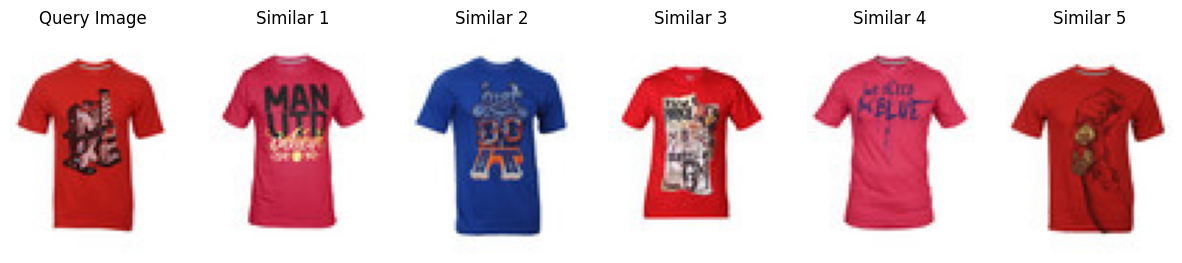

In [9]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity

# Load saved embeddings and filenames
feature_list = pickle.load(open('embeddings.pkl', 'rb'))
filenames = pickle.load(open('filenames.pkl', 'rb'))

def extract_features(img_path, model):
    """Extract features from a given image using the trained model."""
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)
    
    return normalized_result

def recommend_similar_images(query_img_path, model, top_n=5):
    """Given an input image, recommend top 5 visually similar images."""
    
    # Extract features of the input image
    query_features = extract_features(query_img_path, model).reshape(1, -1)
    
    # Compute cosine similarity
    similarities = cosine_similarity(query_features, feature_list)[0]
    
    # Get indices of top 5 most similar images
    top_indices = np.argsort(similarities)[::-1][1:top_n+1]  # Exclude the query image itself
    
    # Display the query image
    fig, axes = plt.subplots(1, top_n+1, figsize=(15, 5))
    
    # Load and display the query image
    query_img = cv2.imread(query_img_path)
    query_img = cv2.cvtColor(query_img, cv2.COLOR_BGR2RGB)
    axes[0].imshow(query_img)
    axes[0].set_title("Query Image")
    axes[0].axis("off")

    # Display recommended images
    for i, idx in enumerate(top_indices):
        similar_img = cv2.imread(filenames[idx])
        similar_img = cv2.cvtColor(similar_img, cv2.COLOR_BGR2RGB)
        axes[i+1].imshow(similar_img)
        axes[i+1].set_title(f"Similar {i+1}")
        axes[i+1].axis("off")

    plt.show()

# Example usage:
recommend_similar_images("/kaggle/input/fashion-product-images-small/images/10009.jpg", model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


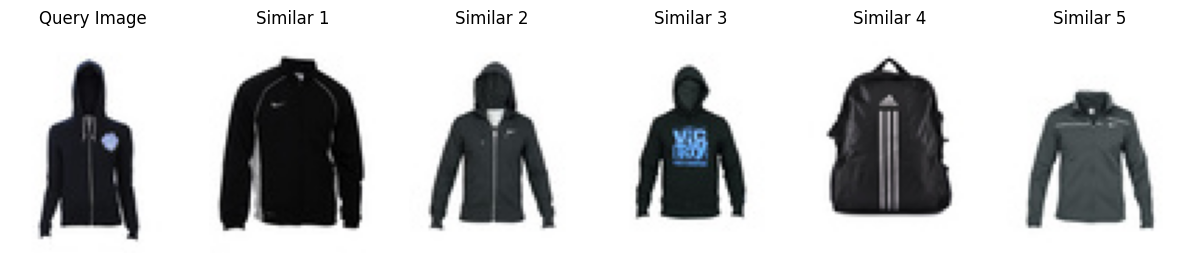

In [10]:

# Example usage:
recommend_similar_images("/kaggle/input/fashion-product-images-small/images/10029.jpg", model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


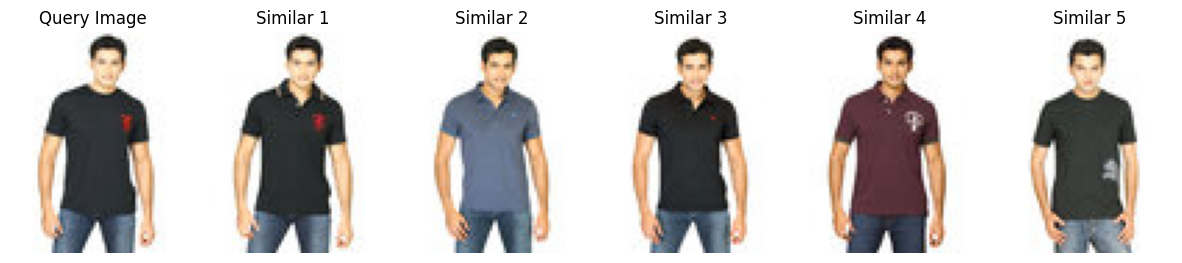

In [11]:

# Example usage:
recommend_similar_images("/kaggle/input/fashion-product-images-small/images/10044.jpg", model)


In [ ]:

# Example usage:
recommend_similar_images("/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/10029.jpg", model)


In [15]:
filenames = [os.path.join(file) for file in os.listdir(images_path)]
pickle.dump(filenames,open('filenames_updated.pkl','wb'))